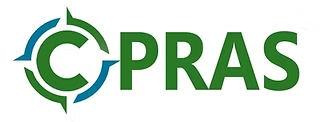

# **End-to-End Pipeline: Extracting, Structuring, and Analyzing Climate Action Plan Data for the SUSIE Project**

## 1. Text Recognition with OCR Tools

In this section, we focus on converting unstructured PDF files of climate action plans into machine-readable text using Optical Character Recognition (OCR) technology. We employ **GOT-OCR 2.0** as our primary tool for text extraction. GOT-OCR demonstrates significant advantages in retaining both the semantic structure and correct reading order of documents, making it particularly effective for pages with complex layouts or infographics. This reliable text recognition process is essential as the first step toward building a high-quality structured dataset for downstream analysis.


### 1.1 Installing GOT-OCR 2.0

Before processing large batches of climate action plan PDFs, we first install the **GOT-OCR 2.0** model. This step ensures the OCR tool is correctly set up in our environment and ready for downstream text extraction tasks.

In [ ]:
!pip install transformers==4.37.2 tiktoken verovio accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 113.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [ ]:
from transformers import AutoTokenizer, AutoModel

model_name = "stepfun-ai/GOT-OCR2_0"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

# Load the model and enable GPU acceleration
model = AutoModel.from_pretrained(
    model_name,
    trust_remote_code=True,
    device_map="cuda",             # Automatically select available GPU
    use_safetensors=True,
    low_cpu_mem_usage=True,
    pad_token_id=tokenizer.eos_token_id
).eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/300 [00:00<?, ?B/s]

tokenization_qwen.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/stepfun-ai/GOT-OCR2_0:
- tokenization_qwen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


qwen.tiktoken: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/149 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/986 [00:00<?, ?B/s]

modeling_GOT.py: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


got_vision_b.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/stepfun-ai/GOT-OCR2_0:
- got_vision_b.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


render_tools.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/stepfun-ai/GOT-OCR2_0:
- render_tools.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/stepfun-ai/GOT-OCR2_0:
- modeling_GOT.py
- got_vision_b.py
- render_tools.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

Installation completed.

### 1.2 Testing Recognition Performance

After installation, we verify the effectiveness of GOT-OCR 2.0 on sample images. We begin with a representative infographic page from a public sector climate action plan. The model demonstrates strong performance, successfully isolating textual content while ignoring most non-text visual noise. Key data, statistics, and structured sentences embedded in the infographic are accurately extracted, confirming the tool's suitability for processing visually complex documents in this project.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pdf2image
!sudo apt install poppler-utils
from pdf2image import convert_from_path
from PIL import Image

pdf_path = "/content/drive/MyDrive/SUSIE_Project_Data/UK universities/Abertay University/abertay-university-sustainability-at-abertay.pdf"
pages = convert_from_path(pdf_path, dpi=200)
image = pages[0].convert("RGB")
image.save("page1.png")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 186 kB in 1s (139 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 126308 

We first tested GOT-OCR 2.0 on a representative infographic page from a public sector climate action plan. The model demonstrated strong performance, successfully isolating textual content while ignoring most non-text visual noise. Key data, statistics, and structured sentences embedded in the infographic were accurately extracted, confirming the tool's suitability for processing visually complex documents in this project.

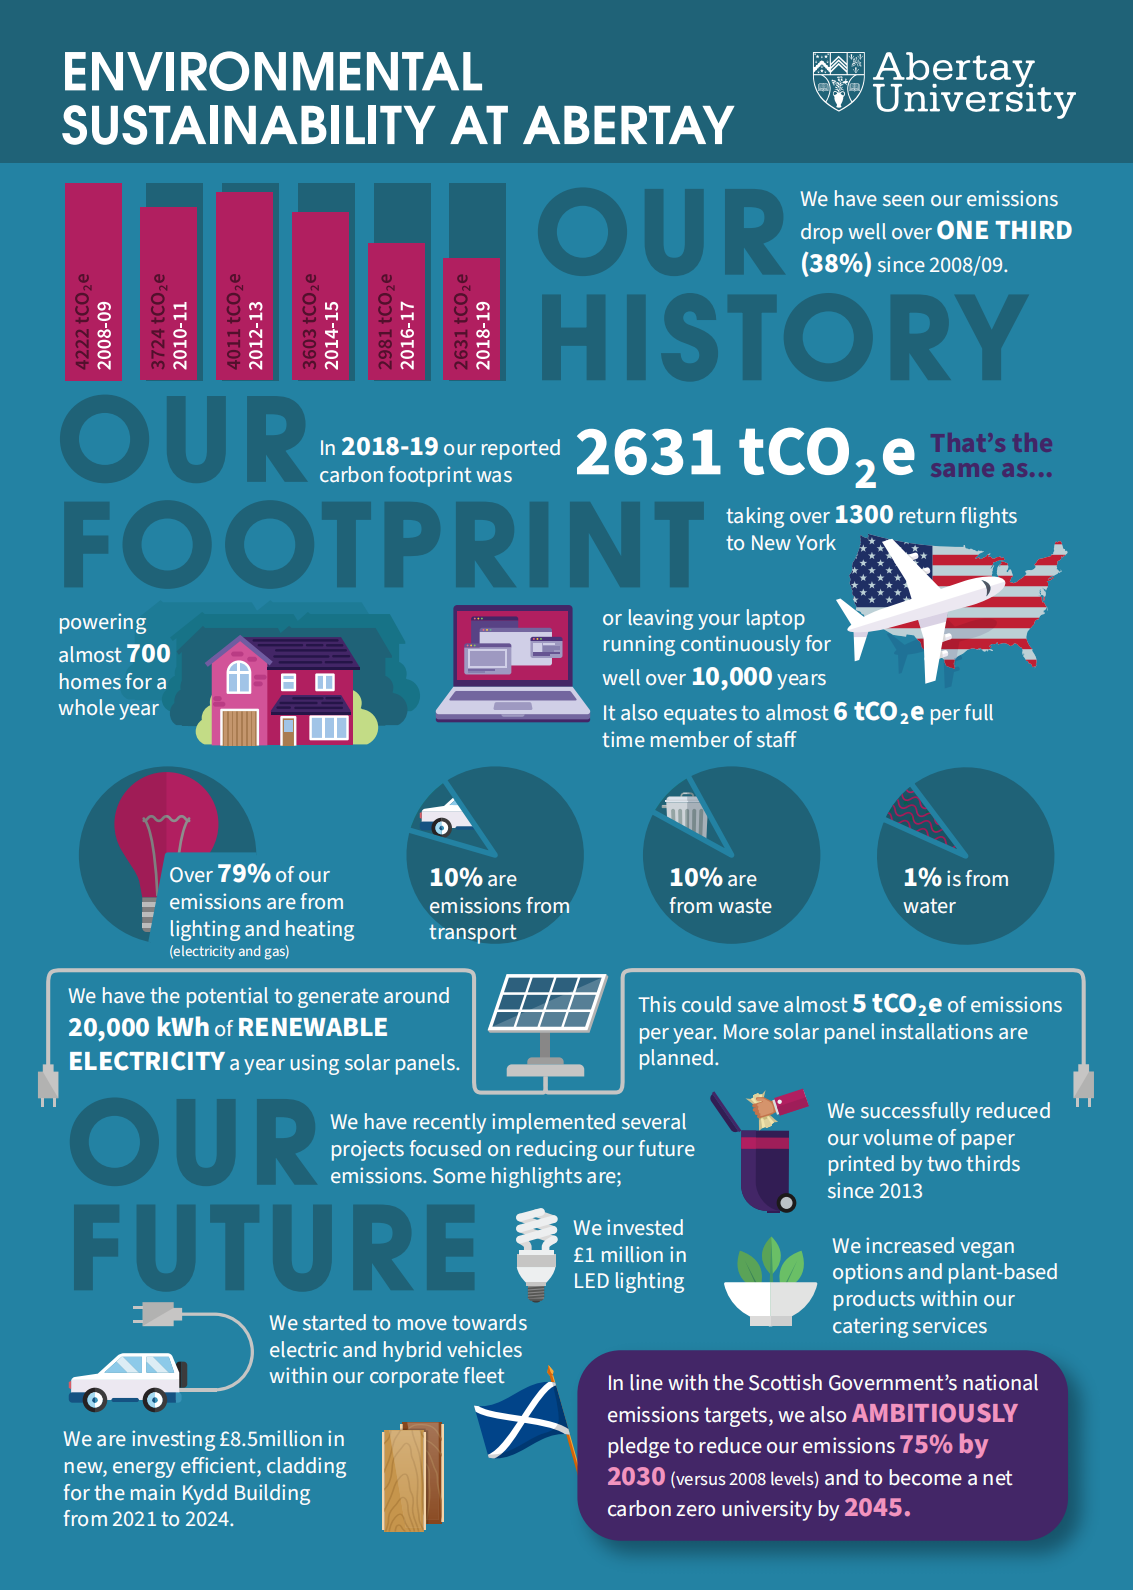

In [ ]:
image_path = "/content/page1.png"

res = model.chat(tokenizer, image_path, ocr_type="format")
print("📄 Recognition result:\n", res)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


📄 Recognition result:
 \title{
ENVIRONMENTAL SUSTAINABILITY AT ABERTAY
}

We have seen our emissions drop well over ONE THIRD (38\%) since 2008/09.

We have the potential to generate around \(20,000 \mathrm{kWh}\) of RENEWABLE ELECTRICITY a year using solar panels.

We started to move towards electric and hybrid vehicles within our corporate fleet
We are investing \(£ 8.5\) million in new, energy efficient, cladding for the main Kydd Building from 2021 to 2024.

We have recently implemented several projects focused on reducing our future emissions. Some highlights are:
We invested \(£ 1\) million in LED lighting
We successfully reduced our volume of paper printed by two thirds since 2013
We increased vegan options and plant-based products within our catering services
In line with the Scottish Government's national emissions targets, we also AMBITIOUSLY pledge to reduce our emissions \(75 \%\) by 2030 (versus 2008 levels) and to become a net carbon zero university by 2045.


We also tested GOT-OCR 2.0 on table extraction tasks. Table recognition, however, proved to be a relative weakness. While the output included LaTeX-like or markdown-style structures, row-column alignment was often imprecise and formatting inconsistencies were observed, especially in more complex tables. As a result, manual correction was required during post-processing to achieve an accurate structured representation.

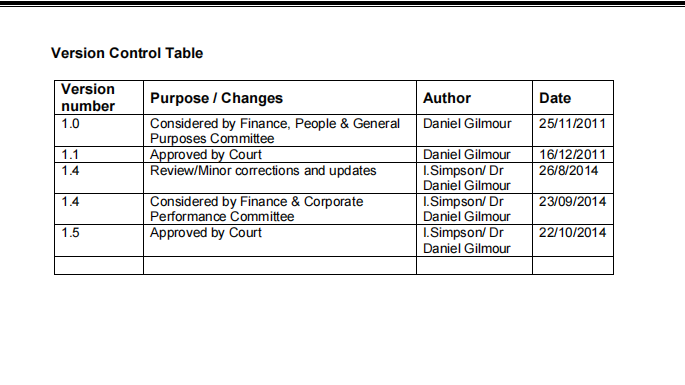

In [ ]:
pdf_path_2 = "/content/drive/MyDrive/SUSIE_Project_Data/UK universities/Abertay University/abertay_sustainability_policy_v1_5.pdf"
pages_2 = convert_from_path(pdf_path_2, dpi=200)
image_2 = pages_2[1].convert("RGB")
image_2.save("page2.png")

In [ ]:
image_path_2 = "/content/page2.png"

res = model.chat(tokenizer, image_path_2, ocr_type="format")
print("📄 Recognition result: \n", res)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


📄 Recognition result: 
 Version Control Table
\begin{tabular}{|l|l|l|l|}
\hline \begin{tabular}{l} 
Version \\
number
\end{tabular} & \multicolumn{1}{|c|}{ Purpose / Changes } & \multicolumn{1}{|c|}{ Author } & Date \\
\hline 1.0 & \begin{tabular}{l} 
Considered by Finance, People \& General \\
Purposes Committee
\end{tabular} & Daniel Gilmour & \(25 / 11 / 2011\) \\
\hline 1.1 & Approved by Court & Daniel Gilmour & \(16 / 12 / 2011\) \\
\hline 1.4 & Review/Minor corrections and updates & \begin{tabular}{l} 
I.Simpson/ Dr \\
Daniel Gilmour
\end{tabular} & \(26 / 8 / 2014\) \\
\hline 1.4 & \begin{tabular}{l} 
Considered by Finance \& Corporate \\
Performance Committee
\end{tabular} & \begin{tabular}{l} 
I.Simpson/ Dr \\
Daniel Glfmour
\end{tabular} & \(23 / 09 / 2014\) \\
\hline 1.5 & Approved by Court & \begin{tabular}{l} 
I.Simpson/ Dr \\
Daniel Gllmour
\end{tabular} & \(22 / 10 / 2014\) \\
\hline
\end{tabular}


For standard paragraph text, GOT-OCR 2.0 demonstrated highly accurate recognition. Paragraph boundaries, heading hierarchies, and list structures were effectively preserved in the output. This high level of fidelity greatly facilitates downstream tasks such as information extraction and structured data generation from policy documents.

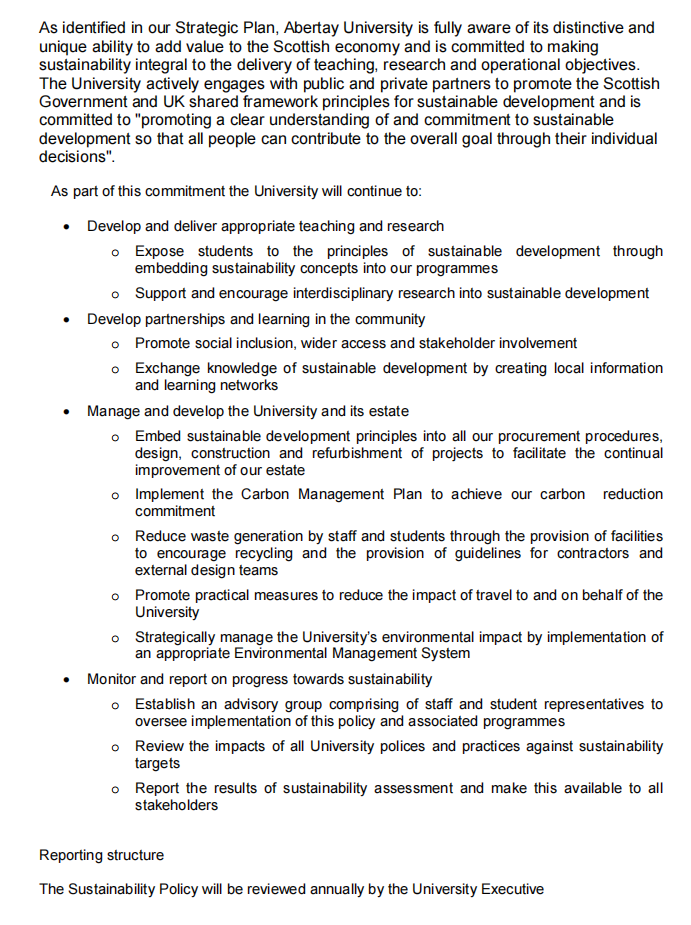

In [ ]:
pdf_path_3 = "/content/drive/MyDrive/SUSIE_Project_Data/UK universities/Abertay University/abertay_sustainability_policy_v1_5.pdf"
pages_3 = convert_from_path(pdf_path_3, dpi=200)
image_3 = pages_2[2].convert("RGB")
image_3.save("page3.png")

image_path_3 = "/content/page3.png"

res = model.chat(tokenizer, image_path_3, ocr_type="format")
print("📄 Recognition result：\n", res)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


📄 Recognition result：
 As identified in our Strategic Plan, Abertay University is fully aware of its distinctive and unique ability to add value to the Scottish economy and is committed to making sustainability integral to the delivery of teaching, research and operational objectives. The University actively engages with public and private partners to promote the Scottish Government and UK shared framework principles for sustainable development and is committed to "promoting a clear understanding of and commitment to sustainable development so that all people can contribute to the overall goal through their individual decisions".
As part of this commitment the University will continue to:
- Develop and deliver appropriate teaching and research
o Expose students to the principles of sustainable development through embedding sustainability concepts into our programmes
o Support and encourage interdisciplinary research into sustainable development
- Develop partnerships and learning in th

Test complete.


### 1.3 Batch Text Recognition from PDF Documents

To process all climate action plan documents efficiently, we first convert each PDF file into a set of page images. Next, we use GOT-OCR 2.0 to perform batch text recognition on these images, saving the extracted textual content as separate `.txt` files for each document. This automated pipeline enables scalable and consistent extraction of information from large volumes of unstructured PDF files, providing a solid foundation for subsequent data cleaning and analysis.

Step 1: Convert PDF files to images and save them by path.

In [ ]:
!pip install PyPDF2
!pip install pdf2image

In [ ]:
import os
from pathlib import Path
from pdf2image import convert_from_path
from PyPDF2 import PdfReader  # Used to get the total number of pages

def convert_all_pdfs_to_images_paged(pdf_root_folder, output_root_folder):
    pdf_root = Path(pdf_root_folder)
    output_root = Path(output_root_folder)

    for pdf_file in pdf_root.rglob("*.pdf"):
        relative_path = pdf_file.relative_to(pdf_root).with_suffix("")
        output_folder = output_root / relative_path
        output_folder.mkdir(parents=True, exist_ok=True)

        print(f"📄 Processing: {pdf_file.name}")
        try:
            # Get total number of pages
            reader = PdfReader(str(pdf_file))
            total_pages = len(reader.pages)

            for i in range(total_pages):
                image_path = output_folder / f"{relative_path.name}_p{i+1}.png"
                if image_path.exists():
                    print(f"✅ Skipped: {image_path.name}")
                    continue

                # Only process the current page
                page_img = convert_from_path(
                    str(pdf_file),
                    dpi=150,
                    first_page=i+1,
                    last_page=i+1
                )[0]

                page_img.save(image_path, "PNG")
                del page_img
                print(f"🖼️ Saved: {image_path.name}")

        except Exception as e:
            print(f"❌ Failed to process {pdf_file.name}: {e}")

In [ ]:
!apt-get install -y poppler-utils

In [ ]:
convert_all_pdfs_to_images_paged(
    pdf_root_folder="/content/drive/MyDrive/SUSIE_Project_Data",
    output_root_folder="/content/drive/MyDrive/output_images"
)

Step 2: Use GOT to batch-recognize images and save the results as TXT files.

In [ ]:
!pip install transformers==4.37.2 tiktoken verovio accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModel

In [ ]:
# Initialize the model
model_name = "stepfun-ai/GOT-OCR2_0"
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModel.from_pretrained(
    model_name,
    trust_remote_code=True,
    device_map="cuda",  # Change to "cpu" if no GPU is available
    use_safetensors=True,
    low_cpu_mem_usage=True,
    pad_token_id=tokenizer.eos_token_id
).eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
# Input and output paths
image_dir = "/content/drive/MyDrive/output_images/"
output_dir = "/content/drive/MyDrive/ocr_results/"
os.makedirs(output_dir, exist_ok=True)

We randomly select 10 images for testing

In [ ]:
# Recursively get all PNG image paths (only the first 10 images are used for testing)
image_files = []
for root, _, files in os.walk(image_dir):
    for file in files:
        if file.lower().endswith(".png"):
            image_files.append(os.path.join(root, file))
image_files = image_files[:10]  # Only test with 10 images

# Batch processing
for image_path in tqdm(image_files, desc="OCR in progress"):
    img_name = os.path.basename(image_path)
    output_path = os.path.join(output_dir, img_name.replace(".png", ".txt"))

    # Resume processing: skip if already processed
    if os.path.exists(output_path):
        print(f"⏩ Skipped (already exists): {img_name}")
        continue

    try:
        res = model.chat(tokenizer, image_path, ocr_type="format")
        with open(output_path, "w", encoding="utf-8") as f:
            f.write(res)
        print(f"✅ Processed: {img_name}")
    except Exception as e:
        print(f"❌ Error processing {img_name}: {e}")

OCR in progress:   0%|          | 0/10 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR in progress:  10%|█         | 1/10 [00:20<03:07, 20.81s/it]

✅ Processed: Climate change and sustainability - Aberdeenshire Council_p4.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR in progress:  20%|██        | 2/10 [00:25<01:31, 11.40s/it]

✅ Processed: Climate change and sustainability - Aberdeenshire Council_p6.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR in progress:  30%|███       | 3/10 [00:41<01:35, 13.59s/it]

✅ Processed: Climate change and sustainability - Aberdeenshire Council_p2.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR in progress:  40%|████      | 4/10 [01:07<01:49, 18.31s/it]

✅ Processed: Climate change and sustainability - Aberdeenshire Council_p3.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR in progress:  50%|█████     | 5/10 [01:19<01:20, 16.18s/it]

✅ Processed: Climate change and sustainability - Aberdeenshire Council_p1.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR in progress:  60%|██████    | 6/10 [01:33<01:01, 15.44s/it]

✅ Processed: Climate change and sustainability - Aberdeenshire Council_p5.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR in progress:  70%|███████   | 7/10 [01:43<00:40, 13.62s/it]

✅ Processed: Climate Ready Aberdeenshire - Aberdeenshire Council_p1.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR in progress:  80%|████████  | 8/10 [01:57<00:27, 13.73s/it]

✅ Processed: Climate Ready Aberdeenshire - Aberdeenshire Council_p4.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR in progress:  90%|█████████ | 9/10 [02:05<00:11, 11.81s/it]

✅ Processed: Climate Ready Aberdeenshire - Aberdeenshire Council_p2.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR in progress: 100%|██████████| 10/10 [02:18<00:00, 13.85s/it]

✅ Processed: Climate Ready Aberdeenshire - Aberdeenshire Council_p3.png


Test complete. Next, we start to perform batch text recognition

In [ ]:
image_dir = "/content/drive/MyDrive/output_images"
output_root = "/content/drive/MyDrive/ocr_results_structured"

In [ ]:
MAX_RETRY = 3
FAILED_LOG = os.path.join(output_root, "failed_log.txt")

# Collect all PNG image paths (recursively)
image_files = []
for root, _, files in os.walk(image_dir):
    for file in files:
        if file.lower().endswith(".png"):
            image_files.append(os.path.join(root, file))

for image_path in tqdm(image_files, desc="OCR with structure + resume"):
    rel_path = os.path.relpath(image_path, image_dir)
    rel_dir = os.path.dirname(rel_path)
    img_name = os.path.basename(image_path)

    # Recommended naming: keep image file name consistent to avoid information loss
    output_name = os.path.splitext(img_name)[0] + ".txt"
    output_folder = os.path.join(output_root, rel_dir)
    output_path = os.path.join(output_folder, output_name)

    os.makedirs(output_folder, exist_ok=True)

    if os.path.exists(output_path):
        print(f"⏭ Skipped: {rel_path}")
        continue

    success = False
    for attempt in range(1, MAX_RETRY + 1):
        try:
            print(f"🕒 [{attempt}/3] Processing: {rel_path}")
            res = model.chat(tokenizer, image_path, ocr_type="format")

            with open(output_path, "w", encoding="utf-8") as f:
                f.write(res)

            print(f"✅ Saved: {rel_path}")
            success = True
            break
        except Exception as e:
            print(f"⚠️ Error on attempt {attempt} for {rel_path}: {e}")
            time.sleep(2)

    if not success:
        print(f"❌ Failed after 3 attempts: {rel_path}")
        with open(FAILED_LOG, "a") as log_file:
            log_file.write(rel_path + "\n")

OCR with structure + resume:   0%|          | 7/37686 [00:01<1:50:57,  5.66it/s] 

⏭ Skipped: Council CS and AP/Aberdeen City/Climate change and sustainability - Aberdeenshire Council/Climate change and sustainability - Aberdeenshire Council_p4.png
⏭ Skipped: Council CS and AP/Aberdeen City/Climate change and sustainability - Aberdeenshire Council/Climate change and sustainability - Aberdeenshire Council_p6.png
⏭ Skipped: Council CS and AP/Aberdeen City/Climate change and sustainability - Aberdeenshire Council/Climate change and sustainability - Aberdeenshire Council_p2.png
⏭ Skipped: Council CS and AP/Aberdeen City/Climate change and sustainability - Aberdeenshire Council/Climate change and sustainability - Aberdeenshire Council_p3.png
⏭ Skipped: Council CS and AP/Aberdeen City/Climate change and sustainability - Aberdeenshire Council/Climate change and sustainability - Aberdeenshire Council_p1.png
⏭ Skipped: Council CS and AP/Aberdeen City/Climate change and sustainability - Aberdeenshire Council/Climate change and sustainability - Aberdeenshire Council_p5.png
⏭ Sk

OCR with structure + resume:   0%|          | 13/37686 [00:01<1:00:05, 10.45it/s]

⏭ Skipped: Council CS and AP/Aberdeen City/_Council Climate Change Plan 2021-25 Towards a Net Zero and Climate Resilient Council.pdf/_Council Climate Change Plan 2021-25 Towards a Net Zero and Climate Resilient Council.pdf_p5.png
⏭ Skipped: Council CS and AP/Aberdeen City/_Council Climate Change Plan 2021-25 Towards a Net Zero and Climate Resilient Council.pdf/_Council Climate Change Plan 2021-25 Towards a Net Zero and Climate Resilient Council.pdf_p4.png
⏭ Skipped: Council CS and AP/Aberdeen City/_Council Climate Change Plan 2021-25 Towards a Net Zero and Climate Resilient Council.pdf/_Council Climate Change Plan 2021-25 Towards a Net Zero and Climate Resilient Council.pdf_p3.png
⏭ Skipped: Council CS and AP/Aberdeen City/_Council Climate Change Plan 2021-25 Towards a Net Zero and Climate Resilient Council.pdf/_Council Climate Change Plan 2021-25 Towards a Net Zero and Climate Resilient Council.pdf_p2.png
⏭ Skipped: Council CS and AP/Aberdeen City/_Council Climate Change Plan 2021-25 

OCR with structure + resume:   0%|          | 44/37686 [00:02<18:02, 34.77it/s]  

⏭ Skipped: Council CS and AP/Aberdeen City/Alternative heat and power sources _ Aberdeen City Council/Alternative heat and power sources _ Aberdeen City Council_p1.png
⏭ Skipped: Council CS and AP/Aberdeen City/Alternative heat and power sources _ Aberdeen City Council/Alternative heat and power sources _ Aberdeen City Council_p2.png
⏭ Skipped: Council CS and AP/Aberdeen City/Alternative heat and power sources _ Aberdeen City Council/Alternative heat and power sources _ Aberdeen City Council_p3.png


OCR with structure + resume:   0%|          | 53/37686 [00:02<22:00, 28.49it/s]

⏭ Skipped: Council CS and AP/Aberdeen City/Aberdeen - A Sustainable, Smart City _ Aberdeen City Council/Aberdeen - A Sustainable, Smart City _ Aberdeen City Council_p2.png
⏭ Skipped: Council CS and AP/Aberdeen City/Aberdeen - A Sustainable, Smart City _ Aberdeen City Council/Aberdeen - A Sustainable, Smart City _ Aberdeen City Council_p1.png
⏭ Skipped: Council CS and AP/Aberdeen City/Aberdeen - A Sustainable, Smart City _ Aberdeen City Council/Aberdeen - A Sustainable, Smart City _ Aberdeen City Council_p4.png
⏭ Skipped: Council CS and AP/Aberdeen City/Aberdeen - A Sustainable, Smart City _ Aberdeen City Council/Aberdeen - A Sustainable, Smart City _ Aberdeen City Council_p3.png
⏭ Skipped: Council CS and AP/Aberdeen City/Aberdeen - A Sustainable, Smart City _ Aberdeen City Council/Aberdeen - A Sustainable, Smart City _ Aberdeen City Council_p5.png
⏭ Skipped: Council CS and AP/Aberdeen City/Aberdeen - A Sustainable, Smart City _ Aberdeen City Council/Aberdeen - A Sustainable, Smart City

OCR with structure + resume:   0%|          | 57/37686 [00:02<21:31, 29.14it/s]

⏭ Skipped: Council CS and AP/Aberdeen City/Council placed in top ten for UK climate action progress _ Aberdeen City Council/Council placed in top ten for UK climate action progress _ Aberdeen City Council_p2.png
⏭ Skipped: Council CS and AP/Aberdeen City/Council placed in top ten for UK climate action progress _ Aberdeen City Council/Council placed in top ten for UK climate action progress _ Aberdeen City Council_p1.png


OCR with structure + resume:   0%|          | 61/37686 [00:03<40:34, 15.46it/s]

⏭ Skipped: Council CS and AP/Aberdeen City/GlasgowDecCertificatefor Website/GlasgowDecCertificatefor Website_p1.png
⏭ Skipped: Council CS and AP/Aberdeen City/Sustainable food _ Aberdeen City Council/Sustainable food _ Aberdeen City Council_p4.png
⏭ Skipped: Council CS and AP/Aberdeen City/Sustainable food _ Aberdeen City Council/Sustainable food _ Aberdeen City Council_p3.png
⏭ Skipped: Council CS and AP/Aberdeen City/Sustainable food _ Aberdeen City Council/Sustainable food _ Aberdeen City Council_p2.png
⏭ Skipped: Council CS and AP/Aberdeen City/Sustainable food _ Aberdeen City Council/Sustainable food _ Aberdeen City Council_p1.png


OCR with structure + resume:   0%|          | 102/37686 [00:03<11:50, 52.89it/s]

⏭ Skipped: Council CS and AP/Aberdeen City/DeliveringCleanerAirForScotland-18012017/DeliveringCleanerAirForScotland-18012017_p1.png
⏭ Skipped: Council CS and AP/Aberdeen City/DeliveringCleanerAirForScotland-18012017/DeliveringCleanerAirForScotland-18012017_p4.png
⏭ Skipped: Council CS and AP/Aberdeen City/DeliveringCleanerAirForScotland-18012017/DeliveringCleanerAirForScotland-18012017_p3.png
⏭ Skipped: Council CS and AP/Aberdeen City/DeliveringCleanerAirForScotland-18012017/DeliveringCleanerAirForScotland-18012017_p2.png
⏭ Skipped: Council CS and AP/Aberdeen City/DeliveringCleanerAirForScotland-18012017/DeliveringCleanerAirForScotland-18012017_p5.png
⏭ Skipped: Council CS and AP/Aberdeen City/DeliveringCleanerAirForScotland-18012017/DeliveringCleanerAirForScotland-18012017_p6.png
⏭ Skipped: Council CS and AP/Aberdeen City/DeliveringCleanerAirForScotland-18012017/DeliveringCleanerAirForScotland-18012017_p7.png
⏭ Skipped: Council CS and AP/Aberdeen City/DeliveringCleanerAirForScotland-1

OCR with structure + resume:   0%|          | 114/37686 [00:04<22:28, 27.86it/s]

⏭ Skipped: Council CS and AP/Aberdeen City/Smoke-free public places _ Aberdeen City Council/Smoke-free public places _ Aberdeen City Council_p1.png
⏭ Skipped: Council CS and AP/Aberdeen City/Smoke-free public places _ Aberdeen City Council/Smoke-free public places _ Aberdeen City Council_p2.png
⏭ Skipped: Council CS and AP/Aberdeen City/Smoke-free public places _ Aberdeen City Council/Smoke-free public places _ Aberdeen City Council_p3.png


OCR with structure + resume:   0%|          | 121/37686 [00:07<1:05:12,  9.60it/s]

⏭ Skipped: Council CS and AP/Aberdeen City/environmental-report-open-space-strategy-feb-2010/environmental-report-open-space-strategy-feb-2010_p5.png
⏭ Skipped: Council CS and AP/Aberdeen City/environmental-report-open-space-strategy-feb-2010/environmental-report-open-space-strategy-feb-2010_p8.png
⏭ Skipped: Council CS and AP/Aberdeen City/environmental-report-open-space-strategy-feb-2010/environmental-report-open-space-strategy-feb-2010_p7.png
⏭ Skipped: Council CS and AP/Aberdeen City/environmental-report-open-space-strategy-feb-2010/environmental-report-open-space-strategy-feb-2010_p4.png
⏭ Skipped: Council CS and AP/Aberdeen City/environmental-report-open-space-strategy-feb-2010/environmental-report-open-space-strategy-feb-2010_p2.png
⏭ Skipped: Council CS and AP/Aberdeen City/environmental-report-open-space-strategy-feb-2010/environmental-report-open-space-strategy-feb-2010_p6.png
⏭ Skipped: Council CS and AP/Aberdeen City/environmental-report-open-space-strategy-feb-2010/environ

OCR with structure + resume:   1%|          | 254/37686 [00:08<12:25, 50.18it/s]  

⏭ Skipped: Council CS and AP/Aberdeen City/H2 Aberdeen _ Aberdeen City Council/H2 Aberdeen _ Aberdeen City Council_p1.png
⏭ Skipped: Council CS and AP/Aberdeen City/H2 Aberdeen _ Aberdeen City Council/H2 Aberdeen _ Aberdeen City Council_p2.png
⏭ Skipped: Council CS and AP/Aberdeen City/H2 Aberdeen _ Aberdeen City Council/H2 Aberdeen _ Aberdeen City Council_p3.png
⏭ Skipped: Council CS and AP/Aberdeenshire Council/Climate Ready Aberdeenshire - Aberdeenshire Council/Climate Ready Aberdeenshire - Aberdeenshire Council_p1.png
⏭ Skipped: Council CS and AP/Aberdeenshire Council/Climate Ready Aberdeenshire - Aberdeenshire Council/Climate Ready Aberdeenshire - Aberdeenshire Council_p2.png
⏭ Skipped: Council CS and AP/Aberdeenshire Council/Climate Ready Aberdeenshire - Aberdeenshire Council/Climate Ready Aberdeenshire - Aberdeenshire Council_p3.png
⏭ Skipped: Council CS and AP/Aberdeenshire Council/Climate Ready Aberdeenshire - Aberdeenshire Council/Climate Ready Aberdeenshire - Aberdeenshire C

OCR with structure + resume:   1%|          | 317/37686 [00:09<10:20, 60.19it/s]

⏭ Skipped: Council CS and AP/Aberdeenshire Council/14 aberdeenshire council route map 2030 and beyond update (1)/14 aberdeenshire council route map 2030 and beyond update (1)_p1.png
⏭ Skipped: Council CS and AP/Aberdeenshire Council/14 aberdeenshire council route map 2030 and beyond update (1)/14 aberdeenshire council route map 2030 and beyond update (1)_p3.png
⏭ Skipped: Council CS and AP/Aberdeenshire Council/14 aberdeenshire council route map 2030 and beyond update (1)/14 aberdeenshire council route map 2030 and beyond update (1)_p2.png
⏭ Skipped: Council CS and AP/Aberdeenshire Council/14 aberdeenshire council route map 2030 and beyond update (1)/14 aberdeenshire council route map 2030 and beyond update (1)_p4.png
⏭ Skipped: Council CS and AP/Aberdeenshire Council/14 aberdeenshire council route map 2030 and beyond update (1)/14 aberdeenshire council route map 2030 and beyond update (1)_p5.png
⏭ Skipped: Council CS and AP/Aberdeenshire Council/14 aberdeenshire council route map 2030

OCR with structure + resume:   1%|          | 378/37686 [00:09<07:18, 85.12it/s]

⏭ Skipped: Council CS and AP/Adur-worthing/Local Cycling & Walking Infrastructure plan - Adur & Worthing Councils/Local Cycling & Walking Infrastructure plan - Adur & Worthing Councils_p2.png
⏭ Skipped: Council CS and AP/Adur-worthing/Local Cycling & Walking Infrastructure plan - Adur & Worthing Councils/Local Cycling & Walking Infrastructure plan - Adur & Worthing Councils_p3.png
⏭ Skipped: Council CS and AP/Adur-worthing/Local Cycling & Walking Infrastructure plan - Adur & Worthing Councils/Local Cycling & Walking Infrastructure plan - Adur & Worthing Councils_p1.png
⏭ Skipped: Council CS and AP/Adur-worthing/Local Cycling & Walking Infrastructure plan - Adur & Worthing Councils/Local Cycling & Walking Infrastructure plan - Adur & Worthing Councils_p4.png
⏭ Skipped: Council CS and AP/Adur-worthing/Local Cycling & Walking Infrastructure plan - Adur & Worthing Councils/Local Cycling & Walking Infrastructure plan - Adur & Worthing Councils_p5.png
⏭ Skipped: Council CS and AP/Adur-worthi

OCR with structure + resume:   1%|          | 416/37686 [00:10<08:38, 71.85it/s]

⏭ Skipped: Council CS and AP/Adur-worthing/Adur & Worthing - Our Plan/Adur & Worthing - Our Plan_p1.png
⏭ Skipped: Council CS and AP/Adur-worthing/Adur & Worthing - Our Plan/Adur & Worthing - Our Plan_p5.png
⏭ Skipped: Council CS and AP/Adur-worthing/Adur & Worthing - Our Plan/Adur & Worthing - Our Plan_p3.png
⏭ Skipped: Council CS and AP/Adur-worthing/Adur & Worthing - Our Plan/Adur & Worthing - Our Plan_p6.png
⏭ Skipped: Council CS and AP/Adur-worthing/Adur & Worthing - Our Plan/Adur & Worthing - Our Plan_p7.png
⏭ Skipped: Council CS and AP/Adur-worthing/Adur & Worthing - Our Plan/Adur & Worthing - Our Plan_p2.png
⏭ Skipped: Council CS and AP/Adur-worthing/Adur & Worthing - Our Plan/Adur & Worthing - Our Plan_p4.png
⏭ Skipped: Council CS and AP/Adur-worthing/Adur & Worthing - Our Plan/Adur & Worthing - Our Plan_p9.png
⏭ Skipped: Council CS and AP/Adur-worthing/Adur & Worthing - Our Plan/Adur & Worthing - Our Plan_p8.png
⏭ Skipped: Council CS and AP/Adur-worthing/Adur & Worthing - Our

OCR with structure + resume:   1%|          | 430/37686 [00:10<08:51, 70.06it/s]

⏭ Skipped: Council CS and AP/Adur-worthing/Green Infrastructure Wildlife Corridors Study December 2009/Green Infrastructure Wildlife Corridors Study December 2009_p1.png
⏭ Skipped: Council CS and AP/Adur-worthing/Green Infrastructure Wildlife Corridors Study December 2009/Green Infrastructure Wildlife Corridors Study December 2009_p2.png
⏭ Skipped: Council CS and AP/Adur-worthing/Green Infrastructure Wildlife Corridors Study December 2009/Green Infrastructure Wildlife Corridors Study December 2009_p4.png
⏭ Skipped: Council CS and AP/Adur-worthing/Green Infrastructure Wildlife Corridors Study December 2009/Green Infrastructure Wildlife Corridors Study December 2009_p3.png
⏭ Skipped: Council CS and AP/Adur-worthing/Green Infrastructure Wildlife Corridors Study December 2009/Green Infrastructure Wildlife Corridors Study December 2009_p5.png
⏭ Skipped: Council CS and AP/Adur-worthing/Green Infrastructure Wildlife Corridors Study December 2009/Green Infrastructure Wildlife Corridors Study D

OCR with structure + resume:   1%|          | 442/37686 [00:10<10:32, 58.85it/s]

⏭ Skipped: Council CS and AP/Armagh City, Banbridge and Craigavon Borough/CORPORATE PLAN 2023-2027/CORPORATE PLAN 2023-2027_p6.png
⏭ Skipped: Council CS and AP/Armagh City, Banbridge and Craigavon Borough/CORPORATE PLAN 2023-2027/CORPORATE PLAN 2023-2027_p1.png
⏭ Skipped: Council CS and AP/Armagh City, Banbridge and Craigavon Borough/CORPORATE PLAN 2023-2027/CORPORATE PLAN 2023-2027_p7.png
⏭ Skipped: Council CS and AP/Armagh City, Banbridge and Craigavon Borough/CORPORATE PLAN 2023-2027/CORPORATE PLAN 2023-2027_p9.png
⏭ Skipped: Council CS and AP/Armagh City, Banbridge and Craigavon Borough/CORPORATE PLAN 2023-2027/CORPORATE PLAN 2023-2027_p8.png
⏭ Skipped: Council CS and AP/Armagh City, Banbridge and Craigavon Borough/CORPORATE PLAN 2023-2027/CORPORATE PLAN 2023-2027_p10.png
⏭ Skipped: Council CS and AP/Armagh City, Banbridge and Craigavon Borough/CORPORATE PLAN 2023-2027/CORPORATE PLAN 2023-2027_p2.png
⏭ Skipped: Council CS and AP/Armagh City, Banbridge and Craigavon Borough/CORPORAT

OCR with structure + resume:   1%|▏         | 490/37686 [00:11<07:31, 82.32it/s]

⏭ Skipped: Council CS and AP/Amber Valley Borough Council/Local Plan Sustainability Interim Report/Local Plan Sustainability Interim Report_p1.png
⏭ Skipped: Council CS and AP/Amber Valley Borough Council/Local Plan Sustainability Interim Report/Local Plan Sustainability Interim Report_p2.png
⏭ Skipped: Council CS and AP/Amber Valley Borough Council/Local Plan Sustainability Interim Report/Local Plan Sustainability Interim Report_p3.png
⏭ Skipped: Council CS and AP/Amber Valley Borough Council/Local Plan Sustainability Interim Report/Local Plan Sustainability Interim Report_p4.png
⏭ Skipped: Council CS and AP/Amber Valley Borough Council/Local Plan Sustainability Interim Report/Local Plan Sustainability Interim Report_p5.png
⏭ Skipped: Council CS and AP/Amber Valley Borough Council/Local Plan Sustainability Interim Report/Local Plan Sustainability Interim Report_p6.png
⏭ Skipped: Council CS and AP/Amber Valley Borough Council/Local Plan Sustainability Interim Report/Local Plan Sustaina

OCR with structure + resume:   1%|▏         | 545/37686 [00:11<06:01, 102.84it/s]

⏭ Skipped: Council CS and AP/Allerdale Borough Council/climate-change-action-plan_update-april2022_final/climate-change-action-plan_update-april2022_final_p2.png
⏭ Skipped: Council CS and AP/Allerdale Borough Council/climate-change-action-plan_update-april2022_final/climate-change-action-plan_update-april2022_final_p3.png
⏭ Skipped: Council CS and AP/Allerdale Borough Council/climate-change-action-plan_update-april2022_final/climate-change-action-plan_update-april2022_final_p1.png
⏭ Skipped: Council CS and AP/Allerdale Borough Council/climate-change-action-plan_update-april2022_final/climate-change-action-plan_update-april2022_final_p4.png
⏭ Skipped: Council CS and AP/Allerdale Borough Council/climate-change-action-plan_update-april2022_final/climate-change-action-plan_update-april2022_final_p5.png
⏭ Skipped: Council CS and AP/Allerdale Borough Council/climate-change-action-plan_update-april2022_final/climate-change-action-plan_update-april2022_final_p7.png
⏭ Skipped: Council CS and AP

OCR with structure + resume:   2%|▏         | 583/37686 [00:12<08:27, 73.10it/s] 

⏭ Skipped: Council CS and AP/Angus Council/Local Heat Strategy_Delivery Plan_App3/Local Heat Strategy_Delivery Plan_App3_p1.png
⏭ Skipped: Council CS and AP/Angus Council/Local Heat Strategy_Delivery Plan_App3/Local Heat Strategy_Delivery Plan_App3_p3.png
⏭ Skipped: Council CS and AP/Angus Council/Local Heat Strategy_Delivery Plan_App3/Local Heat Strategy_Delivery Plan_App3_p2.png
⏭ Skipped: Council CS and AP/Angus Council/Local Heat Strategy_Delivery Plan_App3/Local Heat Strategy_Delivery Plan_App3_p5.png
⏭ Skipped: Council CS and AP/Angus Council/Local Heat Strategy_Delivery Plan_App3/Local Heat Strategy_Delivery Plan_App3_p4.png
⏭ Skipped: Council CS and AP/Angus Council/Local Heat Strategy_Delivery Plan_App3/Local Heat Strategy_Delivery Plan_App3_p6.png
⏭ Skipped: Council CS and AP/Angus Council/Local Heat Strategy_Delivery Plan_App3/Local Heat Strategy_Delivery Plan_App3_p7.png
⏭ Skipped: Council CS and AP/Angus Council/Local Heat Strategy_Delivery Plan_App3/Local Heat Strategy_De

OCR with structure + resume:   2%|▏         | 765/37686 [00:12<03:49, 161.21it/s]

⏭ Skipped: Council CS and AP/Antrim and Newtownabbey Borough Council/Climate Change Action Plan 2024-30/Climate Change Action Plan 2024-30_p3.png
⏭ Skipped: Council CS and AP/Antrim and Newtownabbey Borough Council/Climate Change Action Plan 2024-30/Climate Change Action Plan 2024-30_p1.png
⏭ Skipped: Council CS and AP/Antrim and Newtownabbey Borough Council/Climate Change Action Plan 2024-30/Climate Change Action Plan 2024-30_p2.png
⏭ Skipped: Council CS and AP/Antrim and Newtownabbey Borough Council/Climate Change Action Plan 2024-30/Climate Change Action Plan 2024-30_p7.png
⏭ Skipped: Council CS and AP/Antrim and Newtownabbey Borough Council/Climate Change Action Plan 2024-30/Climate Change Action Plan 2024-30_p8.png
⏭ Skipped: Council CS and AP/Antrim and Newtownabbey Borough Council/Climate Change Action Plan 2024-30/Climate Change Action Plan 2024-30_p6.png
⏭ Skipped: Council CS and AP/Antrim and Newtownabbey Borough Council/Climate Change Action Plan 2024-30/Climate Change Actio

OCR with structure + resume:   2%|▏         | 817/37686 [00:13<04:42, 130.46it/s]

⏭ Skipped: Council CS and AP/Argyll and Bute Council/COUNCIL CARBON EMISSIONS 20222023/COUNCIL CARBON EMISSIONS 20222023_p3.png
⏭ Skipped: Council CS and AP/Argyll and Bute Council/COUNCIL CARBON EMISSIONS 20222023/COUNCIL CARBON EMISSIONS 20222023_p1.png
⏭ Skipped: Council CS and AP/Argyll and Bute Council/COUNCIL CARBON EMISSIONS 20222023/COUNCIL CARBON EMISSIONS 20222023_p2.png
⏭ Skipped: Council CS and AP/Argyll and Bute Council/COUNCIL CARBON EMISSIONS 20222023/COUNCIL CARBON EMISSIONS 20222023_p4.png
⏭ Skipped: Council CS and AP/Argyll and Bute Council/COUNCIL CARBON EMISSIONS 20222023/COUNCIL CARBON EMISSIONS 20222023_p5.png
⏭ Skipped: Council CS and AP/Argyll and Bute Council/COUNCIL CARBON EMISSIONS 20222023/COUNCIL CARBON EMISSIONS 20222023_p6.png
⏭ Skipped: Council CS and AP/Argyll and Bute Council/COUNCIL CARBON EMISSIONS 20222023/COUNCIL CARBON EMISSIONS 20222023_p7.png
⏭ Skipped: Council CS and AP/Argyll and Bute Council/COUNCIL CARBON EMISSIONS 20222023/COUNCIL CARBON EM

OCR with structure + resume:   2%|▏         | 850/37686 [00:13<04:56, 124.08it/s]

⏭ Skipped: Council CS and AP/Argyll and Bute Council/decarbonisation_plan_2022_v0.8_/decarbonisation_plan_2022_v0.8__p1.png
⏭ Skipped: Council CS and AP/Argyll and Bute Council/decarbonisation_plan_2022_v0.8_/decarbonisation_plan_2022_v0.8__p2.png
⏭ Skipped: Council CS and AP/Argyll and Bute Council/decarbonisation_plan_2022_v0.8_/decarbonisation_plan_2022_v0.8__p3.png
⏭ Skipped: Council CS and AP/Argyll and Bute Council/decarbonisation_plan_2022_v0.8_/decarbonisation_plan_2022_v0.8__p4.png
⏭ Skipped: Council CS and AP/Argyll and Bute Council/decarbonisation_plan_2022_v0.8_/decarbonisation_plan_2022_v0.8__p5.png
⏭ Skipped: Council CS and AP/Argyll and Bute Council/decarbonisation_plan_2022_v0.8_/decarbonisation_plan_2022_v0.8__p7.png
⏭ Skipped: Council CS and AP/Argyll and Bute Council/decarbonisation_plan_2022_v0.8_/decarbonisation_plan_2022_v0.8__p6.png
⏭ Skipped: Council CS and AP/Argyll and Bute Council/decarbonisation_plan_2022_v0.8_/decarbonisation_plan_2022_v0.8__p8.png
⏭ Skippe

OCR with structure + resume:   2%|▏         | 902/37686 [00:14<04:38, 132.04it/s]

⏭ Skipped: Council CS and AP/Ards and North Down Borough Council/Corporate Plan 2024-28 - Ards and North Down Borough Council/Corporate Plan 2024-28 - Ards and North Down Borough Council_p1.png
⏭ Skipped: Council CS and AP/Ards and North Down Borough Council/Corporate Plan 2024-28 - Ards and North Down Borough Council/Corporate Plan 2024-28 - Ards and North Down Borough Council_p2.png
⏭ Skipped: Council CS and AP/Ards and North Down Borough Council/Corporate Plan 2024-28 - Ards and North Down Borough Council/Corporate Plan 2024-28 - Ards and North Down Borough Council_p3.png
⏭ Skipped: Council CS and AP/Ards and North Down Borough Council/Corporate Plan 2024-28 - Ards and North Down Borough Council/Corporate Plan 2024-28 - Ards and North Down Borough Council_p4.png
⏭ Skipped: Council CS and AP/Ards and North Down Borough Council/Corporate Plan 2024-28 - Ards and North Down Borough Council/Corporate Plan 2024-28 - Ards and North Down Borough Council_p5.png
⏭ Skipped: Council CS and AP/A

OCR with structure + resume:   3%|▎         | 1152/37686 [00:18<06:30, 93.61it/s]

⏭ Skipped: Council CS and AP/Basildon Council/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018_p1.png
⏭ Skipped: Council CS and AP/Basildon Council/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018_p2.png
⏭ Skipped: Council CS and AP/Basildon Council/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018_p3.png
⏭ Skipped: Council CS and AP/Basildon Council/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018_p4.png
⏭ Skipped: Council CS and AP/Basildon Council/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018_p5.png
⏭ Ski

OCR with structure + resume:   4%|▍         | 1603/37686 [00:18<02:07, 282.56it/s]

⏭ Skipped: Council CS and AP/Basildon Council/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018_p461.png
⏭ Skipped: Council CS and AP/Basildon Council/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018_p462.png
⏭ Skipped: Council CS and AP/Basildon Council/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018_p463.png
⏭ Skipped: Council CS and AP/Basildon Council/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018_p464.png
⏭ Skipped: Council CS and AP/Basildon Council/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018/SUB007_Basildon_Council_-_Sustainability_Appraisal_Appendices_-_Oct_2018_p465

OCR with structure + resume:   5%|▍         | 1756/37686 [00:18<01:54, 313.13it/s]

⏭ Skipped: Council CS and AP/Bassetlaw District Council/Bassetlaw Climate Change Strategy/Bassetlaw Climate Change Strategy_p1.png
⏭ Skipped: Council CS and AP/Bassetlaw District Council/Bassetlaw Climate Change Strategy/Bassetlaw Climate Change Strategy_p2.png
⏭ Skipped: Council CS and AP/Bassetlaw District Council/Bassetlaw Climate Change Strategy/Bassetlaw Climate Change Strategy_p3.png
⏭ Skipped: Council CS and AP/Bassetlaw District Council/Bassetlaw Climate Change Strategy/Bassetlaw Climate Change Strategy_p4.png
⏭ Skipped: Council CS and AP/Bassetlaw District Council/Bassetlaw Climate Change Strategy/Bassetlaw Climate Change Strategy_p5.png
⏭ Skipped: Council CS and AP/Bassetlaw District Council/Bassetlaw Climate Change Strategy/Bassetlaw Climate Change Strategy_p6.png
⏭ Skipped: Council CS and AP/Bassetlaw District Council/Bassetlaw Climate Change Strategy/Bassetlaw Climate Change Strategy_p7.png
⏭ Skipped: Council CS and AP/Bassetlaw District Council/Bassetlaw Climate Change St

OCR with structure + resume:   5%|▍         | 1876/37686 [00:19<02:03, 289.12it/s]

⏭ Skipped: Council CS and AP/Bassetlaw District Council/bassetlaw-sustainability-appraisal-report/bassetlaw-sustainability-appraisal-report_p1.png
⏭ Skipped: Council CS and AP/Bassetlaw District Council/bassetlaw-sustainability-appraisal-report/bassetlaw-sustainability-appraisal-report_p2.png
⏭ Skipped: Council CS and AP/Bassetlaw District Council/bassetlaw-sustainability-appraisal-report/bassetlaw-sustainability-appraisal-report_p3.png
⏭ Skipped: Council CS and AP/Bassetlaw District Council/bassetlaw-sustainability-appraisal-report/bassetlaw-sustainability-appraisal-report_p4.png
⏭ Skipped: Council CS and AP/Bassetlaw District Council/bassetlaw-sustainability-appraisal-report/bassetlaw-sustainability-appraisal-report_p5.png
⏭ Skipped: Council CS and AP/Bassetlaw District Council/bassetlaw-sustainability-appraisal-report/bassetlaw-sustainability-appraisal-report_p6.png
⏭ Skipped: Council CS and AP/Bassetlaw District Council/bassetlaw-sustainability-appraisal-report/bassetlaw-sustainabi

OCR with structure + resume:   6%|▌         | 2197/37686 [00:20<01:52, 315.01it/s]

⏭ Skipped: Council CS and AP/Barnet London Borough/Our sustainability journey so far _ Barnet Council/Our sustainability journey so far _ Barnet Council_p1.png
⏭ Skipped: Council CS and AP/Barnet London Borough/Our sustainability journey so far _ Barnet Council/Our sustainability journey so far _ Barnet Council_p2.png
⏭ Skipped: Council CS and AP/Barnet London Borough/Our sustainability journey so far _ Barnet Council/Our sustainability journey so far _ Barnet Council_p3.png
⏭ Skipped: Council CS and AP/Barnet London Borough/Ultra Low Emission Zone (ULEZ) expansion _ Barnet Council/Ultra Low Emission Zone (ULEZ) expansion _ Barnet Council_p1.png
⏭ Skipped: Council CS and AP/Barnet London Borough/Ultra Low Emission Zone (ULEZ) expansion _ Barnet Council/Ultra Low Emission Zone (ULEZ) expansion _ Barnet Council_p2.png
⏭ Skipped: Council CS and AP/Barnet London Borough/Ultra Low Emission Zone (ULEZ) expansion _ Barnet Council/Ultra Low Emission Zone (ULEZ) expansion _ Barnet Council_p3.pn

OCR with structure + resume:   6%|▌         | 2313/37686 [00:21<02:16, 259.82it/s]

⏭ Skipped: Council CS and AP/Babergh District Council/Air Quality 2015 Annual Status Report- Babergh District Council/Air Quality 2015 Annual Status Report- Babergh District Council_p1.png
⏭ Skipped: Council CS and AP/Babergh District Council/Air Quality 2015 Annual Status Report- Babergh District Council/Air Quality 2015 Annual Status Report- Babergh District Council_p2.png
⏭ Skipped: Council CS and AP/Babergh District Council/Air Quality 2015 Annual Status Report- Babergh District Council/Air Quality 2015 Annual Status Report- Babergh District Council_p3.png
⏭ Skipped: Council CS and AP/Babergh District Council/Air Quality 2015 Annual Status Report- Babergh District Council/Air Quality 2015 Annual Status Report- Babergh District Council_p4.png
⏭ Skipped: Council CS and AP/Babergh District Council/Air Quality 2015 Annual Status Report- Babergh District Council/Air Quality 2015 Annual Status Report- Babergh District Council_p5.png
⏭ Skipped: Council CS and AP/Babergh District Council/A

OCR with structure + resume:   7%|▋         | 2628/37686 [00:24<03:05, 188.55it/s]

⏭ Skipped: Council CS and AP/Babergh District Council/Air Quality 2019 Annual Status Report- Babergh District Council/Air Quality 2019 Annual Status Report- Babergh District Council_p1.png
⏭ Skipped: Council CS and AP/Babergh District Council/Air Quality 2019 Annual Status Report- Babergh District Council/Air Quality 2019 Annual Status Report- Babergh District Council_p2.png
⏭ Skipped: Council CS and AP/Babergh District Council/Air Quality 2019 Annual Status Report- Babergh District Council/Air Quality 2019 Annual Status Report- Babergh District Council_p3.png
⏭ Skipped: Council CS and AP/Babergh District Council/Air Quality 2019 Annual Status Report- Babergh District Council/Air Quality 2019 Annual Status Report- Babergh District Council_p4.png
⏭ Skipped: Council CS and AP/Babergh District Council/Air Quality 2019 Annual Status Report- Babergh District Council/Air Quality 2019 Annual Status Report- Babergh District Council_p5.png
⏭ Skipped: Council CS and AP/Babergh District Council/A

OCR with structure + resume:   7%|▋         | 2740/37686 [00:26<05:34, 104.42it/s]

⏭ Skipped: Council CS and AP/Ashfield District Council/Carbon management plan - Ashfield District Council/Carbon management plan - Ashfield District Council_p1.png
⏭ Skipped: Council CS and AP/Ashfield District Council/Carbon management plan - Ashfield District Council/Carbon management plan - Ashfield District Council_p2.png
⏭ Skipped: Council CS and AP/Ashfield District Council/Carbon management plan - Ashfield District Council/Carbon management plan - Ashfield District Council_p3.png
⏭ Skipped: Council CS and AP/Ashfield District Council/Carbon management plan - Ashfield District Council/Carbon management plan - Ashfield District Council_p4.png
⏭ Skipped: Council CS and AP/Ashfield District Council/Carbon management plan - Ashfield District Council/Carbon management plan - Ashfield District Council_p5.png
⏭ Skipped: Council CS and AP/Ashfield District Council/Climate change - learn what how we're tackling - Ashfield District Council/Climate change - learn what how we're tackling - A

OCR with structure + resume:   7%|▋         | 2820/37686 [00:27<05:05, 114.07it/s]

⏭ Skipped: Council CS and AP/Arun District Council/Climate action biodiversity work plan _ Arun District Council/Climate action biodiversity work plan _ Arun District Council_p1.png
⏭ Skipped: Council CS and AP/Arun District Council/Climate action biodiversity work plan _ Arun District Council/Climate action biodiversity work plan _ Arun District Council_p2.png
⏭ Skipped: Council CS and AP/Arun District Council/Climate action biodiversity work plan _ Arun District Council/Climate action biodiversity work plan _ Arun District Council_p3.png
⏭ Skipped: Council CS and AP/Arun District Council/Climate action biodiversity work plan _ Arun District Council/Climate action biodiversity work plan _ Arun District Council_p4.png
⏭ Skipped: Council CS and AP/Arun District Council/Climate action biodiversity work plan _ Arun District Council/Climate action biodiversity work plan _ Arun District Council_p5.png
⏭ Skipped: Council CS and AP/Arun District Council/Climate action biodiversity work plan _

OCR with structure + resume:   8%|▊         | 2926/37686 [00:28<05:46, 100.46it/s]

⏭ Skipped: Council CS and AP/Barnsley Metropolitan Borough Council/3-zero-carbon-town-centre-accessible/3-zero-carbon-town-centre-accessible_p1.png
⏭ Skipped: Council CS and AP/Barnsley Metropolitan Borough Council/3-zero-carbon-town-centre-accessible/3-zero-carbon-town-centre-accessible_p2.png
⏭ Skipped: Council CS and AP/Barnsley Metropolitan Borough Council/3-zero-carbon-town-centre-accessible/3-zero-carbon-town-centre-accessible_p3.png
⏭ Skipped: Council CS and AP/Barnsley Metropolitan Borough Council/3-zero-carbon-town-centre-accessible/3-zero-carbon-town-centre-accessible_p4.png
⏭ Skipped: Council CS and AP/Barnsley Metropolitan Borough Council/3-zero-carbon-town-centre-accessible/3-zero-carbon-town-centre-accessible_p5.png
⏭ Skipped: Council CS and AP/Barnsley Metropolitan Borough Council/3-zero-carbon-town-centre-accessible/3-zero-carbon-town-centre-accessible_p6.png
⏭ Skipped: Council CS and AP/Barnsley Metropolitan Borough Council/3-zero-carbon-town-centre-accessible/3-zero-c

OCR with structure + resume:   8%|▊         | 2966/37686 [00:29<06:28, 89.25it/s] 

⏭ Skipped: Council CS and AP/Basingstoke and Deane Borough Council/Basingstoke - Climate Emergency Action Plan 2023 to 2024/Basingstoke - Climate Emergency Action Plan 2023 to 2024_p1.png
⏭ Skipped: Council CS and AP/Basingstoke and Deane Borough Council/Basingstoke - Climate Emergency Action Plan 2023 to 2024/Basingstoke - Climate Emergency Action Plan 2023 to 2024_p2.png
⏭ Skipped: Council CS and AP/Basingstoke and Deane Borough Council/Basingstoke - Climate Emergency Action Plan 2023 to 2024/Basingstoke - Climate Emergency Action Plan 2023 to 2024_p3.png
⏭ Skipped: Council CS and AP/Basingstoke and Deane Borough Council/Basingstoke - Climate Emergency Action Plan 2023 to 2024/Basingstoke - Climate Emergency Action Plan 2023 to 2024_p4.png
⏭ Skipped: Council CS and AP/Basingstoke and Deane Borough Council/Basingstoke - Climate Emergency Action Plan 2023 to 2024/Basingstoke - Climate Emergency Action Plan 2023 to 2024_p5.png
⏭ Skipped: Council CS and AP/Basingstoke and Deane Borough C

OCR with structure + resume:   8%|▊         | 2996/37686 [00:29<06:06, 94.75it/s]

⏭ Skipped: Council CS and AP/Basingstoke and Deane Borough Council/Answers to questions about solar panels and solar farms/Answers to questions about solar panels and solar farms_p1.png
⏭ Skipped: Council CS and AP/Basingstoke and Deane Borough Council/Answers to questions about solar panels and solar farms/Answers to questions about solar panels and solar farms_p2.png
⏭ Skipped: Council CS and AP/Basingstoke and Deane Borough Council/Answers to questions about solar panels and solar farms/Answers to questions about solar panels and solar farms_p3.png
⏭ Skipped: Council CS and AP/Basingstoke and Deane Borough Council/Answers to questions about solar panels and solar farms/Answers to questions about solar panels and solar farms_p4.png
⏭ Skipped: Council CS and AP/Basingstoke and Deane Borough Council/Answers to questions about solar panels and solar farms/Answers to questions about solar panels and solar farms_p5.png
⏭ Skipped: Council CS and AP/Basingstoke and Deane Borough Council/Ans

OCR with structure + resume:   8%|▊         | 3021/37686 [00:31<12:30, 46.17it/s]

⏭ Skipped: Council CS and AP/Ashford District Council/Ashford-Borough-Council-SFRA-2014/Ashford-Borough-Council-SFRA-2014_p1.png
⏭ Skipped: Council CS and AP/Ashford District Council/Ashford-Borough-Council-SFRA-2014/Ashford-Borough-Council-SFRA-2014_p2.png
⏭ Skipped: Council CS and AP/Ashford District Council/Ashford-Borough-Council-SFRA-2014/Ashford-Borough-Council-SFRA-2014_p3.png
⏭ Skipped: Council CS and AP/Ashford District Council/Ashford-Borough-Council-SFRA-2014/Ashford-Borough-Council-SFRA-2014_p4.png
⏭ Skipped: Council CS and AP/Ashford District Council/Ashford-Borough-Council-SFRA-2014/Ashford-Borough-Council-SFRA-2014_p5.png
⏭ Skipped: Council CS and AP/Ashford District Council/Ashford-Borough-Council-SFRA-2014/Ashford-Borough-Council-SFRA-2014_p6.png
⏭ Skipped: Council CS and AP/Ashford District Council/Ashford-Borough-Council-SFRA-2014/Ashford-Borough-Council-SFRA-2014_p7.png
⏭ Skipped: Council CS and AP/Ashford District Council/Ashford-Borough-Council-SFRA-2014/Ashford-B

OCR with structure + resume:   8%|▊         | 3118/37686 [00:32<09:08, 63.00it/s]

⏭ Skipped: Council CS and AP/Ashford District Council/ashford-sustainability-assessment/ashford-sustainability-assessment_p1.png
⏭ Skipped: Council CS and AP/Ashford District Council/ashford-sustainability-assessment/ashford-sustainability-assessment_p2.png
⏭ Skipped: Council CS and AP/Ashford District Council/ashford-sustainability-assessment/ashford-sustainability-assessment_p3.png
⏭ Skipped: Council CS and AP/Ashford District Council/ashford-sustainability-assessment/ashford-sustainability-assessment_p4.png
⏭ Skipped: Council CS and AP/Ashford District Council/ashford-sustainability-assessment/ashford-sustainability-assessment_p5.png
⏭ Skipped: Council CS and AP/Ashford District Council/ashford-sustainability-assessment/ashford-sustainability-assessment_p6.png
⏭ Skipped: Council CS and AP/Ashford District Council/ashford-sustainability-assessment/ashford-sustainability-assessment_p7.png
⏭ Skipped: Council CS and AP/Ashford District Council/ashford-sustainability-assessment/ashford-s

OCR with structure + resume:   8%|▊         | 3135/37686 [00:32<08:50, 65.07it/s]

⏭ Skipped: Council CS and AP/Babergh District Council and Mid Suffolk District/Babergh-Joint-Local-Plan-Sustainability-Appraisal-Aug-17/Babergh-Joint-Local-Plan-Sustainability-Appraisal-Aug-17_p1.png
⏭ Skipped: Council CS and AP/Babergh District Council and Mid Suffolk District/Babergh-Joint-Local-Plan-Sustainability-Appraisal-Aug-17/Babergh-Joint-Local-Plan-Sustainability-Appraisal-Aug-17_p2.png
⏭ Skipped: Council CS and AP/Babergh District Council and Mid Suffolk District/Babergh-Joint-Local-Plan-Sustainability-Appraisal-Aug-17/Babergh-Joint-Local-Plan-Sustainability-Appraisal-Aug-17_p3.png
⏭ Skipped: Council CS and AP/Babergh District Council and Mid Suffolk District/Babergh-Joint-Local-Plan-Sustainability-Appraisal-Aug-17/Babergh-Joint-Local-Plan-Sustainability-Appraisal-Aug-17_p4.png
⏭ Skipped: Council CS and AP/Babergh District Council and Mid Suffolk District/Babergh-Joint-Local-Plan-Sustainability-Appraisal-Aug-17/Babergh-Joint-Local-Plan-Sustainability-Appraisal-Aug-17_p5.png


OCR with structure + resume:   8%|▊         | 3159/37686 [00:33<08:35, 67.01it/s]

⏭ Skipped: Council CS and AP/Blackburn with Darwen Borough Council/Climate-Emergency-Action-Plan-July-2023-1/Climate-Emergency-Action-Plan-July-2023-1_p1.png
⏭ Skipped: Council CS and AP/Blackburn with Darwen Borough Council/Climate-Emergency-Action-Plan-July-2023-1/Climate-Emergency-Action-Plan-July-2023-1_p2.png
⏭ Skipped: Council CS and AP/Blackburn with Darwen Borough Council/Climate-Emergency-Action-Plan-July-2023-1/Climate-Emergency-Action-Plan-July-2023-1_p3.png
⏭ Skipped: Council CS and AP/Blackburn with Darwen Borough Council/Climate-Emergency-Action-Plan-July-2023-1/Climate-Emergency-Action-Plan-July-2023-1_p4.png
⏭ Skipped: Council CS and AP/Blackburn with Darwen Borough Council/Climate-Emergency-Action-Plan-July-2023-1/Climate-Emergency-Action-Plan-July-2023-1_p5.png
⏭ Skipped: Council CS and AP/Blackburn with Darwen Borough Council/Climate-Emergency-Action-Plan-July-2023-1/Climate-Emergency-Action-Plan-July-2023-1_p6.png
⏭ Skipped: Council CS and AP/Blackburn with Darwen B

OCR with structure + resume:   8%|▊         | 3197/37686 [00:33<07:02, 81.62it/s]

⏭ Skipped: Council CS and AP/Blackburn with Darwen Borough Council/SD4b-Sustainability-Appraisal-Report-Non-Technical-Summary-January-2022/SD4b-Sustainability-Appraisal-Report-Non-Technical-Summary-January-2022_p1.png
⏭ Skipped: Council CS and AP/Blackburn with Darwen Borough Council/SD4b-Sustainability-Appraisal-Report-Non-Technical-Summary-January-2022/SD4b-Sustainability-Appraisal-Report-Non-Technical-Summary-January-2022_p2.png
⏭ Skipped: Council CS and AP/Blackburn with Darwen Borough Council/SD4b-Sustainability-Appraisal-Report-Non-Technical-Summary-January-2022/SD4b-Sustainability-Appraisal-Report-Non-Technical-Summary-January-2022_p3.png
⏭ Skipped: Council CS and AP/Blackburn with Darwen Borough Council/SD4b-Sustainability-Appraisal-Report-Non-Technical-Summary-January-2022/SD4b-Sustainability-Appraisal-Report-Non-Technical-Summary-January-2022_p4.png
⏭ Skipped: Council CS and AP/Blackburn with Darwen Borough Council/SD4b-Sustainability-Appraisal-Report-Non-Technical-Summary-Ja

OCR with structure + resume:   9%|▊         | 3263/37686 [00:34<05:50, 98.24it/s]

⏭ Skipped: Council CS and AP/Bolton Council/Bolton_Climate_Change_Strategy_FINAL/Bolton_Climate_Change_Strategy_FINAL_p1.png
⏭ Skipped: Council CS and AP/Bolton Council/Bolton_Climate_Change_Strategy_FINAL/Bolton_Climate_Change_Strategy_FINAL_p2.png
⏭ Skipped: Council CS and AP/Bolton Council/Bolton_Climate_Change_Strategy_FINAL/Bolton_Climate_Change_Strategy_FINAL_p3.png
⏭ Skipped: Council CS and AP/Bolton Council/Bolton_Climate_Change_Strategy_FINAL/Bolton_Climate_Change_Strategy_FINAL_p4.png
⏭ Skipped: Council CS and AP/Bolton Council/Bolton_Climate_Change_Strategy_FINAL/Bolton_Climate_Change_Strategy_FINAL_p5.png
⏭ Skipped: Council CS and AP/Bolton Council/Bolton_Climate_Change_Strategy_FINAL/Bolton_Climate_Change_Strategy_FINAL_p6.png
⏭ Skipped: Council CS and AP/Bolton Council/Bolton_Climate_Change_Strategy_FINAL/Bolton_Climate_Change_Strategy_FINAL_p7.png
⏭ Skipped: Council CS and AP/Bolton Council/Bolton_Climate_Change_Strategy_FINAL/Bolton_Climate_Change_Strategy_FINAL_p8.png


OCR with structure + resume:   9%|▊         | 3280/37686 [00:34<08:37, 66.47it/s]

⏭ Skipped: Council CS and AP/Bexley Council/2017-Bexley-Zero-Waste-Plan/2017-Bexley-Zero-Waste-Plan_p1.png
⏭ Skipped: Council CS and AP/Bexley Council/2017-Bexley-Zero-Waste-Plan/2017-Bexley-Zero-Waste-Plan_p2.png
⏭ Skipped: Council CS and AP/Bexley Council/2017-Bexley-Zero-Waste-Plan/2017-Bexley-Zero-Waste-Plan_p3.png
⏭ Skipped: Council CS and AP/Bexley Council/2017-Bexley-Zero-Waste-Plan/2017-Bexley-Zero-Waste-Plan_p4.png
⏭ Skipped: Council CS and AP/Bexley Council/2017-Bexley-Zero-Waste-Plan/2017-Bexley-Zero-Waste-Plan_p5.png
⏭ Skipped: Council CS and AP/Bexley Council/2017-Bexley-Zero-Waste-Plan/2017-Bexley-Zero-Waste-Plan_p6.png
⏭ Skipped: Council CS and AP/Bexley Council/2017-Bexley-Zero-Waste-Plan/2017-Bexley-Zero-Waste-Plan_p7.png
⏭ Skipped: Council CS and AP/Bexley Council/2017-Bexley-Zero-Waste-Plan/2017-Bexley-Zero-Waste-Plan_p8.png
⏭ Skipped: Council CS and AP/Bexley Council/2017-Bexley-Zero-Waste-Plan/2017-Bexley-Zero-Waste-Plan_p9.png
⏭ Skipped: Council CS and AP/Bexley C

OCR with structure + resume:   9%|▉         | 3525/37686 [00:35<02:43, 209.42it/s]

⏭ Skipped: Council CS and AP/Bexley Council/Bexleys-Environmental-Sustainability-Strategy-adopted-version/Bexleys-Environmental-Sustainability-Strategy-adopted-version_p1.png
⏭ Skipped: Council CS and AP/Bexley Council/Bexleys-Environmental-Sustainability-Strategy-adopted-version/Bexleys-Environmental-Sustainability-Strategy-adopted-version_p2.png
⏭ Skipped: Council CS and AP/Bexley Council/Bexleys-Environmental-Sustainability-Strategy-adopted-version/Bexleys-Environmental-Sustainability-Strategy-adopted-version_p3.png
⏭ Skipped: Council CS and AP/Bexley Council/Bexleys-Environmental-Sustainability-Strategy-adopted-version/Bexleys-Environmental-Sustainability-Strategy-adopted-version_p4.png
⏭ Skipped: Council CS and AP/Bexley Council/Bexleys-Environmental-Sustainability-Strategy-adopted-version/Bexleys-Environmental-Sustainability-Strategy-adopted-version_p5.png
⏭ Skipped: Council CS and AP/Bexley Council/Bexleys-Environmental-Sustainability-Strategy-adopted-version/Bexleys-Environment

OCR with structure + resume:   9%|▉         | 3554/37686 [00:35<03:03, 186.04it/s]

⏭ Skipped: Council CS and AP/Blackpool Council/Appendix 3a Blackpool Council Sustainability Strategy 2018 to 2024 update/Appendix 3a Blackpool Council Sustainability Strategy 2018 to 2024 update_p1.png
⏭ Skipped: Council CS and AP/Blackpool Council/Appendix 3a Blackpool Council Sustainability Strategy 2018 to 2024 update/Appendix 3a Blackpool Council Sustainability Strategy 2018 to 2024 update_p2.png
⏭ Skipped: Council CS and AP/Blackpool Council/Appendix 3a Blackpool Council Sustainability Strategy 2018 to 2024 update/Appendix 3a Blackpool Council Sustainability Strategy 2018 to 2024 update_p3.png
⏭ Skipped: Council CS and AP/Blackpool Council/Appendix 3a Blackpool Council Sustainability Strategy 2018 to 2024 update/Appendix 3a Blackpool Council Sustainability Strategy 2018 to 2024 update_p4.png
⏭ Skipped: Council CS and AP/Blackpool Council/Appendix 3a Blackpool Council Sustainability Strategy 2018 to 2024 update/Appendix 3a Blackpool Council Sustainability Strategy 2018 to 2024 upda

OCR with structure + resume:  10%|▉         | 3613/37686 [00:36<04:49, 117.63it/s]

⏭ Skipped: Council CS and AP/Blackpool Council/Draft-Climate-Adaptation-Action-Plan-PDF-Accessible/Draft-Climate-Adaptation-Action-Plan-PDF-Accessible_p1.png
⏭ Skipped: Council CS and AP/Blackpool Council/Draft-Climate-Adaptation-Action-Plan-PDF-Accessible/Draft-Climate-Adaptation-Action-Plan-PDF-Accessible_p2.png
⏭ Skipped: Council CS and AP/Blackpool Council/Draft-Climate-Adaptation-Action-Plan-PDF-Accessible/Draft-Climate-Adaptation-Action-Plan-PDF-Accessible_p3.png
⏭ Skipped: Council CS and AP/Blackpool Council/Draft-Climate-Adaptation-Action-Plan-PDF-Accessible/Draft-Climate-Adaptation-Action-Plan-PDF-Accessible_p4.png
⏭ Skipped: Council CS and AP/Blackpool Council/Draft-Climate-Adaptation-Action-Plan-PDF-Accessible/Draft-Climate-Adaptation-Action-Plan-PDF-Accessible_p5.png
⏭ Skipped: Council CS and AP/Blackpool Council/Draft-Climate-Adaptation-Action-Plan-PDF-Accessible/Draft-Climate-Adaptation-Action-Plan-PDF-Accessible_p6.png
⏭ Skipped: Council CS and AP/Blackpool Council/Draft

OCR with structure + resume:  10%|▉         | 3651/37686 [00:37<05:31, 102.66it/s]

⏭ Skipped: Council CS and AP/Blaby District Council/2030-net-zero-council-action-plan-1512/2030-net-zero-council-action-plan-1512_p1.png
⏭ Skipped: Council CS and AP/Blaby District Council/2030-net-zero-council-action-plan-1512/2030-net-zero-council-action-plan-1512_p2.png
⏭ Skipped: Council CS and AP/Blaby District Council/2030-net-zero-council-action-plan-1512/2030-net-zero-council-action-plan-1512_p3.png
⏭ Skipped: Council CS and AP/Blaby District Council/2030-net-zero-council-action-plan-1512/2030-net-zero-council-action-plan-1512_p4.png
⏭ Skipped: Council CS and AP/Blaby District Council/2030-net-zero-council-action-plan-1512/2030-net-zero-council-action-plan-1512_p5.png
⏭ Skipped: Council CS and AP/Blaby District Council/2030-net-zero-council-action-plan-1512/2030-net-zero-council-action-plan-1512_p6.png
⏭ Skipped: Council CS and AP/Blaby District Council/2030-net-zero-council-action-plan-1512/2030-net-zero-council-action-plan-1512_p7.png
⏭ Skipped: Council CS and AP/Blaby Distri

OCR with structure + resume:  10%|▉         | 3665/37686 [00:37<06:55, 81.85it/s] 

⏭ Skipped: Council CS and AP/Birmingham City Council/Climate_Change_Action_Plan_2010_/Climate_Change_Action_Plan_2010__p1.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Climate_Change_Action_Plan_2010_/Climate_Change_Action_Plan_2010__p2.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Climate_Change_Action_Plan_2010_/Climate_Change_Action_Plan_2010__p3.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Climate_Change_Action_Plan_2010_/Climate_Change_Action_Plan_2010__p4.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Climate_Change_Action_Plan_2010_/Climate_Change_Action_Plan_2010__p5.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Climate_Change_Action_Plan_2010_/Climate_Change_Action_Plan_2010__p6.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Climate_Change_Action_Plan_2010_/Climate_Change_Action_Plan_2010__p7.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Climate_Change_Action_Plan_2010_/Climate_Change_Action_Plan_2010_

OCR with structure + resume:  10%|▉         | 3702/37686 [00:37<05:49, 97.12it/s]

⏭ Skipped: Council CS and AP/Birmingham City Council/Green_Living_Spaces_Plan/Green_Living_Spaces_Plan_p1.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Green_Living_Spaces_Plan/Green_Living_Spaces_Plan_p2.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Green_Living_Spaces_Plan/Green_Living_Spaces_Plan_p3.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Green_Living_Spaces_Plan/Green_Living_Spaces_Plan_p4.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Green_Living_Spaces_Plan/Green_Living_Spaces_Plan_p5.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Green_Living_Spaces_Plan/Green_Living_Spaces_Plan_p6.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Green_Living_Spaces_Plan/Green_Living_Spaces_Plan_p7.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Green_Living_Spaces_Plan/Green_Living_Spaces_Plan_p8.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Green_Living_Spaces_Plan/Green_Living_Spaces_Plan_p9.png
⏭ Skipped:

OCR with structure + resume:  10%|▉         | 3738/37686 [00:38<07:16, 77.71it/s]

⏭ Skipped: Council CS and AP/Birmingham City Council/STRAT1_Sustainable_Community_Strategy_Birmingham_2026_2008/STRAT1_Sustainable_Community_Strategy_Birmingham_2026_2008_p1.png
⏭ Skipped: Council CS and AP/Birmingham City Council/STRAT1_Sustainable_Community_Strategy_Birmingham_2026_2008/STRAT1_Sustainable_Community_Strategy_Birmingham_2026_2008_p2.png
⏭ Skipped: Council CS and AP/Birmingham City Council/STRAT1_Sustainable_Community_Strategy_Birmingham_2026_2008/STRAT1_Sustainable_Community_Strategy_Birmingham_2026_2008_p3.png
⏭ Skipped: Council CS and AP/Birmingham City Council/STRAT1_Sustainable_Community_Strategy_Birmingham_2026_2008/STRAT1_Sustainable_Community_Strategy_Birmingham_2026_2008_p4.png
⏭ Skipped: Council CS and AP/Birmingham City Council/STRAT1_Sustainable_Community_Strategy_Birmingham_2026_2008/STRAT1_Sustainable_Community_Strategy_Birmingham_2026_2008_p5.png
⏭ Skipped: Council CS and AP/Birmingham City Council/STRAT1_Sustainable_Community_Strategy_Birmingham_2026_200

OCR with structure + resume:  10%|█         | 3810/37686 [00:38<05:56, 95.10it/s]

⏭ Skipped: Council CS and AP/Birmingham City Council/Waste_Capacity_Study_2010_Final_Report/Waste_Capacity_Study_2010_Final_Report_p1.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Waste_Capacity_Study_2010_Final_Report/Waste_Capacity_Study_2010_Final_Report_p2.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Waste_Capacity_Study_2010_Final_Report/Waste_Capacity_Study_2010_Final_Report_p3.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Waste_Capacity_Study_2010_Final_Report/Waste_Capacity_Study_2010_Final_Report_p4.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Waste_Capacity_Study_2010_Final_Report/Waste_Capacity_Study_2010_Final_Report_p5.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Waste_Capacity_Study_2010_Final_Report/Waste_Capacity_Study_2010_Final_Report_p6.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Waste_Capacity_Study_2010_Final_Report/Waste_Capacity_Study_2010_Final_Report_p7.png
⏭ Skipped: Council CS and AP/Birmi

OCR with structure + resume:  11%|█         | 3996/37686 [00:39<03:04, 182.40it/s]

⏭ Skipped: Council CS and AP/Birmingham City Council/Sustainable_Management_of_Urban_Rivers_and_Floodplains/Sustainable_Management_of_Urban_Rivers_and_Floodplains_p1.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Sustainable_Management_of_Urban_Rivers_and_Floodplains/Sustainable_Management_of_Urban_Rivers_and_Floodplains_p2.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Sustainable_Management_of_Urban_Rivers_and_Floodplains/Sustainable_Management_of_Urban_Rivers_and_Floodplains_p3.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Sustainable_Management_of_Urban_Rivers_and_Floodplains/Sustainable_Management_of_Urban_Rivers_and_Floodplains_p4.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Sustainable_Management_of_Urban_Rivers_and_Floodplains/Sustainable_Management_of_Urban_Rivers_and_Floodplains_p5.png
⏭ Skipped: Council CS and AP/Birmingham City Council/Sustainable_Management_of_Urban_Rivers_and_Floodplains/Sustainable_Management_of_Urban_Rivers_and

OCR with structure + resume:  11%|█         | 4017/37686 [00:39<03:26, 162.95it/s]

⏭ Skipped: Council CS and AP/Bedford Borough Council/SDEES Strategy reduced size/SDEES Strategy reduced size_p1.png
⏭ Skipped: Council CS and AP/Bedford Borough Council/SDEES Strategy reduced size/SDEES Strategy reduced size_p2.png
⏭ Skipped: Council CS and AP/Bedford Borough Council/SDEES Strategy reduced size/SDEES Strategy reduced size_p3.png
⏭ Skipped: Council CS and AP/Bedford Borough Council/SDEES Strategy reduced size/SDEES Strategy reduced size_p4.png
⏭ Skipped: Council CS and AP/Bedford Borough Council/SDEES Strategy reduced size/SDEES Strategy reduced size_p5.png
⏭ Skipped: Council CS and AP/Bedford Borough Council/SDEES Strategy reduced size/SDEES Strategy reduced size_p6.png
⏭ Skipped: Council CS and AP/Bedford Borough Council/SDEES Strategy reduced size/SDEES Strategy reduced size_p7.png
⏭ Skipped: Council CS and AP/Bedford Borough Council/SDEES Strategy reduced size/SDEES Strategy reduced size_p8.png
⏭ Skipped: Council CS and AP/Bedford Borough Council/SDEES Strategy redu

OCR with structure + resume:  11%|█         | 4060/37686 [00:40<04:47, 117.02it/s]

⏭ Skipped: Council CS and AP/Bedford Borough Council/Carbon-Reduction-Delivery-Action-Plan-2023-2025/Carbon-Reduction-Delivery-Action-Plan-2023-2025_p1.png
⏭ Skipped: Council CS and AP/Bedford Borough Council/Carbon-Reduction-Delivery-Action-Plan-2023-2025/Carbon-Reduction-Delivery-Action-Plan-2023-2025_p2.png
⏭ Skipped: Council CS and AP/Bedford Borough Council/Carbon-Reduction-Delivery-Action-Plan-2023-2025/Carbon-Reduction-Delivery-Action-Plan-2023-2025_p3.png
⏭ Skipped: Council CS and AP/Bedford Borough Council/Carbon-Reduction-Delivery-Action-Plan-2023-2025/Carbon-Reduction-Delivery-Action-Plan-2023-2025_p4.png
⏭ Skipped: Council CS and AP/Bedford Borough Council/Carbon-Reduction-Delivery-Action-Plan-2023-2025/Carbon-Reduction-Delivery-Action-Plan-2023-2025_p5.png
⏭ Skipped: Council CS and AP/Bedford Borough Council/Carbon-Reduction-Delivery-Action-Plan-2023-2025/Carbon-Reduction-Delivery-Action-Plan-2023-2025_p6.png
⏭ Skipped: Council CS and AP/Bedford Borough Council/Carbon-Redu

OCR with structure + resume:  11%|█         | 4086/37686 [00:40<04:51, 115.36it/s]

⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Green-Infrastructure-Strategy-Summary/Green-Infrastructure-Strategy-Summary_p1.png
⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Green-Infrastructure-Strategy-Summary/Green-Infrastructure-Strategy-Summary_p2.png
⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Green-Infrastructure-Strategy-Summary/Green-Infrastructure-Strategy-Summary_p3.png
⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Green-Infrastructure-Strategy-Summary/Green-Infrastructure-Strategy-Summary_p4.png
⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Green-Infrastructure-Strategy-Summary/Green-Infrastructure-Strategy-Summary_p5.png
⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Green-Infrastructure-Strategy-Summary/Green-Infrastructure-Strategy-Summary_p6.png
⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole

OCR with structure + resume:  12%|█▏        | 4340/37686 [00:41<02:16, 244.84it/s]

⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Waste Plan Sustainability Appraisal Report inc Appendix A/Waste Plan Sustainability Appraisal Report inc Appendix A_p1.png
⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Waste Plan Sustainability Appraisal Report inc Appendix A/Waste Plan Sustainability Appraisal Report inc Appendix A_p2.png
⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Waste Plan Sustainability Appraisal Report inc Appendix A/Waste Plan Sustainability Appraisal Report inc Appendix A_p3.png
⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Waste Plan Sustainability Appraisal Report inc Appendix A/Waste Plan Sustainability Appraisal Report inc Appendix A_p4.png
⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Waste Plan Sustainability Appraisal Report inc Appendix A/Waste Plan Sustainability Appraisal Report inc Appendix A_p5.png
⏭ Skipped: Council C

OCR with structure + resume:  12%|█▏        | 4416/37686 [00:41<02:33, 216.27it/s]

⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Climate-Progress-Report-2022-23-Appendix-1/Climate-Progress-Report-2022-23-Appendix-1_p1.png
⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Climate-Progress-Report-2022-23-Appendix-1/Climate-Progress-Report-2022-23-Appendix-1_p2.png
⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Climate-Progress-Report-2022-23-Appendix-1/Climate-Progress-Report-2022-23-Appendix-1_p3.png
⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Climate-Progress-Report-2022-23-Appendix-1/Climate-Progress-Report-2022-23-Appendix-1_p4.png
⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Climate-Progress-Report-2022-23-Appendix-1/Climate-Progress-Report-2022-23-Appendix-1_p5.png
⏭ Skipped: Council CS and AP/Bournemouth, Christchurch and Poole Council/Climate-Progress-Report-2022-23-Appendix-1/Climate-Progress-Report-2022-23-Appendix-1_p6.png
⏭ Sk

OCR with structure + resume:  12%|█▏        | 4474/37686 [00:42<03:02, 182.38it/s]

⏭ Skipped: Council CS and AP/Brent Council/brent-climate-_-ecological-emergency-strategy-2021-2030-1/brent-climate-_-ecological-emergency-strategy-2021-2030-1_p1.png
⏭ Skipped: Council CS and AP/Brent Council/brent-climate-_-ecological-emergency-strategy-2021-2030-1/brent-climate-_-ecological-emergency-strategy-2021-2030-1_p2.png
⏭ Skipped: Council CS and AP/Brent Council/brent-climate-_-ecological-emergency-strategy-2021-2030-1/brent-climate-_-ecological-emergency-strategy-2021-2030-1_p3.png
⏭ Skipped: Council CS and AP/Brent Council/brent-climate-_-ecological-emergency-strategy-2021-2030-1/brent-climate-_-ecological-emergency-strategy-2021-2030-1_p4.png
⏭ Skipped: Council CS and AP/Brent Council/brent-climate-_-ecological-emergency-strategy-2021-2030-1/brent-climate-_-ecological-emergency-strategy-2021-2030-1_p5.png
⏭ Skipped: Council CS and AP/Brent Council/brent-climate-_-ecological-emergency-strategy-2021-2030-1/brent-climate-_-ecological-emergency-strategy-2021-2030-1_p6.png
⏭ Sk

OCR with structure + resume:  12%|█▏        | 4518/37686 [00:43<05:36, 98.65it/s] 

⏭ Skipped: Council CS and AP/Brent Council/Brent - Sustainable Environment and Development Draft Supplementary Planning Document/Brent - Sustainable Environment and Development Draft Supplementary Planning Document_p1.png
⏭ Skipped: Council CS and AP/Brent Council/Brent - Sustainable Environment and Development Draft Supplementary Planning Document/Brent - Sustainable Environment and Development Draft Supplementary Planning Document_p2.png
⏭ Skipped: Council CS and AP/Brent Council/Brent - Sustainable Environment and Development Draft Supplementary Planning Document/Brent - Sustainable Environment and Development Draft Supplementary Planning Document_p3.png
⏭ Skipped: Council CS and AP/Brent Council/Brent - Sustainable Environment and Development Draft Supplementary Planning Document/Brent - Sustainable Environment and Development Draft Supplementary Planning Document_p4.png
⏭ Skipped: Council CS and AP/Brent Council/Brent - Sustainable Environment and Development Draft Supplementary P

OCR with structure + resume:  12%|█▏        | 4694/37686 [00:44<03:03, 180.20it/s]

⏭ Skipped: Council CS and AP/Brent Council/brent-climate-adaption-and-resililence-plan/brent-climate-adaption-and-resililence-plan_p1.png
⏭ Skipped: Council CS and AP/Brent Council/brent-climate-adaption-and-resililence-plan/brent-climate-adaption-and-resililence-plan_p2.png
⏭ Skipped: Council CS and AP/Brent Council/brent-climate-adaption-and-resililence-plan/brent-climate-adaption-and-resililence-plan_p3.png
⏭ Skipped: Council CS and AP/Brent Council/brent-climate-adaption-and-resililence-plan/brent-climate-adaption-and-resililence-plan_p4.png
⏭ Skipped: Council CS and AP/Brent Council/brent-climate-adaption-and-resililence-plan/brent-climate-adaption-and-resililence-plan_p5.png
⏭ Skipped: Council CS and AP/Brent Council/brent-climate-adaption-and-resililence-plan/brent-climate-adaption-and-resililence-plan_p6.png
⏭ Skipped: Council CS and AP/Brent Council/brent-climate-adaption-and-resililence-plan/brent-climate-adaption-and-resililence-plan_p7.png
⏭ Skipped: Council CS and AP/Brent

OCR with structure + resume:  13%|█▎        | 4770/37686 [00:44<03:24, 161.10it/s]

⏭ Skipped: Council CS and AP/Boston Borough Council/Climate_Change_Strategy_March_22/Climate_Change_Strategy_March_22_p1.png
⏭ Skipped: Council CS and AP/Boston Borough Council/Climate_Change_Strategy_March_22/Climate_Change_Strategy_March_22_p2.png
⏭ Skipped: Council CS and AP/Boston Borough Council/Climate_Change_Strategy_March_22/Climate_Change_Strategy_March_22_p3.png
⏭ Skipped: Council CS and AP/Boston Borough Council/Climate_Change_Strategy_March_22/Climate_Change_Strategy_March_22_p4.png
⏭ Skipped: Council CS and AP/Boston Borough Council/Climate_Change_Strategy_March_22/Climate_Change_Strategy_March_22_p5.png
⏭ Skipped: Council CS and AP/Boston Borough Council/Climate_Change_Strategy_March_22/Climate_Change_Strategy_March_22_p6.png
⏭ Skipped: Council CS and AP/Boston Borough Council/Climate_Change_Strategy_March_22/Climate_Change_Strategy_March_22_p7.png
⏭ Skipped: Council CS and AP/Boston Borough Council/Climate_Change_Strategy_March_22/Climate_Change_Strategy_March_22_p8.png


OCR with structure + resume:  13%|█▎        | 4800/37686 [00:45<04:31, 121.22it/s]

⏭ Skipped: Council CS and AP/Brighton & Hove City Council/B&H Decarbonisation Pathways Report/B&H Decarbonisation Pathways Report_p1.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/B&H Decarbonisation Pathways Report/B&H Decarbonisation Pathways Report_p2.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/B&H Decarbonisation Pathways Report/B&H Decarbonisation Pathways Report_p3.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/B&H Decarbonisation Pathways Report/B&H Decarbonisation Pathways Report_p4.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/B&H Decarbonisation Pathways Report/B&H Decarbonisation Pathways Report_p5.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/B&H Decarbonisation Pathways Report/B&H Decarbonisation Pathways Report_p6.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/B&H Decarbonisation Pathways Report/B&H Decarbonisation Pathways Report_p7.png
⏭ Skipped: Council CS and AP/Brighton & H

OCR with structure + resume:  13%|█▎        | 4870/37686 [00:45<04:25, 123.38it/s]

⏭ Skipped: Council CS and AP/Brighton & Hove City Council/12621 Brighton & Hove GI Study - FINAL REPORT/12621 Brighton & Hove GI Study - FINAL REPORT_p1.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/12621 Brighton & Hove GI Study - FINAL REPORT/12621 Brighton & Hove GI Study - FINAL REPORT_p2.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/12621 Brighton & Hove GI Study - FINAL REPORT/12621 Brighton & Hove GI Study - FINAL REPORT_p3.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/12621 Brighton & Hove GI Study - FINAL REPORT/12621 Brighton & Hove GI Study - FINAL REPORT_p4.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/12621 Brighton & Hove GI Study - FINAL REPORT/12621 Brighton & Hove GI Study - FINAL REPORT_p5.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/12621 Brighton & Hove GI Study - FINAL REPORT/12621 Brighton & Hove GI Study - FINAL REPORT_p6.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/

OCR with structure + resume:  13%|█▎        | 4984/37686 [00:46<03:05, 175.83it/s]

⏭ Skipped: Council CS and AP/Brighton & Hove City Council/Brighton - City Sustainability Action Plan 2015-17/Brighton - City Sustainability Action Plan 2015-17_p1.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/Brighton - City Sustainability Action Plan 2015-17/Brighton - City Sustainability Action Plan 2015-17_p2.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/Brighton - City Sustainability Action Plan 2015-17/Brighton - City Sustainability Action Plan 2015-17_p3.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/Brighton - City Sustainability Action Plan 2015-17/Brighton - City Sustainability Action Plan 2015-17_p4.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/Brighton - City Sustainability Action Plan 2015-17/Brighton - City Sustainability Action Plan 2015-17_p5.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/Brighton - City Sustainability Action Plan 2015-17/Brighton - City Sustainability Action Plan 2015-17_p6.pn

OCR with structure + resume:  13%|█▎        | 5083/37686 [00:46<02:48, 193.94it/s]

⏭ Skipped: Council CS and AP/Brighton & Hove City Council/Climate Adaptation Adaptation Action Plan APX. n 2 imate change/Climate Adaptation Adaptation Action Plan APX. n 2 imate change_p1.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/Climate Adaptation Adaptation Action Plan APX. n 2 imate change/Climate Adaptation Adaptation Action Plan APX. n 2 imate change_p2.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/Climate Adaptation Adaptation Action Plan APX. n 2 imate change/Climate Adaptation Adaptation Action Plan APX. n 2 imate change_p3.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/Climate Adaptation Adaptation Action Plan APX. n 2 imate change/Climate Adaptation Adaptation Action Plan APX. n 2 imate change_p4.png
⏭ Skipped: Council CS and AP/Brighton & Hove City Council/Climate Adaptation Adaptation Action Plan APX. n 2 imate change/Climate Adaptation Adaptation Action Plan APX. n 2 imate change_p5.png
⏭ Skipped: Council CS and AP/Bright

OCR with structure + resume:  14%|█▎        | 5108/37686 [00:46<03:07, 173.80it/s]

⏭ Skipped: Council CS and AP/Briston City Council/South Bristol Sustainable Urban Development (SUD) Strategy/South Bristol Sustainable Urban Development (SUD) Strategy_p1.png
⏭ Skipped: Council CS and AP/Briston City Council/South Bristol Sustainable Urban Development (SUD) Strategy/South Bristol Sustainable Urban Development (SUD) Strategy_p2.png
⏭ Skipped: Council CS and AP/Briston City Council/South Bristol Sustainable Urban Development (SUD) Strategy/South Bristol Sustainable Urban Development (SUD) Strategy_p3.png
⏭ Skipped: Council CS and AP/Briston City Council/South Bristol Sustainable Urban Development (SUD) Strategy/South Bristol Sustainable Urban Development (SUD) Strategy_p4.png
⏭ Skipped: Council CS and AP/Briston City Council/South Bristol Sustainable Urban Development (SUD) Strategy/South Bristol Sustainable Urban Development (SUD) Strategy_p5.png
⏭ Skipped: Council CS and AP/Briston City Council/South Bristol Sustainable Urban Development (SUD) Strategy/South Bristol Su

OCR with structure + resume:  14%|█▎        | 5133/37686 [00:47<03:52, 140.10it/s]

⏭ Skipped: Council CS and AP/Briston City Council/one-city-climate-strategy/one-city-climate-strategy_p1.png
⏭ Skipped: Council CS and AP/Briston City Council/one-city-climate-strategy/one-city-climate-strategy_p2.png
⏭ Skipped: Council CS and AP/Briston City Council/one-city-climate-strategy/one-city-climate-strategy_p3.png
⏭ Skipped: Council CS and AP/Briston City Council/one-city-climate-strategy/one-city-climate-strategy_p4.png
⏭ Skipped: Council CS and AP/Briston City Council/one-city-climate-strategy/one-city-climate-strategy_p5.png
⏭ Skipped: Council CS and AP/Briston City Council/one-city-climate-strategy/one-city-climate-strategy_p6.png
⏭ Skipped: Council CS and AP/Briston City Council/one-city-climate-strategy/one-city-climate-strategy_p7.png
⏭ Skipped: Council CS and AP/Briston City Council/one-city-climate-strategy/one-city-climate-strategy_p8.png
⏭ Skipped: Council CS and AP/Briston City Council/one-city-climate-strategy/one-city-climate-strategy_p9.png
⏭ Skipped: Council 

OCR with structure + resume:  14%|█▍        | 5207/37686 [00:47<03:28, 155.86it/s]

⏭ Skipped: Council CS and AP/Braintree District Council/Climate_Change_Action_Plan/Climate_Change_Action_Plan_p1.png
⏭ Skipped: Council CS and AP/Braintree District Council/Climate_Change_Action_Plan/Climate_Change_Action_Plan_p2.png
⏭ Skipped: Council CS and AP/Braintree District Council/Climate_Change_Action_Plan/Climate_Change_Action_Plan_p3.png
⏭ Skipped: Council CS and AP/Braintree District Council/Climate_Change_Action_Plan/Climate_Change_Action_Plan_p4.png
⏭ Skipped: Council CS and AP/Braintree District Council/Climate_Change_Action_Plan/Climate_Change_Action_Plan_p5.png
⏭ Skipped: Council CS and AP/Braintree District Council/Climate_Change_Action_Plan/Climate_Change_Action_Plan_p6.png
⏭ Skipped: Council CS and AP/Braintree District Council/Climate_Change_Action_Plan/Climate_Change_Action_Plan_p7.png
⏭ Skipped: Council CS and AP/Braintree District Council/Climate_Change_Action_Plan/Climate_Change_Action_Plan_p8.png
⏭ Skipped: Council CS and AP/Braintree District Council/Climate_

OCR with structure + resume:  14%|█▍        | 5249/37686 [00:47<03:49, 141.41it/s]

⏭ Skipped: Council CS and AP/Bracknell Forest Council/06A Sustainable Community Plan/06A Sustainable Community Plan_p1.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/06A Sustainable Community Plan/06A Sustainable Community Plan_p2.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/06A Sustainable Community Plan/06A Sustainable Community Plan_p3.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/06A Sustainable Community Plan/06A Sustainable Community Plan_p4.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/06A Sustainable Community Plan/06A Sustainable Community Plan_p5.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/06A Sustainable Community Plan/06A Sustainable Community Plan_p6.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/06A Sustainable Community Plan/06A Sustainable Community Plan_p7.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/06A Sustainable Community Plan/06A Sustainable Community Plan_p8.png
⏭ Skipped: Counc

OCR with structure + resume:  14%|█▍        | 5265/37686 [00:48<04:58, 108.55it/s]

⏭ Skipped: Council CS and AP/Bracknell Forest Council/climate-change-strategy-annual-report-on-progress-2022-23/climate-change-strategy-annual-report-on-progress-2022-23_p1.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/climate-change-strategy-annual-report-on-progress-2022-23/climate-change-strategy-annual-report-on-progress-2022-23_p2.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/climate-change-strategy-annual-report-on-progress-2022-23/climate-change-strategy-annual-report-on-progress-2022-23_p3.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/climate-change-strategy-annual-report-on-progress-2022-23/climate-change-strategy-annual-report-on-progress-2022-23_p4.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/climate-change-strategy-annual-report-on-progress-2022-23/climate-change-strategy-annual-report-on-progress-2022-23_p5.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/climate-change-strategy-annual-report-on-progress-2022-23/cli

OCR with structure + resume:  14%|█▍        | 5278/37686 [00:48<06:56, 77.85it/s] 

⏭ Skipped: Council CS and AP/Bracknell Forest Council/sustainable-modes-strategy/sustainable-modes-strategy_p1.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/sustainable-modes-strategy/sustainable-modes-strategy_p2.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/sustainable-modes-strategy/sustainable-modes-strategy_p3.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/sustainable-modes-strategy/sustainable-modes-strategy_p4.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/sustainable-modes-strategy/sustainable-modes-strategy_p5.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/sustainable-modes-strategy/sustainable-modes-strategy_p6.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/sustainable-modes-strategy/sustainable-modes-strategy_p7.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/sustainable-modes-strategy/sustainable-modes-strategy_p8.png
⏭ Skipped: Council CS and AP/Bracknell Forest Council/sustainable-modes-strategy

OCR with structure + resume:  14%|█▍        | 5288/37686 [00:49<13:22, 40.39it/s]

⏭ Skipped: Council CS and AP/Bridgend County Borough Council/bridgend-2030-net-zero-carbon-strategy-en-0612/bridgend-2030-net-zero-carbon-strategy-en-0612_p1.png
⏭ Skipped: Council CS and AP/Bridgend County Borough Council/bridgend-2030-net-zero-carbon-strategy-en-0612/bridgend-2030-net-zero-carbon-strategy-en-0612_p2.png
⏭ Skipped: Council CS and AP/Bridgend County Borough Council/bridgend-2030-net-zero-carbon-strategy-en-0612/bridgend-2030-net-zero-carbon-strategy-en-0612_p3.png
⏭ Skipped: Council CS and AP/Bridgend County Borough Council/bridgend-2030-net-zero-carbon-strategy-en-0612/bridgend-2030-net-zero-carbon-strategy-en-0612_p4.png
⏭ Skipped: Council CS and AP/Bridgend County Borough Council/bridgend-2030-net-zero-carbon-strategy-en-0612/bridgend-2030-net-zero-carbon-strategy-en-0612_p5.png
⏭ Skipped: Council CS and AP/Bridgend County Borough Council/bridgend-2030-net-zero-carbon-strategy-en-0612/bridgend-2030-net-zero-carbon-strategy-en-0612_p6.png
⏭ Skipped: Council CS and AP

OCR with structure + resume:  14%|█▍        | 5353/37686 [00:51<12:22, 43.56it/s]

⏭ Skipped: Council CS and AP/Bromsgrove District Council/Bromsgrove_councilplanjune24_web/Bromsgrove_councilplanjune24_web_p1.png
⏭ Skipped: Council CS and AP/Bromsgrove District Council/Bromsgrove_councilplanjune24_web/Bromsgrove_councilplanjune24_web_p2.png
⏭ Skipped: Council CS and AP/Bromsgrove District Council/Bromsgrove_councilplanjune24_web/Bromsgrove_councilplanjune24_web_p3.png
⏭ Skipped: Council CS and AP/Bromsgrove District Council/Bromsgrove_councilplanjune24_web/Bromsgrove_councilplanjune24_web_p4.png
⏭ Skipped: Council CS and AP/Bromsgrove District Council/Bromsgrove_councilplanjune24_web/Bromsgrove_councilplanjune24_web_p5.png
⏭ Skipped: Council CS and AP/Bromsgrove District Council/Bromsgrove_councilplanjune24_web/Bromsgrove_councilplanjune24_web_p6.png
⏭ Skipped: Council CS and AP/Bromsgrove District Council/Bromsgrove_councilplanjune24_web/Bromsgrove_councilplanjune24_web_p7.png
⏭ Skipped: Council CS and AP/Bromsgrove District Council/Bromsgrove_councilplanjune24_web/

OCR with structure + resume:  14%|█▍        | 5379/37686 [00:51<12:54, 41.70it/s]

⏭ Skipped: Council CS and AP/Calderdale Metropolitan Borough Council/Calderdale Climate Action Plan 2023/Calderdale Climate Action Plan 2023_p1.png
⏭ Skipped: Council CS and AP/Calderdale Metropolitan Borough Council/Calderdale Climate Action Plan 2023/Calderdale Climate Action Plan 2023_p2.png
⏭ Skipped: Council CS and AP/Calderdale Metropolitan Borough Council/Calderdale Climate Action Plan 2023/Calderdale Climate Action Plan 2023_p3.png
⏭ Skipped: Council CS and AP/Calderdale Metropolitan Borough Council/Calderdale Climate Action Plan 2023/Calderdale Climate Action Plan 2023_p4.png
⏭ Skipped: Council CS and AP/Calderdale Metropolitan Borough Council/Calderdale Climate Action Plan 2023/Calderdale Climate Action Plan 2023_p5.png
⏭ Skipped: Council CS and AP/Calderdale Metropolitan Borough Council/Calderdale Climate Action Plan 2023/Calderdale Climate Action Plan 2023_p6.png
⏭ Skipped: Council CS and AP/Calderdale Metropolitan Borough Council/Calderdale Climate Action Plan 2023/Calderd

OCR with structure + resume:  14%|█▍        | 5455/37686 [00:52<07:05, 75.79it/s]

⏭ Skipped: Council CS and AP/Calderdale Metropolitan Borough Council/Calderdale-LAEP-Report/Calderdale-LAEP-Report_p1.png
⏭ Skipped: Council CS and AP/Calderdale Metropolitan Borough Council/Calderdale-LAEP-Report/Calderdale-LAEP-Report_p2.png
⏭ Skipped: Council CS and AP/Calderdale Metropolitan Borough Council/Calderdale-LAEP-Report/Calderdale-LAEP-Report_p3.png
⏭ Skipped: Council CS and AP/Calderdale Metropolitan Borough Council/Calderdale-LAEP-Report/Calderdale-LAEP-Report_p4.png
⏭ Skipped: Council CS and AP/Calderdale Metropolitan Borough Council/Calderdale-LAEP-Report/Calderdale-LAEP-Report_p5.png
⏭ Skipped: Council CS and AP/Calderdale Metropolitan Borough Council/Calderdale-LAEP-Report/Calderdale-LAEP-Report_p6.png
⏭ Skipped: Council CS and AP/Calderdale Metropolitan Borough Council/Calderdale-LAEP-Report/Calderdale-LAEP-Report_p7.png
⏭ Skipped: Council CS and AP/Calderdale Metropolitan Borough Council/Calderdale-LAEP-Report/Calderdale-LAEP-Report_p8.png
⏭ Skipped: Council CS an

OCR with structure + resume:  15%|█▍        | 5528/37686 [00:52<05:07, 104.69it/s]

⏭ Skipped: Council CS and AP/Broxtowe Borough Council/ccgf-strat-july-2024/ccgf-strat-july-2024_p1.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/ccgf-strat-july-2024/ccgf-strat-july-2024_p2.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/ccgf-strat-july-2024/ccgf-strat-july-2024_p3.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/ccgf-strat-july-2024/ccgf-strat-july-2024_p4.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/ccgf-strat-july-2024/ccgf-strat-july-2024_p5.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/ccgf-strat-july-2024/ccgf-strat-july-2024_p6.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/ccgf-strat-july-2024/ccgf-strat-july-2024_p7.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/ccgf-strat-july-2024/ccgf-strat-july-2024_p8.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/ccgf-strat-july-2024/ccgf-strat-july-2024_p9.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/ccgf-strat-july-202

OCR with structure + resume:  15%|█▍        | 5608/37686 [00:53<05:29, 97.49it/s]

⏭ Skipped: Council CS and AP/Broxtowe Borough Council/tree-strategy-2023_2027_web/tree-strategy-2023_2027_web_p1.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/tree-strategy-2023_2027_web/tree-strategy-2023_2027_web_p2.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/tree-strategy-2023_2027_web/tree-strategy-2023_2027_web_p3.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/tree-strategy-2023_2027_web/tree-strategy-2023_2027_web_p4.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/tree-strategy-2023_2027_web/tree-strategy-2023_2027_web_p5.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/tree-strategy-2023_2027_web/tree-strategy-2023_2027_web_p6.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/tree-strategy-2023_2027_web/tree-strategy-2023_2027_web_p7.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/tree-strategy-2023_2027_web/tree-strategy-2023_2027_web_p8.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/tree-strat

OCR with structure + resume:  15%|█▍        | 5629/37686 [00:53<05:30, 96.93it/s]

⏭ Skipped: Council CS and AP/Broxtowe Borough Council/final-bbc-evi-strategy_2024_27_web/final-bbc-evi-strategy_2024_27_web_p1.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/final-bbc-evi-strategy_2024_27_web/final-bbc-evi-strategy_2024_27_web_p2.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/final-bbc-evi-strategy_2024_27_web/final-bbc-evi-strategy_2024_27_web_p3.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/final-bbc-evi-strategy_2024_27_web/final-bbc-evi-strategy_2024_27_web_p4.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/final-bbc-evi-strategy_2024_27_web/final-bbc-evi-strategy_2024_27_web_p5.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/final-bbc-evi-strategy_2024_27_web/final-bbc-evi-strategy_2024_27_web_p6.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/final-bbc-evi-strategy_2024_27_web/final-bbc-evi-strategy_2024_27_web_p7.png
⏭ Skipped: Council CS and AP/Broxtowe Borough Council/final-bbc-evi-strategy_2024_2

OCR with structure + resume:  15%|█▌        | 5658/37686 [00:54<05:38, 94.71it/s]

⏭ Skipped: Council CS and AP/Broadland and South Norfolk Council/broadland-district-council-environmental-strategy-and-delivery-plan/broadland-district-council-environmental-strategy-and-delivery-plan_p1.png
⏭ Skipped: Council CS and AP/Broadland and South Norfolk Council/broadland-district-council-environmental-strategy-and-delivery-plan/broadland-district-council-environmental-strategy-and-delivery-plan_p2.png
⏭ Skipped: Council CS and AP/Broadland and South Norfolk Council/broadland-district-council-environmental-strategy-and-delivery-plan/broadland-district-council-environmental-strategy-and-delivery-plan_p3.png
⏭ Skipped: Council CS and AP/Broadland and South Norfolk Council/broadland-district-council-environmental-strategy-and-delivery-plan/broadland-district-council-environmental-strategy-and-delivery-plan_p4.png
⏭ Skipped: Council CS and AP/Broadland and South Norfolk Council/broadland-district-council-environmental-strategy-and-delivery-plan/broadland-district-council-environm

OCR with structure + resume:  15%|█▌        | 5695/37686 [00:55<10:47, 49.40it/s]

⏭ Skipped: Council CS and AP/Broadland and South Norfolk Council/Environmental Strategy and Delivery Plan Update/Environmental Strategy and Delivery Plan Update_p1.png
⏭ Skipped: Council CS and AP/Broadland and South Norfolk Council/Environmental Strategy and Delivery Plan Update/Environmental Strategy and Delivery Plan Update_p2.png
⏭ Skipped: Council CS and AP/Broadland and South Norfolk Council/Environmental Strategy and Delivery Plan Update/Environmental Strategy and Delivery Plan Update_p3.png
⏭ Skipped: Council CS and AP/Broadland and South Norfolk Council/Environmental Strategy and Delivery Plan Update/Environmental Strategy and Delivery Plan Update_p4.png
⏭ Skipped: Council CS and AP/Broadland and South Norfolk Council/Environmental Strategy and Delivery Plan Update/Environmental Strategy and Delivery Plan Update_p5.png
⏭ Skipped: Council CS and AP/Broadland and South Norfolk Council/Environmental Strategy and Delivery Plan Update/Environmental Strategy and Delivery Plan Update

OCR with structure + resume:  15%|█▌        | 5762/37686 [00:56<07:40, 69.29it/s]

⏭ Skipped: Council CS and AP/Bury Council/climate-action-plan-update-2023/climate-action-plan-update-2023_p1.png
⏭ Skipped: Council CS and AP/Bury Council/climate-action-plan-update-2023/climate-action-plan-update-2023_p2.png
⏭ Skipped: Council CS and AP/Bury Council/climate-action-plan-update-2023/climate-action-plan-update-2023_p3.png
⏭ Skipped: Council CS and AP/Bury Council/climate-action-plan-update-2023/climate-action-plan-update-2023_p4.png
⏭ Skipped: Council CS and AP/Bury Council/climate-action-plan-update-2023/climate-action-plan-update-2023_p5.png
⏭ Skipped: Council CS and AP/Bury Council/climate-action-plan-update-2023/climate-action-plan-update-2023_p6.png
⏭ Skipped: Council CS and AP/Bury Council/climate-action-plan-update-2023/climate-action-plan-update-2023_p7.png
⏭ Skipped: Council CS and AP/Bury Council/climate-action-plan-update-2023/climate-action-plan-update-2023_p8.png
⏭ Skipped: Council CS and AP/Bury Council/climate-action-plan-update-2023/climate-action-plan-up

OCR with structure + resume:  16%|█▌        | 5847/37686 [00:56<05:08, 103.22it/s]

⏭ Skipped: Council CS and AP/Bury Council/climate-action-strategy-final/climate-action-strategy-final_p1.png
⏭ Skipped: Council CS and AP/Bury Council/climate-action-strategy-final/climate-action-strategy-final_p2.png
⏭ Skipped: Council CS and AP/Bury Council/climate-action-strategy-final/climate-action-strategy-final_p3.png
⏭ Skipped: Council CS and AP/Bury Council/climate-action-strategy-final/climate-action-strategy-final_p4.png
⏭ Skipped: Council CS and AP/Bury Council/climate-action-strategy-final/climate-action-strategy-final_p5.png
⏭ Skipped: Council CS and AP/Bury Council/climate-action-strategy-final/climate-action-strategy-final_p6.png
⏭ Skipped: Council CS and AP/Bury Council/climate-action-strategy-final/climate-action-strategy-final_p7.png
⏭ Skipped: Council CS and AP/Bury Council/climate-action-strategy-final/climate-action-strategy-final_p8.png
⏭ Skipped: Council CS and AP/Bury Council/climate-action-strategy-final/climate-action-strategy-final_p9.png
⏭ Skipped: Council 

OCR with structure + resume:  16%|█▌        | 5908/37686 [00:56<04:27, 118.92it/s]

⏭ Skipped: Council CS and AP/Cambridge City Council/climate-change-strategy-2021-2026/climate-change-strategy-2021-2026_p1.png
⏭ Skipped: Council CS and AP/Cambridge City Council/climate-change-strategy-2021-2026/climate-change-strategy-2021-2026_p2.png
⏭ Skipped: Council CS and AP/Cambridge City Council/climate-change-strategy-2021-2026/climate-change-strategy-2021-2026_p3.png
⏭ Skipped: Council CS and AP/Cambridge City Council/climate-change-strategy-2021-2026/climate-change-strategy-2021-2026_p4.png
⏭ Skipped: Council CS and AP/Cambridge City Council/climate-change-strategy-2021-2026/climate-change-strategy-2021-2026_p5.png
⏭ Skipped: Council CS and AP/Cambridge City Council/climate-change-strategy-2021-2026/climate-change-strategy-2021-2026_p6.png
⏭ Skipped: Council CS and AP/Cambridge City Council/climate-change-strategy-2021-2026/climate-change-strategy-2021-2026_p7.png
⏭ Skipped: Council CS and AP/Cambridge City Council/climate-change-strategy-2021-2026/climate-change-strategy-2

OCR with structure + resume:  16%|█▌        | 5998/37686 [00:57<03:31, 149.85it/s]

⏭ Skipped: Council CS and AP/Cambridge City Council/climate-change-strategy-action-plan/climate-change-strategy-action-plan_p1.png
⏭ Skipped: Council CS and AP/Cambridge City Council/climate-change-strategy-action-plan/climate-change-strategy-action-plan_p2.png
⏭ Skipped: Council CS and AP/Cambridge City Council/climate-change-strategy-action-plan/climate-change-strategy-action-plan_p3.png
⏭ Skipped: Council CS and AP/Cambridge City Council/climate-change-strategy-action-plan/climate-change-strategy-action-plan_p4.png
⏭ Skipped: Council CS and AP/Cambridge City Council/climate-change-strategy-action-plan/climate-change-strategy-action-plan_p5.png
⏭ Skipped: Council CS and AP/Cambridge City Council/climate-change-strategy-action-plan/climate-change-strategy-action-plan_p6.png
⏭ Skipped: Council CS and AP/Cambridge City Council/climate-change-strategy-action-plan/climate-change-strategy-action-plan_p7.png
⏭ Skipped: Council CS and AP/Cambridge City Council/climate-change-strategy-action-

OCR with structure + resume:  16%|█▌        | 6067/37686 [00:57<03:20, 158.03it/s]

⏭ Skipped: Council CS and AP/Buckinghamshire Council/Climate_Change_and_Air_Quality_Strategy_2023_to_2024_v1a/Climate_Change_and_Air_Quality_Strategy_2023_to_2024_v1a_p1.png
⏭ Skipped: Council CS and AP/Buckinghamshire Council/Climate_Change_and_Air_Quality_Strategy_2023_to_2024_v1a/Climate_Change_and_Air_Quality_Strategy_2023_to_2024_v1a_p2.png
⏭ Skipped: Council CS and AP/Buckinghamshire Council/Climate_Change_and_Air_Quality_Strategy_2023_to_2024_v1a/Climate_Change_and_Air_Quality_Strategy_2023_to_2024_v1a_p3.png
⏭ Skipped: Council CS and AP/Buckinghamshire Council/Climate_Change_and_Air_Quality_Strategy_2023_to_2024_v1a/Climate_Change_and_Air_Quality_Strategy_2023_to_2024_v1a_p4.png
⏭ Skipped: Council CS and AP/Buckinghamshire Council/Climate_Change_and_Air_Quality_Strategy_2023_to_2024_v1a/Climate_Change_and_Air_Quality_Strategy_2023_to_2024_v1a_p5.png
⏭ Skipped: Council CS and AP/Buckinghamshire Council/Climate_Change_and_Air_Quality_Strategy_2023_to_2024_v1a/Climate_Change_and_A

OCR with structure + resume:  16%|█▌        | 6087/37686 [00:57<03:44, 140.80it/s]

⏭ Skipped: Council CS and AP/Burnley Borough Council/Revised-Climate-Change-Action-Plan-2024_FINAL/Revised-Climate-Change-Action-Plan-2024_FINAL_p1.png
⏭ Skipped: Council CS and AP/Burnley Borough Council/Revised-Climate-Change-Action-Plan-2024_FINAL/Revised-Climate-Change-Action-Plan-2024_FINAL_p2.png
⏭ Skipped: Council CS and AP/Burnley Borough Council/Revised-Climate-Change-Action-Plan-2024_FINAL/Revised-Climate-Change-Action-Plan-2024_FINAL_p3.png
⏭ Skipped: Council CS and AP/Burnley Borough Council/Revised-Climate-Change-Action-Plan-2024_FINAL/Revised-Climate-Change-Action-Plan-2024_FINAL_p4.png
⏭ Skipped: Council CS and AP/Burnley Borough Council/Revised-Climate-Change-Action-Plan-2024_FINAL/Revised-Climate-Change-Action-Plan-2024_FINAL_p5.png
⏭ Skipped: Council CS and AP/Burnley Borough Council/Revised-Climate-Change-Action-Plan-2024_FINAL/Revised-Climate-Change-Action-Plan-2024_FINAL_p6.png
⏭ Skipped: Council CS and AP/Burnley Borough Council/Revised-Climate-Change-Action-Plan-

OCR with structure + resume:  16%|█▌        | 6104/37686 [00:58<06:19, 83.13it/s] 

⏭ Skipped: Council CS and AP/Burnley Borough Council/MT_Climate-Change-Strategy-18195/MT_Climate-Change-Strategy-18195_p1.png
⏭ Skipped: Council CS and AP/Burnley Borough Council/MT_Climate-Change-Strategy-18195/MT_Climate-Change-Strategy-18195_p2.png
⏭ Skipped: Council CS and AP/Burnley Borough Council/MT_Climate-Change-Strategy-18195/MT_Climate-Change-Strategy-18195_p3.png
⏭ Skipped: Council CS and AP/Burnley Borough Council/MT_Climate-Change-Strategy-18195/MT_Climate-Change-Strategy-18195_p4.png
⏭ Skipped: Council CS and AP/Burnley Borough Council/MT_Climate-Change-Strategy-18195/MT_Climate-Change-Strategy-18195_p5.png
⏭ Skipped: Council CS and AP/Burnley Borough Council/MT_Climate-Change-Strategy-18195/MT_Climate-Change-Strategy-18195_p6.png
⏭ Skipped: Council CS and AP/Burnley Borough Council/MT_Climate-Change-Strategy-18195/MT_Climate-Change-Strategy-18195_p7.png
⏭ Skipped: Council CS and AP/Burnley Borough Council/MT_Climate-Change-Strategy-18195/MT_Climate-Change-Strategy-18195

OCR with structure + resume:  16%|█▋        | 6184/37686 [00:58<04:27, 117.88it/s]

⏭ Skipped: Council CS and AP/Caerphilly County Borough Council/caerphilly-county-borough-council-33c02eb/caerphilly-county-borough-council-33c02eb_p1.png
⏭ Skipped: Council CS and AP/Caerphilly County Borough Council/caerphilly-county-borough-council-33c02eb/caerphilly-county-borough-council-33c02eb_p2.png
⏭ Skipped: Council CS and AP/Caerphilly County Borough Council/caerphilly-county-borough-council-33c02eb/caerphilly-county-borough-council-33c02eb_p3.png
⏭ Skipped: Council CS and AP/Caerphilly County Borough Council/caerphilly-county-borough-council-33c02eb/caerphilly-county-borough-council-33c02eb_p4.png
⏭ Skipped: Council CS and AP/Caerphilly County Borough Council/caerphilly-county-borough-council-33c02eb/caerphilly-county-borough-council-33c02eb_p5.png
⏭ Skipped: Council CS and AP/Caerphilly County Borough Council/caerphilly-county-borough-council-33c02eb/caerphilly-county-borough-council-33c02eb_p6.png
⏭ Skipped: Council CS and AP/Caerphilly County Borough Council/caerphilly-co

OCR with structure + resume:  16%|█▋        | 6199/37686 [01:00<14:26, 36.35it/s] 

⏭ Skipped: Council CS and AP/Buckinghamshire Council Ayslebury Vale Area/Climate_Change__Air_Quality_Strategy_2021-2022_Progress_Report_v1/Climate_Change__Air_Quality_Strategy_2021-2022_Progress_Report_v1_p1.png
⏭ Skipped: Council CS and AP/Buckinghamshire Council Ayslebury Vale Area/Climate_Change__Air_Quality_Strategy_2021-2022_Progress_Report_v1/Climate_Change__Air_Quality_Strategy_2021-2022_Progress_Report_v1_p2.png
⏭ Skipped: Council CS and AP/Buckinghamshire Council Ayslebury Vale Area/Climate_Change__Air_Quality_Strategy_2021-2022_Progress_Report_v1/Climate_Change__Air_Quality_Strategy_2021-2022_Progress_Report_v1_p3.png
⏭ Skipped: Council CS and AP/Buckinghamshire Council Ayslebury Vale Area/Climate_Change__Air_Quality_Strategy_2021-2022_Progress_Report_v1/Climate_Change__Air_Quality_Strategy_2021-2022_Progress_Report_v1_p4.png
⏭ Skipped: Council CS and AP/Buckinghamshire Council Ayslebury Vale Area/Climate_Change__Air_Quality_Strategy_2021-2022_Progress_Report_v1/Climate_Chang

OCR with structure + resume:  17%|█▋        | 6296/37686 [01:01<06:37, 78.93it/s]

⏭ Skipped: Council CS and AP/Buckinghamshire Council Ayslebury Vale Area/Appendix 2 Climate Change and Air Quality Strategy/Appendix 2 Climate Change and Air Quality Strategy_p1.png
⏭ Skipped: Council CS and AP/Buckinghamshire Council Ayslebury Vale Area/Appendix 2 Climate Change and Air Quality Strategy/Appendix 2 Climate Change and Air Quality Strategy_p2.png
⏭ Skipped: Council CS and AP/Buckinghamshire Council Ayslebury Vale Area/Appendix 2 Climate Change and Air Quality Strategy/Appendix 2 Climate Change and Air Quality Strategy_p3.png
⏭ Skipped: Council CS and AP/Buckinghamshire Council Ayslebury Vale Area/Appendix 2 Climate Change and Air Quality Strategy/Appendix 2 Climate Change and Air Quality Strategy_p4.png
⏭ Skipped: Council CS and AP/Buckinghamshire Council Ayslebury Vale Area/Appendix 2 Climate Change and Air Quality Strategy/Appendix 2 Climate Change and Air Quality Strategy_p5.png
⏭ Skipped: Council CS and AP/Buckinghamshire Council Ayslebury Vale Area/Appendix 2 Climat

OCR with structure + resume:  17%|█▋        | 6317/37686 [01:01<07:48, 66.93it/s]

⏭ Skipped: Council CS and AP/Castlepoint Borough Council/Sustainability-Appraisal-and-Strategic-Environmental-Assessment-Scoping-Report-and-Initial-Assessment-of-Strategic-Options-2024/Sustainability-Appraisal-and-Strategic-Environmental-Assessment-Scoping-Report-and-Initial-Assessment-of-Strategic-Options-2024_p1.png
⏭ Skipped: Council CS and AP/Castlepoint Borough Council/Sustainability-Appraisal-and-Strategic-Environmental-Assessment-Scoping-Report-and-Initial-Assessment-of-Strategic-Options-2024/Sustainability-Appraisal-and-Strategic-Environmental-Assessment-Scoping-Report-and-Initial-Assessment-of-Strategic-Options-2024_p2.png
⏭ Skipped: Council CS and AP/Castlepoint Borough Council/Sustainability-Appraisal-and-Strategic-Environmental-Assessment-Scoping-Report-and-Initial-Assessment-of-Strategic-Options-2024/Sustainability-Appraisal-and-Strategic-Environmental-Assessment-Scoping-Report-and-Initial-Assessment-of-Strategic-Options-2024_p3.png
⏭ Skipped: Council CS and AP/Castlepoint

OCR with structure + resume:  17%|█▋        | 6474/37686 [01:01<03:03, 170.11it/s]

⏭ Skipped: Council CS and AP/Castlepoint Borough Council/Creating environmentally sustainable new development/Creating environmentally sustainable new development_p1.png
⏭ Skipped: Council CS and AP/Castlepoint Borough Council/Creating environmentally sustainable new development/Creating environmentally sustainable new development_p2.png
⏭ Skipped: Council CS and AP/Castlepoint Borough Council/Creating environmentally sustainable new development/Creating environmentally sustainable new development_p3.png
⏭ Skipped: Council CS and AP/Canterbury City Council/Climate change action plan_0/Climate change action plan_0_p1.png
⏭ Skipped: Council CS and AP/Canterbury City Council/Climate change action plan_0/Climate change action plan_0_p2.png
⏭ Skipped: Council CS and AP/Canterbury City Council/Climate change action plan_0/Climate change action plan_0_p3.png
⏭ Skipped: Council CS and AP/Canterbury City Council/Climate change action plan_0/Climate change action plan_0_p4.png
⏭ Skipped: Council

OCR with structure + resume:  17%|█▋        | 6540/37686 [01:02<03:17, 157.65it/s]

⏭ Skipped: Council CS and AP/Cannock Chase District Council/costed_net_zero_action_plan/costed_net_zero_action_plan_p1.png
⏭ Skipped: Council CS and AP/Cannock Chase District Council/costed_net_zero_action_plan/costed_net_zero_action_plan_p2.png
⏭ Skipped: Council CS and AP/Cannock Chase District Council/costed_net_zero_action_plan/costed_net_zero_action_plan_p3.png
⏭ Skipped: Council CS and AP/Cannock Chase District Council/costed_net_zero_action_plan/costed_net_zero_action_plan_p4.png
⏭ Skipped: Council CS and AP/Cannock Chase District Council/costed_net_zero_action_plan/costed_net_zero_action_plan_p5.png
⏭ Skipped: Council CS and AP/Cannock Chase District Council/costed_net_zero_action_plan/costed_net_zero_action_plan_p6.png
⏭ Skipped: Council CS and AP/Cannock Chase District Council/costed_net_zero_action_plan/costed_net_zero_action_plan_p7.png
⏭ Skipped: Council CS and AP/Cannock Chase District Council/costed_net_zero_action_plan/costed_net_zero_action_plan_p8.png
⏭ Skipped: Counc

OCR with structure + resume:  17%|█▋        | 6585/37686 [01:02<03:56, 131.47it/s]

⏭ Skipped: Council CS and AP/Carmarthenshire County Council/carmarthenshire/carmarthenshire_p1.png
⏭ Skipped: Council CS and AP/Carmarthenshire County Council/carmarthenshire/carmarthenshire_p2.png
⏭ Skipped: Council CS and AP/Carmarthenshire County Council/carmarthenshire/carmarthenshire_p3.png
⏭ Skipped: Council CS and AP/Carmarthenshire County Council/carmarthenshire/carmarthenshire_p4.png
⏭ Skipped: Council CS and AP/Carmarthenshire County Council/carmarthenshire/carmarthenshire_p5.png
⏭ Skipped: Council CS and AP/Carmarthenshire County Council/carmarthenshire/carmarthenshire_p6.png
⏭ Skipped: Council CS and AP/Carmarthenshire County Council/carmarthenshire/carmarthenshire_p7.png
⏭ Skipped: Council CS and AP/Carmarthenshire County Council/carmarthenshire/carmarthenshire_p8.png
⏭ Skipped: Council CS and AP/Carmarthenshire County Council/carmarthenshire/carmarthenshire_p9.png
⏭ Skipped: Council CS and AP/Carmarthenshire County Council/carmarthenshire/carmarthenshire_p10.png
⏭ Skipped

OCR with structure + resume:  18%|█▊        | 6603/37686 [01:03<05:27, 94.92it/s] 

⏭ Skipped: Council CS and AP/Carlisle City Council/Carlisle2023CSR_DigitalSpread/Carlisle2023CSR_DigitalSpread_p1.png
⏭ Skipped: Council CS and AP/Carlisle City Council/Carlisle2023CSR_DigitalSpread/Carlisle2023CSR_DigitalSpread_p2.png
⏭ Skipped: Council CS and AP/Carlisle City Council/Carlisle2023CSR_DigitalSpread/Carlisle2023CSR_DigitalSpread_p3.png
⏭ Skipped: Council CS and AP/Carlisle City Council/Carlisle2023CSR_DigitalSpread/Carlisle2023CSR_DigitalSpread_p4.png
⏭ Skipped: Council CS and AP/Carlisle City Council/Carlisle2023CSR_DigitalSpread/Carlisle2023CSR_DigitalSpread_p5.png
⏭ Skipped: Council CS and AP/Carlisle City Council/Carlisle2023CSR_DigitalSpread/Carlisle2023CSR_DigitalSpread_p6.png
⏭ Skipped: Council CS and AP/Carlisle City Council/Carlisle2023CSR_DigitalSpread/Carlisle2023CSR_DigitalSpread_p7.png
⏭ Skipped: Council CS and AP/Carlisle City Council/Carlisle2023CSR_DigitalSpread/Carlisle2023CSR_DigitalSpread_p8.png
⏭ Skipped: Council CS and AP/Carlisle City Council/Carli

OCR with structure + resume:  18%|█▊        | 6626/37686 [01:03<05:57, 86.91it/s]

⏭ Skipped: Council CS and AP/Carlisle City Council/LECCS Action Plan July 2022/LECCS Action Plan July 2022_p1.png
⏭ Skipped: Council CS and AP/Carlisle City Council/LECCS Action Plan July 2022/LECCS Action Plan July 2022_p2.png
⏭ Skipped: Council CS and AP/Carlisle City Council/LECCS Action Plan July 2022/LECCS Action Plan July 2022_p3.png
⏭ Skipped: Council CS and AP/Carlisle City Council/LECCS Action Plan July 2022/LECCS Action Plan July 2022_p4.png
⏭ Skipped: Council CS and AP/Carlisle City Council/LECCS Action Plan July 2022/LECCS Action Plan July 2022_p5.png
⏭ Skipped: Council CS and AP/Carlisle City Council/LECCS Action Plan July 2022/LECCS Action Plan July 2022_p6.png
⏭ Skipped: Council CS and AP/Carlisle City Council/LECCS Action Plan July 2022/LECCS Action Plan July 2022_p7.png
⏭ Skipped: Council CS and AP/Carlisle City Council/LECCS Action Plan July 2022/LECCS Action Plan July 2022_p8.png
⏭ Skipped: Council CS and AP/Carlisle City Council/LECCS Action Plan July 2022/LECCS Act

OCR with structure + resume:  18%|█▊        | 6651/37686 [01:03<05:31, 93.75it/s]

⏭ Skipped: Council CS and AP/Cardiff City Council/OPC vision document/OPC vision document_p1.png
⏭ Skipped: Council CS and AP/Cardiff City Council/OPC vision document/OPC vision document_p2.png
⏭ Skipped: Council CS and AP/Cardiff City Council/OPC vision document/OPC vision document_p3.png
⏭ Skipped: Council CS and AP/Cardiff City Council/OPC vision document/OPC vision document_p4.png
⏭ Skipped: Council CS and AP/Cardiff City Council/OPC vision document/OPC vision document_p5.png
⏭ Skipped: Council CS and AP/Cardiff City Council/OPC vision document/OPC vision document_p6.png
⏭ Skipped: Council CS and AP/Cardiff City Council/OPC vision document/OPC vision document_p7.png
⏭ Skipped: Council CS and AP/Cardiff City Council/OPC vision document/OPC vision document_p8.png
⏭ Skipped: Council CS and AP/Cardiff City Council/OPC vision document/OPC vision document_p9.png
⏭ Skipped: Council CS and AP/Cardiff City Council/OPC vision document/OPC vision document_p10.png
⏭ Skipped: Council CS and AP/

OCR with structure + resume:  18%|█▊        | 6706/37686 [01:04<04:29, 114.82it/s]

⏭ Skipped: Council CS and AP/Ceredigion County Council/Achieving Net Zero CCC v1.2/Achieving Net Zero CCC v1.2_p1.png
⏭ Skipped: Council CS and AP/Ceredigion County Council/Achieving Net Zero CCC v1.2/Achieving Net Zero CCC v1.2_p2.png
⏭ Skipped: Council CS and AP/Ceredigion County Council/Achieving Net Zero CCC v1.2/Achieving Net Zero CCC v1.2_p3.png
⏭ Skipped: Council CS and AP/Ceredigion County Council/Achieving Net Zero CCC v1.2/Achieving Net Zero CCC v1.2_p4.png
⏭ Skipped: Council CS and AP/Ceredigion County Council/Achieving Net Zero CCC v1.2/Achieving Net Zero CCC v1.2_p5.png
⏭ Skipped: Council CS and AP/Ceredigion County Council/Achieving Net Zero CCC v1.2/Achieving Net Zero CCC v1.2_p6.png
⏭ Skipped: Council CS and AP/Ceredigion County Council/Achieving Net Zero CCC v1.2/Achieving Net Zero CCC v1.2_p7.png
⏭ Skipped: Council CS and AP/Ceredigion County Council/Achieving Net Zero CCC v1.2/Achieving Net Zero CCC v1.2_p8.png
⏭ Skipped: Council CS and AP/Ceredigion County Council/A

OCR with structure + resume:  18%|█▊        | 6775/37686 [01:04<04:06, 125.52it/s]

⏭ Skipped: Council CS and AP/Causeway Coast & Glens Borough Council/Energy-Strategy-for-Northern-Ireland-path-to-net-zero/Energy-Strategy-for-Northern-Ireland-path-to-net-zero_p1.png
⏭ Skipped: Council CS and AP/Causeway Coast & Glens Borough Council/Energy-Strategy-for-Northern-Ireland-path-to-net-zero/Energy-Strategy-for-Northern-Ireland-path-to-net-zero_p2.png
⏭ Skipped: Council CS and AP/Causeway Coast & Glens Borough Council/Energy-Strategy-for-Northern-Ireland-path-to-net-zero/Energy-Strategy-for-Northern-Ireland-path-to-net-zero_p3.png
⏭ Skipped: Council CS and AP/Causeway Coast & Glens Borough Council/Energy-Strategy-for-Northern-Ireland-path-to-net-zero/Energy-Strategy-for-Northern-Ireland-path-to-net-zero_p4.png
⏭ Skipped: Council CS and AP/Causeway Coast & Glens Borough Council/Energy-Strategy-for-Northern-Ireland-path-to-net-zero/Energy-Strategy-for-Northern-Ireland-path-to-net-zero_p5.png
⏭ Skipped: Council CS and AP/Causeway Coast & Glens Borough Council/Energy-Strategy-f

OCR with structure + resume:  18%|█▊        | 6794/37686 [01:06<09:13, 55.83it/s] 

⏭ Skipped: Council CS and AP/Central Bedfordshire Council/20-09-28-sustainability-plan-final-version/20-09-28-sustainability-plan-final-version_p1.png
⏭ Skipped: Council CS and AP/Central Bedfordshire Council/20-09-28-sustainability-plan-final-version/20-09-28-sustainability-plan-final-version_p2.png
⏭ Skipped: Council CS and AP/Central Bedfordshire Council/20-09-28-sustainability-plan-final-version/20-09-28-sustainability-plan-final-version_p3.png
⏭ Skipped: Council CS and AP/Central Bedfordshire Council/20-09-28-sustainability-plan-final-version/20-09-28-sustainability-plan-final-version_p4.png
⏭ Skipped: Council CS and AP/Central Bedfordshire Council/20-09-28-sustainability-plan-final-version/20-09-28-sustainability-plan-final-version_p5.png
⏭ Skipped: Council CS and AP/Central Bedfordshire Council/20-09-28-sustainability-plan-final-version/20-09-28-sustainability-plan-final-version_p6.png
⏭ Skipped: Council CS and AP/Central Bedfordshire Council/20-09-28-sustainability-plan-final-v

OCR with structure + resume:  18%|█▊        | 6880/37686 [01:06<05:06, 100.44it/s]

⏭ Skipped: Council CS and AP/Central Bedfordshire Council/Central Bedfordshire Sustainability Plan (2020-2030) 2024 refresh/Central Bedfordshire Sustainability Plan (2020-2030) 2024 refresh_p1.png
⏭ Skipped: Council CS and AP/Central Bedfordshire Council/Central Bedfordshire Sustainability Plan (2020-2030) 2024 refresh/Central Bedfordshire Sustainability Plan (2020-2030) 2024 refresh_p2.png
⏭ Skipped: Council CS and AP/Central Bedfordshire Council/Central Bedfordshire Sustainability Plan (2020-2030) 2024 refresh/Central Bedfordshire Sustainability Plan (2020-2030) 2024 refresh_p3.png
⏭ Skipped: Council CS and AP/Central Bedfordshire Council/Central Bedfordshire Sustainability Plan (2020-2030) 2024 refresh/Central Bedfordshire Sustainability Plan (2020-2030) 2024 refresh_p4.png
⏭ Skipped: Council CS and AP/Central Bedfordshire Council/Central Bedfordshire Sustainability Plan (2020-2030) 2024 refresh/Central Bedfordshire Sustainability Plan (2020-2030) 2024 refresh_p5.png
⏭ Skipped: Coun

OCR with structure + resume:  18%|█▊        | 6916/37686 [01:07<05:42, 89.81it/s]

⏭ Skipped: Council CS and AP/Cambridgshire County Council/cambridgeshire-plastic-strategy-20191/cambridgeshire-plastic-strategy-20191_p1.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/cambridgeshire-plastic-strategy-20191/cambridgeshire-plastic-strategy-20191_p2.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/cambridgeshire-plastic-strategy-20191/cambridgeshire-plastic-strategy-20191_p3.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/cambridgeshire-plastic-strategy-20191/cambridgeshire-plastic-strategy-20191_p4.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/cambridgeshire-plastic-strategy-20191/cambridgeshire-plastic-strategy-20191_p5.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/cambridgeshire-plastic-strategy-20191/cambridgeshire-plastic-strategy-20191_p6.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/cambridgeshire-plastic-strategy-20191/cambridgeshire-plastic-strategy-20191_p7.png
⏭ Skipped: Co

OCR with structure + resume:  18%|█▊        | 6932/37686 [01:07<08:29, 60.37it/s]

⏭ Skipped: Council CS and AP/Cambridgshire County Council/part-3-action-plan/part-3-action-plan_p1.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/part-3-action-plan/part-3-action-plan_p2.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/part-3-action-plan/part-3-action-plan_p3.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/part-3-action-plan/part-3-action-plan_p4.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/part-3-action-plan/part-3-action-plan_p5.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/part-3-action-plan/part-3-action-plan_p6.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/part-3-action-plan/part-3-action-plan_p7.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/part-3-action-plan/part-3-action-plan_p8.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/part-3-action-plan/part-3-action-plan_p9.png


OCR with structure + resume:  18%|█▊        | 6961/37686 [01:08<07:47, 65.68it/s]

⏭ Skipped: Council CS and AP/Cambridgshire County Council/cambridgeshire-peterborough-corporate-energy-strategy/cambridgeshire-peterborough-corporate-energy-strategy_p1.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/cambridgeshire-peterborough-corporate-energy-strategy/cambridgeshire-peterborough-corporate-energy-strategy_p2.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/cambridgeshire-peterborough-corporate-energy-strategy/cambridgeshire-peterborough-corporate-energy-strategy_p3.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/cambridgeshire-peterborough-corporate-energy-strategy/cambridgeshire-peterborough-corporate-energy-strategy_p4.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/cambridgeshire-peterborough-corporate-energy-strategy/cambridgeshire-peterborough-corporate-energy-strategy_p5.png
⏭ Skipped: Council CS and AP/Cambridgshire County Council/cambridgeshire-peterborough-corporate-energy-strategy/cambridgeshire-peterbor

OCR with structure + resume:  19%|█▊        | 6977/37686 [01:08<09:16, 55.21it/s]

⏭ Skipped: Council CS and AP/Chesterfield Borough Council/climate-change-strategy-2023-2030/climate-change-strategy-2023-2030_p1.png
⏭ Skipped: Council CS and AP/Chesterfield Borough Council/climate-change-strategy-2023-2030/climate-change-strategy-2023-2030_p2.png
⏭ Skipped: Council CS and AP/Chesterfield Borough Council/climate-change-strategy-2023-2030/climate-change-strategy-2023-2030_p3.png
⏭ Skipped: Council CS and AP/Chesterfield Borough Council/climate-change-strategy-2023-2030/climate-change-strategy-2023-2030_p4.png
⏭ Skipped: Council CS and AP/Chesterfield Borough Council/climate-change-strategy-2023-2030/climate-change-strategy-2023-2030_p5.png
⏭ Skipped: Council CS and AP/Chesterfield Borough Council/climate-change-strategy-2023-2030/climate-change-strategy-2023-2030_p6.png
⏭ Skipped: Council CS and AP/Chesterfield Borough Council/climate-change-strategy-2023-2030/climate-change-strategy-2023-2030_p7.png
⏭ Skipped: Council CS and AP/Chesterfield Borough Council/climate-cha

OCR with structure + resume:  19%|█▊        | 7007/37686 [01:08<06:55, 73.76it/s]

⏭ Skipped: Council CS and AP/Charnwood Borough Council/Climate change strategy 2018-2030/Climate change strategy 2018-2030_p1.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Climate change strategy 2018-2030/Climate change strategy 2018-2030_p2.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Climate change strategy 2018-2030/Climate change strategy 2018-2030_p3.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Climate change strategy 2018-2030/Climate change strategy 2018-2030_p4.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Climate change strategy 2018-2030/Climate change strategy 2018-2030_p5.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Climate change strategy 2018-2030/Climate change strategy 2018-2030_p6.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Climate change strategy 2018-2030/Climate change strategy 2018-2030_p7.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Climate change strategy 2018-2030/C

OCR with structure + resume:  19%|█▉        | 7105/37686 [01:09<04:38, 109.62it/s]

⏭ Skipped: Council CS and AP/Charnwood Borough Council/Charnwood 2030 Carbon Neutral Plan/Charnwood 2030 Carbon Neutral Plan_p1.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Charnwood 2030 Carbon Neutral Plan/Charnwood 2030 Carbon Neutral Plan_p2.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Charnwood 2030 Carbon Neutral Plan/Charnwood 2030 Carbon Neutral Plan_p3.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Charnwood 2030 Carbon Neutral Plan/Charnwood 2030 Carbon Neutral Plan_p4.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Charnwood 2030 Carbon Neutral Plan/Charnwood 2030 Carbon Neutral Plan_p5.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Charnwood 2030 Carbon Neutral Plan/Charnwood 2030 Carbon Neutral Plan_p6.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Charnwood 2030 Carbon Neutral Plan/Charnwood 2030 Carbon Neutral Plan_p7.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Charnwood 2030 Carbon

OCR with structure + resume:  19%|█▉        | 7122/37686 [01:09<04:42, 108.27it/s]

⏭ Skipped: Council CS and AP/Charnwood Borough Council/Climate Change Strategy Action Plan/Climate Change Strategy Action Plan_p3.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Climate Change Strategy Action Plan/Climate Change Strategy Action Plan_p4.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Climate Change Strategy Action Plan/Climate Change Strategy Action Plan_p5.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Climate Change Strategy Action Plan/Climate Change Strategy Action Plan_p6.png
⏭ Skipped: Council CS and AP/Charnwood Borough Council/Climate Change Strategy Action Plan/Climate Change Strategy Action Plan_p7.png
⏭ Skipped: Council CS and AP/Chorley Borough Council/Chorley_Climate_Change_Strategy__FINAL_/Chorley_Climate_Change_Strategy__FINAL__p1.png
⏭ Skipped: Council CS and AP/Chorley Borough Council/Chorley_Climate_Change_Strategy__FINAL_/Chorley_Climate_Change_Strategy__FINAL__p2.png
⏭ Skipped: Council CS and AP/Chorley Borough Counc

OCR with structure + resume:  19%|█▉        | 7150/37686 [01:10<05:06, 99.56it/s] 

⏭ Skipped: Council CS and AP/Cherwell District Council/Light_Touch_Revised_CAP_Nov_24_Apr_26/Light_Touch_Revised_CAP_Nov_24_Apr_26_p1.png
⏭ Skipped: Council CS and AP/Cherwell District Council/Light_Touch_Revised_CAP_Nov_24_Apr_26/Light_Touch_Revised_CAP_Nov_24_Apr_26_p2.png
⏭ Skipped: Council CS and AP/Cherwell District Council/Light_Touch_Revised_CAP_Nov_24_Apr_26/Light_Touch_Revised_CAP_Nov_24_Apr_26_p3.png
⏭ Skipped: Council CS and AP/Cherwell District Council/Light_Touch_Revised_CAP_Nov_24_Apr_26/Light_Touch_Revised_CAP_Nov_24_Apr_26_p4.png
⏭ Skipped: Council CS and AP/Cherwell District Council/Light_Touch_Revised_CAP_Nov_24_Apr_26/Light_Touch_Revised_CAP_Nov_24_Apr_26_p5.png
⏭ Skipped: Council CS and AP/Cherwell District Council/Light_Touch_Revised_CAP_Nov_24_Apr_26/Light_Touch_Revised_CAP_Nov_24_Apr_26_p6.png
⏭ Skipped: Council CS and AP/Cherwell District Council/Light_Touch_Revised_CAP_Nov_24_Apr_26/Light_Touch_Revised_CAP_Nov_24_Apr_26_p7.png
⏭ Skipped: Council CS and AP/Cherw

OCR with structure + resume:  19%|█▉        | 7162/37686 [01:10<09:23, 54.14it/s]

⏭ Skipped: Council CS and AP/Chelmsford City Council/climate-change-topic-paper/climate-change-topic-paper_p1.png
⏭ Skipped: Council CS and AP/Chelmsford City Council/climate-change-topic-paper/climate-change-topic-paper_p2.png
⏭ Skipped: Council CS and AP/Chelmsford City Council/climate-change-topic-paper/climate-change-topic-paper_p3.png
⏭ Skipped: Council CS and AP/Chelmsford City Council/climate-change-topic-paper/climate-change-topic-paper_p4.png
⏭ Skipped: Council CS and AP/Chelmsford City Council/climate-change-topic-paper/climate-change-topic-paper_p5.png
⏭ Skipped: Council CS and AP/Chelmsford City Council/climate-change-topic-paper/climate-change-topic-paper_p6.png
⏭ Skipped: Council CS and AP/Chelmsford City Council/climate-change-topic-paper/climate-change-topic-paper_p7.png
⏭ Skipped: Council CS and AP/Chelmsford City Council/climate-change-topic-paper/climate-change-topic-paper_p8.png
⏭ Skipped: Council CS and AP/Chelmsford City Council/climate-change-topic-paper/climate-

OCR with structure + resume:  19%|█▉        | 7176/37686 [01:11<11:23, 44.64it/s]

⏭ Skipped: Council CS and AP/Chelmsford City Council/environmental-statement-2023_24/environmental-statement-2023_24_p1.png
⏭ Skipped: Council CS and AP/Chelmsford City Council/environmental-statement-2023_24/environmental-statement-2023_24_p2.png


OCR with structure + resume:  19%|█▉        | 7183/37686 [01:11<12:04, 42.08it/s]

⏭ Skipped: Council CS and AP/City and County of Swansea Council/Climate Change and Nature Strategy 2022-2030 - Swansea/Climate Change and Nature Strategy 2022-2030 - Swansea_p1.png
⏭ Skipped: Council CS and AP/City and County of Swansea Council/Climate Change and Nature Strategy 2022-2030 - Swansea/Climate Change and Nature Strategy 2022-2030 - Swansea_p2.png
⏭ Skipped: Council CS and AP/City and County of Swansea Council/Climate Change and Nature Strategy 2022-2030 - Swansea/Climate Change and Nature Strategy 2022-2030 - Swansea_p3.png
⏭ Skipped: Council CS and AP/City and County of Swansea Council/Climate Change and Nature Strategy 2022-2030 - Swansea/Climate Change and Nature Strategy 2022-2030 - Swansea_p4.png
⏭ Skipped: Council CS and AP/City and County of Swansea Council/Climate Change and Nature Strategy 2022-2030 - Swansea/Climate Change and Nature Strategy 2022-2030 - Swansea_p5.png
⏭ Skipped: Council CS and AP/City and County of Swansea Council/Climate Change and Nature Strat

OCR with structure + resume:  19%|█▉        | 7201/37686 [01:11<11:51, 42.83it/s]

⏭ Skipped: Council CS and AP/Cheshire East Council/Carbon Neutral Action Plan - appendix/Carbon Neutral Action Plan - appendix_p1.png
⏭ Skipped: Council CS and AP/Cheshire East Council/Carbon Neutral Action Plan - appendix/Carbon Neutral Action Plan - appendix_p2.png
⏭ Skipped: Council CS and AP/Cheshire East Council/Carbon Neutral Action Plan - appendix/Carbon Neutral Action Plan - appendix_p3.png
⏭ Skipped: Council CS and AP/Cheshire East Council/Carbon Neutral Action Plan - appendix/Carbon Neutral Action Plan - appendix_p4.png
⏭ Skipped: Council CS and AP/Cheshire East Council/Carbon Neutral Action Plan - appendix/Carbon Neutral Action Plan - appendix_p5.png
⏭ Skipped: Council CS and AP/Cheshire East Council/Carbon Neutral Action Plan - appendix/Carbon Neutral Action Plan - appendix_p6.png
⏭ Skipped: Council CS and AP/Cheshire East Council/Carbon Neutral Action Plan - appendix/Carbon Neutral Action Plan - appendix_p7.png
⏭ Skipped: Council CS and AP/Cheshire East Council/Carbon Neut

OCR with structure + resume:  19%|█▉        | 7278/37686 [01:12<04:51, 104.38it/s]

⏭ Skipped: Council CS and AP/Chichester District Council/Appendix 1 CEAP Consultation v2/Appendix 1 CEAP Consultation v2_p1.png
⏭ Skipped: Council CS and AP/Chichester District Council/Appendix 1 CEAP Consultation v2/Appendix 1 CEAP Consultation v2_p2.png
⏭ Skipped: Council CS and AP/Chichester District Council/Appendix 1 CEAP Consultation v2/Appendix 1 CEAP Consultation v2_p3.png
⏭ Skipped: Council CS and AP/Chichester District Council/Appendix 1 CEAP Consultation v2/Appendix 1 CEAP Consultation v2_p4.png
⏭ Skipped: Council CS and AP/Chichester District Council/Appendix 1 CEAP Consultation v2/Appendix 1 CEAP Consultation v2_p5.png
⏭ Skipped: Council CS and AP/Chichester District Council/Appendix 1 CEAP Consultation v2/Appendix 1 CEAP Consultation v2_p6.png
⏭ Skipped: Council CS and AP/Chichester District Council/Appendix 1 CEAP Consultation v2/Appendix 1 CEAP Consultation v2_p7.png
⏭ Skipped: Council CS and AP/Chichester District Council/Appendix 1 CEAP Consultation v2/Appendix 1 CEAP

OCR with structure + resume:  19%|█▉        | 7302/37686 [01:12<04:42, 107.45it/s]

⏭ Skipped: Council CS and AP/Cheltenham Borough Council/climate_emergency_action_plan_pathway/climate_emergency_action_plan_pathway_p1.png
⏭ Skipped: Council CS and AP/Cheltenham Borough Council/climate_emergency_action_plan_pathway/climate_emergency_action_plan_pathway_p2.png
⏭ Skipped: Council CS and AP/Cheltenham Borough Council/climate_emergency_action_plan_pathway/climate_emergency_action_plan_pathway_p3.png
⏭ Skipped: Council CS and AP/Cheltenham Borough Council/climate_emergency_action_plan_pathway/climate_emergency_action_plan_pathway_p4.png
⏭ Skipped: Council CS and AP/Cheltenham Borough Council/climate_emergency_action_plan_pathway/climate_emergency_action_plan_pathway_p5.png
⏭ Skipped: Council CS and AP/Cheltenham Borough Council/climate_emergency_action_plan_pathway/climate_emergency_action_plan_pathway_p6.png
⏭ Skipped: Council CS and AP/Cheltenham Borough Council/climate_emergency_action_plan_pathway/climate_emergency_action_plan_pathway_p7.png
⏭ Skipped: Council CS and A

OCR with structure + resume:  19%|█▉        | 7328/37686 [01:12<04:52, 103.94it/s]

⏭ Skipped: Council CS and AP/Cheltenham Borough Council/climate_emergency_action_plan_pathway_2024/climate_emergency_action_plan_pathway_2024_p1.png
⏭ Skipped: Council CS and AP/Cheltenham Borough Council/climate_emergency_action_plan_pathway_2024/climate_emergency_action_plan_pathway_2024_p2.png
⏭ Skipped: Council CS and AP/Cheltenham Borough Council/climate_emergency_action_plan_pathway_2024/climate_emergency_action_plan_pathway_2024_p3.png
⏭ Skipped: Council CS and AP/Cheltenham Borough Council/climate_emergency_action_plan_pathway_2024/climate_emergency_action_plan_pathway_2024_p4.png
⏭ Skipped: Council CS and AP/Cheltenham Borough Council/climate_emergency_action_plan_pathway_2024/climate_emergency_action_plan_pathway_2024_p5.png
⏭ Skipped: Council CS and AP/Cheltenham Borough Council/climate_emergency_action_plan_pathway_2024/climate_emergency_action_plan_pathway_2024_p6.png
⏭ Skipped: Council CS and AP/Cheltenham Borough Council/climate_emergency_action_plan_pathway_2024/climate

OCR with structure + resume:  20%|█▉        | 7363/37686 [01:13<06:14, 81.05it/s] 

⏭ Skipped: Council CS and AP/Cheshire West and Chester Council/Tackling the climate emergency _ Cheshire West and Chester Council/Tackling the climate emergency _ Cheshire West and Chester Council_p1.png
⏭ Skipped: Council CS and AP/Cheshire West and Chester Council/Tackling the climate emergency _ Cheshire West and Chester Council/Tackling the climate emergency _ Cheshire West and Chester Council_p2.png


OCR with structure + resume:  20%|█▉        | 7374/37686 [01:13<07:37, 66.31it/s]

⏭ Skipped: Council CS and AP/Cheshire West and Chester Council/climate-emergency-response-plan/climate-emergency-response-plan_p1.png
⏭ Skipped: Council CS and AP/Cheshire West and Chester Council/climate-emergency-response-plan/climate-emergency-response-plan_p2.png
⏭ Skipped: Council CS and AP/Cheshire West and Chester Council/climate-emergency-response-plan/climate-emergency-response-plan_p3.png
⏭ Skipped: Council CS and AP/Cheshire West and Chester Council/climate-emergency-response-plan/climate-emergency-response-plan_p4.png
⏭ Skipped: Council CS and AP/Cheshire West and Chester Council/climate-emergency-response-plan/climate-emergency-response-plan_p5.png
⏭ Skipped: Council CS and AP/Cheshire West and Chester Council/climate-emergency-response-plan/climate-emergency-response-plan_p6.png
⏭ Skipped: Council CS and AP/Cheshire West and Chester Council/climate-emergency-response-plan/climate-emergency-response-plan_p7.png
⏭ Skipped: Council CS and AP/Cheshire West and Chester Council

OCR with structure + resume:  20%|█▉        | 7431/37686 [01:15<10:16, 49.10it/s]

⏭ Skipped: Council CS and AP/Clackmannanshire Council/7147/7147_p1.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/7147/7147_p2.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/7147/7147_p3.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/7147/7147_p4.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/7147/7147_p5.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/7147/7147_p6.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/7147/7147_p7.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/7147/7147_p8.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/7147/7147_p9.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/7147/7147_p10.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/7147/7147_p11.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/7147/7147_p12.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/7147/7147_p13.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/7147/7147_p14.png
⏭

OCR with structure + resume:  20%|██        | 7596/37686 [01:15<04:11, 119.72it/s]

⏭ Skipped: Council CS and AP/Clackmannanshire Council/New Climate Change Strategy/New Climate Change Strategy_p1.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/New Climate Change Strategy/New Climate Change Strategy_p2.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/New Climate Change Strategy/New Climate Change Strategy_p3.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/New Climate Change Strategy/New Climate Change Strategy_p4.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/New Climate Change Strategy/New Climate Change Strategy_p5.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/New Climate Change Strategy/New Climate Change Strategy_p6.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/New Climate Change Strategy/New Climate Change Strategy_p7.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/New Climate Change Strategy/New Climate Change Strategy_p8.png
⏭ Skipped: Council CS and AP/Clackmannanshire Council/New Climat

OCR with structure + resume:  20%|██        | 7617/37686 [01:15<04:14, 117.98it/s]

⏭ Skipped: Council CS and AP/City of Stoke on Trent/Energy_strategy_DPS_V3.0_web/Energy_strategy_DPS_V3.0_web_p1.png
⏭ Skipped: Council CS and AP/City of Stoke on Trent/Energy_strategy_DPS_V3.0_web/Energy_strategy_DPS_V3.0_web_p2.png
⏭ Skipped: Council CS and AP/City of Stoke on Trent/Energy_strategy_DPS_V3.0_web/Energy_strategy_DPS_V3.0_web_p3.png
⏭ Skipped: Council CS and AP/City of Stoke on Trent/Energy_strategy_DPS_V3.0_web/Energy_strategy_DPS_V3.0_web_p4.png
⏭ Skipped: Council CS and AP/City of Stoke on Trent/Energy_strategy_DPS_V3.0_web/Energy_strategy_DPS_V3.0_web_p5.png
⏭ Skipped: Council CS and AP/City of Stoke on Trent/Energy_strategy_DPS_V3.0_web/Energy_strategy_DPS_V3.0_web_p6.png
⏭ Skipped: Council CS and AP/City of Stoke on Trent/Energy_strategy_DPS_V3.0_web/Energy_strategy_DPS_V3.0_web_p7.png
⏭ Skipped: Council CS and AP/City of Stoke on Trent/Energy_strategy_DPS_V3.0_web/Energy_strategy_DPS_V3.0_web_p8.png
⏭ Skipped: Council CS and AP/City of Stoke on Trent/Energy_strat

OCR with structure + resume:  20%|██        | 7635/37686 [01:16<05:09, 97.04it/s] 

⏭ Skipped: Council CS and AP/Colchester Borough Council/colchester-borough-council-61862a8/colchester-borough-council-61862a8_p1.png
⏭ Skipped: Council CS and AP/Colchester Borough Council/colchester-borough-council-61862a8/colchester-borough-council-61862a8_p2.png
⏭ Skipped: Council CS and AP/Colchester Borough Council/colchester-borough-council-61862a8/colchester-borough-council-61862a8_p3.png
⏭ Skipped: Council CS and AP/Colchester Borough Council/colchester-borough-council-61862a8/colchester-borough-council-61862a8_p4.png
⏭ Skipped: Council CS and AP/Colchester Borough Council/colchester-borough-council-61862a8/colchester-borough-council-61862a8_p5.png
⏭ Skipped: Council CS and AP/Colchester Borough Council/colchester-borough-council-61862a8/colchester-borough-council-61862a8_p6.png
⏭ Skipped: Council CS and AP/Colchester Borough Council/colchester-borough-council-61862a8/colchester-borough-council-61862a8_p7.png
⏭ Skipped: Council CS and AP/Colchester Borough Council/colchester-bo

OCR with structure + resume:  20%|██        | 7677/37686 [01:16<04:50, 103.23it/s]

⏭ Skipped: Council CS and AP/Colchester Borough Council/Item 09(i) Fleet Transition Strategy/Item 09(i) Fleet Transition Strategy_p1.png
⏭ Skipped: Council CS and AP/Colchester Borough Council/Item 09(i) Fleet Transition Strategy/Item 09(i) Fleet Transition Strategy_p2.png
⏭ Skipped: Council CS and AP/Colchester Borough Council/Item 09(i) Fleet Transition Strategy/Item 09(i) Fleet Transition Strategy_p3.png
⏭ Skipped: Council CS and AP/Colchester Borough Council/Item 09(i) Fleet Transition Strategy/Item 09(i) Fleet Transition Strategy_p4.png
⏭ Skipped: Council CS and AP/Colchester Borough Council/Item 09(i) Fleet Transition Strategy/Item 09(i) Fleet Transition Strategy_p5.png
⏭ Skipped: Council CS and AP/Colchester Borough Council/Item 09(i) Fleet Transition Strategy/Item 09(i) Fleet Transition Strategy_p6.png
⏭ Skipped: Council CS and AP/Colchester Borough Council/Item 09(i) Fleet Transition Strategy/Item 09(i) Fleet Transition Strategy_p7.png
⏭ Skipped: Council CS and AP/Colchester B

OCR with structure + resume:  20%|██        | 7690/37686 [01:16<05:12, 96.00it/s] 

⏭ Skipped: Council CS and AP/Conwy County Borough Council/Conwy-CBC-Net-Zero-Plan/Conwy-CBC-Net-Zero-Plan_p1.png
⏭ Skipped: Council CS and AP/Conwy County Borough Council/Conwy-CBC-Net-Zero-Plan/Conwy-CBC-Net-Zero-Plan_p2.png
⏭ Skipped: Council CS and AP/Conwy County Borough Council/Conwy-CBC-Net-Zero-Plan/Conwy-CBC-Net-Zero-Plan_p3.png
⏭ Skipped: Council CS and AP/Conwy County Borough Council/Conwy-CBC-Net-Zero-Plan/Conwy-CBC-Net-Zero-Plan_p4.png
⏭ Skipped: Council CS and AP/Conwy County Borough Council/Conwy-CBC-Net-Zero-Plan/Conwy-CBC-Net-Zero-Plan_p5.png
⏭ Skipped: Council CS and AP/Conwy County Borough Council/Conwy-CBC-Net-Zero-Plan/Conwy-CBC-Net-Zero-Plan_p6.png
⏭ Skipped: Council CS and AP/Conwy County Borough Council/Conwy-CBC-Net-Zero-Plan/Conwy-CBC-Net-Zero-Plan_p7.png
⏭ Skipped: Council CS and AP/Conwy County Borough Council/Conwy-CBC-Net-Zero-Plan/Conwy-CBC-Net-Zero-Plan_p8.png
⏭ Skipped: Council CS and AP/Conwy County Borough Council/Conwy-CBC-Net-Zero-Plan/Conwy-CBC-Net-

OCR with structure + resume:  20%|██        | 7701/37686 [01:17<06:24, 78.08it/s]

⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln’s journey to 2030/Lincoln’s journey to 2030_p1.png
⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln’s journey to 2030/Lincoln’s journey to 2030_p2.png
⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln’s journey to 2030/Lincoln’s journey to 2030_p3.png
⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln’s journey to 2030/Lincoln’s journey to 2030_p4.png
⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln’s journey to 2030/Lincoln’s journey to 2030_p5.png
⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln’s journey to 2030/Lincoln’s journey to 2030_p6.png
⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln’s journey to 2030/Lincoln’s journey to 2030_p7.png
⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln’s journey to 2030/Lincoln’s journey to 2030_p8.png
⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln’s journey to 2030/Lincoln’s journey to 2030

OCR with structure + resume:  21%|██        | 7732/37686 [01:17<05:10, 96.40it/s]

⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln roadmap to net zero carbon/Lincoln roadmap to net zero carbon_p1.png
⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln roadmap to net zero carbon/Lincoln roadmap to net zero carbon_p2.png
⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln roadmap to net zero carbon/Lincoln roadmap to net zero carbon_p3.png
⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln roadmap to net zero carbon/Lincoln roadmap to net zero carbon_p4.png
⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln roadmap to net zero carbon/Lincoln roadmap to net zero carbon_p5.png
⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln roadmap to net zero carbon/Lincoln roadmap to net zero carbon_p6.png
⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln roadmap to net zero carbon/Lincoln roadmap to net zero carbon_p7.png
⏭ Skipped: Council CS and AP/City of Lincoln Council/Lincoln roadmap to net zero carbon/Li

OCR with structure + resume:  21%|██        | 7778/37686 [01:18<06:21, 78.38it/s]

⏭ Skipped: Council CS and AP/Copeland Borough Council/climate_action_plan_2223_0/climate_action_plan_2223_0_p1.png
⏭ Skipped: Council CS and AP/Copeland Borough Council/climate_action_plan_2223_0/climate_action_plan_2223_0_p2.png
⏭ Skipped: Council CS and AP/Copeland Borough Council/climate_action_plan_2223_0/climate_action_plan_2223_0_p3.png
⏭ Skipped: Council CS and AP/Copeland Borough Council/climate_action_plan_2223_0/climate_action_plan_2223_0_p4.png
⏭ Skipped: Council CS and AP/Copeland Borough Council/climate_action_plan_2223_0/climate_action_plan_2223_0_p5.png
⏭ Skipped: Council CS and AP/Copeland Borough Council/climate_action_plan_2223_0/climate_action_plan_2223_0_p6.png
⏭ Skipped: Council CS and AP/Copeland Borough Council/climate_action_plan_2223_0/climate_action_plan_2223_0_p7.png
⏭ Skipped: Council CS and AP/Copeland Borough Council/climate_action_plan_2223_0/climate_action_plan_2223_0_p8.png
⏭ Skipped: Council CS and AP/Copeland Borough Council/climate_action_plan_2223_0

OCR with structure + resume:  21%|██        | 7791/37686 [01:20<20:47, 23.96it/s]

⏭ Skipped: Council CS and AP/City of Wolverhampton Council/Our Net Zero City - Summary/Our Net Zero City - Summary_p1.png
⏭ Skipped: Council CS and AP/City of Wolverhampton Council/Our Net Zero City - Summary/Our Net Zero City - Summary_p2.png
⏭ Skipped: Council CS and AP/City of Wolverhampton Council/Our Net Zero City - Summary/Our Net Zero City - Summary_p3.png
⏭ Skipped: Council CS and AP/City of Wolverhampton Council/Our Net Zero City - Summary/Our Net Zero City - Summary_p4.png
⏭ Skipped: Council CS and AP/City of Wolverhampton Council/Our Net Zero City - Summary/Our Net Zero City - Summary_p5.png
⏭ Skipped: Council CS and AP/City of Wolverhampton Council/Our Net Zero City - Summary/Our Net Zero City - Summary_p6.png
⏭ Skipped: Council CS and AP/City of Wolverhampton Council/Our Net Zero City - Summary/Our Net Zero City - Summary_p7.png
⏭ Skipped: Council CS and AP/City of Wolverhampton Council/Our Net Zero City - Summary/Our Net Zero City - Summary_p8.png
⏭ Skipped: Council CS an

OCR with structure + resume:  21%|██        | 7801/37686 [01:20<19:56, 24.97it/s]

⏭ Skipped: Council CS and AP/City of Wolverhampton Council/Our Net Zero City 2041 - Draft Strategy/Our Net Zero City 2041 - Draft Strategy_p1.png
⏭ Skipped: Council CS and AP/City of Wolverhampton Council/Our Net Zero City 2041 - Draft Strategy/Our Net Zero City 2041 - Draft Strategy_p2.png
⏭ Skipped: Council CS and AP/City of Wolverhampton Council/Our Net Zero City 2041 - Draft Strategy/Our Net Zero City 2041 - Draft Strategy_p3.png
⏭ Skipped: Council CS and AP/City of Wolverhampton Council/Our Net Zero City 2041 - Draft Strategy/Our Net Zero City 2041 - Draft Strategy_p4.png
⏭ Skipped: Council CS and AP/City of Wolverhampton Council/Our Net Zero City 2041 - Draft Strategy/Our Net Zero City 2041 - Draft Strategy_p5.png
⏭ Skipped: Council CS and AP/City of Wolverhampton Council/Our Net Zero City 2041 - Draft Strategy/Our Net Zero City 2041 - Draft Strategy_p6.png
⏭ Skipped: Council CS and AP/City of Wolverhampton Council/Our Net Zero City 2041 - Draft Strategy/Our Net Zero City 2041 - 

OCR with structure + resume:  21%|██        | 7894/37686 [01:22<10:48, 45.96it/s]

⏭ Skipped: Council CS and AP/City of Bradford Metropolitan District Council/bradford-metropolitan-district-council-ee448ea/bradford-metropolitan-district-council-ee448ea_p1.png
⏭ Skipped: Council CS and AP/City of Bradford Metropolitan District Council/bradford-metropolitan-district-council-ee448ea/bradford-metropolitan-district-council-ee448ea_p2.png
⏭ Skipped: Council CS and AP/City of Bradford Metropolitan District Council/bradford-metropolitan-district-council-ee448ea/bradford-metropolitan-district-council-ee448ea_p3.png
⏭ Skipped: Council CS and AP/City of Bradford Metropolitan District Council/bradford-metropolitan-district-council-ee448ea/bradford-metropolitan-district-council-ee448ea_p4.png
⏭ Skipped: Council CS and AP/City of Bradford Metropolitan District Council/bradford-metropolitan-district-council-ee448ea/bradford-metropolitan-district-council-ee448ea_p5.png
⏭ Skipped: Council CS and AP/City of Bradford Metropolitan District Council/bradford-metropolitan-district-council-

OCR with structure + resume:  21%|██        | 7923/37686 [01:22<08:37, 57.54it/s]

⏭ Skipped: Council CS and AP/Conventry City Council/Appendix 1 Coventry Climate Change Strategy 2024-2030/Appendix 1 Coventry Climate Change Strategy 2024-2030_p2.png
⏭ Skipped: Council CS and AP/Conventry City Council/Appendix 1 Coventry Climate Change Strategy 2024-2030/Appendix 1 Coventry Climate Change Strategy 2024-2030_p3.png
⏭ Skipped: Council CS and AP/Conventry City Council/Appendix 1 Coventry Climate Change Strategy 2024-2030/Appendix 1 Coventry Climate Change Strategy 2024-2030_p4.png
⏭ Skipped: Council CS and AP/Conventry City Council/Appendix 1 Coventry Climate Change Strategy 2024-2030/Appendix 1 Coventry Climate Change Strategy 2024-2030_p5.png
⏭ Skipped: Council CS and AP/Conventry City Council/Appendix 1 Coventry Climate Change Strategy 2024-2030/Appendix 1 Coventry Climate Change Strategy 2024-2030_p6.png
⏭ Skipped: Council CS and AP/Conventry City Council/Appendix 1 Coventry Climate Change Strategy 2024-2030/Appendix 1 Coventry Climate Change Strategy 2024-2030_p7.pn

OCR with structure + resume:  21%|██        | 7937/37686 [01:22<08:57, 55.30it/s]

⏭ Skipped: Council CS and AP/Darlington Borough Council/climate-change-strategy-2023-web-version/climate-change-strategy-2023-web-version_p1.png
⏭ Skipped: Council CS and AP/Darlington Borough Council/climate-change-strategy-2023-web-version/climate-change-strategy-2023-web-version_p2.png
⏭ Skipped: Council CS and AP/Darlington Borough Council/climate-change-strategy-2023-web-version/climate-change-strategy-2023-web-version_p3.png
⏭ Skipped: Council CS and AP/Darlington Borough Council/climate-change-strategy-2023-web-version/climate-change-strategy-2023-web-version_p4.png
⏭ Skipped: Council CS and AP/Darlington Borough Council/climate-change-strategy-2023-web-version/climate-change-strategy-2023-web-version_p5.png
⏭ Skipped: Council CS and AP/Darlington Borough Council/climate-change-strategy-2023-web-version/climate-change-strategy-2023-web-version_p6.png
⏭ Skipped: Council CS and AP/Darlington Borough Council/climate-change-strategy-2023-web-version/climate-change-strategy-2023-web-

OCR with structure + resume:  21%|██        | 7949/37686 [01:22<09:04, 54.64it/s]

⏭ Skipped: Council CS and AP/Dartford Borough Council/Appendix A - CC Net Zero Strategy Draft/Appendix A - CC Net Zero Strategy Draft_p1.png
⏭ Skipped: Council CS and AP/Dartford Borough Council/Appendix A - CC Net Zero Strategy Draft/Appendix A - CC Net Zero Strategy Draft_p2.png
⏭ Skipped: Council CS and AP/Dartford Borough Council/Appendix A - CC Net Zero Strategy Draft/Appendix A - CC Net Zero Strategy Draft_p3.png
⏭ Skipped: Council CS and AP/Dartford Borough Council/Appendix A - CC Net Zero Strategy Draft/Appendix A - CC Net Zero Strategy Draft_p4.png
⏭ Skipped: Council CS and AP/Dartford Borough Council/Appendix A - CC Net Zero Strategy Draft/Appendix A - CC Net Zero Strategy Draft_p5.png
⏭ Skipped: Council CS and AP/Dartford Borough Council/Appendix A - CC Net Zero Strategy Draft/Appendix A - CC Net Zero Strategy Draft_p6.png
⏭ Skipped: Council CS and AP/Dartford Borough Council/Appendix A - CC Net Zero Strategy Draft/Appendix A - CC Net Zero Strategy Draft_p7.png
⏭ Skipped: Co

OCR with structure + resume:  21%|██▏       | 8030/37686 [01:23<04:47, 103.14it/s]

⏭ Skipped: Council CS and AP/Dartford Borough Council/1.Net_Zero_Strategy/1.Net_Zero_Strategy_p1.png
⏭ Skipped: Council CS and AP/Dartford Borough Council/1.Net_Zero_Strategy/1.Net_Zero_Strategy_p2.png
⏭ Skipped: Council CS and AP/Dartford Borough Council/1.Net_Zero_Strategy/1.Net_Zero_Strategy_p3.png
⏭ Skipped: Council CS and AP/Dartford Borough Council/1.Net_Zero_Strategy/1.Net_Zero_Strategy_p4.png
⏭ Skipped: Council CS and AP/Dartford Borough Council/1.Net_Zero_Strategy/1.Net_Zero_Strategy_p5.png
⏭ Skipped: Council CS and AP/Dartford Borough Council/1.Net_Zero_Strategy/1.Net_Zero_Strategy_p6.png
⏭ Skipped: Council CS and AP/Dartford Borough Council/1.Net_Zero_Strategy/1.Net_Zero_Strategy_p7.png
⏭ Skipped: Council CS and AP/Dartford Borough Council/1.Net_Zero_Strategy/1.Net_Zero_Strategy_p8.png
⏭ Skipped: Council CS and AP/Dartford Borough Council/1.Net_Zero_Strategy/1.Net_Zero_Strategy_p9.png
⏭ Skipped: Council CS and AP/Dartford Borough Council/1.Net_Zero_Strategy/1.Net_Zero_Strate

OCR with structure + resume:  21%|██▏       | 8063/37686 [01:23<04:59, 98.97it/s] 

⏭ Skipped: Council CS and AP/Crawley Borough Council/Climate and nature emergency _ Crawley GOV/Climate and nature emergency _ Crawley GOV_p1.png
⏭ Skipped: Council CS and AP/Crawley Borough Council/Climate and nature emergency _ Crawley GOV/Climate and nature emergency _ Crawley GOV_p2.png
⏭ Skipped: Council CS and AP/Crawley Borough Council/Climate and nature emergency _ Crawley GOV/Climate and nature emergency _ Crawley GOV_p3.png
⏭ Skipped: Council CS and AP/Croydon Council/Appendix A - Climate Action Plan Presentation/Appendix A - Climate Action Plan Presentation_p1.png
⏭ Skipped: Council CS and AP/Croydon Council/Appendix A - Climate Action Plan Presentation/Appendix A - Climate Action Plan Presentation_p2.png
⏭ Skipped: Council CS and AP/Croydon Council/Appendix A - Climate Action Plan Presentation/Appendix A - Climate Action Plan Presentation_p3.png
⏭ Skipped: Council CS and AP/Croydon Council/Appendix A - Climate Action Plan Presentation/Appendix A - Climate Action Plan Presen

OCR with structure + resume:  21%|██▏       | 8075/37686 [01:23<05:20, 92.49it/s]

⏭ Skipped: Council CS and AP/Croydon Council/Croydon Carbon Neutral Action Plan/Croydon Carbon Neutral Action Plan_p1.png
⏭ Skipped: Council CS and AP/Croydon Council/Croydon Carbon Neutral Action Plan/Croydon Carbon Neutral Action Plan_p2.png
⏭ Skipped: Council CS and AP/Croydon Council/Croydon Carbon Neutral Action Plan/Croydon Carbon Neutral Action Plan_p3.png
⏭ Skipped: Council CS and AP/Croydon Council/Croydon Carbon Neutral Action Plan/Croydon Carbon Neutral Action Plan_p4.png
⏭ Skipped: Council CS and AP/Croydon Council/Croydon Carbon Neutral Action Plan/Croydon Carbon Neutral Action Plan_p5.png
⏭ Skipped: Council CS and AP/Croydon Council/Croydon Carbon Neutral Action Plan/Croydon Carbon Neutral Action Plan_p6.png
⏭ Skipped: Council CS and AP/Croydon Council/Croydon Carbon Neutral Action Plan/Croydon Carbon Neutral Action Plan_p7.png
⏭ Skipped: Council CS and AP/Croydon Council/Croydon Carbon Neutral Action Plan/Croydon Carbon Neutral Action Plan_p8.png
⏭ Skipped: Council CS an

OCR with structure + resume:  21%|██▏       | 8088/37686 [01:24<06:32, 75.32it/s]

⏭ Skipped: Council CS and AP/Cotswold District Council/11-2-14-evidence-paper-responding-to-the-climate-crisis/11-2-14-evidence-paper-responding-to-the-climate-crisis_p1.png
⏭ Skipped: Council CS and AP/Cotswold District Council/11-2-14-evidence-paper-responding-to-the-climate-crisis/11-2-14-evidence-paper-responding-to-the-climate-crisis_p2.png
⏭ Skipped: Council CS and AP/Cotswold District Council/11-2-14-evidence-paper-responding-to-the-climate-crisis/11-2-14-evidence-paper-responding-to-the-climate-crisis_p3.png
⏭ Skipped: Council CS and AP/Cotswold District Council/11-2-14-evidence-paper-responding-to-the-climate-crisis/11-2-14-evidence-paper-responding-to-the-climate-crisis_p4.png
⏭ Skipped: Council CS and AP/Cotswold District Council/11-2-14-evidence-paper-responding-to-the-climate-crisis/11-2-14-evidence-paper-responding-to-the-climate-crisis_p5.png
⏭ Skipped: Council CS and AP/Cotswold District Council/11-2-14-evidence-paper-responding-to-the-climate-crisis/11-2-14-evidence-pa

OCR with structure + resume:  22%|██▏       | 8170/37686 [01:24<03:45, 131.13it/s]

⏭ Skipped: Council CS and AP/Cotswold District Council/cdc-climate-emergency-strategy-adopted-2020_09_23/cdc-climate-emergency-strategy-adopted-2020_09_23_p1.png
⏭ Skipped: Council CS and AP/Cotswold District Council/cdc-climate-emergency-strategy-adopted-2020_09_23/cdc-climate-emergency-strategy-adopted-2020_09_23_p2.png
⏭ Skipped: Council CS and AP/Cotswold District Council/cdc-climate-emergency-strategy-adopted-2020_09_23/cdc-climate-emergency-strategy-adopted-2020_09_23_p3.png
⏭ Skipped: Council CS and AP/Cotswold District Council/cdc-climate-emergency-strategy-adopted-2020_09_23/cdc-climate-emergency-strategy-adopted-2020_09_23_p4.png
⏭ Skipped: Council CS and AP/Cotswold District Council/cdc-climate-emergency-strategy-adopted-2020_09_23/cdc-climate-emergency-strategy-adopted-2020_09_23_p5.png
⏭ Skipped: Council CS and AP/Cotswold District Council/cdc-climate-emergency-strategy-adopted-2020_09_23/cdc-climate-emergency-strategy-adopted-2020_09_23_p6.png
⏭ Skipped: Council CS and AP

OCR with structure + resume:  22%|██▏       | 8185/37686 [01:24<05:46, 85.21it/s] 

⏭ Skipped: Council CS and AP/Cotswold District Council/green-economic-growth-strategy/green-economic-growth-strategy_p1.png
⏭ Skipped: Council CS and AP/Cotswold District Council/green-economic-growth-strategy/green-economic-growth-strategy_p2.png
⏭ Skipped: Council CS and AP/Cotswold District Council/green-economic-growth-strategy/green-economic-growth-strategy_p3.png
⏭ Skipped: Council CS and AP/Cotswold District Council/green-economic-growth-strategy/green-economic-growth-strategy_p4.png
⏭ Skipped: Council CS and AP/Cotswold District Council/green-economic-growth-strategy/green-economic-growth-strategy_p5.png
⏭ Skipped: Council CS and AP/Cotswold District Council/green-economic-growth-strategy/green-economic-growth-strategy_p6.png
⏭ Skipped: Council CS and AP/Cotswold District Council/green-economic-growth-strategy/green-economic-growth-strategy_p7.png
⏭ Skipped: Council CS and AP/Cotswold District Council/green-economic-growth-strategy/green-economic-growth-strategy_p8.png
⏭ Skippe

OCR with structure + resume:  22%|██▏       | 8225/37686 [01:25<04:57, 99.05it/s]

⏭ Skipped: Council CS and AP/Cornwall Council/climate-emergency-dpd/climate-emergency-dpd_p1.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-emergency-dpd/climate-emergency-dpd_p2.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-emergency-dpd/climate-emergency-dpd_p3.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-emergency-dpd/climate-emergency-dpd_p4.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-emergency-dpd/climate-emergency-dpd_p5.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-emergency-dpd/climate-emergency-dpd_p6.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-emergency-dpd/climate-emergency-dpd_p7.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-emergency-dpd/climate-emergency-dpd_p8.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-emergency-dpd/climate-emergency-dpd_p9.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-emergency-dpd/climate-emergency-dpd_p10.png
⏭ Skipped: Council CS and AP/

OCR with structure + resume:  22%|██▏       | 8285/37686 [01:26<06:25, 76.33it/s]

⏭ Skipped: Council CS and AP/Cornwall Council/climate-change-action-plan/climate-change-action-plan_p1.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-change-action-plan/climate-change-action-plan_p2.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-change-action-plan/climate-change-action-plan_p3.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-change-action-plan/climate-change-action-plan_p4.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-change-action-plan/climate-change-action-plan_p5.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-change-action-plan/climate-change-action-plan_p6.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-change-action-plan/climate-change-action-plan_p7.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-change-action-plan/climate-change-action-plan_p8.png
⏭ Skipped: Council CS and AP/Cornwall Council/climate-change-action-plan/climate-change-action-plan_p9.png
⏭ Skipped: Council CS and AP/Cornwall

OCR with structure + resume:  22%|██▏       | 8348/37686 [01:26<04:43, 103.33it/s]

⏭ Skipped: Council CS and AP/Cumbria County Council/44147113255/44147113255_p1.png
⏭ Skipped: Council CS and AP/Cumbria County Council/44147113255/44147113255_p2.png
⏭ Skipped: Council CS and AP/Cumbria County Council/44147113255/44147113255_p3.png
⏭ Skipped: Council CS and AP/Cumbria County Council/44147113255/44147113255_p4.png
⏭ Skipped: Council CS and AP/Cumbria County Council/44147113255/44147113255_p5.png
⏭ Skipped: Council CS and AP/Cumbria County Council/44147113255/44147113255_p6.png
⏭ Skipped: Council CS and AP/Cumbria County Council/44147113255/44147113255_p7.png
⏭ Skipped: Council CS and AP/Cumbria County Council/44147113255/44147113255_p8.png
⏭ Skipped: Council CS and AP/Cumbria County Council/44147113255/44147113255_p9.png
⏭ Skipped: Council CS and AP/Cumbria County Council/44147113255/44147113255_p10.png
⏭ Skipped: Council CS and AP/Cumbria County Council/44147113255/44147113255_p11.png
⏭ Skipped: Council CS and AP/Cumbria County Council/44147113255/44147113255_p12.png
⏭

OCR with structure + resume:  22%|██▏       | 8392/37686 [01:28<10:28, 46.64it/s] 

⏭ Skipped: Council CS and AP/Cumbria County Council/4482617525/4482617525_p1.png
⏭ Skipped: Council CS and AP/Cumbria County Council/4482617525/4482617525_p2.png
⏭ Skipped: Council CS and AP/Cumbria County Council/4482617525/4482617525_p3.png
⏭ Skipped: Council CS and AP/Cumbria County Council/4482617525/4482617525_p4.png
⏭ Skipped: Council CS and AP/Cumbria County Council/4482617525/4482617525_p5.png
⏭ Skipped: Council CS and AP/Cumbria County Council/4482617525/4482617525_p6.png
⏭ Skipped: Council CS and AP/Cumbria County Council/4482617525/4482617525_p7.png
⏭ Skipped: Council CS and AP/Cumbria County Council/4482617525/4482617525_p8.png
⏭ Skipped: Council CS and AP/Cumbria County Council/4482617525/4482617525_p9.png
⏭ Skipped: Council CS and AP/Cumbria County Council/4482617525/4482617525_p10.png
⏭ Skipped: Council CS and AP/Cumbria County Council/4482617525/4482617525_p11.png
⏭ Skipped: Council CS and AP/Cumbria County Council/4482617525/4482617525_p12.png
⏭ Skipped: Council CS and

OCR with structure + resume:  22%|██▏       | 8436/37686 [01:29<08:14, 59.17it/s]

⏭ Skipped: Council CS and AP/Daventry District Council/west-northamptonshire-council-f944abc/west-northamptonshire-council-f944abc_p1.png
⏭ Skipped: Council CS and AP/Daventry District Council/west-northamptonshire-council-f944abc/west-northamptonshire-council-f944abc_p2.png
⏭ Skipped: Council CS and AP/Daventry District Council/west-northamptonshire-council-f944abc/west-northamptonshire-council-f944abc_p3.png
⏭ Skipped: Council CS and AP/Daventry District Council/west-northamptonshire-council-f944abc/west-northamptonshire-council-f944abc_p4.png
⏭ Skipped: Council CS and AP/Daventry District Council/west-northamptonshire-council-f944abc/west-northamptonshire-council-f944abc_p5.png
⏭ Skipped: Council CS and AP/Daventry District Council/west-northamptonshire-council-f944abc/west-northamptonshire-council-f944abc_p6.png
⏭ Skipped: Council CS and AP/Daventry District Council/west-northamptonshire-council-f944abc/west-northamptonshire-council-f944abc_p7.png
⏭ Skipped: Council CS and AP/Daven

OCR with structure + resume:  22%|██▏       | 8477/37686 [01:29<07:00, 69.39it/s]

⏭ Skipped: Council CS and AP/Craven District Council/gi-bio-spd-adopted-final/gi-bio-spd-adopted-final_p1.png
⏭ Skipped: Council CS and AP/Craven District Council/gi-bio-spd-adopted-final/gi-bio-spd-adopted-final_p2.png
⏭ Skipped: Council CS and AP/Craven District Council/gi-bio-spd-adopted-final/gi-bio-spd-adopted-final_p3.png
⏭ Skipped: Council CS and AP/Craven District Council/gi-bio-spd-adopted-final/gi-bio-spd-adopted-final_p4.png
⏭ Skipped: Council CS and AP/Craven District Council/gi-bio-spd-adopted-final/gi-bio-spd-adopted-final_p5.png
⏭ Skipped: Council CS and AP/Craven District Council/gi-bio-spd-adopted-final/gi-bio-spd-adopted-final_p6.png
⏭ Skipped: Council CS and AP/Craven District Council/gi-bio-spd-adopted-final/gi-bio-spd-adopted-final_p7.png
⏭ Skipped: Council CS and AP/Craven District Council/gi-bio-spd-adopted-final/gi-bio-spd-adopted-final_p8.png
⏭ Skipped: Council CS and AP/Craven District Council/gi-bio-spd-adopted-final/gi-bio-spd-adopted-final_p9.png
⏭ Skipped:

OCR with structure + resume:  23%|██▎       | 8531/37686 [01:29<05:16, 92.13it/s]

⏭ Skipped: Council CS and AP/Craven District Council/cdc-climate-emergency-strategic-plan-february-2020/cdc-climate-emergency-strategic-plan-february-2020_p1.png
⏭ Skipped: Council CS and AP/Craven District Council/cdc-climate-emergency-strategic-plan-february-2020/cdc-climate-emergency-strategic-plan-february-2020_p2.png
⏭ Skipped: Council CS and AP/Craven District Council/cdc-climate-emergency-strategic-plan-february-2020/cdc-climate-emergency-strategic-plan-february-2020_p3.png
⏭ Skipped: Council CS and AP/Craven District Council/cdc-climate-emergency-strategic-plan-february-2020/cdc-climate-emergency-strategic-plan-february-2020_p4.png
⏭ Skipped: Council CS and AP/Craven District Council/cdc-climate-emergency-strategic-plan-february-2020/cdc-climate-emergency-strategic-plan-february-2020_p5.png
⏭ Skipped: Council CS and AP/Craven District Council/cdc-climate-emergency-strategic-plan-february-2020/cdc-climate-emergency-strategic-plan-february-2020_p6.png
⏭ Skipped: Council CS and AP

OCR with structure + resume:  23%|██▎       | 8555/37686 [01:29<05:13, 93.05it/s]

⏭ Skipped: Council CS and AP/Dacorum Borough Council/dacorum-council-caac0d4/dacorum-council-caac0d4_p1.png
⏭ Skipped: Council CS and AP/Dacorum Borough Council/dacorum-council-caac0d4/dacorum-council-caac0d4_p2.png
⏭ Skipped: Council CS and AP/Dacorum Borough Council/dacorum-council-caac0d4/dacorum-council-caac0d4_p3.png
⏭ Skipped: Council CS and AP/Dacorum Borough Council/dacorum-council-caac0d4/dacorum-council-caac0d4_p4.png
⏭ Skipped: Council CS and AP/Dacorum Borough Council/dacorum-council-caac0d4/dacorum-council-caac0d4_p5.png
⏭ Skipped: Council CS and AP/Dacorum Borough Council/dacorum-council-caac0d4/dacorum-council-caac0d4_p6.png
⏭ Skipped: Council CS and AP/Dacorum Borough Council/dacorum-council-caac0d4/dacorum-council-caac0d4_p7.png
⏭ Skipped: Council CS and AP/Dacorum Borough Council/dacorum-council-caac0d4/dacorum-council-caac0d4_p8.png
⏭ Skipped: Council CS and AP/Dacorum Borough Council/dacorum-council-caac0d4/dacorum-council-caac0d4_p9.png
⏭ Skipped: Council CS and AP

OCR with structure + resume:  23%|██▎       | 8647/37686 [01:30<03:38, 133.18it/s]

⏭ Skipped: Council CS and AP/Derry City and Strabane District Council/A-Zero-Waste-Circular-Economy-for-Derry-and-Strabane/A-Zero-Waste-Circular-Economy-for-Derry-and-Strabane_p1.png
⏭ Skipped: Council CS and AP/Derry City and Strabane District Council/A-Zero-Waste-Circular-Economy-for-Derry-and-Strabane/A-Zero-Waste-Circular-Economy-for-Derry-and-Strabane_p2.png
⏭ Skipped: Council CS and AP/Derry City and Strabane District Council/A-Zero-Waste-Circular-Economy-for-Derry-and-Strabane/A-Zero-Waste-Circular-Economy-for-Derry-and-Strabane_p3.png
⏭ Skipped: Council CS and AP/Derry City and Strabane District Council/A-Zero-Waste-Circular-Economy-for-Derry-and-Strabane/A-Zero-Waste-Circular-Economy-for-Derry-and-Strabane_p4.png
⏭ Skipped: Council CS and AP/Derry City and Strabane District Council/A-Zero-Waste-Circular-Economy-for-Derry-and-Strabane/A-Zero-Waste-Circular-Economy-for-Derry-and-Strabane_p5.png
⏭ Skipped: Council CS and AP/Derry City and Strabane District Council/A-Zero-Waste-Ci

OCR with structure + resume:  23%|██▎       | 8665/37686 [01:30<03:52, 124.84it/s]

⏭ Skipped: Council CS and AP/Dudley Metropolitan Borough Council/dudley-metropolitan-borough-council-8c9b3fd/dudley-metropolitan-borough-council-8c9b3fd_p1.png
⏭ Skipped: Council CS and AP/Dudley Metropolitan Borough Council/dudley-metropolitan-borough-council-8c9b3fd/dudley-metropolitan-borough-council-8c9b3fd_p2.png
⏭ Skipped: Council CS and AP/Dudley Metropolitan Borough Council/dudley-metropolitan-borough-council-8c9b3fd/dudley-metropolitan-borough-council-8c9b3fd_p3.png
⏭ Skipped: Council CS and AP/Dudley Metropolitan Borough Council/dudley-metropolitan-borough-council-8c9b3fd/dudley-metropolitan-borough-council-8c9b3fd_p4.png
⏭ Skipped: Council CS and AP/Dudley Metropolitan Borough Council/dudley-metropolitan-borough-council-8c9b3fd/dudley-metropolitan-borough-council-8c9b3fd_p5.png
⏭ Skipped: Council CS and AP/Dudley Metropolitan Borough Council/dudley-metropolitan-borough-council-8c9b3fd/dudley-metropolitan-borough-council-8c9b3fd_p6.png
⏭ Skipped: Council CS and AP/Dudley Metr

OCR with structure + resume:  23%|██▎       | 8696/37686 [01:31<05:39, 85.37it/s]

⏭ Skipped: Council CS and AP/Derby City Council/DCC_Climate_Change_Action_Plan_25-27/DCC_Climate_Change_Action_Plan_25-27_p1.png
⏭ Skipped: Council CS and AP/Derby City Council/DCC_Climate_Change_Action_Plan_25-27/DCC_Climate_Change_Action_Plan_25-27_p2.png
⏭ Skipped: Council CS and AP/Derby City Council/DCC_Climate_Change_Action_Plan_25-27/DCC_Climate_Change_Action_Plan_25-27_p3.png
⏭ Skipped: Council CS and AP/Derby City Council/DCC_Climate_Change_Action_Plan_25-27/DCC_Climate_Change_Action_Plan_25-27_p4.png
⏭ Skipped: Council CS and AP/Derby City Council/DCC_Climate_Change_Action_Plan_25-27/DCC_Climate_Change_Action_Plan_25-27_p5.png
⏭ Skipped: Council CS and AP/Derby City Council/DCC_Climate_Change_Action_Plan_25-27/DCC_Climate_Change_Action_Plan_25-27_p6.png
⏭ Skipped: Council CS and AP/Derby City Council/DCC_Climate_Change_Action_Plan_25-27/DCC_Climate_Change_Action_Plan_25-27_p7.png
⏭ Skipped: Council CS and AP/Derby City Council/DCC_Climate_Change_Action_Plan_25-27/DCC_Climate_

OCR with structure + resume:  23%|██▎       | 8711/37686 [01:31<05:47, 83.36it/s]

⏭ Skipped: Council CS and AP/Dumfries and Galloway Council/D_G_Council_Biodiversity_Duty_Report_2018-2020_/D_G_Council_Biodiversity_Duty_Report_2018-2020__p3.png
⏭ Skipped: Council CS and AP/Dumfries and Galloway Council/D_G_Council_Biodiversity_Duty_Report_2018-2020_/D_G_Council_Biodiversity_Duty_Report_2018-2020__p4.png
⏭ Skipped: Council CS and AP/Dumfries and Galloway Council/D_G_Council_Biodiversity_Duty_Report_2018-2020_/D_G_Council_Biodiversity_Duty_Report_2018-2020__p5.png
⏭ Skipped: Council CS and AP/Dumfries and Galloway Council/D_G_Council_Biodiversity_Duty_Report_2018-2020_/D_G_Council_Biodiversity_Duty_Report_2018-2020__p6.png
⏭ Skipped: Council CS and AP/Dumfries and Galloway Council/D_G_Council_Biodiversity_Duty_Report_2018-2020_/D_G_Council_Biodiversity_Duty_Report_2018-2020__p7.png
⏭ Skipped: Council CS and AP/Dumfries and Galloway Council/D_G_Council_Biodiversity_Duty_Report_2018-2020_/D_G_Council_Biodiversity_Duty_Report_2018-2020__p8.png
⏭ Skipped: Council CS and AP

OCR with structure + resume:  23%|██▎       | 8739/37686 [01:31<06:35, 73.24it/s]

⏭ Skipped: Council CS and AP/Dumfries and Galloway Council/UDumfries-and-Galloway-LHEES-Strategy-Plan/UDumfries-and-Galloway-LHEES-Strategy-Plan_p1.png
⏭ Skipped: Council CS and AP/Dumfries and Galloway Council/UDumfries-and-Galloway-LHEES-Strategy-Plan/UDumfries-and-Galloway-LHEES-Strategy-Plan_p2.png
⏭ Skipped: Council CS and AP/Dumfries and Galloway Council/UDumfries-and-Galloway-LHEES-Strategy-Plan/UDumfries-and-Galloway-LHEES-Strategy-Plan_p3.png
⏭ Skipped: Council CS and AP/Dumfries and Galloway Council/UDumfries-and-Galloway-LHEES-Strategy-Plan/UDumfries-and-Galloway-LHEES-Strategy-Plan_p4.png
⏭ Skipped: Council CS and AP/Dumfries and Galloway Council/UDumfries-and-Galloway-LHEES-Strategy-Plan/UDumfries-and-Galloway-LHEES-Strategy-Plan_p5.png
⏭ Skipped: Council CS and AP/Dumfries and Galloway Council/UDumfries-and-Galloway-LHEES-Strategy-Plan/UDumfries-and-Galloway-LHEES-Strategy-Plan_p6.png
⏭ Skipped: Council CS and AP/Dumfries and Galloway Council/UDumfries-and-Galloway-LHEES-

OCR with structure + resume:  23%|██▎       | 8822/37686 [01:32<03:26, 140.06it/s]

⏭ Skipped: Council CS and AP/Dover District Council/Climate-Change-Strategy-January-2021-web/Climate-Change-Strategy-January-2021-web_p1.png
⏭ Skipped: Council CS and AP/Dover District Council/Climate-Change-Strategy-January-2021-web/Climate-Change-Strategy-January-2021-web_p2.png
⏭ Skipped: Council CS and AP/Dover District Council/Climate-Change-Strategy-January-2021-web/Climate-Change-Strategy-January-2021-web_p3.png
⏭ Skipped: Council CS and AP/Dover District Council/Climate-Change-Strategy-January-2021-web/Climate-Change-Strategy-January-2021-web_p4.png
⏭ Skipped: Council CS and AP/Dover District Council/Climate-Change-Strategy-January-2021-web/Climate-Change-Strategy-January-2021-web_p5.png
⏭ Skipped: Council CS and AP/Dover District Council/Climate-Change-Strategy-January-2021-web/Climate-Change-Strategy-January-2021-web_p6.png
⏭ Skipped: Council CS and AP/Dover District Council/Climate-Change-Strategy-January-2021-web/Climate-Change-Strategy-January-2021-web_p7.png
⏭ Skipped: Co

OCR with structure + resume:  24%|██▎       | 8934/37686 [01:33<03:44, 128.21it/s]

⏭ Skipped: Council CS and AP/Denbigshire County Council/climate-and-nature-strategy/climate-and-nature-strategy_p1.png
⏭ Skipped: Council CS and AP/Denbigshire County Council/climate-and-nature-strategy/climate-and-nature-strategy_p2.png
⏭ Skipped: Council CS and AP/Denbigshire County Council/climate-and-nature-strategy/climate-and-nature-strategy_p3.png
⏭ Skipped: Council CS and AP/Denbigshire County Council/climate-and-nature-strategy/climate-and-nature-strategy_p4.png
⏭ Skipped: Council CS and AP/Denbigshire County Council/climate-and-nature-strategy/climate-and-nature-strategy_p5.png
⏭ Skipped: Council CS and AP/Denbigshire County Council/climate-and-nature-strategy/climate-and-nature-strategy_p6.png
⏭ Skipped: Council CS and AP/Denbigshire County Council/climate-and-nature-strategy/climate-and-nature-strategy_p7.png
⏭ Skipped: Council CS and AP/Denbigshire County Council/climate-and-nature-strategy/climate-and-nature-strategy_p8.png
⏭ Skipped: Council CS and AP/Denbigshire County 

OCR with structure + resume:  24%|██▍       | 8958/37686 [01:33<04:44, 100.83it/s]

⏭ Skipped: Council CS and AP/Derbyshire Dales District Council/climate-change-strategy/climate-change-strategy_p1.png
⏭ Skipped: Council CS and AP/Derbyshire Dales District Council/climate-change-strategy/climate-change-strategy_p2.png
⏭ Skipped: Council CS and AP/Derbyshire Dales District Council/climate-change-strategy/climate-change-strategy_p3.png
⏭ Skipped: Council CS and AP/Derbyshire Dales District Council/climate-change-strategy/climate-change-strategy_p4.png
⏭ Skipped: Council CS and AP/Derbyshire Dales District Council/climate-change-strategy/climate-change-strategy_p5.png
⏭ Skipped: Council CS and AP/Derbyshire Dales District Council/climate-change-strategy/climate-change-strategy_p6.png
⏭ Skipped: Council CS and AP/Derbyshire Dales District Council/climate-change-strategy/climate-change-strategy_p7.png
⏭ Skipped: Council CS and AP/Derbyshire Dales District Council/climate-change-strategy/climate-change-strategy_p8.png
⏭ Skipped: Council CS and AP/Derbyshire Dales District C

OCR with structure + resume:  24%|██▍       | 9060/37686 [01:34<03:13, 148.20it/s]

⏭ Skipped: Council CS and AP/Derbyshire Dales District Council/03a - climate change strategy and action plan - appendix 1/03a - climate change strategy and action plan - appendix 1_p1.png
⏭ Skipped: Council CS and AP/Derbyshire Dales District Council/03a - climate change strategy and action plan - appendix 1/03a - climate change strategy and action plan - appendix 1_p2.png
⏭ Skipped: Council CS and AP/Derbyshire Dales District Council/03a - climate change strategy and action plan - appendix 1/03a - climate change strategy and action plan - appendix 1_p3.png
⏭ Skipped: Council CS and AP/Derbyshire Dales District Council/03a - climate change strategy and action plan - appendix 1/03a - climate change strategy and action plan - appendix 1_p4.png
⏭ Skipped: Council CS and AP/Derbyshire Dales District Council/03a - climate change strategy and action plan - appendix 1/03a - climate change strategy and action plan - appendix 1_p5.png
⏭ Skipped: Council CS and AP/Derbyshire Dales District Counc

OCR with structure + resume:  24%|██▍       | 9096/37686 [01:34<03:09, 151.20it/s]

⏭ Skipped: Council CS and AP/Doncaster Council/Environment Strategy AppendixA/Environment Strategy AppendixA_p1.png
⏭ Skipped: Council CS and AP/Doncaster Council/Environment Strategy AppendixA/Environment Strategy AppendixA_p2.png
⏭ Skipped: Council CS and AP/Doncaster Council/Environment Strategy AppendixA/Environment Strategy AppendixA_p3.png
⏭ Skipped: Council CS and AP/Doncaster Council/Environment Strategy AppendixA/Environment Strategy AppendixA_p4.png
⏭ Skipped: Council CS and AP/Doncaster Council/Environment Strategy AppendixA/Environment Strategy AppendixA_p5.png
⏭ Skipped: Council CS and AP/Doncaster Council/Environment Strategy AppendixA/Environment Strategy AppendixA_p6.png
⏭ Skipped: Council CS and AP/Doncaster Council/Environment Strategy AppendixA/Environment Strategy AppendixA_p7.png
⏭ Skipped: Council CS and AP/Doncaster Council/Environment Strategy AppendixA/Environment Strategy AppendixA_p8.png
⏭ Skipped: Council CS and AP/Doncaster Council/Environment Strategy Appe

OCR with structure + resume:  24%|██▍       | 9129/37686 [01:34<03:22, 141.35it/s]

⏭ Skipped: Council CS and AP/Devon County Council/Devon County Council’s Carbon Reduction Plan 2020 - 2030 - Environment/Devon County Council’s Carbon Reduction Plan 2020 - 2030 - Environment_p1.png
⏭ Skipped: Council CS and AP/Devon County Council/Devon County Council’s Carbon Reduction Plan 2020 - 2030 - Environment/Devon County Council’s Carbon Reduction Plan 2020 - 2030 - Environment_p2.png
⏭ Skipped: Council CS and AP/Devon County Council/Devon County Council’s Carbon Reduction Plan 2020 - 2030 - Environment/Devon County Council’s Carbon Reduction Plan 2020 - 2030 - Environment_p3.png
⏭ Skipped: Council CS and AP/Devon County Council/Devon County Council’s Carbon Reduction Plan 2020 - 2030 - Environment/Devon County Council’s Carbon Reduction Plan 2020 - 2030 - Environment_p4.png
⏭ Skipped: Council CS and AP/Devon County Council/Devon County Council’s Carbon Reduction Plan 2020 - 2030 - Environment/Devon County Council’s Carbon Reduction Plan 2020 - 2030 - Environment_p5.png
⏭ Ski

OCR with structure + resume:  24%|██▍       | 9159/37686 [01:34<03:22, 141.20it/s]

⏭ Skipped: Council CS and AP/Devon County Council/2020 DCC Carbon Reduction Plan (May 2021)/2020 DCC Carbon Reduction Plan (May 2021)_p1.png
⏭ Skipped: Council CS and AP/Devon County Council/2020 DCC Carbon Reduction Plan (May 2021)/2020 DCC Carbon Reduction Plan (May 2021)_p2.png
⏭ Skipped: Council CS and AP/Devon County Council/2020 DCC Carbon Reduction Plan (May 2021)/2020 DCC Carbon Reduction Plan (May 2021)_p3.png
⏭ Skipped: Council CS and AP/Devon County Council/2020 DCC Carbon Reduction Plan (May 2021)/2020 DCC Carbon Reduction Plan (May 2021)_p4.png
⏭ Skipped: Council CS and AP/Devon County Council/2020 DCC Carbon Reduction Plan (May 2021)/2020 DCC Carbon Reduction Plan (May 2021)_p5.png
⏭ Skipped: Council CS and AP/Devon County Council/2020 DCC Carbon Reduction Plan (May 2021)/2020 DCC Carbon Reduction Plan (May 2021)_p6.png
⏭ Skipped: Council CS and AP/Devon County Council/2020 DCC Carbon Reduction Plan (May 2021)/2020 DCC Carbon Reduction Plan (May 2021)_p7.png
⏭ Skipped: Co

OCR with structure + resume:  24%|██▍       | 9184/37686 [01:35<05:33, 85.40it/s] 

⏭ Skipped: Council CS and AP/Devon County Council/Devon County Councils Low Carbon Supply Chain Strategy/Devon County Councils Low Carbon Supply Chain Strategy_p1.png
⏭ Skipped: Council CS and AP/Devon County Council/Devon County Councils Low Carbon Supply Chain Strategy/Devon County Councils Low Carbon Supply Chain Strategy_p2.png
⏭ Skipped: Council CS and AP/Devon County Council/Devon County Councils Low Carbon Supply Chain Strategy/Devon County Councils Low Carbon Supply Chain Strategy_p3.png
⏭ Skipped: Council CS and AP/Devon County Council/Devon County Councils Low Carbon Supply Chain Strategy/Devon County Councils Low Carbon Supply Chain Strategy_p4.png
⏭ Skipped: Council CS and AP/Devon County Council/Devon County Councils Low Carbon Supply Chain Strategy/Devon County Councils Low Carbon Supply Chain Strategy_p5.png
⏭ Skipped: Council CS and AP/Devon County Council/Devon County Councils Low Carbon Supply Chain Strategy/Devon County Councils Low Carbon Supply Chain Strategy_p6.pn

OCR with structure + resume:  24%|██▍       | 9213/37686 [01:35<05:07, 92.56it/s]

⏭ Skipped: Council CS and AP/Dorset Council/NECE Strategy 2023 refresh/NECE Strategy 2023 refresh_p1.png
⏭ Skipped: Council CS and AP/Dorset Council/NECE Strategy 2023 refresh/NECE Strategy 2023 refresh_p2.png
⏭ Skipped: Council CS and AP/Dorset Council/NECE Strategy 2023 refresh/NECE Strategy 2023 refresh_p3.png
⏭ Skipped: Council CS and AP/Dorset Council/NECE Strategy 2023 refresh/NECE Strategy 2023 refresh_p4.png
⏭ Skipped: Council CS and AP/Dorset Council/NECE Strategy 2023 refresh/NECE Strategy 2023 refresh_p5.png
⏭ Skipped: Council CS and AP/Dorset Council/NECE Strategy 2023 refresh/NECE Strategy 2023 refresh_p6.png
⏭ Skipped: Council CS and AP/Dorset Council/NECE Strategy 2023 refresh/NECE Strategy 2023 refresh_p7.png
⏭ Skipped: Council CS and AP/Dorset Council/NECE Strategy 2023 refresh/NECE Strategy 2023 refresh_p8.png
⏭ Skipped: Council CS and AP/Dorset Council/NECE Strategy 2023 refresh/NECE Strategy 2023 refresh_p9.png
⏭ Skipped: Council CS and AP/Dorset Council/NECE Strate

OCR with structure + resume:  25%|██▍       | 9266/37686 [01:36<04:21, 108.69it/s]

⏭ Skipped: Council CS and AP/East Hampshire District Council/Climate and environment strategy 2024-29/Climate and environment strategy 2024-29_p1.png
⏭ Skipped: Council CS and AP/East Hampshire District Council/Climate and environment strategy 2024-29/Climate and environment strategy 2024-29_p2.png
⏭ Skipped: Council CS and AP/East Hampshire District Council/Climate and environment strategy 2024-29/Climate and environment strategy 2024-29_p3.png
⏭ Skipped: Council CS and AP/East Hampshire District Council/Climate and environment strategy 2024-29/Climate and environment strategy 2024-29_p4.png
⏭ Skipped: Council CS and AP/East Hampshire District Council/Climate and environment strategy 2024-29/Climate and environment strategy 2024-29_p5.png
⏭ Skipped: Council CS and AP/East Hampshire District Council/Climate and environment strategy 2024-29/Climate and environment strategy 2024-29_p6.png
⏭ Skipped: Council CS and AP/East Hampshire District Council/Climate and environment strategy 2024-2

OCR with structure + resume:  25%|██▍       | 9280/37686 [01:36<07:27, 63.48it/s] 

⏭ Skipped: Council CS and AP/East Hampshire District Council/Net zero policies/Net zero policies_p1.png
⏭ Skipped: Council CS and AP/East Hampshire District Council/Net zero policies/Net zero policies_p2.png
⏭ Skipped: Council CS and AP/East Hampshire District Council/Net zero policies/Net zero policies_p3.png
⏭ Skipped: Council CS and AP/East Hampshire District Council/Net zero policies/Net zero policies_p4.png
⏭ Skipped: Council CS and AP/East Hampshire District Council/Net zero policies/Net zero policies_p5.png
⏭ Skipped: Council CS and AP/East Hampshire District Council/Net zero policies/Net zero policies_p6.png
⏭ Skipped: Council CS and AP/East Hampshire District Council/Net zero policies/Net zero policies_p7.png
⏭ Skipped: Council CS and AP/East Hampshire District Council/Net zero policies/Net zero policies_p8.png
⏭ Skipped: Council CS and AP/East Hampshire District Council/Net zero policies/Net zero policies_p9.png
⏭ Skipped: Council CS and AP/East Hampshire District Council/Net

OCR with structure + resume:  25%|██▍       | 9334/37686 [01:37<04:43, 100.05it/s]

⏭ Skipped: Council CS and AP/East Dunbartonshire Council/appendix-1-carbon-management-plan-202324/appendix-1-carbon-management-plan-202324_p1.png
⏭ Skipped: Council CS and AP/East Dunbartonshire Council/appendix-1-carbon-management-plan-202324/appendix-1-carbon-management-plan-202324_p2.png
⏭ Skipped: Council CS and AP/East Dunbartonshire Council/appendix-1-carbon-management-plan-202324/appendix-1-carbon-management-plan-202324_p3.png
⏭ Skipped: Council CS and AP/East Dunbartonshire Council/appendix-1-carbon-management-plan-202324/appendix-1-carbon-management-plan-202324_p4.png
⏭ Skipped: Council CS and AP/East Dunbartonshire Council/appendix-1-carbon-management-plan-202324/appendix-1-carbon-management-plan-202324_p5.png
⏭ Skipped: Council CS and AP/East Dunbartonshire Council/appendix-1-carbon-management-plan-202324/appendix-1-carbon-management-plan-202324_p6.png
⏭ Skipped: Council CS and AP/East Dunbartonshire Council/appendix-1-carbon-management-plan-202324/appendix-1-carbon-manageme

OCR with structure + resume:  25%|██▍       | 9359/37686 [01:37<04:40, 101.06it/s]

⏭ Skipped: Council CS and AP/East Dunbartonshire Council/sustainability-and-climate-change-framework-sccf-action-plan/sustainability-and-climate-change-framework-sccf-action-plan_p1.png
⏭ Skipped: Council CS and AP/East Dunbartonshire Council/sustainability-and-climate-change-framework-sccf-action-plan/sustainability-and-climate-change-framework-sccf-action-plan_p2.png
⏭ Skipped: Council CS and AP/East Dunbartonshire Council/sustainability-and-climate-change-framework-sccf-action-plan/sustainability-and-climate-change-framework-sccf-action-plan_p3.png
⏭ Skipped: Council CS and AP/East Dunbartonshire Council/sustainability-and-climate-change-framework-sccf-action-plan/sustainability-and-climate-change-framework-sccf-action-plan_p4.png
⏭ Skipped: Council CS and AP/East Dunbartonshire Council/sustainability-and-climate-change-framework-sccf-action-plan/sustainability-and-climate-change-framework-sccf-action-plan_p5.png
⏭ Skipped: Council CS and AP/East Dunbartonshire Council/sustainabilit

OCR with structure + resume:  25%|██▍       | 9390/37686 [01:37<04:22, 107.93it/s]

⏭ Skipped: Council CS and AP/East Dorset District Council/Climate Change and Sustainable Development Key Issue Paper October 2010/Climate Change and Sustainable Development Key Issue Paper October 2010_p1.png
⏭ Skipped: Council CS and AP/East Dorset District Council/Climate Change and Sustainable Development Key Issue Paper October 2010/Climate Change and Sustainable Development Key Issue Paper October 2010_p2.png
⏭ Skipped: Council CS and AP/East Dorset District Council/Climate Change and Sustainable Development Key Issue Paper October 2010/Climate Change and Sustainable Development Key Issue Paper October 2010_p3.png
⏭ Skipped: Council CS and AP/East Dorset District Council/Climate Change and Sustainable Development Key Issue Paper October 2010/Climate Change and Sustainable Development Key Issue Paper October 2010_p4.png
⏭ Skipped: Council CS and AP/East Dorset District Council/Climate Change and Sustainable Development Key Issue Paper October 2010/Climate Change and Sustainable Dev

OCR with structure + resume:  25%|██▌       | 9442/37686 [01:38<04:35, 102.38it/s]

⏭ Skipped: Council CS and AP/East Ayrshire Council/Climate-Change-Strategy/Climate-Change-Strategy_p1.png
⏭ Skipped: Council CS and AP/East Ayrshire Council/Climate-Change-Strategy/Climate-Change-Strategy_p2.png
⏭ Skipped: Council CS and AP/East Ayrshire Council/Climate-Change-Strategy/Climate-Change-Strategy_p3.png
⏭ Skipped: Council CS and AP/East Ayrshire Council/Climate-Change-Strategy/Climate-Change-Strategy_p4.png
⏭ Skipped: Council CS and AP/East Ayrshire Council/Climate-Change-Strategy/Climate-Change-Strategy_p5.png
⏭ Skipped: Council CS and AP/East Ayrshire Council/Climate-Change-Strategy/Climate-Change-Strategy_p6.png
⏭ Skipped: Council CS and AP/East Ayrshire Council/Climate-Change-Strategy/Climate-Change-Strategy_p7.png
⏭ Skipped: Council CS and AP/East Ayrshire Council/Climate-Change-Strategy/Climate-Change-Strategy_p8.png
⏭ Skipped: Council CS and AP/East Ayrshire Council/Climate-Change-Strategy/Climate-Change-Strategy_p9.png
⏭ Skipped: Council CS and AP/East Ayrshire Cou

OCR with structure + resume:  25%|██▌       | 9496/37686 [01:39<06:39, 70.59it/s] 

⏭ Skipped: Council CS and AP/East Ayrshire Council/east-ayrshire-council-ef550d6/east-ayrshire-council-ef550d6_p1.png
⏭ Skipped: Council CS and AP/East Ayrshire Council/east-ayrshire-council-ef550d6/east-ayrshire-council-ef550d6_p2.png
⏭ Skipped: Council CS and AP/East Ayrshire Council/east-ayrshire-council-ef550d6/east-ayrshire-council-ef550d6_p3.png
⏭ Skipped: Council CS and AP/East Ayrshire Council/east-ayrshire-council-ef550d6/east-ayrshire-council-ef550d6_p4.png
⏭ Skipped: Council CS and AP/East Ayrshire Council/east-ayrshire-council-ef550d6/east-ayrshire-council-ef550d6_p5.png
⏭ Skipped: Council CS and AP/East Ayrshire Council/east-ayrshire-council-ef550d6/east-ayrshire-council-ef550d6_p6.png
⏭ Skipped: Council CS and AP/East Ayrshire Council/east-ayrshire-council-ef550d6/east-ayrshire-council-ef550d6_p7.png
⏭ Skipped: Council CS and AP/East Ayrshire Council/east-ayrshire-council-ef550d6/east-ayrshire-council-ef550d6_p8.png
⏭ Skipped: Council CS and AP/East Ayrshire Council/east-

OCR with structure + resume:  25%|██▌       | 9567/37686 [01:39<04:25, 105.85it/s]

⏭ Skipped: Council CS and AP/East Devon District Council/east-devon-district-council-01fcccc/east-devon-district-council-01fcccc_p1.png
⏭ Skipped: Council CS and AP/East Devon District Council/east-devon-district-council-01fcccc/east-devon-district-council-01fcccc_p2.png
⏭ Skipped: Council CS and AP/East Devon District Council/east-devon-district-council-01fcccc/east-devon-district-council-01fcccc_p3.png
⏭ Skipped: Council CS and AP/East Devon District Council/east-devon-district-council-01fcccc/east-devon-district-council-01fcccc_p4.png
⏭ Skipped: Council CS and AP/East Devon District Council/east-devon-district-council-01fcccc/east-devon-district-council-01fcccc_p5.png
⏭ Skipped: Council CS and AP/East Devon District Council/east-devon-district-council-01fcccc/east-devon-district-council-01fcccc_p6.png
⏭ Skipped: Council CS and AP/East Devon District Council/east-devon-district-council-01fcccc/east-devon-district-council-01fcccc_p7.png
⏭ Skipped: Council CS and AP/East Devon District

OCR with structure + resume:  25%|██▌       | 9587/37686 [01:39<04:44, 98.85it/s] 

⏭ Skipped: Council CS and AP/Dundee City Council/net_zero_transition_plan_2024-2030/net_zero_transition_plan_2024-2030_p1.png
⏭ Skipped: Council CS and AP/Dundee City Council/net_zero_transition_plan_2024-2030/net_zero_transition_plan_2024-2030_p2.png
⏭ Skipped: Council CS and AP/Dundee City Council/net_zero_transition_plan_2024-2030/net_zero_transition_plan_2024-2030_p3.png
⏭ Skipped: Council CS and AP/Dundee City Council/net_zero_transition_plan_2024-2030/net_zero_transition_plan_2024-2030_p4.png
⏭ Skipped: Council CS and AP/Dundee City Council/net_zero_transition_plan_2024-2030/net_zero_transition_plan_2024-2030_p5.png
⏭ Skipped: Council CS and AP/Dundee City Council/net_zero_transition_plan_2024-2030/net_zero_transition_plan_2024-2030_p6.png
⏭ Skipped: Council CS and AP/Dundee City Council/net_zero_transition_plan_2024-2030/net_zero_transition_plan_2024-2030_p7.png
⏭ Skipped: Council CS and AP/Dundee City Council/net_zero_transition_plan_2024-2030/net_zero_transition_plan_2024-2030

OCR with structure + resume:  26%|██▌       | 9649/37686 [01:39<03:36, 129.57it/s]

⏭ Skipped: Council CS and AP/Dundee City Council/draft_344-2023_-_energy_efficiency_and_net_zero_strategy_2023-2027_full_rpt/draft_344-2023_-_energy_efficiency_and_net_zero_strategy_2023-2027_full_rpt_p1.png
⏭ Skipped: Council CS and AP/Dundee City Council/draft_344-2023_-_energy_efficiency_and_net_zero_strategy_2023-2027_full_rpt/draft_344-2023_-_energy_efficiency_and_net_zero_strategy_2023-2027_full_rpt_p2.png
⏭ Skipped: Council CS and AP/Dundee City Council/draft_344-2023_-_energy_efficiency_and_net_zero_strategy_2023-2027_full_rpt/draft_344-2023_-_energy_efficiency_and_net_zero_strategy_2023-2027_full_rpt_p3.png
⏭ Skipped: Council CS and AP/Dundee City Council/draft_344-2023_-_energy_efficiency_and_net_zero_strategy_2023-2027_full_rpt/draft_344-2023_-_energy_efficiency_and_net_zero_strategy_2023-2027_full_rpt_p4.png
⏭ Skipped: Council CS and AP/Dundee City Council/draft_344-2023_-_energy_efficiency_and_net_zero_strategy_2023-2027_full_rpt/draft_344-2023_-_energy_efficiency_and_net_

OCR with structure + resume:  26%|██▌       | 9750/37686 [01:40<02:55, 158.92it/s]

⏭ Skipped: Council CS and AP/Dundee City Council/climateactionplan/climateactionplan_p1.png
⏭ Skipped: Council CS and AP/Dundee City Council/climateactionplan/climateactionplan_p2.png
⏭ Skipped: Council CS and AP/Dundee City Council/climateactionplan/climateactionplan_p3.png
⏭ Skipped: Council CS and AP/Dundee City Council/climateactionplan/climateactionplan_p4.png
⏭ Skipped: Council CS and AP/Dundee City Council/climateactionplan/climateactionplan_p5.png
⏭ Skipped: Council CS and AP/Dundee City Council/climateactionplan/climateactionplan_p6.png
⏭ Skipped: Council CS and AP/Dundee City Council/climateactionplan/climateactionplan_p7.png
⏭ Skipped: Council CS and AP/Dundee City Council/climateactionplan/climateactionplan_p8.png
⏭ Skipped: Council CS and AP/Dundee City Council/climateactionplan/climateactionplan_p9.png
⏭ Skipped: Council CS and AP/Dundee City Council/climateactionplan/climateactionplan_p10.png
⏭ Skipped: Council CS and AP/Dundee City Council/climateactionplan/climateactio

OCR with structure + resume:  26%|██▌       | 9772/37686 [01:40<03:41, 125.75it/s]

⏭ Skipped: Council CS and AP/East Cambridgeshire District Council/Environment Plan June 2023/Environment Plan June 2023_p1.png
⏭ Skipped: Council CS and AP/East Cambridgeshire District Council/Environment Plan June 2023/Environment Plan June 2023_p2.png
⏭ Skipped: Council CS and AP/East Cambridgeshire District Council/Environment Plan June 2023/Environment Plan June 2023_p3.png
⏭ Skipped: Council CS and AP/East Cambridgeshire District Council/Environment Plan June 2023/Environment Plan June 2023_p4.png
⏭ Skipped: Council CS and AP/East Cambridgeshire District Council/Environment Plan June 2023/Environment Plan June 2023_p5.png
⏭ Skipped: Council CS and AP/East Cambridgeshire District Council/Environment Plan June 2023/Environment Plan June 2023_p6.png
⏭ Skipped: Council CS and AP/East Cambridgeshire District Council/Environment Plan June 2023/Environment Plan June 2023_p7.png
⏭ Skipped: Council CS and AP/East Cambridgeshire District Council/Environment Plan June 2023/Environment Plan J

OCR with structure + resume:  26%|██▌       | 9831/37686 [01:41<03:28, 133.40it/s]

⏭ Skipped: Council CS and AP/East Herts District Council/hccsp-strategic-action-plan-for-biodiversity-may-2024/hccsp-strategic-action-plan-for-biodiversity-may-2024_p1.png
⏭ Skipped: Council CS and AP/East Herts District Council/hccsp-strategic-action-plan-for-biodiversity-may-2024/hccsp-strategic-action-plan-for-biodiversity-may-2024_p2.png
⏭ Skipped: Council CS and AP/East Herts District Council/hccsp-strategic-action-plan-for-biodiversity-may-2024/hccsp-strategic-action-plan-for-biodiversity-may-2024_p3.png
⏭ Skipped: Council CS and AP/East Herts District Council/hccsp-strategic-action-plan-for-biodiversity-may-2024/hccsp-strategic-action-plan-for-biodiversity-may-2024_p4.png
⏭ Skipped: Council CS and AP/East Herts District Council/hccsp-strategic-action-plan-for-biodiversity-may-2024/hccsp-strategic-action-plan-for-biodiversity-may-2024_p5.png
⏭ Skipped: Council CS and AP/East Herts District Council/hccsp-strategic-action-plan-for-biodiversity-may-2024/hccsp-strategic-action-plan-f

OCR with structure + resume:  26%|██▌       | 9857/37686 [01:43<09:36, 48.30it/s] 

⏭ Skipped: Council CS and AP/East Herts District Council/Climate_Change_Strategy_2022 Accessible/Climate_Change_Strategy_2022 Accessible_p1.png
⏭ Skipped: Council CS and AP/East Herts District Council/Climate_Change_Strategy_2022 Accessible/Climate_Change_Strategy_2022 Accessible_p2.png
⏭ Skipped: Council CS and AP/East Herts District Council/Climate_Change_Strategy_2022 Accessible/Climate_Change_Strategy_2022 Accessible_p3.png
⏭ Skipped: Council CS and AP/East Herts District Council/Climate_Change_Strategy_2022 Accessible/Climate_Change_Strategy_2022 Accessible_p4.png
⏭ Skipped: Council CS and AP/East Herts District Council/Climate_Change_Strategy_2022 Accessible/Climate_Change_Strategy_2022 Accessible_p5.png
⏭ Skipped: Council CS and AP/East Herts District Council/Climate_Change_Strategy_2022 Accessible/Climate_Change_Strategy_2022 Accessible_p6.png
⏭ Skipped: Council CS and AP/East Herts District Council/Climate_Change_Strategy_2022 Accessible/Climate_Change_Strategy_2022 Accessible

OCR with structure + resume:  26%|██▌       | 9888/37686 [01:43<09:16, 49.96it/s]

⏭ Skipped: Council CS and AP/Durham County Council/CERP2 - Plan/CERP2 - Plan_p1.png
⏭ Skipped: Council CS and AP/Durham County Council/CERP2 - Plan/CERP2 - Plan_p2.png
⏭ Skipped: Council CS and AP/Durham County Council/CERP2 - Plan/CERP2 - Plan_p3.png
⏭ Skipped: Council CS and AP/Durham County Council/CERP2 - Plan/CERP2 - Plan_p4.png
⏭ Skipped: Council CS and AP/Durham County Council/CERP2 - Plan/CERP2 - Plan_p5.png
⏭ Skipped: Council CS and AP/Durham County Council/CERP2 - Plan/CERP2 - Plan_p6.png
⏭ Skipped: Council CS and AP/Durham County Council/CERP2 - Plan/CERP2 - Plan_p7.png
⏭ Skipped: Council CS and AP/Durham County Council/CERP2 - Plan/CERP2 - Plan_p8.png
⏭ Skipped: Council CS and AP/Durham County Council/CERP2 - Plan/CERP2 - Plan_p9.png
⏭ Skipped: Council CS and AP/Durham County Council/CERP2 - Plan/CERP2 - Plan_p10.png
⏭ Skipped: Council CS and AP/Durham County Council/CERP2 - Plan/CERP2 - Plan_p11.png
⏭ Skipped: Council CS and AP/Durham County Council/CERP2 - Plan/CERP2 - Pl

OCR with structure + resume:  27%|██▋       | 10015/37686 [01:43<04:21, 105.85it/s]

⏭ Skipped: Council CS and AP/Ealing Council/Climate_and_Ecological_Emergency_Strategy_2021_2030__five_theme_2022_/Climate_and_Ecological_Emergency_Strategy_2021_2030__five_theme_2022__p1.png
⏭ Skipped: Council CS and AP/Ealing Council/Climate_and_Ecological_Emergency_Strategy_2021_2030__five_theme_2022_/Climate_and_Ecological_Emergency_Strategy_2021_2030__five_theme_2022__p2.png
⏭ Skipped: Council CS and AP/Ealing Council/Climate_and_Ecological_Emergency_Strategy_2021_2030__five_theme_2022_/Climate_and_Ecological_Emergency_Strategy_2021_2030__five_theme_2022__p3.png
⏭ Skipped: Council CS and AP/Ealing Council/Climate_and_Ecological_Emergency_Strategy_2021_2030__five_theme_2022_/Climate_and_Ecological_Emergency_Strategy_2021_2030__five_theme_2022__p4.png
⏭ Skipped: Council CS and AP/Ealing Council/Climate_and_Ecological_Emergency_Strategy_2021_2030__five_theme_2022_/Climate_and_Ecological_Emergency_Strategy_2021_2030__five_theme_2022__p5.png
⏭ Skipped: Council CS and AP/Ealing Council/C

OCR with structure + resume:  27%|██▋       | 10129/37686 [01:44<03:06, 147.74it/s]

⏭ Skipped: Council CS and AP/Ealing Council/Progress Climate and Ecological Strategy/Progress Climate and Ecological Strategy_p1.png
⏭ Skipped: Council CS and AP/Ealing Council/Progress Climate and Ecological Strategy/Progress Climate and Ecological Strategy_p2.png
⏭ Skipped: Council CS and AP/Ealing Council/Progress Climate and Ecological Strategy/Progress Climate and Ecological Strategy_p3.png
⏭ Skipped: Council CS and AP/Ealing Council/Progress Climate and Ecological Strategy/Progress Climate and Ecological Strategy_p4.png
⏭ Skipped: Council CS and AP/Ealing Council/Progress Climate and Ecological Strategy/Progress Climate and Ecological Strategy_p5.png
⏭ Skipped: Council CS and AP/Ealing Council/Progress Climate and Ecological Strategy/Progress Climate and Ecological Strategy_p6.png
⏭ Skipped: Council CS and AP/Ealing Council/Progress Climate and Ecological Strategy/Progress Climate and Ecological Strategy_p7.png
⏭ Skipped: Council CS and AP/Ealing Council/Progress Climate and Ecol

OCR with structure + resume:  27%|██▋       | 10151/37686 [01:44<03:35, 127.69it/s]

⏭ Skipped: Council CS and AP/Eastleigh Borough Council/What the Council is doing on climate/What the Council is doing on climate_p1.png
⏭ Skipped: Council CS and AP/Eastleigh Borough Council/What the Council is doing on climate/What the Council is doing on climate_p2.png
⏭ Skipped: Council CS and AP/Eastleigh Borough Council/What the Council is doing on climate/What the Council is doing on climate_p3.png
⏭ Skipped: Council CS and AP/Eastleigh Borough Council/What the Council is doing on climate/What the Council is doing on climate_p4.png
⏭ Skipped: Council CS and AP/Eastleigh Borough Council/What the Council is doing on climate/What the Council is doing on climate_p5.png
⏭ Skipped: Council CS and AP/Eastleigh Borough Council/What the Council is doing on climate/What the Council is doing on climate_p6.png
⏭ Skipped: Council CS and AP/Eastleigh Borough Council/What the Council is doing on climate/What the Council is doing on climate_p7.png
⏭ Skipped: Council CS and AP/Eastleigh Borough C

OCR with structure + resume:  27%|██▋       | 10169/37686 [01:45<05:37, 81.58it/s] 

⏭ Skipped: Council CS and AP/Eden District Council/eden-district-council-cd5489c/eden-district-council-cd5489c_p1.png
⏭ Skipped: Council CS and AP/Eden District Council/eden-district-council-cd5489c/eden-district-council-cd5489c_p2.png
⏭ Skipped: Council CS and AP/Eden District Council/eden-district-council-cd5489c/eden-district-council-cd5489c_p3.png
⏭ Skipped: Council CS and AP/Eden District Council/eden-district-council-cd5489c/eden-district-council-cd5489c_p4.png
⏭ Skipped: Council CS and AP/Eden District Council/eden-district-council-cd5489c/eden-district-council-cd5489c_p5.png
⏭ Skipped: Council CS and AP/Eden District Council/eden-district-council-cd5489c/eden-district-council-cd5489c_p6.png
⏭ Skipped: Council CS and AP/Eden District Council/eden-district-council-cd5489c/eden-district-council-cd5489c_p7.png
⏭ Skipped: Council CS and AP/Eden District Council/eden-district-council-cd5489c/eden-district-council-cd5489c_p8.png
⏭ Skipped: Council CS and AP/Eden District Council/eden-

OCR with structure + resume:  27%|██▋       | 10239/37686 [01:45<04:15, 107.26it/s]

⏭ Skipped: Council CS and AP/Eden District Council/zcandb_final_version_final_accessible/zcandb_final_version_final_accessible_p1.png
⏭ Skipped: Council CS and AP/Eden District Council/zcandb_final_version_final_accessible/zcandb_final_version_final_accessible_p2.png
⏭ Skipped: Council CS and AP/Eden District Council/zcandb_final_version_final_accessible/zcandb_final_version_final_accessible_p3.png
⏭ Skipped: Council CS and AP/Eden District Council/zcandb_final_version_final_accessible/zcandb_final_version_final_accessible_p4.png
⏭ Skipped: Council CS and AP/Eden District Council/zcandb_final_version_final_accessible/zcandb_final_version_final_accessible_p5.png
⏭ Skipped: Council CS and AP/Eden District Council/zcandb_final_version_final_accessible/zcandb_final_version_final_accessible_p6.png
⏭ Skipped: Council CS and AP/Eden District Council/zcandb_final_version_final_accessible/zcandb_final_version_final_accessible_p7.png
⏭ Skipped: Council CS and AP/Eden District Council/zcandb_fina

OCR with structure + resume:  27%|██▋       | 10255/37686 [01:46<06:00, 76.04it/s] 

⏭ Skipped: Council CS and AP/Enfield Council/climate-action-plan-2024-environment/climate-action-plan-2024-environment_p1.png
⏭ Skipped: Council CS and AP/Enfield Council/climate-action-plan-2024-environment/climate-action-plan-2024-environment_p2.png
⏭ Skipped: Council CS and AP/Enfield Council/climate-action-plan-2024-environment/climate-action-plan-2024-environment_p3.png
⏭ Skipped: Council CS and AP/Enfield Council/climate-action-plan-2024-environment/climate-action-plan-2024-environment_p4.png
⏭ Skipped: Council CS and AP/Enfield Council/climate-action-plan-2024-environment/climate-action-plan-2024-environment_p5.png
⏭ Skipped: Council CS and AP/Enfield Council/climate-action-plan-2024-environment/climate-action-plan-2024-environment_p6.png
⏭ Skipped: Council CS and AP/Enfield Council/climate-action-plan-2024-environment/climate-action-plan-2024-environment_p7.png
⏭ Skipped: Council CS and AP/Enfield Council/climate-action-plan-2024-environment/climate-action-plan-2024-environment

OCR with structure + resume:  27%|██▋       | 10361/37686 [01:46<03:27, 131.40it/s]

⏭ Skipped: Council CS and AP/Enfield Council/6-Ch-4-Sustainable-Enfield-Planning/6-Ch-4-Sustainable-Enfield-Planning_p1.png
⏭ Skipped: Council CS and AP/Enfield Council/6-Ch-4-Sustainable-Enfield-Planning/6-Ch-4-Sustainable-Enfield-Planning_p2.png
⏭ Skipped: Council CS and AP/Enfield Council/6-Ch-4-Sustainable-Enfield-Planning/6-Ch-4-Sustainable-Enfield-Planning_p3.png
⏭ Skipped: Council CS and AP/Enfield Council/6-Ch-4-Sustainable-Enfield-Planning/6-Ch-4-Sustainable-Enfield-Planning_p4.png
⏭ Skipped: Council CS and AP/Enfield Council/6-Ch-4-Sustainable-Enfield-Planning/6-Ch-4-Sustainable-Enfield-Planning_p5.png
⏭ Skipped: Council CS and AP/Enfield Council/6-Ch-4-Sustainable-Enfield-Planning/6-Ch-4-Sustainable-Enfield-Planning_p6.png
⏭ Skipped: Council CS and AP/Enfield Council/6-Ch-4-Sustainable-Enfield-Planning/6-Ch-4-Sustainable-Enfield-Planning_p7.png
⏭ Skipped: Council CS and AP/Enfield Council/6-Ch-4-Sustainable-Enfield-Planning/6-Ch-4-Sustainable-Enfield-Planning_p8.png
⏭ Skippe

OCR with structure + resume:  28%|██▊       | 10457/37686 [01:47<03:03, 148.77it/s]

⏭ Skipped: Council CS and AP/East Renfrewshire Council/Local_Heat_and_Energy_Efficiency_Strategy_(LHEES)/Local_Heat_and_Energy_Efficiency_Strategy_(LHEES)_p1.png
⏭ Skipped: Council CS and AP/East Renfrewshire Council/Local_Heat_and_Energy_Efficiency_Strategy_(LHEES)/Local_Heat_and_Energy_Efficiency_Strategy_(LHEES)_p2.png
⏭ Skipped: Council CS and AP/East Renfrewshire Council/Local_Heat_and_Energy_Efficiency_Strategy_(LHEES)/Local_Heat_and_Energy_Efficiency_Strategy_(LHEES)_p3.png
⏭ Skipped: Council CS and AP/East Renfrewshire Council/Local_Heat_and_Energy_Efficiency_Strategy_(LHEES)/Local_Heat_and_Energy_Efficiency_Strategy_(LHEES)_p4.png
⏭ Skipped: Council CS and AP/East Renfrewshire Council/Local_Heat_and_Energy_Efficiency_Strategy_(LHEES)/Local_Heat_and_Energy_Efficiency_Strategy_(LHEES)_p5.png
⏭ Skipped: Council CS and AP/East Renfrewshire Council/Local_Heat_and_Energy_Efficiency_Strategy_(LHEES)/Local_Heat_and_Energy_Efficiency_Strategy_(LHEES)_p6.png
⏭ Skipped: Council CS and AP

OCR with structure + resume:  28%|██▊       | 10478/37686 [01:47<03:51, 117.28it/s]

⏭ Skipped: Council CS and AP/East Lindsey District Council/ELDC_Carbon_Reduction_Plan_FINAL/ELDC_Carbon_Reduction_Plan_FINAL_p1.png
⏭ Skipped: Council CS and AP/East Lindsey District Council/ELDC_Carbon_Reduction_Plan_FINAL/ELDC_Carbon_Reduction_Plan_FINAL_p2.png
⏭ Skipped: Council CS and AP/East Lindsey District Council/ELDC_Carbon_Reduction_Plan_FINAL/ELDC_Carbon_Reduction_Plan_FINAL_p3.png
⏭ Skipped: Council CS and AP/East Lindsey District Council/ELDC_Carbon_Reduction_Plan_FINAL/ELDC_Carbon_Reduction_Plan_FINAL_p4.png
⏭ Skipped: Council CS and AP/East Lindsey District Council/ELDC_Carbon_Reduction_Plan_FINAL/ELDC_Carbon_Reduction_Plan_FINAL_p5.png
⏭ Skipped: Council CS and AP/East Lindsey District Council/ELDC_Carbon_Reduction_Plan_FINAL/ELDC_Carbon_Reduction_Plan_FINAL_p6.png
⏭ Skipped: Council CS and AP/East Lindsey District Council/ELDC_Carbon_Reduction_Plan_FINAL/ELDC_Carbon_Reduction_Plan_FINAL_p7.png
⏭ Skipped: Council CS and AP/East Lindsey District Council/ELDC_Carbon_Reduc

OCR with structure + resume:  28%|██▊       | 10525/37686 [01:48<03:13, 140.67it/s]

⏭ Skipped: Council CS and AP/East Lindsey District Council/Climate_Change_Strategy_-_Spring_2022/Climate_Change_Strategy_-_Spring_2022_p1.png
⏭ Skipped: Council CS and AP/East Lindsey District Council/Climate_Change_Strategy_-_Spring_2022/Climate_Change_Strategy_-_Spring_2022_p2.png
⏭ Skipped: Council CS and AP/East Lindsey District Council/Climate_Change_Strategy_-_Spring_2022/Climate_Change_Strategy_-_Spring_2022_p3.png
⏭ Skipped: Council CS and AP/East Lindsey District Council/Climate_Change_Strategy_-_Spring_2022/Climate_Change_Strategy_-_Spring_2022_p4.png
⏭ Skipped: Council CS and AP/East Lindsey District Council/Climate_Change_Strategy_-_Spring_2022/Climate_Change_Strategy_-_Spring_2022_p5.png
⏭ Skipped: Council CS and AP/East Lindsey District Council/Climate_Change_Strategy_-_Spring_2022/Climate_Change_Strategy_-_Spring_2022_p6.png
⏭ Skipped: Council CS and AP/East Lindsey District Council/Climate_Change_Strategy_-_Spring_2022/Climate_Change_Strategy_-_Spring_2022_p7.png
⏭ Skip

OCR with structure + resume:  28%|██▊       | 10555/37686 [01:48<04:35, 98.58it/s] 

⏭ Skipped: Council CS and AP/East Lothian Council/Climate_Change_Strategy_2020_2025/Climate_Change_Strategy_2020_2025_p1.png
⏭ Skipped: Council CS and AP/East Lothian Council/Climate_Change_Strategy_2020_2025/Climate_Change_Strategy_2020_2025_p2.png
⏭ Skipped: Council CS and AP/East Lothian Council/Climate_Change_Strategy_2020_2025/Climate_Change_Strategy_2020_2025_p3.png
⏭ Skipped: Council CS and AP/East Lothian Council/Climate_Change_Strategy_2020_2025/Climate_Change_Strategy_2020_2025_p4.png
⏭ Skipped: Council CS and AP/East Lothian Council/Climate_Change_Strategy_2020_2025/Climate_Change_Strategy_2020_2025_p5.png
⏭ Skipped: Council CS and AP/East Lothian Council/Climate_Change_Strategy_2020_2025/Climate_Change_Strategy_2020_2025_p6.png
⏭ Skipped: Council CS and AP/East Lothian Council/Climate_Change_Strategy_2020_2025/Climate_Change_Strategy_2020_2025_p7.png
⏭ Skipped: Council CS and AP/East Lothian Council/Climate_Change_Strategy_2020_2025/Climate_Change_Strategy_2020_2025_p8.png


OCR with structure + resume:  28%|██▊       | 10701/37686 [01:48<02:13, 201.70it/s]

⏭ Skipped: Council CS and AP/East Riding of Yorkshire Council/east-riding-of-yorkshire-council-8bd6a5e/east-riding-of-yorkshire-council-8bd6a5e_p1.png
⏭ Skipped: Council CS and AP/East Riding of Yorkshire Council/east-riding-of-yorkshire-council-8bd6a5e/east-riding-of-yorkshire-council-8bd6a5e_p2.png
⏭ Skipped: Council CS and AP/East Riding of Yorkshire Council/east-riding-of-yorkshire-council-8bd6a5e/east-riding-of-yorkshire-council-8bd6a5e_p3.png
⏭ Skipped: Council CS and AP/East Riding of Yorkshire Council/east-riding-of-yorkshire-council-8bd6a5e/east-riding-of-yorkshire-council-8bd6a5e_p4.png
⏭ Skipped: Council CS and AP/East Riding of Yorkshire Council/east-riding-of-yorkshire-council-8bd6a5e/east-riding-of-yorkshire-council-8bd6a5e_p5.png
⏭ Skipped: Council CS and AP/East Riding of Yorkshire Council/east-riding-of-yorkshire-council-8bd6a5e/east-riding-of-yorkshire-council-8bd6a5e_p6.png
⏭ Skipped: Council CS and AP/East Riding of Yorkshire Council/east-riding-of-yorkshire-council

OCR with structure + resume:  29%|██▊       | 10741/37686 [01:49<02:18, 194.74it/s]

⏭ Skipped: Council CS and AP/East Riding of Yorkshire Council/Climate Change Action Plan 2024-2030/Climate Change Action Plan 2024-2030_p1.png
⏭ Skipped: Council CS and AP/East Riding of Yorkshire Council/Climate Change Action Plan 2024-2030/Climate Change Action Plan 2024-2030_p2.png
⏭ Skipped: Council CS and AP/East Riding of Yorkshire Council/Climate Change Action Plan 2024-2030/Climate Change Action Plan 2024-2030_p3.png
⏭ Skipped: Council CS and AP/East Riding of Yorkshire Council/Climate Change Action Plan 2024-2030/Climate Change Action Plan 2024-2030_p4.png
⏭ Skipped: Council CS and AP/East Riding of Yorkshire Council/Climate Change Action Plan 2024-2030/Climate Change Action Plan 2024-2030_p5.png
⏭ Skipped: Council CS and AP/East Riding of Yorkshire Council/Climate Change Action Plan 2024-2030/Climate Change Action Plan 2024-2030_p6.png
⏭ Skipped: Council CS and AP/East Riding of Yorkshire Council/Climate Change Action Plan 2024-2030/Climate Change Action Plan 2024-2030_p7.png

OCR with structure + resume:  29%|██▊       | 10765/37686 [01:49<02:35, 173.32it/s]

⏭ Skipped: Council CS and AP/East Sussex County Council/Climate Emergency Plan 2023-25 _ East Sussex County Council/Climate Emergency Plan 2023-25 _ East Sussex County Council_p1.png
⏭ Skipped: Council CS and AP/East Sussex County Council/Climate Emergency Plan 2023-25 _ East Sussex County Council/Climate Emergency Plan 2023-25 _ East Sussex County Council_p2.png
⏭ Skipped: Council CS and AP/East Sussex County Council/Climate Emergency Plan 2023-25 _ East Sussex County Council/Climate Emergency Plan 2023-25 _ East Sussex County Council_p3.png
⏭ Skipped: Council CS and AP/East Sussex County Council/Climate Emergency Plan 2023-25 _ East Sussex County Council/Climate Emergency Plan 2023-25 _ East Sussex County Council_p4.png
⏭ Skipped: Council CS and AP/East Sussex County Council/Climate Emergency Plan 2023-25 _ East Sussex County Council/Climate Emergency Plan 2023-25 _ East Sussex County Council_p5.png
⏭ Skipped: Council CS and AP/East Sussex County Council/Climate Emergency Plan 2023-2

OCR with structure + resume:  29%|██▊       | 10809/37686 [01:49<02:48, 159.82it/s]

⏭ Skipped: Council CS and AP/East Sussex County Council/Cabinet - 24 January 2023 - Appendix 1 - ESCC corporate climate emergency plan/Cabinet - 24 January 2023 - Appendix 1 - ESCC corporate climate emergency plan_p1.png
⏭ Skipped: Council CS and AP/East Sussex County Council/Cabinet - 24 January 2023 - Appendix 1 - ESCC corporate climate emergency plan/Cabinet - 24 January 2023 - Appendix 1 - ESCC corporate climate emergency plan_p2.png
⏭ Skipped: Council CS and AP/East Sussex County Council/Cabinet - 24 January 2023 - Appendix 1 - ESCC corporate climate emergency plan/Cabinet - 24 January 2023 - Appendix 1 - ESCC corporate climate emergency plan_p3.png
⏭ Skipped: Council CS and AP/East Sussex County Council/Cabinet - 24 January 2023 - Appendix 1 - ESCC corporate climate emergency plan/Cabinet - 24 January 2023 - Appendix 1 - ESCC corporate climate emergency plan_p4.png
⏭ Skipped: Council CS and AP/East Sussex County Council/Cabinet - 24 January 2023 - Appendix 1 - ESCC corporate clim

OCR with structure + resume:  29%|██▉       | 10947/37686 [01:50<02:04, 214.24it/s]

⏭ Skipped: Council CS and AP/Exeter City Council/exeter-city-council-101625a/exeter-city-council-101625a_p1.png
⏭ Skipped: Council CS and AP/Exeter City Council/exeter-city-council-101625a/exeter-city-council-101625a_p2.png
⏭ Skipped: Council CS and AP/Exeter City Council/exeter-city-council-101625a/exeter-city-council-101625a_p3.png
⏭ Skipped: Council CS and AP/Exeter City Council/exeter-city-council-101625a/exeter-city-council-101625a_p4.png
⏭ Skipped: Council CS and AP/Exeter City Council/exeter-city-council-101625a/exeter-city-council-101625a_p5.png
⏭ Skipped: Council CS and AP/Exeter City Council/exeter-city-council-101625a/exeter-city-council-101625a_p6.png
⏭ Skipped: Council CS and AP/Exeter City Council/exeter-city-council-101625a/exeter-city-council-101625a_p7.png
⏭ Skipped: Council CS and AP/Exeter City Council/exeter-city-council-101625a/exeter-city-council-101625a_p8.png
⏭ Skipped: Council CS and AP/Exeter City Council/exeter-city-council-101625a/exeter-city-council-101625a

OCR with structure + resume:  29%|██▉       | 10972/37686 [01:50<02:40, 166.95it/s]

⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Action Plan/Climate Change Action Plan_p1.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Action Plan/Climate Change Action Plan_p2.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Action Plan/Climate Change Action Plan_p3.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Action Plan/Climate Change Action Plan_p4.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Action Plan/Climate Change Action Plan_p5.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Action Plan/Climate Change Action Plan_p6.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Action Plan/Climate Change Action Plan_p7.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Action Plan/Climate Change Action Plan_p8.png
⏭ Skipped: Council CS and AP/Epp

OCR with structure + resume:  29%|██▉       | 10992/37686 [01:50<03:08, 141.89it/s]

⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Strategy/Climate Change Strategy_p1.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Strategy/Climate Change Strategy_p2.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Strategy/Climate Change Strategy_p3.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Strategy/Climate Change Strategy_p4.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Strategy/Climate Change Strategy_p5.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Strategy/Climate Change Strategy_p6.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Strategy/Climate Change Strategy_p7.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Strategy/Climate Change Strategy_p8.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate Change Strat

OCR with structure + resume:  29%|██▉       | 11008/37686 [01:52<10:48, 41.12it/s] 

⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate-Change-Action-Plan-2023-version/Climate-Change-Action-Plan-2023-version_p1.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate-Change-Action-Plan-2023-version/Climate-Change-Action-Plan-2023-version_p2.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate-Change-Action-Plan-2023-version/Climate-Change-Action-Plan-2023-version_p3.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate-Change-Action-Plan-2023-version/Climate-Change-Action-Plan-2023-version_p4.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate-Change-Action-Plan-2023-version/Climate-Change-Action-Plan-2023-version_p5.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate-Change-Action-Plan-2023-version/Climate-Change-Action-Plan-2023-version_p6.png
⏭ Skipped: Council CS and AP/Epping Forest District Council/Climate-Change-Action-Plan-2023-version/Climate-Change-Act

OCR with structure + resume:  29%|██▉       | 11036/37686 [01:53<08:48, 50.40it/s]

⏭ Skipped: Council CS and AP/Fenland District Council/Motion submitted by Councillor Tierney/Motion submitted by Councillor Tierney_p1.png
⏭ Skipped: Council CS and AP/Fenland District Council/Motion submitted by Councillor Tierney/Motion submitted by Councillor Tierney_p2.png
⏭ Skipped: Council CS and AP/Fenland District Council/Carbon Reduction and Climate Adaptation/Carbon Reduction and Climate Adaptation_p1.png
⏭ Skipped: Council CS and AP/Fenland District Council/Carbon Reduction and Climate Adaptation/Carbon Reduction and Climate Adaptation_p2.png
⏭ Skipped: Council CS and AP/Fenland District Council/Carbon Reduction and Climate Adaptation/Carbon Reduction and Climate Adaptation_p3.png
⏭ Skipped: Council CS and AP/Fenland District Council/Carbon Reduction and Climate Adaptation/Carbon Reduction and Climate Adaptation_p4.png
⏭ Skipped: Council CS and AP/Fenland District Council/Carbon Reduction and Climate Adaptation/Carbon Reduction and Climate Adaptation_p5.png
⏭ Skipped: Counci

OCR with structure + resume:  29%|██▉       | 11048/37686 [01:53<10:01, 44.31it/s]

⏭ Skipped: Council CS and AP/Fife Council/Climate-strategy-2024-final/Climate-strategy-2024-final_p1.png
⏭ Skipped: Council CS and AP/Fife Council/Climate-strategy-2024-final/Climate-strategy-2024-final_p2.png
⏭ Skipped: Council CS and AP/Fife Council/Climate-strategy-2024-final/Climate-strategy-2024-final_p3.png
⏭ Skipped: Council CS and AP/Fife Council/Climate-strategy-2024-final/Climate-strategy-2024-final_p4.png
⏭ Skipped: Council CS and AP/Fife Council/Climate-strategy-2024-final/Climate-strategy-2024-final_p5.png
⏭ Skipped: Council CS and AP/Fife Council/Climate-strategy-2024-final/Climate-strategy-2024-final_p6.png
⏭ Skipped: Council CS and AP/Fife Council/Climate-strategy-2024-final/Climate-strategy-2024-final_p7.png
⏭ Skipped: Council CS and AP/Fife Council/Climate-strategy-2024-final/Climate-strategy-2024-final_p8.png
⏭ Skipped: Council CS and AP/Fife Council/Climate-strategy-2024-final/Climate-strategy-2024-final_p9.png
⏭ Skipped: Council CS and AP/Fife Council/Climate-strat

OCR with structure + resume:  29%|██▉       | 11080/37686 [01:53<08:24, 52.78it/s]

⏭ Skipped: Council CS and AP/Fife Council/Climate-Fife-Sustainable-Energy-and-Climate-Action-Plan-2020-2030/Climate-Fife-Sustainable-Energy-and-Climate-Action-Plan-2020-2030_p1.png
⏭ Skipped: Council CS and AP/Fife Council/Climate-Fife-Sustainable-Energy-and-Climate-Action-Plan-2020-2030/Climate-Fife-Sustainable-Energy-and-Climate-Action-Plan-2020-2030_p2.png
⏭ Skipped: Council CS and AP/Fife Council/Climate-Fife-Sustainable-Energy-and-Climate-Action-Plan-2020-2030/Climate-Fife-Sustainable-Energy-and-Climate-Action-Plan-2020-2030_p3.png
⏭ Skipped: Council CS and AP/Fife Council/Climate-Fife-Sustainable-Energy-and-Climate-Action-Plan-2020-2030/Climate-Fife-Sustainable-Energy-and-Climate-Action-Plan-2020-2030_p4.png
⏭ Skipped: Council CS and AP/Fife Council/Climate-Fife-Sustainable-Energy-and-Climate-Action-Plan-2020-2030/Climate-Fife-Sustainable-Energy-and-Climate-Action-Plan-2020-2030_p5.png
⏭ Skipped: Council CS and AP/Fife Council/Climate-Fife-Sustainable-Energy-and-Climate-Action-Pl

OCR with structure + resume:  30%|██▉       | 11164/37686 [01:54<04:20, 101.94it/s]

⏭ Skipped: Council CS and AP/Essex County Council/Commerce Control Center Sign In Guide_merchant_v1.1_FINAL/Commerce Control Center Sign In Guide_merchant_v1.1_FINAL_p1.png
⏭ Skipped: Council CS and AP/Essex County Council/Commerce Control Center Sign In Guide_merchant_v1.1_FINAL/Commerce Control Center Sign In Guide_merchant_v1.1_FINAL_p2.png
⏭ Skipped: Council CS and AP/Essex County Council/Commerce Control Center Sign In Guide_merchant_v1.1_FINAL/Commerce Control Center Sign In Guide_merchant_v1.1_FINAL_p3.png
⏭ Skipped: Council CS and AP/Essex County Council/Commerce Control Center Sign In Guide_merchant_v1.1_FINAL/Commerce Control Center Sign In Guide_merchant_v1.1_FINAL_p4.png
⏭ Skipped: Council CS and AP/Essex County Council/Commerce Control Center Sign In Guide_merchant_v1.1_FINAL/Commerce Control Center Sign In Guide_merchant_v1.1_FINAL_p5.png
⏭ Skipped: Council CS and AP/Essex County Council/Commerce Control Center Sign In Guide_merchant_v1.1_FINAL/Commerce Control Center Sig

OCR with structure + resume:  30%|██▉       | 11186/37686 [01:54<04:18, 102.47it/s]

⏭ Skipped: Council CS and AP/Essex County Council/Essex Climate Action Annual Report 2022-2023/Essex Climate Action Annual Report 2022-2023_p1.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex Climate Action Annual Report 2022-2023/Essex Climate Action Annual Report 2022-2023_p2.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex Climate Action Annual Report 2022-2023/Essex Climate Action Annual Report 2022-2023_p3.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex Climate Action Annual Report 2022-2023/Essex Climate Action Annual Report 2022-2023_p4.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex Climate Action Annual Report 2022-2023/Essex Climate Action Annual Report 2022-2023_p5.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex Climate Action Annual Report 2022-2023/Essex Climate Action Annual Report 2022-2023_p6.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex Climate Action Annual Report 2022-2023/Essex Climate Action An

OCR with structure + resume:  30%|██▉       | 11214/37686 [01:54<04:03, 108.90it/s]

⏭ Skipped: Council CS and AP/Essex County Council/Essex Climate Action Annual Report 2023 to 2024/Essex Climate Action Annual Report 2023 to 2024_p1.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex Climate Action Annual Report 2023 to 2024/Essex Climate Action Annual Report 2023 to 2024_p2.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex Climate Action Annual Report 2023 to 2024/Essex Climate Action Annual Report 2023 to 2024_p3.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex Climate Action Annual Report 2023 to 2024/Essex Climate Action Annual Report 2023 to 2024_p4.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex Climate Action Annual Report 2023 to 2024/Essex Climate Action Annual Report 2023 to 2024_p5.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex Climate Action Annual Report 2023 to 2024/Essex Climate Action Annual Report 2023 to 2024_p6.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex Climate Action Annual Repo

OCR with structure + resume:  30%|██▉       | 11242/37686 [01:58<19:46, 22.29it/s] 

⏭ Skipped: Council CS and AP/Essex County Council/Climate Action Plan - 08.12.23/Climate Action Plan - 08.12.23_p1.png
⏭ Skipped: Council CS and AP/Essex County Council/Climate Action Plan - 08.12.23/Climate Action Plan - 08.12.23_p2.png
⏭ Skipped: Council CS and AP/Essex County Council/Climate Action Plan - 08.12.23/Climate Action Plan - 08.12.23_p3.png
⏭ Skipped: Council CS and AP/Essex County Council/Climate Action Plan - 08.12.23/Climate Action Plan - 08.12.23_p4.png
⏭ Skipped: Council CS and AP/Essex County Council/Climate Action Plan - 08.12.23/Climate Action Plan - 08.12.23_p5.png
⏭ Skipped: Council CS and AP/Essex County Council/Climate Action Plan - 08.12.23/Climate Action Plan - 08.12.23_p6.png
⏭ Skipped: Council CS and AP/Essex County Council/Climate Action Plan - 08.12.23/Climate Action Plan - 08.12.23_p7.png
⏭ Skipped: Council CS and AP/Essex County Council/Climate Action Plan - 08.12.23/Climate Action Plan - 08.12.23_p8.png
⏭ Skipped: Council CS and AP/Essex County Counci

OCR with structure + resume:  30%|███       | 11341/37686 [02:00<10:48, 40.64it/s]

⏭ Skipped: Council CS and AP/Essex County Council/Climate_Action_Plan_Report_2022/Climate_Action_Plan_Report_2022_p1.png
⏭ Skipped: Council CS and AP/Essex County Council/Climate_Action_Plan_Report_2022/Climate_Action_Plan_Report_2022_p2.png
⏭ Skipped: Council CS and AP/Essex County Council/Climate_Action_Plan_Report_2022/Climate_Action_Plan_Report_2022_p3.png
⏭ Skipped: Council CS and AP/Essex County Council/Climate_Action_Plan_Report_2022/Climate_Action_Plan_Report_2022_p4.png
⏭ Skipped: Council CS and AP/Essex County Council/Climate_Action_Plan_Report_2022/Climate_Action_Plan_Report_2022_p5.png
⏭ Skipped: Council CS and AP/Essex County Council/Climate_Action_Plan_Report_2022/Climate_Action_Plan_Report_2022_p6.png
⏭ Skipped: Council CS and AP/Essex County Council/Climate_Action_Plan_Report_2022/Climate_Action_Plan_Report_2022_p7.png
⏭ Skipped: Council CS and AP/Essex County Council/Climate_Action_Plan_Report_2022/Climate_Action_Plan_Report_2022_p8.png
⏭ Skipped: Council CS and AP/Ess

OCR with structure + resume:  30%|███       | 11357/37686 [02:00<10:53, 40.29it/s]

⏭ Skipped: Council CS and AP/Essex County Council/Essex_Climate_Action_report_2021-22/Essex_Climate_Action_report_2021-22_p1.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex_Climate_Action_report_2021-22/Essex_Climate_Action_report_2021-22_p2.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex_Climate_Action_report_2021-22/Essex_Climate_Action_report_2021-22_p3.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex_Climate_Action_report_2021-22/Essex_Climate_Action_report_2021-22_p4.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex_Climate_Action_report_2021-22/Essex_Climate_Action_report_2021-22_p5.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex_Climate_Action_report_2021-22/Essex_Climate_Action_report_2021-22_p6.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex_Climate_Action_report_2021-22/Essex_Climate_Action_report_2021-22_p7.png
⏭ Skipped: Council CS and AP/Essex County Council/Essex_Climate_Action_report_2021-22/Essex_Clima

OCR with structure + resume:  30%|███       | 11406/37686 [02:00<07:26, 58.79it/s]

⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 2/Fermanagh 2_p1.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 2/Fermanagh 2_p2.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 2/Fermanagh 2_p3.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 2/Fermanagh 2_p4.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 2/Fermanagh 2_p5.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 2/Fermanagh 2_p6.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 2/Fermanagh 2_p7.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 2/Fermanagh 2_p8.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 2/Fermanagh 2_p9.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 2/Fermanagh 2_p10.png
⏭ Skipped: Council CS and AP/

OCR with structure + resume:  30%|███       | 11439/37686 [02:01<06:11, 70.71it/s]

⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 1/Fermanagh 1_p1.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 1/Fermanagh 1_p2.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 1/Fermanagh 1_p3.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 1/Fermanagh 1_p4.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 1/Fermanagh 1_p5.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 1/Fermanagh 1_p6.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 1/Fermanagh 1_p7.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 1/Fermanagh 1_p8.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 1/Fermanagh 1_p9.png
⏭ Skipped: Council CS and AP/Fermanagh and Omagh District Council/Fermanagh 1/Fermanagh 1_p10.png
⏭ Skipped: Council CS and AP/

OCR with structure + resume:  30%|███       | 11471/37686 [02:03<12:20, 35.39it/s]

⏭ Skipped: Council CS and AP/Erewash Borough Council/ErewashCoreStrategy2011-2028/ErewashCoreStrategy2011-2028_p1.png
⏭ Skipped: Council CS and AP/Erewash Borough Council/ErewashCoreStrategy2011-2028/ErewashCoreStrategy2011-2028_p2.png
⏭ Skipped: Council CS and AP/Erewash Borough Council/ErewashCoreStrategy2011-2028/ErewashCoreStrategy2011-2028_p3.png
⏭ Skipped: Council CS and AP/Erewash Borough Council/ErewashCoreStrategy2011-2028/ErewashCoreStrategy2011-2028_p4.png
⏭ Skipped: Council CS and AP/Erewash Borough Council/ErewashCoreStrategy2011-2028/ErewashCoreStrategy2011-2028_p5.png
⏭ Skipped: Council CS and AP/Erewash Borough Council/ErewashCoreStrategy2011-2028/ErewashCoreStrategy2011-2028_p6.png
⏭ Skipped: Council CS and AP/Erewash Borough Council/ErewashCoreStrategy2011-2028/ErewashCoreStrategy2011-2028_p7.png
⏭ Skipped: Council CS and AP/Erewash Borough Council/ErewashCoreStrategy2011-2028/ErewashCoreStrategy2011-2028_p8.png
⏭ Skipped: Council CS and AP/Erewash Borough Council/Ere

OCR with structure + resume:  31%|███       | 11553/37686 [02:03<06:52, 63.41it/s]

⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Progress Update Jan 2023 v2/Climate Change Action Plan Progress Update Jan 2023 v2_p1.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Progress Update Jan 2023 v2/Climate Change Action Plan Progress Update Jan 2023 v2_p2.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Progress Update Jan 2023 v2/Climate Change Action Plan Progress Update Jan 2023 v2_p3.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Progress Update Jan 2023 v2/Climate Change Action Plan Progress Update Jan 2023 v2_p4.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Progress Update Jan 2023 v2/Climate Change Action Plan Progress Update Jan 2023 v2_p5.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Progress Update Jan 20

OCR with structure + resume:  31%|███       | 11581/37686 [02:03<06:54, 62.95it/s]

⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan - Progress Update 2324/Climate Change Action Plan - Progress Update 2324_p1.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan - Progress Update 2324/Climate Change Action Plan - Progress Update 2324_p2.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan - Progress Update 2324/Climate Change Action Plan - Progress Update 2324_p3.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan - Progress Update 2324/Climate Change Action Plan - Progress Update 2324_p4.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan - Progress Update 2324/Climate Change Action Plan - Progress Update 2324_p5.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan - Progress Update 2324/Climate Change Action Plan - Progress Update 2324

OCR with structure + resume:  31%|███       | 11610/37686 [02:04<06:30, 66.83it/s]

⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan/Climate Change Action Plan_p1.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan/Climate Change Action Plan_p2.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan/Climate Change Action Plan_p3.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan/Climate Change Action Plan_p4.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan/Climate Change Action Plan_p5.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan/Climate Change Action Plan_p6.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan/Climate Change Action Plan_p7.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan/Climate Change Action Plan_p8.png
⏭ Skipped: Council CS an

OCR with structure + resume:  31%|███       | 11624/37686 [02:04<06:32, 66.36it/s]

⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Progress Update Jan 2023 v2 (1)/Climate Change Action Plan Progress Update Jan 2023 v2 (1)_p1.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Progress Update Jan 2023 v2 (1)/Climate Change Action Plan Progress Update Jan 2023 v2 (1)_p2.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Progress Update Jan 2023 v2 (1)/Climate Change Action Plan Progress Update Jan 2023 v2 (1)_p3.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Progress Update Jan 2023 v2 (1)/Climate Change Action Plan Progress Update Jan 2023 v2 (1)_p4.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Progress Update Jan 2023 v2 (1)/Climate Change Action Plan Progress Update Jan 2023 v2 (1)_p5.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate C

OCR with structure + resume:  31%|███       | 11652/37686 [02:04<05:51, 74.01it/s]

⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Final/Climate Change Action Plan Final_p1.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Final/Climate Change Action Plan Final_p2.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Final/Climate Change Action Plan Final_p3.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Final/Climate Change Action Plan Final_p4.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Final/Climate Change Action Plan Final_p5.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Final/Climate Change Action Plan Final_p6.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/Climate Change Action Plan Final/Climate Change Action Plan Final_p7.png
⏭ Skipped: Council CS and AP/Epsom and Ewell Borough Council/C

OCR with structure + resume:  31%|███       | 11734/37686 [02:05<03:44, 115.84it/s]

⏭ Skipped: Council CS and AP/Falkirk Council/Climate Change Strategy/Climate Change Strategy_p1.png
⏭ Skipped: Council CS and AP/Falkirk Council/Climate Change Strategy/Climate Change Strategy_p2.png
⏭ Skipped: Council CS and AP/Falkirk Council/Climate Change Strategy/Climate Change Strategy_p3.png
⏭ Skipped: Council CS and AP/Falkirk Council/Climate Change Strategy/Climate Change Strategy_p4.png
⏭ Skipped: Council CS and AP/Falkirk Council/Climate Change Strategy/Climate Change Strategy_p5.png
⏭ Skipped: Council CS and AP/Falkirk Council/Climate Change Strategy/Climate Change Strategy_p6.png
⏭ Skipped: Council CS and AP/Falkirk Council/Climate Change Strategy/Climate Change Strategy_p7.png
⏭ Skipped: Council CS and AP/Falkirk Council/Climate Change Strategy/Climate Change Strategy_p8.png
⏭ Skipped: Council CS and AP/Falkirk Council/Climate Change Strategy/Climate Change Strategy_p9.png
⏭ Skipped: Council CS and AP/Falkirk Council/Climate Change Strategy/Climate Change Strategy_p10.png

OCR with structure + resume:  31%|███       | 11766/37686 [02:05<04:05, 105.77it/s]

⏭ Skipped: Council CS and AP/Fareham Borough Council/FBCClimateChangeActionPlan/FBCClimateChangeActionPlan_p1.png
⏭ Skipped: Council CS and AP/Fareham Borough Council/FBCClimateChangeActionPlan/FBCClimateChangeActionPlan_p2.png
⏭ Skipped: Council CS and AP/Fareham Borough Council/FBCClimateChangeActionPlan/FBCClimateChangeActionPlan_p3.png
⏭ Skipped: Council CS and AP/Fareham Borough Council/FBCClimateChangeActionPlan/FBCClimateChangeActionPlan_p4.png
⏭ Skipped: Council CS and AP/Fareham Borough Council/FBCClimateChangeActionPlan/FBCClimateChangeActionPlan_p5.png
⏭ Skipped: Council CS and AP/Fareham Borough Council/FBCClimateChangeActionPlan/FBCClimateChangeActionPlan_p6.png
⏭ Skipped: Council CS and AP/Fareham Borough Council/FBCClimateChangeActionPlan/FBCClimateChangeActionPlan_p7.png
⏭ Skipped: Council CS and AP/Fareham Borough Council/FBCClimateChangeActionPlan/FBCClimateChangeActionPlan_p8.png
⏭ Skipped: Council CS and AP/Fareham Borough Council/FBCClimateChangeActionPlan/FBCClima

OCR with structure + resume:  31%|███▏      | 11779/37686 [02:05<04:22, 98.85it/s] 

⏭ Skipped: Council CS and AP/Fareham Borough Council/Annex 1 - Executive Report - Climate Change Action Plan/Annex 1 - Executive Report - Climate Change Action Plan_p1.png
⏭ Skipped: Council CS and AP/Fareham Borough Council/Annex 1 - Executive Report - Climate Change Action Plan/Annex 1 - Executive Report - Climate Change Action Plan_p2.png
⏭ Skipped: Council CS and AP/Fareham Borough Council/Annex 1 - Executive Report - Climate Change Action Plan/Annex 1 - Executive Report - Climate Change Action Plan_p3.png
⏭ Skipped: Council CS and AP/Fareham Borough Council/Annex 1 - Executive Report - Climate Change Action Plan/Annex 1 - Executive Report - Climate Change Action Plan_p4.png
⏭ Skipped: Council CS and AP/Fareham Borough Council/Annex 1 - Executive Report - Climate Change Action Plan/Annex 1 - Executive Report - Climate Change Action Plan_p5.png
⏭ Skipped: Council CS and AP/Fareham Borough Council/Annex 1 - Executive Report - Climate Change Action Plan/Annex 1 - Executive Report - Cl

OCR with structure + resume:  31%|███▏      | 11790/37686 [02:06<06:27, 66.75it/s]

⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgows_Climate_Plan/Glasgows_Climate_Plan_p1.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgows_Climate_Plan/Glasgows_Climate_Plan_p2.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgows_Climate_Plan/Glasgows_Climate_Plan_p3.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgows_Climate_Plan/Glasgows_Climate_Plan_p4.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgows_Climate_Plan/Glasgows_Climate_Plan_p5.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgows_Climate_Plan/Glasgows_Climate_Plan_p6.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgows_Climate_Plan/Glasgows_Climate_Plan_p7.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgows_Climate_Plan/Glasgows_Climate_Plan_p8.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgows_Climate_Plan/Glasgows_Climate_Plan_p9.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgows_Climate_Plan/Glasgows_Climate_Pl

OCR with structure + resume:  32%|███▏      | 11911/37686 [02:06<02:46, 154.59it/s]

⏭ Skipped: Council CS and AP/Glasgow City Council/Plastic_Reductions_Strategy_and_Action_Plan/Plastic_Reductions_Strategy_and_Action_Plan_p1.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Plastic_Reductions_Strategy_and_Action_Plan/Plastic_Reductions_Strategy_and_Action_Plan_p2.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Plastic_Reductions_Strategy_and_Action_Plan/Plastic_Reductions_Strategy_and_Action_Plan_p3.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Plastic_Reductions_Strategy_and_Action_Plan/Plastic_Reductions_Strategy_and_Action_Plan_p4.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Plastic_Reductions_Strategy_and_Action_Plan/Plastic_Reductions_Strategy_and_Action_Plan_p5.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Plastic_Reductions_Strategy_and_Action_Plan/Plastic_Reductions_Strategy_and_Action_Plan_p6.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Plastic_Reductions_Strategy_and_Action_Plan/Plastic_Reductions_Strategy_and_Acti

OCR with structure + resume:  32%|███▏      | 11929/37686 [02:07<04:52, 88.08it/s] 

⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgow'sClimateAdaptationPlan-03July2022_(002)/Glasgow'sClimateAdaptationPlan-03July2022_(002)_p1.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgow'sClimateAdaptationPlan-03July2022_(002)/Glasgow'sClimateAdaptationPlan-03July2022_(002)_p2.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgow'sClimateAdaptationPlan-03July2022_(002)/Glasgow'sClimateAdaptationPlan-03July2022_(002)_p3.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgow'sClimateAdaptationPlan-03July2022_(002)/Glasgow'sClimateAdaptationPlan-03July2022_(002)_p4.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgow'sClimateAdaptationPlan-03July2022_(002)/Glasgow'sClimateAdaptationPlan-03July2022_(002)_p5.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgow'sClimateAdaptationPlan-03July2022_(002)/Glasgow'sClimateAdaptationPlan-03July2022_(002)_p6.png
⏭ Skipped: Council CS and AP/Glasgow City Council/Glasgow'sClimateAdaptationPlan-0

OCR with structure + resume:  32%|███▏      | 12113/37686 [02:07<02:13, 190.94it/s]

⏭ Skipped: Council CS and AP/Forest of Dean District Council/forest-of-dean-district-council-86124ee/forest-of-dean-district-council-86124ee_p1.png
⏭ Skipped: Council CS and AP/Forest of Dean District Council/forest-of-dean-district-council-86124ee/forest-of-dean-district-council-86124ee_p2.png
⏭ Skipped: Council CS and AP/Forest of Dean District Council/forest-of-dean-district-council-86124ee/forest-of-dean-district-council-86124ee_p3.png
⏭ Skipped: Council CS and AP/Forest of Dean District Council/forest-of-dean-district-council-86124ee/forest-of-dean-district-council-86124ee_p4.png
⏭ Skipped: Council CS and AP/Forest of Dean District Council/forest-of-dean-district-council-86124ee/forest-of-dean-district-council-86124ee_p5.png
⏭ Skipped: Council CS and AP/Forest of Dean District Council/forest-of-dean-district-council-86124ee/forest-of-dean-district-council-86124ee_p6.png
⏭ Skipped: Council CS and AP/Forest of Dean District Council/forest-of-dean-district-council-86124ee/forest-of-d

OCR with structure + resume:  32%|███▏      | 12137/37686 [02:07<02:20, 181.98it/s]

⏭ Skipped: Council CS and AP/Gosport Borough Council/Climate_Change_Strategy_20220202_Summary/Climate_Change_Strategy_20220202_Summary_p6.png
⏭ Skipped: Council CS and AP/Gosport Borough Council/Climate_Change_Strategy_20220202_Summary/Climate_Change_Strategy_20220202_Summary_p7.png
⏭ Skipped: Council CS and AP/Gosport Borough Council/Climate_Change_Strategy_20220202_Summary/Climate_Change_Strategy_20220202_Summary_p8.png
⏭ Skipped: Council CS and AP/Gosport Borough Council/Climate_Change_Strategy_20220202_Summary/Climate_Change_Strategy_20220202_Summary_p9.png
⏭ Skipped: Council CS and AP/Gosport Borough Council/Climate_Change_Strategy_20220202_Summary/Climate_Change_Strategy_20220202_Summary_p10.png
⏭ Skipped: Council CS and AP/Gosport Borough Council/Climate_Change_Strategy_20220202_Summary/Climate_Change_Strategy_20220202_Summary_p11.png
⏭ Skipped: Council CS and AP/Gosport Borough Council/Climate_Change_Strategy_20220202_Summary/Climate_Change_Strategy_20220202_Summary_p12.png
⏭ S

OCR with structure + resume:  32%|███▏      | 12158/37686 [02:08<02:38, 160.62it/s]

⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Strategy_2022_2030_accessible/Climate_Change_Strategy_2022_2030_accessible_p1.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Strategy_2022_2030_accessible/Climate_Change_Strategy_2022_2030_accessible_p2.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Strategy_2022_2030_accessible/Climate_Change_Strategy_2022_2030_accessible_p3.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Strategy_2022_2030_accessible/Climate_Change_Strategy_2022_2030_accessible_p4.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Strategy_2022_2030_accessible/Climate_Change_Strategy_2022_2030_accessible_p5.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Strategy_2022_2030_accessible/Climate_Change_Strategy_2022_2030_accessible_p6.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Strategy_2022_2030

OCR with structure + resume:  32%|███▏      | 12176/37686 [02:08<02:59, 142.37it/s]

⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Annual_Report_2024/Climate_Change_Annual_Report_2024_p1.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Annual_Report_2024/Climate_Change_Annual_Report_2024_p2.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Annual_Report_2024/Climate_Change_Annual_Report_2024_p3.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Annual_Report_2024/Climate_Change_Annual_Report_2024_p4.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Annual_Report_2024/Climate_Change_Annual_Report_2024_p5.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Annual_Report_2024/Climate_Change_Annual_Report_2024_p6.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Annual_Report_2024/Climate_Change_Annual_Report_2024_p7.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Annual_Report_2024/C

OCR with structure + resume:  32%|███▏      | 12213/37686 [02:08<03:15, 130.53it/s]

⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Strategy_2022__1_/Climate_Change_Strategy_2022__1__p1.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Strategy_2022__1_/Climate_Change_Strategy_2022__1__p2.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Strategy_2022__1_/Climate_Change_Strategy_2022__1__p3.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Strategy_2022__1_/Climate_Change_Strategy_2022__1__p4.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Strategy_2022__1_/Climate_Change_Strategy_2022__1__p5.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Strategy_2022__1_/Climate_Change_Strategy_2022__1__p6.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Strategy_2022__1_/Climate_Change_Strategy_2022__1__p7.png
⏭ Skipped: Council CS and AP/Gravesham Borough Council/Climate_Change_Strategy_2022__1_/Climate_Change_S

OCR with structure + resume:  32%|███▏      | 12227/37686 [02:09<06:12, 68.35it/s] 

⏭ Skipped: Council CS and AP/Flyde Council/Fylde-Local-Plan-SA-Scoping-Report-20.07.15/Fylde-Local-Plan-SA-Scoping-Report-20.07.15_p1.png
⏭ Skipped: Council CS and AP/Flyde Council/Fylde-Local-Plan-SA-Scoping-Report-20.07.15/Fylde-Local-Plan-SA-Scoping-Report-20.07.15_p2.png
⏭ Skipped: Council CS and AP/Flyde Council/Fylde-Local-Plan-SA-Scoping-Report-20.07.15/Fylde-Local-Plan-SA-Scoping-Report-20.07.15_p3.png
⏭ Skipped: Council CS and AP/Flyde Council/Fylde-Local-Plan-SA-Scoping-Report-20.07.15/Fylde-Local-Plan-SA-Scoping-Report-20.07.15_p4.png
⏭ Skipped: Council CS and AP/Flyde Council/Fylde-Local-Plan-SA-Scoping-Report-20.07.15/Fylde-Local-Plan-SA-Scoping-Report-20.07.15_p5.png
⏭ Skipped: Council CS and AP/Flyde Council/Fylde-Local-Plan-SA-Scoping-Report-20.07.15/Fylde-Local-Plan-SA-Scoping-Report-20.07.15_p6.png
⏭ Skipped: Council CS and AP/Flyde Council/Fylde-Local-Plan-SA-Scoping-Report-20.07.15/Fylde-Local-Plan-SA-Scoping-Report-20.07.15_p7.png
⏭ Skipped: Council CS and AP/Flyde

OCR with structure + resume:  33%|███▎      | 12358/37686 [02:09<02:15, 186.94it/s]

⏭ Skipped: Council CS and AP/Gloucester City Council/Climate Change Strategy and Action Plan/Climate Change Strategy and Action Plan_p1.png
⏭ Skipped: Council CS and AP/Gloucester City Council/Climate Change Strategy and Action Plan/Climate Change Strategy and Action Plan_p2.png
⏭ Skipped: Council CS and AP/Gloucester City Council/Climate Change Strategy and Action Plan/Climate Change Strategy and Action Plan_p3.png
⏭ Skipped: Council CS and AP/Gloucester City Council/Climate Change Strategy and Action Plan/Climate Change Strategy and Action Plan_p4.png
⏭ Skipped: Council CS and AP/Gloucester City Council/Climate Change Strategy and Action Plan/Climate Change Strategy and Action Plan_p5.png
⏭ Skipped: Council CS and AP/Gloucester City Council/Climate Change Strategy and Action Plan/Climate Change Strategy and Action Plan_p6.png
⏭ Skipped: Council CS and AP/Gloucester City Council/Climate Change Strategy and Action Plan/Climate Change Strategy and Action Plan_p7.png
⏭ Skipped: Council C

OCR with structure + resume:  33%|███▎      | 12441/37686 [02:12<05:59, 70.18it/s]

⏭ Skipped: Council CS and AP/Gloucester City Council/Appendix 1 - Climate Change Strategy and Action Plan/Appendix 1 - Climate Change Strategy and Action Plan_p1.png
⏭ Skipped: Council CS and AP/Gloucester City Council/Appendix 1 - Climate Change Strategy and Action Plan/Appendix 1 - Climate Change Strategy and Action Plan_p2.png
⏭ Skipped: Council CS and AP/Gloucester City Council/Appendix 1 - Climate Change Strategy and Action Plan/Appendix 1 - Climate Change Strategy and Action Plan_p3.png
⏭ Skipped: Council CS and AP/Gloucester City Council/Appendix 1 - Climate Change Strategy and Action Plan/Appendix 1 - Climate Change Strategy and Action Plan_p4.png
⏭ Skipped: Council CS and AP/Gloucester City Council/Appendix 1 - Climate Change Strategy and Action Plan/Appendix 1 - Climate Change Strategy and Action Plan_p5.png
⏭ Skipped: Council CS and AP/Gloucester City Council/Appendix 1 - Climate Change Strategy and Action Plan/Appendix 1 - Climate Change Strategy and Action Plan_p6.png
⏭ Sk

OCR with structure + resume:  33%|███▎      | 12464/37686 [02:12<07:21, 57.16it/s]

⏭ Skipped: Council CS and AP/Gedling Borough Council/Gedling A - Carbon Management Strategy  Action Plan/Gedling A - Carbon Management Strategy  Action Plan_p1.png
⏭ Skipped: Council CS and AP/Gedling Borough Council/Gedling A - Carbon Management Strategy  Action Plan/Gedling A - Carbon Management Strategy  Action Plan_p2.png
⏭ Skipped: Council CS and AP/Gedling Borough Council/Gedling A - Carbon Management Strategy  Action Plan/Gedling A - Carbon Management Strategy  Action Plan_p3.png
⏭ Skipped: Council CS and AP/Gedling Borough Council/Gedling A - Carbon Management Strategy  Action Plan/Gedling A - Carbon Management Strategy  Action Plan_p4.png
⏭ Skipped: Council CS and AP/Gedling Borough Council/Gedling A - Carbon Management Strategy  Action Plan/Gedling A - Carbon Management Strategy  Action Plan_p5.png
⏭ Skipped: Council CS and AP/Gedling Borough Council/Gedling A - Carbon Management Strategy  Action Plan/Gedling A - Carbon Management Strategy  Action Plan_p6.png
⏭ Skipped: Counc

OCR with structure + resume:  33%|███▎      | 12501/37686 [02:13<06:29, 64.61it/s]

⏭ Skipped: Council CS and AP/Great Yarmouth Borough Council/1535_-_GY_Sus_Strat_-_11072022_AC_(2)/1535_-_GY_Sus_Strat_-_11072022_AC_(2)_p1.png
⏭ Skipped: Council CS and AP/Great Yarmouth Borough Council/1535_-_GY_Sus_Strat_-_11072022_AC_(2)/1535_-_GY_Sus_Strat_-_11072022_AC_(2)_p2.png
⏭ Skipped: Council CS and AP/Great Yarmouth Borough Council/1535_-_GY_Sus_Strat_-_11072022_AC_(2)/1535_-_GY_Sus_Strat_-_11072022_AC_(2)_p3.png
⏭ Skipped: Council CS and AP/Great Yarmouth Borough Council/1535_-_GY_Sus_Strat_-_11072022_AC_(2)/1535_-_GY_Sus_Strat_-_11072022_AC_(2)_p4.png
⏭ Skipped: Council CS and AP/Great Yarmouth Borough Council/1535_-_GY_Sus_Strat_-_11072022_AC_(2)/1535_-_GY_Sus_Strat_-_11072022_AC_(2)_p5.png
⏭ Skipped: Council CS and AP/Great Yarmouth Borough Council/1535_-_GY_Sus_Strat_-_11072022_AC_(2)/1535_-_GY_Sus_Strat_-_11072022_AC_(2)_p6.png
⏭ Skipped: Council CS and AP/Great Yarmouth Borough Council/1535_-_GY_Sus_Strat_-_11072022_AC_(2)/1535_-_GY_Sus_Strat_-_11072022_AC_(2)_p7.png

OCR with structure + resume:  33%|███▎      | 12562/37686 [02:13<05:00, 83.47it/s]

⏭ Skipped: Council CS and AP/Gateshead Council/3336-MC-Climate_emergency_Action_Plan_v2(2)/3336-MC-Climate_emergency_Action_Plan_v2(2)_p1.png
⏭ Skipped: Council CS and AP/Gateshead Council/3336-MC-Climate_emergency_Action_Plan_v2(2)/3336-MC-Climate_emergency_Action_Plan_v2(2)_p2.png
⏭ Skipped: Council CS and AP/Gateshead Council/3336-MC-Climate_emergency_Action_Plan_v2(2)/3336-MC-Climate_emergency_Action_Plan_v2(2)_p3.png
⏭ Skipped: Council CS and AP/Gateshead Council/3336-MC-Climate_emergency_Action_Plan_v2(2)/3336-MC-Climate_emergency_Action_Plan_v2(2)_p4.png
⏭ Skipped: Council CS and AP/Gateshead Council/3336-MC-Climate_emergency_Action_Plan_v2(2)/3336-MC-Climate_emergency_Action_Plan_v2(2)_p5.png
⏭ Skipped: Council CS and AP/Gateshead Council/3336-MC-Climate_emergency_Action_Plan_v2(2)/3336-MC-Climate_emergency_Action_Plan_v2(2)_p6.png
⏭ Skipped: Council CS and AP/Gateshead Council/3336-MC-Climate_emergency_Action_Plan_v2(2)/3336-MC-Climate_emergency_Action_Plan_v2(2)_p7.png
⏭ Skip

OCR with structure + resume:  33%|███▎      | 12586/37686 [02:13<04:31, 92.35it/s]

⏭ Skipped: Council CS and AP/Gateshead Council/Climate Strategy Gateshead 2021 SS 04.11.21/Climate Strategy Gateshead 2021 SS 04.11.21_p2.png
⏭ Skipped: Council CS and AP/Gateshead Council/Climate Strategy Gateshead 2021 SS 04.11.21/Climate Strategy Gateshead 2021 SS 04.11.21_p3.png
⏭ Skipped: Council CS and AP/Gateshead Council/Climate Strategy Gateshead 2021 SS 04.11.21/Climate Strategy Gateshead 2021 SS 04.11.21_p4.png
⏭ Skipped: Council CS and AP/Gateshead Council/Climate Strategy Gateshead 2021 SS 04.11.21/Climate Strategy Gateshead 2021 SS 04.11.21_p5.png
⏭ Skipped: Council CS and AP/Gateshead Council/Climate Strategy Gateshead 2021 SS 04.11.21/Climate Strategy Gateshead 2021 SS 04.11.21_p6.png
⏭ Skipped: Council CS and AP/Gateshead Council/Climate Strategy Gateshead 2021 SS 04.11.21/Climate Strategy Gateshead 2021 SS 04.11.21_p7.png
⏭ Skipped: Council CS and AP/Gateshead Council/Climate Strategy Gateshead 2021 SS 04.11.21/Climate Strategy Gateshead 2021 SS 04.11.21_p8.png
⏭ Skip

OCR with structure + resume:  33%|███▎      | 12601/37686 [02:14<04:50, 86.31it/s]

⏭ Skipped: Council CS and AP/Flintshire County Council/Appendix 1 FCC Climate Change Strategy 2022 2030/Appendix 1 FCC Climate Change Strategy 2022 2030_p1.png
⏭ Skipped: Council CS and AP/Flintshire County Council/Appendix 1 FCC Climate Change Strategy 2022 2030/Appendix 1 FCC Climate Change Strategy 2022 2030_p2.png
⏭ Skipped: Council CS and AP/Flintshire County Council/Appendix 1 FCC Climate Change Strategy 2022 2030/Appendix 1 FCC Climate Change Strategy 2022 2030_p3.png
⏭ Skipped: Council CS and AP/Flintshire County Council/Appendix 1 FCC Climate Change Strategy 2022 2030/Appendix 1 FCC Climate Change Strategy 2022 2030_p4.png
⏭ Skipped: Council CS and AP/Flintshire County Council/Appendix 1 FCC Climate Change Strategy 2022 2030/Appendix 1 FCC Climate Change Strategy 2022 2030_p5.png
⏭ Skipped: Council CS and AP/Flintshire County Council/Appendix 1 FCC Climate Change Strategy 2022 2030/Appendix 1 FCC Climate Change Strategy 2022 2030_p6.png
⏭ Skipped: Council CS and AP/Flintshire 

OCR with structure + resume:  34%|███▎      | 12669/37686 [02:14<03:17, 126.63it/s]

⏭ Skipped: Council CS and AP/Flintshire County Council/Climate-Change-Strategy-2022-2030/Climate-Change-Strategy-2022-2030_p1.png
⏭ Skipped: Council CS and AP/Flintshire County Council/Climate-Change-Strategy-2022-2030/Climate-Change-Strategy-2022-2030_p2.png
⏭ Skipped: Council CS and AP/Flintshire County Council/Climate-Change-Strategy-2022-2030/Climate-Change-Strategy-2022-2030_p3.png
⏭ Skipped: Council CS and AP/Flintshire County Council/Climate-Change-Strategy-2022-2030/Climate-Change-Strategy-2022-2030_p4.png
⏭ Skipped: Council CS and AP/Flintshire County Council/Climate-Change-Strategy-2022-2030/Climate-Change-Strategy-2022-2030_p5.png
⏭ Skipped: Council CS and AP/Flintshire County Council/Climate-Change-Strategy-2022-2030/Climate-Change-Strategy-2022-2030_p6.png
⏭ Skipped: Council CS and AP/Flintshire County Council/Climate-Change-Strategy-2022-2030/Climate-Change-Strategy-2022-2030_p7.png
⏭ Skipped: Council CS and AP/Flintshire County Council/Climate-Change-Strategy-2022-2030/C

OCR with structure + resume:  34%|███▎      | 12686/37686 [02:14<03:51, 107.88it/s]

⏭ Skipped: Council CS and AP/Hampshire County Council/Hampshire Climate Change Strategy - Appendix 1-2020-07-14-Cabinet/Hampshire Climate Change Strategy - Appendix 1-2020-07-14-Cabinet_p1.png
⏭ Skipped: Council CS and AP/Hampshire County Council/Hampshire Climate Change Strategy - Appendix 1-2020-07-14-Cabinet/Hampshire Climate Change Strategy - Appendix 1-2020-07-14-Cabinet_p2.png
⏭ Skipped: Council CS and AP/Hampshire County Council/Hampshire Climate Change Strategy - Appendix 1-2020-07-14-Cabinet/Hampshire Climate Change Strategy - Appendix 1-2020-07-14-Cabinet_p3.png
⏭ Skipped: Council CS and AP/Hampshire County Council/Hampshire Climate Change Strategy - Appendix 1-2020-07-14-Cabinet/Hampshire Climate Change Strategy - Appendix 1-2020-07-14-Cabinet_p4.png
⏭ Skipped: Council CS and AP/Hampshire County Council/Hampshire Climate Change Strategy - Appendix 1-2020-07-14-Cabinet/Hampshire Climate Change Strategy - Appendix 1-2020-07-14-Cabinet_p5.png
⏭ Skipped: Council CS and AP/Hampsh

OCR with structure + resume:  34%|███▎      | 12712/37686 [02:15<03:53, 106.93it/s]

⏭ Skipped: Council CS and AP/Hampshire County Council/Climate Change Annual Report 2020-21 - Appendix 4-2021-10-12-Cabinet/Climate Change Annual Report 2020-21 - Appendix 4-2021-10-12-Cabinet_p1.png
⏭ Skipped: Council CS and AP/Hampshire County Council/Climate Change Annual Report 2020-21 - Appendix 4-2021-10-12-Cabinet/Climate Change Annual Report 2020-21 - Appendix 4-2021-10-12-Cabinet_p2.png
⏭ Skipped: Council CS and AP/Hampshire County Council/Climate Change Annual Report 2020-21 - Appendix 4-2021-10-12-Cabinet/Climate Change Annual Report 2020-21 - Appendix 4-2021-10-12-Cabinet_p3.png
⏭ Skipped: Council CS and AP/Hampshire County Council/Climate Change Annual Report 2020-21 - Appendix 4-2021-10-12-Cabinet/Climate Change Annual Report 2020-21 - Appendix 4-2021-10-12-Cabinet_p4.png
⏭ Skipped: Council CS and AP/Hampshire County Council/Climate Change Annual Report 2020-21 - Appendix 4-2021-10-12-Cabinet/Climate Change Annual Report 2020-21 - Appendix 4-2021-10-12-Cabinet_p5.png
⏭ Ski

OCR with structure + resume:  34%|███▍      | 12752/37686 [02:15<03:18, 125.84it/s]

⏭ Skipped: Council CS and AP/Halton Borough Council/Halton Climate Change Action Plan Strategy Template - Layout JT 28.2.22/Halton Climate Change Action Plan Strategy Template - Layout JT 28.2.22_p1.png
⏭ Skipped: Council CS and AP/Halton Borough Council/Halton Climate Change Action Plan Strategy Template - Layout JT 28.2.22/Halton Climate Change Action Plan Strategy Template - Layout JT 28.2.22_p2.png
⏭ Skipped: Council CS and AP/Halton Borough Council/Halton Climate Change Action Plan Strategy Template - Layout JT 28.2.22/Halton Climate Change Action Plan Strategy Template - Layout JT 28.2.22_p3.png
⏭ Skipped: Council CS and AP/Halton Borough Council/Halton Climate Change Action Plan Strategy Template - Layout JT 28.2.22/Halton Climate Change Action Plan Strategy Template - Layout JT 28.2.22_p4.png
⏭ Skipped: Council CS and AP/Halton Borough Council/Halton Climate Change Action Plan Strategy Template - Layout JT 28.2.22/Halton Climate Change Action Plan Strategy Template - Layout JT 

OCR with structure + resume:  34%|███▍      | 12779/37686 [02:18<16:40, 24.89it/s] 

⏭ Skipped: Council CS and AP/Greater London Authority Council/Appendix 1 Design Standard/Appendix 1 Design Standard_p1.png
⏭ Skipped: Council CS and AP/Greater London Authority Council/Appendix 1 Design Standard/Appendix 1 Design Standard_p2.png
⏭ Skipped: Council CS and AP/Greater London Authority Council/Appendix 1 Design Standard/Appendix 1 Design Standard_p3.png
⏭ Skipped: Council CS and AP/Greater London Authority Council/Appendix 1 Design Standard/Appendix 1 Design Standard_p4.png
⏭ Skipped: Council CS and AP/Greater London Authority Council/Appendix 1 Design Standard/Appendix 1 Design Standard_p5.png
⏭ Skipped: Council CS and AP/Greater London Authority Council/Appendix 1 Design Standard/Appendix 1 Design Standard_p6.png
⏭ Skipped: Council CS and AP/Greater London Authority Council/Appendix 1 Design Standard/Appendix 1 Design Standard_p7.png
⏭ Skipped: Council CS and AP/Greater London Authority Council/Appendix 1 Design Standard/Appendix 1 Design Standard_p8.png
⏭ Skipped: Counc

OCR with structure + resume:  34%|███▍      | 12969/37686 [02:19<05:06, 80.63it/s]

⏭ Skipped: Council CS and AP/Greater London Authority Council/GLA_Net_Zero_Carbon_Toolkit_6Nov2023_2/GLA_Net_Zero_Carbon_Toolkit_6Nov2023_2_p1.png
⏭ Skipped: Council CS and AP/Greater London Authority Council/GLA_Net_Zero_Carbon_Toolkit_6Nov2023_2/GLA_Net_Zero_Carbon_Toolkit_6Nov2023_2_p2.png
⏭ Skipped: Council CS and AP/Greater London Authority Council/GLA_Net_Zero_Carbon_Toolkit_6Nov2023_2/GLA_Net_Zero_Carbon_Toolkit_6Nov2023_2_p3.png
⏭ Skipped: Council CS and AP/Greater London Authority Council/GLA_Net_Zero_Carbon_Toolkit_6Nov2023_2/GLA_Net_Zero_Carbon_Toolkit_6Nov2023_2_p4.png
⏭ Skipped: Council CS and AP/Greater London Authority Council/GLA_Net_Zero_Carbon_Toolkit_6Nov2023_2/GLA_Net_Zero_Carbon_Toolkit_6Nov2023_2_p5.png
⏭ Skipped: Council CS and AP/Greater London Authority Council/GLA_Net_Zero_Carbon_Toolkit_6Nov2023_2/GLA_Net_Zero_Carbon_Toolkit_6Nov2023_2_p6.png
⏭ Skipped: Council CS and AP/Greater London Authority Council/GLA_Net_Zero_Carbon_Toolkit_6Nov2023_2/GLA_Net_Zero_Carb

OCR with structure + resume:  35%|███▍      | 13033/37686 [02:19<04:14, 96.76it/s]

⏭ Skipped: Council CS and AP/Haringey Council/climate_change_action_plan_march_2021/climate_change_action_plan_march_2021_p1.png
⏭ Skipped: Council CS and AP/Haringey Council/climate_change_action_plan_march_2021/climate_change_action_plan_march_2021_p2.png
⏭ Skipped: Council CS and AP/Haringey Council/climate_change_action_plan_march_2021/climate_change_action_plan_march_2021_p3.png
⏭ Skipped: Council CS and AP/Haringey Council/climate_change_action_plan_march_2021/climate_change_action_plan_march_2021_p4.png
⏭ Skipped: Council CS and AP/Haringey Council/climate_change_action_plan_march_2021/climate_change_action_plan_march_2021_p5.png
⏭ Skipped: Council CS and AP/Haringey Council/climate_change_action_plan_march_2021/climate_change_action_plan_march_2021_p6.png
⏭ Skipped: Council CS and AP/Haringey Council/climate_change_action_plan_march_2021/climate_change_action_plan_march_2021_p7.png
⏭ Skipped: Council CS and AP/Haringey Council/climate_change_action_plan_march_2021/climate_chang

OCR with structure + resume:  35%|███▍      | 13087/37686 [02:19<03:35, 114.12it/s]

⏭ Skipped: Council CS and AP/Guildford Borough Council/GBC_Corporate_Strategy_2024-34/GBC_Corporate_Strategy_2024-34_p1.png
⏭ Skipped: Council CS and AP/Guildford Borough Council/GBC_Corporate_Strategy_2024-34/GBC_Corporate_Strategy_2024-34_p2.png
⏭ Skipped: Council CS and AP/Guildford Borough Council/GBC_Corporate_Strategy_2024-34/GBC_Corporate_Strategy_2024-34_p3.png
⏭ Skipped: Council CS and AP/Guildford Borough Council/GBC_Corporate_Strategy_2024-34/GBC_Corporate_Strategy_2024-34_p4.png
⏭ Skipped: Council CS and AP/Guildford Borough Council/GBC_Corporate_Strategy_2024-34/GBC_Corporate_Strategy_2024-34_p5.png
⏭ Skipped: Council CS and AP/Guildford Borough Council/GBC_Corporate_Strategy_2024-34/GBC_Corporate_Strategy_2024-34_p6.png
⏭ Skipped: Council CS and AP/Guildford Borough Council/GBC_Corporate_Strategy_2024-34/GBC_Corporate_Strategy_2024-34_p7.png
⏭ Skipped: Council CS and AP/Guildford Borough Council/GBC_Corporate_Strategy_2024-34/GBC_Corporate_Strategy_2024-34_p8.png
⏭ Skippe

OCR with structure + resume:  35%|███▍      | 13110/37686 [02:19<03:50, 106.41it/s]

⏭ Skipped: Council CS and AP/Guildford Borough Council/Item 5 1 - Climate Change Action Plan v1.8/Item 5 1 - Climate Change Action Plan v1.8_p1.png
⏭ Skipped: Council CS and AP/Guildford Borough Council/Item 5 1 - Climate Change Action Plan v1.8/Item 5 1 - Climate Change Action Plan v1.8_p2.png
⏭ Skipped: Council CS and AP/Guildford Borough Council/Item 5 1 - Climate Change Action Plan v1.8/Item 5 1 - Climate Change Action Plan v1.8_p3.png
⏭ Skipped: Council CS and AP/Guildford Borough Council/Item 5 1 - Climate Change Action Plan v1.8/Item 5 1 - Climate Change Action Plan v1.8_p4.png
⏭ Skipped: Council CS and AP/Guildford Borough Council/Item 5 1 - Climate Change Action Plan v1.8/Item 5 1 - Climate Change Action Plan v1.8_p5.png
⏭ Skipped: Council CS and AP/Guildford Borough Council/Item 5 1 - Climate Change Action Plan v1.8/Item 5 1 - Climate Change Action Plan v1.8_p6.png
⏭ Skipped: Council CS and AP/Guildford Borough Council/Item 5 1 - Climate Change Action Plan v1.8/Item 5 1 - Cli

OCR with structure + resume:  35%|███▍      | 13160/37686 [02:20<03:18, 123.52it/s]

⏭ Skipped: Council CS and AP/Harborough District Council/Climate_emergency_action_plan_final (1)/Climate_emergency_action_plan_final (1)_p1.png
⏭ Skipped: Council CS and AP/Harborough District Council/Climate_emergency_action_plan_final (1)/Climate_emergency_action_plan_final (1)_p2.png
⏭ Skipped: Council CS and AP/Harborough District Council/Climate_emergency_action_plan_final (1)/Climate_emergency_action_plan_final (1)_p3.png
⏭ Skipped: Council CS and AP/Harborough District Council/Climate_emergency_action_plan_final (1)/Climate_emergency_action_plan_final (1)_p4.png
⏭ Skipped: Council CS and AP/Harborough District Council/Climate_emergency_action_plan_final (1)/Climate_emergency_action_plan_final (1)_p5.png
⏭ Skipped: Council CS and AP/Harborough District Council/Climate_emergency_action_plan_final (1)/Climate_emergency_action_plan_final (1)_p6.png
⏭ Skipped: Council CS and AP/Harborough District Council/Climate_emergency_action_plan_final (1)/Climate_emergency_action_plan_final (1)

OCR with structure + resume:  35%|███▌      | 13229/37686 [02:20<02:53, 140.78it/s]

⏭ Skipped: Council CS and AP/Harborough District Council/HDC_Corporate_Plan_2022_31/HDC_Corporate_Plan_2022_31_p1.png
⏭ Skipped: Council CS and AP/Harborough District Council/HDC_Corporate_Plan_2022_31/HDC_Corporate_Plan_2022_31_p2.png
⏭ Skipped: Council CS and AP/Harborough District Council/HDC_Corporate_Plan_2022_31/HDC_Corporate_Plan_2022_31_p3.png
⏭ Skipped: Council CS and AP/Harborough District Council/HDC_Corporate_Plan_2022_31/HDC_Corporate_Plan_2022_31_p4.png
⏭ Skipped: Council CS and AP/Harborough District Council/HDC_Corporate_Plan_2022_31/HDC_Corporate_Plan_2022_31_p5.png
⏭ Skipped: Council CS and AP/Harborough District Council/HDC_Corporate_Plan_2022_31/HDC_Corporate_Plan_2022_31_p6.png
⏭ Skipped: Council CS and AP/Harborough District Council/HDC_Corporate_Plan_2022_31/HDC_Corporate_Plan_2022_31_p7.png
⏭ Skipped: Council CS and AP/Harborough District Council/HDC_Corporate_Plan_2022_31/HDC_Corporate_Plan_2022_31_p8.png
⏭ Skipped: Council CS and AP/Harborough District Council

OCR with structure + resume:  35%|███▌      | 13248/37686 [02:20<03:33, 114.26it/s]

⏭ Skipped: Council CS and AP/Hackney Council/Full Council - 26 JUNE 2019 - Climate change motion and decision /Full Council - 26 JUNE 2019 - Climate change motion and decision _p1.png
⏭ Skipped: Council CS and AP/Hackney Council/Full Council - 26 JUNE 2019 - Climate change motion and decision /Full Council - 26 JUNE 2019 - Climate change motion and decision _p2.png
⏭ Skipped: Council CS and AP/Hackney Council/Full Council - 26 JUNE 2019 - Climate change motion and decision /Full Council - 26 JUNE 2019 - Climate change motion and decision _p3.png
⏭ Skipped: Council CS and AP/Hackney Council/Full Council - 26 JUNE 2019 - Climate change motion and decision /Full Council - 26 JUNE 2019 - Climate change motion and decision _p4.png
⏭ Skipped: Council CS and AP/Hackney Council/Greener Hackney _ Hackney Council/Greener Hackney _ Hackney Council_p1.png
⏭ Skipped: Council CS and AP/Hackney Council/Greener Hackney _ Hackney Council/Greener Hackney _ Hackney Council_p2.png
⏭ Skipped: Council CS an

OCR with structure + resume:  35%|███▌      | 13263/37686 [02:22<11:04, 36.75it/s] 

⏭ Skipped: Council CS and AP/Hackney Council/Hackney Summary of Draft Climate Action Plan 2023-2030/Hackney Summary of Draft Climate Action Plan 2023-2030_p1.png
⏭ Skipped: Council CS and AP/Hackney Council/Hackney Summary of Draft Climate Action Plan 2023-2030/Hackney Summary of Draft Climate Action Plan 2023-2030_p2.png
⏭ Skipped: Council CS and AP/Hackney Council/Hackney Summary of Draft Climate Action Plan 2023-2030/Hackney Summary of Draft Climate Action Plan 2023-2030_p3.png
⏭ Skipped: Council CS and AP/Hackney Council/Hackney Summary of Draft Climate Action Plan 2023-2030/Hackney Summary of Draft Climate Action Plan 2023-2030_p4.png
⏭ Skipped: Council CS and AP/Hackney Council/Hackney Summary of Draft Climate Action Plan 2023-2030/Hackney Summary of Draft Climate Action Plan 2023-2030_p5.png
⏭ Skipped: Council CS and AP/Hackney Council/Hackney Summary of Draft Climate Action Plan 2023-2030/Hackney Summary of Draft Climate Action Plan 2023-2030_p6.png
⏭ Skipped: Council CS and AP

OCR with structure + resume:  35%|███▌      | 13274/37686 [02:23<10:39, 38.18it/s]

⏭ Skipped: Council CS and AP/Gwynedd Council/Climate-and-Nature-Emergency-Plan-Annual-Report-2022-23/Climate-and-Nature-Emergency-Plan-Annual-Report-2022-23_p1.png
⏭ Skipped: Council CS and AP/Gwynedd Council/Climate-and-Nature-Emergency-Plan-Annual-Report-2022-23/Climate-and-Nature-Emergency-Plan-Annual-Report-2022-23_p2.png
⏭ Skipped: Council CS and AP/Gwynedd Council/Climate-and-Nature-Emergency-Plan-Annual-Report-2022-23/Climate-and-Nature-Emergency-Plan-Annual-Report-2022-23_p3.png
⏭ Skipped: Council CS and AP/Gwynedd Council/Climate-and-Nature-Emergency-Plan-Annual-Report-2022-23/Climate-and-Nature-Emergency-Plan-Annual-Report-2022-23_p4.png
⏭ Skipped: Council CS and AP/Gwynedd Council/Climate-and-Nature-Emergency-Plan-Annual-Report-2022-23/Climate-and-Nature-Emergency-Plan-Annual-Report-2022-23_p5.png
⏭ Skipped: Council CS and AP/Gwynedd Council/Climate-and-Nature-Emergency-Plan-Annual-Report-2022-23/Climate-and-Nature-Emergency-Plan-Annual-Report-2022-23_p6.png
⏭ Skipped: Counc

OCR with structure + resume:  35%|███▌      | 13336/37686 [02:23<05:58, 67.95it/s]

⏭ Skipped: Council CS and AP/Gwynedd Council/Climate-and-Nature-Emergency-Plan/Climate-and-Nature-Emergency-Plan_p1.png
⏭ Skipped: Council CS and AP/Gwynedd Council/Climate-and-Nature-Emergency-Plan/Climate-and-Nature-Emergency-Plan_p2.png
⏭ Skipped: Council CS and AP/Gwynedd Council/Climate-and-Nature-Emergency-Plan/Climate-and-Nature-Emergency-Plan_p3.png
⏭ Skipped: Council CS and AP/Gwynedd Council/Climate-and-Nature-Emergency-Plan/Climate-and-Nature-Emergency-Plan_p4.png
⏭ Skipped: Council CS and AP/Gwynedd Council/Climate-and-Nature-Emergency-Plan/Climate-and-Nature-Emergency-Plan_p5.png
⏭ Skipped: Council CS and AP/Gwynedd Council/Climate-and-Nature-Emergency-Plan/Climate-and-Nature-Emergency-Plan_p6.png
⏭ Skipped: Council CS and AP/Gwynedd Council/Climate-and-Nature-Emergency-Plan/Climate-and-Nature-Emergency-Plan_p7.png
⏭ Skipped: Council CS and AP/Gwynedd Council/Climate-and-Nature-Emergency-Plan/Climate-and-Nature-Emergency-Plan_p8.png
⏭ Skipped: Council CS and AP/Gwynedd Cou

OCR with structure + resume:  35%|███▌      | 13353/37686 [02:23<05:53, 68.75it/s]

⏭ Skipped: Council CS and AP/Harlow Council/Harlow - Carbon reduction plan 2021 to 2026/Harlow - Carbon reduction plan 2021 to 2026_p1.png
⏭ Skipped: Council CS and AP/Harlow Council/Harlow - Carbon reduction plan 2021 to 2026/Harlow - Carbon reduction plan 2021 to 2026_p2.png
⏭ Skipped: Council CS and AP/Harlow Council/Harlow - Carbon reduction plan 2021 to 2026/Harlow - Carbon reduction plan 2021 to 2026_p3.png
⏭ Skipped: Council CS and AP/Harlow Council/Harlow - Carbon reduction plan 2021 to 2026/Harlow - Carbon reduction plan 2021 to 2026_p4.png
⏭ Skipped: Council CS and AP/Harlow Council/Harlow - Carbon reduction plan 2021 to 2026/Harlow - Carbon reduction plan 2021 to 2026_p5.png
⏭ Skipped: Council CS and AP/Harlow Council/Harlow - Carbon reduction plan 2021 to 2026/Harlow - Carbon reduction plan 2021 to 2026_p6.png
⏭ Skipped: Council CS and AP/Harlow Council/Harlow - Carbon reduction plan 2021 to 2026/Harlow - Carbon reduction plan 2021 to 2026_p7.png
⏭ Skipped: Council CS and A

OCR with structure + resume:  36%|███▌      | 13440/37686 [02:24<03:18, 122.24it/s]

⏭ Skipped: Council CS and AP/Harlow Council/Harlow - Appendix B - Climate Change Strategy/Harlow - Appendix B - Climate Change Strategy_p1.png
⏭ Skipped: Council CS and AP/Harlow Council/Harlow - Appendix B - Climate Change Strategy/Harlow - Appendix B - Climate Change Strategy_p2.png
⏭ Skipped: Council CS and AP/Harlow Council/Harlow - Appendix B - Climate Change Strategy/Harlow - Appendix B - Climate Change Strategy_p3.png
⏭ Skipped: Council CS and AP/Harlow Council/Harlow - Appendix B - Climate Change Strategy/Harlow - Appendix B - Climate Change Strategy_p4.png
⏭ Skipped: Council CS and AP/Harlow Council/Harlow - Appendix B - Climate Change Strategy/Harlow - Appendix B - Climate Change Strategy_p5.png
⏭ Skipped: Council CS and AP/Harlow Council/Harlow - Appendix B - Climate Change Strategy/Harlow - Appendix B - Climate Change Strategy_p6.png
⏭ Skipped: Council CS and AP/Harlow Council/Harlow - Appendix B - Climate Change Strategy/Harlow - Appendix B - Climate Change Strategy_p7.png

OCR with structure + resume:  36%|███▌      | 13474/37686 [02:24<03:32, 113.80it/s]

⏭ Skipped: Council CS and AP/Hertfordshire County Council/annual-report-2023-2024/annual-report-2023-2024_p1.png
⏭ Skipped: Council CS and AP/Hertfordshire County Council/annual-report-2023-2024/annual-report-2023-2024_p2.png
⏭ Skipped: Council CS and AP/Hertfordshire County Council/annual-report-2023-2024/annual-report-2023-2024_p3.png
⏭ Skipped: Council CS and AP/Hertfordshire County Council/annual-report-2023-2024/annual-report-2023-2024_p4.png
⏭ Skipped: Council CS and AP/Hertfordshire County Council/annual-report-2023-2024/annual-report-2023-2024_p5.png
⏭ Skipped: Council CS and AP/Hertfordshire County Council/annual-report-2023-2024/annual-report-2023-2024_p6.png
⏭ Skipped: Council CS and AP/Hertfordshire County Council/annual-report-2023-2024/annual-report-2023-2024_p7.png
⏭ Skipped: Council CS and AP/Hertfordshire County Council/annual-report-2023-2024/annual-report-2023-2024_p8.png
⏭ Skipped: Council CS and AP/Hertfordshire County Council/annual-report-2023-2024/annual-report-

OCR with structure + resume:  36%|███▌      | 13506/37686 [02:24<03:53, 103.47it/s]

⏭ Skipped: Council CS and AP/Hertfordshire County Council/Net-Zero-Action-Progress-Report-2024/Net-Zero-Action-Progress-Report-2024_p1.png
⏭ Skipped: Council CS and AP/Hertfordshire County Council/Net-Zero-Action-Progress-Report-2024/Net-Zero-Action-Progress-Report-2024_p2.png
⏭ Skipped: Council CS and AP/Hertfordshire County Council/Net-Zero-Action-Progress-Report-2024/Net-Zero-Action-Progress-Report-2024_p3.png
⏭ Skipped: Council CS and AP/Hertfordshire County Council/Net-Zero-Action-Progress-Report-2024/Net-Zero-Action-Progress-Report-2024_p4.png
⏭ Skipped: Council CS and AP/Hertfordshire County Council/Net-Zero-Action-Progress-Report-2024/Net-Zero-Action-Progress-Report-2024_p5.png
⏭ Skipped: Council CS and AP/Hertfordshire County Council/Net-Zero-Action-Progress-Report-2024/Net-Zero-Action-Progress-Report-2024_p6.png
⏭ Skipped: Council CS and AP/Hertfordshire County Council/Net-Zero-Action-Progress-Report-2024/Net-Zero-Action-Progress-Report-2024_p7.png
⏭ Skipped: Council CS and A

OCR with structure + resume:  36%|███▌      | 13522/37686 [02:25<04:35, 87.62it/s] 

⏭ Skipped: Council CS and AP/Harrogate Borough Council/HDFT-HIF-Green-Plan/HDFT-HIF-Green-Plan_p1.png
⏭ Skipped: Council CS and AP/Harrogate Borough Council/HDFT-HIF-Green-Plan/HDFT-HIF-Green-Plan_p2.png
⏭ Skipped: Council CS and AP/Harrogate Borough Council/HDFT-HIF-Green-Plan/HDFT-HIF-Green-Plan_p3.png
⏭ Skipped: Council CS and AP/Harrogate Borough Council/HDFT-HIF-Green-Plan/HDFT-HIF-Green-Plan_p4.png
⏭ Skipped: Council CS and AP/Harrogate Borough Council/HDFT-HIF-Green-Plan/HDFT-HIF-Green-Plan_p5.png
⏭ Skipped: Council CS and AP/Harrogate Borough Council/HDFT-HIF-Green-Plan/HDFT-HIF-Green-Plan_p6.png
⏭ Skipped: Council CS and AP/Harrogate Borough Council/HDFT-HIF-Green-Plan/HDFT-HIF-Green-Plan_p7.png
⏭ Skipped: Council CS and AP/Harrogate Borough Council/HDFT-HIF-Green-Plan/HDFT-HIF-Green-Plan_p8.png
⏭ Skipped: Council CS and AP/Harrogate Borough Council/HDFT-HIF-Green-Plan/HDFT-HIF-Green-Plan_p9.png
⏭ Skipped: Council CS and AP/Harrogate Borough Council/HDFT-HIF-Green-Plan/HDFT-HI

OCR with structure + resume:  36%|███▌      | 13562/37686 [02:25<03:53, 103.45it/s]

⏭ Skipped: Council CS and AP/Hastings Borough Council/Climate_Change_Strategy_March_2022/Climate_Change_Strategy_March_2022_p1.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Climate_Change_Strategy_March_2022/Climate_Change_Strategy_March_2022_p2.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Climate_Change_Strategy_March_2022/Climate_Change_Strategy_March_2022_p3.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Climate_Change_Strategy_March_2022/Climate_Change_Strategy_March_2022_p4.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Climate_Change_Strategy_March_2022/Climate_Change_Strategy_March_2022_p5.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Climate_Change_Strategy_March_2022/Climate_Change_Strategy_March_2022_p6.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Climate_Change_Strategy_March_2022/Climate_Change_Strategy_March_2022_p7.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Climate_Change_Strategy_March

OCR with structure + resume:  36%|███▌      | 13573/37686 [02:25<04:45, 84.41it/s] 

⏭ Skipped: Council CS and AP/Hastings Borough Council/Climate_Change_Evidence_Base_March_2020/Climate_Change_Evidence_Base_March_2020_p1.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Climate_Change_Evidence_Base_March_2020/Climate_Change_Evidence_Base_March_2020_p2.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Climate_Change_Evidence_Base_March_2020/Climate_Change_Evidence_Base_March_2020_p3.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Climate_Change_Evidence_Base_March_2020/Climate_Change_Evidence_Base_March_2020_p4.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Climate_Change_Evidence_Base_March_2020/Climate_Change_Evidence_Base_March_2020_p5.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Climate_Change_Evidence_Base_March_2020/Climate_Change_Evidence_Base_March_2020_p6.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Climate_Change_Evidence_Base_March_2020/Climate_Change_Evidence_Base_March_2020_p7.png
⏭ Skipped: Co

OCR with structure + resume:  36%|███▌      | 13631/37686 [02:26<03:40, 109.16it/s]

⏭ Skipped: Council CS and AP/Hastings Borough Council/Cabinet_Final_Climate_emergency_action_plan_march_2022/Cabinet_Final_Climate_emergency_action_plan_march_2022_p1.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Cabinet_Final_Climate_emergency_action_plan_march_2022/Cabinet_Final_Climate_emergency_action_plan_march_2022_p2.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Cabinet_Final_Climate_emergency_action_plan_march_2022/Cabinet_Final_Climate_emergency_action_plan_march_2022_p3.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Cabinet_Final_Climate_emergency_action_plan_march_2022/Cabinet_Final_Climate_emergency_action_plan_march_2022_p4.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Cabinet_Final_Climate_emergency_action_plan_march_2022/Cabinet_Final_Climate_emergency_action_plan_march_2022_p5.png
⏭ Skipped: Council CS and AP/Hastings Borough Council/Cabinet_Final_Climate_emergency_action_plan_march_2022/Cabinet_Final_Climate_emergency_acti

OCR with structure + resume:  36%|███▋      | 13683/37686 [02:26<04:16, 93.75it/s]

⏭ Skipped: Council CS and AP/Harrow Council/Appendix 1 - Climate Change Strategy 2019-2024 - final/Appendix 1 - Climate Change Strategy 2019-2024 - final_p1.png
⏭ Skipped: Council CS and AP/Harrow Council/Appendix 1 - Climate Change Strategy 2019-2024 - final/Appendix 1 - Climate Change Strategy 2019-2024 - final_p2.png
⏭ Skipped: Council CS and AP/Harrow Council/Appendix 1 - Climate Change Strategy 2019-2024 - final/Appendix 1 - Climate Change Strategy 2019-2024 - final_p3.png
⏭ Skipped: Council CS and AP/Harrow Council/Appendix 1 - Climate Change Strategy 2019-2024 - final/Appendix 1 - Climate Change Strategy 2019-2024 - final_p4.png
⏭ Skipped: Council CS and AP/Harrow Council/Appendix 1 - Climate Change Strategy 2019-2024 - final/Appendix 1 - Climate Change Strategy 2019-2024 - final_p5.png
⏭ Skipped: Council CS and AP/Harrow Council/Appendix 1 - Climate Change Strategy 2019-2024 - final/Appendix 1 - Climate Change Strategy 2019-2024 - final_p6.png
⏭ Skipped: Council CS and AP/Harro

OCR with structure + resume:  36%|███▋      | 13697/37686 [02:27<04:38, 86.27it/s]

⏭ Skipped: Council CS and AP/Harrow Council/72592a6fbfea9545160a921cd5c711db_39__Living_Harrow_-_Climate_and_Nature_Strategy_Nov_23/72592a6fbfea9545160a921cd5c711db_39__Living_Harrow_-_Climate_and_Nature_Strategy_Nov_23_p1.png
⏭ Skipped: Council CS and AP/Harrow Council/72592a6fbfea9545160a921cd5c711db_39__Living_Harrow_-_Climate_and_Nature_Strategy_Nov_23/72592a6fbfea9545160a921cd5c711db_39__Living_Harrow_-_Climate_and_Nature_Strategy_Nov_23_p2.png
⏭ Skipped: Council CS and AP/Harrow Council/72592a6fbfea9545160a921cd5c711db_39__Living_Harrow_-_Climate_and_Nature_Strategy_Nov_23/72592a6fbfea9545160a921cd5c711db_39__Living_Harrow_-_Climate_and_Nature_Strategy_Nov_23_p3.png
⏭ Skipped: Council CS and AP/Harrow Council/72592a6fbfea9545160a921cd5c711db_39__Living_Harrow_-_Climate_and_Nature_Strategy_Nov_23/72592a6fbfea9545160a921cd5c711db_39__Living_Harrow_-_Climate_and_Nature_Strategy_Nov_23_p4.png
⏭ Skipped: Council CS and AP/Harrow Council/72592a6fbfea9545160a921cd5c711db_39__Living_Harr

OCR with structure + resume:  36%|███▋      | 13724/37686 [02:27<04:15, 93.92it/s]

⏭ Skipped: Council CS and AP/High Peak Borough Council/High_Peak_-_Climate_Chsange_Action_Plan_Part_1/High_Peak_-_Climate_Chsange_Action_Plan_Part_1_p1.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/High_Peak_-_Climate_Chsange_Action_Plan_Part_1/High_Peak_-_Climate_Chsange_Action_Plan_Part_1_p2.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/High_Peak_-_Climate_Chsange_Action_Plan_Part_1/High_Peak_-_Climate_Chsange_Action_Plan_Part_1_p3.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/High_Peak_-_Climate_Chsange_Action_Plan_Part_1/High_Peak_-_Climate_Chsange_Action_Plan_Part_1_p4.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/High_Peak_-_Climate_Chsange_Action_Plan_Part_1/High_Peak_-_Climate_Chsange_Action_Plan_Part_1_p5.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/High_Peak_-_Climate_Chsange_Action_Plan_Part_1/High_Peak_-_Climate_Chsange_Action_Plan_Part_1_p6.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/High_Peak

OCR with structure + resume:  36%|███▋      | 13755/37686 [02:27<03:54, 102.20it/s]

⏭ Skipped: Council CS and AP/High Peak Borough Council/High_Peak_-_Climate_Change_Action_Plan_-_Part_2/High_Peak_-_Climate_Change_Action_Plan_-_Part_2_p1.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/High_Peak_-_Climate_Change_Action_Plan_-_Part_2/High_Peak_-_Climate_Change_Action_Plan_-_Part_2_p2.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/High_Peak_-_Climate_Change_Action_Plan_-_Part_2/High_Peak_-_Climate_Change_Action_Plan_-_Part_2_p3.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/High_Peak_-_Climate_Change_Action_Plan_-_Part_2/High_Peak_-_Climate_Change_Action_Plan_-_Part_2_p4.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/High_Peak_-_Climate_Change_Action_Plan_-_Part_2/High_Peak_-_Climate_Change_Action_Plan_-_Part_2_p5.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/High_Peak_-_Climate_Change_Action_Plan_-_Part_2/High_Peak_-_Climate_Change_Action_Plan_-_Part_2_p6.png
⏭ Skipped: Council CS and AP/High Peak Borough Counc

OCR with structure + resume:  37%|███▋      | 13833/37686 [02:28<02:52, 138.38it/s]

⏭ Skipped: Council CS and AP/High Peak Borough Council/Climate Change Annual Report/Climate Change Annual Report_p1.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/Climate Change Annual Report/Climate Change Annual Report_p2.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/Climate Change Annual Report/Climate Change Annual Report_p3.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/Climate Change Annual Report/Climate Change Annual Report_p4.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/Climate Change Annual Report/Climate Change Annual Report_p5.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/Climate Change Annual Report/Climate Change Annual Report_p6.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/Climate Change Annual Report/Climate Change Annual Report_p7.png
⏭ Skipped: Council CS and AP/High Peak Borough Council/Climate Change Annual Report/Climate Change Annual Report_p8.png
⏭ Skipped: Council CS and AP/High Peak B

OCR with structure + resume:  37%|███▋      | 13861/37686 [02:28<03:36, 110.15it/s]

⏭ Skipped: Council CS and AP/Hartlepool Borough Council/HBC_Net_Zero_Strategy_and_Action_Plan_Leaflet/HBC_Net_Zero_Strategy_and_Action_Plan_Leaflet_p1.png
⏭ Skipped: Council CS and AP/Hartlepool Borough Council/HBC_Net_Zero_Strategy_and_Action_Plan_Leaflet/HBC_Net_Zero_Strategy_and_Action_Plan_Leaflet_p2.png
⏭ Skipped: Council CS and AP/Hartlepool Borough Council/HBC_Net_Zero_Strategy_and_Action_Plan_Leaflet/HBC_Net_Zero_Strategy_and_Action_Plan_Leaflet_p3.png
⏭ Skipped: Council CS and AP/Hartlepool Borough Council/HBC_Net_Zero_Strategy_and_Action_Plan_Leaflet/HBC_Net_Zero_Strategy_and_Action_Plan_Leaflet_p4.png
⏭ Skipped: Council CS and AP/Hartlepool Borough Council/HBC_Net_Zero_Strategy_and_Action_Plan_Leaflet/HBC_Net_Zero_Strategy_and_Action_Plan_Leaflet_p5.png
⏭ Skipped: Council CS and AP/Hartlepool Borough Council/HBC_Net_Zero_Strategy_and_Action_Plan_Leaflet/HBC_Net_Zero_Strategy_and_Action_Plan_Leaflet_p6.png
⏭ Skipped: Council CS and AP/Hartlepool Borough Council/HBC_Net_Zero_S

OCR with structure + resume:  37%|███▋      | 13932/37686 [02:28<02:49, 139.79it/s]

⏭ Skipped: Council CS and AP/Hartlepool Borough Council/HBC_Net_Zero_Strategy_and_Action_Plan/HBC_Net_Zero_Strategy_and_Action_Plan_p1.png
⏭ Skipped: Council CS and AP/Hartlepool Borough Council/HBC_Net_Zero_Strategy_and_Action_Plan/HBC_Net_Zero_Strategy_and_Action_Plan_p2.png
⏭ Skipped: Council CS and AP/Hartlepool Borough Council/HBC_Net_Zero_Strategy_and_Action_Plan/HBC_Net_Zero_Strategy_and_Action_Plan_p3.png
⏭ Skipped: Council CS and AP/Hartlepool Borough Council/HBC_Net_Zero_Strategy_and_Action_Plan/HBC_Net_Zero_Strategy_and_Action_Plan_p4.png
⏭ Skipped: Council CS and AP/Hartlepool Borough Council/HBC_Net_Zero_Strategy_and_Action_Plan/HBC_Net_Zero_Strategy_and_Action_Plan_p5.png
⏭ Skipped: Council CS and AP/Hartlepool Borough Council/HBC_Net_Zero_Strategy_and_Action_Plan/HBC_Net_Zero_Strategy_and_Action_Plan_p6.png
⏭ Skipped: Council CS and AP/Hartlepool Borough Council/HBC_Net_Zero_Strategy_and_Action_Plan/HBC_Net_Zero_Strategy_and_Action_Plan_p7.png
⏭ Skipped: Council CS and A

OCR with structure + resume:  37%|███▋      | 13949/37686 [02:29<04:15, 93.01it/s] 

⏭ Skipped: Council CS and AP/Hart District Council/Appendix 1 - The 2035 Net Zero Operational Road Map/Appendix 1 - The 2035 Net Zero Operational Road Map_p1.png
⏭ Skipped: Council CS and AP/Hart District Council/Appendix 1 - The 2035 Net Zero Operational Road Map/Appendix 1 - The 2035 Net Zero Operational Road Map_p2.png
⏭ Skipped: Council CS and AP/Hart District Council/Appendix 1 - The 2035 Net Zero Operational Road Map/Appendix 1 - The 2035 Net Zero Operational Road Map_p3.png
⏭ Skipped: Council CS and AP/Hart District Council/Appendix 1 - The 2035 Net Zero Operational Road Map/Appendix 1 - The 2035 Net Zero Operational Road Map_p4.png
⏭ Skipped: Council CS and AP/Hart District Council/Appendix 1 - The 2035 Net Zero Operational Road Map/Appendix 1 - The 2035 Net Zero Operational Road Map_p5.png
⏭ Skipped: Council CS and AP/Hart District Council/Appendix 1 - The 2035 Net Zero Operational Road Map/Appendix 1 - The 2035 Net Zero Operational Road Map_p6.png
⏭ Skipped: Council CS and AP

OCR with structure + resume:  37%|███▋      | 14023/37686 [02:29<03:17, 119.76it/s]

⏭ Skipped: Council CS and AP/Hertsmere Borough Council/Climate-Change-and-Sustainability-Strategy-Final/Climate-Change-and-Sustainability-Strategy-Final_p1.png
⏭ Skipped: Council CS and AP/Hertsmere Borough Council/Climate-Change-and-Sustainability-Strategy-Final/Climate-Change-and-Sustainability-Strategy-Final_p2.png
⏭ Skipped: Council CS and AP/Hertsmere Borough Council/Climate-Change-and-Sustainability-Strategy-Final/Climate-Change-and-Sustainability-Strategy-Final_p3.png
⏭ Skipped: Council CS and AP/Hertsmere Borough Council/Climate-Change-and-Sustainability-Strategy-Final/Climate-Change-and-Sustainability-Strategy-Final_p4.png
⏭ Skipped: Council CS and AP/Hertsmere Borough Council/Climate-Change-and-Sustainability-Strategy-Final/Climate-Change-and-Sustainability-Strategy-Final_p5.png
⏭ Skipped: Council CS and AP/Hertsmere Borough Council/Climate-Change-and-Sustainability-Strategy-Final/Climate-Change-and-Sustainability-Strategy-Final_p6.png
⏭ Skipped: Council CS and AP/Hertsmere B

OCR with structure + resume:  37%|███▋      | 14061/37686 [02:30<04:00, 98.17it/s]

⏭ Skipped: Council CS and AP/Hertsmere Borough Council/interim-planning-policy-position-statement-24-nov-20/interim-planning-policy-position-statement-24-nov-20_p1.png
⏭ Skipped: Council CS and AP/Hertsmere Borough Council/interim-planning-policy-position-statement-24-nov-20/interim-planning-policy-position-statement-24-nov-20_p2.png
⏭ Skipped: Council CS and AP/Hertsmere Borough Council/interim-planning-policy-position-statement-24-nov-20/interim-planning-policy-position-statement-24-nov-20_p3.png
⏭ Skipped: Council CS and AP/Hertsmere Borough Council/interim-planning-policy-position-statement-24-nov-20/interim-planning-policy-position-statement-24-nov-20_p4.png
⏭ Skipped: Council CS and AP/Hertsmere Borough Council/interim-planning-policy-position-statement-24-nov-20/interim-planning-policy-position-statement-24-nov-20_p5.png
⏭ Skipped: Council CS and AP/Hertsmere Borough Council/interim-planning-policy-position-statement-24-nov-20/interim-planning-policy-position-statement-24-nov-20

OCR with structure + resume:  37%|███▋      | 14073/37686 [02:31<08:09, 48.24it/s]

⏭ Skipped: Council CS and AP/Inverclyde Council/02 - Net Zero Action Plan 2022-27/02 - Net Zero Action Plan 2022-27_p1.png
⏭ Skipped: Council CS and AP/Inverclyde Council/02 - Net Zero Action Plan 2022-27/02 - Net Zero Action Plan 2022-27_p2.png
⏭ Skipped: Council CS and AP/Inverclyde Council/02 - Net Zero Action Plan 2022-27/02 - Net Zero Action Plan 2022-27_p3.png
⏭ Skipped: Council CS and AP/Inverclyde Council/02 - Net Zero Action Plan 2022-27/02 - Net Zero Action Plan 2022-27_p4.png
⏭ Skipped: Council CS and AP/Inverclyde Council/02 - Net Zero Action Plan 2022-27/02 - Net Zero Action Plan 2022-27_p5.png
⏭ Skipped: Council CS and AP/Inverclyde Council/02 - Net Zero Action Plan 2022-27/02 - Net Zero Action Plan 2022-27_p6.png
⏭ Skipped: Council CS and AP/Inverclyde Council/02 - Net Zero Action Plan 2022-27/02 - Net Zero Action Plan 2022-27_p7.png
⏭ Skipped: Council CS and AP/Inverclyde Council/02 - Net Zero Action Plan 2022-27/02 - Net Zero Action Plan 2022-27_p8.png
⏭ Skipped: Counc

OCR with structure + resume:  37%|███▋      | 14126/37686 [02:31<04:47, 81.88it/s]

⏭ Skipped: Council CS and AP/Inverclyde Council/Net Zero Strategy_WEB/Net Zero Strategy_WEB_p1.png
⏭ Skipped: Council CS and AP/Inverclyde Council/Net Zero Strategy_WEB/Net Zero Strategy_WEB_p2.png
⏭ Skipped: Council CS and AP/Inverclyde Council/Net Zero Strategy_WEB/Net Zero Strategy_WEB_p3.png
⏭ Skipped: Council CS and AP/Inverclyde Council/Net Zero Strategy_WEB/Net Zero Strategy_WEB_p4.png
⏭ Skipped: Council CS and AP/Inverclyde Council/Net Zero Strategy_WEB/Net Zero Strategy_WEB_p5.png
⏭ Skipped: Council CS and AP/Inverclyde Council/Net Zero Strategy_WEB/Net Zero Strategy_WEB_p6.png
⏭ Skipped: Council CS and AP/Inverclyde Council/Net Zero Strategy_WEB/Net Zero Strategy_WEB_p7.png
⏭ Skipped: Council CS and AP/Inverclyde Council/Net Zero Strategy_WEB/Net Zero Strategy_WEB_p8.png
⏭ Skipped: Council CS and AP/Inverclyde Council/Net Zero Strategy_WEB/Net Zero Strategy_WEB_p9.png
⏭ Skipped: Council CS and AP/Inverclyde Council/Net Zero Strategy_WEB/Net Zero Strategy_WEB_p10.png
⏭ Skipped

OCR with structure + resume:  38%|███▊      | 14154/37686 [02:31<04:30, 87.05it/s]

⏭ Skipped: Council CS and AP/Ipswich Borough Council/Sustainability-Strategy/Sustainability-Strategy_p1.png
⏭ Skipped: Council CS and AP/Ipswich Borough Council/Sustainability-Strategy/Sustainability-Strategy_p2.png
⏭ Skipped: Council CS and AP/Ipswich Borough Council/Sustainability-Strategy/Sustainability-Strategy_p3.png
⏭ Skipped: Council CS and AP/Ipswich Borough Council/Sustainability-Strategy/Sustainability-Strategy_p4.png
⏭ Skipped: Council CS and AP/Ipswich Borough Council/Sustainability-Strategy/Sustainability-Strategy_p5.png
⏭ Skipped: Council CS and AP/Ipswich Borough Council/Sustainability-Strategy/Sustainability-Strategy_p6.png
⏭ Skipped: Council CS and AP/Ipswich Borough Council/Sustainability-Strategy/Sustainability-Strategy_p7.png
⏭ Skipped: Council CS and AP/Ipswich Borough Council/Sustainability-Strategy/Sustainability-Strategy_p8.png
⏭ Skipped: Council CS and AP/Ipswich Borough Council/Sustainability-Strategy/Sustainability-Strategy_p9.png
⏭ Skipped: Council CS and AP

OCR with structure + resume:  38%|███▊      | 14192/37686 [02:33<09:59, 39.22it/s]

⏭ Skipped: Council CS and AP/Ipswich Borough Council/climate_change_strategy_and_action_plan_final/climate_change_strategy_and_action_plan_final_p1.png
⏭ Skipped: Council CS and AP/Ipswich Borough Council/climate_change_strategy_and_action_plan_final/climate_change_strategy_and_action_plan_final_p2.png
⏭ Skipped: Council CS and AP/Ipswich Borough Council/climate_change_strategy_and_action_plan_final/climate_change_strategy_and_action_plan_final_p3.png
⏭ Skipped: Council CS and AP/Ipswich Borough Council/climate_change_strategy_and_action_plan_final/climate_change_strategy_and_action_plan_final_p4.png
⏭ Skipped: Council CS and AP/Ipswich Borough Council/climate_change_strategy_and_action_plan_final/climate_change_strategy_and_action_plan_final_p5.png
⏭ Skipped: Council CS and AP/Ipswich Borough Council/climate_change_strategy_and_action_plan_final/climate_change_strategy_and_action_plan_final_p6.png
⏭ Skipped: Council CS and AP/Ipswich Borough Council/climate_change_strategy_and_action_

OCR with structure + resume:  38%|███▊      | 14295/37686 [02:34<04:30, 86.45it/s]

⏭ Skipped: Council CS and AP/Highland Council/Net_Zero_Strategy_130923_FINAL/Net_Zero_Strategy_130923_FINAL_p1.png
⏭ Skipped: Council CS and AP/Highland Council/Net_Zero_Strategy_130923_FINAL/Net_Zero_Strategy_130923_FINAL_p2.png
⏭ Skipped: Council CS and AP/Highland Council/Net_Zero_Strategy_130923_FINAL/Net_Zero_Strategy_130923_FINAL_p3.png
⏭ Skipped: Council CS and AP/Highland Council/Net_Zero_Strategy_130923_FINAL/Net_Zero_Strategy_130923_FINAL_p4.png
⏭ Skipped: Council CS and AP/Highland Council/Net_Zero_Strategy_130923_FINAL/Net_Zero_Strategy_130923_FINAL_p5.png
⏭ Skipped: Council CS and AP/Highland Council/Net_Zero_Strategy_130923_FINAL/Net_Zero_Strategy_130923_FINAL_p6.png
⏭ Skipped: Council CS and AP/Highland Council/Net_Zero_Strategy_130923_FINAL/Net_Zero_Strategy_130923_FINAL_p7.png
⏭ Skipped: Council CS and AP/Highland Council/Net_Zero_Strategy_130923_FINAL/Net_Zero_Strategy_130923_FINAL_p8.png
⏭ Skipped: Council CS and AP/Highland Council/Net_Zero_Strategy_130923_FINAL/Net

OCR with structure + resume:  38%|███▊      | 14317/37686 [02:34<04:32, 85.91it/s]

⏭ Skipped: Council CS and AP/Hull City Council/hull2030CarbonNeutralStrategy/hull2030CarbonNeutralStrategy_p1.png
⏭ Skipped: Council CS and AP/Hull City Council/hull2030CarbonNeutralStrategy/hull2030CarbonNeutralStrategy_p2.png
⏭ Skipped: Council CS and AP/Hull City Council/hull2030CarbonNeutralStrategy/hull2030CarbonNeutralStrategy_p3.png
⏭ Skipped: Council CS and AP/Hull City Council/hull2030CarbonNeutralStrategy/hull2030CarbonNeutralStrategy_p4.png
⏭ Skipped: Council CS and AP/Hull City Council/hull2030CarbonNeutralStrategy/hull2030CarbonNeutralStrategy_p5.png
⏭ Skipped: Council CS and AP/Hull City Council/hull2030CarbonNeutralStrategy/hull2030CarbonNeutralStrategy_p6.png
⏭ Skipped: Council CS and AP/Hull City Council/hull2030CarbonNeutralStrategy/hull2030CarbonNeutralStrategy_p7.png
⏭ Skipped: Council CS and AP/Hull City Council/hull2030CarbonNeutralStrategy/hull2030CarbonNeutralStrategy_p8.png
⏭ Skipped: Council CS and AP/Hull City Council/hull2030CarbonNeutralStrategy/hull2030Car

OCR with structure + resume:  38%|███▊      | 14408/37686 [02:34<02:56, 132.20it/s]

⏭ Skipped: Council CS and AP/Hull City Council/hull2050EmissionsReductionPathwaysAndActionPlanSummaryConsultationVersion/hull2050EmissionsReductionPathwaysAndActionPlanSummaryConsultationVersion_p1.png
⏭ Skipped: Council CS and AP/Hull City Council/hull2050EmissionsReductionPathwaysAndActionPlanSummaryConsultationVersion/hull2050EmissionsReductionPathwaysAndActionPlanSummaryConsultationVersion_p2.png
⏭ Skipped: Council CS and AP/Hull City Council/hull2050EmissionsReductionPathwaysAndActionPlanSummaryConsultationVersion/hull2050EmissionsReductionPathwaysAndActionPlanSummaryConsultationVersion_p3.png
⏭ Skipped: Council CS and AP/Hull City Council/hull2050EmissionsReductionPathwaysAndActionPlanSummaryConsultationVersion/hull2050EmissionsReductionPathwaysAndActionPlanSummaryConsultationVersion_p4.png
⏭ Skipped: Council CS and AP/Hull City Council/hull2050EmissionsReductionPathwaysAndActionPlanSummaryConsultationVersion/hull2050EmissionsReductionPathwaysAndActionPlanSummaryConsultationVersi

OCR with structure + resume:  38%|███▊      | 14431/37686 [02:35<04:47, 80.75it/s] 

⏭ Skipped: Council CS and AP/Isle of Wight Council/2570-Mission-Zero-Climate-and-Environment-Strategy-2021-2040-final/2570-Mission-Zero-Climate-and-Environment-Strategy-2021-2040-final_p1.png
⏭ Skipped: Council CS and AP/Isle of Wight Council/2570-Mission-Zero-Climate-and-Environment-Strategy-2021-2040-final/2570-Mission-Zero-Climate-and-Environment-Strategy-2021-2040-final_p2.png
⏭ Skipped: Council CS and AP/Isle of Wight Council/2570-Mission-Zero-Climate-and-Environment-Strategy-2021-2040-final/2570-Mission-Zero-Climate-and-Environment-Strategy-2021-2040-final_p3.png
⏭ Skipped: Council CS and AP/Isle of Wight Council/2570-Mission-Zero-Climate-and-Environment-Strategy-2021-2040-final/2570-Mission-Zero-Climate-and-Environment-Strategy-2021-2040-final_p4.png
⏭ Skipped: Council CS and AP/Isle of Wight Council/2570-Mission-Zero-Climate-and-Environment-Strategy-2021-2040-final/2570-Mission-Zero-Climate-and-Environment-Strategy-2021-2040-final_p5.png
⏭ Skipped: Council CS and AP/Isle of Wig

OCR with structure + resume:  39%|███▉      | 14604/37686 [02:36<02:12, 174.39it/s]

⏭ Skipped: Council CS and AP/Horsham District Council/Appendix A for Updated Carbon Reduction Plan/Appendix A for Updated Carbon Reduction Plan_p1.png
⏭ Skipped: Council CS and AP/Horsham District Council/Appendix A for Updated Carbon Reduction Plan/Appendix A for Updated Carbon Reduction Plan_p2.png
⏭ Skipped: Council CS and AP/Horsham District Council/Appendix A for Updated Carbon Reduction Plan/Appendix A for Updated Carbon Reduction Plan_p3.png
⏭ Skipped: Council CS and AP/Horsham District Council/Appendix A for Updated Carbon Reduction Plan/Appendix A for Updated Carbon Reduction Plan_p4.png
⏭ Skipped: Council CS and AP/Horsham District Council/Appendix A for Updated Carbon Reduction Plan/Appendix A for Updated Carbon Reduction Plan_p5.png
⏭ Skipped: Council CS and AP/Horsham District Council/Appendix A for Updated Carbon Reduction Plan/Appendix A for Updated Carbon Reduction Plan_p6.png
⏭ Skipped: Council CS and AP/Horsham District Council/Appendix A for Updated Carbon Reduction 

OCR with structure + resume:  39%|███▉      | 14630/37686 [02:36<02:39, 144.39it/s]

⏭ Skipped: Council CS and AP/Hillingdon Council/Climate_strategy_adopted_July_2021_(1) (1)/Climate_strategy_adopted_July_2021_(1) (1)_p1.png
⏭ Skipped: Council CS and AP/Hillingdon Council/Climate_strategy_adopted_July_2021_(1) (1)/Climate_strategy_adopted_July_2021_(1) (1)_p2.png
⏭ Skipped: Council CS and AP/Hillingdon Council/Climate_strategy_adopted_July_2021_(1) (1)/Climate_strategy_adopted_July_2021_(1) (1)_p3.png
⏭ Skipped: Council CS and AP/Hillingdon Council/Climate_strategy_adopted_July_2021_(1) (1)/Climate_strategy_adopted_July_2021_(1) (1)_p4.png
⏭ Skipped: Council CS and AP/Hillingdon Council/Climate_strategy_adopted_July_2021_(1) (1)/Climate_strategy_adopted_July_2021_(1) (1)_p5.png
⏭ Skipped: Council CS and AP/Hillingdon Council/Climate_strategy_adopted_July_2021_(1) (1)/Climate_strategy_adopted_July_2021_(1) (1)_p6.png
⏭ Skipped: Council CS and AP/Hillingdon Council/Climate_strategy_adopted_July_2021_(1) (1)/Climate_strategy_adopted_July_2021_(1) (1)_p7.png
⏭ Skipped: Co

OCR with structure + resume:  39%|███▉      | 14651/37686 [02:36<02:55, 131.09it/s]

⏭ Skipped: Council CS and AP/Leicestershire County Council/net-zero-leicestershire-strategy/net-zero-leicestershire-strategy_p1.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/net-zero-leicestershire-strategy/net-zero-leicestershire-strategy_p2.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/net-zero-leicestershire-strategy/net-zero-leicestershire-strategy_p3.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/net-zero-leicestershire-strategy/net-zero-leicestershire-strategy_p4.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/net-zero-leicestershire-strategy/net-zero-leicestershire-strategy_p5.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/net-zero-leicestershire-strategy/net-zero-leicestershire-strategy_p6.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/net-zero-leicestershire-strategy/net-zero-leicestershire-strategy_p7.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/net-zero-leiceste

OCR with structure + resume:  39%|███▉      | 14675/37686 [02:36<03:19, 115.52it/s]

⏭ Skipped: Council CS and AP/Leicestershire County Council/Leicestershire-Net-Zero-Carbon-Roadmap/Leicestershire-Net-Zero-Carbon-Roadmap_p1.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/Leicestershire-Net-Zero-Carbon-Roadmap/Leicestershire-Net-Zero-Carbon-Roadmap_p2.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/Leicestershire-Net-Zero-Carbon-Roadmap/Leicestershire-Net-Zero-Carbon-Roadmap_p3.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/Leicestershire-Net-Zero-Carbon-Roadmap/Leicestershire-Net-Zero-Carbon-Roadmap_p4.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/Leicestershire-Net-Zero-Carbon-Roadmap/Leicestershire-Net-Zero-Carbon-Roadmap_p5.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/Leicestershire-Net-Zero-Carbon-Roadmap/Leicestershire-Net-Zero-Carbon-Roadmap_p6.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/Leicestershire-Net-Zero-Carbon-Roadmap/Leicestershire-Net-Zero-Carbon-Roadmap

OCR with structure + resume:  39%|███▉      | 14753/37686 [02:37<02:51, 133.95it/s]

⏭ Skipped: Council CS and AP/Leicestershire County Council/net-zero-leicestershire-action-plan/net-zero-leicestershire-action-plan_p1.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/net-zero-leicestershire-action-plan/net-zero-leicestershire-action-plan_p2.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/net-zero-leicestershire-action-plan/net-zero-leicestershire-action-plan_p3.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/net-zero-leicestershire-action-plan/net-zero-leicestershire-action-plan_p4.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/net-zero-leicestershire-action-plan/net-zero-leicestershire-action-plan_p5.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/net-zero-leicestershire-action-plan/net-zero-leicestershire-action-plan_p6.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/net-zero-leicestershire-action-plan/net-zero-leicestershire-action-plan_p7.png
⏭ Skipped: Council CS and AP/Leice

OCR with structure + resume:  39%|███▉      | 14825/37686 [02:37<02:11, 174.36it/s]

⏭ Skipped: Council CS and AP/Leicestershire County Council/Net-Zero-Leicestershire-Strategy-Easy-Read/Net-Zero-Leicestershire-Strategy-Easy-Read_p1.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/Net-Zero-Leicestershire-Strategy-Easy-Read/Net-Zero-Leicestershire-Strategy-Easy-Read_p2.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/Net-Zero-Leicestershire-Strategy-Easy-Read/Net-Zero-Leicestershire-Strategy-Easy-Read_p3.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/Net-Zero-Leicestershire-Strategy-Easy-Read/Net-Zero-Leicestershire-Strategy-Easy-Read_p4.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/Net-Zero-Leicestershire-Strategy-Easy-Read/Net-Zero-Leicestershire-Strategy-Easy-Read_p5.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/Net-Zero-Leicestershire-Strategy-Easy-Read/Net-Zero-Leicestershire-Strategy-Easy-Read_p6.png
⏭ Skipped: Council CS and AP/Leicestershire County Council/Net-Zero-Leicestershire-Strat

OCR with structure + resume:  39%|███▉      | 14846/37686 [02:38<03:02, 125.46it/s]

⏭ Skipped: Council CS and AP/Lewes and Eastbourne Councils/Climate_and_Nature_Action_Plan_Update_2023-24/Climate_and_Nature_Action_Plan_Update_2023-24_p1.png
⏭ Skipped: Council CS and AP/Lewes and Eastbourne Councils/Climate_and_Nature_Action_Plan_Update_2023-24/Climate_and_Nature_Action_Plan_Update_2023-24_p2.png
⏭ Skipped: Council CS and AP/Lewes and Eastbourne Councils/Climate_and_Nature_Action_Plan_Update_2023-24/Climate_and_Nature_Action_Plan_Update_2023-24_p3.png
⏭ Skipped: Council CS and AP/Lewes and Eastbourne Councils/Climate_and_Nature_Action_Plan_Update_2023-24/Climate_and_Nature_Action_Plan_Update_2023-24_p4.png
⏭ Skipped: Council CS and AP/Lewes and Eastbourne Councils/Climate_and_Nature_Action_Plan_Update_2023-24/Climate_and_Nature_Action_Plan_Update_2023-24_p5.png
⏭ Skipped: Council CS and AP/Lewes and Eastbourne Councils/Climate_and_Nature_Action_Plan_Update_2023-24/Climate_and_Nature_Action_Plan_Update_2023-24_p6.png
⏭ Skipped: Council CS and AP/Lewes and Eastbourne Co

OCR with structure + resume:  40%|███▉      | 14899/37686 [02:38<02:38, 143.87it/s]

⏭ Skipped: Council CS and AP/Lewes and Eastbourne Councils/Final_LDC_Climate_and_Nature_Strategy_2024/Final_LDC_Climate_and_Nature_Strategy_2024_p1.png
⏭ Skipped: Council CS and AP/Lewes and Eastbourne Councils/Final_LDC_Climate_and_Nature_Strategy_2024/Final_LDC_Climate_and_Nature_Strategy_2024_p2.png
⏭ Skipped: Council CS and AP/Lewes and Eastbourne Councils/Final_LDC_Climate_and_Nature_Strategy_2024/Final_LDC_Climate_and_Nature_Strategy_2024_p3.png
⏭ Skipped: Council CS and AP/Lewes and Eastbourne Councils/Final_LDC_Climate_and_Nature_Strategy_2024/Final_LDC_Climate_and_Nature_Strategy_2024_p4.png
⏭ Skipped: Council CS and AP/Lewes and Eastbourne Councils/Final_LDC_Climate_and_Nature_Strategy_2024/Final_LDC_Climate_and_Nature_Strategy_2024_p5.png
⏭ Skipped: Council CS and AP/Lewes and Eastbourne Councils/Final_LDC_Climate_and_Nature_Strategy_2024/Final_LDC_Climate_and_Nature_Strategy_2024_p6.png
⏭ Skipped: Council CS and AP/Lewes and Eastbourne Councils/Final_LDC_Climate_and_Nature_

OCR with structure + resume:  40%|███▉      | 14925/37686 [02:38<02:57, 127.87it/s]

⏭ Skipped: Council CS and AP/Leicester City Council/Leicester - carbon-neutral-roadmap-2022/Leicester - carbon-neutral-roadmap-2022_p1.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester - carbon-neutral-roadmap-2022/Leicester - carbon-neutral-roadmap-2022_p2.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester - carbon-neutral-roadmap-2022/Leicester - carbon-neutral-roadmap-2022_p3.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester - carbon-neutral-roadmap-2022/Leicester - carbon-neutral-roadmap-2022_p4.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester - carbon-neutral-roadmap-2022/Leicester - carbon-neutral-roadmap-2022_p5.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester - carbon-neutral-roadmap-2022/Leicester - carbon-neutral-roadmap-2022_p6.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester - carbon-neutral-roadmap-2022/Leicester - carbon-neutral-roadmap-2022_p7.png
⏭ Skipped: Council CS and A

OCR with structure + resume:  40%|███▉      | 14966/37686 [02:38<02:51, 132.53it/s]

⏭ Skipped: Council CS and AP/Leicester City Council/Leicester-climate-emergency-action-plan-2020-23-achievements/Leicester-climate-emergency-action-plan-2020-23-achievements_p1.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester-climate-emergency-action-plan-2020-23-achievements/Leicester-climate-emergency-action-plan-2020-23-achievements_p2.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester-climate-emergency-action-plan-2020-23-achievements/Leicester-climate-emergency-action-plan-2020-23-achievements_p3.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester-climate-emergency-action-plan-2020-23-achievements/Leicester-climate-emergency-action-plan-2020-23-achievements_p4.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester-climate-emergency-action-plan-2020-23-achievements/Leicester-climate-emergency-action-plan-2020-23-achievements_p5.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester-climate-emergency-action-plan-202

OCR with structure + resume:  40%|███▉      | 15018/37686 [02:39<02:43, 139.04it/s]

⏭ Skipped: Council CS and AP/Leicester City Council/Leicester - CEAP 2023-28 draft 2 FINAL/Leicester - CEAP 2023-28 draft 2 FINAL_p1.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester - CEAP 2023-28 draft 2 FINAL/Leicester - CEAP 2023-28 draft 2 FINAL_p2.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester - CEAP 2023-28 draft 2 FINAL/Leicester - CEAP 2023-28 draft 2 FINAL_p3.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester - CEAP 2023-28 draft 2 FINAL/Leicester - CEAP 2023-28 draft 2 FINAL_p4.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester - CEAP 2023-28 draft 2 FINAL/Leicester - CEAP 2023-28 draft 2 FINAL_p5.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester - CEAP 2023-28 draft 2 FINAL/Leicester - CEAP 2023-28 draft 2 FINAL_p6.png
⏭ Skipped: Council CS and AP/Leicester City Council/Leicester - CEAP 2023-28 draft 2 FINAL/Leicester - CEAP 2023-28 draft 2 FINAL_p7.png
⏭ Skipped: Council CS and AP/Leicester Ci

OCR with structure + resume:  40%|████      | 15086/37686 [02:41<05:39, 66.52it/s] 

⏭ Skipped: Council CS and AP/Kirklees Council/kirklees-climate-change-action-plan/kirklees-climate-change-action-plan_p1.png
⏭ Skipped: Council CS and AP/Kirklees Council/kirklees-climate-change-action-plan/kirklees-climate-change-action-plan_p2.png
⏭ Skipped: Council CS and AP/Kirklees Council/kirklees-climate-change-action-plan/kirklees-climate-change-action-plan_p3.png
⏭ Skipped: Council CS and AP/Kirklees Council/kirklees-climate-change-action-plan/kirklees-climate-change-action-plan_p4.png
⏭ Skipped: Council CS and AP/Kirklees Council/kirklees-climate-change-action-plan/kirklees-climate-change-action-plan_p5.png
⏭ Skipped: Council CS and AP/Kirklees Council/kirklees-climate-change-action-plan/kirklees-climate-change-action-plan_p6.png
⏭ Skipped: Council CS and AP/Kirklees Council/kirklees-climate-change-action-plan/kirklees-climate-change-action-plan_p7.png
⏭ Skipped: Council CS and AP/Kirklees Council/kirklees-climate-change-action-plan/kirklees-climate-change-action-plan_p8.png


OCR with structure + resume:  40%|████      | 15225/37686 [02:41<03:06, 120.23it/s]

⏭ Skipped: Council CS and AP/Leeds City Council/Carbon Reduction Background Paper/Carbon Reduction Background Paper_p1.png
⏭ Skipped: Council CS and AP/Leeds City Council/Carbon Reduction Background Paper/Carbon Reduction Background Paper_p2.png
⏭ Skipped: Council CS and AP/Leeds City Council/Carbon Reduction Background Paper/Carbon Reduction Background Paper_p3.png
⏭ Skipped: Council CS and AP/Leeds City Council/Carbon Reduction Background Paper/Carbon Reduction Background Paper_p4.png
⏭ Skipped: Council CS and AP/Leeds City Council/Carbon Reduction Background Paper/Carbon Reduction Background Paper_p5.png
⏭ Skipped: Council CS and AP/Leeds City Council/Carbon Reduction Background Paper/Carbon Reduction Background Paper_p6.png
⏭ Skipped: Council CS and AP/Leeds City Council/Carbon Reduction Background Paper/Carbon Reduction Background Paper_p7.png
⏭ Skipped: Council CS and AP/Leeds City Council/Carbon Reduction Background Paper/Carbon Reduction Background Paper_p8.png
⏭ Skipped: Counc

OCR with structure + resume:  40%|████      | 15246/37686 [02:42<06:02, 61.91it/s] 

⏭ Skipped: Council CS and AP/Knowsley Council/Climate-Emergency-Action-Plan_1/Climate-Emergency-Action-Plan_1_p1.png
⏭ Skipped: Council CS and AP/Knowsley Council/Climate-Emergency-Action-Plan_1/Climate-Emergency-Action-Plan_1_p2.png
⏭ Skipped: Council CS and AP/Knowsley Council/Climate-Emergency-Action-Plan_1/Climate-Emergency-Action-Plan_1_p3.png
⏭ Skipped: Council CS and AP/Knowsley Council/Climate-Emergency-Action-Plan_1/Climate-Emergency-Action-Plan_1_p4.png
⏭ Skipped: Council CS and AP/Knowsley Council/Climate-Emergency-Action-Plan_1/Climate-Emergency-Action-Plan_1_p5.png
⏭ Skipped: Council CS and AP/Knowsley Council/Climate-Emergency-Action-Plan_1/Climate-Emergency-Action-Plan_1_p6.png
⏭ Skipped: Council CS and AP/Knowsley Council/Climate-Emergency-Action-Plan_1/Climate-Emergency-Action-Plan_1_p7.png
⏭ Skipped: Council CS and AP/Knowsley Council/Climate-Emergency-Action-Plan_1/Climate-Emergency-Action-Plan_1_p8.png
⏭ Skipped: Council CS and AP/Knowsley Council/Climate-Emergency-

OCR with structure + resume:  40%|████      | 15262/37686 [02:44<09:28, 39.46it/s]

⏭ Skipped: Council CS and AP/Islington Council/Net Zero Carbon Strategy 2020-2030/Net Zero Carbon Strategy 2020-2030_p1.png
⏭ Skipped: Council CS and AP/Islington Council/Net Zero Carbon Strategy 2020-2030/Net Zero Carbon Strategy 2020-2030_p2.png
⏭ Skipped: Council CS and AP/Islington Council/Net Zero Carbon Strategy 2020-2030/Net Zero Carbon Strategy 2020-2030_p3.png
⏭ Skipped: Council CS and AP/Islington Council/Net Zero Carbon Strategy 2020-2030/Net Zero Carbon Strategy 2020-2030_p4.png
⏭ Skipped: Council CS and AP/Islington Council/Net Zero Carbon Strategy 2020-2030/Net Zero Carbon Strategy 2020-2030_p5.png
⏭ Skipped: Council CS and AP/Islington Council/Net Zero Carbon Strategy 2020-2030/Net Zero Carbon Strategy 2020-2030_p6.png
⏭ Skipped: Council CS and AP/Islington Council/Net Zero Carbon Strategy 2020-2030/Net Zero Carbon Strategy 2020-2030_p7.png
⏭ Skipped: Council CS and AP/Islington Council/Net Zero Carbon Strategy 2020-2030/Net Zero Carbon Strategy 2020-2030_p8.png
⏭ Skippe

OCR with structure + resume:  41%|████      | 15322/37686 [02:44<06:43, 55.48it/s]

⏭ Skipped: Council CS and AP/Islington Council/20201209vision2030islingtonzerocarbonstrategy1/20201209vision2030islingtonzerocarbonstrategy1_p1.png
⏭ Skipped: Council CS and AP/Islington Council/20201209vision2030islingtonzerocarbonstrategy1/20201209vision2030islingtonzerocarbonstrategy1_p2.png
⏭ Skipped: Council CS and AP/Islington Council/20201209vision2030islingtonzerocarbonstrategy1/20201209vision2030islingtonzerocarbonstrategy1_p3.png
⏭ Skipped: Council CS and AP/Islington Council/20201209vision2030islingtonzerocarbonstrategy1/20201209vision2030islingtonzerocarbonstrategy1_p4.png
⏭ Skipped: Council CS and AP/Islington Council/20201209vision2030islingtonzerocarbonstrategy1/20201209vision2030islingtonzerocarbonstrategy1_p5.png
⏭ Skipped: Council CS and AP/Islington Council/20201209vision2030islingtonzerocarbonstrategy1/20201209vision2030islingtonzerocarbonstrategy1_p6.png
⏭ Skipped: Council CS and AP/Islington Council/20201209vision2030islingtonzerocarbonstrategy1/20201209vision2030

OCR with structure + resume:  41%|████      | 15432/37686 [02:45<04:16, 86.61it/s]

⏭ Skipped: Council CS and AP/Lancaster City Council/city-of-lancaster-municpal-climate-action-plan/city-of-lancaster-municpal-climate-action-plan_p1.png
⏭ Skipped: Council CS and AP/Lancaster City Council/city-of-lancaster-municpal-climate-action-plan/city-of-lancaster-municpal-climate-action-plan_p2.png
⏭ Skipped: Council CS and AP/Lancaster City Council/city-of-lancaster-municpal-climate-action-plan/city-of-lancaster-municpal-climate-action-plan_p3.png
⏭ Skipped: Council CS and AP/Lancaster City Council/city-of-lancaster-municpal-climate-action-plan/city-of-lancaster-municpal-climate-action-plan_p4.png
⏭ Skipped: Council CS and AP/Lancaster City Council/city-of-lancaster-municpal-climate-action-plan/city-of-lancaster-municpal-climate-action-plan_p5.png
⏭ Skipped: Council CS and AP/Lancaster City Council/city-of-lancaster-municpal-climate-action-plan/city-of-lancaster-municpal-climate-action-plan_p6.png
⏭ Skipped: Council CS and AP/Lancaster City Council/city-of-lancaster-municpal-cli

OCR with structure + resume:  41%|████      | 15528/37686 [02:45<03:01, 121.89it/s]

⏭ Skipped: Council CS and AP/Lancaster City Council/The Council Plan 24 -27/The Council Plan 24 -27_p1.png
⏭ Skipped: Council CS and AP/Lancaster City Council/The Council Plan 24 -27/The Council Plan 24 -27_p2.png
⏭ Skipped: Council CS and AP/Lancaster City Council/The Council Plan 24 -27/The Council Plan 24 -27_p3.png
⏭ Skipped: Council CS and AP/Lancaster City Council/The Council Plan 24 -27/The Council Plan 24 -27_p4.png
⏭ Skipped: Council CS and AP/Lancaster City Council/The Council Plan 24 -27/The Council Plan 24 -27_p5.png
⏭ Skipped: Council CS and AP/Lancaster City Council/The Council Plan 24 -27/The Council Plan 24 -27_p6.png
⏭ Skipped: Council CS and AP/Lancaster City Council/The Council Plan 24 -27/The Council Plan 24 -27_p7.png
⏭ Skipped: Council CS and AP/Lancaster City Council/The Council Plan 24 -27/The Council Plan 24 -27_p8.png
⏭ Skipped: Council CS and AP/Lancaster City Council/The Council Plan 24 -27/The Council Plan 24 -27_p9.png
⏭ Skipped: Council CS and AP/Lancaste

OCR with structure + resume:  41%|████▏     | 15548/37686 [02:46<04:13, 87.35it/s] 

⏭ Skipped: Council CS and AP/Kent County Council/KCC-Net-Zero-action-Plan/KCC-Net-Zero-action-Plan_p1.png
⏭ Skipped: Council CS and AP/Kent County Council/KCC-Net-Zero-action-Plan/KCC-Net-Zero-action-Plan_p2.png
⏭ Skipped: Council CS and AP/Kent County Council/KCC-Net-Zero-action-Plan/KCC-Net-Zero-action-Plan_p3.png
⏭ Skipped: Council CS and AP/Kent County Council/KCC-Net-Zero-action-Plan/KCC-Net-Zero-action-Plan_p4.png
⏭ Skipped: Council CS and AP/Kent County Council/KCC-Environmental-Policy/KCC-Environmental-Policy_p1.png
⏭ Skipped: Council CS and AP/Kent County Council/KCC-Environmental-Policy/KCC-Environmental-Policy_p2.png
⏭ Skipped: Council CS and AP/Kent County Council/KCC-Environmental-Policy/KCC-Environmental-Policy_p3.png
⏭ Skipped: Council CS and AP/Kent County Council/KCC-Environmental-Policy/KCC-Environmental-Policy_p4.png


OCR with structure + resume:  41%|████▏     | 15581/37686 [02:46<04:14, 86.71it/s]

⏭ Skipped: Council CS and AP/London Borough of Camden Council/Climate Action Plan _ Camden climate action plan/Climate Action Plan _ Camden climate action plan_p1.png
⏭ Skipped: Council CS and AP/London Borough of Camden Council/Climate Action Plan _ Camden climate action plan/Climate Action Plan _ Camden climate action plan_p2.png
⏭ Skipped: Council CS and AP/London Borough of Camden Council/Climate Action Plan _ Camden climate action plan/Climate Action Plan _ Camden climate action plan_p3.png
⏭ Skipped: Council CS and AP/London Borough of Camden Council/Climate Action Plan _ Camden climate action plan/Climate Action Plan _ Camden climate action plan_p4.png
⏭ Skipped: Council CS and AP/London Borough of Camden Council/Climate Action Plan _ Camden climate action plan/Climate Action Plan _ Camden climate action plan_p5.png
⏭ Skipped: Council CS and AP/London Borough of Camden Council/Climate Action Plan _ Camden climate action plan/Climate Action Plan _ Camden climate action plan_p6.pn

OCR with structure + resume:  41%|████▏     | 15593/37686 [02:47<04:42, 78.33it/s]

⏭ Skipped: Council CS and AP/Lewisham Council/london-borough-of-lewisham-ea57964/london-borough-of-lewisham-ea57964_p1.png
⏭ Skipped: Council CS and AP/Lewisham Council/london-borough-of-lewisham-ea57964/london-borough-of-lewisham-ea57964_p2.png
⏭ Skipped: Council CS and AP/Lewisham Council/london-borough-of-lewisham-ea57964/london-borough-of-lewisham-ea57964_p3.png
⏭ Skipped: Council CS and AP/Lewisham Council/london-borough-of-lewisham-ea57964/london-borough-of-lewisham-ea57964_p4.png
⏭ Skipped: Council CS and AP/Lewisham Council/london-borough-of-lewisham-ea57964/london-borough-of-lewisham-ea57964_p5.png
⏭ Skipped: Council CS and AP/Lewisham Council/london-borough-of-lewisham-ea57964/london-borough-of-lewisham-ea57964_p6.png
⏭ Skipped: Council CS and AP/Lewisham Council/london-borough-of-lewisham-ea57964/london-borough-of-lewisham-ea57964_p7.png
⏭ Skipped: Council CS and AP/Lewisham Council/london-borough-of-lewisham-ea57964/london-borough-of-lewisham-ea57964_p8.png
⏭ Skipped: Counc

OCR with structure + resume:  42%|████▏     | 15646/37686 [02:47<03:16, 112.36it/s]

⏭ Skipped: Council CS and AP/Lewisham Council/Appendix 4 - Net Zero Policy report/Appendix 4 - Net Zero Policy report_p1.png
⏭ Skipped: Council CS and AP/Lewisham Council/Appendix 4 - Net Zero Policy report/Appendix 4 - Net Zero Policy report_p2.png
⏭ Skipped: Council CS and AP/Lewisham Council/Appendix 4 - Net Zero Policy report/Appendix 4 - Net Zero Policy report_p3.png
⏭ Skipped: Council CS and AP/Lewisham Council/Appendix 4 - Net Zero Policy report/Appendix 4 - Net Zero Policy report_p4.png
⏭ Skipped: Council CS and AP/Lewisham Council/Appendix 4 - Net Zero Policy report/Appendix 4 - Net Zero Policy report_p5.png


OCR with structure + resume:  42%|████▏     | 15693/37686 [02:47<02:59, 122.21it/s]

⏭ Skipped: Council CS and AP/Lincolnshire County Council/Appendix A - Carbon Management Plan 4 Final version 1.1/Appendix A - Carbon Management Plan 4 Final version 1.1_p1.png
⏭ Skipped: Council CS and AP/Lincolnshire County Council/Appendix A - Carbon Management Plan 4 Final version 1.1/Appendix A - Carbon Management Plan 4 Final version 1.1_p2.png
⏭ Skipped: Council CS and AP/Lincolnshire County Council/Appendix A - Carbon Management Plan 4 Final version 1.1/Appendix A - Carbon Management Plan 4 Final version 1.1_p3.png
⏭ Skipped: Council CS and AP/Lincolnshire County Council/Appendix A - Carbon Management Plan 4 Final version 1.1/Appendix A - Carbon Management Plan 4 Final version 1.1_p4.png
⏭ Skipped: Council CS and AP/Lincolnshire County Council/Appendix A - Carbon Management Plan 4 Final version 1.1/Appendix A - Carbon Management Plan 4 Final version 1.1_p5.png
⏭ Skipped: Council CS and AP/Lincolnshire County Council/Appendix A - Carbon Management Plan 4 Final version 1.1/Appendi

OCR with structure + resume:  42%|████▏     | 15709/37686 [02:48<04:25, 82.70it/s] 

⏭ Skipped: Council CS and AP/Lincolnshire County Council/Lincolnshire_Carbon_Management_Plan_2018_23/Lincolnshire_Carbon_Management_Plan_2018_23_p1.png
⏭ Skipped: Council CS and AP/Lincolnshire County Council/Lincolnshire_Carbon_Management_Plan_2018_23/Lincolnshire_Carbon_Management_Plan_2018_23_p2.png
⏭ Skipped: Council CS and AP/Lincolnshire County Council/Lincolnshire_Carbon_Management_Plan_2018_23/Lincolnshire_Carbon_Management_Plan_2018_23_p3.png
⏭ Skipped: Council CS and AP/Lincolnshire County Council/Lincolnshire_Carbon_Management_Plan_2018_23/Lincolnshire_Carbon_Management_Plan_2018_23_p4.png
⏭ Skipped: Council CS and AP/Lincolnshire County Council/Lincolnshire_Carbon_Management_Plan_2018_23/Lincolnshire_Carbon_Management_Plan_2018_23_p5.png
⏭ Skipped: Council CS and AP/Lincolnshire County Council/Lincolnshire_Carbon_Management_Plan_2018_23/Lincolnshire_Carbon_Management_Plan_2018_23_p6.png
⏭ Skipped: Council CS and AP/Lincolnshire County Council/Lincolnshire_Carbon_Management_

OCR with structure + resume:  42%|████▏     | 15771/37686 [02:48<04:25, 82.60it/s]

⏭ Skipped: Council CS and AP/Lisburn and Castlereagh City Council/LCCC_Sustainability_Appraisal_Scoping_Report/LCCC_Sustainability_Appraisal_Scoping_Report_p1.png
⏭ Skipped: Council CS and AP/Lisburn and Castlereagh City Council/LCCC_Sustainability_Appraisal_Scoping_Report/LCCC_Sustainability_Appraisal_Scoping_Report_p2.png
⏭ Skipped: Council CS and AP/Lisburn and Castlereagh City Council/LCCC_Sustainability_Appraisal_Scoping_Report/LCCC_Sustainability_Appraisal_Scoping_Report_p3.png
⏭ Skipped: Council CS and AP/Lisburn and Castlereagh City Council/LCCC_Sustainability_Appraisal_Scoping_Report/LCCC_Sustainability_Appraisal_Scoping_Report_p4.png
⏭ Skipped: Council CS and AP/Lisburn and Castlereagh City Council/LCCC_Sustainability_Appraisal_Scoping_Report/LCCC_Sustainability_Appraisal_Scoping_Report_p5.png
⏭ Skipped: Council CS and AP/Lisburn and Castlereagh City Council/LCCC_Sustainability_Appraisal_Scoping_Report/LCCC_Sustainability_Appraisal_Scoping_Report_p6.png
⏭ Skipped: Council CS 

OCR with structure + resume:  42%|████▏     | 15945/37686 [02:49<01:45, 206.97it/s]

⏭ Skipped: Council CS and AP/Lisburn and Castlereagh City Council/DPS - 092/DPS - 092_p1.png
⏭ Skipped: Council CS and AP/Lisburn and Castlereagh City Council/DPS - 092/DPS - 092_p2.png
⏭ Skipped: Council CS and AP/Lisburn and Castlereagh City Council/DPS - 092/DPS - 092_p3.png
⏭ Skipped: Council CS and AP/Lisburn and Castlereagh City Council/DPS - 092/DPS - 092_p4.png
⏭ Skipped: Council CS and AP/Lisburn and Castlereagh City Council/DPS - 092/DPS - 092_p5.png
⏭ Skipped: Council CS and AP/Lisburn and Castlereagh City Council/DPS - 092/DPS - 092_p6.png
⏭ Skipped: Council CS and AP/Lisburn and Castlereagh City Council/DPS - 092/DPS - 092_p7.png
⏭ Skipped: Council CS and AP/Lichfield District Council/Carbon_reduction_plan_2024/Carbon_reduction_plan_2024_p1.png
⏭ Skipped: Council CS and AP/Lichfield District Council/Carbon_reduction_plan_2024/Carbon_reduction_plan_2024_p2.png
⏭ Skipped: Council CS and AP/Lichfield District Council/Carbon_reduction_plan_2024/Carbon_reduction_plan_2024_p3.pn

OCR with structure + resume:  42%|████▏     | 15978/37686 [02:49<02:03, 176.18it/s]

⏭ Skipped: Council CS and AP/London Borough of Havering Council/Climate_Change_Action_Plan_2024_2027/Climate_Change_Action_Plan_2024_2027_p1.png
⏭ Skipped: Council CS and AP/London Borough of Havering Council/Climate_Change_Action_Plan_2024_2027/Climate_Change_Action_Plan_2024_2027_p2.png
⏭ Skipped: Council CS and AP/London Borough of Havering Council/Climate_Change_Action_Plan_2024_2027/Climate_Change_Action_Plan_2024_2027_p3.png
⏭ Skipped: Council CS and AP/London Borough of Havering Council/Climate_Change_Action_Plan_2024_2027/Climate_Change_Action_Plan_2024_2027_p4.png
⏭ Skipped: Council CS and AP/London Borough of Havering Council/Climate_Change_Action_Plan_2024_2027/Climate_Change_Action_Plan_2024_2027_p5.png
⏭ Skipped: Council CS and AP/London Borough of Havering Council/Climate_Change_Action_Plan_2024_2027/Climate_Change_Action_Plan_2024_2027_p6.png
⏭ Skipped: Council CS and AP/London Borough of Havering Council/Climate_Change_Action_Plan_2024_2027/Climate_Change_Action_Plan_20

OCR with structure + resume:  42%|████▏     | 16004/37686 [02:50<03:07, 115.54it/s]

⏭ Skipped: Council CS and AP/London Borough of Hammersmith and Fulham Council/hf-climate-and-ecology-strategy/hf-climate-and-ecology-strategy_p1.png
⏭ Skipped: Council CS and AP/London Borough of Hammersmith and Fulham Council/hf-climate-and-ecology-strategy/hf-climate-and-ecology-strategy_p2.png
⏭ Skipped: Council CS and AP/London Borough of Hammersmith and Fulham Council/hf-climate-and-ecology-strategy/hf-climate-and-ecology-strategy_p3.png
⏭ Skipped: Council CS and AP/London Borough of Hammersmith and Fulham Council/hf-climate-and-ecology-strategy/hf-climate-and-ecology-strategy_p4.png
⏭ Skipped: Council CS and AP/London Borough of Hammersmith and Fulham Council/hf-climate-and-ecology-strategy/hf-climate-and-ecology-strategy_p5.png
⏭ Skipped: Council CS and AP/London Borough of Hammersmith and Fulham Council/hf-climate-and-ecology-strategy/hf-climate-and-ecology-strategy_p6.png
⏭ Skipped: Council CS and AP/London Borough of Hammersmith and Fulham Council/hf-climate-and-ecology-strat

OCR with structure + resume:  43%|████▎     | 16025/37686 [02:50<03:28, 103.81it/s]

⏭ Skipped: Council CS and AP/Liverpool City Council/liverpool-city-council-6bc7f93/liverpool-city-council-6bc7f93_p1.png
⏭ Skipped: Council CS and AP/Liverpool City Council/liverpool-city-council-6bc7f93/liverpool-city-council-6bc7f93_p2.png
⏭ Skipped: Council CS and AP/Liverpool City Council/liverpool-city-council-6bc7f93/liverpool-city-council-6bc7f93_p3.png
⏭ Skipped: Council CS and AP/Liverpool City Council/liverpool-city-council-6bc7f93/liverpool-city-council-6bc7f93_p4.png
⏭ Skipped: Council CS and AP/Liverpool City Council/liverpool-city-council-6bc7f93/liverpool-city-council-6bc7f93_p5.png
⏭ Skipped: Council CS and AP/Liverpool City Council/liverpool-city-council-6bc7f93/liverpool-city-council-6bc7f93_p6.png
⏭ Skipped: Council CS and AP/Liverpool City Council/liverpool-city-council-6bc7f93/liverpool-city-council-6bc7f93_p7.png
⏭ Skipped: Council CS and AP/Liverpool City Council/liverpool-city-council-6bc7f93/liverpool-city-council-6bc7f93_p8.png
⏭ Skipped: Council CS and AP/Liv

OCR with structure + resume:  43%|████▎     | 16104/37686 [02:50<02:35, 138.87it/s]

⏭ Skipped: Council CS and AP/Liverpool City Council/LCRCA-Five-Year-Climate-Action-Plan-2023-2028-Digital/LCRCA-Five-Year-Climate-Action-Plan-2023-2028-Digital_p1.png
⏭ Skipped: Council CS and AP/Liverpool City Council/LCRCA-Five-Year-Climate-Action-Plan-2023-2028-Digital/LCRCA-Five-Year-Climate-Action-Plan-2023-2028-Digital_p2.png
⏭ Skipped: Council CS and AP/Liverpool City Council/LCRCA-Five-Year-Climate-Action-Plan-2023-2028-Digital/LCRCA-Five-Year-Climate-Action-Plan-2023-2028-Digital_p3.png
⏭ Skipped: Council CS and AP/Liverpool City Council/LCRCA-Five-Year-Climate-Action-Plan-2023-2028-Digital/LCRCA-Five-Year-Climate-Action-Plan-2023-2028-Digital_p4.png
⏭ Skipped: Council CS and AP/Liverpool City Council/LCRCA-Five-Year-Climate-Action-Plan-2023-2028-Digital/LCRCA-Five-Year-Climate-Action-Plan-2023-2028-Digital_p5.png
⏭ Skipped: Council CS and AP/Liverpool City Council/LCRCA-Five-Year-Climate-Action-Plan-2023-2028-Digital/LCRCA-Five-Year-Climate-Action-Plan-2023-2028-Digital_p6.pn

OCR with structure + resume:  43%|████▎     | 16168/37686 [02:51<02:11, 163.72it/s]

⏭ Skipped: Council CS and AP/Liverpool City Council/LCR-PathwaytoNetZero-Report-2022-FINAL-compressed/LCR-PathwaytoNetZero-Report-2022-FINAL-compressed_p1.png
⏭ Skipped: Council CS and AP/Liverpool City Council/LCR-PathwaytoNetZero-Report-2022-FINAL-compressed/LCR-PathwaytoNetZero-Report-2022-FINAL-compressed_p2.png
⏭ Skipped: Council CS and AP/Liverpool City Council/LCR-PathwaytoNetZero-Report-2022-FINAL-compressed/LCR-PathwaytoNetZero-Report-2022-FINAL-compressed_p3.png
⏭ Skipped: Council CS and AP/Liverpool City Council/LCR-PathwaytoNetZero-Report-2022-FINAL-compressed/LCR-PathwaytoNetZero-Report-2022-FINAL-compressed_p4.png
⏭ Skipped: Council CS and AP/Liverpool City Council/LCR-PathwaytoNetZero-Report-2022-FINAL-compressed/LCR-PathwaytoNetZero-Report-2022-FINAL-compressed_p5.png
⏭ Skipped: Council CS and AP/Liverpool City Council/LCR-PathwaytoNetZero-Report-2022-FINAL-compressed/LCR-PathwaytoNetZero-Report-2022-FINAL-compressed_p6.png
⏭ Skipped: Council CS and AP/Liverpool City Co

OCR with structure + resume:  43%|████▎     | 16207/37686 [02:51<02:38, 135.87it/s]

⏭ Skipped: Council CS and AP/Mansfield District Council/Refreshed Corporate Strategy - Appendix 1/Refreshed Corporate Strategy - Appendix 1_p1.png
⏭ Skipped: Council CS and AP/Mansfield District Council/Refreshed Corporate Strategy - Appendix 1/Refreshed Corporate Strategy - Appendix 1_p2.png
⏭ Skipped: Council CS and AP/Mansfield District Council/Refreshed Corporate Strategy - Appendix 1/Refreshed Corporate Strategy - Appendix 1_p3.png
⏭ Skipped: Council CS and AP/Mansfield District Council/Refreshed Corporate Strategy - Appendix 1/Refreshed Corporate Strategy - Appendix 1_p4.png
⏭ Skipped: Council CS and AP/Mansfield District Council/Refreshed Corporate Strategy - Appendix 1/Refreshed Corporate Strategy - Appendix 1_p5.png
⏭ Skipped: Council CS and AP/Mansfield District Council/Refreshed Corporate Strategy - Appendix 1/Refreshed Corporate Strategy - Appendix 1_p6.png
⏭ Skipped: Council CS and AP/Mansfield District Council/Refreshed Corporate Strategy - Appendix 1/Refreshed Corporate 

OCR with structure + resume:  43%|████▎     | 16224/37686 [02:51<03:03, 117.07it/s]

⏭ Skipped: Council CS and AP/Mansfield District Council/mansfield-district-council-fda1fdf/mansfield-district-council-fda1fdf_p1.png
⏭ Skipped: Council CS and AP/Mansfield District Council/mansfield-district-council-fda1fdf/mansfield-district-council-fda1fdf_p2.png
⏭ Skipped: Council CS and AP/Mansfield District Council/mansfield-district-council-fda1fdf/mansfield-district-council-fda1fdf_p3.png
⏭ Skipped: Council CS and AP/Mansfield District Council/mansfield-district-council-fda1fdf/mansfield-district-council-fda1fdf_p4.png
⏭ Skipped: Council CS and AP/Mansfield District Council/mansfield-district-council-fda1fdf/mansfield-district-council-fda1fdf_p5.png
⏭ Skipped: Council CS and AP/Mansfield District Council/mansfield-district-council-fda1fdf/mansfield-district-council-fda1fdf_p6.png
⏭ Skipped: Council CS and AP/Mansfield District Council/mansfield-district-council-fda1fdf/mansfield-district-council-fda1fdf_p7.png
⏭ Skipped: Council CS and AP/Mansfield District Council/mansfield-dis

OCR with structure + resume:  43%|████▎     | 16259/37686 [02:52<02:46, 128.59it/s]

⏭ Skipped: Council CS and AP/Maidstone Borough Council/Biodiversity-Climate-Change-Strategy-unedited/Biodiversity-Climate-Change-Strategy-unedited_p1.png
⏭ Skipped: Council CS and AP/Maidstone Borough Council/Biodiversity-Climate-Change-Strategy-unedited/Biodiversity-Climate-Change-Strategy-unedited_p2.png
⏭ Skipped: Council CS and AP/Maidstone Borough Council/Biodiversity-Climate-Change-Strategy-unedited/Biodiversity-Climate-Change-Strategy-unedited_p3.png
⏭ Skipped: Council CS and AP/Maidstone Borough Council/Biodiversity-Climate-Change-Strategy-unedited/Biodiversity-Climate-Change-Strategy-unedited_p4.png
⏭ Skipped: Council CS and AP/Maidstone Borough Council/Biodiversity-Climate-Change-Strategy-unedited/Biodiversity-Climate-Change-Strategy-unedited_p5.png
⏭ Skipped: Council CS and AP/Maidstone Borough Council/Biodiversity-Climate-Change-Strategy-unedited/Biodiversity-Climate-Change-Strategy-unedited_p6.png
⏭ Skipped: Council CS and AP/Maidstone Borough Council/Biodiversity-Climate-

OCR with structure + resume:  43%|████▎     | 16299/37686 [02:52<03:48, 93.54it/s]

⏭ Skipped: Council CS and AP/Maidstone Borough Council/Our Biodiversity and Climate Change Action Plan _ MBC Climate Change and Biodiversity/Our Biodiversity and Climate Change Action Plan _ MBC Climate Change and Biodiversity_p1.png
⏭ Skipped: Council CS and AP/Maidstone Borough Council/Our Biodiversity and Climate Change Action Plan _ MBC Climate Change and Biodiversity/Our Biodiversity and Climate Change Action Plan _ MBC Climate Change and Biodiversity_p2.png
⏭ Skipped: Council CS and AP/Maidstone Borough Council/Our Biodiversity and Climate Change Action Plan _ MBC Climate Change and Biodiversity/Our Biodiversity and Climate Change Action Plan _ MBC Climate Change and Biodiversity_p3.png
⏭ Skipped: Council CS and AP/Maidstone Borough Council/Our Biodiversity and Climate Change Action Plan _ MBC Climate Change and Biodiversity/Our Biodiversity and Climate Change Action Plan _ MBC Climate Change and Biodiversity_p4.png
⏭ Skipped: Council CS and AP/Maidstone Borough Council/Our Biodi

OCR with structure + resume:  43%|████▎     | 16310/37686 [02:57<27:06, 13.14it/s]

⏭ Skipped: Council CS and AP/Maldon District Council/Maldon_District_Council_Climate_Action_Strategy/Maldon_District_Council_Climate_Action_Strategy_p1.png
⏭ Skipped: Council CS and AP/Maldon District Council/Maldon_District_Council_Climate_Action_Strategy/Maldon_District_Council_Climate_Action_Strategy_p2.png
⏭ Skipped: Council CS and AP/Maldon District Council/Maldon_District_Council_Climate_Action_Strategy/Maldon_District_Council_Climate_Action_Strategy_p3.png
⏭ Skipped: Council CS and AP/Maldon District Council/Maldon_District_Council_Climate_Action_Strategy/Maldon_District_Council_Climate_Action_Strategy_p4.png
⏭ Skipped: Council CS and AP/Maldon District Council/Maldon_District_Council_Climate_Action_Strategy/Maldon_District_Council_Climate_Action_Strategy_p5.png
⏭ Skipped: Council CS and AP/Maldon District Council/Maldon_District_Council_Climate_Action_Strategy/Maldon_District_Council_Climate_Action_Strategy_p6.png
⏭ Skipped: Council CS and AP/Maldon District Council/Maldon_Dist

OCR with structure + resume:  43%|████▎     | 16324/37686 [02:58<23:34, 15.10it/s]

⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero/Destination Zero_p1.png
⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero/Destination Zero_p2.png
⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero/Destination Zero_p3.png
⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero/Destination Zero_p4.png
⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero/Destination Zero_p5.png
⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero/Destination Zero_p6.png
⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero/Destination Zero_p7.png
⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero/Destination Zero_p8.png
⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero/Destination Zero_p9.png
⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero/Destination Ze

OCR with structure + resume:  43%|████▎     | 16364/37686 [02:58<13:31, 26.26it/s]

⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero Annual Update 2022-23/Destination Zero Annual Update 2022-23_p1.png
⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero Annual Update 2022-23/Destination Zero Annual Update 2022-23_p2.png
⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero Annual Update 2022-23/Destination Zero Annual Update 2022-23_p3.png
⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero Annual Update 2022-23/Destination Zero Annual Update 2022-23_p4.png
⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero Annual Update 2022-23/Destination Zero Annual Update 2022-23_p5.png
⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero Annual Update 2022-23/Destination Zero Annual Update 2022-23_p6.png
⏭ Skipped: Council CS and AP/Malvern Hills District Council/Destination Zero Annual Update 2022-23/Destination Zero Annual Update 

OCR with structure + resume:  43%|████▎     | 16374/37686 [02:58<12:23, 28.68it/s]

⏭ Skipped: Council CS and AP/Luton Borough Council/progress-report-and-updated-action-plan/progress-report-and-updated-action-plan_p1.png
⏭ Skipped: Council CS and AP/Luton Borough Council/progress-report-and-updated-action-plan/progress-report-and-updated-action-plan_p2.png
⏭ Skipped: Council CS and AP/Luton Borough Council/progress-report-and-updated-action-plan/progress-report-and-updated-action-plan_p3.png
⏭ Skipped: Council CS and AP/Luton Borough Council/progress-report-and-updated-action-plan/progress-report-and-updated-action-plan_p4.png
⏭ Skipped: Council CS and AP/Luton Borough Council/progress-report-and-updated-action-plan/progress-report-and-updated-action-plan_p5.png
⏭ Skipped: Council CS and AP/Luton Borough Council/progress-report-and-updated-action-plan/progress-report-and-updated-action-plan_p6.png
⏭ Skipped: Council CS and AP/Luton Borough Council/progress-report-and-updated-action-plan/progress-report-and-updated-action-plan_p7.png
⏭ Skipped: Council CS and AP/Luton

OCR with structure + resume:  43%|████▎     | 16391/37686 [02:59<09:57, 35.66it/s]

⏭ Skipped: Council CS and AP/Luton Borough Council/luton-net-zero-roadmap-report/luton-net-zero-roadmap-report_p1.png
⏭ Skipped: Council CS and AP/Luton Borough Council/luton-net-zero-roadmap-report/luton-net-zero-roadmap-report_p2.png
⏭ Skipped: Council CS and AP/Luton Borough Council/luton-net-zero-roadmap-report/luton-net-zero-roadmap-report_p3.png
⏭ Skipped: Council CS and AP/Luton Borough Council/luton-net-zero-roadmap-report/luton-net-zero-roadmap-report_p4.png
⏭ Skipped: Council CS and AP/Luton Borough Council/luton-net-zero-roadmap-report/luton-net-zero-roadmap-report_p5.png
⏭ Skipped: Council CS and AP/Luton Borough Council/luton-net-zero-roadmap-report/luton-net-zero-roadmap-report_p6.png
⏭ Skipped: Council CS and AP/Luton Borough Council/luton-net-zero-roadmap-report/luton-net-zero-roadmap-report_p7.png
⏭ Skipped: Council CS and AP/Luton Borough Council/luton-net-zero-roadmap-report/luton-net-zero-roadmap-report_p8.png
⏭ Skipped: Council CS and AP/Luton Borough Council/luton

OCR with structure + resume:  44%|████▎     | 16413/37686 [02:59<08:27, 41.93it/s]

⏭ Skipped: Council CS and AP/Luton Borough Council/luton-net-zero-climate-change-policy-and-action-plan/luton-net-zero-climate-change-policy-and-action-plan_p1.png
⏭ Skipped: Council CS and AP/Luton Borough Council/luton-net-zero-climate-change-policy-and-action-plan/luton-net-zero-climate-change-policy-and-action-plan_p2.png
⏭ Skipped: Council CS and AP/Luton Borough Council/luton-net-zero-climate-change-policy-and-action-plan/luton-net-zero-climate-change-policy-and-action-plan_p3.png
⏭ Skipped: Council CS and AP/Luton Borough Council/luton-net-zero-climate-change-policy-and-action-plan/luton-net-zero-climate-change-policy-and-action-plan_p4.png
⏭ Skipped: Council CS and AP/Luton Borough Council/luton-net-zero-climate-change-policy-and-action-plan/luton-net-zero-climate-change-policy-and-action-plan_p5.png
⏭ Skipped: Council CS and AP/Luton Borough Council/luton-net-zero-climate-change-policy-and-action-plan/luton-net-zero-climate-change-policy-and-action-plan_p6.png
⏭ Skipped: Counc

OCR with structure + resume:  44%|████▎     | 16445/37686 [02:59<05:50, 60.67it/s]

⏭ Skipped: Council CS and AP/London Borough of Redbridge Council/appendix-b-climate-change-action-plan-final/appendix-b-climate-change-action-plan-final_p1.png
⏭ Skipped: Council CS and AP/London Borough of Redbridge Council/appendix-b-climate-change-action-plan-final/appendix-b-climate-change-action-plan-final_p2.png
⏭ Skipped: Council CS and AP/London Borough of Redbridge Council/appendix-b-climate-change-action-plan-final/appendix-b-climate-change-action-plan-final_p3.png
⏭ Skipped: Council CS and AP/London Borough of Redbridge Council/appendix-b-climate-change-action-plan-final/appendix-b-climate-change-action-plan-final_p4.png
⏭ Skipped: Council CS and AP/London Borough of Redbridge Council/appendix-b-climate-change-action-plan-final/appendix-b-climate-change-action-plan-final_p5.png
⏭ Skipped: Council CS and AP/London Borough of Redbridge Council/appendix-b-climate-change-action-plan-final/appendix-b-climate-change-action-plan-final_p6.png
⏭ Skipped: Council CS and AP/London Boro

OCR with structure + resume:  44%|████▎     | 16471/37686 [03:01<11:54, 29.69it/s]

⏭ Skipped: Council CS and AP/Medway Council/APPENDIX_1_Cabinet_Climate_Change_Action_Plan__1_/APPENDIX_1_Cabinet_Climate_Change_Action_Plan__1__p1.png
⏭ Skipped: Council CS and AP/Medway Council/APPENDIX_1_Cabinet_Climate_Change_Action_Plan__1_/APPENDIX_1_Cabinet_Climate_Change_Action_Plan__1__p2.png
⏭ Skipped: Council CS and AP/Medway Council/APPENDIX_1_Cabinet_Climate_Change_Action_Plan__1_/APPENDIX_1_Cabinet_Climate_Change_Action_Plan__1__p3.png
⏭ Skipped: Council CS and AP/Medway Council/APPENDIX_1_Cabinet_Climate_Change_Action_Plan__1_/APPENDIX_1_Cabinet_Climate_Change_Action_Plan__1__p4.png
⏭ Skipped: Council CS and AP/Medway Council/APPENDIX_1_Cabinet_Climate_Change_Action_Plan__1_/APPENDIX_1_Cabinet_Climate_Change_Action_Plan__1__p5.png
⏭ Skipped: Council CS and AP/Medway Council/APPENDIX_1_Cabinet_Climate_Change_Action_Plan__1_/APPENDIX_1_Cabinet_Climate_Change_Action_Plan__1__p6.png
⏭ Skipped: Council CS and AP/Medway Council/APPENDIX_1_Cabinet_Climate_Change_Action_Plan__1_/

OCR with structure + resume:  44%|████▍     | 16572/37686 [03:01<04:45, 73.90it/s]

⏭ Skipped: Council CS and AP/London Borough of Hounslow/Climate_emergency_third_annual_update_report__summary_Aug23_v3/Climate_emergency_third_annual_update_report__summary_Aug23_v3_p1.png
⏭ Skipped: Council CS and AP/London Borough of Hounslow/Climate_emergency_third_annual_update_report__summary_Aug23_v3/Climate_emergency_third_annual_update_report__summary_Aug23_v3_p2.png
⏭ Skipped: Council CS and AP/London Borough of Hounslow/Climate_emergency_third_annual_update_report__summary_Aug23_v3/Climate_emergency_third_annual_update_report__summary_Aug23_v3_p3.png
⏭ Skipped: Council CS and AP/London Borough of Hounslow/Climate_emergency_third_annual_update_report__summary_Aug23_v3/Climate_emergency_third_annual_update_report__summary_Aug23_v3_p4.png
⏭ Skipped: Council CS and AP/London Borough of Hounslow/Climate_emergency_third_annual_update_report__summary_Aug23_v3/Climate_emergency_third_annual_update_report__summary_Aug23_v3_p5.png
⏭ Skipped: Council CS and AP/London Borough of Hounslow

OCR with structure + resume:  44%|████▍     | 16589/37686 [03:04<12:16, 28.64it/s]

⏭ Skipped: Council CS and AP/London Borough of Hounslow/e7bc0ceeedd7218b99bf00eaa27f6676_SPD_Landscape_V7_21_June_SCREEN/e7bc0ceeedd7218b99bf00eaa27f6676_SPD_Landscape_V7_21_June_SCREEN_p1.png
⏭ Skipped: Council CS and AP/London Borough of Hounslow/e7bc0ceeedd7218b99bf00eaa27f6676_SPD_Landscape_V7_21_June_SCREEN/e7bc0ceeedd7218b99bf00eaa27f6676_SPD_Landscape_V7_21_June_SCREEN_p2.png
⏭ Skipped: Council CS and AP/London Borough of Hounslow/e7bc0ceeedd7218b99bf00eaa27f6676_SPD_Landscape_V7_21_June_SCREEN/e7bc0ceeedd7218b99bf00eaa27f6676_SPD_Landscape_V7_21_June_SCREEN_p3.png
⏭ Skipped: Council CS and AP/London Borough of Hounslow/e7bc0ceeedd7218b99bf00eaa27f6676_SPD_Landscape_V7_21_June_SCREEN/e7bc0ceeedd7218b99bf00eaa27f6676_SPD_Landscape_V7_21_June_SCREEN_p4.png
⏭ Skipped: Council CS and AP/London Borough of Hounslow/e7bc0ceeedd7218b99bf00eaa27f6676_SPD_Landscape_V7_21_June_SCREEN/e7bc0ceeedd7218b99bf00eaa27f6676_SPD_Landscape_V7_21_June_SCREEN_p5.png
⏭ Skipped: Council CS and AP/London

OCR with structure + resume:  44%|████▍     | 16610/37686 [03:04<10:59, 31.94it/s]

⏭ Skipped: Council CS and AP/Manchester City Council/The Councils Climate Change Action Plan 2020-25 and Appendices/The Councils Climate Change Action Plan 2020-25 and Appendices_p1.png
⏭ Skipped: Council CS and AP/Manchester City Council/The Councils Climate Change Action Plan 2020-25 and Appendices/The Councils Climate Change Action Plan 2020-25 and Appendices_p2.png
⏭ Skipped: Council CS and AP/Manchester City Council/The Councils Climate Change Action Plan 2020-25 and Appendices/The Councils Climate Change Action Plan 2020-25 and Appendices_p3.png
⏭ Skipped: Council CS and AP/Manchester City Council/The Councils Climate Change Action Plan 2020-25 and Appendices/The Councils Climate Change Action Plan 2020-25 and Appendices_p4.png
⏭ Skipped: Council CS and AP/Manchester City Council/The Councils Climate Change Action Plan 2020-25 and Appendices/The Councils Climate Change Action Plan 2020-25 and Appendices_p5.png
⏭ Skipped: Council CS and AP/Manchester City Council/The Councils Clim

OCR with structure + resume:  44%|████▍     | 16660/37686 [03:05<07:16, 48.19it/s]

⏭ Skipped: Council CS and AP/Melton Borough Council/City-of-Melton-Environment-Plan-2017-2027/City-of-Melton-Environment-Plan-2017-2027_p1.png
⏭ Skipped: Council CS and AP/Melton Borough Council/City-of-Melton-Environment-Plan-2017-2027/City-of-Melton-Environment-Plan-2017-2027_p2.png
⏭ Skipped: Council CS and AP/Melton Borough Council/City-of-Melton-Environment-Plan-2017-2027/City-of-Melton-Environment-Plan-2017-2027_p3.png
⏭ Skipped: Council CS and AP/Melton Borough Council/City-of-Melton-Environment-Plan-2017-2027/City-of-Melton-Environment-Plan-2017-2027_p4.png
⏭ Skipped: Council CS and AP/Melton Borough Council/City-of-Melton-Environment-Plan-2017-2027/City-of-Melton-Environment-Plan-2017-2027_p5.png
⏭ Skipped: Council CS and AP/Melton Borough Council/City-of-Melton-Environment-Plan-2017-2027/City-of-Melton-Environment-Plan-2017-2027_p6.png
⏭ Skipped: Council CS and AP/Melton Borough Council/City-of-Melton-Environment-Plan-2017-2027/City-of-Melton-Environment-Plan-2017-2027_p7.png

OCR with structure + resume:  44%|████▍     | 16717/37686 [03:05<05:02, 69.33it/s]

⏭ Skipped: Council CS and AP/Melton Borough Council/climate-change-strategy-adopted/climate-change-strategy-adopted_p1.png
⏭ Skipped: Council CS and AP/Melton Borough Council/climate-change-strategy-adopted/climate-change-strategy-adopted_p2.png
⏭ Skipped: Council CS and AP/Melton Borough Council/climate-change-strategy-adopted/climate-change-strategy-adopted_p3.png
⏭ Skipped: Council CS and AP/Melton Borough Council/climate-change-strategy-adopted/climate-change-strategy-adopted_p4.png
⏭ Skipped: Council CS and AP/Melton Borough Council/climate-change-strategy-adopted/climate-change-strategy-adopted_p5.png
⏭ Skipped: Council CS and AP/Melton Borough Council/climate-change-strategy-adopted/climate-change-strategy-adopted_p6.png
⏭ Skipped: Council CS and AP/Melton Borough Council/climate-change-strategy-adopted/climate-change-strategy-adopted_p7.png
⏭ Skipped: Council CS and AP/Melton Borough Council/climate-change-strategy-adopted/climate-change-strategy-adopted_p8.png
⏭ Skipped: Counc

OCR with structure + resume:  44%|████▍     | 16732/37686 [03:05<05:36, 62.18it/s]

⏭ Skipped: Council CS and AP/Mid Devon District Council/Climate Strategy and Action Plan 003950/Climate Strategy and Action Plan 003950_p1.png
⏭ Skipped: Council CS and AP/Mid Devon District Council/Climate Strategy and Action Plan 003950/Climate Strategy and Action Plan 003950_p2.png
⏭ Skipped: Council CS and AP/Mid Devon District Council/Climate Strategy and Action Plan 003950/Climate Strategy and Action Plan 003950_p3.png
⏭ Skipped: Council CS and AP/Mid Devon District Council/Climate Strategy and Action Plan 003950/Climate Strategy and Action Plan 003950_p4.png
⏭ Skipped: Council CS and AP/Mid Devon District Council/Climate Strategy and Action Plan 003950/Climate Strategy and Action Plan 003950_p5.png
⏭ Skipped: Council CS and AP/Mid Devon District Council/Climate Strategy and Action Plan 003950/Climate Strategy and Action Plan 003950_p6.png
⏭ Skipped: Council CS and AP/Mid Devon District Council/Climate Strategy and Action Plan 003950/Climate Strategy and Action Plan 003950_p7.png

OCR with structure + resume:  44%|████▍     | 16754/37686 [03:06<05:50, 59.68it/s]

⏭ Skipped: Council CS and AP/Mid Devon District Council/Our Plan - Sustainable Mid Devon/Our Plan - Sustainable Mid Devon_p1.png
⏭ Skipped: Council CS and AP/Mid Devon District Council/Our Plan - Sustainable Mid Devon/Our Plan - Sustainable Mid Devon_p2.png
⏭ Skipped: Council CS and AP/Mid Devon District Council/Our Plan - Sustainable Mid Devon/Our Plan - Sustainable Mid Devon_p3.png
⏭ Skipped: Council CS and AP/Mid Devon District Council/Our Plan - Sustainable Mid Devon/Our Plan - Sustainable Mid Devon_p4.png
⏭ Skipped: Council CS and AP/Mid Devon District Council/Our Plan - Sustainable Mid Devon/Our Plan - Sustainable Mid Devon_p5.png
⏭ Skipped: Council CS and AP/Mid Devon District Council/Our Plan - Sustainable Mid Devon/Our Plan - Sustainable Mid Devon_p6.png
⏭ Skipped: Council CS and AP/Mid Devon District Council/Our Plan - Sustainable Mid Devon/Our Plan - Sustainable Mid Devon_p7.png
⏭ Skipped: Council CS and AP/Mid Devon District Council/Our Plan - Sustainable Mid Devon/Our Plan

OCR with structure + resume:  45%|████▍     | 16817/37686 [03:06<03:35, 96.72it/s]

⏭ Skipped: Council CS and AP/Merthyr Tydfil County Borough Council/merthyr-tydfil-county-borough-council-decarbonisation-plan-2023-2030/merthyr-tydfil-county-borough-council-decarbonisation-plan-2023-2030_p1.png
⏭ Skipped: Council CS and AP/Merthyr Tydfil County Borough Council/merthyr-tydfil-county-borough-council-decarbonisation-plan-2023-2030/merthyr-tydfil-county-borough-council-decarbonisation-plan-2023-2030_p2.png
⏭ Skipped: Council CS and AP/Merthyr Tydfil County Borough Council/merthyr-tydfil-county-borough-council-decarbonisation-plan-2023-2030/merthyr-tydfil-county-borough-council-decarbonisation-plan-2023-2030_p3.png
⏭ Skipped: Council CS and AP/Merthyr Tydfil County Borough Council/merthyr-tydfil-county-borough-council-decarbonisation-plan-2023-2030/merthyr-tydfil-county-borough-council-decarbonisation-plan-2023-2030_p4.png
⏭ Skipped: Council CS and AP/Merthyr Tydfil County Borough Council/merthyr-tydfil-county-borough-council-decarbonisation-plan-2023-2030/merthyr-tydfil-c

OCR with structure + resume:  45%|████▍     | 16836/37686 [03:07<05:33, 62.44it/s]

⏭ Skipped: Council CS and AP/Mid and East Antrim Borough Council/Climate and Sustainability Action Plan 2023 - 2027 p2 _ Mid and East Antrim Borough Council/Climate and Sustainability Action Plan 2023 - 2027 p2 _ Mid and East Antrim Borough Council_p1.png
⏭ Skipped: Council CS and AP/Mid and East Antrim Borough Council/Climate and Sustainability Action Plan 2023 - 2027 p2 _ Mid and East Antrim Borough Council/Climate and Sustainability Action Plan 2023 - 2027 p2 _ Mid and East Antrim Borough Council_p2.png
⏭ Skipped: Council CS and AP/Mid and East Antrim Borough Council/Climate and Sustainability Action Plan 2023 - 2027 p2 _ Mid and East Antrim Borough Council/Climate and Sustainability Action Plan 2023 - 2027 p2 _ Mid and East Antrim Borough Council_p3.png
⏭ Skipped: Council CS and AP/Mid and East Antrim Borough Council/Climate and Sustainability Action Plan 2023 - 2027 p2 _ Mid and East Antrim Borough Council/Climate and Sustainability Action Plan 2023 - 2027 p2 _ Mid and East Antrim

OCR with structure + resume:  45%|████▍     | 16856/37686 [03:08<07:56, 43.71it/s]

⏭ Skipped: Council CS and AP/Mid and East Antrim Borough Council/Climate and Sustainability Action Plan 2023 - 2027 p1 _ Mid and East Antrim Borough Council/Climate and Sustainability Action Plan 2023 - 2027 p1 _ Mid and East Antrim Borough Council_p1.png
⏭ Skipped: Council CS and AP/Mid and East Antrim Borough Council/Climate and Sustainability Action Plan 2023 - 2027 p1 _ Mid and East Antrim Borough Council/Climate and Sustainability Action Plan 2023 - 2027 p1 _ Mid and East Antrim Borough Council_p2.png
⏭ Skipped: Council CS and AP/Mid and East Antrim Borough Council/Climate and Sustainability Action Plan 2023 - 2027 p1 _ Mid and East Antrim Borough Council/Climate and Sustainability Action Plan 2023 - 2027 p1 _ Mid and East Antrim Borough Council_p3.png
⏭ Skipped: Council CS and AP/Mid and East Antrim Borough Council/Climate and Sustainability Action Plan 2023 - 2027 p1 _ Mid and East Antrim Borough Council/Climate and Sustainability Action Plan 2023 - 2027 p1 _ Mid and East Antrim

OCR with structure + resume:  45%|████▍     | 16870/37686 [03:10<18:10, 19.09it/s]

⏭ Skipped: Council CS and AP/Mid Sussex District Council/Appendix 1 - Net Zero Carbon Emissions Feasibility and Options Report For Mid Sussex/Appendix 1 - Net Zero Carbon Emissions Feasibility and Options Report For Mid Sussex_p1.png
⏭ Skipped: Council CS and AP/Mid Sussex District Council/Appendix 1 - Net Zero Carbon Emissions Feasibility and Options Report For Mid Sussex/Appendix 1 - Net Zero Carbon Emissions Feasibility and Options Report For Mid Sussex_p2.png
⏭ Skipped: Council CS and AP/Mid Sussex District Council/Appendix 1 - Net Zero Carbon Emissions Feasibility and Options Report For Mid Sussex/Appendix 1 - Net Zero Carbon Emissions Feasibility and Options Report For Mid Sussex_p3.png
⏭ Skipped: Council CS and AP/Mid Sussex District Council/Appendix 1 - Net Zero Carbon Emissions Feasibility and Options Report For Mid Sussex/Appendix 1 - Net Zero Carbon Emissions Feasibility and Options Report For Mid Sussex_p4.png
⏭ Skipped: Council CS and AP/Mid Sussex District Council/Appendi

OCR with structure + resume:  45%|████▌     | 16982/37686 [03:10<05:00, 68.96it/s]

⏭ Skipped: Council CS and AP/Mid Sussex District Council/Sustainable Economy Strategy - Mid Sussex District Council/Sustainable Economy Strategy - Mid Sussex District Council_p1.png
⏭ Skipped: Council CS and AP/Mid Sussex District Council/Sustainable Economy Strategy - Mid Sussex District Council/Sustainable Economy Strategy - Mid Sussex District Council_p2.png
⏭ Skipped: Council CS and AP/Mid Sussex District Council/Sustainable Economy Strategy - Mid Sussex District Council/Sustainable Economy Strategy - Mid Sussex District Council_p3.png


OCR with structure + resume:  45%|████▌     | 17025/37686 [03:10<04:19, 79.53it/s]

⏭ Skipped: Council CS and AP/Mid Sussex District Council/ses-document-2022-combined-05-05-22/ses-document-2022-combined-05-05-22_p1.png
⏭ Skipped: Council CS and AP/Mid Sussex District Council/ses-document-2022-combined-05-05-22/ses-document-2022-combined-05-05-22_p2.png
⏭ Skipped: Council CS and AP/Mid Sussex District Council/ses-document-2022-combined-05-05-22/ses-document-2022-combined-05-05-22_p3.png
⏭ Skipped: Council CS and AP/Mid Sussex District Council/ses-document-2022-combined-05-05-22/ses-document-2022-combined-05-05-22_p4.png
⏭ Skipped: Council CS and AP/Mid Sussex District Council/ses-document-2022-combined-05-05-22/ses-document-2022-combined-05-05-22_p5.png
⏭ Skipped: Council CS and AP/Mid Sussex District Council/ses-document-2022-combined-05-05-22/ses-document-2022-combined-05-05-22_p6.png
⏭ Skipped: Council CS and AP/Mid Sussex District Council/ses-document-2022-combined-05-05-22/ses-document-2022-combined-05-05-22_p7.png
⏭ Skipped: Council CS and AP/Mid Sussex District

OCR with structure + resume:  45%|████▌     | 17041/37686 [03:11<04:39, 73.94it/s]

⏭ Skipped: Council CS and AP/Midlothian Council/Council_Climate_Emergency_Motion/Council_Climate_Emergency_Motion_p1.png
⏭ Skipped: Council CS and AP/Midlothian Council/Council_Climate_Emergency_Motion/Council_Climate_Emergency_Motion_p2.png
⏭ Skipped: Council CS and AP/Midlothian Council/5 Year Plan_Summary v2 BTSG 171022/5 Year Plan_Summary v2 BTSG 171022_p1.png
⏭ Skipped: Council CS and AP/Midlothian Council/5 Year Plan_Summary v2 BTSG 171022/5 Year Plan_Summary v2 BTSG 171022_p2.png
⏭ Skipped: Council CS and AP/Midlothian Council/5 Year Plan_Summary v2 BTSG 171022/5 Year Plan_Summary v2 BTSG 171022_p3.png
⏭ Skipped: Council CS and AP/Midlothian Council/5 Year Plan_Summary v2 BTSG 171022/5 Year Plan_Summary v2 BTSG 171022_p4.png
⏭ Skipped: Council CS and AP/Midlothian Council/5 Year Plan_Summary v2 BTSG 171022/5 Year Plan_Summary v2 BTSG 171022_p5.png
⏭ Skipped: Council CS and AP/Midlothian Council/5 Year Plan_Summary v2 BTSG 171022/5 Year Plan_Summary v2 BTSG 171022_p6.png
⏭ Skippe

OCR with structure + resume:  45%|████▌     | 17054/37686 [03:11<05:42, 60.20it/s]

⏭ Skipped: Council CS and AP/Midlothian Council/Climate_Change_Strategy/Climate_Change_Strategy_p1.png
⏭ Skipped: Council CS and AP/Midlothian Council/Climate_Change_Strategy/Climate_Change_Strategy_p2.png
⏭ Skipped: Council CS and AP/Midlothian Council/Climate_Change_Strategy/Climate_Change_Strategy_p3.png
⏭ Skipped: Council CS and AP/Midlothian Council/Climate_Change_Strategy/Climate_Change_Strategy_p4.png
⏭ Skipped: Council CS and AP/Midlothian Council/Climate_Change_Strategy/Climate_Change_Strategy_p5.png
⏭ Skipped: Council CS and AP/Midlothian Council/Climate_Change_Strategy/Climate_Change_Strategy_p6.png
⏭ Skipped: Council CS and AP/Midlothian Council/Climate_Change_Strategy/Climate_Change_Strategy_p7.png
⏭ Skipped: Council CS and AP/Midlothian Council/Climate_Change_Strategy/Climate_Change_Strategy_p8.png
⏭ Skipped: Council CS and AP/Midlothian Council/Climate_Change_Strategy/Climate_Change_Strategy_p9.png
⏭ Skipped: Council CS and AP/Midlothian Council/Climate_Change_Strategy/C

OCR with structure + resume:  45%|████▌     | 17083/37686 [03:11<05:29, 62.48it/s]

⏭ Skipped: Council CS and AP/Mendip District Council/mendip-district-council-36b7b9f/mendip-district-council-36b7b9f_p1.png
⏭ Skipped: Council CS and AP/Mendip District Council/mendip-district-council-36b7b9f/mendip-district-council-36b7b9f_p2.png
⏭ Skipped: Council CS and AP/Mendip District Council/mendip-district-council-36b7b9f/mendip-district-council-36b7b9f_p3.png
⏭ Skipped: Council CS and AP/Mendip District Council/mendip-district-council-36b7b9f/mendip-district-council-36b7b9f_p4.png
⏭ Skipped: Council CS and AP/Mendip District Council/mendip-district-council-36b7b9f/mendip-district-council-36b7b9f_p5.png
⏭ Skipped: Council CS and AP/Mendip District Council/mendip-district-council-36b7b9f/mendip-district-council-36b7b9f_p6.png
⏭ Skipped: Council CS and AP/Mendip District Council/mendip-district-council-36b7b9f/mendip-district-council-36b7b9f_p7.png
⏭ Skipped: Council CS and AP/Mendip District Council/mendip-district-council-36b7b9f/mendip-district-council-36b7b9f_p8.png
⏭ Skippe

OCR with structure + resume:  46%|████▌     | 17155/37686 [03:12<03:26, 99.55it/s]

⏭ Skipped: Council CS and AP/Newport City Council/Newport City Council - Organisational climate change plan 2022-27 - Annual report 2022-23_0/Newport City Council - Organisational climate change plan 2022-27 - Annual report 2022-23_0_p1.png
⏭ Skipped: Council CS and AP/Newport City Council/Newport City Council - Organisational climate change plan 2022-27 - Annual report 2022-23_0/Newport City Council - Organisational climate change plan 2022-27 - Annual report 2022-23_0_p2.png
⏭ Skipped: Council CS and AP/Newport City Council/Newport City Council - Organisational climate change plan 2022-27 - Annual report 2022-23_0/Newport City Council - Organisational climate change plan 2022-27 - Annual report 2022-23_0_p3.png
⏭ Skipped: Council CS and AP/Newport City Council/Newport City Council - Organisational climate change plan 2022-27 - Annual report 2022-23_0/Newport City Council - Organisational climate change plan 2022-27 - Annual report 2022-23_0_p4.png
⏭ Skipped: Council CS and AP/Newport

OCR with structure + resume:  46%|████▌     | 17220/37686 [03:12<03:02, 112.16it/s]

⏭ Skipped: Council CS and AP/Newport City Council/Newport City Council - Organisational climate change plan 2022-27/Newport City Council - Organisational climate change plan 2022-27_p1.png
⏭ Skipped: Council CS and AP/Newport City Council/Newport City Council - Organisational climate change plan 2022-27/Newport City Council - Organisational climate change plan 2022-27_p2.png
⏭ Skipped: Council CS and AP/Newport City Council/Newport City Council - Organisational climate change plan 2022-27/Newport City Council - Organisational climate change plan 2022-27_p3.png
⏭ Skipped: Council CS and AP/Newport City Council/Newport City Council - Organisational climate change plan 2022-27/Newport City Council - Organisational climate change plan 2022-27_p4.png
⏭ Skipped: Council CS and AP/Newport City Council/Newport City Council - Organisational climate change plan 2022-27/Newport City Council - Organisational climate change plan 2022-27_p5.png
⏭ Skipped: Council CS and AP/Newport City Council/Newpo

OCR with structure + resume:  46%|████▌     | 17253/37686 [03:12<02:49, 120.67it/s]

⏭ Skipped: Council CS and AP/Newport City Council/enviromental-sustainability-document-v2/enviromental-sustainability-document-v2_p1.png
⏭ Skipped: Council CS and AP/Newport City Council/enviromental-sustainability-document-v2/enviromental-sustainability-document-v2_p2.png
⏭ Skipped: Council CS and AP/Newport City Council/enviromental-sustainability-document-v2/enviromental-sustainability-document-v2_p3.png
⏭ Skipped: Council CS and AP/Newport City Council/enviromental-sustainability-document-v2/enviromental-sustainability-document-v2_p4.png
⏭ Skipped: Council CS and AP/Newport City Council/enviromental-sustainability-document-v2/enviromental-sustainability-document-v2_p5.png
⏭ Skipped: Council CS and AP/Newport City Council/enviromental-sustainability-document-v2/enviromental-sustainability-document-v2_p6.png
⏭ Skipped: Council CS and AP/Newport City Council/enviromental-sustainability-document-v2/enviromental-sustainability-document-v2_p7.png
⏭ Skipped: Council CS and AP/Newport City

OCR with structure + resume:  46%|████▌     | 17268/37686 [03:13<03:11, 106.58it/s]

⏭ Skipped: Council CS and AP/Newport City Council/Newport City Council - Organisational climate change plan 2022-27 - Summary version/Newport City Council - Organisational climate change plan 2022-27 - Summary version_p1.png
⏭ Skipped: Council CS and AP/Newport City Council/Newport City Council - Organisational climate change plan 2022-27 - Summary version/Newport City Council - Organisational climate change plan 2022-27 - Summary version_p2.png
⏭ Skipped: Council CS and AP/Newport City Council/Newport City Council - Organisational climate change plan 2022-27 - Summary version/Newport City Council - Organisational climate change plan 2022-27 - Summary version_p3.png
⏭ Skipped: Council CS and AP/Newport City Council/Newport City Council - Organisational climate change plan 2022-27 - Summary version/Newport City Council - Organisational climate change plan 2022-27 - Summary version_p4.png
⏭ Skipped: Council CS and AP/Newport City Council/Newport City Council - Organisational climate chan

OCR with structure + resume:  46%|████▌     | 17280/37686 [03:13<03:53, 87.28it/s] 

⏭ Skipped: Council CS and AP/Newport City Council/09d Appendix D - Sustainable Travel Strategy/09d Appendix D - Sustainable Travel Strategy_p1.png
⏭ Skipped: Council CS and AP/Newport City Council/09d Appendix D - Sustainable Travel Strategy/09d Appendix D - Sustainable Travel Strategy_p2.png
⏭ Skipped: Council CS and AP/Newport City Council/09d Appendix D - Sustainable Travel Strategy/09d Appendix D - Sustainable Travel Strategy_p3.png
⏭ Skipped: Council CS and AP/Newport City Council/09d Appendix D - Sustainable Travel Strategy/09d Appendix D - Sustainable Travel Strategy_p4.png
⏭ Skipped: Council CS and AP/Newport City Council/09d Appendix D - Sustainable Travel Strategy/09d Appendix D - Sustainable Travel Strategy_p5.png
⏭ Skipped: Council CS and AP/Newport City Council/09d Appendix D - Sustainable Travel Strategy/09d Appendix D - Sustainable Travel Strategy_p6.png
⏭ Skipped: Council CS and AP/Newport City Council/09d Appendix D - Sustainable Travel Strategy/09d Appendix D - Sustai

OCR with structure + resume:  46%|████▌     | 17345/37686 [03:14<04:00, 84.47it/s]

⏭ Skipped: Council CS and AP/Neath Port Talbot/Neath Port Decarbonisation and Renewable Energy/Neath Port Decarbonisation and Renewable Energy_p1.png
⏭ Skipped: Council CS and AP/Neath Port Talbot/Neath Port Decarbonisation and Renewable Energy/Neath Port Decarbonisation and Renewable Energy_p2.png
⏭ Skipped: Council CS and AP/Neath Port Talbot/Neath Port Decarbonisation and Renewable Energy/Neath Port Decarbonisation and Renewable Energy_p3.png
⏭ Skipped: Council CS and AP/Neath Port Talbot/Neath Port Decarbonisation and Renewable Energy/Neath Port Decarbonisation and Renewable Energy_p4.png
⏭ Skipped: Council CS and AP/Neath Port Talbot/Neath Port Decarbonisation and Renewable Energy/Neath Port Decarbonisation and Renewable Energy_p5.png
⏭ Skipped: Council CS and AP/Neath Port Talbot/Neath Port Decarbonisation and Renewable Energy/Neath Port Decarbonisation and Renewable Energy_p6.png
⏭ Skipped: Council CS and AP/Neath Port Talbot/Neath Port Decarbonisation and Renewable Energy/Neath

OCR with structure + resume:  46%|████▌     | 17357/37686 [03:14<04:38, 73.00it/s]

⏭ Skipped: Council CS and AP/Neath Port Talbot/neath-port-talbot-council-biodiversity-duty-plan-2017-implementation-report/neath-port-talbot-council-biodiversity-duty-plan-2017-implementation-report_p1.png
⏭ Skipped: Council CS and AP/Neath Port Talbot/neath-port-talbot-council-biodiversity-duty-plan-2017-implementation-report/neath-port-talbot-council-biodiversity-duty-plan-2017-implementation-report_p2.png
⏭ Skipped: Council CS and AP/Neath Port Talbot/neath-port-talbot-council-biodiversity-duty-plan-2017-implementation-report/neath-port-talbot-council-biodiversity-duty-plan-2017-implementation-report_p3.png
⏭ Skipped: Council CS and AP/Neath Port Talbot/neath-port-talbot-council-biodiversity-duty-plan-2017-implementation-report/neath-port-talbot-council-biodiversity-duty-plan-2017-implementation-report_p4.png
⏭ Skipped: Council CS and AP/Neath Port Talbot/neath-port-talbot-council-biodiversity-duty-plan-2017-implementation-report/neath-port-talbot-council-biodiversity-duty-plan-2017

OCR with structure + resume:  46%|████▌     | 17395/37686 [03:14<03:54, 86.51it/s]

⏭ Skipped: Council CS and AP/Neath Port Talbot/Neath Port Decarbonisation and Renewable Energy Strategy/Neath Port Decarbonisation and Renewable Energy Strategy_p1.png
⏭ Skipped: Council CS and AP/Neath Port Talbot/Neath Port Decarbonisation and Renewable Energy Strategy/Neath Port Decarbonisation and Renewable Energy Strategy_p2.png
⏭ Skipped: Council CS and AP/Neath Port Talbot/Neath Port Decarbonisation and Renewable Energy Strategy/Neath Port Decarbonisation and Renewable Energy Strategy_p3.png
⏭ Skipped: Council CS and AP/Neath Port Talbot/Neath Port Decarbonisation and Renewable Energy Strategy/Neath Port Decarbonisation and Renewable Energy Strategy_p4.png
⏭ Skipped: Council CS and AP/Neath Port Talbot/Neath Port Decarbonisation and Renewable Energy Strategy/Neath Port Decarbonisation and Renewable Energy Strategy_p5.png
⏭ Skipped: Council CS and AP/Neath Port Talbot/Neath Port Decarbonisation and Renewable Energy Strategy/Neath Port Decarbonisation and Renewable Energy Strategy

OCR with structure + resume:  46%|████▋     | 17451/37686 [03:15<03:10, 106.12it/s]

⏭ Skipped: Council CS and AP/New Forest/New Forest air-quality-annual-statement-report-2018/New Forest air-quality-annual-statement-report-2018_p1.png
⏭ Skipped: Council CS and AP/New Forest/New Forest air-quality-annual-statement-report-2018/New Forest air-quality-annual-statement-report-2018_p2.png
⏭ Skipped: Council CS and AP/New Forest/New Forest air-quality-annual-statement-report-2018/New Forest air-quality-annual-statement-report-2018_p3.png
⏭ Skipped: Council CS and AP/New Forest/New Forest air-quality-annual-statement-report-2018/New Forest air-quality-annual-statement-report-2018_p4.png
⏭ Skipped: Council CS and AP/New Forest/New Forest air-quality-annual-statement-report-2018/New Forest air-quality-annual-statement-report-2018_p5.png
⏭ Skipped: Council CS and AP/New Forest/New Forest air-quality-annual-statement-report-2018/New Forest air-quality-annual-statement-report-2018_p6.png
⏭ Skipped: Council CS and AP/New Forest/New Forest air-quality-annual-statement-report-2018/Ne

OCR with structure + resume:  47%|████▋     | 17617/37686 [03:16<02:24, 139.18it/s]

⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2022/New Forest Air_Quality_Annual_Status_Report_2022_p1.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2022/New Forest Air_Quality_Annual_Status_Report_2022_p2.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2022/New Forest Air_Quality_Annual_Status_Report_2022_p3.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2022/New Forest Air_Quality_Annual_Status_Report_2022_p4.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2022/New Forest Air_Quality_Annual_Status_Report_2022_p5.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2022/New Forest Air_Quality_Annual_Status_Report_2022_p6.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2022/New Forest Air_Quality_Annual_Status_Repo

OCR with structure + resume:  47%|████▋     | 17640/37686 [03:17<04:55, 67.81it/s] 

⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2023/New Forest Air_Quality_Annual_Status_Report_2023_p1.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2023/New Forest Air_Quality_Annual_Status_Report_2023_p2.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2023/New Forest Air_Quality_Annual_Status_Report_2023_p3.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2023/New Forest Air_Quality_Annual_Status_Report_2023_p4.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2023/New Forest Air_Quality_Annual_Status_Report_2023_p5.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2023/New Forest Air_Quality_Annual_Status_Report_2023_p6.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2023/New Forest Air_Quality_Annual_Status_Repo

OCR with structure + resume:  47%|████▋     | 17788/37686 [03:18<02:36, 127.23it/s]

⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2020/New Forest Air_Quality_Annual_Status_Report_2020_p1.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2020/New Forest Air_Quality_Annual_Status_Report_2020_p2.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2020/New Forest Air_Quality_Annual_Status_Report_2020_p3.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2020/New Forest Air_Quality_Annual_Status_Report_2020_p4.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2020/New Forest Air_Quality_Annual_Status_Report_2020_p5.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2020/New Forest Air_Quality_Annual_Status_Report_2020_p6.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Air_Quality_Annual_Status_Report_2020/New Forest Air_Quality_Annual_Status_Repo

OCR with structure + resume:  47%|████▋     | 17839/37686 [03:19<02:58, 111.00it/s]

⏭ Skipped: Council CS and AP/New Forest/New Forest Climate_Annual_Report_2023_v6/New Forest Climate_Annual_Report_2023_v6_p1.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Climate_Annual_Report_2023_v6/New Forest Climate_Annual_Report_2023_v6_p2.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Climate_Annual_Report_2023_v6/New Forest Climate_Annual_Report_2023_v6_p3.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Climate_Annual_Report_2023_v6/New Forest Climate_Annual_Report_2023_v6_p4.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Climate_Annual_Report_2023_v6/New Forest Climate_Annual_Report_2023_v6_p5.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Climate_Annual_Report_2023_v6/New Forest Climate_Annual_Report_2023_v6_p6.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Climate_Annual_Report_2023_v6/New Forest Climate_Annual_Report_2023_v6_p7.png
⏭ Skipped: Council CS and AP/New Forest/New Forest Climate_Annual_Report_2023_v6/New Forest Clima

OCR with structure + resume:  48%|████▊     | 17931/37686 [03:20<03:30, 93.72it/s]

⏭ Skipped: Council CS and AP/New Forest/New Forest 2021_Air_Quality_Annual_Status_Report_/New Forest 2021_Air_Quality_Annual_Status_Report__p1.png
⏭ Skipped: Council CS and AP/New Forest/New Forest 2021_Air_Quality_Annual_Status_Report_/New Forest 2021_Air_Quality_Annual_Status_Report__p2.png
⏭ Skipped: Council CS and AP/New Forest/New Forest 2021_Air_Quality_Annual_Status_Report_/New Forest 2021_Air_Quality_Annual_Status_Report__p3.png
⏭ Skipped: Council CS and AP/New Forest/New Forest 2021_Air_Quality_Annual_Status_Report_/New Forest 2021_Air_Quality_Annual_Status_Report__p4.png
⏭ Skipped: Council CS and AP/New Forest/New Forest 2021_Air_Quality_Annual_Status_Report_/New Forest 2021_Air_Quality_Annual_Status_Report__p5.png
⏭ Skipped: Council CS and AP/New Forest/New Forest 2021_Air_Quality_Annual_Status_Report_/New Forest 2021_Air_Quality_Annual_Status_Report__p6.png
⏭ Skipped: Council CS and AP/New Forest/New Forest 2021_Air_Quality_Annual_Status_Report_/New Forest 2021_Air_Quality_

OCR with structure + resume:  48%|████▊     | 18024/37686 [03:21<02:28, 132.62it/s]

⏭ Skipped: Council CS and AP/New Forest/New Forest air-quality-annual-statement-report-2019/New Forest air-quality-annual-statement-report-2019_p1.png
⏭ Skipped: Council CS and AP/New Forest/New Forest air-quality-annual-statement-report-2019/New Forest air-quality-annual-statement-report-2019_p2.png
⏭ Skipped: Council CS and AP/New Forest/New Forest air-quality-annual-statement-report-2019/New Forest air-quality-annual-statement-report-2019_p3.png
⏭ Skipped: Council CS and AP/New Forest/New Forest air-quality-annual-statement-report-2019/New Forest air-quality-annual-statement-report-2019_p4.png
⏭ Skipped: Council CS and AP/New Forest/New Forest air-quality-annual-statement-report-2019/New Forest air-quality-annual-statement-report-2019_p5.png
⏭ Skipped: Council CS and AP/New Forest/New Forest air-quality-annual-statement-report-2019/New Forest air-quality-annual-statement-report-2019_p6.png
⏭ Skipped: Council CS and AP/New Forest/New Forest air-quality-annual-statement-report-2019/Ne

OCR with structure + resume:  48%|████▊     | 18050/37686 [03:21<02:51, 114.22it/s]

⏭ Skipped: Council CS and AP/Monmouthshire/Monmouthshire Climate and Decarbonsation Action Plan/Monmouthshire Climate and Decarbonsation Action Plan_p1.png
⏭ Skipped: Council CS and AP/Monmouthshire/Monmouthshire Climate and Decarbonsation Action Plan/Monmouthshire Climate and Decarbonsation Action Plan_p2.png
⏭ Skipped: Council CS and AP/Monmouthshire/Monmouthshire Climate and Decarbonsation Action Plan/Monmouthshire Climate and Decarbonsation Action Plan_p3.png
⏭ Skipped: Council CS and AP/Monmouthshire/Monmouthshire Climate and Decarbonsation Action Plan/Monmouthshire Climate and Decarbonsation Action Plan_p4.png
⏭ Skipped: Council CS and AP/Monmouthshire/Monmouthshire Climate and Decarbonsation Action Plan/Monmouthshire Climate and Decarbonsation Action Plan_p5.png
⏭ Skipped: Council CS and AP/Monmouthshire/Monmouthshire Climate and Decarbonsation Action Plan/Monmouthshire Climate and Decarbonsation Action Plan_p6.png
⏭ Skipped: Council CS and AP/Monmouthshire/Monmouthshire Climate

OCR with structure + resume:  48%|████▊     | 18084/37686 [03:26<15:13, 21.45it/s]

⏭ Skipped: Council CS and AP/Mole Valley District Council/Mole-Valley-District-Council-Climate-Change-Strategy/Mole-Valley-District-Council-Climate-Change-Strategy_p1.png
⏭ Skipped: Council CS and AP/Mole Valley District Council/Mole-Valley-District-Council-Climate-Change-Strategy/Mole-Valley-District-Council-Climate-Change-Strategy_p2.png
⏭ Skipped: Council CS and AP/Mole Valley District Council/Mole-Valley-District-Council-Climate-Change-Strategy/Mole-Valley-District-Council-Climate-Change-Strategy_p3.png
⏭ Skipped: Council CS and AP/Mole Valley District Council/Mole-Valley-District-Council-Climate-Change-Strategy/Mole-Valley-District-Council-Climate-Change-Strategy_p4.png
⏭ Skipped: Council CS and AP/Mole Valley District Council/Mole-Valley-District-Council-Climate-Change-Strategy/Mole-Valley-District-Council-Climate-Change-Strategy_p5.png
⏭ Skipped: Council CS and AP/Mole Valley District Council/Mole-Valley-District-Council-Climate-Change-Strategy/Mole-Valley-District-Council-Clima

OCR with structure + resume:  48%|████▊     | 18114/37686 [03:27<11:08, 29.27it/s]

⏭ Skipped: Council CS and AP/Mole Valley District Council/mole-valley-district-council-9141d21/mole-valley-district-council-9141d21_p1.png
⏭ Skipped: Council CS and AP/Mole Valley District Council/mole-valley-district-council-9141d21/mole-valley-district-council-9141d21_p2.png
⏭ Skipped: Council CS and AP/Mole Valley District Council/mole-valley-district-council-9141d21/mole-valley-district-council-9141d21_p3.png
⏭ Skipped: Council CS and AP/Mole Valley District Council/mole-valley-district-council-9141d21/mole-valley-district-council-9141d21_p4.png
⏭ Skipped: Council CS and AP/Mole Valley District Council/mole-valley-district-council-9141d21/mole-valley-district-council-9141d21_p5.png
⏭ Skipped: Council CS and AP/Mole Valley District Council/mole-valley-district-council-9141d21/mole-valley-district-council-9141d21_p6.png
⏭ Skipped: Council CS and AP/Mole Valley District Council/mole-valley-district-council-9141d21/mole-valley-district-council-9141d21_p7.png
⏭ Skipped: Council CS and A

OCR with structure + resume:  48%|████▊     | 18176/37686 [03:29<10:47, 30.15it/s]

⏭ Skipped: Council CS and AP/Newham/Newham Air Quality Annual Status Report 2022/Newham Air Quality Annual Status Report 2022_p1.png
⏭ Skipped: Council CS and AP/Newham/Newham Air Quality Annual Status Report 2022/Newham Air Quality Annual Status Report 2022_p2.png
⏭ Skipped: Council CS and AP/Newham/Newham Air Quality Annual Status Report 2022/Newham Air Quality Annual Status Report 2022_p3.png
⏭ Skipped: Council CS and AP/Newham/Newham Air Quality Annual Status Report 2022/Newham Air Quality Annual Status Report 2022_p4.png
⏭ Skipped: Council CS and AP/Newham/Newham Air Quality Annual Status Report 2022/Newham Air Quality Annual Status Report 2022_p5.png
⏭ Skipped: Council CS and AP/Newham/Newham Air Quality Annual Status Report 2022/Newham Air Quality Annual Status Report 2022_p6.png
⏭ Skipped: Council CS and AP/Newham/Newham Air Quality Annual Status Report 2022/Newham Air Quality Annual Status Report 2022_p7.png
⏭ Skipped: Council CS and AP/Newham/Newham Air Quality Annual Status 

OCR with structure + resume:  48%|████▊     | 18232/37686 [03:30<06:31, 49.75it/s]

⏭ Skipped: Council CS and AP/Newham/Newham Air Quality Action Plan 2019 to 2024/Newham Air Quality Action Plan 2019 to 2024_p1.png
⏭ Skipped: Council CS and AP/Newham/Newham Air Quality Action Plan 2019 to 2024/Newham Air Quality Action Plan 2019 to 2024_p2.png
⏭ Skipped: Council CS and AP/Newham/Newham Air Quality Action Plan 2019 to 2024/Newham Air Quality Action Plan 2019 to 2024_p3.png
⏭ Skipped: Council CS and AP/Newham/Newham Air Quality Action Plan 2019 to 2024/Newham Air Quality Action Plan 2019 to 2024_p4.png
⏭ Skipped: Council CS and AP/Newham/Newham Air Quality Action Plan 2019 to 2024/Newham Air Quality Action Plan 2019 to 2024_p5.png
⏭ Skipped: Council CS and AP/Newham/Newham Air Quality Action Plan 2019 to 2024/Newham Air Quality Action Plan 2019 to 2024_p6.png
⏭ Skipped: Council CS and AP/Newham/Newham Air Quality Action Plan 2019 to 2024/Newham Air Quality Action Plan 2019 to 2024_p7.png
⏭ Skipped: Council CS and AP/Newham/Newham Air Quality Action Plan 2019 to 2024/New

OCR with structure + resume:  48%|████▊     | 18249/37686 [03:31<10:29, 30.89it/s]

⏭ Skipped: Council CS and AP/Newham/Newham Appendix 4 Citizens Assembly Recommendations and the Councils Response FINAL/Newham Appendix 4 Citizens Assembly Recommendations and the Councils Response FINAL_p1.png
⏭ Skipped: Council CS and AP/Newham/Newham Appendix 4 Citizens Assembly Recommendations and the Councils Response FINAL/Newham Appendix 4 Citizens Assembly Recommendations and the Councils Response FINAL_p2.png
⏭ Skipped: Council CS and AP/Newham/Newham Appendix 4 Citizens Assembly Recommendations and the Councils Response FINAL/Newham Appendix 4 Citizens Assembly Recommendations and the Councils Response FINAL_p3.png
⏭ Skipped: Council CS and AP/Newham/Newham Appendix 4 Citizens Assembly Recommendations and the Councils Response FINAL/Newham Appendix 4 Citizens Assembly Recommendations and the Councils Response FINAL_p4.png
⏭ Skipped: Council CS and AP/Newham/Newham Appendix 4 Citizens Assembly Recommendations and the Councils Response FINAL/Newham Appendix 4 Citizens Assembly 

OCR with structure + resume:  49%|████▊     | 18307/37686 [03:32<05:39, 57.03it/s]

⏭ Skipped: Council CS and AP/Newham/Newham Summary Of Consultation Responses To The Draft AQAP/Newham Summary Of Consultation Responses To The Draft AQAP_p1.png
⏭ Skipped: Council CS and AP/Newham/Newham Summary Of Consultation Responses To The Draft AQAP/Newham Summary Of Consultation Responses To The Draft AQAP_p2.png
⏭ Skipped: Council CS and AP/Newham/Newham Summary Of Consultation Responses To The Draft AQAP/Newham Summary Of Consultation Responses To The Draft AQAP_p3.png
⏭ Skipped: Council CS and AP/Newham/Newham Summary Of Consultation Responses To The Draft AQAP/Newham Summary Of Consultation Responses To The Draft AQAP_p4.png
⏭ Skipped: Council CS and AP/Newham/Newham Summary Of Consultation Responses To The Draft AQAP/Newham Summary Of Consultation Responses To The Draft AQAP_p5.png
⏭ Skipped: Council CS and AP/Newham/Newham Summary Of Consultation Responses To The Draft AQAP/Newham Summary Of Consultation Responses To The Draft AQAP_p6.png
⏭ Skipped: Council CS and AP/Newha

OCR with structure + resume:  49%|████▊     | 18324/37686 [03:33<07:48, 41.34it/s]

⏭ Skipped: Council CS and AP/Milton Keynes Council/MK Sustainability Strategy/MK Sustainability Strategy_p1.png
⏭ Skipped: Council CS and AP/Milton Keynes Council/MK Sustainability Strategy/MK Sustainability Strategy_p2.png
⏭ Skipped: Council CS and AP/Milton Keynes Council/MK Sustainability Strategy/MK Sustainability Strategy_p3.png
⏭ Skipped: Council CS and AP/Milton Keynes Council/MK Sustainability Strategy/MK Sustainability Strategy_p4.png
⏭ Skipped: Council CS and AP/Milton Keynes Council/MK Sustainability Strategy/MK Sustainability Strategy_p5.png
⏭ Skipped: Council CS and AP/Milton Keynes Council/MK Sustainability Strategy/MK Sustainability Strategy_p6.png
⏭ Skipped: Council CS and AP/Milton Keynes Council/MK Sustainability Strategy/MK Sustainability Strategy_p7.png
⏭ Skipped: Council CS and AP/Milton Keynes Council/MK Sustainability Strategy/MK Sustainability Strategy_p8.png
⏭ Skipped: Council CS and AP/Milton Keynes Council/Action Plan Update 2023/Action Plan Update 2023_p1.pn

OCR with structure + resume:  49%|████▊     | 18337/37686 [03:33<09:39, 33.37it/s]

⏭ Skipped: Council CS and AP/Milton Keynes Council/Sustainability Action Plan/Sustainability Action Plan_p1.png
⏭ Skipped: Council CS and AP/Milton Keynes Council/Sustainability Action Plan/Sustainability Action Plan_p2.png
⏭ Skipped: Council CS and AP/Milton Keynes Council/Sustainability Action Plan/Sustainability Action Plan_p3.png
⏭ Skipped: Council CS and AP/Milton Keynes Council/Sustainability Action Plan/Sustainability Action Plan_p4.png
⏭ Skipped: Council CS and AP/Milton Keynes Council/Sustainability Action Plan/Sustainability Action Plan_p5.png
⏭ Skipped: Council CS and AP/Milton Keynes Council/Sustainability Action Plan/Sustainability Action Plan_p6.png
⏭ Skipped: Council CS and AP/Milton Keynes Council/Sustainability Action Plan/Sustainability Action Plan_p7.png
⏭ Skipped: Council CS and AP/Milton Keynes Council/Sustainability Action Plan/Sustainability Action Plan_p8.png
⏭ Skipped: Council CS and AP/Milton Keynes Council/Sustainability Action Plan/Sustainability Action Plan

OCR with structure + resume:  49%|████▊     | 18347/37686 [03:34<09:20, 34.48it/s]

⏭ Skipped: Council CS and AP/Newcastle City Council/SESDP_2024__Last_Updated_30th_August_2024__reduced/SESDP_2024__Last_Updated_30th_August_2024__reduced_p1.png
⏭ Skipped: Council CS and AP/Newcastle City Council/SESDP_2024__Last_Updated_30th_August_2024__reduced/SESDP_2024__Last_Updated_30th_August_2024__reduced_p2.png
⏭ Skipped: Council CS and AP/Newcastle City Council/SESDP_2024__Last_Updated_30th_August_2024__reduced/SESDP_2024__Last_Updated_30th_August_2024__reduced_p3.png
⏭ Skipped: Council CS and AP/Newcastle City Council/SESDP_2024__Last_Updated_30th_August_2024__reduced/SESDP_2024__Last_Updated_30th_August_2024__reduced_p4.png
⏭ Skipped: Council CS and AP/Newcastle City Council/SESDP_2024__Last_Updated_30th_August_2024__reduced/SESDP_2024__Last_Updated_30th_August_2024__reduced_p5.png
⏭ Skipped: Council CS and AP/Newcastle City Council/SESDP_2024__Last_Updated_30th_August_2024__reduced/SESDP_2024__Last_Updated_30th_August_2024__reduced_p6.png
⏭ Skipped: Council CS and AP/Newca

OCR with structure + resume:  49%|████▉     | 18376/37686 [03:34<08:07, 39.57it/s]

⏭ Skipped: Council CS and AP/Newcastle City Council/Sustainable_environment_delivery_plan__Last_updated_30th_August_2024_/Sustainable_environment_delivery_plan__Last_updated_30th_August_2024__p1.png
⏭ Skipped: Council CS and AP/Newcastle City Council/Sustainable_environment_delivery_plan__Last_updated_30th_August_2024_/Sustainable_environment_delivery_plan__Last_updated_30th_August_2024__p2.png
⏭ Skipped: Council CS and AP/Newcastle City Council/Sustainable_environment_delivery_plan__Last_updated_30th_August_2024_/Sustainable_environment_delivery_plan__Last_updated_30th_August_2024__p3.png
⏭ Skipped: Council CS and AP/Newcastle City Council/Sustainable_environment_delivery_plan__Last_updated_30th_August_2024_/Sustainable_environment_delivery_plan__Last_updated_30th_August_2024__p4.png
⏭ Skipped: Council CS and AP/Newcastle City Council/Sustainable_environment_delivery_plan__Last_updated_30th_August_2024_/Sustainable_environment_delivery_plan__Last_updated_30th_August_2024__p5.png
⏭ Ski

OCR with structure + resume:  49%|████▉     | 18472/37686 [03:35<03:32, 90.24it/s]

⏭ Skipped: Council CS and AP/Newcastle City Council/Newcastle - Climate-Action-Plan/Newcastle - Climate-Action-Plan_p1.png
⏭ Skipped: Council CS and AP/Newcastle City Council/Newcastle - Climate-Action-Plan/Newcastle - Climate-Action-Plan_p2.png
⏭ Skipped: Council CS and AP/Newcastle City Council/Newcastle - Climate-Action-Plan/Newcastle - Climate-Action-Plan_p3.png
⏭ Skipped: Council CS and AP/Newcastle City Council/Newcastle - Climate-Action-Plan/Newcastle - Climate-Action-Plan_p4.png
⏭ Skipped: Council CS and AP/Newcastle City Council/Newcastle - Climate-Action-Plan/Newcastle - Climate-Action-Plan_p5.png
⏭ Skipped: Council CS and AP/Newcastle City Council/Newcastle - Climate-Action-Plan/Newcastle - Climate-Action-Plan_p6.png
⏭ Skipped: Council CS and AP/Newcastle City Council/Newcastle - Climate-Action-Plan/Newcastle - Climate-Action-Plan_p7.png
⏭ Skipped: Council CS and AP/Newcastle City Council/Newcastle - Climate-Action-Plan/Newcastle - Climate-Action-Plan_p8.png
⏭ Skipped: Counc

OCR with structure + resume:  49%|████▉     | 18513/37686 [03:35<03:26, 92.86it/s]

⏭ Skipped: Council CS and AP/Newark and Sherwood/ASR_NSDC_2023/ASR_NSDC_2023_p1.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/ASR_NSDC_2023/ASR_NSDC_2023_p2.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/ASR_NSDC_2023/ASR_NSDC_2023_p3.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/ASR_NSDC_2023/ASR_NSDC_2023_p4.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/ASR_NSDC_2023/ASR_NSDC_2023_p5.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/ASR_NSDC_2023/ASR_NSDC_2023_p6.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/ASR_NSDC_2023/ASR_NSDC_2023_p7.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/ASR_NSDC_2023/ASR_NSDC_2023_p8.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/ASR_NSDC_2023/ASR_NSDC_2023_p9.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/ASR_NSDC_2023/ASR_NSDC_2023_p10.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/ASR_NSDC_2023/ASR_NSDC_2023_p11.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/ASR_NSDC_2023/ASR_NSDC_20

OCR with structure + resume:  49%|████▉     | 18527/37686 [03:36<05:18, 60.19it/s]

⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Pollution/Newark and Sherwood Pollution_p1.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Pollution/Newark and Sherwood Pollution_p2.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Guide-to-developing-land-within-Nottinghamshire/Newark and Sherwood Guide-to-developing-land-within-Nottinghamshire_p1.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Guide-to-developing-land-within-Nottinghamshire/Newark and Sherwood Guide-to-developing-land-within-Nottinghamshire_p2.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Guide-to-developing-land-within-Nottinghamshire/Newark and Sherwood Guide-to-developing-land-within-Nottinghamshire_p3.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Guide-to-developing-land-within-Nottinghamshire/Newark and Sherwood Guide-to-developing-land-within-Nottinghamshire_p4.png


OCR with structure + resume:  49%|████▉     | 18537/37686 [03:38<16:33, 19.27it/s]

⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Cleaner Safer Greener/Newark and Sherwood Cleaner Safer Greener_p1.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Cleaner Safer Greener/Newark and Sherwood Cleaner Safer Greener_p2.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Nottinghamshire Bin-Smart-Leaflet/Nottinghamshire Bin-Smart-Leaflet_p1.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Nottinghamshire Bin-Smart-Leaflet/Nottinghamshire Bin-Smart-Leaflet_p2.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Trade bins/Newark and Sherwood Trade bins_p1.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Trade bins/Newark and Sherwood Trade bins_p2.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Recycle/Newark and Sherwood Recycle_p1.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Recycle/Newark and Sherwood Recycle_p2.png


OCR with structure + resume:  49%|████▉     | 18545/37686 [03:39<20:47, 15.35it/s]

⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Garden Recycling/Newark and Sherwood Garden Recycling_p1.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Garden Recycling/Newark and Sherwood Garden Recycling_p2.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Reduce/Newark and Sherwood Reduce_p1.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Reduce/Newark and Sherwood Reduce_p2.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Reduce/Newark and Sherwood Reduce_p3.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Reduce/Newark and Sherwood Reduce_p4.png


OCR with structure + resume:  49%|████▉     | 18551/37686 [03:40<25:55, 12.30it/s]

⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Verification-requirements-for-cover-systems---technical-guidance-for-developers,-landowners-and-consultants/Newark and Sherwood Verification-requirements-for-cover-systems---technical-guidance-for-developers,-landowners-and-consultants_p1.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Verification-requirements-for-cover-systems---technical-guidance-for-developers,-landowners-and-consultants/Newark and Sherwood Verification-requirements-for-cover-systems---technical-guidance-for-developers,-landowners-and-consultants_p2.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Verification-requirements-for-cover-systems---technical-guidance-for-developers,-landowners-and-consultants/Newark and Sherwood Verification-requirements-for-cover-systems---technical-guidance-for-developers,-landowners-and-consultants_p3.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sher

OCR with structure + resume:  49%|████▉     | 18573/37686 [03:41<17:21, 18.34it/s]

⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Grounds maintenance service/Newark and Sherwood Grounds maintenance service_p1.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Grounds maintenance service/Newark and Sherwood Grounds maintenance service_p2.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Grounds maintenance service/Newark and Sherwood Grounds maintenance service_p3.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Grounds maintenance service/Newark and Sherwood Grounds maintenance service_p4.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Grounds maintenance service/Newark and Sherwood Grounds maintenance service_p5.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Grounds maintenance service/Newark and Sherwood Grounds maintenance service_p6.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Grounds maintenance

OCR with structure + resume:  49%|████▉     | 18578/37686 [03:45<58:06,  5.48it/s]

⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Climate Change emergency/Newark and Sherwood Climate Change emergency_p1.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Climate Change emergency/Newark and Sherwood Climate Change emergency_p2.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Climate Change emergency/Newark and Sherwood Climate Change emergency_p3.png


OCR with structure + resume:  49%|████▉     | 18614/37686 [03:46<20:19, 15.64it/s]

⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood yalpag_guidance__development_on_land_affected_by_contamination__v12.2_/Newark and Sherwood yalpag_guidance__development_on_land_affected_by_contamination__v12.2__p1.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood yalpag_guidance__development_on_land_affected_by_contamination__v12.2_/Newark and Sherwood yalpag_guidance__development_on_land_affected_by_contamination__v12.2__p2.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood yalpag_guidance__development_on_land_affected_by_contamination__v12.2_/Newark and Sherwood yalpag_guidance__development_on_land_affected_by_contamination__v12.2__p3.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood yalpag_guidance__development_on_land_affected_by_contamination__v12.2_/Newark and Sherwood yalpag_guidance__development_on_land_affected_by_contamination__v12.2__p4.png
⏭ Skipped: Council CS and AP/Newark and Sherwood

OCR with structure + resume:  49%|████▉     | 18630/37686 [03:46<17:27, 18.19it/s]

⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Bulky Waste/Newark and Sherwood Bulky Waste_p1.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Bulky Waste/Newark and Sherwood Bulky Waste_p2.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Bulky Waste/Newark and Sherwood Bulky Waste_p3.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Bulky Waste/Newark and Sherwood Bulky Waste_p4.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Bulky Waste/Newark and Sherwood Bulky Waste_p5.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Bulky Waste/Newark and Sherwood Bulky Waste_p6.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Bulky Waste/Newark and Sherwood Bulky Waste_p7.png
⏭ Skipped: Council CS and AP/Newark and Sherwood/Newark and Sherwood Bulky Waste/Newark and Sherwood Bulky Waste_p8.png
⏭ Skipped: Council CS and AP/Newark and 

OCR with structure + resume:  49%|████▉     | 18636/37686 [03:47<18:20, 17.32it/s]

⏭ Skipped: Council CS and AP/Newry, Mourne and Down/Newry Mourn and Down Bin Collection Information/Newry Mourn and Down Bin Collection Information_p1.png
⏭ Skipped: Council CS and AP/Newry, Mourne and Down/Newry Mourn and Down Bin Collection Information/Newry Mourn and Down Bin Collection Information_p2.png
⏭ Skipped: Council CS and AP/Newry, Mourne and Down/Newry Mourn and Down Brown Bin Recycling/Newry Mourn and Down Brown Bin Recycling_p1.png
⏭ Skipped: Council CS and AP/Newry, Mourne and Down/Newry Mourn and Down Brown Bin Recycling/Newry Mourn and Down Brown Bin Recycling_p2.png


OCR with structure + resume:  49%|████▉     | 18641/37686 [03:48<22:55, 13.85it/s]

⏭ Skipped: Council CS and AP/Newry, Mourne and Down/Newry Mourn and Down Black Bin/Newry Mourn and Down Black Bin_p1.png
⏭ Skipped: Council CS and AP/Newry, Mourne and Down/Air Quality - Newry, Mourne and Down District Council/Air Quality - Newry, Mourne and Down District Council_p1.png
⏭ Skipped: Council CS and AP/Newry, Mourne and Down/Air Quality - Newry, Mourne and Down District Council/Air Quality - Newry, Mourne and Down District Council_p2.png
⏭ Skipped: Council CS and AP/Newry, Mourne and Down/Newry Mourn and Down air quality/Newry Mourn and Down air quality_p1.png


OCR with structure + resume:  49%|████▉     | 18645/37686 [03:49<35:15,  9.00it/s]

⏭ Skipped: Council CS and AP/Newry, Mourne and Down/Newry Mourn and Down Blue Bin Recycling/Newry Mourn and Down Blue Bin Recycling_p1.png
⏭ Skipped: Council CS and AP/Newry, Mourne and Down/Newry Mourn and Down Blue Bin Recycling/Newry Mourn and Down Blue Bin Recycling_p2.png
⏭ Skipped: Council CS and AP/North Lincolnshire Council/Our strategy - North Lincolnshire Council/Our strategy - North Lincolnshire Council_p1.png
⏭ Skipped: Council CS and AP/North Lincolnshire Council/Our strategy - North Lincolnshire Council/Our strategy - North Lincolnshire Council_p2.png
⏭ Skipped: Council CS and AP/North Lincolnshire Council/Our strategy - North Lincolnshire Council/Our strategy - North Lincolnshire Council_p3.png
⏭ Skipped: Council CS and AP/North Lincolnshire Council/Our strategy - North Lincolnshire Council/Our strategy - North Lincolnshire Council_p4.png
⏭ Skipped: Council CS and AP/North Lincolnshire Council/Our strategy - North Lincolnshire Council/Our strategy - North Lincolnshire Co

OCR with structure + resume:  49%|████▉     | 18651/37686 [03:49<32:35,  9.73it/s]

⏭ Skipped: Council CS and AP/North Herts Council/Sustainability SPD_02SEPT24/Sustainability SPD_02SEPT24_p1.png
⏭ Skipped: Council CS and AP/North Herts Council/Sustainability SPD_02SEPT24/Sustainability SPD_02SEPT24_p2.png
⏭ Skipped: Council CS and AP/North Herts Council/Sustainability SPD_02SEPT24/Sustainability SPD_02SEPT24_p3.png
⏭ Skipped: Council CS and AP/North Herts Council/Sustainability SPD_02SEPT24/Sustainability SPD_02SEPT24_p4.png
⏭ Skipped: Council CS and AP/North Herts Council/Sustainability SPD_02SEPT24/Sustainability SPD_02SEPT24_p5.png
⏭ Skipped: Council CS and AP/North Herts Council/Sustainability SPD_02SEPT24/Sustainability SPD_02SEPT24_p6.png
⏭ Skipped: Council CS and AP/North Herts Council/Sustainability SPD_02SEPT24/Sustainability SPD_02SEPT24_p7.png
⏭ Skipped: Council CS and AP/North Herts Council/Sustainability SPD_02SEPT24/Sustainability SPD_02SEPT24_p8.png
⏭ Skipped: Council CS and AP/North Herts Council/Sustainability SPD_02SEPT24/Sustainability SPD_02SEPT24

OCR with structure + resume:  50%|████▉     | 18765/37686 [03:49<04:27, 70.73it/s]

⏭ Skipped: Council CS and AP/North Herts Council/NHDC-811 NHDC Climate change Strategy 2022-27_V3/NHDC-811 NHDC Climate change Strategy 2022-27_V3_p1.png
⏭ Skipped: Council CS and AP/North Herts Council/NHDC-811 NHDC Climate change Strategy 2022-27_V3/NHDC-811 NHDC Climate change Strategy 2022-27_V3_p2.png
⏭ Skipped: Council CS and AP/North Herts Council/NHDC-811 NHDC Climate change Strategy 2022-27_V3/NHDC-811 NHDC Climate change Strategy 2022-27_V3_p3.png
⏭ Skipped: Council CS and AP/North Herts Council/NHDC-811 NHDC Climate change Strategy 2022-27_V3/NHDC-811 NHDC Climate change Strategy 2022-27_V3_p4.png
⏭ Skipped: Council CS and AP/North Herts Council/NHDC-811 NHDC Climate change Strategy 2022-27_V3/NHDC-811 NHDC Climate change Strategy 2022-27_V3_p5.png
⏭ Skipped: Council CS and AP/North Herts Council/NHDC-811 NHDC Climate change Strategy 2022-27_V3/NHDC-811 NHDC Climate change Strategy 2022-27_V3_p6.png
⏭ Skipped: Council CS and AP/North Herts Council/NHDC-811 NHDC Climate chang

OCR with structure + resume:  50%|████▉     | 18783/37686 [03:50<04:28, 70.51it/s]

⏭ Skipped: Council CS and AP/North Norfolk District Council/net-zero-strategy-document-v8/net-zero-strategy-document-v8_p1.png
⏭ Skipped: Council CS and AP/North Norfolk District Council/net-zero-strategy-document-v8/net-zero-strategy-document-v8_p2.png
⏭ Skipped: Council CS and AP/North Norfolk District Council/net-zero-strategy-document-v8/net-zero-strategy-document-v8_p3.png
⏭ Skipped: Council CS and AP/North Norfolk District Council/net-zero-strategy-document-v8/net-zero-strategy-document-v8_p4.png
⏭ Skipped: Council CS and AP/North Norfolk District Council/net-zero-strategy-document-v8/net-zero-strategy-document-v8_p5.png
⏭ Skipped: Council CS and AP/North Norfolk District Council/net-zero-strategy-document-v8/net-zero-strategy-document-v8_p6.png
⏭ Skipped: Council CS and AP/North Norfolk District Council/net-zero-strategy-document-v8/net-zero-strategy-document-v8_p7.png
⏭ Skipped: Council CS and AP/North Norfolk District Council/net-zero-strategy-document-v8/net-zero-strategy-doc

OCR with structure + resume:  50%|████▉     | 18830/37686 [03:50<03:25, 91.85it/s]

⏭ Skipped: Council CS and AP/North Kesteven District Council/nkdc_climate_emergency_strategy/nkdc_climate_emergency_strategy_p1.png
⏭ Skipped: Council CS and AP/North Kesteven District Council/nkdc_climate_emergency_strategy/nkdc_climate_emergency_strategy_p2.png
⏭ Skipped: Council CS and AP/North Kesteven District Council/nkdc_climate_emergency_strategy/nkdc_climate_emergency_strategy_p3.png
⏭ Skipped: Council CS and AP/North Kesteven District Council/nkdc_climate_emergency_strategy/nkdc_climate_emergency_strategy_p4.png
⏭ Skipped: Council CS and AP/North Kesteven District Council/nkdc_climate_emergency_strategy/nkdc_climate_emergency_strategy_p5.png
⏭ Skipped: Council CS and AP/North Kesteven District Council/nkdc_climate_emergency_strategy/nkdc_climate_emergency_strategy_p6.png
⏭ Skipped: Council CS and AP/North Kesteven District Council/nkdc_climate_emergency_strategy/nkdc_climate_emergency_strategy_p7.png
⏭ Skipped: Council CS and AP/North Kesteven District Council/nkdc_climate_em

OCR with structure + resume:  50%|█████     | 18876/37686 [03:50<02:49, 110.82it/s]

⏭ Skipped: Council CS and AP/North Kesteven District Council/north-kesteven-district-council-5c81f05/north-kesteven-district-council-5c81f05_p1.png
⏭ Skipped: Council CS and AP/North Kesteven District Council/north-kesteven-district-council-5c81f05/north-kesteven-district-council-5c81f05_p2.png
⏭ Skipped: Council CS and AP/North Kesteven District Council/north-kesteven-district-council-5c81f05/north-kesteven-district-council-5c81f05_p3.png
⏭ Skipped: Council CS and AP/North Kesteven District Council/north-kesteven-district-council-5c81f05/north-kesteven-district-council-5c81f05_p4.png
⏭ Skipped: Council CS and AP/North Kesteven District Council/north-kesteven-district-council-5c81f05/north-kesteven-district-council-5c81f05_p5.png
⏭ Skipped: Council CS and AP/North Kesteven District Council/north-kesteven-district-council-5c81f05/north-kesteven-district-council-5c81f05_p6.png
⏭ Skipped: Council CS and AP/North Kesteven District Council/north-kesteven-district-council-5c81f05/north-keste

OCR with structure + resume:  50%|█████     | 18916/37686 [03:50<02:32, 123.46it/s]

⏭ Skipped: Council CS and AP/North East Lincolnshire Council/Carbon-Roadmap/Carbon-Roadmap_p1.png
⏭ Skipped: Council CS and AP/North East Lincolnshire Council/Carbon-Roadmap/Carbon-Roadmap_p2.png
⏭ Skipped: Council CS and AP/North East Lincolnshire Council/Carbon-Roadmap/Carbon-Roadmap_p3.png
⏭ Skipped: Council CS and AP/North East Lincolnshire Council/Carbon-Roadmap/Carbon-Roadmap_p4.png
⏭ Skipped: Council CS and AP/North East Lincolnshire Council/Carbon-Roadmap/Carbon-Roadmap_p5.png
⏭ Skipped: Council CS and AP/North East Lincolnshire Council/Carbon-Roadmap/Carbon-Roadmap_p6.png
⏭ Skipped: Council CS and AP/North East Lincolnshire Council/Carbon-Roadmap/Carbon-Roadmap_p7.png
⏭ Skipped: Council CS and AP/North East Lincolnshire Council/Carbon-Roadmap/Carbon-Roadmap_p8.png
⏭ Skipped: Council CS and AP/North East Lincolnshire Council/Carbon-Roadmap/Carbon-Roadmap_p9.png
⏭ Skipped: Council CS and AP/North East Lincolnshire Council/Carbon-Roadmap/Carbon-Roadmap_p10.png
⏭ Skipped: Council 

OCR with structure + resume:  50%|█████     | 18955/37686 [03:51<02:55, 106.78it/s]

⏭ Skipped: Council CS and AP/North Ayrshire Council/north-ayrshire-council-16f95e4/north-ayrshire-council-16f95e4_p1.png
⏭ Skipped: Council CS and AP/North Ayrshire Council/north-ayrshire-council-16f95e4/north-ayrshire-council-16f95e4_p2.png
⏭ Skipped: Council CS and AP/North Ayrshire Council/north-ayrshire-council-16f95e4/north-ayrshire-council-16f95e4_p3.png
⏭ Skipped: Council CS and AP/North Ayrshire Council/north-ayrshire-council-16f95e4/north-ayrshire-council-16f95e4_p4.png
⏭ Skipped: Council CS and AP/North Ayrshire Council/north-ayrshire-council-16f95e4/north-ayrshire-council-16f95e4_p5.png
⏭ Skipped: Council CS and AP/North Ayrshire Council/north-ayrshire-council-16f95e4/north-ayrshire-council-16f95e4_p6.png
⏭ Skipped: Council CS and AP/North Ayrshire Council/north-ayrshire-council-16f95e4/north-ayrshire-council-16f95e4_p7.png
⏭ Skipped: Council CS and AP/North Ayrshire Council/north-ayrshire-council-16f95e4/north-ayrshire-council-16f95e4_p8.png
⏭ Skipped: Council CS and AP/Nor

OCR with structure + resume:  50%|█████     | 18995/37686 [03:51<02:36, 119.76it/s]

⏭ Skipped: Council CS and AP/North Ayrshire Council/Sustainable North Ayrshire Strategy 2024-27/Sustainable North Ayrshire Strategy 2024-27_p1.png
⏭ Skipped: Council CS and AP/North Ayrshire Council/Sustainable North Ayrshire Strategy 2024-27/Sustainable North Ayrshire Strategy 2024-27_p2.png
⏭ Skipped: Council CS and AP/North Ayrshire Council/Sustainable North Ayrshire Strategy 2024-27/Sustainable North Ayrshire Strategy 2024-27_p3.png
⏭ Skipped: Council CS and AP/North Ayrshire Council/Sustainable North Ayrshire Strategy 2024-27/Sustainable North Ayrshire Strategy 2024-27_p4.png
⏭ Skipped: Council CS and AP/North Ayrshire Council/Sustainable North Ayrshire Strategy 2024-27/Sustainable North Ayrshire Strategy 2024-27_p5.png
⏭ Skipped: Council CS and AP/North Ayrshire Council/Sustainable North Ayrshire Strategy 2024-27/Sustainable North Ayrshire Strategy 2024-27_p6.png
⏭ Skipped: Council CS and AP/North Ayrshire Council/Sustainable North Ayrshire Strategy 2024-27/Sustainable North Ayrs

OCR with structure + resume:  51%|█████     | 19082/37686 [03:52<03:06, 99.87it/s]

⏭ Skipped: Council CS and AP/North Devon Council/NDC carbon plan 23 FINAL_0/NDC carbon plan 23 FINAL_0_p1.png
⏭ Skipped: Council CS and AP/North Devon Council/NDC carbon plan 23 FINAL_0/NDC carbon plan 23 FINAL_0_p2.png
⏭ Skipped: Council CS and AP/North Devon Council/NDC carbon plan 23 FINAL_0/NDC carbon plan 23 FINAL_0_p3.png
⏭ Skipped: Council CS and AP/North Devon Council/NDC carbon plan 23 FINAL_0/NDC carbon plan 23 FINAL_0_p4.png
⏭ Skipped: Council CS and AP/North Devon Council/NDC carbon plan 23 FINAL_0/NDC carbon plan 23 FINAL_0_p5.png
⏭ Skipped: Council CS and AP/North Devon Council/NDC carbon plan 23 FINAL_0/NDC carbon plan 23 FINAL_0_p6.png
⏭ Skipped: Council CS and AP/North Devon Council/NDC carbon plan 23 FINAL_0/NDC carbon plan 23 FINAL_0_p7.png
⏭ Skipped: Council CS and AP/North Devon Council/NDC carbon plan 23 FINAL_0/NDC carbon plan 23 FINAL_0_p8.png
⏭ Skipped: Council CS and AP/North Devon Council/NDC carbon plan 23 FINAL_0/NDC carbon plan 23 FINAL_0_p9.png
⏭ Skipped:

OCR with structure + resume:  51%|█████     | 19100/37686 [03:53<03:52, 79.95it/s]

⏭ Skipped: Council CS and AP/North Somerset Council/31208 Climate Emergency Action Plan ACC/31208 Climate Emergency Action Plan ACC_p1.png
⏭ Skipped: Council CS and AP/North Somerset Council/31208 Climate Emergency Action Plan ACC/31208 Climate Emergency Action Plan ACC_p2.png
⏭ Skipped: Council CS and AP/North Somerset Council/31208 Climate Emergency Action Plan ACC/31208 Climate Emergency Action Plan ACC_p3.png
⏭ Skipped: Council CS and AP/North Somerset Council/31208 Climate Emergency Action Plan ACC/31208 Climate Emergency Action Plan ACC_p4.png
⏭ Skipped: Council CS and AP/North Somerset Council/31208 Climate Emergency Action Plan ACC/31208 Climate Emergency Action Plan ACC_p5.png
⏭ Skipped: Council CS and AP/North Somerset Council/31208 Climate Emergency Action Plan ACC/31208 Climate Emergency Action Plan ACC_p6.png
⏭ Skipped: Council CS and AP/North Somerset Council/31208 Climate Emergency Action Plan ACC/31208 Climate Emergency Action Plan ACC_p7.png
⏭ Skipped: Council CS and A

OCR with structure + resume:  51%|█████     | 19155/37686 [03:53<02:57, 104.38it/s]

⏭ Skipped: Council CS and AP/North Somerset Council/North Somerset climate emergency strategy 2019/North Somerset climate emergency strategy 2019_p1.png
⏭ Skipped: Council CS and AP/North West Leicestershire District Council/Zero Carbon Roadmap Update - Corporate Scrutiny Report - August 2024 - EXTRACT/Zero Carbon Roadmap Update - Corporate Scrutiny Report - August 2024 - EXTRACT_p1.png
⏭ Skipped: Council CS and AP/North West Leicestershire District Council/Zero Carbon Roadmap Update - Corporate Scrutiny Report - August 2024 - EXTRACT/Zero Carbon Roadmap Update - Corporate Scrutiny Report - August 2024 - EXTRACT_p2.png
⏭ Skipped: Council CS and AP/North West Leicestershire District Council/Zero Carbon Roadmap Update - Corporate Scrutiny Report - August 2024 - EXTRACT/Zero Carbon Roadmap Update - Corporate Scrutiny Report - August 2024 - EXTRACT_p3.png
⏭ Skipped: Council CS and AP/North West Leicestershire District Council/Zero Carbon Roadmap Update - Corporate Scrutiny Report - August 

OCR with structure + resume:  51%|█████     | 19170/37686 [03:54<04:55, 62.59it/s] 

⏭ Skipped: Council CS and AP/North West Leicestershire District Council/20190234-NWLDC Zero Carbon Roadmap-04-Main Report-Rev K - final (no comments) - images position corrected 2023/20190234-NWLDC Zero Carbon Roadmap-04-Main Report-Rev K - final (no comments) - images position corrected 2023_p1.png
⏭ Skipped: Council CS and AP/North West Leicestershire District Council/20190234-NWLDC Zero Carbon Roadmap-04-Main Report-Rev K - final (no comments) - images position corrected 2023/20190234-NWLDC Zero Carbon Roadmap-04-Main Report-Rev K - final (no comments) - images position corrected 2023_p2.png
⏭ Skipped: Council CS and AP/North West Leicestershire District Council/20190234-NWLDC Zero Carbon Roadmap-04-Main Report-Rev K - final (no comments) - images position corrected 2023/20190234-NWLDC Zero Carbon Roadmap-04-Main Report-Rev K - final (no comments) - images position corrected 2023_p3.png
⏭ Skipped: Council CS and AP/North West Leicestershire District Council/20190234-NWLDC Zero Carbo

OCR with structure + resume:  51%|█████     | 19268/37686 [03:54<03:06, 98.62it/s]

⏭ Skipped: Council CS and AP/Norwich City Council/EnvironmentalStrategy (1)/EnvironmentalStrategy (1)_p1.png
⏭ Skipped: Council CS and AP/Norwich City Council/EnvironmentalStrategy (1)/EnvironmentalStrategy (1)_p2.png
⏭ Skipped: Council CS and AP/Norwich City Council/EnvironmentalStrategy (1)/EnvironmentalStrategy (1)_p3.png
⏭ Skipped: Council CS and AP/Norwich City Council/EnvironmentalStrategy (1)/EnvironmentalStrategy (1)_p4.png
⏭ Skipped: Council CS and AP/Norwich City Council/EnvironmentalStrategy (1)/EnvironmentalStrategy (1)_p5.png
⏭ Skipped: Council CS and AP/Norwich City Council/EnvironmentalStrategy (1)/EnvironmentalStrategy (1)_p6.png
⏭ Skipped: Council CS and AP/Norwich City Council/EnvironmentalStrategy (1)/EnvironmentalStrategy (1)_p7.png
⏭ Skipped: Council CS and AP/Norwich City Council/EnvironmentalStrategy (1)/EnvironmentalStrategy (1)_p8.png
⏭ Skipped: Council CS and AP/Norwich City Council/EnvironmentalStrategy (1)/EnvironmentalStrategy (1)_p9.png
⏭ Skipped: Council 

OCR with structure + resume:  51%|█████     | 19306/37686 [03:55<03:24, 89.77it/s]

⏭ Skipped: Council CS and AP/Nottingham City Council/2028-carbon-neutral-action-plan-v2-160620/2028-carbon-neutral-action-plan-v2-160620_p1.png
⏭ Skipped: Council CS and AP/Nottingham City Council/2028-carbon-neutral-action-plan-v2-160620/2028-carbon-neutral-action-plan-v2-160620_p2.png
⏭ Skipped: Council CS and AP/Nottingham City Council/2028-carbon-neutral-action-plan-v2-160620/2028-carbon-neutral-action-plan-v2-160620_p3.png
⏭ Skipped: Council CS and AP/Nottingham City Council/2028-carbon-neutral-action-plan-v2-160620/2028-carbon-neutral-action-plan-v2-160620_p4.png
⏭ Skipped: Council CS and AP/Nottingham City Council/2028-carbon-neutral-action-plan-v2-160620/2028-carbon-neutral-action-plan-v2-160620_p5.png
⏭ Skipped: Council CS and AP/Nottingham City Council/2028-carbon-neutral-action-plan-v2-160620/2028-carbon-neutral-action-plan-v2-160620_p6.png
⏭ Skipped: Council CS and AP/Nottingham City Council/2028-carbon-neutral-action-plan-v2-160620/2028-carbon-neutral-action-plan-v2-160620

OCR with structure + resume:  51%|█████▏    | 19366/37686 [03:56<03:03, 100.02it/s]

⏭ Skipped: Council CS and AP/Nottingham City Council/nottinghams-2028-carbon-neutral-charter-3/nottinghams-2028-carbon-neutral-charter-3_p1.png
⏭ Skipped: Council CS and AP/Nottingham City Council/nottinghams-2028-carbon-neutral-charter-3/nottinghams-2028-carbon-neutral-charter-3_p2.png
⏭ Skipped: Council CS and AP/Nottingham City Council/nottinghams-2028-carbon-neutral-charter-3/nottinghams-2028-carbon-neutral-charter-3_p3.png
⏭ Skipped: Council CS and AP/Nottingham City Council/nottinghams-2028-carbon-neutral-charter-3/nottinghams-2028-carbon-neutral-charter-3_p4.png
⏭ Skipped: Council CS and AP/Nottingham City Council/nottinghams-2028-carbon-neutral-charter-3/nottinghams-2028-carbon-neutral-charter-3_p5.png
⏭ Skipped: Council CS and AP/Nottingham City Council/nottinghams-2028-carbon-neutral-charter-3/nottinghams-2028-carbon-neutral-charter-3_p6.png
⏭ Skipped: Council CS and AP/Nottingham City Council/nottinghams-2028-carbon-neutral-charter-3/nottinghams-2028-carbon-neutral-charter-3

OCR with structure + resume:  51%|█████▏    | 19400/37686 [03:56<03:00, 101.06it/s]

⏭ Skipped: Council CS and AP/North Yorkshire County Council/Climate Change Strategy 2023 to 2030 - accessible_0/Climate Change Strategy 2023 to 2030 - accessible_0_p1.png
⏭ Skipped: Council CS and AP/North Yorkshire County Council/Climate Change Strategy 2023 to 2030 - accessible_0/Climate Change Strategy 2023 to 2030 - accessible_0_p2.png
⏭ Skipped: Council CS and AP/North Yorkshire County Council/Climate Change Strategy 2023 to 2030 - accessible_0/Climate Change Strategy 2023 to 2030 - accessible_0_p3.png
⏭ Skipped: Council CS and AP/North Yorkshire County Council/Climate Change Strategy 2023 to 2030 - accessible_0/Climate Change Strategy 2023 to 2030 - accessible_0_p4.png
⏭ Skipped: Council CS and AP/North Yorkshire County Council/Climate Change Strategy 2023 to 2030 - accessible_0/Climate Change Strategy 2023 to 2030 - accessible_0_p5.png
⏭ Skipped: Council CS and AP/North Yorkshire County Council/Climate Change Strategy 2023 to 2030 - accessible_0/Climate Change Strategy 2023 to 2

OCR with structure + resume:  52%|█████▏    | 19498/37686 [03:57<02:30, 121.17it/s]

⏭ Skipped: Council CS and AP/North Warwickshire Borough Council/Climate_Change_Action_Plan__Updated_27_07___6_/Climate_Change_Action_Plan__Updated_27_07___6__p1.png
⏭ Skipped: Council CS and AP/North Warwickshire Borough Council/Climate_Change_Action_Plan__Updated_27_07___6_/Climate_Change_Action_Plan__Updated_27_07___6__p2.png
⏭ Skipped: Council CS and AP/North Warwickshire Borough Council/Climate_Change_Action_Plan__Updated_27_07___6_/Climate_Change_Action_Plan__Updated_27_07___6__p3.png
⏭ Skipped: Council CS and AP/North Warwickshire Borough Council/Climate_Change_Action_Plan__Updated_27_07___6_/Climate_Change_Action_Plan__Updated_27_07___6__p4.png
⏭ Skipped: Council CS and AP/North Warwickshire Borough Council/Climate_Change_Action_Plan__Updated_27_07___6_/Climate_Change_Action_Plan__Updated_27_07___6__p5.png
⏭ Skipped: Council CS and AP/North Warwickshire Borough Council/Climate_Change_Action_Plan__Updated_27_07___6_/Climate_Change_Action_Plan__Updated_27_07___6__p6.png
⏭ Skipped:

OCR with structure + resume:  52%|█████▏    | 19519/37686 [03:57<02:29, 121.69it/s]

⏭ Skipped: Council CS and AP/Northampton Borough Council/ncalc-climate-conference-presentation-wnc/ncalc-climate-conference-presentation-wnc_p5.png
⏭ Skipped: Council CS and AP/Northampton Borough Council/ncalc-climate-conference-presentation-wnc/ncalc-climate-conference-presentation-wnc_p6.png
⏭ Skipped: Council CS and AP/Northampton Borough Council/ncalc-climate-conference-presentation-wnc/ncalc-climate-conference-presentation-wnc_p7.png
⏭ Skipped: Council CS and AP/Northampton Borough Council/ncalc-climate-conference-presentation-wnc/ncalc-climate-conference-presentation-wnc_p8.png
⏭ Skipped: Council CS and AP/Northampton Borough Council/ncalc-climate-conference-presentation-wnc/ncalc-climate-conference-presentation-wnc_p9.png
⏭ Skipped: Council CS and AP/Northampton Borough Council/ncalc-climate-conference-presentation-wnc/ncalc-climate-conference-presentation-wnc_p10.png
⏭ Skipped: Council CS and AP/Northampton Borough Council/ncalc-climate-conference-presentation-wnc/ncalc-climat

OCR with structure + resume:  52%|█████▏    | 19533/37686 [03:59<07:35, 39.84it/s] 

⏭ Skipped: Council CS and AP/North Tyneside Council/north-tyneside-metropolitan-borough-council-fffe218/north-tyneside-metropolitan-borough-council-fffe218_p1.png
⏭ Skipped: Council CS and AP/North Tyneside Council/north-tyneside-metropolitan-borough-council-fffe218/north-tyneside-metropolitan-borough-council-fffe218_p2.png
⏭ Skipped: Council CS and AP/North Tyneside Council/north-tyneside-metropolitan-borough-council-fffe218/north-tyneside-metropolitan-borough-council-fffe218_p3.png
⏭ Skipped: Council CS and AP/North Tyneside Council/north-tyneside-metropolitan-borough-council-fffe218/north-tyneside-metropolitan-borough-council-fffe218_p4.png
⏭ Skipped: Council CS and AP/North Tyneside Council/north-tyneside-metropolitan-borough-council-fffe218/north-tyneside-metropolitan-borough-council-fffe218_p5.png
⏭ Skipped: Council CS and AP/North Tyneside Council/north-tyneside-metropolitan-borough-council-fffe218/north-tyneside-metropolitan-borough-council-fffe218_p6.png
⏭ Skipped: Council CS 

OCR with structure + resume:  52%|█████▏    | 19572/37686 [03:59<06:37, 45.60it/s]

⏭ Skipped: Council CS and AP/Northumberland County Council/Climate-Change-Action-Plan-2024-26/Climate-Change-Action-Plan-2024-26_p1.png
⏭ Skipped: Council CS and AP/Northumberland County Council/Climate-Change-Action-Plan-2024-26/Climate-Change-Action-Plan-2024-26_p2.png
⏭ Skipped: Council CS and AP/Northumberland County Council/Climate-Change-Action-Plan-2024-26/Climate-Change-Action-Plan-2024-26_p3.png
⏭ Skipped: Council CS and AP/Northumberland County Council/Climate-Change-Action-Plan-2024-26/Climate-Change-Action-Plan-2024-26_p4.png
⏭ Skipped: Council CS and AP/Northumberland County Council/Climate-Change-Action-Plan-2024-26/Climate-Change-Action-Plan-2024-26_p5.png
⏭ Skipped: Council CS and AP/Northumberland County Council/Climate-Change-Action-Plan-2024-26/Climate-Change-Action-Plan-2024-26_p6.png
⏭ Skipped: Council CS and AP/Northumberland County Council/Climate-Change-Action-Plan-2024-26/Climate-Change-Action-Plan-2024-26_p7.png
⏭ Skipped: Council CS and AP/Northumberland Coun

OCR with structure + resume:  52%|█████▏    | 19743/37686 [04:00<02:43, 109.64it/s]

⏭ Skipped: Council CS and AP/Northumberland County Council/Climate-change-action-plan-2021-23/Climate-change-action-plan-2021-23_p1.png
⏭ Skipped: Council CS and AP/Northumberland County Council/Climate-change-action-plan-2021-23/Climate-change-action-plan-2021-23_p2.png
⏭ Skipped: Council CS and AP/Northumberland County Council/Climate-change-action-plan-2021-23/Climate-change-action-plan-2021-23_p3.png
⏭ Skipped: Council CS and AP/Northumberland County Council/Climate-change-action-plan-2021-23/Climate-change-action-plan-2021-23_p4.png
⏭ Skipped: Council CS and AP/Northumberland County Council/Climate-change-action-plan-2021-23/Climate-change-action-plan-2021-23_p5.png
⏭ Skipped: Council CS and AP/Northumberland County Council/Climate-change-action-plan-2021-23/Climate-change-action-plan-2021-23_p6.png
⏭ Skipped: Council CS and AP/Northumberland County Council/Climate-change-action-plan-2021-23/Climate-change-action-plan-2021-23_p7.png
⏭ Skipped: Council CS and AP/Northumberland Coun

OCR with structure + resume:  53%|█████▎    | 19830/37686 [04:00<02:19, 127.57it/s]

⏭ Skipped: Council CS and AP/Pendle Borough Council/Item_07_Climate_Change_Annual_Emissions_Report_and_Target_Review/Item_07_Climate_Change_Annual_Emissions_Report_and_Target_Review_p1.png
⏭ Skipped: Council CS and AP/Pendle Borough Council/Item_07_Climate_Change_Annual_Emissions_Report_and_Target_Review/Item_07_Climate_Change_Annual_Emissions_Report_and_Target_Review_p2.png
⏭ Skipped: Council CS and AP/Pendle Borough Council/Item_07_Climate_Change_Annual_Emissions_Report_and_Target_Review/Item_07_Climate_Change_Annual_Emissions_Report_and_Target_Review_p3.png
⏭ Skipped: Council CS and AP/Pendle Borough Council/Item_07_Climate_Change_Annual_Emissions_Report_and_Target_Review/Item_07_Climate_Change_Annual_Emissions_Report_and_Target_Review_p4.png
⏭ Skipped: Council CS and AP/Pendle Borough Council/Item_07_Climate_Change_Annual_Emissions_Report_and_Target_Review/Item_07_Climate_Change_Annual_Emissions_Report_and_Target_Review_p5.png
⏭ Skipped: Council CS and AP/Pendle Borough Council/Ite

OCR with structure + resume:  53%|█████▎    | 19847/37686 [04:01<02:50, 104.63it/s]

⏭ Skipped: Council CS and AP/Orkney Islands Council/item-13-climate-change-and-net-zero/item-13-climate-change-and-net-zero_p1.png
⏭ Skipped: Council CS and AP/Orkney Islands Council/item-13-climate-change-and-net-zero/item-13-climate-change-and-net-zero_p2.png
⏭ Skipped: Council CS and AP/Orkney Islands Council/item-13-climate-change-and-net-zero/item-13-climate-change-and-net-zero_p3.png
⏭ Skipped: Council CS and AP/Orkney Islands Council/item-13-climate-change-and-net-zero/item-13-climate-change-and-net-zero_p4.png
⏭ Skipped: Council CS and AP/Orkney Islands Council/item-13-climate-change-and-net-zero/item-13-climate-change-and-net-zero_p5.png
⏭ Skipped: Council CS and AP/Orkney Islands Council/item-13-climate-change-and-net-zero/item-13-climate-change-and-net-zero_p6.png
⏭ Skipped: Council CS and AP/Orkney Islands Council/item-13-climate-change-and-net-zero/item-13-climate-change-and-net-zero_p7.png
⏭ Skipped: Council CS and AP/Orkney Islands Council/item-13-climate-change-and-net-

OCR with structure + resume:  53%|█████▎    | 19867/37686 [04:01<03:04, 96.44it/s] 

⏭ Skipped: Council CS and AP/Nuneaton and Bedworth Borough Council/Sustainability_Appraisal__2022_/Sustainability_Appraisal__2022__p1.png
⏭ Skipped: Council CS and AP/Nuneaton and Bedworth Borough Council/Sustainability_Appraisal__2022_/Sustainability_Appraisal__2022__p2.png
⏭ Skipped: Council CS and AP/Nuneaton and Bedworth Borough Council/Sustainability_Appraisal__2022_/Sustainability_Appraisal__2022__p3.png
⏭ Skipped: Council CS and AP/Nuneaton and Bedworth Borough Council/Sustainability_Appraisal__2022_/Sustainability_Appraisal__2022__p4.png
⏭ Skipped: Council CS and AP/Nuneaton and Bedworth Borough Council/Sustainability_Appraisal__2022_/Sustainability_Appraisal__2022__p5.png
⏭ Skipped: Council CS and AP/Nuneaton and Bedworth Borough Council/Sustainability_Appraisal__2022_/Sustainability_Appraisal__2022__p6.png
⏭ Skipped: Council CS and AP/Nuneaton and Bedworth Borough Council/Sustainability_Appraisal__2022_/Sustainability_Appraisal__2022__p7.png
⏭ Skipped: Council CS and AP/Nunea

OCR with structure + resume:  53%|█████▎    | 19935/37686 [04:01<02:24, 123.05it/s]

⏭ Skipped: Council CS and AP/Perth and Kinross Council/Appendix 1/Appendix 1_p1.png
⏭ Skipped: Council CS and AP/Perth and Kinross Council/Appendix 1/Appendix 1_p2.png
⏭ Skipped: Council CS and AP/Perth and Kinross Council/Appendix 1/Appendix 1_p3.png
⏭ Skipped: Council CS and AP/Perth and Kinross Council/Appendix 1/Appendix 1_p4.png
⏭ Skipped: Council CS and AP/Perth and Kinross Council/Appendix 1/Appendix 1_p5.png
⏭ Skipped: Council CS and AP/Perth and Kinross Council/Appendix 1/Appendix 1_p6.png
⏭ Skipped: Council CS and AP/Perth and Kinross Council/Appendix 1/Appendix 1_p7.png
⏭ Skipped: Council CS and AP/Perth and Kinross Council/Appendix 1/Appendix 1_p8.png
⏭ Skipped: Council CS and AP/Perth and Kinross Council/Appendix 1/Appendix 1_p9.png
⏭ Skipped: Council CS and AP/Perth and Kinross Council/Appendix 1/Appendix 1_p10.png
⏭ Skipped: Council CS and AP/Perth and Kinross Council/Appendix 1/Appendix 1_p11.png
⏭ Skipped: Council CS and AP/Perth and Kinross Council/Appendix 1/Appendix

OCR with structure + resume:  53%|█████▎    | 20000/37686 [04:01<01:54, 154.78it/s]

⏭ Skipped: Council CS and AP/Oadby and Wigston Borough Council/oadby-and-wigston-borough-council-be95584/oadby-and-wigston-borough-council-be95584_p1.png
⏭ Skipped: Council CS and AP/Oadby and Wigston Borough Council/oadby-and-wigston-borough-council-be95584/oadby-and-wigston-borough-council-be95584_p2.png
⏭ Skipped: Council CS and AP/Oadby and Wigston Borough Council/oadby-and-wigston-borough-council-be95584/oadby-and-wigston-borough-council-be95584_p3.png
⏭ Skipped: Council CS and AP/Oadby and Wigston Borough Council/oadby-and-wigston-borough-council-be95584/oadby-and-wigston-borough-council-be95584_p4.png
⏭ Skipped: Council CS and AP/Oadby and Wigston Borough Council/oadby-and-wigston-borough-council-be95584/oadby-and-wigston-borough-council-be95584_p5.png
⏭ Skipped: Council CS and AP/Oadby and Wigston Borough Council/oadby-and-wigston-borough-council-be95584/oadby-and-wigston-borough-council-be95584_p6.png
⏭ Skipped: Council CS and AP/Oadby and Wigston Borough Council/oadby-and-wig

OCR with structure + resume:  53%|█████▎    | 20037/37686 [04:02<02:13, 131.90it/s]

⏭ Skipped: Council CS and AP/Oadby and Wigston Borough Council/OWBC Climate Change Strategy published v2/OWBC Climate Change Strategy published v2_p1.png
⏭ Skipped: Council CS and AP/Oadby and Wigston Borough Council/OWBC Climate Change Strategy published v2/OWBC Climate Change Strategy published v2_p2.png
⏭ Skipped: Council CS and AP/Oadby and Wigston Borough Council/OWBC Climate Change Strategy published v2/OWBC Climate Change Strategy published v2_p3.png
⏭ Skipped: Council CS and AP/Oadby and Wigston Borough Council/OWBC Climate Change Strategy published v2/OWBC Climate Change Strategy published v2_p4.png
⏭ Skipped: Council CS and AP/Oadby and Wigston Borough Council/OWBC Climate Change Strategy published v2/OWBC Climate Change Strategy published v2_p5.png
⏭ Skipped: Council CS and AP/Oadby and Wigston Borough Council/OWBC Climate Change Strategy published v2/OWBC Climate Change Strategy published v2_p6.png
⏭ Skipped: Council CS and AP/Oadby and Wigston Borough Council/OWBC Climate 

OCR with structure + resume:  53%|█████▎    | 20095/37686 [04:02<02:08, 136.56it/s]

⏭ Skipped: Council CS and AP/Oldham Council/Oldham_Green_New_Deal_Strategy__1_/Oldham_Green_New_Deal_Strategy__1__p1.png
⏭ Skipped: Council CS and AP/Oldham Council/Oldham_Green_New_Deal_Strategy__1_/Oldham_Green_New_Deal_Strategy__1__p2.png
⏭ Skipped: Council CS and AP/Oldham Council/Oldham_Green_New_Deal_Strategy__1_/Oldham_Green_New_Deal_Strategy__1__p3.png
⏭ Skipped: Council CS and AP/Oldham Council/Oldham_Green_New_Deal_Strategy__1_/Oldham_Green_New_Deal_Strategy__1__p4.png
⏭ Skipped: Council CS and AP/Oldham Council/Oldham_Green_New_Deal_Strategy__1_/Oldham_Green_New_Deal_Strategy__1__p5.png
⏭ Skipped: Council CS and AP/Oldham Council/Oldham_Green_New_Deal_Strategy__1_/Oldham_Green_New_Deal_Strategy__1__p6.png
⏭ Skipped: Council CS and AP/Oldham Council/Oldham_Green_New_Deal_Strategy__1_/Oldham_Green_New_Deal_Strategy__1__p7.png
⏭ Skipped: Council CS and AP/Oldham Council/Oldham_Green_New_Deal_Strategy__1_/Oldham_Green_New_Deal_Strategy__1__p8.png
⏭ Skipped: Council CS and AP/Old

OCR with structure + resume:  53%|█████▎    | 20109/37686 [04:03<02:53, 101.22it/s]

⏭ Skipped: Council CS and AP/Oxford City Council/Net_Zero_Oxford_Action_Plan_2020_25/Net_Zero_Oxford_Action_Plan_2020_25_p1.png
⏭ Skipped: Council CS and AP/Oxford City Council/Net_Zero_Oxford_Action_Plan_2020_25/Net_Zero_Oxford_Action_Plan_2020_25_p2.png
⏭ Skipped: Council CS and AP/Oxford City Council/Net_Zero_Oxford_Action_Plan_2020_25/Net_Zero_Oxford_Action_Plan_2020_25_p3.png
⏭ Skipped: Council CS and AP/Oxford City Council/Net_Zero_Oxford_Action_Plan_2020_25/Net_Zero_Oxford_Action_Plan_2020_25_p4.png
⏭ Skipped: Council CS and AP/Oxford City Council/Net_Zero_Oxford_Action_Plan_2020_25/Net_Zero_Oxford_Action_Plan_2020_25_p5.png
⏭ Skipped: Council CS and AP/Oxford City Council/Net_Zero_Oxford_Action_Plan_2020_25/Net_Zero_Oxford_Action_Plan_2020_25_p6.png
⏭ Skipped: Council CS and AP/Oxford City Council/Net_Zero_Oxford_Action_Plan_2020_25/Net_Zero_Oxford_Action_Plan_2020_25_p7.png
⏭ Skipped: Council CS and AP/Oxford City Council/Net_Zero_Oxford_Action_Plan_2020_25/Net_Zero_Oxford_Act

OCR with structure + resume:  53%|█████▎    | 20139/37686 [04:03<03:14, 90.10it/s] 

⏭ Skipped: Council CS and AP/Oxford City Council/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Full_Report/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Full_Report_p1.png
⏭ Skipped: Council CS and AP/Oxford City Council/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Full_Report/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Full_Report_p2.png
⏭ Skipped: Council CS and AP/Oxford City Council/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Full_Report/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Full_Report_p3.png
⏭ Skipped: Council CS and AP/Oxford City Council/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Full_Report/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Full_Report_p4.png
⏭ Skipped: Council CS and AP/Oxford City Council/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Full_Report/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Full_Report_p5.png
⏭ Skipped: Council CS and AP/O

OCR with structure + resume:  54%|█████▎    | 20248/37686 [04:03<01:50, 157.14it/s]

⏭ Skipped: Council CS and AP/Oxford City Council/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Summary/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Summary_p1.png
⏭ Skipped: Council CS and AP/Oxford City Council/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Summary/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Summary_p2.png
⏭ Skipped: Council CS and AP/Oxford City Council/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Summary/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Summary_p3.png
⏭ Skipped: Council CS and AP/Oxford City Council/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Summary/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Summary_p4.png
⏭ Skipped: Council CS and AP/Oxford City Council/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Summary/Zero_Carbon_Oxford_Partnership_Roadmap_and_Action_Plan___Summary_p5.png
⏭ Skipped: Council CS and AP/Oxford City Council/Zero_Carbon_Oxford_Pa

OCR with structure + resume:  54%|█████▍    | 20320/37686 [04:04<01:48, 160.40it/s]

⏭ Skipped: Council CS and AP/Peterborough City Council/Roadmap to net zero - Appendix 1/Roadmap to net zero - Appendix 1_p1.png
⏭ Skipped: Council CS and AP/Peterborough City Council/Roadmap to net zero - Appendix 1/Roadmap to net zero - Appendix 1_p2.png
⏭ Skipped: Council CS and AP/Peterborough City Council/Roadmap to net zero - Appendix 1/Roadmap to net zero - Appendix 1_p3.png
⏭ Skipped: Council CS and AP/Peterborough City Council/Roadmap to net zero - Appendix 1/Roadmap to net zero - Appendix 1_p4.png
⏭ Skipped: Council CS and AP/Peterborough City Council/Roadmap to net zero - Appendix 1/Roadmap to net zero - Appendix 1_p5.png
⏭ Skipped: Council CS and AP/Peterborough City Council/Roadmap to net zero - Appendix 1/Roadmap to net zero - Appendix 1_p6.png
⏭ Skipped: Council CS and AP/Peterborough City Council/Roadmap to net zero - Appendix 1/Roadmap to net zero - Appendix 1_p7.png
⏭ Skipped: Council CS and AP/Peterborough City Council/Roadmap to net zero - Appendix 1/Roadmap to net z

OCR with structure + resume:  54%|█████▍    | 20360/37686 [04:04<02:35, 111.76it/s]

⏭ Skipped: Council CS and AP/Powys County Council/Climate Change Strategy Appendix A/Climate Change Strategy Appendix A_p1.png
⏭ Skipped: Council CS and AP/Powys County Council/Climate Change Strategy Appendix A/Climate Change Strategy Appendix A_p2.png
⏭ Skipped: Council CS and AP/Powys County Council/Climate Change Strategy Appendix A/Climate Change Strategy Appendix A_p3.png
⏭ Skipped: Council CS and AP/Powys County Council/Climate Change Strategy Appendix A/Climate Change Strategy Appendix A_p4.png
⏭ Skipped: Council CS and AP/Powys County Council/Climate Change Strategy Appendix A/Climate Change Strategy Appendix A_p5.png
⏭ Skipped: Council CS and AP/Powys County Council/Climate Change Strategy Appendix A/Climate Change Strategy Appendix A_p6.png
⏭ Skipped: Council CS and AP/Powys County Council/Climate Change Strategy Appendix A/Climate Change Strategy Appendix A_p7.png
⏭ Skipped: Council CS and AP/Powys County Council/Climate Change Strategy Appendix A/Climate Change Strategy Ap

OCR with structure + resume:  54%|█████▍    | 20397/37686 [04:05<02:42, 106.71it/s]

⏭ Skipped: Council CS and AP/Powys County Council/Appendix 2 - Powys Sustainable Resource Strategy Communications and Engagement Plan Summary/Appendix 2 - Powys Sustainable Resource Strategy Communications and Engagement Plan Summary_p1.png
⏭ Skipped: Council CS and AP/Powys County Council/Appendix 2 - Powys Sustainable Resource Strategy Communications and Engagement Plan Summary/Appendix 2 - Powys Sustainable Resource Strategy Communications and Engagement Plan Summary_p2.png
⏭ Skipped: Council CS and AP/Powys County Council/Appendix 2 - Powys Sustainable Resource Strategy Communications and Engagement Plan Summary/Appendix 2 - Powys Sustainable Resource Strategy Communications and Engagement Plan Summary_p3.png
⏭ Skipped: Council CS and AP/Redditch Borough Council/V4.4_Redditch Carbon Reduction Strategy Implementation Plan 04.10.22 25102022 Executive/V4.4_Redditch Carbon Reduction Strategy Implementation Plan 04.10.22 25102022 Executive_p1.png
⏭ Skipped: Council CS and AP/Redditch Bo

OCR with structure + resume:  54%|█████▍    | 20416/37686 [04:05<03:08, 91.55it/s] 

⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_2024_ACCESSIBLE/ES_Strategy_2024_ACCESSIBLE_p1.png
⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_2024_ACCESSIBLE/ES_Strategy_2024_ACCESSIBLE_p2.png
⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_2024_ACCESSIBLE/ES_Strategy_2024_ACCESSIBLE_p3.png
⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_2024_ACCESSIBLE/ES_Strategy_2024_ACCESSIBLE_p4.png
⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_2024_ACCESSIBLE/ES_Strategy_2024_ACCESSIBLE_p5.png
⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_2024_ACCESSIBLE/ES_Strategy_2024_ACCESSIBLE_p6.png
⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_2024_ACCESSIBLE/ES_Strategy_2024_ACCESSIBLE_p7.png
⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_2024_ACCESSIBLE/ES_Strategy_2024_AC

OCR with structure + resume:  54%|█████▍    | 20462/37686 [04:06<03:53, 73.88it/s]

⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_FINAL/ES_Strategy_FINAL_p1.png
⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_FINAL/ES_Strategy_FINAL_p2.png
⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_FINAL/ES_Strategy_FINAL_p3.png
⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_FINAL/ES_Strategy_FINAL_p4.png
⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_FINAL/ES_Strategy_FINAL_p5.png
⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_FINAL/ES_Strategy_FINAL_p6.png
⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_FINAL/ES_Strategy_FINAL_p7.png
⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_FINAL/ES_Strategy_FINAL_p8.png
⏭ Skipped: Council CS and AP/Reigate & Banstead Borough Council/ES_Strategy_FINAL/ES_Strategy_FINAL_p9.png
⏭ Skipped: Council CS and AP/Reigate 

OCR with structure + resume:  54%|█████▍    | 20480/37686 [04:06<04:58, 57.57it/s]

⏭ Skipped: Council CS and AP/Reading Borough Counci/our-plan-READING-CLIMATE-EMERGENCY-STRATEGY-2020-25-Final/our-plan-READING-CLIMATE-EMERGENCY-STRATEGY-2020-25-Final_p1.png
⏭ Skipped: Council CS and AP/Reading Borough Counci/our-plan-READING-CLIMATE-EMERGENCY-STRATEGY-2020-25-Final/our-plan-READING-CLIMATE-EMERGENCY-STRATEGY-2020-25-Final_p2.png
⏭ Skipped: Council CS and AP/Reading Borough Counci/our-plan-READING-CLIMATE-EMERGENCY-STRATEGY-2020-25-Final/our-plan-READING-CLIMATE-EMERGENCY-STRATEGY-2020-25-Final_p3.png
⏭ Skipped: Council CS and AP/Reading Borough Counci/our-plan-READING-CLIMATE-EMERGENCY-STRATEGY-2020-25-Final/our-plan-READING-CLIMATE-EMERGENCY-STRATEGY-2020-25-Final_p4.png
⏭ Skipped: Council CS and AP/Reading Borough Counci/our-plan-READING-CLIMATE-EMERGENCY-STRATEGY-2020-25-Final/our-plan-READING-CLIMATE-EMERGENCY-STRATEGY-2020-25-Final_p5.png
⏭ Skipped: Council CS and AP/Reading Borough Counci/our-plan-READING-CLIMATE-EMERGENCY-STRATEGY-2020-25-Final/our-plan-READIN

OCR with structure + resume:  55%|█████▍    | 20547/37686 [04:07<04:08, 69.09it/s]

⏭ Skipped: Council CS and AP/Reading Borough Counci/Appendix 1 - Annual Report 2023-24 on the Reading Climate Emergency Strategy 2020-25/Appendix 1 - Annual Report 2023-24 on the Reading Climate Emergency Strategy 2020-25_p1.png
⏭ Skipped: Council CS and AP/Reading Borough Counci/Appendix 1 - Annual Report 2023-24 on the Reading Climate Emergency Strategy 2020-25/Appendix 1 - Annual Report 2023-24 on the Reading Climate Emergency Strategy 2020-25_p2.png
⏭ Skipped: Council CS and AP/Reading Borough Counci/Appendix 1 - Annual Report 2023-24 on the Reading Climate Emergency Strategy 2020-25/Appendix 1 - Annual Report 2023-24 on the Reading Climate Emergency Strategy 2020-25_p3.png
⏭ Skipped: Council CS and AP/Reading Borough Counci/Appendix 1 - Annual Report 2023-24 on the Reading Climate Emergency Strategy 2020-25/Appendix 1 - Annual Report 2023-24 on the Reading Climate Emergency Strategy 2020-25_p4.png
⏭ Skipped: Council CS and AP/Reading Borough Counci/Appendix 1 - Annual Report 2023-

OCR with structure + resume:  55%|█████▍    | 20662/37686 [04:08<02:20, 121.17it/s]

⏭ Skipped: Council CS and AP/Reading Borough Counci/Appendix 1 - Reading Climate Emergency Strategy Annual Report 2022-23/Appendix 1 - Reading Climate Emergency Strategy Annual Report 2022-23_p1.png
⏭ Skipped: Council CS and AP/Reading Borough Counci/Appendix 1 - Reading Climate Emergency Strategy Annual Report 2022-23/Appendix 1 - Reading Climate Emergency Strategy Annual Report 2022-23_p2.png
⏭ Skipped: Council CS and AP/Reading Borough Counci/Appendix 1 - Reading Climate Emergency Strategy Annual Report 2022-23/Appendix 1 - Reading Climate Emergency Strategy Annual Report 2022-23_p3.png
⏭ Skipped: Council CS and AP/Reading Borough Counci/Appendix 1 - Reading Climate Emergency Strategy Annual Report 2022-23/Appendix 1 - Reading Climate Emergency Strategy Annual Report 2022-23_p4.png
⏭ Skipped: Council CS and AP/Reading Borough Counci/Appendix 1 - Reading Climate Emergency Strategy Annual Report 2022-23/Appendix 1 - Reading Climate Emergency Strategy Annual Report 2022-23_p5.png
⏭ Ski

OCR with structure + resume:  55%|█████▍    | 20686/37686 [04:08<02:44, 103.17it/s]

⏭ Skipped: Council CS and AP/Preston City Council/Environmental-and-Sustainability-Strategy-July-2024/Environmental-and-Sustainability-Strategy-July-2024_p1.png
⏭ Skipped: Council CS and AP/Preston City Council/Environmental-and-Sustainability-Strategy-July-2024/Environmental-and-Sustainability-Strategy-July-2024_p2.png
⏭ Skipped: Council CS and AP/Preston City Council/Environmental-and-Sustainability-Strategy-July-2024/Environmental-and-Sustainability-Strategy-July-2024_p3.png
⏭ Skipped: Council CS and AP/Preston City Council/Environmental-and-Sustainability-Strategy-July-2024/Environmental-and-Sustainability-Strategy-July-2024_p4.png
⏭ Skipped: Council CS and AP/Preston City Council/Environmental-and-Sustainability-Strategy-July-2024/Environmental-and-Sustainability-Strategy-July-2024_p5.png
⏭ Skipped: Council CS and AP/Preston City Council/Environmental-and-Sustainability-Strategy-July-2024/Environmental-and-Sustainability-Strategy-July-2024_p6.png
⏭ Skipped: Council CS and AP/Prest

OCR with structure + resume:  55%|█████▍    | 20711/37686 [04:08<03:03, 92.32it/s]

⏭ Skipped: Council CS and AP/Preston City Council/interim_climate_action_statement/interim_climate_action_statement_p1.png
⏭ Skipped: Council CS and AP/Preston City Council/interim_climate_action_statement/interim_climate_action_statement_p2.png
⏭ Skipped: Council CS and AP/Preston City Council/interim_climate_action_statement/interim_climate_action_statement_p3.png
⏭ Skipped: Council CS and AP/Portsmouth City Council/Portsmouth's climate targets - Portsmouth City Council/Portsmouth's climate targets - Portsmouth City Council_p1.png
⏭ Skipped: Council CS and AP/Portsmouth City Council/Portsmouth's climate targets - Portsmouth City Council/Portsmouth's climate targets - Portsmouth City Council_p2.png
⏭ Skipped: Council CS and AP/Portsmouth City Council/Portsmouth's climate targets - Portsmouth City Council/Portsmouth's climate targets - Portsmouth City Council_p3.png
⏭ Skipped: Council CS and AP/Portsmouth City Council/Portsmouth's climate targets - Portsmouth City Council/Portsmouth's 

OCR with structure + resume:  55%|█████▍    | 20720/37686 [04:09<03:50, 73.58it/s]

⏭ Skipped: Council CS and AP/Portsmouth City Council/Climate-Change-Strategy-2022-Accessible/Climate-Change-Strategy-2022-Accessible_p1.png
⏭ Skipped: Council CS and AP/Portsmouth City Council/Climate-Change-Strategy-2022-Accessible/Climate-Change-Strategy-2022-Accessible_p2.png
⏭ Skipped: Council CS and AP/Portsmouth City Council/Climate-Change-Strategy-2022-Accessible/Climate-Change-Strategy-2022-Accessible_p3.png
⏭ Skipped: Council CS and AP/Portsmouth City Council/Climate-Change-Strategy-2022-Accessible/Climate-Change-Strategy-2022-Accessible_p4.png
⏭ Skipped: Council CS and AP/Portsmouth City Council/Climate-Change-Strategy-2022-Accessible/Climate-Change-Strategy-2022-Accessible_p5.png
⏭ Skipped: Council CS and AP/Portsmouth City Council/Climate-Change-Strategy-2022-Accessible/Climate-Change-Strategy-2022-Accessible_p6.png
⏭ Skipped: Council CS and AP/Portsmouth City Council/Climate-Change-Strategy-2022-Accessible/Climate-Change-Strategy-2022-Accessible_p7.png
⏭ Skipped: Council C

OCR with structure + resume:  55%|█████▌    | 20784/37686 [04:09<02:39, 106.30it/s]

⏭ Skipped: Council CS and AP/Plymouth City Council/PCC_NZAP/PCC_NZAP_p1.png
⏭ Skipped: Council CS and AP/Plymouth City Council/PCC_NZAP/PCC_NZAP_p2.png
⏭ Skipped: Council CS and AP/Plymouth City Council/PCC_NZAP/PCC_NZAP_p3.png
⏭ Skipped: Council CS and AP/Plymouth City Council/PCC_NZAP/PCC_NZAP_p4.png
⏭ Skipped: Council CS and AP/Plymouth City Council/PCC_NZAP/PCC_NZAP_p5.png
⏭ Skipped: Council CS and AP/Plymouth City Council/PCC_NZAP/PCC_NZAP_p6.png
⏭ Skipped: Council CS and AP/Plymouth City Council/PCC_NZAP/PCC_NZAP_p7.png
⏭ Skipped: Council CS and AP/Plymouth City Council/PCC_NZAP/PCC_NZAP_p8.png
⏭ Skipped: Council CS and AP/Plymouth City Council/PCC_NZAP/PCC_NZAP_p9.png
⏭ Skipped: Council CS and AP/Plymouth City Council/PCC_NZAP/PCC_NZAP_p10.png
⏭ Skipped: Council CS and AP/Plymouth City Council/PCC_NZAP/PCC_NZAP_p11.png
⏭ Skipped: Council CS and AP/Plymouth City Council/PCC_NZAP/PCC_NZAP_p12.png
⏭ Skipped: Council CS and AP/Plymouth City Council/PCC_NZAP/PCC_NZAP_p13.png
⏭ Skippe

OCR with structure + resume:  55%|█████▌    | 20796/37686 [04:09<02:42, 103.63it/s]

⏭ Skipped: Council CS and AP/Redcard and Cleveland Borough Council/Climate Strategy 2024-2027/Climate Strategy 2024-2027_p1.png
⏭ Skipped: Council CS and AP/Redcard and Cleveland Borough Council/Climate Strategy 2024-2027/Climate Strategy 2024-2027_p2.png
⏭ Skipped: Council CS and AP/Redcard and Cleveland Borough Council/Climate Strategy 2024-2027/Climate Strategy 2024-2027_p3.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/NAT._ENV._Carbon_Neutral_Action_Plan_2023_2025_and_2030__A3_print_/NAT._ENV._Carbon_Neutral_Action_Plan_2023_2025_and_2030__A3_print__p1.png


OCR with structure + resume:  55%|█████▌    | 20807/37686 [04:10<05:02, 55.84it/s] 

⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/ENERGY_SUPPLY__Carbon_Neutral_Action_Plan_2023_2025_and_2030__A3_print_/ENERGY_SUPPLY__Carbon_Neutral_Action_Plan_2023_2025_and_2030__A3_print__p1.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/RBG_2_Year_Emissions_Report/RBG_2_Year_Emissions_Report_p1.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/RBG_2_Year_Emissions_Report/RBG_2_Year_Emissions_Report_p2.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/RBG_2_Year_Emissions_Report/RBG_2_Year_Emissions_Report_p3.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/RBG_2_Year_Emissions_Report/RBG_2_Year_Emissions_Report_p4.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/RBG_2_Year_Emissions_Report/RBG_2_Year_Emissions_Report_p5.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/RBG_2_Year_Emissions_Report/RBG_2_Year_Emissions_Report_p6.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/RBG_2_Year_Emissions_Re

OCR with structure + resume:  55%|█████▌    | 20824/37686 [04:10<04:12, 66.77it/s]

⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/EWC_Carbon_Neutral_Action_Plan_2023_2025_and_2030__A3_print_/EWC_Carbon_Neutral_Action_Plan_2023_2025_and_2030__A3_print__p1.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/EWC_Carbon_Neutral_Action_Plan_2023_2025_and_2030__A3_print_/EWC_Carbon_Neutral_Action_Plan_2023_2025_and_2030__A3_print__p2.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/EWC_Carbon_Neutral_Action_Plan_2023_2025_and_2030__A3_print_/EWC_Carbon_Neutral_Action_Plan_2023_2025_and_2030__A3_print__p3.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/CIRCULAR_ECON_Carbon_Neutral_Action_Plan_2023_2025_and_2030__A3_print_/CIRCULAR_ECON_Carbon_Neutral_Action_Plan_2023_2025_and_2030__A3_print__p1.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/CIRCULAR_ECON_Carbon_Neutral_Action_Plan_2023_2025_and_2030__A3_print_/CIRCULAR_ECON_Carbon_Neutral_Action_Plan_2023_2025_and_2030__A3_print__p2.png
⏭ Skipped: Council CS and AP/Royal 

OCR with structure + resume:  55%|█████▌    | 20908/37686 [04:13<07:11, 38.91it/s]

⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/RBG_Emissions_Report_1_Year_Review/RBG_Emissions_Report_1_Year_Review_p1.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/RBG_Emissions_Report_1_Year_Review/RBG_Emissions_Report_1_Year_Review_p2.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/RBG_Emissions_Report_1_Year_Review/RBG_Emissions_Report_1_Year_Review_p3.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/RBG_Emissions_Report_1_Year_Review/RBG_Emissions_Report_1_Year_Review_p4.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/RBG_Emissions_Report_1_Year_Review/RBG_Emissions_Report_1_Year_Review_p5.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/RBG_Emissions_Report_1_Year_Review/RBG_Emissions_Report_1_Year_Review_p6.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/RBG_Emissions_Report_1_Year_Review/RBG_Emissions_Report_1_Year_Review_p7.png
⏭ Skipped: Council CS and AP/Royal Borough of Greenwich/RBG_Emissions

OCR with structure + resume:  56%|█████▌    | 20928/37686 [04:14<06:21, 43.93it/s]

⏭ Skipped: Council CS and AP/Rossendale Borough Council/Climate_Change_SPD/Climate_Change_SPD_p1.png
⏭ Skipped: Council CS and AP/Rossendale Borough Council/Climate_Change_SPD/Climate_Change_SPD_p2.png
⏭ Skipped: Council CS and AP/Rossendale Borough Council/Climate_Change_SPD/Climate_Change_SPD_p3.png
⏭ Skipped: Council CS and AP/Rossendale Borough Council/Climate_Change_SPD/Climate_Change_SPD_p4.png
⏭ Skipped: Council CS and AP/Rossendale Borough Council/Climate_Change_SPD/Climate_Change_SPD_p5.png
⏭ Skipped: Council CS and AP/Rossendale Borough Council/Climate_Change_SPD/Climate_Change_SPD_p6.png
⏭ Skipped: Council CS and AP/Rossendale Borough Council/Climate_Change_SPD/Climate_Change_SPD_p7.png
⏭ Skipped: Council CS and AP/Rossendale Borough Council/Climate_Change_SPD/Climate_Change_SPD_p8.png
⏭ Skipped: Council CS and AP/Rossendale Borough Council/Climate_Change_SPD/Climate_Change_SPD_p9.png
⏭ Skipped: Council CS and AP/Rossendale Borough Council/Climate_Change_SPD/Climate_Change_S

OCR with structure + resume:  56%|█████▌    | 20957/37686 [04:14<05:21, 52.10it/s]

⏭ Skipped: Council CS and AP/Rossendale Borough Council/Rossendale_Council_Climate_Change_Strategy/Rossendale_Council_Climate_Change_Strategy_p1.png
⏭ Skipped: Council CS and AP/Rossendale Borough Council/Rossendale_Council_Climate_Change_Strategy/Rossendale_Council_Climate_Change_Strategy_p2.png
⏭ Skipped: Council CS and AP/Rossendale Borough Council/Rossendale_Council_Climate_Change_Strategy/Rossendale_Council_Climate_Change_Strategy_p3.png
⏭ Skipped: Council CS and AP/Rossendale Borough Council/Rossendale_Council_Climate_Change_Strategy/Rossendale_Council_Climate_Change_Strategy_p4.png
⏭ Skipped: Council CS and AP/Rossendale Borough Council/Rossendale_Council_Climate_Change_Strategy/Rossendale_Council_Climate_Change_Strategy_p5.png
⏭ Skipped: Council CS and AP/Rossendale Borough Council/Rossendale_Council_Climate_Change_Strategy/Rossendale_Council_Climate_Change_Strategy_p6.png
⏭ Skipped: Council CS and AP/Rossendale Borough Council/Rossendale_Council_Climate_Change_Strategy/Rossend

OCR with structure + resume:  56%|█████▌    | 20981/37686 [04:14<04:34, 60.84it/s]

⏭ Skipped: Council CS and AP/Rochford District Council/RDCSustainabilityStrategy2023/RDCSustainabilityStrategy2023_p1.png
⏭ Skipped: Council CS and AP/Rochford District Council/RDCSustainabilityStrategy2023/RDCSustainabilityStrategy2023_p2.png
⏭ Skipped: Council CS and AP/Rochford District Council/RDCSustainabilityStrategy2023/RDCSustainabilityStrategy2023_p3.png
⏭ Skipped: Council CS and AP/Rochford District Council/RDCSustainabilityStrategy2023/RDCSustainabilityStrategy2023_p4.png
⏭ Skipped: Council CS and AP/Rochford District Council/RDCSustainabilityStrategy2023/RDCSustainabilityStrategy2023_p5.png
⏭ Skipped: Council CS and AP/Rochford District Council/RDCSustainabilityStrategy2023/RDCSustainabilityStrategy2023_p6.png
⏭ Skipped: Council CS and AP/Rochford District Council/RDCSustainabilityStrategy2023/RDCSustainabilityStrategy2023_p7.png
⏭ Skipped: Council CS and AP/Rochford District Council/RDCSustainabilityStrategy2023/RDCSustainabilityStrategy2023_p8.png
⏭ Skipped: Council CS an

OCR with structure + resume:  56%|█████▌    | 21007/37686 [04:14<03:57, 70.35it/s]

⏭ Skipped: Council CS and AP/Rother District Council/RotherEnvironmentStrategy2020-2030-VersionSept2020/RotherEnvironmentStrategy2020-2030-VersionSept2020_p1.png
⏭ Skipped: Council CS and AP/Rother District Council/RotherEnvironmentStrategy2020-2030-VersionSept2020/RotherEnvironmentStrategy2020-2030-VersionSept2020_p2.png
⏭ Skipped: Council CS and AP/Rother District Council/RotherEnvironmentStrategy2020-2030-VersionSept2020/RotherEnvironmentStrategy2020-2030-VersionSept2020_p3.png
⏭ Skipped: Council CS and AP/Rother District Council/RotherEnvironmentStrategy2020-2030-VersionSept2020/RotherEnvironmentStrategy2020-2030-VersionSept2020_p4.png
⏭ Skipped: Council CS and AP/Rother District Council/RotherEnvironmentStrategy2020-2030-VersionSept2020/RotherEnvironmentStrategy2020-2030-VersionSept2020_p5.png
⏭ Skipped: Council CS and AP/Rother District Council/RotherEnvironmentStrategy2020-2030-VersionSept2020/RotherEnvironmentStrategy2020-2030-VersionSept2020_p6.png
⏭ Skipped: Council CS and AP

OCR with structure + resume:  56%|█████▌    | 21029/37686 [04:15<03:37, 76.67it/s]

⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Climate Change Strategy 2008-2015/Climate Change Strategy 2008-2015_p1.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Climate Change Strategy 2008-2015/Climate Change Strategy 2008-2015_p2.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Climate Change Strategy 2008-2015/Climate Change Strategy 2008-2015_p3.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Climate Change Strategy 2008-2015/Climate Change Strategy 2008-2015_p4.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Climate Change Strategy 2008-2015/Climate Change Strategy 2008-2015_p5.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Climate Change Strategy 2008-2015/Climate Change Strategy 2008-2015_p6.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Climate Cha

OCR with structure + resume:  56%|█████▌    | 21097/37686 [04:15<02:31, 109.14it/s]

⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Air Quality and Climate Change Action Plan Original Document/Air Quality and Climate Change Action Plan Original Document_p1.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Air Quality and Climate Change Action Plan Original Document/Air Quality and Climate Change Action Plan Original Document_p2.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Air Quality and Climate Change Action Plan Original Document/Air Quality and Climate Change Action Plan Original Document_p3.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Air Quality and Climate Change Action Plan Original Document/Air Quality and Climate Change Action Plan Original Document_p4.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Air Quality and Climate Change Action Plan Original Document/Air Quality and Climate Change Action 

OCR with structure + resume:  56%|█████▌    | 21112/37686 [04:15<02:49, 98.01it/s] 

⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Air Quality and Climate Change Action Plan Technical Appendices/Air Quality and Climate Change Action Plan Technical Appendices_p1.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Air Quality and Climate Change Action Plan Technical Appendices/Air Quality and Climate Change Action Plan Technical Appendices_p2.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Air Quality and Climate Change Action Plan Technical Appendices/Air Quality and Climate Change Action Plan Technical Appendices_p3.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Air Quality and Climate Change Action Plan Technical Appendices/Air Quality and Climate Change Action Plan Technical Appendices_p4.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Air Quality and Climate Change Action Plan Technical Appendices/Air Quality

OCR with structure + resume:  56%|█████▌    | 21155/37686 [04:16<02:31, 109.39it/s]

⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Air Quality and Climate Change Action Plan 2016 - 2021/Air Quality and Climate Change Action Plan 2016 - 2021_p1.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Air Quality and Climate Change Action Plan 2016 - 2021/Air Quality and Climate Change Action Plan 2016 - 2021_p2.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Air Quality and Climate Change Action Plan 2016 - 2021/Air Quality and Climate Change Action Plan 2016 - 2021_p3.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Air Quality and Climate Change Action Plan 2016 - 2021/Air Quality and Climate Change Action Plan 2016 - 2021_p4.png
⏭ Skipped: Council CS and AP/Royal Borough of Kensington and Chelsea Council/Air Quality and Climate Change Action Plan 2016 - 2021/Air Quality and Climate Change Action Plan 2016 - 2021_p5.png
⏭ Skipped: Council CS and AP/R

OCR with structure + resume:  56%|█████▌    | 21191/37686 [04:16<02:34, 106.70it/s]

⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/Corporate Decarbonisation Strategy and Action Plan/Corporate Decarbonisation Strategy and Action Plan_p1.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/Corporate Decarbonisation Strategy and Action Plan/Corporate Decarbonisation Strategy and Action Plan_p2.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/Corporate Decarbonisation Strategy and Action Plan/Corporate Decarbonisation Strategy and Action Plan_p3.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/Corporate Decarbonisation Strategy and Action Plan/Corporate Decarbonisation Strategy and Action Plan_p4.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/Corporate Decarbonisation Strategy and Action Plan/Corporate Decarbonisation Strategy and Action Plan_p5.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/Corporate Decarbonisation Strategy 

OCR with structure + resume:  56%|█████▋    | 21259/37686 [04:17<02:01, 134.77it/s]

⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/Appendix 1/Appendix 1_p1.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/Appendix 1/Appendix 1_p2.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/Appendix 1/Appendix 1_p3.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/Appendix 1/Appendix 1_p4.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/Appendix 1/Appendix 1_p5.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/Appendix 1/Appendix 1_p6.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/Appendix 1/Appendix 1_p7.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/Appendix 1/Appendix 1_p8.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/Appendix 1/Appendix 1_p9.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/Appendix 1/Appendix 1_p10.png
⏭ Skipped

OCR with structure + resume:  56%|█████▋    | 21276/37686 [04:17<02:13, 123.29it/s]

⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/FINAL5152541ClimateChangeStrategy2022ENGLISH/FINAL5152541ClimateChangeStrategy2022ENGLISH_p1.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/FINAL5152541ClimateChangeStrategy2022ENGLISH/FINAL5152541ClimateChangeStrategy2022ENGLISH_p2.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/FINAL5152541ClimateChangeStrategy2022ENGLISH/FINAL5152541ClimateChangeStrategy2022ENGLISH_p3.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/FINAL5152541ClimateChangeStrategy2022ENGLISH/FINAL5152541ClimateChangeStrategy2022ENGLISH_p4.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/FINAL5152541ClimateChangeStrategy2022ENGLISH/FINAL5152541ClimateChangeStrategy2022ENGLISH_p5.png
⏭ Skipped: Council CS and AP/Rhondda Cynon Taf County Borough Council/FINAL5152541ClimateChangeStrategy2022ENGLISH/FINAL5152541ClimateChangeStrategy2022ENGLISH_p6.pn

OCR with structure + resume:  57%|█████▋    | 21295/37686 [04:17<03:52, 70.55it/s] 

⏭ Skipped: Council CS and AP/Richmondshire District Council/sustainability-appraisal/sustainability-appraisal_p1.png
⏭ Skipped: Council CS and AP/Richmondshire District Council/sustainability-appraisal/sustainability-appraisal_p2.png
⏭ Skipped: Council CS and AP/Richmondshire District Council/sustainability-appraisal/sustainability-appraisal_p3.png
⏭ Skipped: Council CS and AP/Richmondshire District Council/sustainability-appraisal/sustainability-appraisal_p4.png
⏭ Skipped: Council CS and AP/Richmondshire District Council/sustainability-appraisal/sustainability-appraisal_p5.png
⏭ Skipped: Council CS and AP/Richmondshire District Council/sustainability-appraisal/sustainability-appraisal_p6.png
⏭ Skipped: Council CS and AP/Richmondshire District Council/sustainability-appraisal/sustainability-appraisal_p7.png
⏭ Skipped: Council CS and AP/Richmondshire District Council/sustainability-appraisal/sustainability-appraisal_p8.png
⏭ Skipped: Council CS and AP/Richmondshire District Council/sust

OCR with structure + resume:  57%|█████▋    | 21493/37686 [04:18<01:09, 231.66it/s]

⏭ Skipped: Council CS and AP/Ribble Valley Borough Council/Climate_Change_Action_Plan_v1.1_Final/Climate_Change_Action_Plan_v1.1_Final_p1.png
⏭ Skipped: Council CS and AP/Ribble Valley Borough Council/Climate_Change_Action_Plan_v1.1_Final/Climate_Change_Action_Plan_v1.1_Final_p2.png
⏭ Skipped: Council CS and AP/Ribble Valley Borough Council/Climate_Change_Action_Plan_v1.1_Final/Climate_Change_Action_Plan_v1.1_Final_p3.png
⏭ Skipped: Council CS and AP/Ribble Valley Borough Council/Climate_Change_Action_Plan_v1.1_Final/Climate_Change_Action_Plan_v1.1_Final_p4.png
⏭ Skipped: Council CS and AP/Ribble Valley Borough Council/Climate_Change_Action_Plan_v1.1_Final/Climate_Change_Action_Plan_v1.1_Final_p5.png
⏭ Skipped: Council CS and AP/Ribble Valley Borough Council/Climate_Change_Action_Plan_v1.1_Final/Climate_Change_Action_Plan_v1.1_Final_p6.png
⏭ Skipped: Council CS and AP/Ribble Valley Borough Council/Climate_Change_Action_Plan_v1.1_Final/Climate_Change_Action_Plan_v1.1_Final_p7.png
⏭ Skip

OCR with structure + resume:  57%|█████▋    | 21551/37686 [04:18<01:22, 194.69it/s]

⏭ Skipped: Council CS and AP/Ribble Valley Borough Council/RVBC_Climate_Change_Strategy_2021_FINAL/RVBC_Climate_Change_Strategy_2021_FINAL_p1.png
⏭ Skipped: Council CS and AP/Ribble Valley Borough Council/RVBC_Climate_Change_Strategy_2021_FINAL/RVBC_Climate_Change_Strategy_2021_FINAL_p2.png
⏭ Skipped: Council CS and AP/Ribble Valley Borough Council/RVBC_Climate_Change_Strategy_2021_FINAL/RVBC_Climate_Change_Strategy_2021_FINAL_p3.png
⏭ Skipped: Council CS and AP/Ribble Valley Borough Council/RVBC_Climate_Change_Strategy_2021_FINAL/RVBC_Climate_Change_Strategy_2021_FINAL_p4.png
⏭ Skipped: Council CS and AP/Ribble Valley Borough Council/RVBC_Climate_Change_Strategy_2021_FINAL/RVBC_Climate_Change_Strategy_2021_FINAL_p5.png
⏭ Skipped: Council CS and AP/Ribble Valley Borough Council/RVBC_Climate_Change_Strategy_2021_FINAL/RVBC_Climate_Change_Strategy_2021_FINAL_p6.png
⏭ Skipped: Council CS and AP/Ribble Valley Borough Council/RVBC_Climate_Change_Strategy_2021_FINAL/RVBC_Climate_Change_Strat

OCR with structure + resume:  57%|█████▋    | 21605/37686 [04:19<01:53, 141.57it/s]

⏭ Skipped: Council CS and AP/Rutland County Council/6._chapter_4_-_climate_change/6._chapter_4_-_climate_change_p1.png
⏭ Skipped: Council CS and AP/Rutland County Council/6._chapter_4_-_climate_change/6._chapter_4_-_climate_change_p2.png
⏭ Skipped: Council CS and AP/Rutland County Council/6._chapter_4_-_climate_change/6._chapter_4_-_climate_change_p3.png
⏭ Skipped: Council CS and AP/Rutland County Council/6._chapter_4_-_climate_change/6._chapter_4_-_climate_change_p4.png
⏭ Skipped: Council CS and AP/Rutland County Council/6._chapter_4_-_climate_change/6._chapter_4_-_climate_change_p5.png
⏭ Skipped: Council CS and AP/Rutland County Council/6._chapter_4_-_climate_change/6._chapter_4_-_climate_change_p6.png
⏭ Skipped: Council CS and AP/Rutland County Council/6._chapter_4_-_climate_change/6._chapter_4_-_climate_change_p7.png
⏭ Skipped: Council CS and AP/Rutland County Council/6._chapter_4_-_climate_change/6._chapter_4_-_climate_change_p8.png
⏭ Skipped: Council CS and AP/Rutland County Coun

OCR with structure + resume:  57%|█████▋    | 21626/37686 [04:21<06:07, 43.68it/s] 

⏭ Skipped: Council CS and AP/Rugby Borough Council/RBC Climate Change Strategy/RBC Climate Change Strategy_p1.png
⏭ Skipped: Council CS and AP/Rugby Borough Council/RBC Climate Change Strategy/RBC Climate Change Strategy_p2.png
⏭ Skipped: Council CS and AP/Rugby Borough Council/RBC Climate Change Strategy/RBC Climate Change Strategy_p3.png
⏭ Skipped: Council CS and AP/Rugby Borough Council/RBC Climate Change Strategy/RBC Climate Change Strategy_p4.png
⏭ Skipped: Council CS and AP/Rugby Borough Council/RBC Climate Change Strategy/RBC Climate Change Strategy_p5.png
⏭ Skipped: Council CS and AP/Rugby Borough Council/RBC Climate Change Strategy/RBC Climate Change Strategy_p6.png
⏭ Skipped: Council CS and AP/Rugby Borough Council/RBC Climate Change Strategy/RBC Climate Change Strategy_p7.png
⏭ Skipped: Council CS and AP/Rugby Borough Council/RBC Climate Change Strategy/RBC Climate Change Strategy_p8.png
⏭ Skipped: Council CS and AP/Rugby Borough Council/RBC Climate Change Strategy/RBC Clima

OCR with structure + resume:  58%|█████▊    | 21670/37686 [04:21<05:34, 47.81it/s]

⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/Climate_Change_Strategy_download/Climate_Change_Strategy_download_p1.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/Climate_Change_Strategy_download/Climate_Change_Strategy_download_p2.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/Climate_Change_Strategy_download/Climate_Change_Strategy_download_p3.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/Climate_Change_Strategy_download/Climate_Change_Strategy_download_p4.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/Climate_Change_Strategy_download/Climate_Change_Strategy_download_p5.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/Climate_Change_Strategy_download/Climate_Change_Strategy_download_p6.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/Climate_Change_Strategy_download/Climate_Change_Strategy_download_p7.png
⏭ Skipped: Council C

OCR with structure + resume:  58%|█████▊    | 21758/37686 [04:22<03:59, 66.60it/s]

⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/240628_SMBC_Output_2_Policy_Matrix_final/240628_SMBC_Output_2_Policy_Matrix_final_p1.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/240628_SMBC_Output_2_Policy_Matrix_final/240628_SMBC_Output_2_Policy_Matrix_final_p2.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/240628_SMBC_Output_2_Policy_Matrix_final/240628_SMBC_Output_2_Policy_Matrix_final_p3.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/240628_SMBC_Output_2_Policy_Matrix_final/240628_SMBC_Output_2_Policy_Matrix_final_p4.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/240628_SMBC_Output_2_Policy_Matrix_final/240628_SMBC_Output_2_Policy_Matrix_final_p5.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/240628_SMBC_Output_2_Policy_Matrix_final/240628_SMBC_Output_2_Policy_Matrix_final_p6.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Counc

OCR with structure + resume:  58%|█████▊    | 21823/37686 [04:23<03:03, 86.43it/s]

⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/Climate_Change_Action_Plan_PDF/Climate_Change_Action_Plan_PDF_p1.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/Climate_Change_Action_Plan_PDF/Climate_Change_Action_Plan_PDF_p2.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/Climate_Change_Action_Plan_PDF/Climate_Change_Action_Plan_PDF_p3.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/Climate_Change_Action_Plan_PDF/Climate_Change_Action_Plan_PDF_p4.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/Climate_Change_Action_Plan_PDF/Climate_Change_Action_Plan_PDF_p5.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/Climate_Change_Action_Plan_PDF/Climate_Change_Action_Plan_PDF_p6.png
⏭ Skipped: Council CS and AP/Sandwell Metropolitan Borough Council/Climate_Change_Action_Plan_PDF/Climate_Change_Action_Plan_PDF_p7.png
⏭ Skipped: Council CS and AP/Sandwell Metropolit

OCR with structure + resume:  58%|█████▊    | 21837/37686 [04:23<04:23, 60.14it/s]

⏭ Skipped: Council CS and AP/Ryedale District Council/PART B - HP - LDF SA Scoping Report - Annex C - Final - SEPARATE BOUND DOC/PART B - HP - LDF SA Scoping Report - Annex C - Final - SEPARATE BOUND DOC_p1.png
⏭ Skipped: Council CS and AP/Ryedale District Council/PART B - HP - LDF SA Scoping Report - Annex C - Final - SEPARATE BOUND DOC/PART B - HP - LDF SA Scoping Report - Annex C - Final - SEPARATE BOUND DOC_p2.png
⏭ Skipped: Council CS and AP/Ryedale District Council/PART B - HP - LDF SA Scoping Report - Annex C - Final - SEPARATE BOUND DOC/PART B - HP - LDF SA Scoping Report - Annex C - Final - SEPARATE BOUND DOC_p3.png
⏭ Skipped: Council CS and AP/Ryedale District Council/PART B - HP - LDF SA Scoping Report - Annex C - Final - SEPARATE BOUND DOC/PART B - HP - LDF SA Scoping Report - Annex C - Final - SEPARATE BOUND DOC_p4.png
⏭ Skipped: Council CS and AP/Ryedale District Council/PART B - HP - LDF SA Scoping Report - Annex C - Final - SEPARATE BOUND DOC/PART B - HP - LDF SA Scopin

OCR with structure + resume:  58%|█████▊    | 21984/37686 [04:24<02:00, 130.37it/s]

⏭ Skipped: Council CS and AP/Rushcliffe Borough Council/Low Carbon and Sustainable Design - Rushcliffe Borough Council/Low Carbon and Sustainable Design - Rushcliffe Borough Council_p1.png
⏭ Skipped: Council CS and AP/Rushcliffe Borough Council/Low Carbon and Sustainable Design - Rushcliffe Borough Council/Low Carbon and Sustainable Design - Rushcliffe Borough Council_p2.png
⏭ Skipped: Council CS and AP/Rushcliffe Borough Council/Low Carbon and Sustainable Design - Rushcliffe Borough Council/Low Carbon and Sustainable Design - Rushcliffe Borough Council_p3.png
⏭ Skipped: Council CS and AP/Rushcliffe Borough Council/Low Carbon and Sustainable Design - Rushcliffe Borough Council/Low Carbon and Sustainable Design - Rushcliffe Borough Council_p4.png
⏭ Skipped: Council CS and AP/Rushcliffe Borough Council/Low Carbon and Sustainable Design - Rushcliffe Borough Council/Low Carbon and Sustainable Design - Rushcliffe Borough Council_p5.png
⏭ Skipped: Council CS and AP/Rushcliffe Borough Council

OCR with structure + resume:  58%|█████▊    | 22004/37686 [04:25<03:37, 72.06it/s] 

⏭ Skipped: Council CS and AP/Runnymede Borough Council/Appendix 1 DRAFT Runnymede Climate Change Action Plan_Public Consultation Version_Oct23/Appendix 1 DRAFT Runnymede Climate Change Action Plan_Public Consultation Version_Oct23_p1.png
⏭ Skipped: Council CS and AP/Runnymede Borough Council/Appendix 1 DRAFT Runnymede Climate Change Action Plan_Public Consultation Version_Oct23/Appendix 1 DRAFT Runnymede Climate Change Action Plan_Public Consultation Version_Oct23_p2.png
⏭ Skipped: Council CS and AP/Runnymede Borough Council/Appendix 1 DRAFT Runnymede Climate Change Action Plan_Public Consultation Version_Oct23/Appendix 1 DRAFT Runnymede Climate Change Action Plan_Public Consultation Version_Oct23_p3.png
⏭ Skipped: Council CS and AP/Runnymede Borough Council/Appendix 1 DRAFT Runnymede Climate Change Action Plan_Public Consultation Version_Oct23/Appendix 1 DRAFT Runnymede Climate Change Action Plan_Public Consultation Version_Oct23_p4.png
⏭ Skipped: Council CS and AP/Runnymede Borough C

OCR with structure + resume:  59%|█████▊    | 22090/37686 [04:25<02:29, 104.14it/s]

⏭ Skipped: Council CS and AP/Runnymede Borough Council/APPENDIX 1 TO ITEM 6/APPENDIX 1 TO ITEM 6_p1.png
⏭ Skipped: Council CS and AP/Runnymede Borough Council/APPENDIX 1 TO ITEM 6/APPENDIX 1 TO ITEM 6_p2.png
⏭ Skipped: Council CS and AP/Runnymede Borough Council/APPENDIX 1 TO ITEM 6/APPENDIX 1 TO ITEM 6_p3.png
⏭ Skipped: Council CS and AP/Runnymede Borough Council/APPENDIX 1 TO ITEM 6/APPENDIX 1 TO ITEM 6_p4.png
⏭ Skipped: Council CS and AP/Runnymede Borough Council/APPENDIX 1 TO ITEM 6/APPENDIX 1 TO ITEM 6_p5.png
⏭ Skipped: Council CS and AP/Runnymede Borough Council/APPENDIX 1 TO ITEM 6/APPENDIX 1 TO ITEM 6_p6.png
⏭ Skipped: Council CS and AP/Runnymede Borough Council/APPENDIX 1 TO ITEM 6/APPENDIX 1 TO ITEM 6_p7.png
⏭ Skipped: Council CS and AP/Runnymede Borough Council/APPENDIX 1 TO ITEM 6/APPENDIX 1 TO ITEM 6_p8.png
⏭ Skipped: Council CS and AP/Runnymede Borough Council/APPENDIX 1 TO ITEM 6/APPENDIX 1 TO ITEM 6_p9.png
⏭ Skipped: Council CS and AP/Runnymede Borough Council/APPENDIX 

OCR with structure + resume:  59%|█████▊    | 22107/37686 [04:26<02:40, 97.28it/s] 

⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Annex 1 - Net Zero 2030 Strategy - FINAL/Annex 1 - Net Zero 2030 Strategy - FINAL_p1.png
⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Annex 1 - Net Zero 2030 Strategy - FINAL/Annex 1 - Net Zero 2030 Strategy - FINAL_p2.png
⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Annex 1 - Net Zero 2030 Strategy - FINAL/Annex 1 - Net Zero 2030 Strategy - FINAL_p3.png
⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Annex 1 - Net Zero 2030 Strategy - FINAL/Annex 1 - Net Zero 2030 Strategy - FINAL_p4.png
⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Annex 1 - Net Zero 2030 Strategy - FINAL/Annex 1 - Net Zero 2030 Strategy - FINAL_p5.png
⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Annex 1 - Net Zero 2030 Strategy - FINAL/Annex 1 - Net Zero 2030 Strategy - FINAL_p6.png
⏭ Skipped: Counc

OCR with structure + resume:  59%|█████▉    | 22141/37686 [04:27<05:50, 44.34it/s]

⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Kingston_s_Climate_Action_Plan/Kingston_s_Climate_Action_Plan_p1.png
⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Kingston_s_Climate_Action_Plan/Kingston_s_Climate_Action_Plan_p2.png
⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Kingston_s_Climate_Action_Plan/Kingston_s_Climate_Action_Plan_p3.png
⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Kingston_s_Climate_Action_Plan/Kingston_s_Climate_Action_Plan_p4.png
⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Kingston_s_Climate_Action_Plan/Kingston_s_Climate_Action_Plan_p5.png
⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Kingston_s_Climate_Action_Plan/Kingston_s_Climate_Action_Plan_p6.png
⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Kingston_s_Climate_Action_Plan/Kingston_s_Climate_Action_Plan

OCR with structure + resume:  59%|█████▉    | 22208/37686 [04:28<03:45, 68.54it/s]

⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Climate_Action_Strategy_24_30_accessible_/Climate_Action_Strategy_24_30_accessible__p1.png
⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Climate_Action_Strategy_24_30_accessible_/Climate_Action_Strategy_24_30_accessible__p2.png
⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Climate_Action_Strategy_24_30_accessible_/Climate_Action_Strategy_24_30_accessible__p3.png
⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Climate_Action_Strategy_24_30_accessible_/Climate_Action_Strategy_24_30_accessible__p4.png
⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Climate_Action_Strategy_24_30_accessible_/Climate_Action_Strategy_24_30_accessible__p5.png
⏭ Skipped: Council CS and AP/Royal Borough of Kingston upon Thames Council/Climate_Action_Strategy_24_30_accessible_/Climate_Action_Strategy_24_30_accessible__p6.png
⏭ Sk

OCR with structure + resume:  59%|█████▉    | 22221/37686 [04:28<03:38, 70.84it/s]

⏭ Skipped: Council CS and AP/Rushmoor Borough Council/rushmoor-climate-change-strategy-2020-to-2030/rushmoor-climate-change-strategy-2020-to-2030_p1.png
⏭ Skipped: Council CS and AP/Rushmoor Borough Council/rushmoor-climate-change-strategy-2020-to-2030/rushmoor-climate-change-strategy-2020-to-2030_p2.png
⏭ Skipped: Council CS and AP/Rushmoor Borough Council/rushmoor-climate-change-strategy-2020-to-2030/rushmoor-climate-change-strategy-2020-to-2030_p3.png
⏭ Skipped: Council CS and AP/Rushmoor Borough Council/rushmoor-climate-change-strategy-2020-to-2030/rushmoor-climate-change-strategy-2020-to-2030_p4.png
⏭ Skipped: Council CS and AP/Rushmoor Borough Council/rushmoor-climate-change-strategy-2020-to-2030/rushmoor-climate-change-strategy-2020-to-2030_p5.png
⏭ Skipped: Council CS and AP/Rushmoor Borough Council/rushmoor-climate-change-strategy-2020-to-2030/rushmoor-climate-change-strategy-2020-to-2030_p6.png
⏭ Skipped: Council CS and AP/Rushmoor Borough Council/rushmoor-climate-change-stra

OCR with structure + resume:  59%|█████▉    | 22233/37686 [04:28<04:18, 59.82it/s]

⏭ Skipped: Council CS and AP/Shepway District Council/shepway 2.1_Sustainability_Appraisal_Scoping_Report_for_the_Places_and_Policies_Local_Plan/shepway 2.1_Sustainability_Appraisal_Scoping_Report_for_the_Places_and_Policies_Local_Plan_p1.png
⏭ Skipped: Council CS and AP/Shepway District Council/shepway 2.1_Sustainability_Appraisal_Scoping_Report_for_the_Places_and_Policies_Local_Plan/shepway 2.1_Sustainability_Appraisal_Scoping_Report_for_the_Places_and_Policies_Local_Plan_p2.png
⏭ Skipped: Council CS and AP/Shepway District Council/shepway 2.1_Sustainability_Appraisal_Scoping_Report_for_the_Places_and_Policies_Local_Plan/shepway 2.1_Sustainability_Appraisal_Scoping_Report_for_the_Places_and_Policies_Local_Plan_p3.png
⏭ Skipped: Council CS and AP/Shepway District Council/shepway 2.1_Sustainability_Appraisal_Scoping_Report_for_the_Places_and_Policies_Local_Plan/shepway 2.1_Sustainability_Appraisal_Scoping_Report_for_the_Places_and_Policies_Local_Plan_p4.png
⏭ Skipped: Council CS and AP

OCR with structure + resume:  59%|█████▉    | 22314/37686 [04:29<02:32, 100.95it/s]

⏭ Skipped: Council CS and AP/Shropshire Council/cd-54-shropshire-climate-strategy/cd-54-shropshire-climate-strategy_p1.png
⏭ Skipped: Council CS and AP/Shropshire Council/cd-54-shropshire-climate-strategy/cd-54-shropshire-climate-strategy_p2.png
⏭ Skipped: Council CS and AP/Shropshire Council/cd-54-shropshire-climate-strategy/cd-54-shropshire-climate-strategy_p3.png
⏭ Skipped: Council CS and AP/Shropshire Council/cd-54-shropshire-climate-strategy/cd-54-shropshire-climate-strategy_p4.png
⏭ Skipped: Council CS and AP/Shropshire Council/cd-54-shropshire-climate-strategy/cd-54-shropshire-climate-strategy_p5.png
⏭ Skipped: Council CS and AP/Shropshire Council/cd-54-shropshire-climate-strategy/cd-54-shropshire-climate-strategy_p6.png
⏭ Skipped: Council CS and AP/Shropshire Council/cd-54-shropshire-climate-strategy/cd-54-shropshire-climate-strategy_p7.png
⏭ Skipped: Council CS and AP/Shropshire Council/cd-54-shropshire-climate-strategy/cd-54-shropshire-climate-strategy_p8.png
⏭ Skipped: Counc

OCR with structure + resume:  59%|█████▉    | 22347/37686 [04:29<03:07, 81.96it/s]

⏭ Skipped: Council CS and AP/Shropshire Council/climate-change-strategy-september-2024/climate-change-strategy-september-2024_p1.png
⏭ Skipped: Council CS and AP/Shropshire Council/climate-change-strategy-september-2024/climate-change-strategy-september-2024_p2.png
⏭ Skipped: Council CS and AP/Shropshire Council/climate-change-strategy-september-2024/climate-change-strategy-september-2024_p3.png
⏭ Skipped: Council CS and AP/Shropshire Council/climate-change-strategy-september-2024/climate-change-strategy-september-2024_p4.png
⏭ Skipped: Council CS and AP/Shropshire Council/climate-change-strategy-september-2024/climate-change-strategy-september-2024_p5.png
⏭ Skipped: Council CS and AP/Shropshire Council/climate-change-strategy-september-2024/climate-change-strategy-september-2024_p6.png
⏭ Skipped: Council CS and AP/Shropshire Council/climate-change-strategy-september-2024/climate-change-strategy-september-2024_p7.png
⏭ Skipped: Council CS and AP/Shropshire Council/climate-change-strate

OCR with structure + resume:  59%|█████▉    | 22358/37686 [04:30<05:07, 49.87it/s]

⏭ Skipped: Council CS and AP/Slough Borough Council/Slough_Borough_Council_Climate_change_strategy_action_plan_report_final/Slough_Borough_Council_Climate_change_strategy_action_plan_report_final_p1.png
⏭ Skipped: Council CS and AP/Slough Borough Council/Slough_Borough_Council_Climate_change_strategy_action_plan_report_final/Slough_Borough_Council_Climate_change_strategy_action_plan_report_final_p2.png
⏭ Skipped: Council CS and AP/Slough Borough Council/Slough_Borough_Council_Climate_change_strategy_action_plan_report_final/Slough_Borough_Council_Climate_change_strategy_action_plan_report_final_p3.png
⏭ Skipped: Council CS and AP/Slough Borough Council/Slough_Borough_Council_Climate_change_strategy_action_plan_report_final/Slough_Borough_Council_Climate_change_strategy_action_plan_report_final_p4.png
⏭ Skipped: Council CS and AP/Slough Borough Council/Slough_Borough_Council_Climate_change_strategy_action_plan_report_final/Slough_Borough_Council_Climate_change_strategy_action_plan_repor

OCR with structure + resume:  60%|█████▉    | 22567/37686 [04:30<01:16, 197.09it/s]

⏭ Skipped: Council CS and AP/Sefton Council/climate-emergency-strategy-final/climate-emergency-strategy-final_p1.png
⏭ Skipped: Council CS and AP/Sefton Council/climate-emergency-strategy-final/climate-emergency-strategy-final_p2.png
⏭ Skipped: Council CS and AP/Sefton Council/climate-emergency-strategy-final/climate-emergency-strategy-final_p3.png
⏭ Skipped: Council CS and AP/Sefton Council/climate-emergency-strategy-final/climate-emergency-strategy-final_p4.png
⏭ Skipped: Council CS and AP/Sefton Council/climate-emergency-strategy-final/climate-emergency-strategy-final_p5.png
⏭ Skipped: Council CS and AP/Sefton Council/climate-emergency-strategy-final/climate-emergency-strategy-final_p6.png
⏭ Skipped: Council CS and AP/Sefton Council/climate-emergency-strategy-final/climate-emergency-strategy-final_p7.png
⏭ Skipped: Council CS and AP/Sefton Council/climate-emergency-strategy-final/climate-emergency-strategy-final_p8.png
⏭ Skipped: Council CS and AP/Sefton Council/climate-emergency-st

OCR with structure + resume:  60%|█████▉    | 22597/37686 [04:31<01:48, 138.77it/s]

⏭ Skipped: Council CS and AP/Shetland Islands Council/SIC_Climate_Change_Action_Plan/SIC_Climate_Change_Action_Plan_p1.png
⏭ Skipped: Council CS and AP/Shetland Islands Council/SIC_Climate_Change_Action_Plan/SIC_Climate_Change_Action_Plan_p2.png
⏭ Skipped: Council CS and AP/Shetland Islands Council/SIC_Climate_Change_Action_Plan/SIC_Climate_Change_Action_Plan_p3.png
⏭ Skipped: Council CS and AP/Shetland Islands Council/SIC_Climate_Change_Action_Plan/SIC_Climate_Change_Action_Plan_p4.png
⏭ Skipped: Council CS and AP/Shetland Islands Council/SIC_Climate_Change_Action_Plan/SIC_Climate_Change_Action_Plan_p5.png
⏭ Skipped: Council CS and AP/Shetland Islands Council/SIC_Climate_Change_Action_Plan/SIC_Climate_Change_Action_Plan_p6.png
⏭ Skipped: Council CS and AP/Shetland Islands Council/SIC_Climate_Change_Action_Plan/SIC_Climate_Change_Action_Plan_p7.png
⏭ Skipped: Council CS and AP/Shetland Islands Council/SIC_Climate_Change_Action_Plan/SIC_Climate_Change_Action_Plan_p8.png
⏭ Skipped: Counc

OCR with structure + resume:  60%|██████    | 22630/37686 [04:31<01:50, 135.84it/s]

⏭ Skipped: Council CS and AP/Scottish Borders Council/Item No. 12 - Appendix 1 - SB CLIMATE CHANGE ROUTE MAP FINAL/Item No. 12 - Appendix 1 - SB CLIMATE CHANGE ROUTE MAP FINAL_p1.png
⏭ Skipped: Council CS and AP/Scottish Borders Council/Item No. 12 - Appendix 1 - SB CLIMATE CHANGE ROUTE MAP FINAL/Item No. 12 - Appendix 1 - SB CLIMATE CHANGE ROUTE MAP FINAL_p2.png
⏭ Skipped: Council CS and AP/Scottish Borders Council/Item No. 12 - Appendix 1 - SB CLIMATE CHANGE ROUTE MAP FINAL/Item No. 12 - Appendix 1 - SB CLIMATE CHANGE ROUTE MAP FINAL_p3.png
⏭ Skipped: Council CS and AP/Scottish Borders Council/Item No. 12 - Appendix 1 - SB CLIMATE CHANGE ROUTE MAP FINAL/Item No. 12 - Appendix 1 - SB CLIMATE CHANGE ROUTE MAP FINAL_p4.png
⏭ Skipped: Council CS and AP/Scottish Borders Council/Item No. 12 - Appendix 1 - SB CLIMATE CHANGE ROUTE MAP FINAL/Item No. 12 - Appendix 1 - SB CLIMATE CHANGE ROUTE MAP FINAL_p5.png
⏭ Skipped: Council CS and AP/Scottish Borders Council/Item No. 12 - Appendix 1 - SB C

OCR with structure + resume:  60%|██████    | 22677/37686 [04:31<01:39, 151.58it/s]

⏭ Skipped: Council CS and AP/Sheffield City Council/a_10_point_plan_for_climate_action_-_a_summary_of_our_evidenced_ambition/a_10_point_plan_for_climate_action_-_a_summary_of_our_evidenced_ambition_p1.png
⏭ Skipped: Council CS and AP/Sheffield City Council/a_10_point_plan_for_climate_action_-_a_summary_of_our_evidenced_ambition/a_10_point_plan_for_climate_action_-_a_summary_of_our_evidenced_ambition_p2.png
⏭ Skipped: Council CS and AP/Sheffield City Council/a_10_point_plan_for_climate_action_-_a_summary_of_our_evidenced_ambition/a_10_point_plan_for_climate_action_-_a_summary_of_our_evidenced_ambition_p3.png
⏭ Skipped: Council CS and AP/Sheffield City Council/a_10_point_plan_for_climate_action_-_a_summary_of_our_evidenced_ambition/a_10_point_plan_for_climate_action_-_a_summary_of_our_evidenced_ambition_p4.png
⏭ Skipped: Council CS and AP/Sheffield City Council/a_10_point_plan_for_climate_action_-_a_summary_of_our_evidenced_ambition/a_10_point_plan_for_climate_action_-_a_summary_of_our_e

OCR with structure + resume:  60%|██████    | 22698/37686 [04:32<01:49, 137.36it/s]

⏭ Skipped: Council CS and AP/Sheffield City Council/annual-climate-action-report-2022-23/annual-climate-action-report-2022-23_p1.png
⏭ Skipped: Council CS and AP/Sheffield City Council/annual-climate-action-report-2022-23/annual-climate-action-report-2022-23_p2.png
⏭ Skipped: Council CS and AP/Sheffield City Council/annual-climate-action-report-2022-23/annual-climate-action-report-2022-23_p3.png
⏭ Skipped: Council CS and AP/Sheffield City Council/annual-climate-action-report-2022-23/annual-climate-action-report-2022-23_p4.png
⏭ Skipped: Council CS and AP/Sheffield City Council/annual-climate-action-report-2022-23/annual-climate-action-report-2022-23_p5.png
⏭ Skipped: Council CS and AP/Sheffield City Council/annual-climate-action-report-2022-23/annual-climate-action-report-2022-23_p6.png
⏭ Skipped: Council CS and AP/Sheffield City Council/annual-climate-action-report-2022-23/annual-climate-action-report-2022-23_p7.png
⏭ Skipped: Council CS and AP/Sheffield City Council/annual-climate-ac

OCR with structure + resume:  60%|██████    | 22722/37686 [04:32<01:51, 134.09it/s]

⏭ Skipped: Council CS and AP/Sheffield City Council/a_10_point_plan_for_climate_acton_2021-23/a_10_point_plan_for_climate_acton_2021-23_p1.png
⏭ Skipped: Council CS and AP/Sheffield City Council/a_10_point_plan_for_climate_acton_2021-23/a_10_point_plan_for_climate_acton_2021-23_p2.png
⏭ Skipped: Council CS and AP/Sheffield City Council/a_10_point_plan_for_climate_acton_2021-23/a_10_point_plan_for_climate_acton_2021-23_p3.png
⏭ Skipped: Council CS and AP/Sheffield City Council/a_10_point_plan_for_climate_acton_2021-23/a_10_point_plan_for_climate_acton_2021-23_p4.png
⏭ Skipped: Council CS and AP/Sheffield City Council/a_10_point_plan_for_climate_acton_2021-23/a_10_point_plan_for_climate_acton_2021-23_p5.png
⏭ Skipped: Council CS and AP/Sheffield City Council/a_10_point_plan_for_climate_acton_2021-23/a_10_point_plan_for_climate_acton_2021-23_p6.png
⏭ Skipped: Council CS and AP/Sheffield City Council/a_10_point_plan_for_climate_acton_2021-23/a_10_point_plan_for_climate_acton_2021-23_p7.png

OCR with structure + resume:  60%|██████    | 22743/37686 [04:32<02:24, 103.29it/s]

⏭ Skipped: Council CS and AP/Sheffield City Council/decarbonisation-routemap-chapters-1-4_0/decarbonisation-routemap-chapters-1-4_0_p1.png
⏭ Skipped: Council CS and AP/Sheffield City Council/decarbonisation-routemap-chapters-1-4_0/decarbonisation-routemap-chapters-1-4_0_p2.png
⏭ Skipped: Council CS and AP/Sheffield City Council/decarbonisation-routemap-chapters-1-4_0/decarbonisation-routemap-chapters-1-4_0_p3.png
⏭ Skipped: Council CS and AP/Sheffield City Council/decarbonisation-routemap-chapters-1-4_0/decarbonisation-routemap-chapters-1-4_0_p4.png
⏭ Skipped: Council CS and AP/Sheffield City Council/decarbonisation-routemap-chapters-1-4_0/decarbonisation-routemap-chapters-1-4_0_p5.png
⏭ Skipped: Council CS and AP/Sheffield City Council/decarbonisation-routemap-chapters-1-4_0/decarbonisation-routemap-chapters-1-4_0_p6.png
⏭ Skipped: Council CS and AP/Sheffield City Council/decarbonisation-routemap-chapters-1-4_0/decarbonisation-routemap-chapters-1-4_0_p7.png
⏭ Skipped: Council CS and A

OCR with structure + resume:  61%|██████    | 22842/37686 [04:34<02:49, 87.53it/s]

⏭ Skipped: Council CS and AP/Selby District Council/Appendix A Draft Low Carbon Strategy 2021 - 2030/Appendix A Draft Low Carbon Strategy 2021 - 2030_p1.png
⏭ Skipped: Council CS and AP/Selby District Council/Appendix A Draft Low Carbon Strategy 2021 - 2030/Appendix A Draft Low Carbon Strategy 2021 - 2030_p2.png
⏭ Skipped: Council CS and AP/Selby District Council/Appendix A Draft Low Carbon Strategy 2021 - 2030/Appendix A Draft Low Carbon Strategy 2021 - 2030_p3.png
⏭ Skipped: Council CS and AP/Selby District Council/Appendix A Draft Low Carbon Strategy 2021 - 2030/Appendix A Draft Low Carbon Strategy 2021 - 2030_p4.png
⏭ Skipped: Council CS and AP/Selby District Council/Appendix A Draft Low Carbon Strategy 2021 - 2030/Appendix A Draft Low Carbon Strategy 2021 - 2030_p5.png
⏭ Skipped: Council CS and AP/Selby District Council/Appendix A Draft Low Carbon Strategy 2021 - 2030/Appendix A Draft Low Carbon Strategy 2021 - 2030_p6.png
⏭ Skipped: Council CS and AP/Selby District Council/Append

OCR with structure + resume:  61%|██████    | 22870/37686 [04:34<02:31, 97.95it/s]

⏭ Skipped: Council CS and AP/Selby District Council/Our Zero Selby Impact Report - June 2022/Our Zero Selby Impact Report - June 2022_p26.png
⏭ Skipped: Council CS and AP/Selby District Council/Our Zero Selby Impact Report - June 2022/Our Zero Selby Impact Report - June 2022_p27.png
⏭ Skipped: Council CS and AP/Selby District Council/Our Zero Selby Impact Report - June 2022/Our Zero Selby Impact Report - June 2022_p28.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Climate_Change_Action_Plan_2024/Climate_Change_Action_Plan_2024_p1.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Climate_Change_Action_Plan_2024/Climate_Change_Action_Plan_2024_p2.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Climate_Change_Action_Plan_2024/Climate_Change_Action_Plan_2024_p3.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Climate_Change_Action_Plan_2024/Climate_Change_Action_Plan_2024_p4.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Climate_Ch

OCR with structure + resume:  61%|██████    | 22883/37686 [04:34<02:33, 96.15it/s]

⏭ Skipped: Council CS and AP/Sevenoaks District Council/Climate_Change_Strategy_2024/Climate_Change_Strategy_2024_p1.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Climate_Change_Strategy_2024/Climate_Change_Strategy_2024_p2.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Climate_Change_Strategy_2024/Climate_Change_Strategy_2024_p3.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Climate_Change_Strategy_2024/Climate_Change_Strategy_2024_p4.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Climate_Change_Strategy_2024/Climate_Change_Strategy_2024_p5.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Climate_Change_Strategy_2024/Climate_Change_Strategy_2024_p6.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Climate_Change_Strategy_2024/Climate_Change_Strategy_2024_p7.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Climate_Change_Strategy_2024/Climate_Change_Strategy_2024_p8.png
⏭ Skipped: Council CS and AP/Sev

OCR with structure + resume:  61%|██████    | 22895/37686 [04:34<03:11, 77.43it/s]

⏭ Skipped: Council CS and AP/Sevenoaks District Council/Net_Zero_Action_Report_2021_22/Net_Zero_Action_Report_2021_22_p1.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Net_Zero_Action_Report_2021_22/Net_Zero_Action_Report_2021_22_p2.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Net_Zero_Action_Report_2021_22/Net_Zero_Action_Report_2021_22_p3.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Net_Zero_Action_Report_2021_22/Net_Zero_Action_Report_2021_22_p4.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Net_Zero_Action_Report_2021_22/Net_Zero_Action_Report_2021_22_p5.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Net_Zero_Action_Report_2021_22/Net_Zero_Action_Report_2021_22_p6.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Net_Zero_Action_Report_2021_22/Net_Zero_Action_Report_2021_22_p7.png
⏭ Skipped: Council CS and AP/Sevenoaks District Council/Net_Zero_Action_Report_2021_22/Net_Zero_Action_Report_2021_22_p8.png


OCR with structure + resume:  61%|██████    | 22910/37686 [04:35<03:46, 65.34it/s]

⏭ Skipped: Council CS and AP/South Kesteven District Council/Sustainability Appraisal - Feb 2024/Sustainability Appraisal - Feb 2024_p1.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Sustainability Appraisal - Feb 2024/Sustainability Appraisal - Feb 2024_p2.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Sustainability Appraisal - Feb 2024/Sustainability Appraisal - Feb 2024_p3.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Sustainability Appraisal - Feb 2024/Sustainability Appraisal - Feb 2024_p4.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Sustainability Appraisal - Feb 2024/Sustainability Appraisal - Feb 2024_p5.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Sustainability Appraisal - Feb 2024/Sustainability Appraisal - Feb 2024_p6.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Sustainability Appraisal - Feb 2024/Sustainability Appraisal - Feb 2024_p7.png
⏭ Skipped: Council C

OCR with structure + resume:  61%|██████    | 22962/37686 [04:35<02:42, 90.51it/s]

⏭ Skipped: Council CS and AP/South Kesteven District Council/Climate_Action_Strategy/Climate_Action_Strategy_p1.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Climate_Action_Strategy/Climate_Action_Strategy_p2.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Climate_Action_Strategy/Climate_Action_Strategy_p3.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Climate_Action_Strategy/Climate_Action_Strategy_p4.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Climate_Action_Strategy/Climate_Action_Strategy_p5.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Climate_Action_Strategy/Climate_Action_Strategy_p6.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Climate_Action_Strategy/Climate_Action_Strategy_p7.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Climate_Action_Strategy/Climate_Action_Strategy_p8.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Climate_Act

OCR with structure + resume:  61%|██████    | 23024/37686 [04:35<02:09, 113.00it/s]

⏭ Skipped: Council CS and AP/South Kesteven District Council/Appendix A1..../Appendix A1...._p1.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Appendix A1..../Appendix A1...._p2.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Appendix A1..../Appendix A1...._p3.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Appendix A1..../Appendix A1...._p4.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Appendix A1..../Appendix A1...._p5.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Appendix A1..../Appendix A1...._p6.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Appendix A1..../Appendix A1...._p7.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Appendix A1..../Appendix A1...._p8.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Appendix A1..../Appendix A1...._p9.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/Appendix A1..../Appendix A1...._p10.png

OCR with structure + resume:  61%|██████    | 23060/37686 [04:36<02:12, 110.00it/s]

⏭ Skipped: Council CS and AP/South Kesteven District Council/south-kesteven-district-council-0e5eec3/south-kesteven-district-council-0e5eec3_p1.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/south-kesteven-district-council-0e5eec3/south-kesteven-district-council-0e5eec3_p2.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/south-kesteven-district-council-0e5eec3/south-kesteven-district-council-0e5eec3_p3.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/south-kesteven-district-council-0e5eec3/south-kesteven-district-council-0e5eec3_p4.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/south-kesteven-district-council-0e5eec3/south-kesteven-district-council-0e5eec3_p5.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/south-kesteven-district-council-0e5eec3/south-kesteven-district-council-0e5eec3_p6.png
⏭ Skipped: Council CS and AP/South Kesteven District Council/south-kesteven-district-council-0e5eec3/south-keste

OCR with structure + resume:  61%|██████▏   | 23113/37686 [04:36<01:55, 125.86it/s]

⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/zero-carbon-and-doubling-nature-action-plan/zero-carbon-and-doubling-nature-action-plan_p1.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/zero-carbon-and-doubling-nature-action-plan/zero-carbon-and-doubling-nature-action-plan_p2.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/zero-carbon-and-doubling-nature-action-plan/zero-carbon-and-doubling-nature-action-plan_p3.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/zero-carbon-and-doubling-nature-action-plan/zero-carbon-and-doubling-nature-action-plan_p4.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/zero-carbon-and-doubling-nature-action-plan/zero-carbon-and-doubling-nature-action-plan_p5.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/zero-carbon-and-doubling-nature-action-plan/zero-carbon-and-doubling-nature-action-plan_p6.png
⏭ Skipped: Council CS and AP

OCR with structure + resume:  61%|██████▏   | 23154/37686 [04:37<02:53, 83.78it/s]

⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/scdc-zero-carbon-strategy-web/scdc-zero-carbon-strategy-web_p1.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/scdc-zero-carbon-strategy-web/scdc-zero-carbon-strategy-web_p2.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/scdc-zero-carbon-strategy-web/scdc-zero-carbon-strategy-web_p3.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/scdc-zero-carbon-strategy-web/scdc-zero-carbon-strategy-web_p4.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/scdc-zero-carbon-strategy-web/scdc-zero-carbon-strategy-web_p5.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/scdc-zero-carbon-strategy-web/scdc-zero-carbon-strategy-web_p6.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/scdc-zero-carbon-strategy-web/scdc-zero-carbon-strategy-web_p7.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Cou

OCR with structure + resume:  61%|██████▏   | 23165/37686 [04:37<03:04, 78.73it/s]

⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/doubling-nature-strategy-2021/doubling-nature-strategy-2021_p1.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/doubling-nature-strategy-2021/doubling-nature-strategy-2021_p2.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/doubling-nature-strategy-2021/doubling-nature-strategy-2021_p3.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/doubling-nature-strategy-2021/doubling-nature-strategy-2021_p4.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/doubling-nature-strategy-2021/doubling-nature-strategy-2021_p5.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/doubling-nature-strategy-2021/doubling-nature-strategy-2021_p6.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Council/doubling-nature-strategy-2021/doubling-nature-strategy-2021_p7.png
⏭ Skipped: Council CS and AP/South Cambridgeshire District Cou

OCR with structure + resume:  62%|██████▏   | 23197/37686 [04:37<02:35, 93.42it/s]

⏭ Skipped: Council CS and AP/South Gloucestershire Council/south-gloucestershire-council-9205b17/south-gloucestershire-council-9205b17_p1.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/south-gloucestershire-council-9205b17/south-gloucestershire-council-9205b17_p2.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/south-gloucestershire-council-9205b17/south-gloucestershire-council-9205b17_p3.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/south-gloucestershire-council-9205b17/south-gloucestershire-council-9205b17_p4.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/south-gloucestershire-council-9205b17/south-gloucestershire-council-9205b17_p5.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/south-gloucestershire-council-9205b17/south-gloucestershire-council-9205b17_p6.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/south-gloucestershire-council-9205b17/south-gloucestershire-council-9205b17_p7.png
⏭ Skip

OCR with structure + resume:  62%|██████▏   | 23273/37686 [04:38<01:50, 130.49it/s]

⏭ Skipped: Council CS and AP/South Gloucestershire Council/south-gloucestershire-council-de04afe/south-gloucestershire-council-de04afe_p1.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/south-gloucestershire-council-de04afe/south-gloucestershire-council-de04afe_p2.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/south-gloucestershire-council-de04afe/south-gloucestershire-council-de04afe_p3.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/south-gloucestershire-council-de04afe/south-gloucestershire-council-de04afe_p4.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/south-gloucestershire-council-de04afe/south-gloucestershire-council-de04afe_p5.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/south-gloucestershire-council-de04afe/south-gloucestershire-council-de04afe_p6.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/south-gloucestershire-council-de04afe/south-gloucestershire-council-de04afe_p7.png
⏭ Skip

OCR with structure + resume:  62%|██████▏   | 23290/37686 [04:38<02:17, 104.73it/s]

⏭ Skipped: Council CS and AP/South Gloucestershire Council/Climate Change Strategy and Action Plan Appendix 1/Climate Change Strategy and Action Plan Appendix 1_p1.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/Climate Change Strategy and Action Plan Appendix 1/Climate Change Strategy and Action Plan Appendix 1_p2.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/Climate Change Strategy and Action Plan Appendix 1/Climate Change Strategy and Action Plan Appendix 1_p3.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/Climate Change Strategy and Action Plan Appendix 1/Climate Change Strategy and Action Plan Appendix 1_p4.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/Climate Change Strategy and Action Plan Appendix 1/Climate Change Strategy and Action Plan Appendix 1_p5.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/Climate Change Strategy and Action Plan Appendix 1/Climate Change Strategy and Action Plan Appendix 1

OCR with structure + resume:  62%|██████▏   | 23356/37686 [04:38<01:40, 142.97it/s]

⏭ Skipped: Council CS and AP/South Gloucestershire Council/climate strategyfinal/climate strategyfinal_p1.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/climate strategyfinal/climate strategyfinal_p2.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/climate strategyfinal/climate strategyfinal_p3.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/climate strategyfinal/climate strategyfinal_p4.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/climate strategyfinal/climate strategyfinal_p5.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/climate strategyfinal/climate strategyfinal_p6.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/climate strategyfinal/climate strategyfinal_p7.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/climate strategyfinal/climate strategyfinal_p8.png
⏭ Skipped: Council CS and AP/South Gloucestershire Council/climate strategyfinal/climate strategyfinal_p9.png
⏭ Skipped:

OCR with structure + resume:  62%|██████▏   | 23456/37686 [04:39<01:32, 154.37it/s]

⏭ Skipped: Council CS and AP/Somerset County Council/Somerset's Climate Emergency Strategy Final October 2020 (1)/Somerset's Climate Emergency Strategy Final October 2020 (1)_p1.png
⏭ Skipped: Council CS and AP/Somerset County Council/Somerset's Climate Emergency Strategy Final October 2020 (1)/Somerset's Climate Emergency Strategy Final October 2020 (1)_p2.png
⏭ Skipped: Council CS and AP/Somerset County Council/Somerset's Climate Emergency Strategy Final October 2020 (1)/Somerset's Climate Emergency Strategy Final October 2020 (1)_p3.png
⏭ Skipped: Council CS and AP/Somerset County Council/Somerset's Climate Emergency Strategy Final October 2020 (1)/Somerset's Climate Emergency Strategy Final October 2020 (1)_p4.png
⏭ Skipped: Council CS and AP/Somerset County Council/Somerset's Climate Emergency Strategy Final October 2020 (1)/Somerset's Climate Emergency Strategy Final October 2020 (1)_p5.png
⏭ Skipped: Council CS and AP/Somerset County Council/Somerset's Climate Emergency Strategy

OCR with structure + resume:  62%|██████▏   | 23475/37686 [04:39<01:49, 129.87it/s]

⏭ Skipped: Council CS and AP/Somerset County Council/Appendix 16 Summary Action Plan/Appendix 16 Summary Action Plan_p1.png
⏭ Skipped: Council CS and AP/Somerset County Council/Appendix 16 Summary Action Plan/Appendix 16 Summary Action Plan_p2.png
⏭ Skipped: Council CS and AP/Somerset County Council/Appendix 16 Summary Action Plan/Appendix 16 Summary Action Plan_p3.png
⏭ Skipped: Council CS and AP/Somerset County Council/Appendix 16 Summary Action Plan/Appendix 16 Summary Action Plan_p4.png
⏭ Skipped: Council CS and AP/Somerset County Council/Appendix 16 Summary Action Plan/Appendix 16 Summary Action Plan_p5.png
⏭ Skipped: Council CS and AP/Somerset County Council/Appendix 16 Summary Action Plan/Appendix 16 Summary Action Plan_p6.png
⏭ Skipped: Council CS and AP/Somerset County Council/Appendix 16 Summary Action Plan/Appendix 16 Summary Action Plan_p7.png
⏭ Skipped: Council CS and AP/Somerset County Council/Appendix 16 Summary Action Plan/Appendix 16 Summary Action Plan_p8.png
⏭ Skippe

OCR with structure + resume:  62%|██████▏   | 23490/37686 [04:40<02:18, 102.22it/s]

⏭ Skipped: Council CS and AP/South Hams District Council/SHWD Transport Decarbonisation Report/SHWD Transport Decarbonisation Report_p1.png
⏭ Skipped: Council CS and AP/South Hams District Council/SHWD Transport Decarbonisation Report/SHWD Transport Decarbonisation Report_p2.png
⏭ Skipped: Council CS and AP/South Hams District Council/SHWD Transport Decarbonisation Report/SHWD Transport Decarbonisation Report_p3.png
⏭ Skipped: Council CS and AP/South Hams District Council/SHWD Transport Decarbonisation Report/SHWD Transport Decarbonisation Report_p4.png
⏭ Skipped: Council CS and AP/South Hams District Council/SHWD Transport Decarbonisation Report/SHWD Transport Decarbonisation Report_p5.png
⏭ Skipped: Council CS and AP/South Hams District Council/SHWD Transport Decarbonisation Report/SHWD Transport Decarbonisation Report_p6.png
⏭ Skipped: Council CS and AP/South Hams District Council/SHWD Transport Decarbonisation Report/SHWD Transport Decarbonisation Report_p7.png
⏭ Skipped: Council C

OCR with structure + resume:  62%|██████▏   | 23545/37686 [04:40<01:45, 134.28it/s]

⏭ Skipped: Council CS and AP/South Hams District Council/SHDC Organisation Decarbonisation Study/SHDC Organisation Decarbonisation Study_p1.png
⏭ Skipped: Council CS and AP/South Hams District Council/SHDC Organisation Decarbonisation Study/SHDC Organisation Decarbonisation Study_p2.png
⏭ Skipped: Council CS and AP/South Hams District Council/SHDC Organisation Decarbonisation Study/SHDC Organisation Decarbonisation Study_p3.png
⏭ Skipped: Council CS and AP/South Hams District Council/SHDC Organisation Decarbonisation Study/SHDC Organisation Decarbonisation Study_p4.png
⏭ Skipped: Council CS and AP/South Hams District Council/SHDC Organisation Decarbonisation Study/SHDC Organisation Decarbonisation Study_p5.png
⏭ Skipped: Council CS and AP/South Hams District Council/SHDC Organisation Decarbonisation Study/SHDC Organisation Decarbonisation Study_p6.png
⏭ Skipped: Council CS and AP/South Hams District Council/SHDC Organisation Decarbonisation Study/SHDC Organisation Decarbonisation Study

OCR with structure + resume:  63%|██████▎   | 23592/37686 [04:40<01:39, 142.07it/s]

⏭ Skipped: Council CS and AP/South Hams District Council/south-hams-district-council-17c1280/south-hams-district-council-17c1280_p1.png
⏭ Skipped: Council CS and AP/South Hams District Council/south-hams-district-council-17c1280/south-hams-district-council-17c1280_p2.png
⏭ Skipped: Council CS and AP/South Hams District Council/south-hams-district-council-17c1280/south-hams-district-council-17c1280_p3.png
⏭ Skipped: Council CS and AP/South Hams District Council/south-hams-district-council-17c1280/south-hams-district-council-17c1280_p4.png
⏭ Skipped: Council CS and AP/South Hams District Council/south-hams-district-council-17c1280/south-hams-district-council-17c1280_p5.png
⏭ Skipped: Council CS and AP/South Hams District Council/south-hams-district-council-17c1280/south-hams-district-council-17c1280_p6.png
⏭ Skipped: Council CS and AP/South Hams District Council/south-hams-district-council-17c1280/south-hams-district-council-17c1280_p7.png
⏭ Skipped: Council CS and AP/South Hams District

OCR with structure + resume:  63%|██████▎   | 23623/37686 [04:40<01:38, 142.81it/s]

⏭ Skipped: Council CS and AP/South Ayrshire Council/environmentenergystrategy/environmentenergystrategy_p1.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/environmentenergystrategy/environmentenergystrategy_p2.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/environmentenergystrategy/environmentenergystrategy_p3.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/environmentenergystrategy/environmentenergystrategy_p4.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/environmentenergystrategy/environmentenergystrategy_p5.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/environmentenergystrategy/environmentenergystrategy_p6.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/environmentenergystrategy/environmentenergystrategy_p7.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/environmentenergystrategy/environmentenergystrategy_p8.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/environmentenergystrategy/environmentenergystrategy_p9.png
⏭

OCR with structure + resume:  63%|██████▎   | 23643/37686 [04:41<01:48, 129.32it/s]

⏭ Skipped: Council CS and AP/South Ayrshire Council/sustainable procurement policy/sustainable procurement policy_p1.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/sustainable procurement policy/sustainable procurement policy_p2.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/sustainable procurement policy/sustainable procurement policy_p3.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/sustainable procurement policy/sustainable procurement policy_p4.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/sustainable procurement policy/sustainable procurement policy_p5.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/sustainable procurement policy/sustainable procurement policy_p6.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/sustainable procurement policy/sustainable procurement policy_p7.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/sustainable procurement policy/sustainable procurement policy_p8.png
⏭ Skipped: Council CS and AP/Sou

OCR with structure + resume:  63%|██████▎   | 23660/37686 [04:41<03:03, 76.48it/s] 

⏭ Skipped: Council CS and AP/South Ayrshire Council/SD_CCStrategy_2019-2024/SD_CCStrategy_2019-2024_p1.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/SD_CCStrategy_2019-2024/SD_CCStrategy_2019-2024_p2.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/SD_CCStrategy_2019-2024/SD_CCStrategy_2019-2024_p3.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/SD_CCStrategy_2019-2024/SD_CCStrategy_2019-2024_p4.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/SD_CCStrategy_2019-2024/SD_CCStrategy_2019-2024_p5.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/SD_CCStrategy_2019-2024/SD_CCStrategy_2019-2024_p6.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/SD_CCStrategy_2019-2024/SD_CCStrategy_2019-2024_p7.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/SD_CCStrategy_2019-2024/SD_CCStrategy_2019-2024_p8.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/SD_CCStrategy_2019-2024/SD_CCStrategy_2019-2024_p9.png
⏭ Skipped: Council CS and AP/South Ay

OCR with structure + resume:  63%|██████▎   | 23701/37686 [04:42<02:25, 96.05it/s]

⏭ Skipped: Council CS and AP/South Ayrshire Council/action plan v5/action plan v5_p1.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/action plan v5/action plan v5_p2.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/action plan v5/action plan v5_p3.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/action plan v5/action plan v5_p4.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/action plan v5/action plan v5_p5.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/action plan v5/action plan v5_p6.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/action plan v5/action plan v5_p7.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/action plan v5/action plan v5_p8.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/action plan v5/action plan v5_p9.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/action plan v5/action plan v5_p10.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/action plan v5/action plan v5_p11.png
⏭ Skipped: Council 

OCR with structure + resume:  63%|██████▎   | 23748/37686 [04:42<02:01, 114.28it/s]

⏭ Skipped: Council CS and AP/South Ayrshire Council/2008_Ayrshire_LBAP/2008_Ayrshire_LBAP_p1.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/2008_Ayrshire_LBAP/2008_Ayrshire_LBAP_p2.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/2008_Ayrshire_LBAP/2008_Ayrshire_LBAP_p3.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/2008_Ayrshire_LBAP/2008_Ayrshire_LBAP_p4.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/2008_Ayrshire_LBAP/2008_Ayrshire_LBAP_p5.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/2008_Ayrshire_LBAP/2008_Ayrshire_LBAP_p6.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/2008_Ayrshire_LBAP/2008_Ayrshire_LBAP_p7.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/2008_Ayrshire_LBAP/2008_Ayrshire_LBAP_p8.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/2008_Ayrshire_LBAP/2008_Ayrshire_LBAP_p9.png
⏭ Skipped: Council CS and AP/South Ayrshire Council/2008_Ayrshire_LBAP/2008_Ayrshire_LBAP_p10.png
⏭ Skipped: Council CS and AP/

OCR with structure + resume:  63%|██████▎   | 23804/37686 [04:42<01:40, 138.46it/s]

⏭ Skipped: Council CS and AP/South Derbyshire District Council/Climate and Environment Action Plan 2021 - 2030/Climate and Environment Action Plan 2021 - 2030_p1.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/Climate and Environment Action Plan 2021 - 2030/Climate and Environment Action Plan 2021 - 2030_p2.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/Climate and Environment Action Plan 2021 - 2030/Climate and Environment Action Plan 2021 - 2030_p3.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/Climate and Environment Action Plan 2021 - 2030/Climate and Environment Action Plan 2021 - 2030_p4.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/Climate and Environment Action Plan 2021 - 2030/Climate and Environment Action Plan 2021 - 2030_p5.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/Climate and Environment Action Plan 2021 - 2030/Climate and Environment Action Plan 2021 - 2030_p6.png
⏭ Sk

OCR with structure + resume:  63%|██████▎   | 23839/37686 [04:43<03:02, 75.81it/s] 

⏭ Skipped: Council CS and AP/South Derbyshire District Council/vision-derbyshire-climate-change-strategy/vision-derbyshire-climate-change-strategy_p1.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/vision-derbyshire-climate-change-strategy/vision-derbyshire-climate-change-strategy_p2.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/vision-derbyshire-climate-change-strategy/vision-derbyshire-climate-change-strategy_p3.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/vision-derbyshire-climate-change-strategy/vision-derbyshire-climate-change-strategy_p4.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/vision-derbyshire-climate-change-strategy/vision-derbyshire-climate-change-strategy_p5.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/vision-derbyshire-climate-change-strategy/vision-derbyshire-climate-change-strategy_p6.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/vision-derbys

OCR with structure + resume:  63%|██████▎   | 23855/37686 [04:43<03:12, 71.89it/s]

⏭ Skipped: Council CS and AP/South Derbyshire District Council/STEMS-Carbon-3 Climate and Environment Action Plan 2021 - 2030/STEMS-Carbon-3 Climate and Environment Action Plan 2021 - 2030_p1.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/STEMS-Carbon-3 Climate and Environment Action Plan 2021 - 2030/STEMS-Carbon-3 Climate and Environment Action Plan 2021 - 2030_p2.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/STEMS-Carbon-3 Climate and Environment Action Plan 2021 - 2030/STEMS-Carbon-3 Climate and Environment Action Plan 2021 - 2030_p3.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/STEMS-Carbon-3 Climate and Environment Action Plan 2021 - 2030/STEMS-Carbon-3 Climate and Environment Action Plan 2021 - 2030_p4.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/STEMS-Carbon-3 Climate and Environment Action Plan 2021 - 2030/STEMS-Carbon-3 Climate and Environment Action Plan 2021 - 2030_p5.png
⏭ Skipped: Council C

OCR with structure + resume:  63%|██████▎   | 23892/37686 [04:44<03:33, 64.70it/s]

⏭ Skipped: Council CS and AP/South Derbyshire District Council/climate-change-strategy/climate-change-strategy_p1.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/climate-change-strategy/climate-change-strategy_p2.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/climate-change-strategy/climate-change-strategy_p3.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/climate-change-strategy/climate-change-strategy_p4.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/climate-change-strategy/climate-change-strategy_p5.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/climate-change-strategy/climate-change-strategy_p6.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/climate-change-strategy/climate-change-strategy_p7.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/climate-change-strategy/climate-change-strategy_p8.png
⏭ Skipped: Council CS and AP/South Derbyshire District C

OCR with structure + resume:  64%|██████▎   | 24002/37686 [04:44<01:46, 128.64it/s]

⏭ Skipped: Council CS and AP/South Derbyshire District Council/01b - climate change working group action plan - appendix 2/01b - climate change working group action plan - appendix 2_p1.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/01b - climate change working group action plan - appendix 2/01b - climate change working group action plan - appendix 2_p2.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/01b - climate change working group action plan - appendix 2/01b - climate change working group action plan - appendix 2_p3.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/01b - climate change working group action plan - appendix 2/01b - climate change working group action plan - appendix 2_p4.png
⏭ Skipped: Council CS and AP/South Derbyshire District Council/01b - climate change working group action plan - appendix 2/01b - climate change working group action plan - appendix 2_p5.png
⏭ Skipped: Council CS and AP/South Derbyshire Dist

OCR with structure + resume:  64%|██████▍   | 24025/37686 [04:45<01:49, 125.27it/s]

⏭ Skipped: Council CS and AP/South Holland District Council/south-holland-district-council-3114f55/south-holland-district-council-3114f55_p1.png
⏭ Skipped: Council CS and AP/South Holland District Council/south-holland-district-council-3114f55/south-holland-district-council-3114f55_p2.png
⏭ Skipped: Council CS and AP/South Holland District Council/south-holland-district-council-3114f55/south-holland-district-council-3114f55_p3.png
⏭ Skipped: Council CS and AP/South Holland District Council/south-holland-district-council-3114f55/south-holland-district-council-3114f55_p4.png
⏭ Skipped: Council CS and AP/South Holland District Council/south-holland-district-council-3114f55/south-holland-district-council-3114f55_p5.png
⏭ Skipped: Council CS and AP/South Holland District Council/south-holland-district-council-3114f55/south-holland-district-council-3114f55_p6.png
⏭ Skipped: Council CS and AP/South Holland District Council/south-holland-district-council-3114f55/south-holland-district-council-

OCR with structure + resume:  64%|██████▍   | 24047/37686 [04:45<01:53, 120.44it/s]

⏭ Skipped: Council CS and AP/South Holland District Council/Climate_Change_Strategy_March_22/Climate_Change_Strategy_March_22_p1.png
⏭ Skipped: Council CS and AP/South Holland District Council/Climate_Change_Strategy_March_22/Climate_Change_Strategy_March_22_p2.png
⏭ Skipped: Council CS and AP/South Holland District Council/Climate_Change_Strategy_March_22/Climate_Change_Strategy_March_22_p3.png
⏭ Skipped: Council CS and AP/South Holland District Council/Climate_Change_Strategy_March_22/Climate_Change_Strategy_March_22_p4.png
⏭ Skipped: Council CS and AP/South Holland District Council/Climate_Change_Strategy_March_22/Climate_Change_Strategy_March_22_p5.png
⏭ Skipped: Council CS and AP/South Holland District Council/Climate_Change_Strategy_March_22/Climate_Change_Strategy_March_22_p6.png
⏭ Skipped: Council CS and AP/South Holland District Council/Climate_Change_Strategy_March_22/Climate_Change_Strategy_March_22_p7.png
⏭ Skipped: Council CS and AP/South Holland District Council/Climate_C

OCR with structure + resume:  64%|██████▍   | 24077/37686 [04:46<03:18, 68.70it/s] 

⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/Strategy - Low Carbon Retrofit Strategy/Strategy - Low Carbon Retrofit Strategy_p1.png
⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/Strategy - Low Carbon Retrofit Strategy/Strategy - Low Carbon Retrofit Strategy_p2.png
⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/Strategy - Low Carbon Retrofit Strategy/Strategy - Low Carbon Retrofit Strategy_p3.png
⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/Strategy - Low Carbon Retrofit Strategy/Strategy - Low Carbon Retrofit Strategy_p4.png
⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/Strategy - Low Carbon Retrofit Strategy/Strategy - Low Carbon Retrofit Strategy_p5.png
⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/Strategy - Low Carbon Retrofit Strategy/Strategy - Low Carbon Retrofit Strategy_p6.png
⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/Strategy - Low Carbon Retrofit Strate

OCR with structure + resume:  64%|██████▍   | 24110/37686 [04:46<02:57, 76.36it/s]

⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/Somerset Climate Emergency Strategy and SWT Carbon Neutrality and Climate Resilience Action Plan/Somerset Climate Emergency Strategy and SWT Carbon Neutrality and Climate Resilience Action Plan_p1.png
⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/Somerset Climate Emergency Strategy and SWT Carbon Neutrality and Climate Resilience Action Plan/Somerset Climate Emergency Strategy and SWT Carbon Neutrality and Climate Resilience Action Plan_p2.png
⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/Somerset Climate Emergency Strategy and SWT Carbon Neutrality and Climate Resilience Action Plan/Somerset Climate Emergency Strategy and SWT Carbon Neutrality and Climate Resilience Action Plan_p3.png
⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/Somerset Climate Emergency Strategy and SWT Carbon Neutrality and Climate Resilience Action Plan/Somerset Climate Emergency Strategy and SWT Carb

OCR with structure + resume:  64%|██████▍   | 24129/37686 [04:47<03:28, 65.15it/s]

⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/SWT-net-zero-carbon-toolkit/SWT-net-zero-carbon-toolkit_p1.png
⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/SWT-net-zero-carbon-toolkit/SWT-net-zero-carbon-toolkit_p2.png
⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/SWT-net-zero-carbon-toolkit/SWT-net-zero-carbon-toolkit_p3.png
⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/SWT-net-zero-carbon-toolkit/SWT-net-zero-carbon-toolkit_p4.png
⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/SWT-net-zero-carbon-toolkit/SWT-net-zero-carbon-toolkit_p5.png
⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/SWT-net-zero-carbon-toolkit/SWT-net-zero-carbon-toolkit_p6.png
⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/SWT-net-zero-carbon-toolkit/SWT-net-zero-carbon-toolkit_p7.png
⏭ Skipped: Council CS and AP/Somerset West and Taunton Council/SWT-net-zero-carbon-toolkit/SWT-net-zero-carbon-toolkit

OCR with structure + resume:  65%|██████▍   | 24336/37686 [04:47<01:13, 182.79it/s]

⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/NetZero-Solihull-Green-Paper_1/NetZero-Solihull-Green-Paper_1_p1.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/NetZero-Solihull-Green-Paper_1/NetZero-Solihull-Green-Paper_1_p2.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/NetZero-Solihull-Green-Paper_1/NetZero-Solihull-Green-Paper_1_p3.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/NetZero-Solihull-Green-Paper_1/NetZero-Solihull-Green-Paper_1_p4.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/NetZero-Solihull-Green-Paper_1/NetZero-Solihull-Green-Paper_1_p5.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/NetZero-Solihull-Green-Paper_1/NetZero-Solihull-Green-Paper_1_p6.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/NetZero-Solihull-Green-Paper_1/NetZero-Solihull-Green-Paper_1_p7.png
⏭ Skipped: Council CS and AP/Solihull Metropolit

OCR with structure + resume:  65%|██████▍   | 24363/37686 [04:49<03:11, 69.60it/s] 

⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/Net-Zero-Action-Plan-Report/Net-Zero-Action-Plan-Report_p1.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/Net-Zero-Action-Plan-Report/Net-Zero-Action-Plan-Report_p2.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/Net-Zero-Action-Plan-Report/Net-Zero-Action-Plan-Report_p3.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/Net-Zero-Action-Plan-Report/Net-Zero-Action-Plan-Report_p4.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/Net-Zero-Action-Plan-Report/Net-Zero-Action-Plan-Report_p5.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/Net-Zero-Action-Plan-Report/Net-Zero-Action-Plan-Report_p6.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/Net-Zero-Action-Plan-Report/Net-Zero-Action-Plan-Report_p7.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/Net-Zero-Action-Plan-Re

OCR with structure + resume:  65%|██████▍   | 24480/37686 [04:49<01:51, 118.38it/s]

⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/NetZero-Solihull-Exec-Summary/NetZero-Solihull-Exec-Summary_p1.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/NetZero-Solihull-Exec-Summary/NetZero-Solihull-Exec-Summary_p2.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/NetZero-Solihull-Exec-Summary/NetZero-Solihull-Exec-Summary_p3.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/NetZero-Solihull-Exec-Summary/NetZero-Solihull-Exec-Summary_p4.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/NetZero-Solihull-Exec-Summary/NetZero-Solihull-Exec-Summary_p5.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/NetZero-Solihull-Exec-Summary/NetZero-Solihull-Exec-Summary_p6.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Council/NetZero-Solihull-Exec-Summary/NetZero-Solihull-Exec-Summary_p7.png
⏭ Skipped: Council CS and AP/Solihull Metropolitan Borough Cou

OCR with structure + resume:  65%|██████▌   | 24548/37686 [04:52<03:18, 66.23it/s]

⏭ Skipped: Council CS and AP/South Somerset District Council/Somerset's Climate Emergency Strategy Final October 2020 (1)/Somerset's Climate Emergency Strategy Final October 2020 (1)_p1.png
⏭ Skipped: Council CS and AP/South Somerset District Council/Somerset's Climate Emergency Strategy Final October 2020 (1)/Somerset's Climate Emergency Strategy Final October 2020 (1)_p2.png
⏭ Skipped: Council CS and AP/South Somerset District Council/Somerset's Climate Emergency Strategy Final October 2020 (1)/Somerset's Climate Emergency Strategy Final October 2020 (1)_p3.png
⏭ Skipped: Council CS and AP/South Somerset District Council/Somerset's Climate Emergency Strategy Final October 2020 (1)/Somerset's Climate Emergency Strategy Final October 2020 (1)_p4.png
⏭ Skipped: Council CS and AP/South Somerset District Council/Somerset's Climate Emergency Strategy Final October 2020 (1)/Somerset's Climate Emergency Strategy Final October 2020 (1)_p5.png
⏭ Skipped: Council CS and AP/South Somerset Distri

OCR with structure + resume:  65%|██████▌   | 24571/37686 [04:52<03:27, 63.32it/s]

⏭ Skipped: Council CS and AP/South Somerset District Council/Somerset's Climate Emergency SUMMARY Strategy Final October 2020/Somerset's Climate Emergency SUMMARY Strategy Final October 2020_p1.png
⏭ Skipped: Council CS and AP/South Somerset District Council/Somerset's Climate Emergency SUMMARY Strategy Final October 2020/Somerset's Climate Emergency SUMMARY Strategy Final October 2020_p2.png
⏭ Skipped: Council CS and AP/South Somerset District Council/Somerset's Climate Emergency SUMMARY Strategy Final October 2020/Somerset's Climate Emergency SUMMARY Strategy Final October 2020_p3.png
⏭ Skipped: Council CS and AP/South Somerset District Council/Somerset's Climate Emergency SUMMARY Strategy Final October 2020/Somerset's Climate Emergency SUMMARY Strategy Final October 2020_p4.png
⏭ Skipped: Council CS and AP/South Somerset District Council/Somerset's Climate Emergency SUMMARY Strategy Final October 2020/Somerset's Climate Emergency SUMMARY Strategy Final October 2020_p5.png
⏭ Skipped:

OCR with structure + resume:  65%|██████▌   | 24675/37686 [04:53<01:59, 109.16it/s]

⏭ Skipped: Council CS and AP/South Lakeland District Council/Net-Zero-and-Rurality-Feasibility-Study-28.06.23-FINAL-/Net-Zero-and-Rurality-Feasibility-Study-28.06.23-FINAL-_p1.png
⏭ Skipped: Council CS and AP/South Lakeland District Council/Net-Zero-and-Rurality-Feasibility-Study-28.06.23-FINAL-/Net-Zero-and-Rurality-Feasibility-Study-28.06.23-FINAL-_p2.png
⏭ Skipped: Council CS and AP/South Lakeland District Council/Net-Zero-and-Rurality-Feasibility-Study-28.06.23-FINAL-/Net-Zero-and-Rurality-Feasibility-Study-28.06.23-FINAL-_p3.png
⏭ Skipped: Council CS and AP/South Lakeland District Council/Net-Zero-and-Rurality-Feasibility-Study-28.06.23-FINAL-/Net-Zero-and-Rurality-Feasibility-Study-28.06.23-FINAL-_p4.png
⏭ Skipped: Council CS and AP/South Lakeland District Council/Net-Zero-and-Rurality-Feasibility-Study-28.06.23-FINAL-/Net-Zero-and-Rurality-Feasibility-Study-28.06.23-FINAL-_p5.png
⏭ Skipped: Council CS and AP/South Lakeland District Council/Net-Zero-and-Rurality-Feasibility-Study

OCR with structure + resume:  66%|██████▌   | 24702/37686 [04:53<02:09, 100.65it/s]

⏭ Skipped: Council CS and AP/South Lakeland District Council/climate-change-action-plan-accessible/climate-change-action-plan-accessible_p1.png
⏭ Skipped: Council CS and AP/South Lakeland District Council/climate-change-action-plan-accessible/climate-change-action-plan-accessible_p2.png
⏭ Skipped: Council CS and AP/South Lakeland District Council/climate-change-action-plan-accessible/climate-change-action-plan-accessible_p3.png
⏭ Skipped: Council CS and AP/South Lakeland District Council/climate-change-action-plan-accessible/climate-change-action-plan-accessible_p4.png
⏭ Skipped: Council CS and AP/South Lakeland District Council/climate-change-action-plan-accessible/climate-change-action-plan-accessible_p5.png
⏭ Skipped: Council CS and AP/South Lakeland District Council/climate-change-action-plan-accessible/climate-change-action-plan-accessible_p6.png
⏭ Skipped: Council CS and AP/South Lakeland District Council/climate-change-action-plan-accessible/climate-change-action-plan-accessible

OCR with structure + resume:  66%|██████▌   | 24726/37686 [04:53<02:01, 106.48it/s]

⏭ Skipped: Council CS and AP/South Lanarkshire Council/Sustainable Development and Climate Change Strategy 2022-2027 (2)/Sustainable Development and Climate Change Strategy 2022-2027 (2)_p3.png
⏭ Skipped: Council CS and AP/South Lanarkshire Council/Sustainable Development and Climate Change Strategy 2022-2027 (2)/Sustainable Development and Climate Change Strategy 2022-2027 (2)_p4.png
⏭ Skipped: Council CS and AP/South Lanarkshire Council/Sustainable Development and Climate Change Strategy 2022-2027 (2)/Sustainable Development and Climate Change Strategy 2022-2027 (2)_p5.png
⏭ Skipped: Council CS and AP/South Lanarkshire Council/Sustainable Development and Climate Change Strategy 2022-2027 (2)/Sustainable Development and Climate Change Strategy 2022-2027 (2)_p6.png
⏭ Skipped: Council CS and AP/South Lanarkshire Council/Sustainable Development and Climate Change Strategy 2022-2027 (2)/Sustainable Development and Climate Change Strategy 2022-2027 (2)_p7.png
⏭ Skipped: Council CS and AP/S

OCR with structure + resume:  66%|██████▌   | 24745/37686 [04:54<03:05, 69.79it/s] 

⏭ Skipped: Council CS and AP/South Tyneside Council/Item 4 - Sustainable South Tyneside 2022 Annual Update /Item 4 - Sustainable South Tyneside 2022 Annual Update _p1.png
⏭ Skipped: Council CS and AP/South Tyneside Council/Item 4 - Sustainable South Tyneside 2022 Annual Update /Item 4 - Sustainable South Tyneside 2022 Annual Update _p2.png
⏭ Skipped: Council CS and AP/South Tyneside Council/Item 4 - Sustainable South Tyneside 2022 Annual Update /Item 4 - Sustainable South Tyneside 2022 Annual Update _p3.png
⏭ Skipped: Council CS and AP/South Tyneside Council/Item 4 - Sustainable South Tyneside 2022 Annual Update /Item 4 - Sustainable South Tyneside 2022 Annual Update _p4.png
⏭ Skipped: Council CS and AP/South Tyneside Council/Item 4 - Sustainable South Tyneside 2022 Annual Update /Item 4 - Sustainable South Tyneside 2022 Annual Update _p5.png
⏭ Skipped: Council CS and AP/South Tyneside Council/Item 4 - Sustainable South Tyneside 2022 Annual Update /Item 4 - Sustainable South Tyneside 2

OCR with structure + resume:  66%|██████▌   | 24787/37686 [04:55<03:07, 68.68it/s]

⏭ Skipped: Council CS and AP/South Ribble Borough Council/Appendix 1 for Climate Emergency Action Plan/Appendix 1 for Climate Emergency Action Plan_p1.png
⏭ Skipped: Council CS and AP/South Ribble Borough Council/Appendix 1 for Climate Emergency Action Plan/Appendix 1 for Climate Emergency Action Plan_p2.png
⏭ Skipped: Council CS and AP/South Ribble Borough Council/Appendix 1 for Climate Emergency Action Plan/Appendix 1 for Climate Emergency Action Plan_p3.png
⏭ Skipped: Council CS and AP/South Ribble Borough Council/Appendix 1 for Climate Emergency Action Plan/Appendix 1 for Climate Emergency Action Plan_p4.png
⏭ Skipped: Council CS and AP/South Ribble Borough Council/Appendix 1 for Climate Emergency Action Plan/Appendix 1 for Climate Emergency Action Plan_p5.png
⏭ Skipped: Council CS and AP/South Ribble Borough Council/Appendix 1 for Climate Emergency Action Plan/Appendix 1 for Climate Emergency Action Plan_p6.png
⏭ Skipped: Council CS and AP/South Ribble Borough Council/Appendix 1 f

OCR with structure + resume:  66%|██████▌   | 24802/37686 [04:55<03:24, 62.87it/s]

⏭ Skipped: Council CS and AP/South Ribble Borough Council/Climate_Change_Emergency_Strategy_2022/Climate_Change_Emergency_Strategy_2022_p1.png
⏭ Skipped: Council CS and AP/South Ribble Borough Council/Climate_Change_Emergency_Strategy_2022/Climate_Change_Emergency_Strategy_2022_p2.png
⏭ Skipped: Council CS and AP/South Ribble Borough Council/Climate_Change_Emergency_Strategy_2022/Climate_Change_Emergency_Strategy_2022_p3.png
⏭ Skipped: Council CS and AP/South Ribble Borough Council/Climate_Change_Emergency_Strategy_2022/Climate_Change_Emergency_Strategy_2022_p4.png
⏭ Skipped: Council CS and AP/South Ribble Borough Council/Climate_Change_Emergency_Strategy_2022/Climate_Change_Emergency_Strategy_2022_p5.png
⏭ Skipped: Council CS and AP/South Ribble Borough Council/Climate_Change_Emergency_Strategy_2022/Climate_Change_Emergency_Strategy_2022_p6.png
⏭ Skipped: Council CS and AP/South Ribble Borough Council/Climate_Change_Emergency_Strategy_2022/Climate_Change_Emergency_Strategy_2022_p7.png

OCR with structure + resume:  66%|██████▌   | 24875/37686 [04:55<01:50, 116.46it/s]

⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Climate-Change-Topic-Paper-accessible/Climate-Change-Topic-Paper-accessible_p1.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Climate-Change-Topic-Paper-accessible/Climate-Change-Topic-Paper-accessible_p2.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Climate-Change-Topic-Paper-accessible/Climate-Change-Topic-Paper-accessible_p3.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Climate-Change-Topic-Paper-accessible/Climate-Change-Topic-Paper-accessible_p4.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Climate-Change-Topic-Paper-accessible/Climate-Change-Topic-Paper-accessible_p5.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Climate-Change-Topic-Paper-accessible/Climate-Change-Topic-Paper-accessible_p6.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Climate-Change-Topic-Paper-accessible/Climate-Change-T

OCR with structure + resume:  66%|██████▌   | 24892/37686 [04:55<02:07, 100.26it/s]

⏭ Skipped: Council CS and AP/South Oxfordshire District Council/2023-24-Q4-Climate-Action-Plan-Performance-Report-South/2023-24-Q4-Climate-Action-Plan-Performance-Report-South_p1.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/2023-24-Q4-Climate-Action-Plan-Performance-Report-South/2023-24-Q4-Climate-Action-Plan-Performance-Report-South_p2.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/2023-24-Q4-Climate-Action-Plan-Performance-Report-South/2023-24-Q4-Climate-Action-Plan-Performance-Report-South_p3.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/2023-24-Q4-Climate-Action-Plan-Performance-Report-South/2023-24-Q4-Climate-Action-Plan-Performance-Report-South_p4.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/2023-24-Q4-Climate-Action-Plan-Performance-Report-South/2023-24-Q4-Climate-Action-Plan-Performance-Report-South_p5.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/2023-24-Q4-Climate-Ac

OCR with structure + resume:  66%|██████▌   | 24935/37686 [04:56<01:42, 124.32it/s]

⏭ Skipped: Council CS and AP/South Oxfordshire District Council/South-Climate-Action-plan-2022-2024/South-Climate-Action-plan-2022-2024_p1.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/South-Climate-Action-plan-2022-2024/South-Climate-Action-plan-2022-2024_p2.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/South-Climate-Action-plan-2022-2024/South-Climate-Action-plan-2022-2024_p3.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/South-Climate-Action-plan-2022-2024/South-Climate-Action-plan-2022-2024_p4.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/South-Climate-Action-plan-2022-2024/South-Climate-Action-plan-2022-2024_p5.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/South-Climate-Action-plan-2022-2024/South-Climate-Action-plan-2022-2024_p6.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/South-Climate-Action-plan-2022-2024/South-Climate-Action-plan-2022-2024_p7.png

OCR with structure + resume:  66%|██████▌   | 24955/37686 [04:56<01:47, 117.97it/s]

⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Draft Nature and Climate Action Plan/Draft Nature and Climate Action Plan_p1.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Draft Nature and Climate Action Plan/Draft Nature and Climate Action Plan_p2.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Draft Nature and Climate Action Plan/Draft Nature and Climate Action Plan_p3.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Draft Nature and Climate Action Plan/Draft Nature and Climate Action Plan_p4.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Draft Nature and Climate Action Plan/Draft Nature and Climate Action Plan_p5.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Draft Nature and Climate Action Plan/Draft Nature and Climate Action Plan_p6.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Draft Nature and Climate Action Plan/Draft Nature and Climate Acti

OCR with structure + resume:  66%|██████▋   | 24980/37686 [04:58<05:35, 37.82it/s] 

⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Net_Zero_Oxford_Action_Plan_2020_25/Net_Zero_Oxford_Action_Plan_2020_25_p1.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Net_Zero_Oxford_Action_Plan_2020_25/Net_Zero_Oxford_Action_Plan_2020_25_p2.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Net_Zero_Oxford_Action_Plan_2020_25/Net_Zero_Oxford_Action_Plan_2020_25_p3.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Net_Zero_Oxford_Action_Plan_2020_25/Net_Zero_Oxford_Action_Plan_2020_25_p4.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Net_Zero_Oxford_Action_Plan_2020_25/Net_Zero_Oxford_Action_Plan_2020_25_p5.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Net_Zero_Oxford_Action_Plan_2020_25/Net_Zero_Oxford_Action_Plan_2020_25_p6.png
⏭ Skipped: Council CS and AP/South Oxfordshire District Council/Net_Zero_Oxford_Action_Plan_2020_25/Net_Zero_Oxford_Action_Plan_2020_25_p7.png

OCR with structure + resume:  66%|██████▋   | 25036/37686 [04:58<03:34, 58.89it/s]

⏭ Skipped: Council CS and AP/Southend on Sea Borough Council/Low-Carbon-Energy-Sustainability-Strategy-2015-20/Low-Carbon-Energy-Sustainability-Strategy-2015-20_p1.png
⏭ Skipped: Council CS and AP/Southend on Sea Borough Council/Low-Carbon-Energy-Sustainability-Strategy-2015-20/Low-Carbon-Energy-Sustainability-Strategy-2015-20_p2.png
⏭ Skipped: Council CS and AP/Southend on Sea Borough Council/Low-Carbon-Energy-Sustainability-Strategy-2015-20/Low-Carbon-Energy-Sustainability-Strategy-2015-20_p3.png
⏭ Skipped: Council CS and AP/Southend on Sea Borough Council/Low-Carbon-Energy-Sustainability-Strategy-2015-20/Low-Carbon-Energy-Sustainability-Strategy-2015-20_p4.png
⏭ Skipped: Council CS and AP/Southend on Sea Borough Council/Low-Carbon-Energy-Sustainability-Strategy-2015-20/Low-Carbon-Energy-Sustainability-Strategy-2015-20_p5.png
⏭ Skipped: Council CS and AP/Southend on Sea Borough Council/Low-Carbon-Energy-Sustainability-Strategy-2015-20/Low-Carbon-Energy-Sustainability-Strategy-2015-20

OCR with structure + resume:  67%|██████▋   | 25092/37686 [04:59<02:25, 86.31it/s]

⏭ Skipped: Council CS and AP/Southend on Sea Borough Council/southend-on-sea-borough-council-e9df7bf/southend-on-sea-borough-council-e9df7bf_p1.png
⏭ Skipped: Council CS and AP/Southend on Sea Borough Council/southend-on-sea-borough-council-e9df7bf/southend-on-sea-borough-council-e9df7bf_p2.png
⏭ Skipped: Council CS and AP/Southend on Sea Borough Council/southend-on-sea-borough-council-e9df7bf/southend-on-sea-borough-council-e9df7bf_p3.png
⏭ Skipped: Council CS and AP/Southend on Sea Borough Council/southend-on-sea-borough-council-e9df7bf/southend-on-sea-borough-council-e9df7bf_p4.png
⏭ Skipped: Council CS and AP/Southend on Sea Borough Council/southend-on-sea-borough-council-e9df7bf/southend-on-sea-borough-council-e9df7bf_p5.png
⏭ Skipped: Council CS and AP/Southend on Sea Borough Council/southend-on-sea-borough-council-e9df7bf/southend-on-sea-borough-council-e9df7bf_p6.png
⏭ Skipped: Council CS and AP/Southend on Sea Borough Council/southend-on-sea-borough-council-e9df7bf/southend-on

OCR with structure + resume:  67%|██████▋   | 25107/37686 [04:59<02:33, 81.83it/s]

⏭ Skipped: Council CS and AP/Southwark Council/Climate Resilience and Adaptation Strategy Feb 2024/Climate Resilience and Adaptation Strategy Feb 2024_p1.png
⏭ Skipped: Council CS and AP/Southwark Council/Climate Resilience and Adaptation Strategy Feb 2024/Climate Resilience and Adaptation Strategy Feb 2024_p2.png
⏭ Skipped: Council CS and AP/Southwark Council/Climate Resilience and Adaptation Strategy Feb 2024/Climate Resilience and Adaptation Strategy Feb 2024_p3.png
⏭ Skipped: Council CS and AP/Southwark Council/Climate Resilience and Adaptation Strategy Feb 2024/Climate Resilience and Adaptation Strategy Feb 2024_p4.png
⏭ Skipped: Council CS and AP/Southwark Council/Climate Resilience and Adaptation Strategy Feb 2024/Climate Resilience and Adaptation Strategy Feb 2024_p5.png
⏭ Skipped: Council CS and AP/Southwark Council/Climate Resilience and Adaptation Strategy Feb 2024/Climate Resilience and Adaptation Strategy Feb 2024_p6.png
⏭ Skipped: Council CS and AP/Southwark Council/Clima

OCR with structure + resume:  67%|██████▋   | 25120/37686 [04:59<03:09, 66.36it/s]

⏭ Skipped: Council CS and AP/Southwark Council/london-borough-of-southwark-1cc8bf9/london-borough-of-southwark-1cc8bf9_p1.png
⏭ Skipped: Council CS and AP/Southwark Council/london-borough-of-southwark-1cc8bf9/london-borough-of-southwark-1cc8bf9_p2.png
⏭ Skipped: Council CS and AP/Southwark Council/london-borough-of-southwark-1cc8bf9/london-borough-of-southwark-1cc8bf9_p3.png
⏭ Skipped: Council CS and AP/Southwark Council/london-borough-of-southwark-1cc8bf9/london-borough-of-southwark-1cc8bf9_p4.png
⏭ Skipped: Council CS and AP/Southwark Council/london-borough-of-southwark-1cc8bf9/london-borough-of-southwark-1cc8bf9_p5.png
⏭ Skipped: Council CS and AP/Southwark Council/london-borough-of-southwark-1cc8bf9/london-borough-of-southwark-1cc8bf9_p6.png
⏭ Skipped: Council CS and AP/Southwark Council/london-borough-of-southwark-1cc8bf9/london-borough-of-southwark-1cc8bf9_p7.png
⏭ Skipped: Council CS and AP/Southwark Council/london-borough-of-southwark-1cc8bf9/london-borough-of-southwark-1cc8bf9

OCR with structure + resume:  67%|██████▋   | 25132/37686 [05:00<04:25, 47.31it/s]

⏭ Skipped: Council CS and AP/Southampton City Council/uos_sustainable_building_design_standard_december_2024/uos_sustainable_building_design_standard_december_2024_p1.png
⏭ Skipped: Council CS and AP/Southampton City Council/uos_sustainable_building_design_standard_december_2024/uos_sustainable_building_design_standard_december_2024_p2.png
⏭ Skipped: Council CS and AP/Southampton City Council/uos_sustainable_building_design_standard_december_2024/uos_sustainable_building_design_standard_december_2024_p3.png
⏭ Skipped: Council CS and AP/Southampton City Council/uos_sustainable_building_design_standard_december_2024/uos_sustainable_building_design_standard_december_2024_p4.png
⏭ Skipped: Council CS and AP/Southampton City Council/uos_sustainable_building_design_standard_december_2024/uos_sustainable_building_design_standard_december_2024_p5.png
⏭ Skipped: Council CS and AP/Southampton City Council/uos_sustainable_building_design_standard_december_2024/uos_sustainable_building_design_stan

OCR with structure + resume:  67%|██████▋   | 25141/37686 [05:00<05:57, 35.10it/s]

⏭ Skipped: Council CS and AP/Southampton City Council/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf_p1.png
⏭ Skipped: Council CS and AP/Southampton City Council/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf_p2.png
⏭ Skipped: Council CS and AP/Southampton City Council/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf_p3.png
⏭ Skipped: Council CS and AP/Southampton City Council/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf_p4.png
⏭ Skipped: Council CS and AP/Southampton City Council/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf_p5.png
⏭ Skipped: Council CS and AP/Southampton City Council/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf_p6.png
⏭ Skipped:

OCR with structure + resume:  67%|██████▋   | 25265/37686 [05:01<01:46, 117.17it/s]

⏭ Skipped: Council CS and AP/Southampton City Council/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf (1)/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf (1)_p1.png
⏭ Skipped: Council CS and AP/Southampton City Council/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf (1)/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf (1)_p2.png
⏭ Skipped: Council CS and AP/Southampton City Council/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf (1)/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf (1)_p3.png
⏭ Skipped: Council CS and AP/Southampton City Council/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf (1)/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf (1)_p4.png
⏭ Skipped: Council CS and AP/Southampton City Council/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf (1)/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf (1)_p5.png
⏭ Skipped: Council CS and AP/Southampton City Council/Appendix 1 Climate Change Strategy Plan 2023 v6.pdf (1)/Appendix 1 Climate Change

OCR with structure + resume:  67%|██████▋   | 25299/37686 [05:01<01:50, 112.03it/s]

⏭ Skipped: Council CS and AP/South Staffordshire District Council/Climate-Change-Strategic-Framework/Climate-Change-Strategic-Framework_p1.png
⏭ Skipped: Council CS and AP/South Staffordshire District Council/Climate-Change-Strategic-Framework/Climate-Change-Strategic-Framework_p2.png
⏭ Skipped: Council CS and AP/South Staffordshire District Council/Climate-Change-Strategic-Framework/Climate-Change-Strategic-Framework_p3.png
⏭ Skipped: Council CS and AP/South Staffordshire District Council/Climate-Change-Strategic-Framework/Climate-Change-Strategic-Framework_p4.png
⏭ Skipped: Council CS and AP/South Staffordshire District Council/Climate-Change-Strategic-Framework/Climate-Change-Strategic-Framework_p5.png
⏭ Skipped: Council CS and AP/South Staffordshire District Council/Climate-Change-Strategic-Framework/Climate-Change-Strategic-Framework_p6.png
⏭ Skipped: Council CS and AP/South Staffordshire District Council/Climate-Change-Strategic-Framework/Climate-Change-Strategic-Framework_p7.png

OCR with structure + resume:  67%|██████▋   | 25313/37686 [05:01<01:53, 109.04it/s]

⏭ Skipped: Council CS and AP/South Staffordshire District Council/Appendix 1 - Climate Change Planning Charter Staffordshire Climate Emergency Planning Policy Comm/Appendix 1 - Climate Change Planning Charter Staffordshire Climate Emergency Planning Policy Comm_p1.png
⏭ Skipped: Council CS and AP/South Staffordshire District Council/Appendix 1 - Climate Change Planning Charter Staffordshire Climate Emergency Planning Policy Comm/Appendix 1 - Climate Change Planning Charter Staffordshire Climate Emergency Planning Policy Comm_p2.png
⏭ Skipped: Council CS and AP/South Staffordshire District Council/Appendix 1 - Climate Change Planning Charter Staffordshire Climate Emergency Planning Policy Comm/Appendix 1 - Climate Change Planning Charter Staffordshire Climate Emergency Planning Policy Comm_p3.png
⏭ Skipped: Council CS and AP/South Staffordshire District Council/Appendix 1 - Climate Change Planning Charter Staffordshire Climate Emergency Planning Policy Comm/Appendix 1 - Climate Change P

OCR with structure + resume:  67%|██████▋   | 25326/37686 [05:01<02:17, 89.74it/s] 

⏭ Skipped: Council CS and AP/Staffordshire Moorlands District Council/Climate_Change_Annual_Report_2024/Climate_Change_Annual_Report_2024_p1.png
⏭ Skipped: Council CS and AP/Staffordshire Moorlands District Council/Climate_Change_Annual_Report_2024/Climate_Change_Annual_Report_2024_p2.png
⏭ Skipped: Council CS and AP/Staffordshire Moorlands District Council/Climate_Change_Annual_Report_2024/Climate_Change_Annual_Report_2024_p3.png
⏭ Skipped: Council CS and AP/Staffordshire Moorlands District Council/Climate_Change_Annual_Report_2024/Climate_Change_Annual_Report_2024_p4.png
⏭ Skipped: Council CS and AP/Staffordshire Moorlands District Council/Climate_Change_Annual_Report_2024/Climate_Change_Annual_Report_2024_p5.png
⏭ Skipped: Council CS and AP/Staffordshire Moorlands District Council/Climate_Change_Annual_Report_2024/Climate_Change_Annual_Report_2024_p6.png
⏭ Skipped: Council CS and AP/Staffordshire Moorlands District Council/Climate_Change_Annual_Report_2024/Climate_Change_Annual_Repo

OCR with structure + resume:  67%|██████▋   | 25353/37686 [05:02<02:18, 89.02it/s]

⏭ Skipped: Council CS and AP/Staffordshire Moorlands District Council/SMDc_Climate_Change_Action_Plan_Part_2/SMDc_Climate_Change_Action_Plan_Part_2_p1.png
⏭ Skipped: Council CS and AP/Staffordshire Moorlands District Council/SMDc_Climate_Change_Action_Plan_Part_2/SMDc_Climate_Change_Action_Plan_Part_2_p2.png
⏭ Skipped: Council CS and AP/Staffordshire Moorlands District Council/SMDc_Climate_Change_Action_Plan_Part_2/SMDc_Climate_Change_Action_Plan_Part_2_p3.png
⏭ Skipped: Council CS and AP/Staffordshire Moorlands District Council/SMDc_Climate_Change_Action_Plan_Part_2/SMDc_Climate_Change_Action_Plan_Part_2_p4.png
⏭ Skipped: Council CS and AP/Staffordshire Moorlands District Council/SMDc_Climate_Change_Action_Plan_Part_2/SMDc_Climate_Change_Action_Plan_Part_2_p5.png
⏭ Skipped: Council CS and AP/Staffordshire Moorlands District Council/SMDc_Climate_Change_Action_Plan_Part_2/SMDc_Climate_Change_Action_Plan_Part_2_p6.png
⏭ Skipped: Council CS and AP/Staffordshire Moorlands District Council/

OCR with structure + resume:  67%|██████▋   | 25412/37686 [05:02<01:27, 139.83it/s]

⏭ Skipped: Council CS and AP/Stroud District Council/Item 9 - Appendix B - The 2030 Strategy Master Plan/Item 9 - Appendix B - The 2030 Strategy Master Plan_p1.png
⏭ Skipped: Council CS and AP/Stroud District Council/Item 9 - Appendix B - The 2030 Strategy Master Plan/Item 9 - Appendix B - The 2030 Strategy Master Plan_p2.png
⏭ Skipped: Council CS and AP/Stroud District Council/Item 9 - Appendix B - The 2030 Strategy Master Plan/Item 9 - Appendix B - The 2030 Strategy Master Plan_p3.png
⏭ Skipped: Council CS and AP/Stroud District Council/Item 9 - Appendix B - The 2030 Strategy Master Plan/Item 9 - Appendix B - The 2030 Strategy Master Plan_p4.png
⏭ Skipped: Council CS and AP/Stroud District Council/Item 9 - Appendix B - The 2030 Strategy Master Plan/Item 9 - Appendix B - The 2030 Strategy Master Plan_p5.png
⏭ Skipped: Council CS and AP/Stroud District Council/Item 9 - Appendix B - The 2030 Strategy Master Plan/Item 9 - Appendix B - The 2030 Strategy Master Plan_p6.png
⏭ Skipped: Counc

OCR with structure + resume:  68%|██████▊   | 25490/37686 [05:02<01:12, 168.32it/s]

⏭ Skipped: Council CS and AP/Stroud District Council/final-report-v1-22-23/final-report-v1-22-23_p1.png
⏭ Skipped: Council CS and AP/Stroud District Council/final-report-v1-22-23/final-report-v1-22-23_p2.png
⏭ Skipped: Council CS and AP/Stroud District Council/final-report-v1-22-23/final-report-v1-22-23_p3.png
⏭ Skipped: Council CS and AP/Stroud District Council/final-report-v1-22-23/final-report-v1-22-23_p4.png
⏭ Skipped: Council CS and AP/Stroud District Council/final-report-v1-22-23/final-report-v1-22-23_p5.png
⏭ Skipped: Council CS and AP/Stroud District Council/final-report-v1-22-23/final-report-v1-22-23_p6.png
⏭ Skipped: Council CS and AP/Stroud District Council/final-report-v1-22-23/final-report-v1-22-23_p7.png
⏭ Skipped: Council CS and AP/Stroud District Council/final-report-v1-22-23/final-report-v1-22-23_p8.png
⏭ Skipped: Council CS and AP/Stroud District Council/final-report-v1-22-23/final-report-v1-22-23_p9.png
⏭ Skipped: Council CS and AP/Stroud District Council/final-repor

OCR with structure + resume:  68%|██████▊   | 25509/37686 [05:03<01:14, 163.27it/s]

⏭ Skipped: Council CS and AP/Stroud District Council/Draft Council Plan 2025-2029/Draft Council Plan 2025-2029_p1.png
⏭ Skipped: Council CS and AP/Stroud District Council/Draft Council Plan 2025-2029/Draft Council Plan 2025-2029_p2.png
⏭ Skipped: Council CS and AP/Stroud District Council/Draft Council Plan 2025-2029/Draft Council Plan 2025-2029_p3.png
⏭ Skipped: Council CS and AP/Stroud District Council/Draft Council Plan 2025-2029/Draft Council Plan 2025-2029_p4.png
⏭ Skipped: Council CS and AP/Stroud District Council/Draft Council Plan 2025-2029/Draft Council Plan 2025-2029_p5.png
⏭ Skipped: Council CS and AP/Stroud District Council/Draft Council Plan 2025-2029/Draft Council Plan 2025-2029_p6.png
⏭ Skipped: Council CS and AP/Stirling Council/alive-with-nature-a-natural-capital-development-plan-for-stirling/alive-with-nature-a-natural-capital-development-plan-for-stirling_p1.png
⏭ Skipped: Council CS and AP/Stirling Council/alive-with-nature-a-natural-capital-development-plan-for-stir

OCR with structure + resume:  68%|██████▊   | 25526/37686 [05:03<02:48, 72.09it/s] 

⏭ Skipped: Council CS and AP/Stirling Council/Sustainable-Energy-Action-Plan-Final-proofed/Sustainable-Energy-Action-Plan-Final-proofed_p1.png
⏭ Skipped: Council CS and AP/Stirling Council/Sustainable-Energy-Action-Plan-Final-proofed/Sustainable-Energy-Action-Plan-Final-proofed_p2.png
⏭ Skipped: Council CS and AP/Stirling Council/Sustainable-Energy-Action-Plan-Final-proofed/Sustainable-Energy-Action-Plan-Final-proofed_p3.png
⏭ Skipped: Council CS and AP/Stirling Council/Sustainable-Energy-Action-Plan-Final-proofed/Sustainable-Energy-Action-Plan-Final-proofed_p4.png
⏭ Skipped: Council CS and AP/Stirling Council/Sustainable-Energy-Action-Plan-Final-proofed/Sustainable-Energy-Action-Plan-Final-proofed_p5.png
⏭ Skipped: Council CS and AP/Stirling Council/Sustainable-Energy-Action-Plan-Final-proofed/Sustainable-Energy-Action-Plan-Final-proofed_p6.png
⏭ Skipped: Council CS and AP/Stirling Council/Sustainable-Energy-Action-Plan-Final-proofed/Sustainable-Energy-Action-Plan-Final-proofed_p7.png

OCR with structure + resume:  68%|██████▊   | 25560/37686 [05:04<02:16, 88.97it/s]

⏭ Skipped: Council CS and AP/Stirling Council/alive-with-nature-plan-2021-45/alive-with-nature-plan-2021-45_p1.png
⏭ Skipped: Council CS and AP/Stirling Council/alive-with-nature-plan-2021-45/alive-with-nature-plan-2021-45_p2.png
⏭ Skipped: Council CS and AP/Stirling Council/alive-with-nature-plan-2021-45/alive-with-nature-plan-2021-45_p3.png
⏭ Skipped: Council CS and AP/Stirling Council/alive-with-nature-plan-2021-45/alive-with-nature-plan-2021-45_p4.png
⏭ Skipped: Council CS and AP/Stirling Council/alive-with-nature-plan-2021-45/alive-with-nature-plan-2021-45_p5.png
⏭ Skipped: Council CS and AP/Stirling Council/alive-with-nature-plan-2021-45/alive-with-nature-plan-2021-45_p6.png
⏭ Skipped: Council CS and AP/Stirling Council/alive-with-nature-plan-2021-45/alive-with-nature-plan-2021-45_p7.png
⏭ Skipped: Council CS and AP/Stirling Council/alive-with-nature-plan-2021-45/alive-with-nature-plan-2021-45_p8.png
⏭ Skipped: Council CS and AP/Stirling Council/alive-with-nature-plan-2021-45/ali

OCR with structure + resume:  68%|██████▊   | 25642/37686 [05:05<02:55, 68.45it/s]

⏭ Skipped: Council CS and AP/Stirling Council/climate-and-nature-emergency-plan-final-oct-21/climate-and-nature-emergency-plan-final-oct-21_p1.png
⏭ Skipped: Council CS and AP/Stirling Council/climate-and-nature-emergency-plan-final-oct-21/climate-and-nature-emergency-plan-final-oct-21_p2.png
⏭ Skipped: Council CS and AP/Stirling Council/climate-and-nature-emergency-plan-final-oct-21/climate-and-nature-emergency-plan-final-oct-21_p3.png
⏭ Skipped: Council CS and AP/Stirling Council/climate-and-nature-emergency-plan-final-oct-21/climate-and-nature-emergency-plan-final-oct-21_p4.png
⏭ Skipped: Council CS and AP/Stirling Council/climate-and-nature-emergency-plan-final-oct-21/climate-and-nature-emergency-plan-final-oct-21_p5.png
⏭ Skipped: Council CS and AP/Stirling Council/climate-and-nature-emergency-plan-final-oct-21/climate-and-nature-emergency-plan-final-oct-21_p6.png
⏭ Skipped: Council CS and AP/Stirling Council/climate-and-nature-emergency-plan-final-oct-21/climate-and-nature-emerge

OCR with structure + resume:  68%|██████▊   | 25662/37686 [05:05<02:43, 73.37it/s]

⏭ Skipped: Council CS and AP/Staffordshire County Council/Climate-Change-Strategic-Framework/Climate-Change-Strategic-Framework_p1.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/Climate-Change-Strategic-Framework/Climate-Change-Strategic-Framework_p2.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/Climate-Change-Strategic-Framework/Climate-Change-Strategic-Framework_p3.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/Climate-Change-Strategic-Framework/Climate-Change-Strategic-Framework_p4.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/Climate-Change-Strategic-Framework/Climate-Change-Strategic-Framework_p5.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/Climate-Change-Strategic-Framework/Climate-Change-Strategic-Framework_p6.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/Climate-Change-Strategic-Framework/Climate-Change-Strategic-Framework_p7.png
⏭ Skipped: Council CS and AP/Staffordshire County Counc

OCR with structure + resume:  68%|██████▊   | 25676/37686 [05:06<02:45, 72.56it/s]

⏭ Skipped: Council CS and AP/Staffordshire County Council/staffordshire-county-council-6422236/staffordshire-county-council-6422236_p2.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/staffordshire-county-council-6422236/staffordshire-county-council-6422236_p3.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/staffordshire-county-council-6422236/staffordshire-county-council-6422236_p4.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/staffordshire-county-council-6422236/staffordshire-county-council-6422236_p5.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/staffordshire-county-council-6422236/staffordshire-county-council-6422236_p6.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/staffordshire-county-council-6422236/staffordshire-county-council-6422236_p7.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/staffordshire-county-council-6422236/staffordshire-county-council-6422236_p8.png
⏭ Skipped: Council CS and A

OCR with structure + resume:  68%|██████▊   | 25708/37686 [05:06<02:32, 78.30it/s]

⏭ Skipped: Council CS and AP/Staffordshire County Council/Appendix 1 - Climate Change  Annual Report 202324/Appendix 1 - Climate Change  Annual Report 202324_p1.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/Appendix 1 - Climate Change  Annual Report 202324/Appendix 1 - Climate Change  Annual Report 202324_p2.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/Appendix 1 - Climate Change  Annual Report 202324/Appendix 1 - Climate Change  Annual Report 202324_p3.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/Appendix 1 - Climate Change  Annual Report 202324/Appendix 1 - Climate Change  Annual Report 202324_p4.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/Appendix 1 - Climate Change  Annual Report 202324/Appendix 1 - Climate Change  Annual Report 202324_p5.png
⏭ Skipped: Council CS and AP/Staffordshire County Council/Appendix 1 - Climate Change  Annual Report 202324/Appendix 1 - Climate Change  Annual Report 202324_p6.png
⏭ Skipped:

OCR with structure + resume:  68%|██████▊   | 25746/37686 [05:06<02:10, 91.80it/s]

⏭ Skipped: Council CS and AP/Stevenage Borough Council/climate-change-strategy-september-2020/climate-change-strategy-september-2020_p1.png
⏭ Skipped: Council CS and AP/Stevenage Borough Council/climate-change-strategy-september-2020/climate-change-strategy-september-2020_p2.png
⏭ Skipped: Council CS and AP/Stevenage Borough Council/climate-change-strategy-september-2020/climate-change-strategy-september-2020_p3.png
⏭ Skipped: Council CS and AP/Stevenage Borough Council/climate-change-strategy-september-2020/climate-change-strategy-september-2020_p4.png
⏭ Skipped: Council CS and AP/Stevenage Borough Council/climate-change-strategy-september-2020/climate-change-strategy-september-2020_p5.png
⏭ Skipped: Council CS and AP/Stevenage Borough Council/climate-change-strategy-september-2020/climate-change-strategy-september-2020_p6.png
⏭ Skipped: Council CS and AP/Stevenage Borough Council/climate-change-strategy-september-2020/climate-change-strategy-september-2020_p7.png
⏭ Skipped: Council C

OCR with structure + resume:  68%|██████▊   | 25768/37686 [05:07<02:41, 73.68it/s]

⏭ Skipped: Council CS and AP/Spelthorne Borough Council/Climate_Change_Strategy_2022_-_2030/Climate_Change_Strategy_2022_-_2030_p1.png
⏭ Skipped: Council CS and AP/Spelthorne Borough Council/Climate_Change_Strategy_2022_-_2030/Climate_Change_Strategy_2022_-_2030_p2.png
⏭ Skipped: Council CS and AP/Spelthorne Borough Council/Climate_Change_Strategy_2022_-_2030/Climate_Change_Strategy_2022_-_2030_p3.png
⏭ Skipped: Council CS and AP/Spelthorne Borough Council/Climate_Change_Strategy_2022_-_2030/Climate_Change_Strategy_2022_-_2030_p4.png
⏭ Skipped: Council CS and AP/Spelthorne Borough Council/Climate_Change_Strategy_2022_-_2030/Climate_Change_Strategy_2022_-_2030_p5.png
⏭ Skipped: Council CS and AP/Spelthorne Borough Council/Climate_Change_Strategy_2022_-_2030/Climate_Change_Strategy_2022_-_2030_p6.png
⏭ Skipped: Council CS and AP/Spelthorne Borough Council/Climate_Change_Strategy_2022_-_2030/Climate_Change_Strategy_2022_-_2030_p7.png
⏭ Skipped: Council CS and AP/Spelthorne Borough Council

OCR with structure + resume:  69%|██████▊   | 25871/37686 [05:07<01:17, 152.64it/s]

⏭ Skipped: Council CS and AP/Spelthorne Borough Council/Spelthorne Borough Council - Draft Climate Change SPD/Spelthorne Borough Council - Draft Climate Change SPD_p1.png
⏭ Skipped: Council CS and AP/Spelthorne Borough Council/Spelthorne Borough Council - Draft Climate Change SPD/Spelthorne Borough Council - Draft Climate Change SPD_p2.png
⏭ Skipped: Council CS and AP/Spelthorne Borough Council/Spelthorne Borough Council - Draft Climate Change SPD/Spelthorne Borough Council - Draft Climate Change SPD_p3.png
⏭ Skipped: Council CS and AP/Spelthorne Borough Council/Spelthorne Borough Council - Draft Climate Change SPD/Spelthorne Borough Council - Draft Climate Change SPD_p4.png
⏭ Skipped: Council CS and AP/Spelthorne Borough Council/Spelthorne Borough Council - Draft Climate Change SPD/Spelthorne Borough Council - Draft Climate Change SPD_p5.png
⏭ Skipped: Council CS and AP/Spelthorne Borough Council/Spelthorne Borough Council - Draft Climate Change SPD/Spelthorne Borough Council - Draft 

OCR with structure + resume:  69%|██████▊   | 25891/37686 [05:08<01:30, 130.63it/s]

⏭ Skipped: Council CS and AP/Stockton On Tees Borough Council/stockton-on-tees-borough-council-aee34a7/stockton-on-tees-borough-council-aee34a7_p1.png
⏭ Skipped: Council CS and AP/Stockton On Tees Borough Council/stockton-on-tees-borough-council-aee34a7/stockton-on-tees-borough-council-aee34a7_p2.png
⏭ Skipped: Council CS and AP/Stockton On Tees Borough Council/stockton-on-tees-borough-council-aee34a7/stockton-on-tees-borough-council-aee34a7_p3.png
⏭ Skipped: Council CS and AP/Stockton On Tees Borough Council/stockton-on-tees-borough-council-aee34a7/stockton-on-tees-borough-council-aee34a7_p4.png
⏭ Skipped: Council CS and AP/Stockton On Tees Borough Council/stockton-on-tees-borough-council-aee34a7/stockton-on-tees-borough-council-aee34a7_p5.png
⏭ Skipped: Council CS and AP/Stockton On Tees Borough Council/stockton-on-tees-borough-council-aee34a7/stockton-on-tees-borough-council-aee34a7_p6.png
⏭ Skipped: Council CS and AP/Stockton On Tees Borough Council/stockton-on-tees-borough-council

OCR with structure + resume:  69%|██████▉   | 25920/37686 [05:08<01:29, 131.58it/s]

⏭ Skipped: Council CS and AP/Suffolk County Council/scc-carbon-footprint-report-summary-2023-24/scc-carbon-footprint-report-summary-2023-24_p1.png
⏭ Skipped: Council CS and AP/Suffolk County Council/scc-carbon-footprint-report-summary-2023-24/scc-carbon-footprint-report-summary-2023-24_p2.png
⏭ Skipped: Council CS and AP/Suffolk County Council/scc-carbon-footprint-report-summary-2023-24/scc-carbon-footprint-report-summary-2023-24_p3.png
⏭ Skipped: Council CS and AP/Suffolk County Council/scc-carbon-footprint-report-summary-2023-24/scc-carbon-footprint-report-summary-2023-24_p4.png
⏭ Skipped: Council CS and AP/Suffolk County Council/scc-carbon-footprint-report-summary-2023-24/scc-carbon-footprint-report-summary-2023-24_p5.png
⏭ Skipped: Council CS and AP/Suffolk County Council/scc-carbon-footprint-report-summary-2023-24/scc-carbon-footprint-report-summary-2023-24_p6.png
⏭ Skipped: Council CS and AP/Suffolk County Council/scc-carbon-footprint-report-summary-2023-24/scc-carbon-footprint-r

OCR with structure + resume:  69%|██████▉   | 25936/37686 [05:08<01:56, 101.27it/s]

⏭ Skipped: Council CS and AP/Stafford Borough Council/Taking-action-together-on-the-Climate-Emergency/Taking-action-together-on-the-Climate-Emergency_p1.png
⏭ Skipped: Council CS and AP/Stafford Borough Council/Taking-action-together-on-the-Climate-Emergency/Taking-action-together-on-the-Climate-Emergency_p2.png
⏭ Skipped: Council CS and AP/Stafford Borough Council/Taking-action-together-on-the-Climate-Emergency/Taking-action-together-on-the-Climate-Emergency_p3.png
⏭ Skipped: Council CS and AP/Stafford Borough Council/Taking-action-together-on-the-Climate-Emergency/Taking-action-together-on-the-Climate-Emergency_p4.png
⏭ Skipped: Council CS and AP/Stafford Borough Council/Taking-action-together-on-the-Climate-Emergency/Taking-action-together-on-the-Climate-Emergency_p5.png
⏭ Skipped: Council CS and AP/Stafford Borough Council/Taking-action-together-on-the-Climate-Emergency/Taking-action-together-on-the-Climate-Emergency_p6.png
⏭ Skipped: Council CS and AP/Stafford Borough Council/Taki

OCR with structure + resume:  69%|██████▉   | 25956/37686 [05:09<03:34, 54.64it/s] 

⏭ Skipped: Council CS and AP/Stafford Borough Council/Climate-Change-and-Green-Recovery-Strategy-2020-to-2040/Climate-Change-and-Green-Recovery-Strategy-2020-to-2040_p1.png
⏭ Skipped: Council CS and AP/Stafford Borough Council/Climate-Change-and-Green-Recovery-Strategy-2020-to-2040/Climate-Change-and-Green-Recovery-Strategy-2020-to-2040_p2.png
⏭ Skipped: Council CS and AP/Stafford Borough Council/Climate-Change-and-Green-Recovery-Strategy-2020-to-2040/Climate-Change-and-Green-Recovery-Strategy-2020-to-2040_p3.png
⏭ Skipped: Council CS and AP/Stafford Borough Council/Climate-Change-and-Green-Recovery-Strategy-2020-to-2040/Climate-Change-and-Green-Recovery-Strategy-2020-to-2040_p4.png
⏭ Skipped: Council CS and AP/Stafford Borough Council/Climate-Change-and-Green-Recovery-Strategy-2020-to-2040/Climate-Change-and-Green-Recovery-Strategy-2020-to-2040_p5.png
⏭ Skipped: Council CS and AP/Stafford Borough Council/Climate-Change-and-Green-Recovery-Strategy-2020-to-2040/Climate-Change-and-Green-

OCR with structure + resume:  69%|██████▉   | 25978/37686 [05:09<03:36, 54.10it/s]

⏭ Skipped: Council CS and AP/Stafford Borough Council/Climate-Change-and-Green-Recovery-Delivery-Plan-2021/Climate-Change-and-Green-Recovery-Delivery-Plan-2021_p1.png
⏭ Skipped: Council CS and AP/Stafford Borough Council/Climate-Change-and-Green-Recovery-Delivery-Plan-2021/Climate-Change-and-Green-Recovery-Delivery-Plan-2021_p2.png
⏭ Skipped: Council CS and AP/Stafford Borough Council/Climate-Change-and-Green-Recovery-Delivery-Plan-2021/Climate-Change-and-Green-Recovery-Delivery-Plan-2021_p3.png
⏭ Skipped: Council CS and AP/Stafford Borough Council/Climate-Change-and-Green-Recovery-Delivery-Plan-2021/Climate-Change-and-Green-Recovery-Delivery-Plan-2021_p4.png
⏭ Skipped: Council CS and AP/Stafford Borough Council/Climate-Change-and-Green-Recovery-Delivery-Plan-2021/Climate-Change-and-Green-Recovery-Delivery-Plan-2021_p5.png
⏭ Skipped: Council CS and AP/Stafford Borough Council/Climate-Change-and-Green-Recovery-Delivery-Plan-2021/Climate-Change-and-Green-Recovery-Delivery-Plan-2021_p6.pn

OCR with structure + resume:  69%|██████▉   | 25986/37686 [05:10<03:56, 49.52it/s]

⏭ Skipped: Council CS and AP/Swale Borough Council/04.03.20 00 - SBC CEE Plan ALL sections v15/04.03.20 00 - SBC CEE Plan ALL sections v15_p1.png
⏭ Skipped: Council CS and AP/Swale Borough Council/04.03.20 00 - SBC CEE Plan ALL sections v15/04.03.20 00 - SBC CEE Plan ALL sections v15_p2.png
⏭ Skipped: Council CS and AP/Swale Borough Council/04.03.20 00 - SBC CEE Plan ALL sections v15/04.03.20 00 - SBC CEE Plan ALL sections v15_p3.png
⏭ Skipped: Council CS and AP/Swale Borough Council/04.03.20 00 - SBC CEE Plan ALL sections v15/04.03.20 00 - SBC CEE Plan ALL sections v15_p4.png
⏭ Skipped: Council CS and AP/Swale Borough Council/04.03.20 00 - SBC CEE Plan ALL sections v15/04.03.20 00 - SBC CEE Plan ALL sections v15_p5.png
⏭ Skipped: Council CS and AP/Swale Borough Council/04.03.20 00 - SBC CEE Plan ALL sections v15/04.03.20 00 - SBC CEE Plan ALL sections v15_p6.png
⏭ Skipped: Council CS and AP/Swale Borough Council/04.03.20 00 - SBC CEE Plan ALL sections v15/04.03.20 00 - SBC CEE Plan AL

OCR with structure + resume:  69%|██████▉   | 26035/37686 [05:10<02:30, 77.54it/s]

⏭ Skipped: Council CS and AP/Swale Borough Council/SBC CEE Action Plan Final with illustrations/SBC CEE Action Plan Final with illustrations_p1.png
⏭ Skipped: Council CS and AP/Swale Borough Council/SBC CEE Action Plan Final with illustrations/SBC CEE Action Plan Final with illustrations_p2.png
⏭ Skipped: Council CS and AP/Swale Borough Council/SBC CEE Action Plan Final with illustrations/SBC CEE Action Plan Final with illustrations_p3.png
⏭ Skipped: Council CS and AP/Swale Borough Council/SBC CEE Action Plan Final with illustrations/SBC CEE Action Plan Final with illustrations_p4.png
⏭ Skipped: Council CS and AP/Swale Borough Council/SBC CEE Action Plan Final with illustrations/SBC CEE Action Plan Final with illustrations_p5.png
⏭ Skipped: Council CS and AP/Swale Borough Council/SBC CEE Action Plan Final with illustrations/SBC CEE Action Plan Final with illustrations_p6.png
⏭ Skipped: Council CS and AP/Swale Borough Council/SBC CEE Action Plan Final with illustrations/SBC CEE Action P

OCR with structure + resume:  69%|██████▉   | 26085/37686 [05:11<02:37, 73.52it/s]

⏭ Skipped: Council CS and AP/Swindon Borough Council/sbc_draft_carbon_reduction_strategy_2020/sbc_draft_carbon_reduction_strategy_2020_p1.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/sbc_draft_carbon_reduction_strategy_2020/sbc_draft_carbon_reduction_strategy_2020_p2.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/sbc_draft_carbon_reduction_strategy_2020/sbc_draft_carbon_reduction_strategy_2020_p3.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/sbc_draft_carbon_reduction_strategy_2020/sbc_draft_carbon_reduction_strategy_2020_p4.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/sbc_draft_carbon_reduction_strategy_2020/sbc_draft_carbon_reduction_strategy_2020_p5.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/sbc_draft_carbon_reduction_strategy_2020/sbc_draft_carbon_reduction_strategy_2020_p6.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/sbc_draft_carbon_reduction_strategy_2020/sbc_draft_carbon_reduction_strategy_2020_p7.png
⏭ Skip

OCR with structure + resume:  69%|██████▉   | 26121/37686 [05:11<02:25, 79.34it/s]

⏭ Skipped: Council CS and AP/Swindon Borough Council/Appendix 2 - Performance Framework/Appendix 2 - Performance Framework_p1.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/Appendix 2 - Performance Framework/Appendix 2 - Performance Framework_p2.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/Appendix 2 - Performance Framework/Appendix 2 - Performance Framework_p3.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/Appendix 2 - Performance Framework/Appendix 2 - Performance Framework_p4.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/Appendix 2 - Performance Framework/Appendix 2 - Performance Framework_p5.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/Appendix 2 - Performance Framework/Appendix 2 - Performance Framework_p6.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/Appendix 2 - Performance Framework/Appendix 2 - Performance Framework_p7.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/Appendix 2 - Performance Framework/Ap

OCR with structure + resume:  69%|██████▉   | 26186/37686 [05:11<01:45, 109.25it/s]

⏭ Skipped: Council CS and AP/Swindon Borough Council/Swindon_Borough_Council_Carbon_Reduction_Strategy_2020/Swindon_Borough_Council_Carbon_Reduction_Strategy_2020_p1.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/Swindon_Borough_Council_Carbon_Reduction_Strategy_2020/Swindon_Borough_Council_Carbon_Reduction_Strategy_2020_p2.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/Swindon_Borough_Council_Carbon_Reduction_Strategy_2020/Swindon_Borough_Council_Carbon_Reduction_Strategy_2020_p3.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/Swindon_Borough_Council_Carbon_Reduction_Strategy_2020/Swindon_Borough_Council_Carbon_Reduction_Strategy_2020_p4.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/Swindon_Borough_Council_Carbon_Reduction_Strategy_2020/Swindon_Borough_Council_Carbon_Reduction_Strategy_2020_p5.png
⏭ Skipped: Council CS and AP/Swindon Borough Council/Swindon_Borough_Council_Carbon_Reduction_Strategy_2020/Swindon_Borough_Council_Carbon_Reduction_S

OCR with structure + resume:  70%|██████▉   | 26223/37686 [05:12<01:36, 119.17it/s]

⏭ Skipped: Council CS and AP/Surrey County Council/2030-CLIMATE-CHANGE-ASSESSMENT-2022_Web-Version/2030-CLIMATE-CHANGE-ASSESSMENT-2022_Web-Version_p1.png
⏭ Skipped: Council CS and AP/Surrey County Council/2030-CLIMATE-CHANGE-ASSESSMENT-2022_Web-Version/2030-CLIMATE-CHANGE-ASSESSMENT-2022_Web-Version_p2.png
⏭ Skipped: Council CS and AP/Surrey County Council/2030-CLIMATE-CHANGE-ASSESSMENT-2022_Web-Version/2030-CLIMATE-CHANGE-ASSESSMENT-2022_Web-Version_p3.png
⏭ Skipped: Council CS and AP/Surrey County Council/2030-CLIMATE-CHANGE-ASSESSMENT-2022_Web-Version/2030-CLIMATE-CHANGE-ASSESSMENT-2022_Web-Version_p4.png
⏭ Skipped: Council CS and AP/Surrey County Council/2030-CLIMATE-CHANGE-ASSESSMENT-2022_Web-Version/2030-CLIMATE-CHANGE-ASSESSMENT-2022_Web-Version_p5.png
⏭ Skipped: Council CS and AP/Surrey County Council/2030-CLIMATE-CHANGE-ASSESSMENT-2022_Web-Version/2030-CLIMATE-CHANGE-ASSESSMENT-2022_Web-Version_p6.png
⏭ Skipped: Council CS and AP/Surrey County Council/2030-CLIMATE-CHANGE-ASSES

OCR with structure + resume:  70%|██████▉   | 26344/37686 [05:12<01:05, 174.30it/s]

⏭ Skipped: Council CS and AP/Surrey County Council/Surrey's Climate Change Strategy (240420) (1)_0/Surrey's Climate Change Strategy (240420) (1)_0_p1.png
⏭ Skipped: Council CS and AP/Surrey County Council/Surrey's Climate Change Strategy (240420) (1)_0/Surrey's Climate Change Strategy (240420) (1)_0_p2.png
⏭ Skipped: Council CS and AP/Surrey County Council/Surrey's Climate Change Strategy (240420) (1)_0/Surrey's Climate Change Strategy (240420) (1)_0_p3.png
⏭ Skipped: Council CS and AP/Surrey County Council/Surrey's Climate Change Strategy (240420) (1)_0/Surrey's Climate Change Strategy (240420) (1)_0_p4.png
⏭ Skipped: Council CS and AP/Surrey County Council/Surrey's Climate Change Strategy (240420) (1)_0/Surrey's Climate Change Strategy (240420) (1)_0_p5.png
⏭ Skipped: Council CS and AP/Surrey County Council/Surrey's Climate Change Strategy (240420) (1)_0/Surrey's Climate Change Strategy (240420) (1)_0_p6.png
⏭ Skipped: Council CS and AP/Surrey County Council/Surrey's Climate Change S

OCR with structure + resume:  70%|██████▉   | 26368/37686 [05:13<01:30, 125.71it/s]

⏭ Skipped: Council CS and AP/Sunderland City Council/oce22134_Sunderland_Low_Carbon_Framework_A4/oce22134_Sunderland_Low_Carbon_Framework_A4_p1.png
⏭ Skipped: Council CS and AP/Sunderland City Council/oce22134_Sunderland_Low_Carbon_Framework_A4/oce22134_Sunderland_Low_Carbon_Framework_A4_p2.png
⏭ Skipped: Council CS and AP/Sunderland City Council/oce22134_Sunderland_Low_Carbon_Framework_A4/oce22134_Sunderland_Low_Carbon_Framework_A4_p3.png
⏭ Skipped: Council CS and AP/Sunderland City Council/oce22134_Sunderland_Low_Carbon_Framework_A4/oce22134_Sunderland_Low_Carbon_Framework_A4_p4.png
⏭ Skipped: Council CS and AP/Sunderland City Council/oce22134_Sunderland_Low_Carbon_Framework_A4/oce22134_Sunderland_Low_Carbon_Framework_A4_p5.png
⏭ Skipped: Council CS and AP/Sunderland City Council/oce22134_Sunderland_Low_Carbon_Framework_A4/oce22134_Sunderland_Low_Carbon_Framework_A4_p6.png
⏭ Skipped: Council CS and AP/Sunderland City Council/oce22134_Sunderland_Low_Carbon_Framework_A4/oce22134_Sunder

OCR with structure + resume:  70%|███████   | 26480/37686 [05:13<01:06, 167.39it/s]

⏭ Skipped: Council CS and AP/Sunderland City Council/Final_Low_Carbon_Annual_Report_2023-2024/Final_Low_Carbon_Annual_Report_2023-2024_p1.png
⏭ Skipped: Council CS and AP/Sunderland City Council/Final_Low_Carbon_Annual_Report_2023-2024/Final_Low_Carbon_Annual_Report_2023-2024_p2.png
⏭ Skipped: Council CS and AP/Sunderland City Council/Final_Low_Carbon_Annual_Report_2023-2024/Final_Low_Carbon_Annual_Report_2023-2024_p3.png
⏭ Skipped: Council CS and AP/Sunderland City Council/Final_Low_Carbon_Annual_Report_2023-2024/Final_Low_Carbon_Annual_Report_2023-2024_p4.png
⏭ Skipped: Council CS and AP/Sunderland City Council/Final_Low_Carbon_Annual_Report_2023-2024/Final_Low_Carbon_Annual_Report_2023-2024_p5.png
⏭ Skipped: Council CS and AP/Sunderland City Council/Final_Low_Carbon_Annual_Report_2023-2024/Final_Low_Carbon_Annual_Report_2023-2024_p6.png
⏭ Skipped: Council CS and AP/Sunderland City Council/Final_Low_Carbon_Annual_Report_2023-2024/Final_Low_Carbon_Annual_Report_2023-2024_p7.png
⏭ Skip

OCR with structure + resume:  70%|███████   | 26506/37686 [05:16<03:59, 46.68it/s] 

⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Scope 3 Emissions Where they are  how to reduce them./Climate Change Scope 3 Emissions Where they are  how to reduce them._p1.png
⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Scope 3 Emissions Where they are  how to reduce them./Climate Change Scope 3 Emissions Where they are  how to reduce them._p2.png
⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Scope 3 Emissions Where they are  how to reduce them./Climate Change Scope 3 Emissions Where they are  how to reduce them._p3.png
⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Scope 3 Emissions Where they are  how to reduce them./Climate Change Scope 3 Emissions Where they are  how to reduce them._p4.png
⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Scope 3 Emissions Where they are  how to reduce them./Climate Change Scope 3 Emissions Where they are  how to reduc

OCR with structure + resume:  70%|███████   | 26529/37686 [05:16<04:04, 45.73it/s]

⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Action Plan - Completed actions/Climate Change Action Plan - Completed actions_p1.png
⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Action Plan - Completed actions/Climate Change Action Plan - Completed actions_p2.png
⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Action Plan - Completed actions/Climate Change Action Plan - Completed actions_p3.png
⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Action Plan - Completed actions/Climate Change Action Plan - Completed actions_p4.png
⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Action Plan - Completed actions/Climate Change Action Plan - Completed actions_p5.png
⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Action Plan - Completed actions/Climate Change Action Plan - Completed actions_p6.png
⏭ Skipped: Council CS and AP/Surrey Heath Boro

OCR with structure + resume:  71%|███████   | 26571/37686 [05:17<03:08, 59.03it/s]

⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Action Plan/Climate Change Action Plan_p1.png
⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Action Plan/Climate Change Action Plan_p2.png
⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Action Plan/Climate Change Action Plan_p3.png
⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Action Plan/Climate Change Action Plan_p4.png
⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Action Plan/Climate Change Action Plan_p5.png
⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Action Plan/Climate Change Action Plan_p6.png
⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Action Plan/Climate Change Action Plan_p7.png
⏭ Skipped: Council CS and AP/Surrey Heath Borough Council/Climate Change Action Plan/Climate Change Action Plan_p8.png
⏭ Skipped: Council CS and AP/Surrey Heath Boroug

OCR with structure + resume:  71%|███████   | 26588/37686 [05:17<03:33, 51.93it/s]

⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Case-Studies/ACT-Case-Studies_p1.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Case-Studies/ACT-Case-Studies_p2.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Case-Studies/ACT-Case-Studies_p3.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Case-Studies/ACT-Case-Studies_p4.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Case-Studies/ACT-Case-Studies_p5.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Case-Studies/ACT-Case-Studies_p6.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Case-Studies/ACT-Case-Studies_p7.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Case-Studies/ACT-Case-Studies_p8.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Case-Studies/ACT-Case-Studies_p9.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Case-Studies/ACT-Case-Studies_p10.png
⏭ Skipped

OCR with structure + resume:  71%|███████   | 26624/37686 [05:19<05:53, 31.29it/s]

⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Net-Zero-Technologies/ACT-Net-Zero-Technologies_p1.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Net-Zero-Technologies/ACT-Net-Zero-Technologies_p2.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Net-Zero-Technologies/ACT-Net-Zero-Technologies_p3.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Net-Zero-Technologies/ACT-Net-Zero-Technologies_p4.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Net-Zero-Technologies/ACT-Net-Zero-Technologies_p5.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Comments-on-TDC-Local-Plan-Review-Oct19/ACT-Comments-on-TDC-Local-Plan-Review-Oct19_p1.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Comments-on-TDC-Local-Plan-Review-Oct19/ACT-Comments-on-TDC-Local-Plan-Review-Oct19_p2.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/ACT-Comments-on-TDC-Local-Plan-Review-Oct19/ACT-Com

OCR with structure + resume:  71%|███████   | 26668/37686 [05:20<03:30, 52.33it/s]

⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-electric-vehicles/TECs-electric-vehicles_p1.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-electric-vehicles/TECs-electric-vehicles_p2.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-electric-vehicles/TECs-electric-vehicles_p3.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-electric-vehicles/TECs-electric-vehicles_p4.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-electric-vehicles/TECs-electric-vehicles_p5.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-electric-vehicles/TECs-electric-vehicles_p6.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-electric-vehicles/TECs-electric-vehicles_p7.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-electric-vehicles/TECs-electric-vehicles_p8.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-electric-vehicles/TECs-electric-vehicles_p9.png
⏭

OCR with structure + resume:  71%|███████   | 26691/37686 [05:20<02:47, 65.58it/s]

⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-heatpumps/TECs-heatpumps_p2.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-heatpumps/TECs-heatpumps_p3.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-heatpumps/TECs-heatpumps_p4.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-heatpumps/TECs-heatpumps_p5.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-heatpumps/TECs-heatpumps_p6.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-heatpumps/TECs-heatpumps_p7.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-heatpumps/TECs-heatpumps_p8.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-heatpumps/TECs-heatpumps_p9.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-heatpumps/TECs-heatpumps_p10.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-heatpumps/TECs-heatpumps_p11.png
⏭ Skipped: Council CS and AP/Teignbridge Distric

OCR with structure + resume:  71%|███████   | 26703/37686 [05:20<03:29, 52.31it/s]

⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-zero-carbon/TECs-zero-carbon_p1.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-zero-carbon/TECs-zero-carbon_p2.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-zero-carbon/TECs-zero-carbon_p3.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-zero-carbon/TECs-zero-carbon_p4.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-zero-carbon/TECs-zero-carbon_p5.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-zero-carbon/TECs-zero-carbon_p6.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-zero-carbon/TECs-zero-carbon_p7.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-zero-carbon/TECs-zero-carbon_p8.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-zero-carbon/TECs-zero-carbon_p9.png
⏭ Skipped: Council CS and AP/Teignbridge District Council/TECs-zero-carbon/TECs-zero-carbon_p10.png
⏭ Skipped

OCR with structure + resume:  71%|███████   | 26739/37686 [05:20<02:24, 75.69it/s]

⏭ Skipped: Council CS and AP/Sutton Council/Environment Strategy Progress Report Q3 2022_23/Environment Strategy Progress Report Q3 2022_23_p1.png
⏭ Skipped: Council CS and AP/Sutton Council/Environment Strategy Progress Report Q3 2022_23/Environment Strategy Progress Report Q3 2022_23_p2.png
⏭ Skipped: Council CS and AP/Sutton Council/Environment Strategy Progress Report Q3 2022_23/Environment Strategy Progress Report Q3 2022_23_p3.png
⏭ Skipped: Council CS and AP/Sutton Council/Environment Strategy Progress Report Q3 2022_23/Environment Strategy Progress Report Q3 2022_23_p4.png
⏭ Skipped: Council CS and AP/Sutton Council/Environment Strategy Progress Report Q3 2022_23/Environment Strategy Progress Report Q3 2022_23_p5.png
⏭ Skipped: Council CS and AP/Sutton Council/Environment Strategy Progress Report Q3 2022_23/Environment Strategy Progress Report Q3 2022_23_p6.png
⏭ Skipped: Council CS and AP/Sutton Council/Environment Strategy Progress Report Q3 2022_23/Environment Strategy Progr

OCR with structure + resume:  71%|███████   | 26751/37686 [05:21<02:48, 65.05it/s]

⏭ Skipped: Council CS and AP/Sutton Council/Environment_Strategy_2020/Environment_Strategy_2020_p1.png
⏭ Skipped: Council CS and AP/Sutton Council/Environment_Strategy_2020/Environment_Strategy_2020_p2.png
⏭ Skipped: Council CS and AP/Sutton Council/Environment_Strategy_2020/Environment_Strategy_2020_p3.png
⏭ Skipped: Council CS and AP/Sutton Council/Environment_Strategy_2020/Environment_Strategy_2020_p4.png
⏭ Skipped: Council CS and AP/Sutton Council/Environment_Strategy_2020/Environment_Strategy_2020_p5.png
⏭ Skipped: Council CS and AP/Sutton Council/Environment_Strategy_2020/Environment_Strategy_2020_p6.png
⏭ Skipped: Council CS and AP/Sutton Council/Environment_Strategy_2020/Environment_Strategy_2020_p7.png
⏭ Skipped: Council CS and AP/Sutton Council/Environment_Strategy_2020/Environment_Strategy_2020_p8.png
⏭ Skipped: Council CS and AP/Sutton Council/Environment_Strategy_2020/Environment_Strategy_2020_p9.png
⏭ Skipped: Council CS and AP/Sutton Council/Environment_Strategy_2020/Env

OCR with structure + resume:  71%|███████   | 26812/37686 [05:21<02:00, 90.51it/s]

⏭ Skipped: Council CS and AP/Sutton Council/Climate Emergency Survey Analysis/Climate Emergency Survey Analysis_p1.png
⏭ Skipped: Council CS and AP/Sutton Council/Climate Emergency Survey Analysis/Climate Emergency Survey Analysis_p2.png
⏭ Skipped: Council CS and AP/Sutton Council/Climate Emergency Survey Analysis/Climate Emergency Survey Analysis_p3.png
⏭ Skipped: Council CS and AP/Sutton Council/Climate Emergency Survey Analysis/Climate Emergency Survey Analysis_p4.png
⏭ Skipped: Council CS and AP/Sutton Council/Climate Emergency Survey Analysis/Climate Emergency Survey Analysis_p5.png
⏭ Skipped: Council CS and AP/Sutton Council/Climate Emergency Survey Analysis/Climate Emergency Survey Analysis_p6.png
⏭ Skipped: Council CS and AP/Sutton Council/Climate Emergency Survey Analysis/Climate Emergency Survey Analysis_p7.png
⏭ Skipped: Council CS and AP/Sutton Council/Climate Emergency Survey Analysis/Climate Emergency Survey Analysis_p8.png
⏭ Skipped: Council CS and AP/Sutton Council/Clim

OCR with structure + resume:  71%|███████▏  | 26905/37686 [05:22<01:23, 128.77it/s]

⏭ Skipped: Council CS and AP/Tamworth Borough Council/ECM_1291450_v20_Tamworth Regional Council New Environmental Sustainability Strategy 2022 - 2026 - Adopted/ECM_1291450_v20_Tamworth Regional Council New Environmental Sustainability Strategy 2022 - 2026 - Adopted_p1.png
⏭ Skipped: Council CS and AP/Tamworth Borough Council/ECM_1291450_v20_Tamworth Regional Council New Environmental Sustainability Strategy 2022 - 2026 - Adopted/ECM_1291450_v20_Tamworth Regional Council New Environmental Sustainability Strategy 2022 - 2026 - Adopted_p2.png
⏭ Skipped: Council CS and AP/Tamworth Borough Council/ECM_1291450_v20_Tamworth Regional Council New Environmental Sustainability Strategy 2022 - 2026 - Adopted/ECM_1291450_v20_Tamworth Regional Council New Environmental Sustainability Strategy 2022 - 2026 - Adopted_p3.png
⏭ Skipped: Council CS and AP/Tamworth Borough Council/ECM_1291450_v20_Tamworth Regional Council New Environmental Sustainability Strategy 2022 - 2026 - Adopted/ECM_1291450_v20_Tamwo

OCR with structure + resume:  72%|███████▏  | 26965/37686 [05:22<01:16, 139.31it/s]

⏭ Skipped: Council CS and AP/Tamworth Borough Council/Appendix 1 Net Zero Carbon - baseline reporting/Appendix 1 Net Zero Carbon - baseline reporting_p1.png
⏭ Skipped: Council CS and AP/Tamworth Borough Council/Appendix 1 Net Zero Carbon - baseline reporting/Appendix 1 Net Zero Carbon - baseline reporting_p2.png
⏭ Skipped: Council CS and AP/Tamworth Borough Council/Appendix 1 Net Zero Carbon - baseline reporting/Appendix 1 Net Zero Carbon - baseline reporting_p3.png
⏭ Skipped: Council CS and AP/Tamworth Borough Council/Appendix 1 Net Zero Carbon - baseline reporting/Appendix 1 Net Zero Carbon - baseline reporting_p4.png
⏭ Skipped: Council CS and AP/Tamworth Borough Council/Appendix 1 Net Zero Carbon - baseline reporting/Appendix 1 Net Zero Carbon - baseline reporting_p5.png
⏭ Skipped: Council CS and AP/Tamworth Borough Council/Appendix 1 Net Zero Carbon - baseline reporting/Appendix 1 Net Zero Carbon - baseline reporting_p6.png
⏭ Skipped: Council CS and AP/Tamworth Borough Council/Appe

OCR with structure + resume:  72%|███████▏  | 27045/37686 [05:22<01:01, 171.63it/s]

⏭ Skipped: Council CS and AP/Tamworth Borough Council/Appendix 2 Climate Change adaptation strategy/Appendix 2 Climate Change adaptation strategy_p1.png
⏭ Skipped: Council CS and AP/Tamworth Borough Council/Appendix 2 Climate Change adaptation strategy/Appendix 2 Climate Change adaptation strategy_p2.png
⏭ Skipped: Council CS and AP/Tamworth Borough Council/Appendix 2 Climate Change adaptation strategy/Appendix 2 Climate Change adaptation strategy_p3.png
⏭ Skipped: Council CS and AP/Tamworth Borough Council/Appendix 2 Climate Change adaptation strategy/Appendix 2 Climate Change adaptation strategy_p4.png
⏭ Skipped: Council CS and AP/Tamworth Borough Council/Appendix 2 Climate Change adaptation strategy/Appendix 2 Climate Change adaptation strategy_p5.png
⏭ Skipped: Council CS and AP/Tamworth Borough Council/Appendix 2 Climate Change adaptation strategy/Appendix 2 Climate Change adaptation strategy_p6.png
⏭ Skipped: Council CS and AP/Tamworth Borough Council/Appendix 2 Climate Change ad

OCR with structure + resume:  72%|███████▏  | 27093/37686 [05:23<01:04, 165.44it/s]

⏭ Skipped: Council CS and AP/Telford and Wrekin Council/Appendix 2 for Telford and Wrekin Council Becoming Carbon Neutral Update/Appendix 2 for Telford and Wrekin Council Becoming Carbon Neutral Update_p1.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/Appendix 2 for Telford and Wrekin Council Becoming Carbon Neutral Update/Appendix 2 for Telford and Wrekin Council Becoming Carbon Neutral Update_p2.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/Appendix 2 for Telford and Wrekin Council Becoming Carbon Neutral Update/Appendix 2 for Telford and Wrekin Council Becoming Carbon Neutral Update_p3.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/Appendix 2 for Telford and Wrekin Council Becoming Carbon Neutral Update/Appendix 2 for Telford and Wrekin Council Becoming Carbon Neutral Update_p4.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/Appendix 2 for Telford and Wrekin Council Becoming Carbon Neutral Update/Appendix 2 for Telford and Wrekin C

OCR with structure + resume:  72%|███████▏  | 27111/37686 [05:23<01:22, 128.51it/s]

⏭ Skipped: Council CS and AP/Telford and Wrekin Council/twc-becoming-carbon-neutral-action-plan-2021/twc-becoming-carbon-neutral-action-plan-2021_p1.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/twc-becoming-carbon-neutral-action-plan-2021/twc-becoming-carbon-neutral-action-plan-2021_p2.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/twc-becoming-carbon-neutral-action-plan-2021/twc-becoming-carbon-neutral-action-plan-2021_p3.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/twc-becoming-carbon-neutral-action-plan-2021/twc-becoming-carbon-neutral-action-plan-2021_p4.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/twc-becoming-carbon-neutral-action-plan-2021/twc-becoming-carbon-neutral-action-plan-2021_p5.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/twc-becoming-carbon-neutral-action-plan-2021/twc-becoming-carbon-neutral-action-plan-2021_p6.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/twc-becoming-carbon-neutra

OCR with structure + resume:  72%|███████▏  | 27163/37686 [05:23<01:11, 147.19it/s]

⏭ Skipped: Council CS and AP/Telford and Wrekin Council/8._Climate_change/8._Climate_change_p1.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/8._Climate_change/8._Climate_change_p2.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/8._Climate_change/8._Climate_change_p3.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/8._Climate_change/8._Climate_change_p4.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/8._Climate_change/8._Climate_change_p5.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/8._Climate_change/8._Climate_change_p6.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/8._Climate_change/8._Climate_change_p7.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/8._Climate_change/8._Climate_change_p8.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/8._Climate_change/8._Climate_change_p9.png
⏭ Skipped: Council CS and AP/Telford and Wrekin Council/8._Climate_change/8._Climate_change_p10.png
⏭ Skipped

OCR with structure + resume:  72%|███████▏  | 27179/37686 [05:23<01:22, 127.13it/s]

⏭ Skipped: Council CS and AP/Tewkesbury Borough Council/council-plan-2024-30/council-plan-2024-30_p1.png
⏭ Skipped: Council CS and AP/Tewkesbury Borough Council/council-plan-2024-30/council-plan-2024-30_p2.png
⏭ Skipped: Council CS and AP/Tewkesbury Borough Council/council-plan-2024-30/council-plan-2024-30_p3.png
⏭ Skipped: Council CS and AP/Tewkesbury Borough Council/council-plan-2024-30/council-plan-2024-30_p4.png
⏭ Skipped: Council CS and AP/Tewkesbury Borough Council/council-plan-2024-30/council-plan-2024-30_p5.png
⏭ Skipped: Council CS and AP/Tewkesbury Borough Council/council-plan-2024-30/council-plan-2024-30_p6.png
⏭ Skipped: Council CS and AP/Tewkesbury Borough Council/council-plan-2024-30/council-plan-2024-30_p7.png
⏭ Skipped: Council CS and AP/Tewkesbury Borough Council/council-plan-2024-30/council-plan-2024-30_p8.png
⏭ Skipped: Council CS and AP/Tewkesbury Borough Council/council-plan-2024-30/council-plan-2024-30_p9.png
⏭ Skipped: Council CS and AP/Tewkesbury Borough Council

OCR with structure + resume:  72%|███████▏  | 27218/37686 [05:24<02:10, 80.37it/s]

⏭ Skipped: Council CS and AP/Tewkesbury Borough Council/CN2030-Emissions-Report-2021-v-2019-Baseline/CN2030-Emissions-Report-2021-v-2019-Baseline_p1.png
⏭ Skipped: Council CS and AP/Tewkesbury Borough Council/CN2030-Emissions-Report-2021-v-2019-Baseline/CN2030-Emissions-Report-2021-v-2019-Baseline_p2.png
⏭ Skipped: Council CS and AP/Tewkesbury Borough Council/CN2030-Emissions-Report-2021-v-2019-Baseline/CN2030-Emissions-Report-2021-v-2019-Baseline_p3.png
⏭ Skipped: Council CS and AP/Tewkesbury Borough Council/CN2030-Emissions-Report-2021-v-2019-Baseline/CN2030-Emissions-Report-2021-v-2019-Baseline_p4.png
⏭ Skipped: Council CS and AP/Tewkesbury Borough Council/CN2030-Emissions-Report-2021-v-2019-Baseline/CN2030-Emissions-Report-2021-v-2019-Baseline_p5.png
⏭ Skipped: Council CS and AP/Tewkesbury Borough Council/CN2030-Emissions-Report-2021-v-2019-Baseline/CN2030-Emissions-Report-2021-v-2019-Baseline_p6.png
⏭ Skipped: Council CS and AP/Tewkesbury Borough Council/CN2030-Emissions-Report-20

OCR with structure + resume:  72%|███████▏  | 27251/37686 [05:26<04:43, 36.79it/s]

⏭ Skipped: Council CS and AP/Thurrock Council/$13258 - 12100.doc/$13258 - 12100.doc_p1.png
⏭ Skipped: Council CS and AP/Thurrock Council/$13258 - 12100.doc/$13258 - 12100.doc_p2.png
⏭ Skipped: Council CS and AP/Thurrock Council/$13258 - 12100.doc/$13258 - 12100.doc_p3.png
⏭ Skipped: Council CS and AP/Thurrock Council/$13258 - 12100.doc/$13258 - 12100.doc_p4.png
⏭ Skipped: Council CS and AP/Thurrock Council/$13258 - 12100.doc/$13258 - 12100.doc_p5.png
⏭ Skipped: Council CS and AP/Thurrock Council/$13258 - 12100.doc/$13258 - 12100.doc_p6.png
⏭ Skipped: Council CS and AP/Thurrock Council/$13258 - 12100.doc/$13258 - 12100.doc_p7.png
⏭ Skipped: Council CS and AP/Thurrock Council/$13258 - 12100.doc/$13258 - 12100.doc_p8.png
⏭ Skipped: Council CS and AP/Thurrock Council/$13258 - 12100.doc/$13258 - 12100.doc_p9.png
⏭ Skipped: Council CS and AP/Thurrock Council/$13258 - 12100.doc/$13258 - 12100.doc_p10.png
⏭ Skipped: Council CS and AP/Thurrock Council/$13258 - 12100.doc/$13258 - 12100.doc_p11.p

OCR with structure + resume:  72%|███████▏  | 27272/37686 [05:27<03:48, 45.50it/s]

⏭ Skipped: Council CS and AP/Thurrock Council/Climate Change Strategy Update Presentation/Climate Change Strategy Update Presentation_p1.png
⏭ Skipped: Council CS and AP/Thurrock Council/Climate Change Strategy Update Presentation/Climate Change Strategy Update Presentation_p2.png
⏭ Skipped: Council CS and AP/Thurrock Council/Climate Change Strategy Update Presentation/Climate Change Strategy Update Presentation_p3.png
⏭ Skipped: Council CS and AP/Thurrock Council/Climate Change Strategy Update Presentation/Climate Change Strategy Update Presentation_p4.png
⏭ Skipped: Council CS and AP/Thurrock Council/Climate Change Strategy Update Presentation/Climate Change Strategy Update Presentation_p5.png
⏭ Skipped: Council CS and AP/Thurrock Council/Climate Change Strategy Update Presentation/Climate Change Strategy Update Presentation_p6.png
⏭ Skipped: Council CS and AP/Thurrock Council/Climate Change Strategy Update Presentation/Climate Change Strategy Update Presentation_p7.png
⏭ Skipped: Co

OCR with structure + resume:  72%|███████▏  | 27284/37686 [05:27<05:38, 30.71it/s]

⏭ Skipped: Council CS and AP/The City of Edinburgh Council/2030_Climate_Strategy_Dec_2021/2030_Climate_Strategy_Dec_2021_p1.png
⏭ Skipped: Council CS and AP/The City of Edinburgh Council/2030_Climate_Strategy_Dec_2021/2030_Climate_Strategy_Dec_2021_p2.png
⏭ Skipped: Council CS and AP/The City of Edinburgh Council/2030_Climate_Strategy_Dec_2021/2030_Climate_Strategy_Dec_2021_p3.png
⏭ Skipped: Council CS and AP/The City of Edinburgh Council/2030_Climate_Strategy_Dec_2021/2030_Climate_Strategy_Dec_2021_p4.png
⏭ Skipped: Council CS and AP/The City of Edinburgh Council/2030_Climate_Strategy_Dec_2021/2030_Climate_Strategy_Dec_2021_p5.png
⏭ Skipped: Council CS and AP/The City of Edinburgh Council/2030_Climate_Strategy_Dec_2021/2030_Climate_Strategy_Dec_2021_p6.png
⏭ Skipped: Council CS and AP/The City of Edinburgh Council/2030_Climate_Strategy_Dec_2021/2030_Climate_Strategy_Dec_2021_p7.png
⏭ Skipped: Council CS and AP/The City of Edinburgh Council/2030_Climate_Strategy_Dec_2021/2030_Climate_S

OCR with structure + resume:  73%|███████▎  | 27364/37686 [05:28<02:20, 73.23it/s]

⏭ Skipped: Council CS and AP/The City of Edinburgh Council/SEA_Post_Adoption_Statement___Final_Issue_Accessible/SEA_Post_Adoption_Statement___Final_Issue_Accessible_p1.png
⏭ Skipped: Council CS and AP/The City of Edinburgh Council/SEA_Post_Adoption_Statement___Final_Issue_Accessible/SEA_Post_Adoption_Statement___Final_Issue_Accessible_p2.png
⏭ Skipped: Council CS and AP/The City of Edinburgh Council/SEA_Post_Adoption_Statement___Final_Issue_Accessible/SEA_Post_Adoption_Statement___Final_Issue_Accessible_p3.png
⏭ Skipped: Council CS and AP/The City of Edinburgh Council/SEA_Post_Adoption_Statement___Final_Issue_Accessible/SEA_Post_Adoption_Statement___Final_Issue_Accessible_p4.png
⏭ Skipped: Council CS and AP/The City of Edinburgh Council/SEA_Post_Adoption_Statement___Final_Issue_Accessible/SEA_Post_Adoption_Statement___Final_Issue_Accessible_p5.png
⏭ Skipped: Council CS and AP/The City of Edinburgh Council/SEA_Post_Adoption_Statement___Final_Issue_Accessible/SEA_Post_Adoption_Statement_

OCR with structure + resume:  73%|███████▎  | 27399/37686 [05:28<02:12, 77.35it/s]

⏭ Skipped: Council CS and AP/Tendring District Council/22e39701c42a3256965f16d19bbaa586_LPA_Main_Matter_8_Sustainable_Infrastructure_FINAL_pdf/22e39701c42a3256965f16d19bbaa586_LPA_Main_Matter_8_Sustainable_Infrastructure_FINAL_pdf_p1.png
⏭ Skipped: Council CS and AP/Tendring District Council/22e39701c42a3256965f16d19bbaa586_LPA_Main_Matter_8_Sustainable_Infrastructure_FINAL_pdf/22e39701c42a3256965f16d19bbaa586_LPA_Main_Matter_8_Sustainable_Infrastructure_FINAL_pdf_p2.png
⏭ Skipped: Council CS and AP/Tendring District Council/22e39701c42a3256965f16d19bbaa586_LPA_Main_Matter_8_Sustainable_Infrastructure_FINAL_pdf/22e39701c42a3256965f16d19bbaa586_LPA_Main_Matter_8_Sustainable_Infrastructure_FINAL_pdf_p3.png
⏭ Skipped: Council CS and AP/Tendring District Council/22e39701c42a3256965f16d19bbaa586_LPA_Main_Matter_8_Sustainable_Infrastructure_FINAL_pdf/22e39701c42a3256965f16d19bbaa586_LPA_Main_Matter_8_Sustainable_Infrastructure_FINAL_pdf_p4.png
⏭ Skipped: Council CS and AP/Tendring District C

OCR with structure + resume:  73%|███████▎  | 27412/37686 [05:28<02:14, 76.48it/s]

⏭ Skipped: Council CS and AP/Three Rivers District Council/ec7af980-aba1-11ed-870e-5570abac2882-affinity-water-three-rivers-and-watford-sustainability-booklet-25237-stage-4-111021-final/ec7af980-aba1-11ed-870e-5570abac2882-affinity-water-three-rivers-and-watford-sustainability-booklet-25237-stage-4-111021-final_p1.png
⏭ Skipped: Council CS and AP/Three Rivers District Council/ec7af980-aba1-11ed-870e-5570abac2882-affinity-water-three-rivers-and-watford-sustainability-booklet-25237-stage-4-111021-final/ec7af980-aba1-11ed-870e-5570abac2882-affinity-water-three-rivers-and-watford-sustainability-booklet-25237-stage-4-111021-final_p2.png
⏭ Skipped: Council CS and AP/Three Rivers District Council/ec7af980-aba1-11ed-870e-5570abac2882-affinity-water-three-rivers-and-watford-sustainability-booklet-25237-stage-4-111021-final/ec7af980-aba1-11ed-870e-5570abac2882-affinity-water-three-rivers-and-watford-sustainability-booklet-25237-stage-4-111021-final_p3.png
⏭ Skipped: Council CS and AP/Three River

OCR with structure + resume:  73%|███████▎  | 27426/37686 [05:29<02:26, 70.12it/s]

⏭ Skipped: Council CS and AP/Three Rivers District Council/c5ba39ab6b31e00146d39778a0c875f7_Three_Rivers_Climate_Emergency_and_Sustainability_Strategy/c5ba39ab6b31e00146d39778a0c875f7_Three_Rivers_Climate_Emergency_and_Sustainability_Strategy_p1.png
⏭ Skipped: Council CS and AP/Three Rivers District Council/c5ba39ab6b31e00146d39778a0c875f7_Three_Rivers_Climate_Emergency_and_Sustainability_Strategy/c5ba39ab6b31e00146d39778a0c875f7_Three_Rivers_Climate_Emergency_and_Sustainability_Strategy_p2.png
⏭ Skipped: Council CS and AP/Three Rivers District Council/c5ba39ab6b31e00146d39778a0c875f7_Three_Rivers_Climate_Emergency_and_Sustainability_Strategy/c5ba39ab6b31e00146d39778a0c875f7_Three_Rivers_Climate_Emergency_and_Sustainability_Strategy_p3.png
⏭ Skipped: Council CS and AP/Three Rivers District Council/c5ba39ab6b31e00146d39778a0c875f7_Three_Rivers_Climate_Emergency_and_Sustainability_Strategy/c5ba39ab6b31e00146d39778a0c875f7_Three_Rivers_Climate_Emergency_and_Sustainability_Strategy_p4.png


OCR with structure + resume:  73%|███████▎  | 27451/37686 [05:29<02:05, 81.30it/s]

⏭ Skipped: Council CS and AP/Three Rivers District Council/39cd1110-9363-11ee-8f88-152a175ec075-Procurement Strategy 2023-2026/39cd1110-9363-11ee-8f88-152a175ec075-Procurement Strategy 2023-2026_p1.png
⏭ Skipped: Council CS and AP/Three Rivers District Council/39cd1110-9363-11ee-8f88-152a175ec075-Procurement Strategy 2023-2026/39cd1110-9363-11ee-8f88-152a175ec075-Procurement Strategy 2023-2026_p2.png
⏭ Skipped: Council CS and AP/Three Rivers District Council/39cd1110-9363-11ee-8f88-152a175ec075-Procurement Strategy 2023-2026/39cd1110-9363-11ee-8f88-152a175ec075-Procurement Strategy 2023-2026_p3.png
⏭ Skipped: Council CS and AP/Three Rivers District Council/39cd1110-9363-11ee-8f88-152a175ec075-Procurement Strategy 2023-2026/39cd1110-9363-11ee-8f88-152a175ec075-Procurement Strategy 2023-2026_p4.png
⏭ Skipped: Council CS and AP/Three Rivers District Council/39cd1110-9363-11ee-8f88-152a175ec075-Procurement Strategy 2023-2026/39cd1110-9363-11ee-8f88-152a175ec075-Procurement Strategy 2023-20

OCR with structure + resume:  73%|███████▎  | 27497/37686 [05:29<01:45, 96.34it/s]

⏭ Skipped: Council CS and AP/Three Rivers District Council/7845e9e0-7cb4-11ef-9d03-87643efc5a63-27 Sept_CLIMATE AND EMERGENCY SUSTAINABILITY FRAMEWORK ACCESSIBILITY/7845e9e0-7cb4-11ef-9d03-87643efc5a63-27 Sept_CLIMATE AND EMERGENCY SUSTAINABILITY FRAMEWORK ACCESSIBILITY_p1.png
⏭ Skipped: Council CS and AP/Three Rivers District Council/7845e9e0-7cb4-11ef-9d03-87643efc5a63-27 Sept_CLIMATE AND EMERGENCY SUSTAINABILITY FRAMEWORK ACCESSIBILITY/7845e9e0-7cb4-11ef-9d03-87643efc5a63-27 Sept_CLIMATE AND EMERGENCY SUSTAINABILITY FRAMEWORK ACCESSIBILITY_p2.png
⏭ Skipped: Council CS and AP/Three Rivers District Council/7845e9e0-7cb4-11ef-9d03-87643efc5a63-27 Sept_CLIMATE AND EMERGENCY SUSTAINABILITY FRAMEWORK ACCESSIBILITY/7845e9e0-7cb4-11ef-9d03-87643efc5a63-27 Sept_CLIMATE AND EMERGENCY SUSTAINABILITY FRAMEWORK ACCESSIBILITY_p3.png
⏭ Skipped: Council CS and AP/Three Rivers District Council/7845e9e0-7cb4-11ef-9d03-87643efc5a63-27 Sept_CLIMATE AND EMERGENCY SUSTAINABILITY FRAMEWORK ACCESSIBILITY/7

OCR with structure + resume:  73%|███████▎  | 27511/37686 [05:29<01:43, 97.91it/s]

⏭ Skipped: Council CS and AP/Tonbridge and Malling Borough Council/Climate change strategy 2020 to 2030 – Tonbridge and Malling Borough Council/Climate change strategy 2020 to 2030 – Tonbridge and Malling Borough Council_p1.png
⏭ Skipped: Council CS and AP/Tonbridge and Malling Borough Council/Climate change strategy 2020 to 2030 – Tonbridge and Malling Borough Council/Climate change strategy 2020 to 2030 – Tonbridge and Malling Borough Council_p2.png
⏭ Skipped: Council CS and AP/Tonbridge and Malling Borough Council/Climate change strategy 2020 to 2030 – Tonbridge and Malling Borough Council/Climate change strategy 2020 to 2030 – Tonbridge and Malling Borough Council_p3.png
⏭ Skipped: Council CS and AP/Tonbridge and Malling Borough Council/tonbridge-and-malling-borough-council-ad30509/tonbridge-and-malling-borough-council-ad30509_p1.png
⏭ Skipped: Council CS and AP/Tonbridge and Malling Borough Council/tonbridge-and-malling-borough-council-ad30509/tonbridge-and-malling-borough-council

OCR with structure + resume:  73%|███████▎  | 27522/37686 [05:31<06:24, 26.41it/s]

⏭ Skipped: Council CS and AP/Torbay Council/Carbon Neutral Council Action Plan 2022 to 2024 - Torbay Council/Carbon Neutral Council Action Plan 2022 to 2024 - Torbay Council_p1.png
⏭ Skipped: Council CS and AP/Torbay Council/Carbon Neutral Council Action Plan 2022 to 2024 - Torbay Council/Carbon Neutral Council Action Plan 2022 to 2024 - Torbay Council_p2.png
⏭ Skipped: Council CS and AP/Torbay Council/Carbon Neutral Council Action Plan 2022 to 2024 - Torbay Council/Carbon Neutral Council Action Plan 2022 to 2024 - Torbay Council_p3.png
⏭ Skipped: Council CS and AP/Torbay Council/Carbon Neutral Council Action Plan 2022 to 2024 - Torbay Council/Carbon Neutral Council Action Plan 2022 to 2024 - Torbay Council_p4.png
⏭ Skipped: Council CS and AP/Torbay Council/Carbon Neutral Council Action Plan 2022 to 2024 - Torbay Council/Carbon Neutral Council Action Plan 2022 to 2024 - Torbay Council_p5.png
⏭ Skipped: Council CS and AP/Torbay Council/Carbon Neutral Council Action Plan 2022 to 2024 - T

OCR with structure + resume:  73%|███████▎  | 27542/37686 [05:32<06:03, 27.91it/s]

⏭ Skipped: Council CS and AP/Thanet District Council/Review progress on climate change action to 2023/Review progress on climate change action to 2023_p1.png
⏭ Skipped: Council CS and AP/Thanet District Council/Review progress on climate change action to 2023/Review progress on climate change action to 2023_p2.png
⏭ Skipped: Council CS and AP/Thanet District Council/Review progress on climate change action to 2023/Review progress on climate change action to 2023_p3.png
⏭ Skipped: Council CS and AP/Thanet District Council/Review progress on climate change action to 2023/Review progress on climate change action to 2023_p4.png
⏭ Skipped: Council CS and AP/Thanet District Council/Review progress on climate change action to 2023/Review progress on climate change action to 2023_p5.png
⏭ Skipped: Council CS and AP/Thanet District Council/Review progress on climate change action to 2023/Review progress on climate change action to 2023_p6.png
⏭ Skipped: Council CS and AP/Thanet District Council

OCR with structure + resume:  73%|███████▎  | 27575/37686 [05:32<04:28, 37.63it/s]

⏭ Skipped: Council CS and AP/Thanet District Council/CRP-TDC-14.07.22-FINAL/CRP-TDC-14.07.22-FINAL_p1.png
⏭ Skipped: Council CS and AP/Thanet District Council/CRP-TDC-14.07.22-FINAL/CRP-TDC-14.07.22-FINAL_p2.png
⏭ Skipped: Council CS and AP/Thanet District Council/CRP-TDC-14.07.22-FINAL/CRP-TDC-14.07.22-FINAL_p3.png
⏭ Skipped: Council CS and AP/Thanet District Council/CRP-TDC-14.07.22-FINAL/CRP-TDC-14.07.22-FINAL_p4.png
⏭ Skipped: Council CS and AP/Thanet District Council/CRP-TDC-14.07.22-FINAL/CRP-TDC-14.07.22-FINAL_p5.png
⏭ Skipped: Council CS and AP/Thanet District Council/CRP-TDC-14.07.22-FINAL/CRP-TDC-14.07.22-FINAL_p6.png
⏭ Skipped: Council CS and AP/Thanet District Council/CRP-TDC-14.07.22-FINAL/CRP-TDC-14.07.22-FINAL_p7.png
⏭ Skipped: Council CS and AP/Thanet District Council/CRP-TDC-14.07.22-FINAL/CRP-TDC-14.07.22-FINAL_p8.png
⏭ Skipped: Council CS and AP/Thanet District Council/CRP-TDC-14.07.22-FINAL/CRP-TDC-14.07.22-FINAL_p9.png
⏭ Skipped: Council CS and AP/Thanet District C

OCR with structure + resume:  73%|███████▎  | 27648/37686 [05:32<02:11, 76.61it/s]

⏭ Skipped: Council CS and AP/Thanet District Council/Update on the Net Zero Strategy/Update on the Net Zero Strategy_p1.png
⏭ Skipped: Council CS and AP/Thanet District Council/Update on the Net Zero Strategy/Update on the Net Zero Strategy_p2.png
⏭ Skipped: Council CS and AP/Thanet District Council/Update on the Net Zero Strategy/Update on the Net Zero Strategy_p3.png
⏭ Skipped: Council CS and AP/Thanet District Council/Update on the Net Zero Strategy/Update on the Net Zero Strategy_p4.png
⏭ Skipped: Council CS and AP/Thanet District Council/Update on the Net Zero Strategy/Update on the Net Zero Strategy_p5.png
⏭ Skipped: Council CS and AP/Thanet District Council/Update on the Net Zero Strategy/Update on the Net Zero Strategy_p6.png
⏭ Skipped: Council CS and AP/Thanet District Council/Update on the Net Zero Strategy/Update on the Net Zero Strategy_p7.png
⏭ Skipped: Council CS and AP/Thanet District Council/Update on the Net Zero Strategy/Update on the Net Zero Strategy_p8.png
⏭ Skippe

OCR with structure + resume:  74%|███████▍  | 28030/37686 [05:34<00:37, 258.47it/s]

⏭ Skipped: Council CS and AP/Thanet District Council/Thanet Local Plan Sustainability Appraisal - Revised Preferred Options December 2016/Thanet Local Plan Sustainability Appraisal - Revised Preferred Options December 2016_p1.png
⏭ Skipped: Council CS and AP/Thanet District Council/Thanet Local Plan Sustainability Appraisal - Revised Preferred Options December 2016/Thanet Local Plan Sustainability Appraisal - Revised Preferred Options December 2016_p2.png
⏭ Skipped: Council CS and AP/Thanet District Council/Thanet Local Plan Sustainability Appraisal - Revised Preferred Options December 2016/Thanet Local Plan Sustainability Appraisal - Revised Preferred Options December 2016_p3.png
⏭ Skipped: Council CS and AP/Thanet District Council/Thanet Local Plan Sustainability Appraisal - Revised Preferred Options December 2016/Thanet Local Plan Sustainability Appraisal - Revised Preferred Options December 2016_p4.png
⏭ Skipped: Council CS and AP/Thanet District Council/Thanet Local Plan Sustainab

OCR with structure + resume:  75%|███████▍  | 28126/37686 [05:38<02:25, 65.92it/s] 

⏭ Skipped: Council CS and AP/Tunbridge Wells Borough Council/Borough-Climate-Change-Strategy-Consultation-Draft/Borough-Climate-Change-Strategy-Consultation-Draft_p1.png
⏭ Skipped: Council CS and AP/Tunbridge Wells Borough Council/Borough-Climate-Change-Strategy-Consultation-Draft/Borough-Climate-Change-Strategy-Consultation-Draft_p2.png
⏭ Skipped: Council CS and AP/Tunbridge Wells Borough Council/Borough-Climate-Change-Strategy-Consultation-Draft/Borough-Climate-Change-Strategy-Consultation-Draft_p3.png
⏭ Skipped: Council CS and AP/Tunbridge Wells Borough Council/Borough-Climate-Change-Strategy-Consultation-Draft/Borough-Climate-Change-Strategy-Consultation-Draft_p4.png
⏭ Skipped: Council CS and AP/Tunbridge Wells Borough Council/Borough-Climate-Change-Strategy-Consultation-Draft/Borough-Climate-Change-Strategy-Consultation-Draft_p5.png
⏭ Skipped: Council CS and AP/Tunbridge Wells Borough Council/Borough-Climate-Change-Strategy-Consultation-Draft/Borough-Climate-Change-Strategy-Consul

OCR with structure + resume:  75%|███████▍  | 28194/37686 [05:44<04:42, 33.58it/s]

⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Challenge-Plan/Project-Zero-Challenge-Plan_p1.png
⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Challenge-Plan/Project-Zero-Challenge-Plan_p2.png
⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Challenge-Plan/Project-Zero-Challenge-Plan_p3.png
⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Challenge-Plan/Project-Zero-Challenge-Plan_p4.png
⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Challenge-Plan/Project-Zero-Challenge-Plan_p5.png
⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Challenge-Plan/Project-Zero-Challenge-Plan_p6.png
⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Challenge-Plan/Project-Zero-Challenge-Plan_p7.png
⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Challenge-Plan/Project-Zero-Challenge-Plan_p8.png
⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/P

OCR with structure + resume:  75%|███████▍  | 28242/37686 [05:46<05:24, 29.10it/s]

⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Update-Report/Project-Zero-Update-Report_p1.png
⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Update-Report/Project-Zero-Update-Report_p2.png
⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Update-Report/Project-Zero-Update-Report_p3.png
⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Update-Report/Project-Zero-Update-Report_p4.png
⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Update-Report/Project-Zero-Update-Report_p5.png
⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Update-Report/Project-Zero-Update-Report_p6.png
⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Update-Report/Project-Zero-Update-Report_p7.png
⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Update-Report/Project-Zero-Update-Report_p8.png
⏭ Skipped: Council CS and AP/Vale of Glamorgan Council/Project-Zero-Upda

OCR with structure + resume:  75%|███████▌  | 28320/37686 [05:47<03:53, 40.07it/s]

⏭ Skipped: Council CS and AP/Uttlesford District Council/Interim_Climate_Change_Planning_Policy_01.03.21_PDFA(1)/Interim_Climate_Change_Planning_Policy_01.03.21_PDFA(1)_p1.png
⏭ Skipped: Council CS and AP/Uttlesford District Council/Interim_Climate_Change_Planning_Policy_01.03.21_PDFA(1)/Interim_Climate_Change_Planning_Policy_01.03.21_PDFA(1)_p2.png
⏭ Skipped: Council CS and AP/Uttlesford District Council/Interim_Climate_Change_Planning_Policy_01.03.21_PDFA(1)/Interim_Climate_Change_Planning_Policy_01.03.21_PDFA(1)_p3.png
⏭ Skipped: Council CS and AP/Uttlesford District Council/Interim_Climate_Change_Planning_Policy_01.03.21_PDFA(1)/Interim_Climate_Change_Planning_Policy_01.03.21_PDFA(1)_p4.png
⏭ Skipped: Council CS and AP/Uttlesford District Council/Interim_Climate_Change_Planning_Policy_01.03.21_PDFA(1)/Interim_Climate_Change_Planning_Policy_01.03.21_PDFA(1)_p5.png
⏭ Skipped: Council CS and AP/Uttlesford District Council/Interim_Climate_Change_Planning_Policy_01.03.21_PDFA(1)/Interim

OCR with structure + resume:  75%|███████▌  | 28346/37686 [05:48<03:48, 40.81it/s]

⏭ Skipped: Council CS and AP/Torfaen County Borough Council/Climate-and-Nature-Emergency-Action-Plan/Climate-and-Nature-Emergency-Action-Plan_p1.png
⏭ Skipped: Council CS and AP/Torfaen County Borough Council/Climate-and-Nature-Emergency-Action-Plan/Climate-and-Nature-Emergency-Action-Plan_p2.png
⏭ Skipped: Council CS and AP/Torfaen County Borough Council/Climate-and-Nature-Emergency-Action-Plan/Climate-and-Nature-Emergency-Action-Plan_p3.png
⏭ Skipped: Council CS and AP/Torfaen County Borough Council/Climate-and-Nature-Emergency-Action-Plan/Climate-and-Nature-Emergency-Action-Plan_p4.png
⏭ Skipped: Council CS and AP/Torfaen County Borough Council/Climate-and-Nature-Emergency-Action-Plan/Climate-and-Nature-Emergency-Action-Plan_p5.png
⏭ Skipped: Council CS and AP/Torfaen County Borough Council/Climate-and-Nature-Emergency-Action-Plan/Climate-and-Nature-Emergency-Action-Plan_p6.png
⏭ Skipped: Council CS and AP/Torfaen County Borough Council/Climate-and-Nature-Emergency-Action-Plan/Clima

OCR with structure + resume:  75%|███████▌  | 28367/37686 [05:48<03:34, 43.48it/s]

⏭ Skipped: Council CS and AP/Torridge District Council/7a - TDC carbon plan 2023 with cover sept 23/7a - TDC carbon plan 2023 with cover sept 23_p1.png
⏭ Skipped: Council CS and AP/Torridge District Council/7a - TDC carbon plan 2023 with cover sept 23/7a - TDC carbon plan 2023 with cover sept 23_p2.png
⏭ Skipped: Council CS and AP/Torridge District Council/7a - TDC carbon plan 2023 with cover sept 23/7a - TDC carbon plan 2023 with cover sept 23_p3.png
⏭ Skipped: Council CS and AP/Torridge District Council/7a - TDC carbon plan 2023 with cover sept 23/7a - TDC carbon plan 2023 with cover sept 23_p4.png
⏭ Skipped: Council CS and AP/Torridge District Council/7a - TDC carbon plan 2023 with cover sept 23/7a - TDC carbon plan 2023 with cover sept 23_p5.png
⏭ Skipped: Council CS and AP/Torridge District Council/7a - TDC carbon plan 2023 with cover sept 23/7a - TDC carbon plan 2023 with cover sept 23_p6.png
⏭ Skipped: Council CS and AP/Torridge District Council/7a - TDC carbon plan 2023 with co

OCR with structure + resume:  75%|███████▌  | 28425/37686 [05:48<02:44, 56.16it/s]

⏭ Skipped: Council CS and AP/Torridge District Council/TDC_Carbon_Plan_graphic/TDC_Carbon_Plan_graphic_p1.png


OCR with structure + resume:  75%|███████▌  | 28452/37686 [05:49<02:49, 54.61it/s]

⏭ Skipped: Council CS and AP/Vale of White Horse District Council/Vale-Climate-Action-plan-2022-2024/Vale-Climate-Action-plan-2022-2024_p1.png
⏭ Skipped: Council CS and AP/Vale of White Horse District Council/Vale-Climate-Action-plan-2022-2024/Vale-Climate-Action-plan-2022-2024_p2.png
⏭ Skipped: Council CS and AP/Vale of White Horse District Council/Vale-Climate-Action-plan-2022-2024/Vale-Climate-Action-plan-2022-2024_p3.png
⏭ Skipped: Council CS and AP/Vale of White Horse District Council/Vale-Climate-Action-plan-2022-2024/Vale-Climate-Action-plan-2022-2024_p4.png
⏭ Skipped: Council CS and AP/Vale of White Horse District Council/Vale-Climate-Action-plan-2022-2024/Vale-Climate-Action-plan-2022-2024_p5.png
⏭ Skipped: Council CS and AP/Vale of White Horse District Council/Vale-Climate-Action-plan-2022-2024/Vale-Climate-Action-plan-2022-2024_p6.png
⏭ Skipped: Council CS and AP/Vale of White Horse District Council/Vale-Climate-Action-plan-2022-2024/Vale-Climate-Action-plan-2022-2024_p7.png

OCR with structure + resume:  76%|███████▌  | 28462/37686 [05:49<02:50, 54.18it/s]

⏭ Skipped: Council CS and AP/Walsall Council/Climate change emergency access plan/Climate change emergency access plan_p1.png
⏭ Skipped: Council CS and AP/Walsall Council/Climate change emergency access plan/Climate change emergency access plan_p2.png
⏭ Skipped: Council CS and AP/Walsall Council/Climate change emergency access plan/Climate change emergency access plan_p3.png
⏭ Skipped: Council CS and AP/Walsall Council/Climate change emergency access plan/Climate change emergency access plan_p4.png
⏭ Skipped: Council CS and AP/Walsall Council/Climate change emergency access plan/Climate change emergency access plan_p5.png
⏭ Skipped: Council CS and AP/Walsall Council/Climate change emergency access plan/Climate change emergency access plan_p6.png
⏭ Skipped: Council CS and AP/Walsall Council/Climate change emergency access plan/Climate change emergency access plan_p7.png
⏭ Skipped: Council CS and AP/Walsall Council/Climate change emergency access plan/Climate change emergency access plan

OCR with structure + resume:  76%|███████▌  | 28483/37686 [05:50<02:45, 55.77it/s]

⏭ Skipped: Council CS and AP/Walsall Council/walsall sustainability/walsall sustainability_p1.png
⏭ Skipped: Council CS and AP/Walsall Council/walsall sustainability/walsall sustainability_p2.png
⏭ Skipped: Council CS and AP/Walsall Council/walsall sustainability/walsall sustainability_p3.png
⏭ Skipped: Council CS and AP/Walsall Council/walsall sustainability/walsall sustainability_p4.png
⏭ Skipped: Council CS and AP/Walsall Council/walsall sustainability/walsall sustainability_p5.png
⏭ Skipped: Council CS and AP/Walsall Council/walsall sustainability/walsall sustainability_p6.png
⏭ Skipped: Council CS and AP/Walsall Council/walsall sustainability/walsall sustainability_p7.png
⏭ Skipped: Council CS and AP/Walsall Council/walsall sustainability/walsall sustainability_p8.png
⏭ Skipped: Council CS and AP/Walsall Council/walsall sustainability/walsall sustainability_p9.png
⏭ Skipped: Council CS and AP/Walsall Council/walsall sustainability/walsall sustainability_p10.png
⏭ Skipped: Council 

OCR with structure + resume:  76%|███████▌  | 28497/37686 [05:50<03:14, 47.32it/s]

⏭ Skipped: Council CS and AP/Wakefield Council/wakefield-climate-change-action-plan-ccap/wakefield-climate-change-action-plan-ccap_p1.png
⏭ Skipped: Council CS and AP/Wakefield Council/wakefield-climate-change-action-plan-ccap/wakefield-climate-change-action-plan-ccap_p2.png
⏭ Skipped: Council CS and AP/Wakefield Council/wakefield-climate-change-action-plan-ccap/wakefield-climate-change-action-plan-ccap_p3.png
⏭ Skipped: Council CS and AP/Wakefield Council/wakefield-climate-change-action-plan-ccap/wakefield-climate-change-action-plan-ccap_p4.png
⏭ Skipped: Council CS and AP/Wakefield Council/wakefield-climate-change-action-plan-ccap/wakefield-climate-change-action-plan-ccap_p5.png
⏭ Skipped: Council CS and AP/Wakefield Council/wakefield-climate-change-action-plan-ccap/wakefield-climate-change-action-plan-ccap_p6.png
⏭ Skipped: Council CS and AP/Wakefield Council/wakefield-climate-change-action-plan-ccap/wakefield-climate-change-action-plan-ccap_p7.png
⏭ Skipped: Council CS and AP/Wakef

OCR with structure + resume:  76%|███████▌  | 28553/37686 [05:50<01:38, 92.92it/s]

⏭ Skipped: Council CS and AP/Wakefield Council/wakefield-metropolitan-district-council-cc4e0f3/wakefield-metropolitan-district-council-cc4e0f3_p1.png
⏭ Skipped: Council CS and AP/Wakefield Council/wakefield-metropolitan-district-council-cc4e0f3/wakefield-metropolitan-district-council-cc4e0f3_p2.png
⏭ Skipped: Council CS and AP/Wakefield Council/wakefield-metropolitan-district-council-cc4e0f3/wakefield-metropolitan-district-council-cc4e0f3_p3.png
⏭ Skipped: Council CS and AP/Wakefield Council/wakefield-metropolitan-district-council-cc4e0f3/wakefield-metropolitan-district-council-cc4e0f3_p4.png
⏭ Skipped: Council CS and AP/Wakefield Council/wakefield-metropolitan-district-council-cc4e0f3/wakefield-metropolitan-district-council-cc4e0f3_p5.png
⏭ Skipped: Council CS and AP/Wakefield Council/wakefield-metropolitan-district-council-cc4e0f3/wakefield-metropolitan-district-council-cc4e0f3_p6.png
⏭ Skipped: Council CS and AP/Wakefield Council/wakefield-metropolitan-district-council-cc4e0f3/wakef

OCR with structure + resume:  76%|███████▌  | 28585/37686 [05:51<01:37, 93.47it/s]

⏭ Skipped: Council CS and AP/Welwyn Hatfield Borough Council/Transition_To_Net_Zero_Strategy/Transition_To_Net_Zero_Strategy_p1.png
⏭ Skipped: Council CS and AP/Welwyn Hatfield Borough Council/Transition_To_Net_Zero_Strategy/Transition_To_Net_Zero_Strategy_p2.png
⏭ Skipped: Council CS and AP/Welwyn Hatfield Borough Council/Transition_To_Net_Zero_Strategy/Transition_To_Net_Zero_Strategy_p3.png
⏭ Skipped: Council CS and AP/Welwyn Hatfield Borough Council/Transition_To_Net_Zero_Strategy/Transition_To_Net_Zero_Strategy_p4.png
⏭ Skipped: Council CS and AP/Welwyn Hatfield Borough Council/Transition_To_Net_Zero_Strategy/Transition_To_Net_Zero_Strategy_p5.png
⏭ Skipped: Council CS and AP/Welwyn Hatfield Borough Council/Transition_To_Net_Zero_Strategy/Transition_To_Net_Zero_Strategy_p6.png
⏭ Skipped: Council CS and AP/Welwyn Hatfield Borough Council/Transition_To_Net_Zero_Strategy/Transition_To_Net_Zero_Strategy_p7.png
⏭ Skipped: Council CS and AP/Welwyn Hatfield Borough Council/Transition_To_N

OCR with structure + resume:  76%|███████▌  | 28644/37686 [05:51<01:11, 125.94it/s]

⏭ Skipped: Council CS and AP/Warwickshire County Council/Appendix 1 for Sustainable Futures Strategy/Appendix 1 for Sustainable Futures Strategy_p1.png
⏭ Skipped: Council CS and AP/Warwickshire County Council/Appendix 1 for Sustainable Futures Strategy/Appendix 1 for Sustainable Futures Strategy_p2.png
⏭ Skipped: Council CS and AP/Warwickshire County Council/Appendix 1 for Sustainable Futures Strategy/Appendix 1 for Sustainable Futures Strategy_p3.png
⏭ Skipped: Council CS and AP/Warwickshire County Council/Appendix 1 for Sustainable Futures Strategy/Appendix 1 for Sustainable Futures Strategy_p4.png
⏭ Skipped: Council CS and AP/Warwickshire County Council/Appendix 1 for Sustainable Futures Strategy/Appendix 1 for Sustainable Futures Strategy_p5.png
⏭ Skipped: Council CS and AP/Warwickshire County Council/Appendix 1 for Sustainable Futures Strategy/Appendix 1 for Sustainable Futures Strategy_p6.png
⏭ Skipped: Council CS and AP/Warwickshire County Council/Appendix 1 for Sustainable Futu

OCR with structure + resume:  76%|███████▌  | 28678/37686 [05:51<01:06, 135.27it/s]

⏭ Skipped: Council CS and AP/Warwickshire County Council/Appendix 2 for Sustainable Futures Strategy/Appendix 2 for Sustainable Futures Strategy_p1.png
⏭ Skipped: Council CS and AP/Warwickshire County Council/Appendix 2 for Sustainable Futures Strategy/Appendix 2 for Sustainable Futures Strategy_p2.png
⏭ Skipped: Council CS and AP/Warwickshire County Council/Appendix 2 for Sustainable Futures Strategy/Appendix 2 for Sustainable Futures Strategy_p3.png
⏭ Skipped: Council CS and AP/Warwickshire County Council/Appendix 2 for Sustainable Futures Strategy/Appendix 2 for Sustainable Futures Strategy_p4.png
⏭ Skipped: Council CS and AP/Warwickshire County Council/Appendix 2 for Sustainable Futures Strategy/Appendix 2 for Sustainable Futures Strategy_p5.png
⏭ Skipped: Council CS and AP/Warwickshire County Council/Appendix 2 for Sustainable Futures Strategy/Appendix 2 for Sustainable Futures Strategy_p6.png
⏭ Skipped: Council CS and AP/Warwickshire County Council/Appendix 2 for Sustainable Futu

OCR with structure + resume:  76%|███████▌  | 28706/37686 [05:52<01:36, 93.52it/s] 

⏭ Skipped: Council CS and AP/Watford Borough Council/Summary_Environmental_Strategy/Summary_Environmental_Strategy_p1.png
⏭ Skipped: Council CS and AP/Watford Borough Council/Summary_Environmental_Strategy/Summary_Environmental_Strategy_p2.png
⏭ Skipped: Council CS and AP/Watford Borough Council/Summary_Environmental_Strategy/Summary_Environmental_Strategy_p3.png
⏭ Skipped: Council CS and AP/Watford Borough Council/Summary_Environmental_Strategy/Summary_Environmental_Strategy_p4.png
⏭ Skipped: Council CS and AP/Watford Borough Council/Summary_Environmental_Strategy/Summary_Environmental_Strategy_p5.png
⏭ Skipped: Council CS and AP/Watford Borough Council/Summary_Environmental_Strategy/Summary_Environmental_Strategy_p6.png
⏭ Skipped: Council CS and AP/Watford Borough Council/Summary_Environmental_Strategy/Summary_Environmental_Strategy_p7.png
⏭ Skipped: Council CS and AP/Watford Borough Council/Summary_Environmental_Strategy/Summary_Environmental_Strategy_p8.png
⏭ Skipped: Council CS an

OCR with structure + resume:  76%|███████▌  | 28717/37686 [05:52<01:50, 81.43it/s]

⏭ Skipped: Council CS and AP/West Devon Borough Council/WD EV Strategy/WD EV Strategy_p1.png
⏭ Skipped: Council CS and AP/West Devon Borough Council/WD EV Strategy/WD EV Strategy_p2.png
⏭ Skipped: Council CS and AP/West Devon Borough Council/WD EV Strategy/WD EV Strategy_p3.png
⏭ Skipped: Council CS and AP/West Devon Borough Council/WD EV Strategy/WD EV Strategy_p4.png
⏭ Skipped: Council CS and AP/West Devon Borough Council/WD EV Strategy/WD EV Strategy_p5.png
⏭ Skipped: Council CS and AP/West Devon Borough Council/WD EV Strategy/WD EV Strategy_p6.png
⏭ Skipped: Council CS and AP/West Devon Borough Council/WD EV Strategy/WD EV Strategy_p7.png
⏭ Skipped: Council CS and AP/West Devon Borough Council/WD EV Strategy/WD EV Strategy_p8.png
⏭ Skipped: Council CS and AP/West Devon Borough Council/WD EV Strategy/WD EV Strategy_p9.png
⏭ Skipped: Council CS and AP/West Devon Borough Council/WD EV Strategy/WD EV Strategy_p10.png
⏭ Skipped: Council CS and AP/West Devon Borough Council/WD EV Strateg

OCR with structure + resume:  76%|███████▋  | 28765/37686 [05:52<01:27, 102.12it/s]

⏭ Skipped: Council CS and AP/West Devon Borough Council/West Devon Borough Council Climate Change and Biodiversity Strategy/West Devon Borough Council Climate Change and Biodiversity Strategy_p1.png
⏭ Skipped: Council CS and AP/West Devon Borough Council/West Devon Borough Council Climate Change and Biodiversity Strategy/West Devon Borough Council Climate Change and Biodiversity Strategy_p2.png
⏭ Skipped: Council CS and AP/West Devon Borough Council/West Devon Borough Council Climate Change and Biodiversity Strategy/West Devon Borough Council Climate Change and Biodiversity Strategy_p3.png
⏭ Skipped: Council CS and AP/West Devon Borough Council/West Devon Borough Council Climate Change and Biodiversity Strategy/West Devon Borough Council Climate Change and Biodiversity Strategy_p4.png
⏭ Skipped: Council CS and AP/West Devon Borough Council/West Devon Borough Council Climate Change and Biodiversity Strategy/West Devon Borough Council Climate Change and Biodiversity Strategy_p5.png
⏭ Ski

OCR with structure + resume:  76%|███████▋  | 28780/37686 [05:53<02:05, 70.96it/s] 

⏭ Skipped: Council CS and AP/Wealden District Council/wealden-district-council-a2d729c/wealden-district-council-a2d729c_p1.png
⏭ Skipped: Council CS and AP/Wealden District Council/wealden-district-council-a2d729c/wealden-district-council-a2d729c_p2.png
⏭ Skipped: Council CS and AP/Wealden District Council/wealden-district-council-a2d729c/wealden-district-council-a2d729c_p3.png
⏭ Skipped: Council CS and AP/Wealden District Council/wealden-district-council-a2d729c/wealden-district-council-a2d729c_p4.png
⏭ Skipped: Council CS and AP/Wealden District Council/wealden-district-council-a2d729c/wealden-district-council-a2d729c_p5.png
⏭ Skipped: Council CS and AP/Wealden District Council/wealden-district-council-a2d729c/wealden-district-council-a2d729c_p6.png
⏭ Skipped: Council CS and AP/Wealden District Council/wealden-district-council-a2d729c/wealden-district-council-a2d729c_p7.png
⏭ Skipped: Council CS and AP/Wealden District Council/wealden-district-council-a2d729c/wealden-district-council

OCR with structure + resume:  77%|███████▋  | 28905/37686 [05:53<01:00, 145.38it/s]

⏭ Skipped: Council CS and AP/West Dunbartonshire Council/west-dunbartonshire-council-511783d/west-dunbartonshire-council-511783d_p1.png
⏭ Skipped: Council CS and AP/West Dunbartonshire Council/west-dunbartonshire-council-511783d/west-dunbartonshire-council-511783d_p2.png
⏭ Skipped: Council CS and AP/West Dunbartonshire Council/west-dunbartonshire-council-511783d/west-dunbartonshire-council-511783d_p3.png
⏭ Skipped: Council CS and AP/West Dunbartonshire Council/west-dunbartonshire-council-511783d/west-dunbartonshire-council-511783d_p4.png
⏭ Skipped: Council CS and AP/West Dunbartonshire Council/west-dunbartonshire-council-511783d/west-dunbartonshire-council-511783d_p5.png
⏭ Skipped: Council CS and AP/West Dunbartonshire Council/west-dunbartonshire-council-511783d/west-dunbartonshire-council-511783d_p6.png
⏭ Skipped: Council CS and AP/West Dunbartonshire Council/west-dunbartonshire-council-511783d/west-dunbartonshire-council-511783d_p7.png
⏭ Skipped: Council CS and AP/West Dunbartonshire

OCR with structure + resume:  77%|███████▋  | 28926/37686 [05:57<06:10, 23.62it/s] 

⏭ Skipped: Council CS and AP/Warrington Borough Council/Climate Emergency Action Plan 2023/Climate Emergency Action Plan 2023_p1.png
⏭ Skipped: Council CS and AP/Warrington Borough Council/Climate Emergency Action Plan 2023/Climate Emergency Action Plan 2023_p2.png
⏭ Skipped: Council CS and AP/Warrington Borough Council/Climate Emergency Action Plan 2023/Climate Emergency Action Plan 2023_p3.png
⏭ Skipped: Council CS and AP/Warrington Borough Council/Climate Emergency Action Plan 2023/Climate Emergency Action Plan 2023_p4.png
⏭ Skipped: Council CS and AP/Warrington Borough Council/Climate Emergency Action Plan 2023/Climate Emergency Action Plan 2023_p5.png
⏭ Skipped: Council CS and AP/Warrington Borough Council/Climate Emergency Action Plan 2023/Climate Emergency Action Plan 2023_p6.png
⏭ Skipped: Council CS and AP/Warrington Borough Council/Climate Emergency Action Plan 2023/Climate Emergency Action Plan 2023_p7.png
⏭ Skipped: Council CS and AP/Warrington Borough Council/Climate Emerg

OCR with structure + resume:  77%|███████▋  | 28993/37686 [05:58<03:32, 40.90it/s]

⏭ Skipped: Council CS and AP/Waverley Borough Council/Climate Change and Sustainability Strategy 2024 V3 Update/Climate Change and Sustainability Strategy 2024 V3 Update_p1.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/Climate Change and Sustainability Strategy 2024 V3 Update/Climate Change and Sustainability Strategy 2024 V3 Update_p2.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/Climate Change and Sustainability Strategy 2024 V3 Update/Climate Change and Sustainability Strategy 2024 V3 Update_p3.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/Climate Change and Sustainability Strategy 2024 V3 Update/Climate Change and Sustainability Strategy 2024 V3 Update_p4.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/Climate Change and Sustainability Strategy 2024 V3 Update/Climate Change and Sustainability Strategy 2024 V3 Update_p5.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/Climate Change and Sustainability Strategy 2024 V3 Update/Cli

OCR with structure + resume:  77%|███████▋  | 29011/37686 [05:58<03:41, 39.25it/s]

⏭ Skipped: Council CS and AP/Waverley Borough Council/EV Strategy 2021-2026 v1.1 November 2022/EV Strategy 2021-2026 v1.1 November 2022_p1.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/EV Strategy 2021-2026 v1.1 November 2022/EV Strategy 2021-2026 v1.1 November 2022_p2.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/EV Strategy 2021-2026 v1.1 November 2022/EV Strategy 2021-2026 v1.1 November 2022_p3.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/EV Strategy 2021-2026 v1.1 November 2022/EV Strategy 2021-2026 v1.1 November 2022_p4.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/EV Strategy 2021-2026 v1.1 November 2022/EV Strategy 2021-2026 v1.1 November 2022_p5.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/EV Strategy 2021-2026 v1.1 November 2022/EV Strategy 2021-2026 v1.1 November 2022_p6.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/EV Strategy 2021-2026 v1.1 November 2022/EV Strategy 2021-2026 v1.1 November 2022_p7.png

OCR with structure + resume:  77%|███████▋  | 29028/37686 [05:58<03:22, 42.84it/s]

⏭ Skipped: Council CS and AP/Waverley Borough Council/CNAP 2023-24 Annual Update v5/CNAP 2023-24 Annual Update v5_p1.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/CNAP 2023-24 Annual Update v5/CNAP 2023-24 Annual Update v5_p2.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/CNAP 2023-24 Annual Update v5/CNAP 2023-24 Annual Update v5_p3.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/CNAP 2023-24 Annual Update v5/CNAP 2023-24 Annual Update v5_p4.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/CNAP 2023-24 Annual Update v5/CNAP 2023-24 Annual Update v5_p5.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/CNAP 2023-24 Annual Update v5/CNAP 2023-24 Annual Update v5_p6.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/CNAP 2023-24 Annual Update v5/CNAP 2023-24 Annual Update v5_p7.png
⏭ Skipped: Council CS and AP/Waverley Borough Council/CNAP 2023-24 Annual Update v5/CNAP 2023-24 Annual Update v5_p8.png
⏭ Skipped: Council CS and AP/Wav

OCR with structure + resume:  77%|███████▋  | 29067/37686 [05:59<02:47, 51.45it/s]

⏭ Skipped: Council CS and AP/West Berkshire Council/Environment_Strategy_2020-2030_updated/Environment_Strategy_2020-2030_updated_p1.png
⏭ Skipped: Council CS and AP/West Berkshire Council/Environment_Strategy_2020-2030_updated/Environment_Strategy_2020-2030_updated_p2.png
⏭ Skipped: Council CS and AP/West Berkshire Council/Environment_Strategy_2020-2030_updated/Environment_Strategy_2020-2030_updated_p3.png
⏭ Skipped: Council CS and AP/West Berkshire Council/Environment_Strategy_2020-2030_updated/Environment_Strategy_2020-2030_updated_p4.png
⏭ Skipped: Council CS and AP/West Berkshire Council/Environment_Strategy_2020-2030_updated/Environment_Strategy_2020-2030_updated_p5.png
⏭ Skipped: Council CS and AP/West Berkshire Council/Environment_Strategy_2020-2030_updated/Environment_Strategy_2020-2030_updated_p6.png
⏭ Skipped: Council CS and AP/West Berkshire Council/Environment_Strategy_2020-2030_updated/Environment_Strategy_2020-2030_updated_p7.png
⏭ Skipped: Council CS and AP/West Berkshi

OCR with structure + resume:  77%|███████▋  | 29105/37686 [05:59<02:24, 59.46it/s]

⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Adaptation-and-Resilience-Action-Plan-2021-2026/Adaptation-and-Resilience-Action-Plan-2021-2026_p1.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Adaptation-and-Resilience-Action-Plan-2021-2026/Adaptation-and-Resilience-Action-Plan-2021-2026_p2.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Adaptation-and-Resilience-Action-Plan-2021-2026/Adaptation-and-Resilience-Action-Plan-2021-2026_p3.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Adaptation-and-Resilience-Action-Plan-2021-2026/Adaptation-and-Resilience-Action-Plan-2021-2026_p4.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Adaptation-and-Resilience-Action-Plan-2021-2026/Adaptation-and-Resilience-Action-Plan-2021-2026_p5.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Adaptation-and-Resilience-Action-Plan-2021-2026/Adaptation-and-Resilience-Action-Plan-2021-2026_p6.pn

OCR with structure + resume:  77%|███████▋  | 29139/37686 [06:00<02:05, 68.33it/s]

⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Outline-Climate-Change-Strategy/Outline-Climate-Change-Strategy_p1.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Outline-Climate-Change-Strategy/Outline-Climate-Change-Strategy_p2.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Outline-Climate-Change-Strategy/Outline-Climate-Change-Strategy_p3.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Outline-Climate-Change-Strategy/Outline-Climate-Change-Strategy_p4.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Outline-Climate-Change-Strategy/Outline-Climate-Change-Strategy_p5.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Outline-Climate-Change-Strategy/Outline-Climate-Change-Strategy_p6.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Outline-Climate-Change-Strategy/Outline-Climate-Change-Strategy_p7.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough

OCR with structure + resume:  78%|███████▊  | 29239/37686 [06:00<01:14, 112.64it/s]

⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Air-Quality-and-Transport-Action-Plan-2021-2026/Air-Quality-and-Transport-Action-Plan-2021-2026_p1.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Air-Quality-and-Transport-Action-Plan-2021-2026/Air-Quality-and-Transport-Action-Plan-2021-2026_p2.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Air-Quality-and-Transport-Action-Plan-2021-2026/Air-Quality-and-Transport-Action-Plan-2021-2026_p3.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Air-Quality-and-Transport-Action-Plan-2021-2026/Air-Quality-and-Transport-Action-Plan-2021-2026_p4.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Air-Quality-and-Transport-Action-Plan-2021-2026/Air-Quality-and-Transport-Action-Plan-2021-2026_p5.png
⏭ Skipped: Council CS and AP/Wigan Metropolitan Borough Council/Air-Quality-and-Transport-Action-Plan-2021-2026/Air-Quality-and-Transport-Action-Plan-2021-2026_p6.pn

OCR with structure + resume:  78%|███████▊  | 29255/37686 [06:00<01:22, 102.30it/s]

⏭ Skipped: Council CS and AP/West Suffolk Council/WSC-Environmental-Statement-2023-2024/WSC-Environmental-Statement-2023-2024_p1.png
⏭ Skipped: Council CS and AP/West Suffolk Council/WSC-Environmental-Statement-2023-2024/WSC-Environmental-Statement-2023-2024_p2.png
⏭ Skipped: Council CS and AP/West Suffolk Council/WSC-Environmental-Statement-2023-2024/WSC-Environmental-Statement-2023-2024_p3.png
⏭ Skipped: Council CS and AP/West Suffolk Council/WSC-Environmental-Statement-2023-2024/WSC-Environmental-Statement-2023-2024_p4.png
⏭ Skipped: Council CS and AP/West Suffolk Council/WSC-Environmental-Statement-2023-2024/WSC-Environmental-Statement-2023-2024_p5.png
⏭ Skipped: Council CS and AP/West Suffolk Council/WSC-Environmental-Statement-2023-2024/WSC-Environmental-Statement-2023-2024_p6.png
⏭ Skipped: Council CS and AP/West Suffolk Council/WSC-Environmental-Statement-2023-2024/WSC-Environmental-Statement-2023-2024_p7.png
⏭ Skipped: Council CS and AP/West Suffolk Council/WSC-Environmental-S

OCR with structure + resume:  78%|███████▊  | 29268/37686 [06:01<01:58, 70.92it/s] 

⏭ Skipped: Council CS and AP/Westminster City Council/Draft Plan 2_0_September 2020/Draft Plan 2_0_September 2020_p1.png
⏭ Skipped: Council CS and AP/Westminster City Council/Draft Plan 2_0_September 2020/Draft Plan 2_0_September 2020_p2.png
⏭ Skipped: Council CS and AP/Westminster City Council/Draft Plan 2_0_September 2020/Draft Plan 2_0_September 2020_p3.png
⏭ Skipped: Council CS and AP/Westminster City Council/Draft Plan 2_0_September 2020/Draft Plan 2_0_September 2020_p4.png
⏭ Skipped: Council CS and AP/Westminster City Council/Draft Plan 2_0_September 2020/Draft Plan 2_0_September 2020_p5.png
⏭ Skipped: Council CS and AP/Westminster City Council/Draft Plan 2_0_September 2020/Draft Plan 2_0_September 2020_p6.png
⏭ Skipped: Council CS and AP/Westminster City Council/Draft Plan 2_0_September 2020/Draft Plan 2_0_September 2020_p7.png
⏭ Skipped: Council CS and AP/Westminster City Council/Draft Plan 2_0_September 2020/Draft Plan 2_0_September 2020_p8.png
⏭ Skipped: Council CS and AP/Wes

OCR with structure + resume:  78%|███████▊  | 29429/37686 [06:01<00:55, 148.08it/s]

⏭ Skipped: Council CS and AP/Westminster City Council/WCC-CE Action Plan-Annual Summary-FINAL/WCC-CE Action Plan-Annual Summary-FINAL_p1.png
⏭ Skipped: Council CS and AP/Westminster City Council/WCC-CE Action Plan-Annual Summary-FINAL/WCC-CE Action Plan-Annual Summary-FINAL_p2.png
⏭ Skipped: Council CS and AP/Westminster City Council/WCC-CE Action Plan-Annual Summary-FINAL/WCC-CE Action Plan-Annual Summary-FINAL_p3.png
⏭ Skipped: Council CS and AP/Westminster City Council/WCC-CE Action Plan-Annual Summary-FINAL/WCC-CE Action Plan-Annual Summary-FINAL_p4.png
⏭ Skipped: Council CS and AP/Westminster City Council/WCC-CE Action Plan-Annual Summary-FINAL/WCC-CE Action Plan-Annual Summary-FINAL_p5.png
⏭ Skipped: Council CS and AP/Westminster City Council/WCC-CE Action Plan-Annual Summary-FINAL/WCC-CE Action Plan-Annual Summary-FINAL_p6.png
⏭ Skipped: Council CS and AP/Westminster City Council/WCC-CE Action Plan-Annual Summary-FINAL/WCC-CE Action Plan-Annual Summary-FINAL_p7.png
⏭ Skipped: Co

OCR with structure + resume:  78%|███████▊  | 29445/37686 [06:02<01:00, 135.16it/s]

⏭ Skipped: Council CS and AP/Westminster City Council/EV_ENV_025 Westminster Air Quality Action Plan 2019-2024/EV_ENV_025 Westminster Air Quality Action Plan 2019-2024_p1.png
⏭ Skipped: Council CS and AP/Westminster City Council/EV_ENV_025 Westminster Air Quality Action Plan 2019-2024/EV_ENV_025 Westminster Air Quality Action Plan 2019-2024_p2.png
⏭ Skipped: Council CS and AP/Westminster City Council/EV_ENV_025 Westminster Air Quality Action Plan 2019-2024/EV_ENV_025 Westminster Air Quality Action Plan 2019-2024_p3.png
⏭ Skipped: Council CS and AP/Westminster City Council/EV_ENV_025 Westminster Air Quality Action Plan 2019-2024/EV_ENV_025 Westminster Air Quality Action Plan 2019-2024_p4.png
⏭ Skipped: Council CS and AP/Westminster City Council/EV_ENV_025 Westminster Air Quality Action Plan 2019-2024/EV_ENV_025 Westminster Air Quality Action Plan 2019-2024_p5.png
⏭ Skipped: Council CS and AP/Westminster City Council/EV_ENV_025 Westminster Air Quality Action Plan 2019-2024/EV_ENV_025 Wes

OCR with structure + resume:  78%|███████▊  | 29459/37686 [06:02<01:08, 119.42it/s]

⏭ Skipped: Council CS and AP/Westminster City Council/westminster-city-council-2a33154/westminster-city-council-2a33154_p1.png
⏭ Skipped: Council CS and AP/Westminster City Council/westminster-city-council-2a33154/westminster-city-council-2a33154_p2.png
⏭ Skipped: Council CS and AP/Westminster City Council/westminster-city-council-2a33154/westminster-city-council-2a33154_p3.png
⏭ Skipped: Council CS and AP/Westminster City Council/westminster-city-council-2a33154/westminster-city-council-2a33154_p4.png
⏭ Skipped: Council CS and AP/Westminster City Council/westminster-city-council-2a33154/westminster-city-council-2a33154_p5.png
⏭ Skipped: Council CS and AP/Westminster City Council/westminster-city-council-2a33154/westminster-city-council-2a33154_p6.png
⏭ Skipped: Council CS and AP/Westminster City Council/westminster-city-council-2a33154/westminster-city-council-2a33154_p7.png
⏭ Skipped: Council CS and AP/Westminster City Council/westminster-city-council-2a33154/westminster-city-council

OCR with structure + resume:  78%|███████▊  | 29471/37686 [06:02<01:31, 90.20it/s] 

⏭ Skipped: Council CS and AP/Westminster City Council/461_10 - WCC_Climate Change Action Plan_AW/461_10 - WCC_Climate Change Action Plan_AW_p1.png
⏭ Skipped: Council CS and AP/Westminster City Council/461_10 - WCC_Climate Change Action Plan_AW/461_10 - WCC_Climate Change Action Plan_AW_p2.png
⏭ Skipped: Council CS and AP/Westminster City Council/461_10 - WCC_Climate Change Action Plan_AW/461_10 - WCC_Climate Change Action Plan_AW_p3.png
⏭ Skipped: Council CS and AP/Westminster City Council/461_10 - WCC_Climate Change Action Plan_AW/461_10 - WCC_Climate Change Action Plan_AW_p4.png
⏭ Skipped: Council CS and AP/Westminster City Council/461_10 - WCC_Climate Change Action Plan_AW/461_10 - WCC_Climate Change Action Plan_AW_p5.png
⏭ Skipped: Council CS and AP/Westminster City Council/461_10 - WCC_Climate Change Action Plan_AW/461_10 - WCC_Climate Change Action Plan_AW_p6.png
⏭ Skipped: Council CS and AP/Westminster City Council/461_10 - WCC_Climate Change Action Plan_AW/461_10 - WCC_Climate 

OCR with structure + resume:  78%|███████▊  | 29527/37686 [06:03<01:18, 103.49it/s]

⏭ Skipped: Council CS and AP/West Lancashire Borough Council/west lancashire 010206_draft strategy v2 sept 20071/west lancashire 010206_draft strategy v2 sept 20071_p1.png
⏭ Skipped: Council CS and AP/West Lancashire Borough Council/west lancashire 010206_draft strategy v2 sept 20071/west lancashire 010206_draft strategy v2 sept 20071_p2.png
⏭ Skipped: Council CS and AP/West Lancashire Borough Council/west lancashire 010206_draft strategy v2 sept 20071/west lancashire 010206_draft strategy v2 sept 20071_p3.png
⏭ Skipped: Council CS and AP/West Lancashire Borough Council/west lancashire 010206_draft strategy v2 sept 20071/west lancashire 010206_draft strategy v2 sept 20071_p4.png
⏭ Skipped: Council CS and AP/West Lancashire Borough Council/west lancashire 010206_draft strategy v2 sept 20071/west lancashire 010206_draft strategy v2 sept 20071_p5.png
⏭ Skipped: Council CS and AP/West Lancashire Borough Council/west lancashire 010206_draft strategy v2 sept 20071/west lancashire 010206_draf

OCR with structure + resume:  78%|███████▊  | 29577/37686 [06:03<01:08, 118.77it/s]

⏭ Skipped: Council CS and AP/West Lancashire Borough Council/west lancashire Climate Change Strategy and Action Plan 2030/west lancashire Climate Change Strategy and Action Plan 2030_p1.png
⏭ Skipped: Council CS and AP/West Lancashire Borough Council/west lancashire Climate Change Strategy and Action Plan 2030/west lancashire Climate Change Strategy and Action Plan 2030_p2.png
⏭ Skipped: Council CS and AP/West Lancashire Borough Council/west lancashire Climate Change Strategy and Action Plan 2030/west lancashire Climate Change Strategy and Action Plan 2030_p3.png
⏭ Skipped: Council CS and AP/West Lancashire Borough Council/west lancashire Climate Change Strategy and Action Plan 2030/west lancashire Climate Change Strategy and Action Plan 2030_p4.png
⏭ Skipped: Council CS and AP/West Lancashire Borough Council/west lancashire Climate Change Strategy and Action Plan 2030/west lancashire Climate Change Strategy and Action Plan 2030_p5.png
⏭ Skipped: Council CS and AP/West Lancashire Borou

OCR with structure + resume:  79%|███████▊  | 29624/37686 [06:03<00:57, 139.60it/s]

⏭ Skipped: Council CS and AP/West Lindsey District Council/Environment and Sustainability Action Plan 2025 _ West Lindsey District Council/Environment and Sustainability Action Plan 2025 _ West Lindsey District Council_p1.png
⏭ Skipped: Council CS and AP/West Lindsey District Council/Environment and Sustainability Action Plan 2025 _ West Lindsey District Council/Environment and Sustainability Action Plan 2025 _ West Lindsey District Council_p2.png
⏭ Skipped: Council CS and AP/West Lindsey District Council/Environment and Sustainability Action Plan 2025 _ West Lindsey District Council/Environment and Sustainability Action Plan 2025 _ West Lindsey District Council_p3.png
⏭ Skipped: Council CS and AP/West Lindsey District Council/Environment and Sustainability Action Plan 2025 _ West Lindsey District Council/Environment and Sustainability Action Plan 2025 _ West Lindsey District Council_p4.png
⏭ Skipped: Council CS and AP/West Lindsey District Council/Environment and Sustainability Action

OCR with structure + resume:  79%|███████▊  | 29641/37686 [06:03<01:03, 126.31it/s]

⏭ Skipped: Council CS and AP/West Lindsey District Council/Sustainability, Climate Change and Environment Strategy/Sustainability, Climate Change and Environment Strategy_p1.png
⏭ Skipped: Council CS and AP/West Lindsey District Council/Sustainability, Climate Change and Environment Strategy/Sustainability, Climate Change and Environment Strategy_p2.png
⏭ Skipped: Council CS and AP/West Lindsey District Council/Sustainability, Climate Change and Environment Strategy/Sustainability, Climate Change and Environment Strategy_p3.png
⏭ Skipped: Council CS and AP/West Lindsey District Council/Sustainability, Climate Change and Environment Strategy/Sustainability, Climate Change and Environment Strategy_p4.png
⏭ Skipped: Council CS and AP/West Lindsey District Council/Sustainability, Climate Change and Environment Strategy/Sustainability, Climate Change and Environment Strategy_p5.png
⏭ Skipped: Council CS and AP/West Lindsey District Council/Sustainability, Climate Change and Environment Stra

OCR with structure + resume:  79%|███████▊  | 29667/37686 [06:04<01:07, 118.56it/s]

⏭ Skipped: Council CS and AP/West Oxfordshire District Council/wodc-carbon-action-plan-20242030-oct-24/wodc-carbon-action-plan-20242030-oct-24_p1.png
⏭ Skipped: Council CS and AP/West Oxfordshire District Council/wodc-carbon-action-plan-20242030-oct-24/wodc-carbon-action-plan-20242030-oct-24_p2.png
⏭ Skipped: Council CS and AP/West Oxfordshire District Council/wodc-carbon-action-plan-20242030-oct-24/wodc-carbon-action-plan-20242030-oct-24_p3.png
⏭ Skipped: Council CS and AP/West Oxfordshire District Council/wodc-carbon-action-plan-20242030-oct-24/wodc-carbon-action-plan-20242030-oct-24_p4.png
⏭ Skipped: Council CS and AP/West Oxfordshire District Council/wodc-carbon-action-plan-20242030-oct-24/wodc-carbon-action-plan-20242030-oct-24_p5.png
⏭ Skipped: Council CS and AP/West Oxfordshire District Council/wodc-carbon-action-plan-20242030-oct-24/wodc-carbon-action-plan-20242030-oct-24_p6.png
⏭ Skipped: Council CS and AP/West Oxfordshire District Council/wodc-carbon-action-plan-20242030-oct-

OCR with structure + resume:  79%|███████▉  | 29698/37686 [06:04<01:03, 126.22it/s]

⏭ Skipped: Council CS and AP/West Oxfordshire District Council/wodc-climate-change-strategy-24-03-21/wodc-climate-change-strategy-24-03-21_p1.png
⏭ Skipped: Council CS and AP/West Oxfordshire District Council/wodc-climate-change-strategy-24-03-21/wodc-climate-change-strategy-24-03-21_p2.png
⏭ Skipped: Council CS and AP/West Oxfordshire District Council/wodc-climate-change-strategy-24-03-21/wodc-climate-change-strategy-24-03-21_p3.png
⏭ Skipped: Council CS and AP/West Oxfordshire District Council/wodc-climate-change-strategy-24-03-21/wodc-climate-change-strategy-24-03-21_p4.png
⏭ Skipped: Council CS and AP/West Oxfordshire District Council/wodc-climate-change-strategy-24-03-21/wodc-climate-change-strategy-24-03-21_p5.png
⏭ Skipped: Council CS and AP/West Oxfordshire District Council/wodc-climate-change-strategy-24-03-21/wodc-climate-change-strategy-24-03-21_p6.png
⏭ Skipped: Council CS and AP/West Oxfordshire District Council/wodc-climate-change-strategy-24-03-21/wodc-climate-change-str

OCR with structure + resume:  79%|███████▉  | 29727/37686 [06:04<01:14, 106.73it/s]

⏭ Skipped: Council CS and AP/Weymouth Town Council/Environment-Agency-Flood-Recovery-Guide-1/Environment-Agency-Flood-Recovery-Guide-1_p1.png
⏭ Skipped: Council CS and AP/Weymouth Town Council/Environment-Agency-Flood-Recovery-Guide-1/Environment-Agency-Flood-Recovery-Guide-1_p2.png


OCR with structure + resume:  79%|███████▉  | 29739/37686 [06:05<01:53, 70.18it/s] 

⏭ Skipped: Council CS and AP/Weymouth Town Council/Climate Strategy 24-06-21 Adopted /Climate Strategy 24-06-21 Adopted _p1.png
⏭ Skipped: Council CS and AP/Weymouth Town Council/Climate Strategy 24-06-21 Adopted /Climate Strategy 24-06-21 Adopted _p2.png
⏭ Skipped: Council CS and AP/Weymouth Town Council/Climate Strategy 24-06-21 Adopted /Climate Strategy 24-06-21 Adopted _p3.png
⏭ Skipped: Council CS and AP/Weymouth Town Council/Climate Strategy 24-06-21 Adopted /Climate Strategy 24-06-21 Adopted _p4.png
⏭ Skipped: Council CS and AP/Weymouth Town Council/Climate Strategy 24-06-21 Adopted /Climate Strategy 24-06-21 Adopted _p5.png
⏭ Skipped: Council CS and AP/Weymouth Town Council/Climate Strategy 24-06-21 Adopted /Climate Strategy 24-06-21 Adopted _p6.png
⏭ Skipped: Council CS and AP/Weymouth Town Council/Climate Strategy 24-06-21 Adopted /Climate Strategy 24-06-21 Adopted _p7.png
⏭ Skipped: Council CS and AP/Weymouth Town Council/Climate Strategy 24-06-21 Adopted /Climate Strategy 2

OCR with structure + resume:  79%|███████▉  | 29759/37686 [06:05<01:53, 69.84it/s]

⏭ Skipped: Council CS and AP/West Sussex County Council/west-sussex-county-council-1ab8263/west-sussex-county-council-1ab8263_p1.png
⏭ Skipped: Council CS and AP/West Sussex County Council/west-sussex-county-council-1ab8263/west-sussex-county-council-1ab8263_p2.png
⏭ Skipped: Council CS and AP/West Sussex County Council/west-sussex-county-council-1ab8263/west-sussex-county-council-1ab8263_p3.png
⏭ Skipped: Council CS and AP/West Sussex County Council/climate_change_strategy_2020-2030/climate_change_strategy_2020-2030_p1.png
⏭ Skipped: Council CS and AP/West Sussex County Council/climate_change_strategy_2020-2030/climate_change_strategy_2020-2030_p2.png
⏭ Skipped: Council CS and AP/West Sussex County Council/climate_change_strategy_2020-2030/climate_change_strategy_2020-2030_p3.png
⏭ Skipped: Council CS and AP/West Sussex County Council/climate_change_strategy_2020-2030/climate_change_strategy_2020-2030_p4.png
⏭ Skipped: Council CS and AP/West Sussex County Council/climate_change_strate

OCR with structure + resume:  79%|███████▉  | 29767/37686 [06:05<02:03, 64.23it/s]

⏭ Skipped: Council CS and AP/Western Isles Council/CnES_Climate_Change_Strategy_2022-2027__reviewed_and_links_updated_Jan_25_/CnES_Climate_Change_Strategy_2022-2027__reviewed_and_links_updated_Jan_25__p1.png
⏭ Skipped: Council CS and AP/Western Isles Council/CnES_Climate_Change_Strategy_2022-2027__reviewed_and_links_updated_Jan_25_/CnES_Climate_Change_Strategy_2022-2027__reviewed_and_links_updated_Jan_25__p2.png
⏭ Skipped: Council CS and AP/Western Isles Council/CnES_Climate_Change_Strategy_2022-2027__reviewed_and_links_updated_Jan_25_/CnES_Climate_Change_Strategy_2022-2027__reviewed_and_links_updated_Jan_25__p3.png
⏭ Skipped: Council CS and AP/Western Isles Council/CnES_Climate_Change_Strategy_2022-2027__reviewed_and_links_updated_Jan_25_/CnES_Climate_Change_Strategy_2022-2027__reviewed_and_links_updated_Jan_25__p4.png
⏭ Skipped: Council CS and AP/Western Isles Council/CnES_Climate_Change_Strategy_2022-2027__reviewed_and_links_updated_Jan_25_/CnES_Climate_Change_Strategy_2022-2027__re

OCR with structure + resume:  79%|███████▉  | 29782/37686 [06:06<02:44, 48.08it/s]

⏭ Skipped: Council CS and AP/West Lothian Council/West_Lothian_Local_Heat_and_Energy_Efficiency_Strategy/West_Lothian_Local_Heat_and_Energy_Efficiency_Strategy_p1.png
⏭ Skipped: Council CS and AP/West Lothian Council/West_Lothian_Local_Heat_and_Energy_Efficiency_Strategy/West_Lothian_Local_Heat_and_Energy_Efficiency_Strategy_p2.png
⏭ Skipped: Council CS and AP/West Lothian Council/West_Lothian_Local_Heat_and_Energy_Efficiency_Strategy/West_Lothian_Local_Heat_and_Energy_Efficiency_Strategy_p3.png
⏭ Skipped: Council CS and AP/West Lothian Council/West_Lothian_Local_Heat_and_Energy_Efficiency_Strategy/West_Lothian_Local_Heat_and_Energy_Efficiency_Strategy_p4.png
⏭ Skipped: Council CS and AP/West Lothian Council/West_Lothian_Local_Heat_and_Energy_Efficiency_Strategy/West_Lothian_Local_Heat_and_Energy_Efficiency_Strategy_p5.png
⏭ Skipped: Council CS and AP/West Lothian Council/West_Lothian_Local_Heat_and_Energy_Efficiency_Strategy/West_Lothian_Local_Heat_and_Energy_Efficiency_Strategy_p6.pn

OCR with structure + resume:  79%|███████▉  | 29828/37686 [06:06<01:47, 72.88it/s]

⏭ Skipped: Council CS and AP/West Lothian Council/west-lothian-college-net-zero-plan-updated-sdg-graphic/west-lothian-college-net-zero-plan-updated-sdg-graphic_p1.png
⏭ Skipped: Council CS and AP/West Lothian Council/west-lothian-college-net-zero-plan-updated-sdg-graphic/west-lothian-college-net-zero-plan-updated-sdg-graphic_p2.png
⏭ Skipped: Council CS and AP/West Lothian Council/west-lothian-college-net-zero-plan-updated-sdg-graphic/west-lothian-college-net-zero-plan-updated-sdg-graphic_p3.png
⏭ Skipped: Council CS and AP/West Lothian Council/west-lothian-college-net-zero-plan-updated-sdg-graphic/west-lothian-college-net-zero-plan-updated-sdg-graphic_p4.png
⏭ Skipped: Council CS and AP/West Lothian Council/west-lothian-college-net-zero-plan-updated-sdg-graphic/west-lothian-college-net-zero-plan-updated-sdg-graphic_p5.png
⏭ Skipped: Council CS and AP/West Lothian Council/west-lothian-college-net-zero-plan-updated-sdg-graphic/west-lothian-college-net-zero-plan-updated-sdg-graphic_p6.pn

OCR with structure + resume:  79%|███████▉  | 29853/37686 [06:07<02:41, 48.44it/s]

⏭ Skipped: Council CS and AP/West Lothian Council/west lothian/west lothian_p1.png
⏭ Skipped: Council CS and AP/West Lothian Council/west lothian/west lothian_p2.png
⏭ Skipped: Council CS and AP/West Lothian Council/west lothian/west lothian_p3.png
⏭ Skipped: Council CS and AP/West Lothian Council/west lothian/west lothian_p4.png
⏭ Skipped: Council CS and AP/West Lothian Council/west lothian/west lothian_p5.png
⏭ Skipped: Council CS and AP/West Lothian Council/west lothian/west lothian_p6.png
⏭ Skipped: Council CS and AP/West Lothian Council/west lothian/west lothian_p7.png
⏭ Skipped: Council CS and AP/West Lothian Council/west lothian/west lothian_p8.png
⏭ Skipped: Council CS and AP/West Lothian Council/west lothian/west lothian_p9.png
⏭ Skipped: Council CS and AP/West Lothian Council/west lothian/west lothian_p10.png
⏭ Skipped: Council CS and AP/West Lothian Council/west lothian/west lothian_p11.png
⏭ Skipped: Council CS and AP/West Lothian Council/west lothian/west lothian_p12.png
⏭

OCR with structure + resume:  79%|███████▉  | 29939/37686 [06:07<01:19, 97.85it/s]

⏭ Skipped: Council CS and AP/West Lothian Council/WLC_Climate_Change_Strategy_2021-28_FINAL/WLC_Climate_Change_Strategy_2021-28_FINAL_p1.png
⏭ Skipped: Council CS and AP/West Lothian Council/WLC_Climate_Change_Strategy_2021-28_FINAL/WLC_Climate_Change_Strategy_2021-28_FINAL_p2.png
⏭ Skipped: Council CS and AP/West Lothian Council/WLC_Climate_Change_Strategy_2021-28_FINAL/WLC_Climate_Change_Strategy_2021-28_FINAL_p3.png
⏭ Skipped: Council CS and AP/West Lothian Council/WLC_Climate_Change_Strategy_2021-28_FINAL/WLC_Climate_Change_Strategy_2021-28_FINAL_p4.png
⏭ Skipped: Council CS and AP/West Lothian Council/WLC_Climate_Change_Strategy_2021-28_FINAL/WLC_Climate_Change_Strategy_2021-28_FINAL_p5.png
⏭ Skipped: Council CS and AP/West Lothian Council/WLC_Climate_Change_Strategy_2021-28_FINAL/WLC_Climate_Change_Strategy_2021-28_FINAL_p6.png
⏭ Skipped: Council CS and AP/West Lothian Council/WLC_Climate_Change_Strategy_2021-28_FINAL/WLC_Climate_Change_Strategy_2021-28_FINAL_p7.png
⏭ Skipped: Co

OCR with structure + resume:  79%|███████▉  | 29954/37686 [06:09<02:43, 47.20it/s]

⏭ Skipped: Council CS and AP/Wyre Council/Climate Change Strategy - DRAFT 13/Climate Change Strategy - DRAFT 13_p1.png
⏭ Skipped: Council CS and AP/Wyre Council/Climate Change Strategy - DRAFT 13/Climate Change Strategy - DRAFT 13_p2.png
⏭ Skipped: Council CS and AP/Wyre Council/Climate Change Strategy - DRAFT 13/Climate Change Strategy - DRAFT 13_p3.png
⏭ Skipped: Council CS and AP/Wyre Council/Climate Change Strategy - DRAFT 13/Climate Change Strategy - DRAFT 13_p4.png
⏭ Skipped: Council CS and AP/Wyre Council/Climate Change Strategy - DRAFT 13/Climate Change Strategy - DRAFT 13_p5.png
⏭ Skipped: Council CS and AP/Wyre Council/Climate Change Strategy - DRAFT 13/Climate Change Strategy - DRAFT 13_p6.png
⏭ Skipped: Council CS and AP/Wyre Council/Climate Change Strategy - DRAFT 13/Climate Change Strategy - DRAFT 13_p7.png
⏭ Skipped: Council CS and AP/Wyre Council/Climate Change Strategy - DRAFT 13/Climate Change Strategy - DRAFT 13_p8.png
⏭ Skipped: Council CS and AP/Wyre Council/Climat

OCR with structure + resume:  80%|███████▉  | 30046/37686 [06:09<01:18, 97.43it/s]

⏭ Skipped: Council CS and AP/Woking Borough Council/EPSC24-003 Appendix 1 Revised Climate Change Strategy August 2024/EPSC24-003 Appendix 1 Revised Climate Change Strategy August 2024_p1.png
⏭ Skipped: Council CS and AP/Woking Borough Council/EPSC24-003 Appendix 1 Revised Climate Change Strategy August 2024/EPSC24-003 Appendix 1 Revised Climate Change Strategy August 2024_p2.png
⏭ Skipped: Council CS and AP/Woking Borough Council/EPSC24-003 Appendix 1 Revised Climate Change Strategy August 2024/EPSC24-003 Appendix 1 Revised Climate Change Strategy August 2024_p3.png
⏭ Skipped: Council CS and AP/Woking Borough Council/EPSC24-003 Appendix 1 Revised Climate Change Strategy August 2024/EPSC24-003 Appendix 1 Revised Climate Change Strategy August 2024_p4.png
⏭ Skipped: Council CS and AP/Woking Borough Council/EPSC24-003 Appendix 1 Revised Climate Change Strategy August 2024/EPSC24-003 Appendix 1 Revised Climate Change Strategy August 2024_p5.png
⏭ Skipped: Council CS and AP/Woking Borough C

OCR with structure + resume:  80%|███████▉  | 30069/37686 [06:09<01:25, 89.26it/s]

⏭ Skipped: Council CS and AP/Woking Borough Council/climatechangespd/climatechangespd_p1.png
⏭ Skipped: Council CS and AP/Woking Borough Council/climatechangespd/climatechangespd_p2.png
⏭ Skipped: Council CS and AP/Woking Borough Council/climatechangespd/climatechangespd_p3.png
⏭ Skipped: Council CS and AP/Woking Borough Council/climatechangespd/climatechangespd_p4.png
⏭ Skipped: Council CS and AP/Woking Borough Council/climatechangespd/climatechangespd_p5.png
⏭ Skipped: Council CS and AP/Woking Borough Council/climatechangespd/climatechangespd_p6.png
⏭ Skipped: Council CS and AP/Woking Borough Council/climatechangespd/climatechangespd_p7.png
⏭ Skipped: Council CS and AP/Woking Borough Council/climatechangespd/climatechangespd_p8.png
⏭ Skipped: Council CS and AP/Woking Borough Council/climatechangespd/climatechangespd_p9.png
⏭ Skipped: Council CS and AP/Woking Borough Council/climatechangespd/climatechangespd_p10.png
⏭ Skipped: Council CS and AP/Woking Borough Council/climatechangespd/

OCR with structure + resume:  80%|████████  | 30161/37686 [06:10<01:09, 108.42it/s]

⏭ Skipped: Council CS and AP/Woking Borough Council/EXE23-009 Appendix 1 Draft Climate Change Strategy/EXE23-009 Appendix 1 Draft Climate Change Strategy_p1.png
⏭ Skipped: Council CS and AP/Woking Borough Council/EXE23-009 Appendix 1 Draft Climate Change Strategy/EXE23-009 Appendix 1 Draft Climate Change Strategy_p2.png
⏭ Skipped: Council CS and AP/Woking Borough Council/EXE23-009 Appendix 1 Draft Climate Change Strategy/EXE23-009 Appendix 1 Draft Climate Change Strategy_p3.png
⏭ Skipped: Council CS and AP/Woking Borough Council/EXE23-009 Appendix 1 Draft Climate Change Strategy/EXE23-009 Appendix 1 Draft Climate Change Strategy_p4.png
⏭ Skipped: Council CS and AP/Woking Borough Council/EXE23-009 Appendix 1 Draft Climate Change Strategy/EXE23-009 Appendix 1 Draft Climate Change Strategy_p5.png
⏭ Skipped: Council CS and AP/Woking Borough Council/EXE23-009 Appendix 1 Draft Climate Change Strategy/EXE23-009 Appendix 1 Draft Climate Change Strategy_p6.png
⏭ Skipped: Council CS and AP/Wokin

OCR with structure + resume:  80%|████████  | 30234/37686 [06:10<00:53, 139.64it/s]

⏭ Skipped: Council CS and AP/Woking Borough Council/consultationstatement/consultationstatement_p1.png
⏭ Skipped: Council CS and AP/Woking Borough Council/consultationstatement/consultationstatement_p2.png
⏭ Skipped: Council CS and AP/Woking Borough Council/consultationstatement/consultationstatement_p3.png
⏭ Skipped: Council CS and AP/Woking Borough Council/consultationstatement/consultationstatement_p4.png
⏭ Skipped: Council CS and AP/Woking Borough Council/consultationstatement/consultationstatement_p5.png
⏭ Skipped: Council CS and AP/Woking Borough Council/consultationstatement/consultationstatement_p6.png
⏭ Skipped: Council CS and AP/Woking Borough Council/consultationstatement/consultationstatement_p7.png
⏭ Skipped: Council CS and AP/Woking Borough Council/consultationstatement/consultationstatement_p8.png
⏭ Skipped: Council CS and AP/Woking Borough Council/consultationstatement/consultationstatement_p9.png
⏭ Skipped: Council CS and AP/Woking Borough Council/consultationstatement

OCR with structure + resume:  80%|████████  | 30261/37686 [06:10<00:58, 127.33it/s]

⏭ Skipped: Council CS and AP/Wychavon District Council/whychavon/whychavon_p1.png
⏭ Skipped: Council CS and AP/Wychavon District Council/whychavon/whychavon_p2.png
⏭ Skipped: Council CS and AP/Wychavon District Council/whychavon/whychavon_p3.png
⏭ Skipped: Council CS and AP/Wychavon District Council/whychavon/whychavon_p4.png
⏭ Skipped: Council CS and AP/Wychavon District Council/whychavon/whychavon_p5.png
⏭ Skipped: Council CS and AP/Wychavon District Council/whychavon/whychavon_p6.png
⏭ Skipped: Council CS and AP/Wychavon District Council/whychavon/whychavon_p7.png
⏭ Skipped: Council CS and AP/Wychavon District Council/whychavon/whychavon_p8.png
⏭ Skipped: Council CS and AP/Wychavon District Council/whychavon/whychavon_p9.png
⏭ Skipped: Council CS and AP/Wychavon District Council/whychavon/whychavon_p10.png
⏭ Skipped: Council CS and AP/Wychavon District Council/whychavon/whychavon_p11.png
⏭ Skipped: Council CS and AP/Wychavon District Council/whychavon/whychavon_p12.png
⏭ Skipped: Co

OCR with structure + resume:  80%|████████  | 30305/37686 [06:11<00:56, 130.37it/s]

⏭ Skipped: Council CS and AP/Wychavon District Council/Intelligently Green - Wychavon District Council - Wychavon District Council/Intelligently Green - Wychavon District Council - Wychavon District Council_p1.png
⏭ Skipped: Council CS and AP/Wychavon District Council/Intelligently Green - Wychavon District Council - Wychavon District Council/Intelligently Green - Wychavon District Council - Wychavon District Council_p2.png
⏭ Skipped: Council CS and AP/Wychavon District Council/Intelligently Green - Wychavon District Council - Wychavon District Council/Intelligently Green - Wychavon District Council - Wychavon District Council_p3.png
⏭ Skipped: Council CS and AP/Wychavon District Council/Intelligently Green - Wychavon District Council - Wychavon District Council/Intelligently Green - Wychavon District Council - Wychavon District Council_p4.png
⏭ Skipped: Council CS and AP/Wychavon District Council/Intelligently Green - Wychavon District Council - Wychavon District Council/Intelligently

OCR with structure + resume:  80%|████████  | 30331/37686 [06:13<02:51, 42.83it/s] 

⏭ Skipped: Council CS and AP/Wychavon District Council/Intelligently Green Annual Update 2022-23/Intelligently Green Annual Update 2022-23_p1.png
⏭ Skipped: Council CS and AP/Wychavon District Council/Intelligently Green Annual Update 2022-23/Intelligently Green Annual Update 2022-23_p2.png
⏭ Skipped: Council CS and AP/Wychavon District Council/Intelligently Green Annual Update 2022-23/Intelligently Green Annual Update 2022-23_p3.png
⏭ Skipped: Council CS and AP/Wychavon District Council/Intelligently Green Annual Update 2022-23/Intelligently Green Annual Update 2022-23_p4.png
⏭ Skipped: Council CS and AP/Wychavon District Council/Intelligently Green Annual Update 2022-23/Intelligently Green Annual Update 2022-23_p5.png
⏭ Skipped: Council CS and AP/Wychavon District Council/Intelligently Green Annual Update 2022-23/Intelligently Green Annual Update 2022-23_p6.png
⏭ Skipped: Council CS and AP/Wychavon District Council/Intelligently Green Annual Update 2022-23/Intelligently Green Annual 

OCR with structure + resume:  81%|████████  | 30353/37686 [06:14<02:45, 44.30it/s]

⏭ Skipped: Council CS and AP/Worcester City Council/Appendix 1 Action Plan/Appendix 1 Action Plan_p1.png
⏭ Skipped: Council CS and AP/Worcester City Council/Appendix 1 Action Plan/Appendix 1 Action Plan_p2.png
⏭ Skipped: Council CS and AP/Worcester City Council/Appendix 1 Action Plan/Appendix 1 Action Plan_p3.png
⏭ Skipped: Council CS and AP/Worcester City Council/Appendix 1 Action Plan/Appendix 1 Action Plan_p4.png
⏭ Skipped: Council CS and AP/Worcester City Council/Appendix 1 Action Plan/Appendix 1 Action Plan_p5.png
⏭ Skipped: Council CS and AP/Worcester City Council/Appendix 1 Action Plan/Appendix 1 Action Plan_p6.png
⏭ Skipped: Council CS and AP/Worcester City Council/Appendix 1 Action Plan/Appendix 1 Action Plan_p7.png
⏭ Skipped: Council CS and AP/Worcester City Council/Appendix 1 Action Plan/Appendix 1 Action Plan_p8.png
⏭ Skipped: Council CS and AP/Worcester City Council/Appendix 1 Action Plan/Appendix 1 Action Plan_p9.png
⏭ Skipped: Council CS and AP/Worcester City Council/App

OCR with structure + resume:  81%|████████  | 30429/37686 [06:14<01:20, 89.69it/s]

⏭ Skipped: Council CS and AP/Worcester City Council/Environmental Sustainability Strategy/Environmental Sustainability Strategy_p1.png
⏭ Skipped: Council CS and AP/Worcester City Council/Environmental Sustainability Strategy/Environmental Sustainability Strategy_p2.png
⏭ Skipped: Council CS and AP/Worcester City Council/Environmental Sustainability Strategy/Environmental Sustainability Strategy_p3.png
⏭ Skipped: Council CS and AP/Worcester City Council/Environmental Sustainability Strategy/Environmental Sustainability Strategy_p4.png
⏭ Skipped: Council CS and AP/Worcester City Council/Environmental Sustainability Strategy/Environmental Sustainability Strategy_p5.png
⏭ Skipped: Council CS and AP/Worcester City Council/Environmental Sustainability Strategy/Environmental Sustainability Strategy_p6.png
⏭ Skipped: Council CS and AP/Worcester City Council/Environmental Sustainability Strategy/Environmental Sustainability Strategy_p7.png
⏭ Skipped: Council CS and AP/Worcester City Council/Env

OCR with structure + resume:  81%|████████  | 30447/37686 [06:14<01:23, 86.28it/s]

⏭ Skipped: Council CS and AP/Worcester City Council/worcester-city-council-dd6a898/worcester-city-council-dd6a898_p1.png
⏭ Skipped: Council CS and AP/Worcester City Council/worcester-city-council-dd6a898/worcester-city-council-dd6a898_p2.png
⏭ Skipped: Council CS and AP/Worcester City Council/worcester-city-council-dd6a898/worcester-city-council-dd6a898_p3.png
⏭ Skipped: Council CS and AP/Worcester City Council/worcester-city-council-dd6a898/worcester-city-council-dd6a898_p4.png
⏭ Skipped: Council CS and AP/Worcester City Council/worcester-city-council-dd6a898/worcester-city-council-dd6a898_p5.png
⏭ Skipped: Council CS and AP/Worcester City Council/worcester-city-council-dd6a898/worcester-city-council-dd6a898_p6.png
⏭ Skipped: Council CS and AP/Worcester City Council/worcester-city-council-dd6a898/worcester-city-council-dd6a898_p7.png
⏭ Skipped: Council CS and AP/Worcester City Council/worcester-city-council-dd6a898/worcester-city-council-dd6a898_p8.png
⏭ Skipped: Council CS and AP/Wor

OCR with structure + resume:  81%|████████  | 30522/37686 [06:15<00:57, 124.59it/s]

⏭ Skipped: Council CS and AP/Worcester City Council/Worcester City Council Electric Vehicle Charging Strategy /Worcester City Council Electric Vehicle Charging Strategy _p1.png
⏭ Skipped: Council CS and AP/Worcester City Council/Worcester City Council Electric Vehicle Charging Strategy /Worcester City Council Electric Vehicle Charging Strategy _p2.png
⏭ Skipped: Council CS and AP/Worcester City Council/Worcester City Council Electric Vehicle Charging Strategy /Worcester City Council Electric Vehicle Charging Strategy _p3.png
⏭ Skipped: Council CS and AP/Worcester City Council/Worcester City Council Electric Vehicle Charging Strategy /Worcester City Council Electric Vehicle Charging Strategy _p4.png
⏭ Skipped: Council CS and AP/Worcester City Council/Worcester City Council Electric Vehicle Charging Strategy /Worcester City Council Electric Vehicle Charging Strategy _p5.png
⏭ Skipped: Council CS and AP/Worcester City Council/Worcester City Council Electric Vehicle Charging Strategy /Worc

OCR with structure + resume:  81%|████████  | 30540/37686 [06:15<01:02, 114.24it/s]

⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/Cool Steps - Wirral Climate Emergency Strategy _ wirral.gov.uk/Cool Steps - Wirral Climate Emergency Strategy _ wirral.gov.uk_p1.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/Cool Steps - Wirral Climate Emergency Strategy _ wirral.gov.uk/Cool Steps - Wirral Climate Emergency Strategy _ wirral.gov.uk_p2.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/Cool Steps - Wirral Climate Emergency Strategy _ wirral.gov.uk/Cool Steps - Wirral Climate Emergency Strategy _ wirral.gov.uk_p3.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/Cool Steps - Wirral Climate Emergency Strategy _ wirral.gov.uk/Cool Steps - Wirral Climate Emergency Strategy _ wirral.gov.uk_p4.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/Cool Steps - Wirral Climate Emergency Strategy _ wirral.gov.uk/Cool Steps - Wirral Climate Emergency Strategy _ wirral.gov.uk_p5.png
⏭ Skipped:

OCR with structure + resume:  81%|████████  | 30570/37686 [06:15<01:03, 112.06it/s]

⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/wirral-council-f508c56/wirral-council-f508c56_p1.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/wirral-council-f508c56/wirral-council-f508c56_p2.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/wirral-council-f508c56/wirral-council-f508c56_p3.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/wirral-council-f508c56/wirral-council-f508c56_p4.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/wirral-council-f508c56/wirral-council-f508c56_p5.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/wirral-council-f508c56/wirral-council-f508c56_p6.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/wirral-council-f508c56/wirral-council-f508c56_p7.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/wirral-council-f508c56/wirral-council-f508c56_p8.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough

OCR with structure + resume:  81%|████████  | 30598/37686 [06:15<01:00, 116.70it/s]

⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/climate-crisis-jsna-ece-sept-2024-final-accchkd/climate-crisis-jsna-ece-sept-2024-final-accchkd_p1.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/climate-crisis-jsna-ece-sept-2024-final-accchkd/climate-crisis-jsna-ece-sept-2024-final-accchkd_p2.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/climate-crisis-jsna-ece-sept-2024-final-accchkd/climate-crisis-jsna-ece-sept-2024-final-accchkd_p3.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/climate-crisis-jsna-ece-sept-2024-final-accchkd/climate-crisis-jsna-ece-sept-2024-final-accchkd_p4.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/climate-crisis-jsna-ece-sept-2024-final-accchkd/climate-crisis-jsna-ece-sept-2024-final-accchkd_p5.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/climate-crisis-jsna-ece-sept-2024-final-accchkd/climate-crisis-jsna-ece-sept-2024-final-accchkd

OCR with structure + resume:  81%|████████▏ | 30626/37686 [06:16<01:03, 111.05it/s]

⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/wirral-climate-change-strategy-2014-2019-1/wirral-climate-change-strategy-2014-2019-1_p1.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/wirral-climate-change-strategy-2014-2019-1/wirral-climate-change-strategy-2014-2019-1_p2.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/wirral-climate-change-strategy-2014-2019-1/wirral-climate-change-strategy-2014-2019-1_p3.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/wirral-climate-change-strategy-2014-2019-1/wirral-climate-change-strategy-2014-2019-1_p4.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/wirral-climate-change-strategy-2014-2019-1/wirral-climate-change-strategy-2014-2019-1_p5.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Borough Council/wirral-climate-change-strategy-2014-2019-1/wirral-climate-change-strategy-2014-2019-1_p6.png
⏭ Skipped: Council CS and AP/Wirral Metropolitan Bor

OCR with structure + resume:  81%|████████▏ | 30666/37686 [06:20<05:24, 21.62it/s] 

⏭ Skipped: Council CS and AP/Wiltshire Council/Climate-Strategy-Delivery-Plan-County_Sept22/Climate-Strategy-Delivery-Plan-County_Sept22_p1.png
⏭ Skipped: Council CS and AP/Wiltshire Council/Climate-Strategy-Delivery-Plan-County_Sept22/Climate-Strategy-Delivery-Plan-County_Sept22_p2.png
⏭ Skipped: Council CS and AP/Wiltshire Council/Climate-Strategy-Delivery-Plan-County_Sept22/Climate-Strategy-Delivery-Plan-County_Sept22_p3.png
⏭ Skipped: Council CS and AP/Wiltshire Council/Climate-Strategy-Delivery-Plan-County_Sept22/Climate-Strategy-Delivery-Plan-County_Sept22_p4.png
⏭ Skipped: Council CS and AP/Wiltshire Council/Climate-Strategy-Delivery-Plan-County_Sept22/Climate-Strategy-Delivery-Plan-County_Sept22_p5.png
⏭ Skipped: Council CS and AP/Wiltshire Council/Climate-Strategy-Delivery-Plan-County_Sept22/Climate-Strategy-Delivery-Plan-County_Sept22_p6.png
⏭ Skipped: Council CS and AP/Wiltshire Council/Climate-Strategy-Delivery-Plan-County_Sept22/Climate-Strategy-Delivery-Plan-County_Sept22

OCR with structure + resume:  82%|████████▏ | 30717/37686 [06:20<03:26, 33.75it/s]

⏭ Skipped: Council CS and AP/Wiltshire Council/DRAFT_Climate_Delivery_Plan_2025/DRAFT_Climate_Delivery_Plan_2025_p1.png
⏭ Skipped: Council CS and AP/Wiltshire Council/DRAFT_Climate_Delivery_Plan_2025/DRAFT_Climate_Delivery_Plan_2025_p2.png
⏭ Skipped: Council CS and AP/Wiltshire Council/DRAFT_Climate_Delivery_Plan_2025/DRAFT_Climate_Delivery_Plan_2025_p3.png
⏭ Skipped: Council CS and AP/Wiltshire Council/DRAFT_Climate_Delivery_Plan_2025/DRAFT_Climate_Delivery_Plan_2025_p4.png
⏭ Skipped: Council CS and AP/Wiltshire Council/DRAFT_Climate_Delivery_Plan_2025/DRAFT_Climate_Delivery_Plan_2025_p5.png
⏭ Skipped: Council CS and AP/Wiltshire Council/DRAFT_Climate_Delivery_Plan_2025/DRAFT_Climate_Delivery_Plan_2025_p6.png
⏭ Skipped: Council CS and AP/Wiltshire Council/DRAFT_Climate_Delivery_Plan_2025/DRAFT_Climate_Delivery_Plan_2025_p7.png
⏭ Skipped: Council CS and AP/Wiltshire Council/DRAFT_Climate_Delivery_Plan_2025/DRAFT_Climate_Delivery_Plan_2025_p8.png
⏭ Skipped: Council CS and AP/Wiltshire C

OCR with structure + resume:  82%|████████▏ | 30763/37686 [06:21<02:27, 46.97it/s]

⏭ Skipped: Council CS and AP/Wiltshire Council/Wiltshire_Council_Climate_Strategy_2022/Wiltshire_Council_Climate_Strategy_2022_p1.png
⏭ Skipped: Council CS and AP/Wiltshire Council/Wiltshire_Council_Climate_Strategy_2022/Wiltshire_Council_Climate_Strategy_2022_p2.png
⏭ Skipped: Council CS and AP/Wiltshire Council/Wiltshire_Council_Climate_Strategy_2022/Wiltshire_Council_Climate_Strategy_2022_p3.png
⏭ Skipped: Council CS and AP/Wiltshire Council/Wiltshire_Council_Climate_Strategy_2022/Wiltshire_Council_Climate_Strategy_2022_p4.png
⏭ Skipped: Council CS and AP/Wiltshire Council/Wiltshire_Council_Climate_Strategy_2022/Wiltshire_Council_Climate_Strategy_2022_p5.png
⏭ Skipped: Council CS and AP/Wiltshire Council/Wiltshire_Council_Climate_Strategy_2022/Wiltshire_Council_Climate_Strategy_2022_p6.png
⏭ Skipped: Council CS and AP/Wiltshire Council/Wiltshire_Council_Climate_Strategy_2022/Wiltshire_Council_Climate_Strategy_2022_p7.png
⏭ Skipped: Council CS and AP/Wiltshire Council/Wiltshire_Counc

OCR with structure + resume:  82%|████████▏ | 30842/37686 [06:22<01:54, 59.78it/s]

⏭ Skipped: Council CS and AP/Worcestershire County Council/Net Zero Carbon Plan 2023-25/Net Zero Carbon Plan 2023-25_p1.png
⏭ Skipped: Council CS and AP/Worcestershire County Council/Net Zero Carbon Plan 2023-25/Net Zero Carbon Plan 2023-25_p2.png
⏭ Skipped: Council CS and AP/Worcestershire County Council/Net Zero Carbon Plan 2023-25/Net Zero Carbon Plan 2023-25_p3.png
⏭ Skipped: Council CS and AP/Worcestershire County Council/Net Zero Carbon Plan 2023-25/Net Zero Carbon Plan 2023-25_p4.png
⏭ Skipped: Council CS and AP/Worcestershire County Council/Net Zero Carbon Plan 2023-25/Net Zero Carbon Plan 2023-25_p5.png
⏭ Skipped: Council CS and AP/Worcestershire County Council/Net Zero Carbon Plan 2023-25/Net Zero Carbon Plan 2023-25_p6.png
⏭ Skipped: Council CS and AP/Worcestershire County Council/Net Zero Carbon Plan 2023-25/Net Zero Carbon Plan 2023-25_p7.png
⏭ Skipped: Council CS and AP/Worcestershire County Council/Net Zero Carbon Plan 2023-25/Net Zero Carbon Plan 2023-25_p8.png
⏭ Skippe

OCR with structure + resume:  82%|████████▏ | 30858/37686 [06:22<02:03, 55.18it/s]

⏭ Skipped: Council CS and AP/Winchester City Council/Carbon Neutrality Roadmap FINAL with Appendices Nov 2022/Carbon Neutrality Roadmap FINAL with Appendices Nov 2022_p1.png
⏭ Skipped: Council CS and AP/Winchester City Council/Carbon Neutrality Roadmap FINAL with Appendices Nov 2022/Carbon Neutrality Roadmap FINAL with Appendices Nov 2022_p2.png
⏭ Skipped: Council CS and AP/Winchester City Council/Carbon Neutrality Roadmap FINAL with Appendices Nov 2022/Carbon Neutrality Roadmap FINAL with Appendices Nov 2022_p3.png
⏭ Skipped: Council CS and AP/Winchester City Council/Carbon Neutrality Roadmap FINAL with Appendices Nov 2022/Carbon Neutrality Roadmap FINAL with Appendices Nov 2022_p4.png
⏭ Skipped: Council CS and AP/Winchester City Council/Carbon Neutrality Roadmap FINAL with Appendices Nov 2022/Carbon Neutrality Roadmap FINAL with Appendices Nov 2022_p5.png
⏭ Skipped: Council CS and AP/Winchester City Council/Carbon Neutrality Roadmap FINAL with Appendices Nov 2022/Carbon Neutrality Ro

OCR with structure + resume:  82%|████████▏ | 31008/37686 [06:22<00:52, 127.75it/s]

⏭ Skipped: Council CS and AP/Winchester City Council/2021_05_31-winacc-on-cnap-/2021_05_31-winacc-on-cnap-_p1.png
⏭ Skipped: Council CS and AP/Winchester City Council/2021_05_31-winacc-on-cnap-/2021_05_31-winacc-on-cnap-_p2.png
⏭ Skipped: Council CS and AP/Winchester City Council/2021_05_31-winacc-on-cnap-/2021_05_31-winacc-on-cnap-_p3.png
⏭ Skipped: Council CS and AP/Winchester City Council/2021_05_31-winacc-on-cnap-/2021_05_31-winacc-on-cnap-_p4.png
⏭ Skipped: Council CS and AP/Winchester City Council/2021_05_31-winacc-on-cnap-/2021_05_31-winacc-on-cnap-_p5.png
⏭ Skipped: Council CS and AP/Winchester City Council/2021_05_31-winacc-on-cnap-/2021_05_31-winacc-on-cnap-_p6.png
⏭ Skipped: Council CS and AP/Winchester City Council/2021_05_31-winacc-on-cnap-/2021_05_31-winacc-on-cnap-_p7.png
⏭ Skipped: Council CS and AP/Winchester City Council/2021_05_31-winacc-on-cnap-/2021_05_31-winacc-on-cnap-_p8.png
⏭ Skipped: Council CS and AP/Winchester City Council/2021_05_31-winacc-on-cnap-/2021_05_

OCR with structure + resume:  82%|████████▏ | 31029/37686 [06:23<01:04, 103.98it/s]

⏭ Skipped: Council CS and AP/Wrexham County Borough Council/council-plan-2023-2028-en/council-plan-2023-2028-en_p1.png
⏭ Skipped: Council CS and AP/Wrexham County Borough Council/council-plan-2023-2028-en/council-plan-2023-2028-en_p2.png
⏭ Skipped: Council CS and AP/Wrexham County Borough Council/council-plan-2023-2028-en/council-plan-2023-2028-en_p3.png
⏭ Skipped: Council CS and AP/Wrexham County Borough Council/council-plan-2023-2028-en/council-plan-2023-2028-en_p4.png
⏭ Skipped: Council CS and AP/Wrexham County Borough Council/council-plan-2023-2028-en/council-plan-2023-2028-en_p5.png
⏭ Skipped: Council CS and AP/Wrexham County Borough Council/council-plan-2023-2028-en/council-plan-2023-2028-en_p6.png
⏭ Skipped: Council CS and AP/Wrexham County Borough Council/council-plan-2023-2028-en/council-plan-2023-2028-en_p7.png
⏭ Skipped: Council CS and AP/Wrexham County Borough Council/council-plan-2023-2028-en/council-plan-2023-2028-en_p8.png
⏭ Skipped: Council CS and AP/Wrexham County Boro

OCR with structure + resume:  82%|████████▏ | 31046/37686 [06:24<02:09, 51.45it/s] 

⏭ Skipped: Council CS and AP/Wokingham Borough Council/Enc. 1 Climate Change Interim Policy Position Statement December 2022/Enc. 1 Climate Change Interim Policy Position Statement December 2022_p1.png
⏭ Skipped: Council CS and AP/Wokingham Borough Council/Enc. 1 Climate Change Interim Policy Position Statement December 2022/Enc. 1 Climate Change Interim Policy Position Statement December 2022_p2.png
⏭ Skipped: Council CS and AP/Wokingham Borough Council/Enc. 1 Climate Change Interim Policy Position Statement December 2022/Enc. 1 Climate Change Interim Policy Position Statement December 2022_p3.png
⏭ Skipped: Council CS and AP/Wokingham Borough Council/Enc. 1 Climate Change Interim Policy Position Statement December 2022/Enc. 1 Climate Change Interim Policy Position Statement December 2022_p4.png
⏭ Skipped: Council CS and AP/Wokingham Borough Council/Enc. 1 Climate Change Interim Policy Position Statement December 2022/Enc. 1 Climate Change Interim Policy Position Statement December 20

OCR with structure + resume:  82%|████████▏ | 31063/37686 [06:25<02:16, 48.38it/s]

⏭ Skipped: Council CS and AP/Wokingham Borough Council/Climate Emergency Action Plan (CEAP) 5th Progress Report 2024/Climate Emergency Action Plan (CEAP) 5th Progress Report 2024_p1.png
⏭ Skipped: Council CS and AP/Wokingham Borough Council/Climate Emergency Action Plan (CEAP) 5th Progress Report 2024/Climate Emergency Action Plan (CEAP) 5th Progress Report 2024_p2.png
⏭ Skipped: Council CS and AP/Wokingham Borough Council/Climate Emergency Action Plan (CEAP) 5th Progress Report 2024/Climate Emergency Action Plan (CEAP) 5th Progress Report 2024_p3.png
⏭ Skipped: Council CS and AP/Wokingham Borough Council/Climate Emergency Action Plan (CEAP) 5th Progress Report 2024/Climate Emergency Action Plan (CEAP) 5th Progress Report 2024_p4.png
⏭ Skipped: Council CS and AP/Wokingham Borough Council/Climate Emergency Action Plan (CEAP) 5th Progress Report 2024/Climate Emergency Action Plan (CEAP) 5th Progress Report 2024_p5.png
⏭ Skipped: Council CS and AP/Wokingham Borough Council/Climate Emergen

OCR with structure + resume:  83%|████████▎ | 31186/37686 [06:25<00:55, 116.34it/s]

⏭ Skipped: Council CS and AP/Wokingham Borough Council/Climate Emergency Action Plan in a snapshot/Climate Emergency Action Plan in a snapshot_p1.png
⏭ Skipped: Council CS and AP/Wokingham Borough Council/Climate Emergency Action Plan in a snapshot/Climate Emergency Action Plan in a snapshot_p2.png
⏭ Skipped: Council CS and AP/Wokingham Borough Council/Climate Emergency Action Plan in a snapshot/Climate Emergency Action Plan in a snapshot_p3.png
⏭ Skipped: Council CS and AP/Wokingham Borough Council/Climate Emergency Action Plan in a snapshot/Climate Emergency Action Plan in a snapshot_p4.png
⏭ Skipped: Council CS and AP/Wokingham Borough Council/Climate Emergency Action Plan in a snapshot/Climate Emergency Action Plan in a snapshot_p5.png
⏭ Skipped: Council CS and AP/Wokingham Borough Council/Climate Emergency Action Plan in a snapshot/Climate Emergency Action Plan in a snapshot_p6.png
⏭ Skipped: Council CS and AP/Wokingham Borough Council/Climate Emergency Action Plan in a snapshot/C

OCR with structure + resume:  83%|████████▎ | 31208/37686 [06:29<03:44, 28.90it/s] 

⏭ Skipped: UK universities/Abertay University/abertay-university-sustainability-at-abertay/abertay-university-sustainability-at-abertay_p1.png
⏭ Skipped: UK universities/Abertay University/WattalaFernando_CyprusIEEEEssay/WattalaFernando_CyprusIEEEEssay_p1.png
⏭ Skipped: UK universities/Abertay University/WattalaFernando_CyprusIEEEEssay/WattalaFernando_CyprusIEEEEssay_p2.png
⏭ Skipped: UK universities/Abertay University/WattalaFernando_CyprusIEEEEssay/WattalaFernando_CyprusIEEEEssay_p3.png
⏭ Skipped: UK universities/Abertay University/WattalaFernando_CyprusIEEEEssay/WattalaFernando_CyprusIEEEEssay_p4.png
⏭ Skipped: UK universities/Abertay University/WattalaFernando_CyprusIEEEEssay/WattalaFernando_CyprusIEEEEssay_p5.png
⏭ Skipped: UK universities/Abertay University/WattalaFernando_CyprusIEEEEssay/WattalaFernando_CyprusIEEEEssay_p6.png
⏭ Skipped: UK universities/Abertay University/WattalaFernando_CyprusIEEEEssay/WattalaFernando_CyprusIEEEEssay_p7.png
⏭ Skipped: UK universities/Abertay Uni

OCR with structure + resume:  83%|████████▎ | 31257/37686 [06:30<02:50, 37.67it/s]

⏭ Skipped: UK universities/Aberystwyth University/NZC-by-2030-Strategy--v1.6-Final-2024---Edited/NZC-by-2030-Strategy--v1.6-Final-2024---Edited_p1.png
⏭ Skipped: UK universities/Aberystwyth University/NZC-by-2030-Strategy--v1.6-Final-2024---Edited/NZC-by-2030-Strategy--v1.6-Final-2024---Edited_p2.png
⏭ Skipped: UK universities/Aberystwyth University/NZC-by-2030-Strategy--v1.6-Final-2024---Edited/NZC-by-2030-Strategy--v1.6-Final-2024---Edited_p3.png
⏭ Skipped: UK universities/Aberystwyth University/NZC-by-2030-Strategy--v1.6-Final-2024---Edited/NZC-by-2030-Strategy--v1.6-Final-2024---Edited_p4.png
⏭ Skipped: UK universities/Aberystwyth University/NZC-by-2030-Strategy--v1.6-Final-2024---Edited/NZC-by-2030-Strategy--v1.6-Final-2024---Edited_p5.png
⏭ Skipped: UK universities/Aberystwyth University/NZC-by-2030-Strategy--v1.6-Final-2024---Edited/NZC-by-2030-Strategy--v1.6-Final-2024---Edited_p6.png
⏭ Skipped: UK universities/Aberystwyth University/NZC-by-2030-Strategy--v1.6-Final-2024---Edit

OCR with structure + resume:  83%|████████▎ | 31272/37686 [06:30<02:36, 40.99it/s]

⏭ Skipped: UK universities/Anglia Ruskin University/sustainability-strategy-2020-26/sustainability-strategy-2020-26_p1.png
⏭ Skipped: UK universities/Anglia Ruskin University/sustainability-strategy-2020-26/sustainability-strategy-2020-26_p2.png
⏭ Skipped: UK universities/Anglia Ruskin University/sustainability-strategy-2020-26/sustainability-strategy-2020-26_p3.png
⏭ Skipped: UK universities/Anglia Ruskin University/sustainability-strategy-2020-26/sustainability-strategy-2020-26_p4.png
⏭ Skipped: UK universities/Anglia Ruskin University/sustainability-strategy-2020-26/sustainability-strategy-2020-26_p5.png
⏭ Skipped: UK universities/Anglia Ruskin University/sustainability-strategy-2020-26/sustainability-strategy-2020-26_p6.png
⏭ Skipped: UK universities/Anglia Ruskin University/sustainability-strategy-2020-26/sustainability-strategy-2020-26_p7.png
⏭ Skipped: UK universities/Anglia Ruskin University/sustainability-strategy-2020-26/sustainability-strategy-2020-26_p8.png
⏭ Skipped: UK un

OCR with structure + resume:  83%|████████▎ | 31296/37686 [06:30<02:20, 45.62it/s]

⏭ Skipped: UK universities/Anglia Ruskin University/SO WHATISSUE 14 Web/SO WHATISSUE 14 Web_p1.png
⏭ Skipped: UK universities/Anglia Ruskin University/SO WHATISSUE 14 Web/SO WHATISSUE 14 Web_p2.png
⏭ Skipped: UK universities/Anglia Ruskin University/SO WHATISSUE 14 Web/SO WHATISSUE 14 Web_p3.png
⏭ Skipped: UK universities/Anglia Ruskin University/SO WHATISSUE 14 Web/SO WHATISSUE 14 Web_p4.png
⏭ Skipped: UK universities/Anglia Ruskin University/SO WHATISSUE 14 Web/SO WHATISSUE 14 Web_p5.png
⏭ Skipped: UK universities/Anglia Ruskin University/SO WHATISSUE 14 Web/SO WHATISSUE 14 Web_p6.png
⏭ Skipped: UK universities/Anglia Ruskin University/SO WHATISSUE 14 Web/SO WHATISSUE 14 Web_p7.png
⏭ Skipped: UK universities/Anglia Ruskin University/SO WHATISSUE 14 Web/SO WHATISSUE 14 Web_p8.png
⏭ Skipped: UK universities/Anglia Ruskin University/SO WHATISSUE 14 Web/SO WHATISSUE 14 Web_p9.png
⏭ Skipped: UK universities/Anglia Ruskin University/SO WHATISSUE 14 Web/SO WHATISSUE 14 Web_p10.png
⏭ Skipped

OCR with structure + resume:  83%|████████▎ | 31306/37686 [06:31<02:47, 38.11it/s]

⏭ Skipped: UK universities/Aston University/2030-sustainability-strategy/2030-sustainability-strategy_p1.png
⏭ Skipped: UK universities/Aston University/2030-sustainability-strategy/2030-sustainability-strategy_p2.png
⏭ Skipped: UK universities/Aston University/2030-sustainability-strategy/2030-sustainability-strategy_p3.png
⏭ Skipped: UK universities/Aston University/2030-sustainability-strategy/2030-sustainability-strategy_p4.png
⏭ Skipped: UK universities/Aston University/2030-sustainability-strategy/2030-sustainability-strategy_p5.png
⏭ Skipped: UK universities/Aston University/2030-sustainability-strategy/2030-sustainability-strategy_p6.png
⏭ Skipped: UK universities/Aston University/2030-sustainability-strategy/2030-sustainability-strategy_p7.png
⏭ Skipped: UK universities/Aston University/2030-sustainability-strategy/2030-sustainability-strategy_p8.png
⏭ Skipped: UK universities/Aston University/2030-sustainability-strategy/2030-sustainability-strategy_p9.png
⏭ Skipped: UK unive

OCR with structure + resume:  83%|████████▎ | 31322/37686 [06:32<04:03, 26.10it/s]

⏭ Skipped: UK universities/Aston University/20-23-sustainability-report-environment-au/20-23-sustainability-report-environment-au_p1.png
⏭ Skipped: UK universities/Aston University/20-23-sustainability-report-environment-au/20-23-sustainability-report-environment-au_p2.png
⏭ Skipped: UK universities/Aston University/20-23-sustainability-report-environment-au/20-23-sustainability-report-environment-au_p3.png
⏭ Skipped: UK universities/Aston University/20-23-sustainability-report-environment-au/20-23-sustainability-report-environment-au_p4.png
⏭ Skipped: UK universities/Aston University/20-23-sustainability-report-environment-au/20-23-sustainability-report-environment-au_p5.png
⏭ Skipped: UK universities/Aston University/20-23-sustainability-report-environment-au/20-23-sustainability-report-environment-au_p6.png
⏭ Skipped: UK universities/Aston University/20-23-sustainability-report-environment-au/20-23-sustainability-report-environment-au_p7.png
⏭ Skipped: UK universities/Aston Universi

OCR with structure + resume:  83%|████████▎ | 31396/37686 [06:32<01:45, 59.82it/s]

⏭ Skipped: UK universities/Bangor University/Strategy 2030 - English 10-4-24/Strategy 2030 - English 10-4-24_p1.png
⏭ Skipped: UK universities/Bangor University/Strategy 2030 - English 10-4-24/Strategy 2030 - English 10-4-24_p2.png
⏭ Skipped: UK universities/Bangor University/Strategy 2030 - English 10-4-24/Strategy 2030 - English 10-4-24_p3.png
⏭ Skipped: UK universities/Bangor University/Strategy 2030 - English 10-4-24/Strategy 2030 - English 10-4-24_p4.png
⏭ Skipped: UK universities/Bangor University/Strategy 2030 - English 10-4-24/Strategy 2030 - English 10-4-24_p5.png
⏭ Skipped: UK universities/Bangor University/Strategy 2030 - English 10-4-24/Strategy 2030 - English 10-4-24_p6.png
⏭ Skipped: UK universities/Bangor University/Strategy 2030 - English 10-4-24/Strategy 2030 - English 10-4-24_p7.png
⏭ Skipped: UK universities/Bangor University/Strategy 2030 - English 10-4-24/Strategy 2030 - English 10-4-24_p8.png
⏭ Skipped: UK universities/Bangor University/Strategy 2030 - English 10-

OCR with structure + resume:  83%|████████▎ | 31427/37686 [06:33<01:39, 62.92it/s]

⏭ Skipped: UK universities/Bangor University/WaterConservationStandards_ENG/WaterConservationStandards_ENG_p1.png
⏭ Skipped: UK universities/Bangor University/WaterConservationStandards_ENG/WaterConservationStandards_ENG_p2.png
⏭ Skipped: UK universities/Bangor University/WaterConservationStandards_ENG/WaterConservationStandards_ENG_p3.png
⏭ Skipped: UK universities/Bangor University/WaterConservationStandards_ENG/WaterConservationStandards_ENG_p4.png
⏭ Skipped: UK universities/Bangor University/BU Waste Management Policy/BU Waste Management Policy_p1.png


OCR with structure + resume:  83%|████████▎ | 31436/37686 [06:33<02:06, 49.44it/s]

⏭ Skipped: UK universities/Bangor University/Carbon Management Plan 2022/Carbon Management Plan 2022_p1.png
⏭ Skipped: UK universities/Bangor University/Carbon Management Plan 2022/Carbon Management Plan 2022_p2.png
⏭ Skipped: UK universities/Bangor University/Carbon Management Plan 2022/Carbon Management Plan 2022_p3.png
⏭ Skipped: UK universities/Bangor University/Biodiversity Policy/Biodiversity Policy_p1.png
⏭ Skipped: UK universities/Bangor University/Biodiversity Policy/Biodiversity Policy_p2.png
⏭ Skipped: UK universities/Bangor University/sustainable-food-policy-2024/sustainable-food-policy-2024_p1.png
⏭ Skipped: UK universities/Bangor University/strategy2030-sub-strategy-sustainability-Sept24/strategy2030-sub-strategy-sustainability-Sept24_p1.png
⏭ Skipped: UK universities/Bangor University/strategy2030-sub-strategy-sustainability-Sept24/strategy2030-sub-strategy-sustainability-Sept24_p2.png
⏭ Skipped: UK universities/Bangor University/strategy2030-sub-strategy-sustainability-

OCR with structure + resume:  83%|████████▎ | 31448/37686 [06:34<02:14, 46.28it/s]

⏭ Skipped: UK universities/Canterbury Christ Church University/Ethical-Environmental-and-Sustainability-Policy-Google-Docs/Ethical-Environmental-and-Sustainability-Policy-Google-Docs_p1.png
⏭ Skipped: UK universities/Canterbury Christ Church University/Ethical-Environmental-and-Sustainability-Policy-Google-Docs/Ethical-Environmental-and-Sustainability-Policy-Google-Docs_p2.png
⏭ Skipped: UK universities/Canterbury Christ Church University/Ethical-Environmental-and-Sustainability-Policy-Google-Docs/Ethical-Environmental-and-Sustainability-Policy-Google-Docs_p3.png
⏭ Skipped: UK universities/Canterbury Christ Church University/Ethical-Environmental-and-Sustainability-Policy-Google-Docs/Ethical-Environmental-and-Sustainability-Policy-Google-Docs_p4.png
⏭ Skipped: UK universities/Canterbury Christ Church University/Ethical-Environmental-and-Sustainability-Policy-Google-Docs/Ethical-Environmental-and-Sustainability-Policy-Google-Docs_p5.png
⏭ Skipped: UK universities/Canterbury Christ Churc

OCR with structure + resume:  83%|████████▎ | 31459/37686 [06:37<07:34, 13.72it/s]

⏭ Skipped: UK universities/Bath Spa University/Sustainability-Strategy-2024/Sustainability-Strategy-2024_p1.png
⏭ Skipped: UK universities/Bath Spa University/Sustainability-Strategy-2024/Sustainability-Strategy-2024_p2.png
⏭ Skipped: UK universities/Bath Spa University/Sustainability-Strategy-2024/Sustainability-Strategy-2024_p3.png
⏭ Skipped: UK universities/Bath Spa University/Sustainability-Strategy-2024/Sustainability-Strategy-2024_p4.png
⏭ Skipped: UK universities/Bath Spa University/Sustainability-Strategy-2024/Sustainability-Strategy-2024_p5.png
⏭ Skipped: UK universities/Bath Spa University/Sustainability-Strategy-2024/Sustainability-Strategy-2024_p6.png
⏭ Skipped: UK universities/Bath Spa University/Sustainability-Strategy-2024/Sustainability-Strategy-2024_p7.png
⏭ Skipped: UK universities/Bath Spa University/Sustainability-Strategy-2024/Sustainability-Strategy-2024_p8.png
⏭ Skipped: UK universities/Bath Spa University/Sustainability-Strategy-2024/Sustainability-Strategy-2024

OCR with structure + resume:  84%|████████▎ | 31503/37686 [06:39<05:42, 18.06it/s]

⏭ Skipped: UK universities/Bath Spa University/CRMP-2021-update--VC-approved-(1)/CRMP-2021-update--VC-approved-(1)_p1.png
⏭ Skipped: UK universities/Bath Spa University/CRMP-2021-update--VC-approved-(1)/CRMP-2021-update--VC-approved-(1)_p2.png
⏭ Skipped: UK universities/Bath Spa University/CRMP-2021-update--VC-approved-(1)/CRMP-2021-update--VC-approved-(1)_p3.png
⏭ Skipped: UK universities/Bath Spa University/CRMP-2021-update--VC-approved-(1)/CRMP-2021-update--VC-approved-(1)_p4.png
⏭ Skipped: UK universities/Bath Spa University/CRMP-2021-update--VC-approved-(1)/CRMP-2021-update--VC-approved-(1)_p5.png
⏭ Skipped: UK universities/Bath Spa University/CRMP-2021-update--VC-approved-(1)/CRMP-2021-update--VC-approved-(1)_p6.png
⏭ Skipped: UK universities/Bath Spa University/CRMP-2021-update--VC-approved-(1)/CRMP-2021-update--VC-approved-(1)_p7.png
⏭ Skipped: UK universities/Bath Spa University/CRMP-2021-update--VC-approved-(1)/CRMP-2021-update--VC-approved-(1)_p8.png
⏭ Skipped: UK universiti

OCR with structure + resume:  84%|████████▎ | 31509/37686 [06:39<05:26, 18.91it/s]

⏭ Skipped: UK universities/Birmingham City University/environmentalplan2020-25final-132288335457073561/environmentalplan2020-25final-132288335457073561_p1.png
⏭ Skipped: UK universities/Birmingham City University/environmentalplan2020-25final-132288335457073561/environmentalplan2020-25final-132288335457073561_p2.png
⏭ Skipped: UK universities/Birmingham City University/environmentalplan2020-25final-132288335457073561/environmentalplan2020-25final-132288335457073561_p3.png
⏭ Skipped: UK universities/Birmingham City University/environmentalplan2020-25final-132288335457073561/environmentalplan2020-25final-132288335457073561_p4.png
⏭ Skipped: UK universities/Birmingham City University/environmentalplan2020-25final-132288335457073561/environmentalplan2020-25final-132288335457073561_p5.png
⏭ Skipped: UK universities/Birmingham City University/environmentalplan2020-25final-132288335457073561/environmentalplan2020-25final-132288335457073561_p6.png
⏭ Skipped: UK universities/Birmingham City Uni

OCR with structure + resume:  84%|████████▎ | 31537/37686 [06:40<03:26, 29.73it/s]

⏭ Skipped: UK universities/Birmingham City University/bcusustainablecateringpolicy-133337956852996755/bcusustainablecateringpolicy-133337956852996755_p1.png
⏭ Skipped: UK universities/Birmingham City University/bcusustainablecateringpolicy-133337956852996755/bcusustainablecateringpolicy-133337956852996755_p2.png
⏭ Skipped: UK universities/Birmingham City University/bcusustainablecateringpolicy-133337956852996755/bcusustainablecateringpolicy-133337956852996755_p3.png
⏭ Skipped: UK universities/Birmingham City University/bcusustainablecateringpolicy-133337956852996755/bcusustainablecateringpolicy-133337956852996755_p4.png
⏭ Skipped: UK universities/Birmingham City University/bcusustainablecateringpolicy-133337956852996755/bcusustainablecateringpolicy-133337956852996755_p5.png
⏭ Skipped: UK universities/Birmingham City University/bcusustainablecateringpolicy-133337956852996755/bcusustainablecateringpolicy-133337956852996755_p6.png
⏭ Skipped: UK universities/Birmingham City University/bcus

OCR with structure + resume:  84%|████████▎ | 31546/37686 [06:40<03:17, 31.06it/s]

⏭ Skipped: UK universities/Bishop Grosseteste University/Sustainable-Food-Policy-v1.0-March-2023/Sustainable-Food-Policy-v1.0-March-2023_p1.png
⏭ Skipped: UK universities/Bishop Grosseteste University/Sustainable-Food-Policy-v1.0-March-2023/Sustainable-Food-Policy-v1.0-March-2023_p2.png


OCR with structure + resume:  84%|████████▍ | 31582/37686 [06:40<01:49, 55.58it/s]

⏭ Skipped: UK universities/Buckinghamshire New University/Sustainability Strategy 23 04 11 - FINAL/Sustainability Strategy 23 04 11 - FINAL_p1.png
⏭ Skipped: UK universities/Buckinghamshire New University/Sustainability Strategy 23 04 11 - FINAL/Sustainability Strategy 23 04 11 - FINAL_p2.png
⏭ Skipped: UK universities/Buckinghamshire New University/Sustainability Strategy 23 04 11 - FINAL/Sustainability Strategy 23 04 11 - FINAL_p3.png
⏭ Skipped: UK universities/Buckinghamshire New University/Sustainability Strategy 23 04 11 - FINAL/Sustainability Strategy 23 04 11 - FINAL_p4.png
⏭ Skipped: UK universities/Buckinghamshire New University/Sustainability Strategy 23 04 11 - FINAL/Sustainability Strategy 23 04 11 - FINAL_p5.png
⏭ Skipped: UK universities/Buckinghamshire New University/Sustainability Strategy 23 04 11 - FINAL/Sustainability Strategy 23 04 11 - FINAL_p6.png
⏭ Skipped: UK universities/Buckinghamshire New University/Sustainability Strategy 23 04 11 - FINAL/Sustainability Stra

OCR with structure + resume:  84%|████████▍ | 31600/37686 [06:41<01:51, 54.40it/s]

⏭ Skipped: UK universities/Brunel University of London/BUL-Water-Management-Plan/BUL-Water-Management-Plan_p1.png
⏭ Skipped: UK universities/Brunel University of London/BUL-Water-Management-Plan/BUL-Water-Management-Plan_p2.png
⏭ Skipped: UK universities/Brunel University of London/BUL-Water-Management-Plan/BUL-Water-Management-Plan_p3.png
⏭ Skipped: UK universities/Brunel University of London/BUL-Water-Management-Plan/BUL-Water-Management-Plan_p4.png
⏭ Skipped: UK universities/Brunel University of London/BUL-Water-Management-Plan/BUL-Water-Management-Plan_p5.png
⏭ Skipped: UK universities/Brunel University of London/BUL-Water-Management-Plan/BUL-Water-Management-Plan_p6.png
⏭ Skipped: UK universities/Brunel University of London/BUL-Water-Management-Plan/BUL-Water-Management-Plan_p7.png
⏭ Skipped: UK universities/Brunel University of London/BUL-Carbon-Management-Plan/BUL-Carbon-Management-Plan_p1.png
⏭ Skipped: UK universities/Brunel University of London/BUL-Carbon-Management-Plan/BUL-

OCR with structure + resume:  84%|████████▍ | 31618/37686 [06:41<01:51, 54.51it/s]

⏭ Skipped: UK universities/Brunel University of London/Waste-Management-Plan-2022-25/Waste-Management-Plan-2022-25_p1.png
⏭ Skipped: UK universities/Brunel University of London/Waste-Management-Plan-2022-25/Waste-Management-Plan-2022-25_p2.png
⏭ Skipped: UK universities/Brunel University of London/Waste-Management-Plan-2022-25/Waste-Management-Plan-2022-25_p3.png
⏭ Skipped: UK universities/Brunel University of London/Waste-Management-Plan-2022-25/Waste-Management-Plan-2022-25_p4.png
⏭ Skipped: UK universities/Brunel University of London/Waste-Management-Plan-2022-25/Waste-Management-Plan-2022-25_p5.png
⏭ Skipped: UK universities/Brunel University of London/Waste-Management-Plan-2022-25/Waste-Management-Plan-2022-25_p6.png
⏭ Skipped: UK universities/Brunel University of London/Waste-Management-Plan-2022-25/Waste-Management-Plan-2022-25_p7.png
⏭ Skipped: UK universities/Brunel University of London/Waste-Management-Plan-2022-25/Waste-Management-Plan-2022-25_p8.png
⏭ Skipped: UK universiti

OCR with structure + resume:  84%|████████▍ | 31639/37686 [06:41<01:39, 60.58it/s]

⏭ Skipped: UK universities/Brunel University of London/BUL-Biodiversity-Action-Plan-2018-2023/BUL-Biodiversity-Action-Plan-2018-2023_p1.png
⏭ Skipped: UK universities/Brunel University of London/BUL-Biodiversity-Action-Plan-2018-2023/BUL-Biodiversity-Action-Plan-2018-2023_p2.png
⏭ Skipped: UK universities/Brunel University of London/BUL-Biodiversity-Action-Plan-2018-2023/BUL-Biodiversity-Action-Plan-2018-2023_p3.png
⏭ Skipped: UK universities/Brunel University of London/BUL-Biodiversity-Action-Plan-2018-2023/BUL-Biodiversity-Action-Plan-2018-2023_p4.png
⏭ Skipped: UK universities/Brunel University of London/BUL-Biodiversity-Action-Plan-2018-2023/BUL-Biodiversity-Action-Plan-2018-2023_p5.png
⏭ Skipped: UK universities/Brunel University of London/BUL-Biodiversity-Action-Plan-2018-2023/BUL-Biodiversity-Action-Plan-2018-2023_p6.png
⏭ Skipped: UK universities/Brunel University of London/BUL-Biodiversity-Action-Plan-2018-2023/BUL-Biodiversity-Action-Plan-2018-2023_p7.png
⏭ Skipped: UK univer

OCR with structure + resume:  84%|████████▍ | 31663/37686 [06:42<01:38, 61.46it/s]

⏭ Skipped: UK universities/Bournemouth University/CECAP_Summary/CECAP_Summary_p1.png
⏭ Skipped: UK universities/Bournemouth University/CECAP_Summary/CECAP_Summary_p2.png
⏭ Skipped: UK universities/Bournemouth University/CECAP_Summary/CECAP_Summary_p3.png
⏭ Skipped: UK universities/Bournemouth University/CECAP_Summary/CECAP_Summary_p4.png
⏭ Skipped: UK universities/Bournemouth University/CECAP_Summary/CECAP_Summary_p5.png
⏭ Skipped: UK universities/Bournemouth University/CECAP_Summary/CECAP_Summary_p6.png
⏭ Skipped: UK universities/Bournemouth University/CECAP_Summary/CECAP_Summary_p7.png
⏭ Skipped: UK universities/Bournemouth University/CECAP_Summary/CECAP_Summary_p8.png
⏭ Skipped: UK universities/Bournemouth University/CECAP_Summary/CECAP_Summary_p9.png
⏭ Skipped: UK universities/Bournemouth University/CECAP_Summary/CECAP_Summary_p10.png
⏭ Skipped: UK universities/Bournemouth University/CECAP_Summary/CECAP_Summary_p11.png
⏭ Skipped: UK universities/Bournemouth University/CECAP_Summary

OCR with structure + resume:  84%|████████▍ | 31671/37686 [06:42<02:03, 48.54it/s]

⏭ Skipped: UK universities/Bournemouth University/BU Sustainable and Ethical Food Policy 2024 v5/BU Sustainable and Ethical Food Policy 2024 v5_p1.png
⏭ Skipped: UK universities/Bournemouth University/BU Sustainable and Ethical Food Policy 2024 v5/BU Sustainable and Ethical Food Policy 2024 v5_p2.png
⏭ Skipped: UK universities/Bournemouth University/BU Sustainable and Ethical Food Policy 2024 v5/BU Sustainable and Ethical Food Policy 2024 v5_p3.png
⏭ Skipped: UK universities/Bournemouth University/BU Sustainable and Ethical Food Policy 2024 v5/BU Sustainable and Ethical Food Policy 2024 v5_p4.png
⏭ Skipped: UK universities/Bournemouth University/sustainability-policy/sustainability-policy_p1.png
⏭ Skipped: UK universities/Bournemouth University/sustainability-policy/sustainability-policy_p2.png
⏭ Skipped: UK universities/Bournemouth University/sustainability-policy/sustainability-policy_p3.png
⏭ Skipped: UK universities/Bournemouth University/sustainability-policy/sustainability-policy

OCR with structure + resume:  84%|████████▍ | 31696/37686 [06:42<01:40, 59.33it/s]

⏭ Skipped: UK universities/Cardiff University/Cardiff-University-Climate-Emergency-Paper-Summary-Report/Cardiff-University-Climate-Emergency-Paper-Summary-Report_p1.png
⏭ Skipped: UK universities/Cardiff University/Cardiff-University-Climate-Emergency-Paper-Summary-Report/Cardiff-University-Climate-Emergency-Paper-Summary-Report_p2.png
⏭ Skipped: UK universities/Cardiff University/Cardiff-University-Climate-Emergency-Paper-Summary-Report/Cardiff-University-Climate-Emergency-Paper-Summary-Report_p3.png
⏭ Skipped: UK universities/Cardiff University/Cardiff-University-Climate-Emergency-Paper-Summary-Report/Cardiff-University-Climate-Emergency-Paper-Summary-Report_p4.png
⏭ Skipped: UK universities/Cardiff University/Cardiff-University-Climate-Emergency-Paper-Summary-Report/Cardiff-University-Climate-Emergency-Paper-Summary-Report_p5.png
⏭ Skipped: UK universities/Cardiff University/Cardiff-University-Climate-Emergency-Paper-Summary-Report/Cardiff-University-Climate-Emergency-Paper-Summary-

OCR with structure + resume:  84%|████████▍ | 31704/37686 [06:43<01:49, 54.54it/s]

⏭ Skipped: UK universities/Cardiff University/Environmental-Sustainability-Action-Plan-2023-24/Environmental-Sustainability-Action-Plan-2023-24_p1.png
⏭ Skipped: UK universities/Cardiff University/Environmental-Sustainability-Action-Plan-2023-24/Environmental-Sustainability-Action-Plan-2023-24_p2.png
⏭ Skipped: UK universities/Cardiff University/Environmental-Sustainability-Action-Plan-2023-24/Environmental-Sustainability-Action-Plan-2023-24_p3.png
⏭ Skipped: UK universities/Cardiff University/Environmental-Sustainability-Action-Plan-2023-24/Environmental-Sustainability-Action-Plan-2023-24_p4.png
⏭ Skipped: UK universities/Cardiff University/Environmental-Sustainability-Action-Plan-2023-24/Environmental-Sustainability-Action-Plan-2023-24_p5.png
⏭ Skipped: UK universities/City St George's, University of London/City-University-Waste-Management-Policy-2022/City-University-Waste-Management-Policy-2022_p1.png
⏭ Skipped: UK universities/City St George's, University of London/City-University-

OCR with structure + resume:  84%|████████▍ | 31815/37686 [06:44<01:06, 87.90it/s]

⏭ Skipped: UK universities/City St George's, University of London/20210607-City-Travel-Plan/20210607-City-Travel-Plan_p1.png
⏭ Skipped: UK universities/City St George's, University of London/20210607-City-Travel-Plan/20210607-City-Travel-Plan_p2.png
⏭ Skipped: UK universities/City St George's, University of London/20210607-City-Travel-Plan/20210607-City-Travel-Plan_p3.png
⏭ Skipped: UK universities/City St George's, University of London/20210607-City-Travel-Plan/20210607-City-Travel-Plan_p4.png
⏭ Skipped: UK universities/City St George's, University of London/20210607-City-Travel-Plan/20210607-City-Travel-Plan_p5.png
⏭ Skipped: UK universities/City St George's, University of London/20210607-City-Travel-Plan/20210607-City-Travel-Plan_p6.png
⏭ Skipped: UK universities/City St George's, University of London/20210607-City-Travel-Plan/20210607-City-Travel-Plan_p7.png
⏭ Skipped: UK universities/City St George's, University of London/20210607-City-Travel-Plan/20210607-City-Travel-Plan_p8.png


OCR with structure + resume:  85%|████████▍ | 31854/37686 [06:45<01:29, 65.32it/s]

⏭ Skipped: UK universities/City St George's, University of London/Sustainability-Strategy-2023v2/Sustainability-Strategy-2023v2_p1.png
⏭ Skipped: UK universities/City St George's, University of London/Sustainability-Strategy-2023v2/Sustainability-Strategy-2023v2_p2.png
⏭ Skipped: UK universities/City St George's, University of London/Sustainability-Strategy-2023v2/Sustainability-Strategy-2023v2_p3.png
⏭ Skipped: UK universities/City St George's, University of London/Sustainability-Strategy-2023v2/Sustainability-Strategy-2023v2_p4.png
⏭ Skipped: UK universities/City St George's, University of London/Sustainability-Strategy-2023v2/Sustainability-Strategy-2023v2_p5.png
⏭ Skipped: UK universities/City St George's, University of London/Sustainability-Strategy-2023v2/Sustainability-Strategy-2023v2_p6.png
⏭ Skipped: UK universities/City St George's, University of London/Sustainability-Strategy-2023v2/Sustainability-Strategy-2023v2_p7.png
⏭ Skipped: UK universities/City St George's, University

OCR with structure + resume:  85%|████████▍ | 31869/37686 [06:46<02:03, 47.22it/s]

⏭ Skipped: UK universities/City St George's, University of London/City-University-Energy-Management-Policy-Statement-2023/City-University-Energy-Management-Policy-Statement-2023_p1.png
⏭ Skipped: UK universities/Edinburgh Napier University/Environmental Sustainability Strategy V18 PDF version/Environmental Sustainability Strategy V18 PDF version_p1.png
⏭ Skipped: UK universities/Edinburgh Napier University/Environmental Sustainability Strategy V18 PDF version/Environmental Sustainability Strategy V18 PDF version_p2.png
⏭ Skipped: UK universities/Edinburgh Napier University/Environmental Sustainability Strategy V18 PDF version/Environmental Sustainability Strategy V18 PDF version_p3.png
⏭ Skipped: UK universities/Edinburgh Napier University/Environmental Sustainability Strategy V18 PDF version/Environmental Sustainability Strategy V18 PDF version_p4.png
⏭ Skipped: UK universities/Edinburgh Napier University/Environmental Sustainability Strategy V18 PDF version/Environmental Sustainabili

OCR with structure + resume:  85%|████████▍ | 31880/37686 [06:46<01:56, 49.79it/s]

⏭ Skipped: UK universities/Edinburgh Napier University/Net Zero Carbon/Net Zero Carbon_p1.png
⏭ Skipped: UK universities/Edinburgh Napier University/Net Zero Carbon/Net Zero Carbon_p2.png
⏭ Skipped: UK universities/Edinburgh Napier University/Net Zero Carbon/Net Zero Carbon_p3.png
⏭ Skipped: UK universities/Edinburgh Napier University/Net Zero Carbon/Net Zero Carbon_p4.png
⏭ Skipped: UK universities/Edinburgh Napier University/Net Zero Carbon/Net Zero Carbon_p5.png


OCR with structure + resume:  85%|████████▍ | 31890/37686 [06:46<02:02, 47.44it/s]

⏭ Skipped: UK universities/Edinburgh Napier University/Environmental Sustainability Strategy V18 PDF version (1)/Environmental Sustainability Strategy V18 PDF version (1)_p1.png
⏭ Skipped: UK universities/Edinburgh Napier University/Environmental Sustainability Strategy V18 PDF version (1)/Environmental Sustainability Strategy V18 PDF version (1)_p2.png
⏭ Skipped: UK universities/Edinburgh Napier University/Environmental Sustainability Strategy V18 PDF version (1)/Environmental Sustainability Strategy V18 PDF version (1)_p3.png
⏭ Skipped: UK universities/Edinburgh Napier University/Environmental Sustainability Strategy V18 PDF version (1)/Environmental Sustainability Strategy V18 PDF version (1)_p4.png
⏭ Skipped: UK universities/Edinburgh Napier University/Environmental Sustainability Strategy V18 PDF version (1)/Environmental Sustainability Strategy V18 PDF version (1)_p5.png
⏭ Skipped: UK universities/Edinburgh Napier University/Environmental Sustainability Strategy V18 PDF version (

OCR with structure + resume:  85%|████████▍ | 31898/37686 [06:47<03:42, 26.03it/s]

⏭ Skipped: UK universities/Courtauld Institute of Art/Carbon-Management-Plan-for-The-Courtauld-Institute-Version-4-17-April-2015/Carbon-Management-Plan-for-The-Courtauld-Institute-Version-4-17-April-2015_p1.png
⏭ Skipped: UK universities/Courtauld Institute of Art/Carbon-Management-Plan-for-The-Courtauld-Institute-Version-4-17-April-2015/Carbon-Management-Plan-for-The-Courtauld-Institute-Version-4-17-April-2015_p2.png
⏭ Skipped: UK universities/Courtauld Institute of Art/Carbon-Management-Plan-for-The-Courtauld-Institute-Version-4-17-April-2015/Carbon-Management-Plan-for-The-Courtauld-Institute-Version-4-17-April-2015_p3.png
⏭ Skipped: UK universities/Courtauld Institute of Art/Carbon-Management-Plan-for-The-Courtauld-Institute-Version-4-17-April-2015/Carbon-Management-Plan-for-The-Courtauld-Institute-Version-4-17-April-2015_p4.png
⏭ Skipped: UK universities/Courtauld Institute of Art/Carbon-Management-Plan-for-The-Courtauld-Institute-Version-4-17-April-2015/Carbon-Management-Plan-for-

OCR with structure + resume:  85%|████████▍ | 31959/37686 [06:47<01:31, 62.42it/s]

⏭ Skipped: UK universities/Conventry University/april-2023-environmental-sustainability-policy-policy-statement/april-2023-environmental-sustainability-policy-policy-statement_p1.png
⏭ Skipped: UK universities/Conventry University/april-2023-environmental-sustainability-policy-policy-statement/april-2023-environmental-sustainability-policy-policy-statement_p2.png


OCR with structure + resume:  85%|████████▍ | 31972/37686 [06:48<01:32, 61.62it/s]

⏭ Skipped: UK universities/Conventry University/coventry-university-group-decarbonisation-strategy_web/coventry-university-group-decarbonisation-strategy_web_p1.png
⏭ Skipped: UK universities/Conventry University/coventry-university-group-decarbonisation-strategy_web/coventry-university-group-decarbonisation-strategy_web_p2.png
⏭ Skipped: UK universities/Conventry University/coventry-university-group-decarbonisation-strategy_web/coventry-university-group-decarbonisation-strategy_web_p3.png
⏭ Skipped: UK universities/Conventry University/coventry-university-group-decarbonisation-strategy_web/coventry-university-group-decarbonisation-strategy_web_p4.png
⏭ Skipped: UK universities/Conventry University/coventry-university-group-decarbonisation-strategy_web/coventry-university-group-decarbonisation-strategy_web_p5.png
⏭ Skipped: UK universities/Conventry University/coventry-university-group-decarbonisation-strategy_web/coventry-university-group-decarbonisation-strategy_web_p6.png
⏭ Skipped:

OCR with structure + resume:  85%|████████▍ | 32008/37686 [06:48<01:20, 70.80it/s]

⏭ Skipped: UK universities/Conventry University/sustainable-development-strategy-vision-and-goals-statement-2022/sustainable-development-strategy-vision-and-goals-statement-2022_p1.png
⏭ Skipped: UK universities/Conventry University/sustainable-development-strategy-vision-and-goals-statement-2022/sustainable-development-strategy-vision-and-goals-statement-2022_p2.png
⏭ Skipped: UK universities/Conventry University/sustainable-development-strategy-vision-and-goals-statement-2022/sustainable-development-strategy-vision-and-goals-statement-2022_p3.png
⏭ Skipped: UK universities/Conventry University/sustainable-development-strategy-vision-and-goals-statement-2022/sustainable-development-strategy-vision-and-goals-statement-2022_p4.png
⏭ Skipped: UK universities/Conventry University/sustainable-development-strategy-vision-and-goals-statement-2022/sustainable-development-strategy-vision-and-goals-statement-2022_p5.png
⏭ Skipped: UK universities/Conventry University/sustainable-development-str

OCR with structure + resume:  85%|████████▍ | 32032/37686 [06:48<01:19, 71.24it/s]

⏭ Skipped: UK universities/Glasgow Caledonian University/2_4_2_EMS_Environmental_Policy_V10_FEB_2023_signed_access/2_4_2_EMS_Environmental_Policy_V10_FEB_2023_signed_access_p1.png
⏭ Skipped: UK universities/De Montort University/sustainable-procurement-strategy-v1.8/sustainable-procurement-strategy-v1.8_p1.png
⏭ Skipped: UK universities/De Montort University/sustainable-procurement-strategy-v1.8/sustainable-procurement-strategy-v1.8_p2.png
⏭ Skipped: UK universities/De Montort University/sustainable-procurement-strategy-v1.8/sustainable-procurement-strategy-v1.8_p3.png
⏭ Skipped: UK universities/De Montort University/sustainable-procurement-strategy-v1.8/sustainable-procurement-strategy-v1.8_p4.png
⏭ Skipped: UK universities/De Montort University/sustainable-procurement-strategy-v1.8/sustainable-procurement-strategy-v1.8_p5.png
⏭ Skipped: UK universities/De Montort University/sustainable-procurement-strategy-v1.8/sustainable-procurement-strategy-v1.8_p6.png
⏭ Skipped: UK universities/D

OCR with structure + resume:  85%|████████▌ | 32069/37686 [06:49<01:45, 53.19it/s]

⏭ Skipped: UK universities/De Montort University/energypolicy-2020-2025/energypolicy-2020-2025_p1.png
⏭ Skipped: UK universities/De Montort University/energypolicy-2020-2025/energypolicy-2020-2025_p2.png
⏭ Skipped: UK universities/De Montort University/energypolicy-2020-2025/energypolicy-2020-2025_p3.png
⏭ Skipped: UK universities/De Montort University/energypolicy-2020-2025/energypolicy-2020-2025_p4.png
⏭ Skipped: UK universities/De Montort University/energypolicy-2020-2025/energypolicy-2020-2025_p5.png
⏭ Skipped: UK universities/De Montort University/energypolicy-2020-2025/energypolicy-2020-2025_p6.png
⏭ Skipped: UK universities/De Montort University/energypolicy-2020-2025/energypolicy-2020-2025_p7.png
⏭ Skipped: UK universities/De Montort University/energypolicy-2020-2025/energypolicy-2020-2025_p8.png
⏭ Skipped: UK universities/De Montort University/energypolicy-2020-2025/energypolicy-2020-2025_p9.png
⏭ Skipped: UK universities/De Montort University/energypolicy-2020-2025/energypoli

OCR with structure + resume:  85%|████████▌ | 32092/37686 [06:49<01:19, 70.07it/s]

⏭ Skipped: UK universities/De Montort University/environmental-policy/environmental-policy_p1.png
⏭ Skipped: UK universities/De Montort University/environmental-policy/environmental-policy_p2.png
⏭ Skipped: UK universities/De Montort University/environmental-policy/environmental-policy_p3.png


OCR with structure + resume:  85%|████████▌ | 32104/37686 [06:50<01:24, 66.28it/s]

⏭ Skipped: UK universities/De Montort University/sustainability-report-22-23/sustainability-report-22-23_p1.png
⏭ Skipped: UK universities/De Montort University/sustainability-report-22-23/sustainability-report-22-23_p2.png
⏭ Skipped: UK universities/De Montort University/sustainability-report-22-23/sustainability-report-22-23_p3.png
⏭ Skipped: UK universities/De Montort University/sustainability-report-22-23/sustainability-report-22-23_p4.png
⏭ Skipped: UK universities/De Montort University/sustainability-report-22-23/sustainability-report-22-23_p5.png
⏭ Skipped: UK universities/De Montort University/sustainability-report-22-23/sustainability-report-22-23_p6.png
⏭ Skipped: UK universities/De Montort University/sustainability-report-22-23/sustainability-report-22-23_p7.png
⏭ Skipped: UK universities/De Montort University/sustainability-report-22-23/sustainability-report-22-23_p8.png
⏭ Skipped: UK universities/De Montort University/sustainability-report-22-23/sustainability-report-22-23

OCR with structure + resume:  85%|████████▌ | 32142/37686 [06:50<01:05, 84.08it/s]

⏭ Skipped: UK universities/De Montort University/carbon-plan/carbon-plan_p1.png
⏭ Skipped: UK universities/De Montort University/carbon-plan/carbon-plan_p2.png
⏭ Skipped: UK universities/De Montort University/carbon-plan/carbon-plan_p3.png
⏭ Skipped: UK universities/De Montort University/carbon-plan/carbon-plan_p4.png
⏭ Skipped: UK universities/De Montort University/carbon-plan/carbon-plan_p5.png
⏭ Skipped: UK universities/De Montort University/carbon-plan/carbon-plan_p6.png
⏭ Skipped: UK universities/De Montort University/carbon-plan/carbon-plan_p7.png
⏭ Skipped: UK universities/De Montort University/carbon-plan/carbon-plan_p8.png
⏭ Skipped: UK universities/De Montort University/carbon-plan/carbon-plan_p9.png
⏭ Skipped: UK universities/De Montort University/carbon-plan/carbon-plan_p10.png
⏭ Skipped: UK universities/De Montort University/carbon-plan/carbon-plan_p11.png
⏭ Skipped: UK universities/De Montort University/carbon-plan/carbon-plan_p12.png
⏭ Skipped: UK universities/De Montort

OCR with structure + resume:  85%|████████▌ | 32154/37686 [06:50<01:18, 70.90it/s]

⏭ Skipped: UK universities/Durham University/Waste-Management-Strategy/Waste-Management-Strategy_p1.png
⏭ Skipped: UK universities/Durham University/Waste-Management-Strategy/Waste-Management-Strategy_p2.png
⏭ Skipped: UK universities/Durham University/Waste-Management-Strategy/Waste-Management-Strategy_p3.png
⏭ Skipped: UK universities/Durham University/Waste-Management-Strategy/Waste-Management-Strategy_p4.png
⏭ Skipped: UK universities/Durham University/Waste-Management-Strategy/Waste-Management-Strategy_p5.png
⏭ Skipped: UK universities/Durham University/Waste-Management-Strategy/Waste-Management-Strategy_p6.png
⏭ Skipped: UK universities/Durham University/Waste-Management-Strategy/Waste-Management-Strategy_p7.png
⏭ Skipped: UK universities/Durham University/Sustainable-Procurement-Policy/Sustainable-Procurement-Policy_p1.png
⏭ Skipped: UK universities/Durham University/Sustainable-Procurement-Policy/Sustainable-Procurement-Policy_p2.png
⏭ Skipped: UK universities/Durham University

OCR with structure + resume:  85%|████████▌ | 32164/37686 [06:52<04:46, 19.30it/s]

⏭ Skipped: UK universities/Durham University/Enhancing-Biodiversity-at-Durham-2022-32/Enhancing-Biodiversity-at-Durham-2022-32_p1.png
⏭ Skipped: UK universities/Durham University/Enhancing-Biodiversity-at-Durham-2022-32/Enhancing-Biodiversity-at-Durham-2022-32_p2.png
⏭ Skipped: UK universities/Durham University/Enhancing-Biodiversity-at-Durham-2022-32/Enhancing-Biodiversity-at-Durham-2022-32_p3.png
⏭ Skipped: UK universities/Durham University/Enhancing-Biodiversity-at-Durham-2022-32/Enhancing-Biodiversity-at-Durham-2022-32_p4.png
⏭ Skipped: UK universities/Durham University/Enhancing-Biodiversity-at-Durham-2022-32/Enhancing-Biodiversity-at-Durham-2022-32_p5.png
⏭ Skipped: UK universities/Durham University/Enhancing-Biodiversity-at-Durham-2022-32/Enhancing-Biodiversity-at-Durham-2022-32_p6.png
⏭ Skipped: UK universities/Durham University/Enhancing-Biodiversity-at-Durham-2022-32/Enhancing-Biodiversity-at-Durham-2022-32_p7.png
⏭ Skipped: UK universities/Durham University/Enhancing-Biodive

OCR with structure + resume:  85%|████████▌ | 32201/37686 [06:53<02:33, 35.84it/s]

⏭ Skipped: UK universities/Durham University/CMP-with-ambition-statement-24072023/CMP-with-ambition-statement-24072023_p1.png
⏭ Skipped: UK universities/Durham University/CMP-with-ambition-statement-24072023/CMP-with-ambition-statement-24072023_p2.png
⏭ Skipped: UK universities/Durham University/CMP-with-ambition-statement-24072023/CMP-with-ambition-statement-24072023_p3.png
⏭ Skipped: UK universities/Durham University/CMP-with-ambition-statement-24072023/CMP-with-ambition-statement-24072023_p4.png
⏭ Skipped: UK universities/Durham University/CMP-with-ambition-statement-24072023/CMP-with-ambition-statement-24072023_p5.png
⏭ Skipped: UK universities/Durham University/CMP-with-ambition-statement-24072023/CMP-with-ambition-statement-24072023_p6.png
⏭ Skipped: UK universities/Durham University/CMP-with-ambition-statement-24072023/CMP-with-ambition-statement-24072023_p7.png
⏭ Skipped: UK universities/Durham University/CMP-with-ambition-statement-24072023/CMP-with-ambition-statement-24072023

OCR with structure + resume:  85%|████████▌ | 32211/37686 [06:53<02:19, 39.24it/s]

⏭ Skipped: UK universities/Cranfield University/Energy Plan/Energy Plan_p1.png
⏭ Skipped: UK universities/Cranfield University/Energy Plan/Energy Plan_p2.png
⏭ Skipped: UK universities/Cranfield University/Energy Plan/Energy Plan_p3.png
⏭ Skipped: UK universities/Cranfield University/Energy Plan/Energy Plan_p4.png
⏭ Skipped: UK universities/Cranfield University/Energy Plan/Energy Plan_p5.png
⏭ Skipped: UK universities/Cranfield University/Energy Plan/Energy Plan_p6.png
⏭ Skipped: UK universities/Cranfield University/Energy Plan/Energy Plan_p7.png
⏭ Skipped: UK universities/Cranfield University/Energy Plan/Energy Plan_p8.png
⏭ Skipped: UK universities/Cranfield University/Energy Plan/Energy Plan_p9.png
⏭ Skipped: UK universities/Cranfield University/Energy Plan/Energy Plan_p10.png
⏭ Skipped: UK universities/Cranfield University/Energy Plan/Energy Plan_p11.png
⏭ Skipped: UK universities/Cranfield University/Energy Plan/Energy Plan_p12.png
⏭ Skipped: UK universities/Cranfield University/E

OCR with structure + resume:  86%|████████▌ | 32260/37686 [06:54<01:32, 58.80it/s]

⏭ Skipped: UK universities/Cranfield University/Strategy for Cranfield University Environmental Targets 2030/Strategy for Cranfield University Environmental Targets 2030_p1.png
⏭ Skipped: UK universities/Cranfield University/Strategy for Cranfield University Environmental Targets 2030/Strategy for Cranfield University Environmental Targets 2030_p2.png
⏭ Skipped: UK universities/Cranfield University/Strategy for Cranfield University Environmental Targets 2030/Strategy for Cranfield University Environmental Targets 2030_p3.png
⏭ Skipped: UK universities/Cranfield University/Strategy for Cranfield University Environmental Targets 2030/Strategy for Cranfield University Environmental Targets 2030_p4.png
⏭ Skipped: UK universities/Cranfield University/Strategy for Cranfield University Environmental Targets 2030/Strategy for Cranfield University Environmental Targets 2030_p5.png
⏭ Skipped: UK universities/Cranfield University/Strategy for Cranfield University Environmental Targets 2030/Strate

OCR with structure + resume:  86%|████████▌ | 32271/37686 [06:54<01:49, 49.37it/s]

⏭ Skipped: UK universities/Falmouth University/environmental-sustainability-policy/environmental-sustainability-policy_p1.png
⏭ Skipped: UK universities/Falmouth University/environmental-sustainability-policy/environmental-sustainability-policy_p2.png
⏭ Skipped: UK universities/Falmouth University/environmental-sustainability-policy/environmental-sustainability-policy_p3.png
⏭ Skipped: UK universities/Falmouth University/FX-Plus-Environment-Climate-Emergency-Policy-2/FX-Plus-Environment-Climate-Emergency-Policy-2_p1.png
⏭ Skipped: UK universities/Falmouth University/FX-Plus-Environment-Climate-Emergency-Policy-2/FX-Plus-Environment-Climate-Emergency-Policy-2_p2.png
⏭ Skipped: UK universities/Falmouth University/FX-Plus-Environment-Climate-Emergency-Policy-2/FX-Plus-Environment-Climate-Emergency-Policy-2_p3.png
⏭ Skipped: UK universities/Falmouth University/FX-Plus-Environment-Climate-Emergency-Policy-2/FX-Plus-Environment-Climate-Emergency-Policy-2_p4.png
⏭ Skipped: UK universities/Fal

OCR with structure + resume:  86%|████████▌ | 32290/37686 [06:54<01:48, 49.78it/s]

⏭ Skipped: UK universities/Falmouth University/2022-sustainability-report_0/2022-sustainability-report_0_p1.png
⏭ Skipped: UK universities/Falmouth University/2022-sustainability-report_0/2022-sustainability-report_0_p2.png
⏭ Skipped: UK universities/Falmouth University/2022-sustainability-report_0/2022-sustainability-report_0_p3.png
⏭ Skipped: UK universities/Falmouth University/2022-sustainability-report_0/2022-sustainability-report_0_p4.png
⏭ Skipped: UK universities/Falmouth University/2022-sustainability-report_0/2022-sustainability-report_0_p5.png
⏭ Skipped: UK universities/Falmouth University/2022-sustainability-report_0/2022-sustainability-report_0_p6.png
⏭ Skipped: UK universities/Falmouth University/2022-sustainability-report_0/2022-sustainability-report_0_p7.png
⏭ Skipped: UK universities/Falmouth University/2022-sustainability-report_0/2022-sustainability-report_0_p8.png
⏭ Skipped: UK universities/Falmouth University/2022-sustainability-report_0/2022-sustainability-report_0

OCR with structure + resume:  86%|████████▌ | 32301/37686 [06:55<02:00, 44.52it/s]

⏭ Skipped: UK universities/Edge Hill University/202223-Sustainability-Annual-Report-6/202223-Sustainability-Annual-Report-6_p1.png
⏭ Skipped: UK universities/Edge Hill University/202223-Sustainability-Annual-Report-6/202223-Sustainability-Annual-Report-6_p2.png
⏭ Skipped: UK universities/Edge Hill University/202223-Sustainability-Annual-Report-6/202223-Sustainability-Annual-Report-6_p3.png
⏭ Skipped: UK universities/Edge Hill University/202223-Sustainability-Annual-Report-6/202223-Sustainability-Annual-Report-6_p4.png
⏭ Skipped: UK universities/Edge Hill University/202223-Sustainability-Annual-Report-6/202223-Sustainability-Annual-Report-6_p5.png
⏭ Skipped: UK universities/Edge Hill University/202223-Sustainability-Annual-Report-6/202223-Sustainability-Annual-Report-6_p6.png
⏭ Skipped: UK universities/Edge Hill University/202223-Sustainability-Annual-Report-6/202223-Sustainability-Annual-Report-6_p7.png
⏭ Skipped: UK universities/Edge Hill University/202223-Sustainability-Annual-Report

OCR with structure + resume:  86%|████████▌ | 32325/37686 [06:56<02:51, 31.24it/s]

⏭ Skipped: UK universities/Edge Hill University/ESS-Strategy-21_25-1/ESS-Strategy-21_25-1_p1.png
⏭ Skipped: UK universities/Edge Hill University/ESS-Strategy-21_25-1/ESS-Strategy-21_25-1_p2.png
⏭ Skipped: UK universities/Edge Hill University/ESS-Strategy-21_25-1/ESS-Strategy-21_25-1_p3.png
⏭ Skipped: UK universities/Edge Hill University/ESS-Strategy-21_25-1/ESS-Strategy-21_25-1_p4.png
⏭ Skipped: UK universities/Edge Hill University/ESS-Strategy-21_25-1/ESS-Strategy-21_25-1_p5.png
⏭ Skipped: UK universities/Edge Hill University/ESS-Strategy-21_25-1/ESS-Strategy-21_25-1_p6.png
⏭ Skipped: UK universities/Edge Hill University/ESS-Strategy-21_25-1/ESS-Strategy-21_25-1_p7.png
⏭ Skipped: UK universities/Edge Hill University/ESS-Strategy-21_25-1/ESS-Strategy-21_25-1_p8.png
⏭ Skipped: UK universities/Edge Hill University/ESS-Strategy-21_25-1/ESS-Strategy-21_25-1_p9.png
⏭ Skipped: UK universities/Edge Hill University/ESS-Strategy-21_25-1/ESS-Strategy-21_25-1_p10.png
⏭ Skipped: UK universities/Ed

OCR with structure + resume:  86%|████████▌ | 32350/37686 [06:56<02:15, 39.33it/s]

⏭ Skipped: UK universities/Edge Hill University/Carbon-Management-Plan-1/Carbon-Management-Plan-1_p1.png
⏭ Skipped: UK universities/Edge Hill University/Carbon-Management-Plan-1/Carbon-Management-Plan-1_p2.png
⏭ Skipped: UK universities/Edge Hill University/Carbon-Management-Plan-1/Carbon-Management-Plan-1_p3.png
⏭ Skipped: UK universities/Edge Hill University/Carbon-Management-Plan-1/Carbon-Management-Plan-1_p4.png
⏭ Skipped: UK universities/Edge Hill University/Carbon-Management-Plan-1/Carbon-Management-Plan-1_p5.png
⏭ Skipped: UK universities/Edge Hill University/Carbon-Management-Plan-1/Carbon-Management-Plan-1_p6.png
⏭ Skipped: UK universities/Edge Hill University/Carbon-Management-Plan-1/Carbon-Management-Plan-1_p7.png
⏭ Skipped: UK universities/Edge Hill University/Carbon-Management-Plan-1/Carbon-Management-Plan-1_p8.png
⏭ Skipped: UK universities/Edge Hill University/Carbon-Management-Plan-1/Carbon-Management-Plan-1_p9.png
⏭ Skipped: UK universities/Edge Hill University/Carbon-

OCR with structure + resume:  86%|████████▌ | 32428/37686 [06:57<00:57, 90.90it/s]

⏭ Skipped: UK universities/Edge Hill University/Biodiversity-Action-Plan-2023-1/Biodiversity-Action-Plan-2023-1_p1.png
⏭ Skipped: UK universities/Edge Hill University/Biodiversity-Action-Plan-2023-1/Biodiversity-Action-Plan-2023-1_p2.png
⏭ Skipped: UK universities/Edge Hill University/Biodiversity-Action-Plan-2023-1/Biodiversity-Action-Plan-2023-1_p3.png
⏭ Skipped: UK universities/Edge Hill University/Biodiversity-Action-Plan-2023-1/Biodiversity-Action-Plan-2023-1_p4.png
⏭ Skipped: UK universities/Edge Hill University/Biodiversity-Action-Plan-2023-1/Biodiversity-Action-Plan-2023-1_p5.png
⏭ Skipped: UK universities/Edge Hill University/Biodiversity-Action-Plan-2023-1/Biodiversity-Action-Plan-2023-1_p6.png
⏭ Skipped: UK universities/Edge Hill University/Biodiversity-Action-Plan-2023-1/Biodiversity-Action-Plan-2023-1_p7.png
⏭ Skipped: UK universities/Edge Hill University/Biodiversity-Action-Plan-2023-1/Biodiversity-Action-Plan-2023-1_p8.png
⏭ Skipped: UK universities/Edge Hill University/

OCR with structure + resume:  86%|████████▌ | 32472/37686 [06:57<00:51, 101.43it/s]

⏭ Skipped: UK universities/Edge Hill University/Website-Delivery-Plan-4/Website-Delivery-Plan-4_p1.png
⏭ Skipped: UK universities/Edge Hill University/Website-Delivery-Plan-4/Website-Delivery-Plan-4_p2.png
⏭ Skipped: UK universities/Edge Hill University/Website-Delivery-Plan-4/Website-Delivery-Plan-4_p3.png
⏭ Skipped: UK universities/Edge Hill University/Website-Delivery-Plan-4/Website-Delivery-Plan-4_p4.png
⏭ Skipped: UK universities/Edge Hill University/Website-Delivery-Plan-4/Website-Delivery-Plan-4_p5.png
⏭ Skipped: UK universities/Edge Hill University/Website-Delivery-Plan-4/Website-Delivery-Plan-4_p6.png
⏭ Skipped: UK universities/Edge Hill University/Website-Delivery-Plan-4/Website-Delivery-Plan-4_p7.png
⏭ Skipped: UK universities/Edge Hill University/Website-Delivery-Plan-4/Website-Delivery-Plan-4_p8.png
⏭ Skipped: UK universities/Edge Hill University/Website-Delivery-Plan-4/Website-Delivery-Plan-4_p9.png
⏭ Skipped: UK universities/Edge Hill University/Website-Delivery-Plan-4/W

OCR with structure + resume:  86%|████████▌ | 32487/37686 [07:03<07:50, 11.05it/s] 

⏭ Skipped: UK universities/Goldsmiths, University of London/Goldsmiths-Biodiversity-Management-Strategy-V2-August-2020---July-2021/Goldsmiths-Biodiversity-Management-Strategy-V2-August-2020---July-2021_p1.png
⏭ Skipped: UK universities/Goldsmiths, University of London/Goldsmiths-Biodiversity-Management-Strategy-V2-August-2020---July-2021/Goldsmiths-Biodiversity-Management-Strategy-V2-August-2020---July-2021_p2.png
⏭ Skipped: UK universities/Goldsmiths, University of London/Goldsmiths-Biodiversity-Management-Strategy-V2-August-2020---July-2021/Goldsmiths-Biodiversity-Management-Strategy-V2-August-2020---July-2021_p3.png
⏭ Skipped: UK universities/Goldsmiths, University of London/Goldsmiths-Biodiversity-Management-Strategy-V2-August-2020---July-2021/Goldsmiths-Biodiversity-Management-Strategy-V2-August-2020---July-2021_p4.png
⏭ Skipped: UK universities/Goldsmiths, University of London/Goldsmiths-Biodiversity-Management-Strategy-V2-August-2020---July-2021/Goldsmiths-Biodiversity-Managemen

OCR with structure + resume:  86%|████████▌ | 32502/37686 [07:04<06:22, 13.54it/s]

⏭ Skipped: UK universities/Guildhall School of Music and Drama/Guildhall_School_Carbon_Management_Plan_2021-2027/Guildhall_School_Carbon_Management_Plan_2021-2027_p1.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Guildhall_School_Carbon_Management_Plan_2021-2027/Guildhall_School_Carbon_Management_Plan_2021-2027_p2.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Guildhall_School_Carbon_Management_Plan_2021-2027/Guildhall_School_Carbon_Management_Plan_2021-2027_p3.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Guildhall_School_Carbon_Management_Plan_2021-2027/Guildhall_School_Carbon_Management_Plan_2021-2027_p4.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Guildhall_School_Carbon_Management_Plan_2021-2027/Guildhall_School_Carbon_Management_Plan_2021-2027_p5.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Guildhall_School_Carbon_Management_Plan_2021-2027/Guildhall_School_Carbon_Management_Pl

OCR with structure + resume:  86%|████████▋ | 32519/37686 [07:04<05:31, 15.58it/s]

⏭ Skipped: UK universities/Guildhall School of Music and Drama/Guildhall School Environmental Action Plan 2021 - 2027/Guildhall School Environmental Action Plan 2021 - 2027_p1.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Guildhall School Environmental Action Plan 2021 - 2027/Guildhall School Environmental Action Plan 2021 - 2027_p2.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Guildhall School Environmental Action Plan 2021 - 2027/Guildhall School Environmental Action Plan 2021 - 2027_p3.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Guildhall School Environmental Action Plan 2021 - 2027/Guildhall School Environmental Action Plan 2021 - 2027_p4.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Guildhall School Environmental Action Plan 2021 - 2027/Guildhall School Environmental Action Plan 2021 - 2027_p5.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Guildhall School Environmental Action

OCR with structure + resume:  86%|████████▋ | 32536/37686 [07:05<05:13, 16.44it/s]

⏭ Skipped: UK universities/Guildhall School of Music and Drama/GreenTransportPolicyOctober2015Revision__2_/GreenTransportPolicyOctober2015Revision__2__p1.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/GreenTransportPolicyOctober2015Revision__2_/GreenTransportPolicyOctober2015Revision__2__p2.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/GreenTransportPolicyOctober2015Revision__2_/GreenTransportPolicyOctober2015Revision__2__p3.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Environmental Sustainability Review 2021/Environmental Sustainability Review 2021_p1.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Environmental Sustainability Review 2021/Environmental Sustainability Review 2021_p2.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Environmental Sustainability Review 2021/Environmental Sustainability Review 2021_p3.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Environ

OCR with structure + resume:  86%|████████▋ | 32546/37686 [07:05<04:14, 20.18it/s]

⏭ Skipped: UK universities/Guildhall School of Music and Drama/Environmental Sustainability Policy - Guildhall School 2022/Environmental Sustainability Policy - Guildhall School 2022_p1.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Environmental Sustainability Policy - Guildhall School 2022/Environmental Sustainability Policy - Guildhall School 2022_p2.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Environmental Sustainability Policy - Guildhall School 2022/Environmental Sustainability Policy - Guildhall School 2022_p3.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Environmental Sustainability Policy - Guildhall School 2022/Environmental Sustainability Policy - Guildhall School 2022_p4.png


OCR with structure + resume:  86%|████████▋ | 32557/37686 [07:06<04:59, 17.15it/s]

⏭ Skipped: UK universities/Guildhall School of Music and Drama/Guildhall_School_-_ESD_Strategy/Guildhall_School_-_ESD_Strategy_p1.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Guildhall_School_-_ESD_Strategy/Guildhall_School_-_ESD_Strategy_p2.png
⏭ Skipped: UK universities/Guildhall School of Music and Drama/Guildhall_School_-_ESD_Strategy/Guildhall_School_-_ESD_Strategy_p3.png
⏭ Skipped: UK universities/Heriot-Watt University/global-environmental-sustainability-strategy/global-environmental-sustainability-strategy_p1.png
⏭ Skipped: UK universities/Heriot-Watt University/global-environmental-sustainability-strategy/global-environmental-sustainability-strategy_p2.png
⏭ Skipped: UK universities/Heriot-Watt University/global-environmental-sustainability-strategy/global-environmental-sustainability-strategy_p3.png
⏭ Skipped: UK universities/Heriot-Watt University/global-environmental-sustainability-strategy/global-environmental-sustainability-strategy_p4.png
⏭ Skipped:

OCR with structure + resume:  86%|████████▋ | 32591/37686 [07:07<02:08, 39.67it/s]

⏭ Skipped: UK universities/Heriot-Watt University/climate-action-framework/climate-action-framework_p1.png
⏭ Skipped: UK universities/Heriot-Watt University/climate-action-framework/climate-action-framework_p2.png
⏭ Skipped: UK universities/Heriot-Watt University/climate-action-framework/climate-action-framework_p3.png
⏭ Skipped: UK universities/Heriot-Watt University/climate-action-framework/climate-action-framework_p4.png
⏭ Skipped: UK universities/Heriot-Watt University/climate-action-framework/climate-action-framework_p5.png
⏭ Skipped: UK universities/Heriot-Watt University/climate-action-framework/climate-action-framework_p6.png
⏭ Skipped: UK universities/Heriot-Watt University/climate-action-framework/climate-action-framework_p7.png
⏭ Skipped: UK universities/Heriot-Watt University/climate-action-framework/climate-action-framework_p8.png
⏭ Skipped: UK universities/Heriot-Watt University/climate-action-framework/climate-action-framework_p9.png
⏭ Skipped: UK universities/Heriot-Wat

OCR with structure + resume:  87%|████████▋ | 32619/37686 [07:07<01:22, 61.68it/s]

⏭ Skipped: UK universities/Leeds Trinity University/strategic-plan-2021-2026/strategic-plan-2021-2026_p25.png
⏭ Skipped: UK universities/Leeds Trinity University/strategic-plan-2021-2026/strategic-plan-2021-2026_p26.png
⏭ Skipped: UK universities/Leeds Trinity University/strategic-plan-2021-2026/strategic-plan-2021-2026_p27.png
⏭ Skipped: UK universities/Leeds Trinity University/strategic-plan-2021-2026/strategic-plan-2021-2026_p28.png
⏭ Skipped: UK universities/Liverpool Hope University/Sustainability Policy APPROVED UC 26 April 2022/Sustainability Policy APPROVED UC 26 April 2022_p1.png
⏭ Skipped: UK universities/Liverpool Hope University/Sustainability Policy APPROVED UC 26 April 2022/Sustainability Policy APPROVED UC 26 April 2022_p2.png
⏭ Skipped: UK universities/Liverpool Hope University/Sustainability Policy APPROVED UC 26 April 2022/Sustainability Policy APPROVED UC 26 April 2022_p3.png
⏭ Skipped: UK universities/Liverpool Hope University/Sustainability Policy APPROVED UC 26 Ap

OCR with structure + resume:  87%|████████▋ | 32630/37686 [07:07<01:55, 43.70it/s]

⏭ Skipped: UK universities/Liverpool Hope University/UC 902 Carbon Reduction Plan 2020-2025/UC 902 Carbon Reduction Plan 2020-2025_p1.png
⏭ Skipped: UK universities/Liverpool Hope University/UC 902 Carbon Reduction Plan 2020-2025/UC 902 Carbon Reduction Plan 2020-2025_p2.png
⏭ Skipped: UK universities/Liverpool Hope University/UC 902 Carbon Reduction Plan 2020-2025/UC 902 Carbon Reduction Plan 2020-2025_p3.png
⏭ Skipped: UK universities/Liverpool Hope University/UC 902 Carbon Reduction Plan 2020-2025/UC 902 Carbon Reduction Plan 2020-2025_p4.png
⏭ Skipped: UK universities/Liverpool Hope University/UC 902 Carbon Reduction Plan 2020-2025/UC 902 Carbon Reduction Plan 2020-2025_p5.png
⏭ Skipped: UK universities/Liverpool Hope University/UC 902 Carbon Reduction Plan 2020-2025/UC 902 Carbon Reduction Plan 2020-2025_p6.png
⏭ Skipped: UK universities/Liverpool Hope University/UC 902 Carbon Reduction Plan 2020-2025/UC 902 Carbon Reduction Plan 2020-2025_p7.png
⏭ Skipped: UK universities/Liverpo

OCR with structure + resume:  87%|████████▋ | 32645/37686 [07:08<02:05, 40.19it/s]

⏭ Skipped: UK universities/King's College London/kings-climatesustainability-action-plan-final/kings-climatesustainability-action-plan-final_p1.png
⏭ Skipped: UK universities/King's College London/kings-climatesustainability-action-plan-final/kings-climatesustainability-action-plan-final_p2.png
⏭ Skipped: UK universities/King's College London/kings-climatesustainability-action-plan-final/kings-climatesustainability-action-plan-final_p3.png
⏭ Skipped: UK universities/King's College London/kings-climatesustainability-action-plan-final/kings-climatesustainability-action-plan-final_p4.png
⏭ Skipped: UK universities/King's College London/kings-climatesustainability-action-plan-final/kings-climatesustainability-action-plan-final_p5.png
⏭ Skipped: UK universities/King's College London/kings-climatesustainability-action-plan-final/kings-climatesustainability-action-plan-final_p6.png
⏭ Skipped: UK universities/King's College London/kings-climatesustainability-action-plan-final/kings-climatesust

OCR with structure + resume:  87%|████████▋ | 32669/37686 [07:08<01:39, 50.67it/s]

⏭ Skipped: UK universities/King's College London/kings-sdg-report-final/kings-sdg-report-final_p1.png
⏭ Skipped: UK universities/King's College London/kings-sdg-report-final/kings-sdg-report-final_p2.png
⏭ Skipped: UK universities/King's College London/kings-sdg-report-final/kings-sdg-report-final_p3.png
⏭ Skipped: UK universities/King's College London/kings-sdg-report-final/kings-sdg-report-final_p4.png
⏭ Skipped: UK universities/King's College London/kings-sdg-report-final/kings-sdg-report-final_p5.png
⏭ Skipped: UK universities/King's College London/kings-sdg-report-final/kings-sdg-report-final_p6.png
⏭ Skipped: UK universities/King's College London/kings-sdg-report-final/kings-sdg-report-final_p7.png
⏭ Skipped: UK universities/King's College London/kings-sdg-report-final/kings-sdg-report-final_p8.png
⏭ Skipped: UK universities/King's College London/kings-sdg-report-final/kings-sdg-report-final_p9.png
⏭ Skipped: UK universities/King's College London/kings-sdg-report-final/kings-sdg-

OCR with structure + resume:  87%|████████▋ | 32713/37686 [07:09<01:10, 70.79it/s]

⏭ Skipped: UK universities/King's College London/environmental-sustainability-report-2022-23/environmental-sustainability-report-2022-23_p1.png
⏭ Skipped: UK universities/King's College London/environmental-sustainability-report-2022-23/environmental-sustainability-report-2022-23_p2.png
⏭ Skipped: UK universities/King's College London/environmental-sustainability-report-2022-23/environmental-sustainability-report-2022-23_p3.png
⏭ Skipped: UK universities/King's College London/environmental-sustainability-report-2022-23/environmental-sustainability-report-2022-23_p4.png
⏭ Skipped: UK universities/King's College London/environmental-sustainability-report-2022-23/environmental-sustainability-report-2022-23_p5.png
⏭ Skipped: UK universities/King's College London/environmental-sustainability-report-2022-23/environmental-sustainability-report-2022-23_p6.png
⏭ Skipped: UK universities/King's College London/environmental-sustainability-report-2022-23/environmental-sustainability-report-2022-23

OCR with structure + resume:  87%|████████▋ | 32773/37686 [07:09<00:48, 101.12it/s]

⏭ Skipped: UK universities/King's College London/environmental-sustainability-policy/environmental-sustainability-policy_p1.png
⏭ Skipped: UK universities/King's College London/environmental-sustainability-policy/environmental-sustainability-policy_p2.png
⏭ Skipped: UK universities/King's College London/environmental-sustainability-policy/environmental-sustainability-policy_p3.png
⏭ Skipped: UK universities/King's College London/Climate & Sustainability Action Plan _ King's College London/Climate & Sustainability Action Plan _ King's College London_p1.png
⏭ Skipped: UK universities/King's College London/Climate & Sustainability Action Plan _ King's College London/Climate & Sustainability Action Plan _ King's College London_p2.png
⏭ Skipped: UK universities/King's College London/Climate & Sustainability Action Plan _ King's College London/Climate & Sustainability Action Plan _ King's College London_p3.png
⏭ Skipped: UK universities/King's College London/Climate & Sustainability Action P

OCR with structure + resume:  87%|████████▋ | 32785/37686 [07:09<01:02, 78.67it/s] 

⏭ Skipped: UK universities/Lancaster University/3.WoodlandManagementPlan(publishedversion)(6)/3.WoodlandManagementPlan(publishedversion)(6)_p1.png
⏭ Skipped: UK universities/Lancaster University/3.WoodlandManagementPlan(publishedversion)(6)/3.WoodlandManagementPlan(publishedversion)(6)_p2.png
⏭ Skipped: UK universities/Lancaster University/3.WoodlandManagementPlan(publishedversion)(6)/3.WoodlandManagementPlan(publishedversion)(6)_p3.png
⏭ Skipped: UK universities/Lancaster University/3.WoodlandManagementPlan(publishedversion)(6)/3.WoodlandManagementPlan(publishedversion)(6)_p4.png
⏭ Skipped: UK universities/Lancaster University/3.WoodlandManagementPlan(publishedversion)(6)/3.WoodlandManagementPlan(publishedversion)(6)_p5.png
⏭ Skipped: UK universities/Lancaster University/3.WoodlandManagementPlan(publishedversion)(6)/3.WoodlandManagementPlan(publishedversion)(6)_p6.png
⏭ Skipped: UK universities/Lancaster University/3.WoodlandManagementPlan(publishedversion)(6)/3.WoodlandManagementPlan

OCR with structure + resume:  87%|████████▋ | 32857/37686 [07:10<00:46, 103.62it/s]

⏭ Skipped: UK universities/Lancaster University/LUEcologyPlan_accessible/LUEcologyPlan_accessible_p1.png
⏭ Skipped: UK universities/Lancaster University/LUEcologyPlan_accessible/LUEcologyPlan_accessible_p2.png
⏭ Skipped: UK universities/Lancaster University/LUEcologyPlan_accessible/LUEcologyPlan_accessible_p3.png
⏭ Skipped: UK universities/Lancaster University/LUEcologyPlan_accessible/LUEcologyPlan_accessible_p4.png
⏭ Skipped: UK universities/Lancaster University/LUEcologyPlan_accessible/LUEcologyPlan_accessible_p5.png
⏭ Skipped: UK universities/Lancaster University/LUEcologyPlan_accessible/LUEcologyPlan_accessible_p6.png
⏭ Skipped: UK universities/Lancaster University/LUEcologyPlan_accessible/LUEcologyPlan_accessible_p7.png
⏭ Skipped: UK universities/Lancaster University/LUEcologyPlan_accessible/LUEcologyPlan_accessible_p8.png
⏭ Skipped: UK universities/Lancaster University/LUEcologyPlan_accessible/LUEcologyPlan_accessible_p9.png
⏭ Skipped: UK universities/Lancaster University/LUEcolo

OCR with structure + resume:  87%|████████▋ | 32869/37686 [07:10<00:51, 93.83it/s] 

⏭ Skipped: UK universities/Imperial College London/Imperial-Carbon-Report-2022/Imperial-Carbon-Report-2022_p1.png
⏭ Skipped: UK universities/Imperial College London/Imperial-Carbon-Report-2022/Imperial-Carbon-Report-2022_p2.png
⏭ Skipped: UK universities/Imperial College London/Imperial-Carbon-Report-2022/Imperial-Carbon-Report-2022_p3.png
⏭ Skipped: UK universities/Imperial College London/Imperial-Carbon-Report-2022/Imperial-Carbon-Report-2022_p4.png
⏭ Skipped: UK universities/Imperial College London/Imperial-Carbon-Report-2022/Imperial-Carbon-Report-2022_p5.png
⏭ Skipped: UK universities/Imperial College London/Imperial-Carbon-Report-2022/Imperial-Carbon-Report-2022_p6.png
⏭ Skipped: UK universities/Imperial College London/Imperial-Carbon-Report-2022/Imperial-Carbon-Report-2022_p7.png
⏭ Skipped: UK universities/Imperial College London/Imperial-Carbon-Report-2022/Imperial-Carbon-Report-2022_p8.png
⏭ Skipped: UK universities/Imperial College London/Imperial-Carbon-Report-2022/Imperial-

OCR with structure + resume:  87%|████████▋ | 32888/37686 [07:10<00:51, 93.63it/s]

⏭ Skipped: UK universities/Imperial College London/Imperial-&-UN-SDGs/Imperial-&-UN-SDGs_p1.png
⏭ Skipped: UK universities/Imperial College London/Imperial-&-UN-SDGs/Imperial-&-UN-SDGs_p2.png
⏭ Skipped: UK universities/Imperial College London/Imperial-&-UN-SDGs/Imperial-&-UN-SDGs_p3.png
⏭ Skipped: UK universities/Imperial College London/Imperial-&-UN-SDGs/Imperial-&-UN-SDGs_p4.png
⏭ Skipped: UK universities/Imperial College London/Imperial-&-UN-SDGs/Imperial-&-UN-SDGs_p5.png
⏭ Skipped: UK universities/Imperial College London/Imperial-&-UN-SDGs/Imperial-&-UN-SDGs_p6.png
⏭ Skipped: UK universities/Imperial College London/Imperial-&-UN-SDGs/Imperial-&-UN-SDGs_p7.png
⏭ Skipped: UK universities/Imperial College London/Imperial-&-UN-SDGs/Imperial-&-UN-SDGs_p8.png
⏭ Skipped: UK universities/Imperial College London/Imperial-&-UN-SDGs/Imperial-&-UN-SDGs_p9.png
⏭ Skipped: UK universities/Imperial College London/Imperial-&-UN-SDGs/Imperial-&-UN-SDGs_p10.png
⏭ Skipped: UK universities/Imperial Col

OCR with structure + resume:  87%|████████▋ | 32909/37686 [07:10<00:52, 91.01it/s]

⏭ Skipped: UK universities/Imperial College London/Pre-tagged_Sustainabillity_Report_2023_24_TP-accessible/Pre-tagged_Sustainabillity_Report_2023_24_TP-accessible_p1.png
⏭ Skipped: UK universities/Imperial College London/Pre-tagged_Sustainabillity_Report_2023_24_TP-accessible/Pre-tagged_Sustainabillity_Report_2023_24_TP-accessible_p2.png
⏭ Skipped: UK universities/Imperial College London/Pre-tagged_Sustainabillity_Report_2023_24_TP-accessible/Pre-tagged_Sustainabillity_Report_2023_24_TP-accessible_p3.png
⏭ Skipped: UK universities/Imperial College London/Pre-tagged_Sustainabillity_Report_2023_24_TP-accessible/Pre-tagged_Sustainabillity_Report_2023_24_TP-accessible_p4.png
⏭ Skipped: UK universities/Imperial College London/Pre-tagged_Sustainabillity_Report_2023_24_TP-accessible/Pre-tagged_Sustainabillity_Report_2023_24_TP-accessible_p5.png
⏭ Skipped: UK universities/Imperial College London/Pre-tagged_Sustainabillity_Report_2023_24_TP-accessible/Pre-tagged_Sustainabillity_Report_2023_24_T

OCR with structure + resume:  87%|████████▋ | 32972/37686 [07:12<01:20, 58.29it/s]

⏭ Skipped: UK universities/Imperial College London/Imperial_Sustainability_Strategy_2021-26/Imperial_Sustainability_Strategy_2021-26_p1.png
⏭ Skipped: UK universities/Imperial College London/Imperial_Sustainability_Strategy_2021-26/Imperial_Sustainability_Strategy_2021-26_p2.png
⏭ Skipped: UK universities/Imperial College London/Imperial_Sustainability_Strategy_2021-26/Imperial_Sustainability_Strategy_2021-26_p3.png
⏭ Skipped: UK universities/Imperial College London/Imperial_Sustainability_Strategy_2021-26/Imperial_Sustainability_Strategy_2021-26_p4.png
⏭ Skipped: UK universities/Imperial College London/Imperial_Sustainability_Strategy_2021-26/Imperial_Sustainability_Strategy_2021-26_p5.png
⏭ Skipped: UK universities/Imperial College London/Imperial_Sustainability_Strategy_2021-26/Imperial_Sustainability_Strategy_2021-26_p6.png
⏭ Skipped: UK universities/Imperial College London/Imperial_Sustainability_Strategy_2021-26/Imperial_Sustainability_Strategy_2021-26_p7.png
⏭ Skipped: UK univer

OCR with structure + resume:  88%|████████▊ | 32987/37686 [07:12<01:16, 61.34it/s]

⏭ Skipped: UK universities/Keele University/Keele University Environmental and Social Sustainability Policy 2020-21/Keele University Environmental and Social Sustainability Policy 2020-21_p1.png
⏭ Skipped: UK universities/Keele University/Keele University Environmental and Social Sustainability Policy 2020-21/Keele University Environmental and Social Sustainability Policy 2020-21_p2.png
⏭ Skipped: UK universities/Keele University/Keele University Environmental and Social Sustainability Policy 2020-21/Keele University Environmental and Social Sustainability Policy 2020-21_p3.png


OCR with structure + resume:  88%|████████▊ | 33002/37686 [07:13<02:24, 32.39it/s]

⏭ Skipped: UK universities/Keele University/Environmental and Social Sustainability Framework 2024-2029/Environmental and Social Sustainability Framework 2024-2029_p1.png
⏭ Skipped: UK universities/Keele University/Environmental and Social Sustainability Framework 2024-2029/Environmental and Social Sustainability Framework 2024-2029_p2.png
⏭ Skipped: UK universities/Keele University/Environmental and Social Sustainability Framework 2024-2029/Environmental and Social Sustainability Framework 2024-2029_p3.png
⏭ Skipped: UK universities/Keele University/Environmental and Social Sustainability Framework 2024-2029/Environmental and Social Sustainability Framework 2024-2029_p4.png
⏭ Skipped: UK universities/Keele University/Environmental and Social Sustainability Framework 2024-2029/Environmental and Social Sustainability Framework 2024-2029_p5.png
⏭ Skipped: UK universities/Keele University/Environmental and Social Sustainability Framework 2024-2029/Environmental and Social Sustainability F

OCR with structure + resume:  88%|████████▊ | 33011/37686 [07:14<02:20, 33.22it/s]

⏭ Skipped: UK universities/Kingston University/biodiversity-action-plan-2020-2024/biodiversity-action-plan-2020-2024_p1.png
⏭ Skipped: UK universities/Kingston University/biodiversity-action-plan-2020-2024/biodiversity-action-plan-2020-2024_p2.png
⏭ Skipped: UK universities/Kingston University/biodiversity-action-plan-2020-2024/biodiversity-action-plan-2020-2024_p3.png
⏭ Skipped: UK universities/Kingston University/biodiversity-action-plan-2020-2024/biodiversity-action-plan-2020-2024_p4.png
⏭ Skipped: UK universities/Kingston University/biodiversity-action-plan-2020-2024/biodiversity-action-plan-2020-2024_p5.png
⏭ Skipped: UK universities/Kingston University/biodiversity-action-plan-2020-2024/biodiversity-action-plan-2020-2024_p6.png
⏭ Skipped: UK universities/Kingston University/biodiversity-action-plan-2020-2024/biodiversity-action-plan-2020-2024_p7.png
⏭ Skipped: UK universities/Kingston University/biodiversity-action-plan-2020-2024/biodiversity-action-plan-2020-2024_p8.png
⏭ Skippe

OCR with structure + resume:  88%|████████▊ | 33058/37686 [07:14<01:27, 52.98it/s]

⏭ Skipped: UK universities/Kingston University/kingston-university-b70171252e2-sustainability-plan-2021-to-202/kingston-university-b70171252e2-sustainability-plan-2021-to-202_p1.png
⏭ Skipped: UK universities/Kingston University/kingston-university-b70171252e2-sustainability-plan-2021-to-202/kingston-university-b70171252e2-sustainability-plan-2021-to-202_p2.png
⏭ Skipped: UK universities/Kingston University/kingston-university-b70171252e2-sustainability-plan-2021-to-202/kingston-university-b70171252e2-sustainability-plan-2021-to-202_p3.png
⏭ Skipped: UK universities/Kingston University/kingston-university-b70171252e2-sustainability-plan-2021-to-202/kingston-university-b70171252e2-sustainability-plan-2021-to-202_p4.png
⏭ Skipped: UK universities/Kingston University/kingston-university-b70171252e2-sustainability-plan-2021-to-202/kingston-university-b70171252e2-sustainability-plan-2021-to-202_p5.png
⏭ Skipped: UK universities/Kingston University/kingston-university-b70171252e2-sustainabil

OCR with structure + resume:  88%|████████▊ | 33107/37686 [07:16<01:55, 39.79it/s]

⏭ Skipped: UK universities/London Business School/00449_-_04652_-_LBS_CMP_-_April_2023__1_/00449_-_04652_-_LBS_CMP_-_April_2023__1__p1.png
⏭ Skipped: UK universities/London Business School/00449_-_04652_-_LBS_CMP_-_April_2023__1_/00449_-_04652_-_LBS_CMP_-_April_2023__1__p2.png
⏭ Skipped: UK universities/London Business School/00449_-_04652_-_LBS_CMP_-_April_2023__1_/00449_-_04652_-_LBS_CMP_-_April_2023__1__p3.png
⏭ Skipped: UK universities/London Business School/00449_-_04652_-_LBS_CMP_-_April_2023__1_/00449_-_04652_-_LBS_CMP_-_April_2023__1__p4.png
⏭ Skipped: UK universities/London Business School/00449_-_04652_-_LBS_CMP_-_April_2023__1_/00449_-_04652_-_LBS_CMP_-_April_2023__1__p5.png
⏭ Skipped: UK universities/London Business School/00449_-_04652_-_LBS_CMP_-_April_2023__1_/00449_-_04652_-_LBS_CMP_-_April_2023__1__p6.png
⏭ Skipped: UK universities/London Business School/00449_-_04652_-_LBS_CMP_-_April_2023__1_/00449_-_04652_-_LBS_CMP_-_April_2023__1__p7.png
⏭ Skipped: UK universities/

OCR with structure + resume:  88%|████████▊ | 33119/37686 [07:16<02:00, 37.77it/s]

⏭ Skipped: UK universities/Middlesex University/Middlesex-University-Carbon-Reduction-Plan/Middlesex-University-Carbon-Reduction-Plan_p1.png
⏭ Skipped: UK universities/Middlesex University/Middlesex-University-Carbon-Reduction-Plan/Middlesex-University-Carbon-Reduction-Plan_p2.png
⏭ Skipped: UK universities/Middlesex University/Middlesex-University-Carbon-Reduction-Plan/Middlesex-University-Carbon-Reduction-Plan_p3.png
⏭ Skipped: UK universities/Middlesex University/Middlesex-University-Carbon-Reduction-Plan/Middlesex-University-Carbon-Reduction-Plan_p4.png
⏭ Skipped: UK universities/Middlesex University/Middlesex-University-Carbon-Reduction-Plan/Middlesex-University-Carbon-Reduction-Plan_p5.png
⏭ Skipped: UK universities/Middlesex University/Middlesex-University-Carbon-Reduction-Plan/Middlesex-University-Carbon-Reduction-Plan_p6.png
⏭ Skipped: UK universities/Middlesex University/Middlesex-University-Carbon-Reduction-Plan/Middlesex-University-Carbon-Reduction-Plan_p7.png
⏭ Skipped: UK

OCR with structure + resume:  88%|████████▊ | 33150/37686 [07:17<01:25, 52.81it/s]

⏭ Skipped: UK universities/Middlesex University/Travel-Plan-Review-June-2020-(v2)---accessible/Travel-Plan-Review-June-2020-(v2)---accessible_p1.png
⏭ Skipped: UK universities/Middlesex University/Travel-Plan-Review-June-2020-(v2)---accessible/Travel-Plan-Review-June-2020-(v2)---accessible_p2.png
⏭ Skipped: UK universities/Middlesex University/Travel-Plan-Review-June-2020-(v2)---accessible/Travel-Plan-Review-June-2020-(v2)---accessible_p3.png
⏭ Skipped: UK universities/Middlesex University/Travel-Plan-Review-June-2020-(v2)---accessible/Travel-Plan-Review-June-2020-(v2)---accessible_p4.png
⏭ Skipped: UK universities/Middlesex University/Travel-Plan-Review-June-2020-(v2)---accessible/Travel-Plan-Review-June-2020-(v2)---accessible_p5.png
⏭ Skipped: UK universities/Middlesex University/Travel-Plan-Review-June-2020-(v2)---accessible/Travel-Plan-Review-June-2020-(v2)---accessible_p6.png
⏭ Skipped: UK universities/Middlesex University/Travel-Plan-Review-June-2020-(v2)---accessible/Travel-Plan

OCR with structure + resume:  88%|████████▊ | 33160/37686 [07:18<02:26, 30.91it/s]

⏭ Skipped: UK universities/London Metropolitan University/Environmental-Strategy-2017-2020/Environmental-Strategy-2017-2020_p1.png
⏭ Skipped: UK universities/London Metropolitan University/Environmental-Strategy-2017-2020/Environmental-Strategy-2017-2020_p2.png
⏭ Skipped: UK universities/London Metropolitan University/Environmental-Strategy-2017-2020/Environmental-Strategy-2017-2020_p3.png
⏭ Skipped: UK universities/London Metropolitan University/Environmental-Strategy-2017-2020/Environmental-Strategy-2017-2020_p4.png
⏭ Skipped: UK universities/London Metropolitan University/Environmental-Strategy-2017-2020/Environmental-Strategy-2017-2020_p5.png
⏭ Skipped: UK universities/London Metropolitan University/Environmental-Strategy-2017-2020/Environmental-Strategy-2017-2020_p6.png
⏭ Skipped: UK universities/London Metropolitan University/Environmental-Strategy-2017-2020/Environmental-Strategy-2017-2020_p7.png
⏭ Skipped: UK universities/London Metropolitan University/Environmental-Strategy-20

OCR with structure + resume:  88%|████████▊ | 33185/37686 [07:18<01:54, 39.23it/s]

⏭ Skipped: UK universities/London Metropolitan University/HR-Sustainability-Induction-July-2018/HR-Sustainability-Induction-July-2018_p1.png
⏭ Skipped: UK universities/London Metropolitan University/HR-Sustainability-Induction-July-2018/HR-Sustainability-Induction-July-2018_p2.png
⏭ Skipped: UK universities/London Metropolitan University/HR-Sustainability-Induction-July-2018/HR-Sustainability-Induction-July-2018_p3.png
⏭ Skipped: UK universities/London Metropolitan University/HR-Sustainability-Induction-July-2018/HR-Sustainability-Induction-July-2018_p4.png
⏭ Skipped: UK universities/London Metropolitan University/HR-Sustainability-Induction-July-2018/HR-Sustainability-Induction-July-2018_p5.png
⏭ Skipped: UK universities/London Metropolitan University/HR-Sustainability-Induction-July-2018/HR-Sustainability-Induction-July-2018_p6.png
⏭ Skipped: UK universities/London Metropolitan University/HR-Sustainability-Induction-July-2018/HR-Sustainability-Induction-July-2018_p7.png
⏭ Skipped: UK

OCR with structure + resume:  88%|████████▊ | 33193/37686 [07:18<02:12, 33.92it/s]

⏭ Skipped: UK universities/London School of Hygiene and Tropical Medicine/54456/54456_p1.png
⏭ Skipped: UK universities/London School of Hygiene and Tropical Medicine/54456/54456_p2.png
⏭ Skipped: UK universities/London School of Hygiene and Tropical Medicine/54456/54456_p3.png
⏭ Skipped: UK universities/London School of Hygiene and Tropical Medicine/54456/54456_p4.png
⏭ Skipped: UK universities/London School of Hygiene and Tropical Medicine/54456/54456_p5.png
⏭ Skipped: UK universities/London School of Hygiene and Tropical Medicine/54456/54456_p6.png
⏭ Skipped: UK universities/London School of Hygiene and Tropical Medicine/54456/54456_p7.png
⏭ Skipped: UK universities/London School of Hygiene and Tropical Medicine/54456/54456_p8.png
⏭ Skipped: UK universities/London School of Hygiene and Tropical Medicine/54456/54456_p9.png


OCR with structure + resume:  88%|████████▊ | 33199/37686 [07:19<02:38, 28.30it/s]

⏭ Skipped: UK universities/Newcastle University/UON-ESP-2019-25-Final-2/UON-ESP-2019-25-Final-2_p1.png
⏭ Skipped: UK universities/Newcastle University/UON-ESP-2019-25-Final-2/UON-ESP-2019-25-Final-2_p2.png
⏭ Skipped: UK universities/Newcastle University/UON-ESP-2019-25-Final-2/UON-ESP-2019-25-Final-2_p3.png
⏭ Skipped: UK universities/Newcastle University/UON-ESP-2019-25-Final-2/UON-ESP-2019-25-Final-2_p4.png
⏭ Skipped: UK universities/Newcastle University/UON-ESP-2019-25-Final-2/UON-ESP-2019-25-Final-2_p5.png
⏭ Skipped: UK universities/Newcastle University/UON-ESP-2019-25-Final-2/UON-ESP-2019-25-Final-2_p6.png
⏭ Skipped: UK universities/Newcastle University/UON-ESP-2019-25-Final-2/UON-ESP-2019-25-Final-2_p7.png
⏭ Skipped: UK universities/Newcastle University/UON-ESP-2019-25-Final-2/UON-ESP-2019-25-Final-2_p8.png
⏭ Skipped: UK universities/Newcastle University/UON-ESP-2019-25-Final-2/UON-ESP-2019-25-Final-2_p9.png
⏭ Skipped: UK universities/Newcastle University/UON-ESP-2019-25-Final-2/U

OCR with structure + resume:  88%|████████▊ | 33226/37686 [07:19<01:53, 39.18it/s]

⏭ Skipped: UK universities/Newcastle University/Environmental Sustainability Policy _ Sustainable Campus _ Newcastle University/Environmental Sustainability Policy _ Sustainable Campus _ Newcastle University_p1.png
⏭ Skipped: UK universities/Newcastle University/Environmental Sustainability Policy _ Sustainable Campus _ Newcastle University/Environmental Sustainability Policy _ Sustainable Campus _ Newcastle University_p2.png
⏭ Skipped: UK universities/Newcastle University/Environmental Sustainability Policy _ Sustainable Campus _ Newcastle University/Environmental Sustainability Policy _ Sustainable Campus _ Newcastle University_p3.png
⏭ Skipped: UK universities/Newcastle University/Environmental Sustainability Policy _ Sustainable Campus _ Newcastle University/Environmental Sustainability Policy _ Sustainable Campus _ Newcastle University_p4.png
⏭ Skipped: UK universities/Newcastle University/Environmental Sustainability Policy _ Sustainable Campus _ Newcastle University/Environmenta

OCR with structure + resume:  88%|████████▊ | 33231/37686 [07:20<02:19, 32.00it/s]

⏭ Skipped: UK universities/London South Bank University/Sustainable-Procurement-Statement/Sustainable-Procurement-Statement_p1.png
⏭ Skipped: UK universities/London South Bank University/Sustainable-Procurement-Statement/Sustainable-Procurement-Statement_p2.png
⏭ Skipped: UK universities/London South Bank University/About Sustainability at LSBU _ London South Bank University/About Sustainability at LSBU _ London South Bank University_p1.png
⏭ Skipped: UK universities/London South Bank University/About Sustainability at LSBU _ London South Bank University/About Sustainability at LSBU _ London South Bank University_p2.png
⏭ Skipped: UK universities/London South Bank University/About Sustainability at LSBU _ London South Bank University/About Sustainability at LSBU _ London South Bank University_p3.png
⏭ Skipped: UK universities/London South Bank University/About Sustainability at LSBU _ London South Bank University/About Sustainability at LSBU _ London South Bank University_p4.png
⏭ Skip

OCR with structure + resume:  88%|████████▊ | 33249/37686 [07:20<01:40, 44.20it/s]

⏭ Skipped: UK universities/London South Bank University/LSBU-Carbon-Reducation-Plan-PPN-strategy-v1/LSBU-Carbon-Reducation-Plan-PPN-strategy-v1_p1.png
⏭ Skipped: UK universities/London South Bank University/LSBU-Carbon-Reducation-Plan-PPN-strategy-v1/LSBU-Carbon-Reducation-Plan-PPN-strategy-v1_p2.png
⏭ Skipped: UK universities/London South Bank University/LSBU-Carbon-Reducation-Plan-PPN-strategy-v1/LSBU-Carbon-Reducation-Plan-PPN-strategy-v1_p3.png
⏭ Skipped: UK universities/London South Bank University/LSBU-Carbon-Reducation-Plan-PPN-strategy-v1/LSBU-Carbon-Reducation-Plan-PPN-strategy-v1_p4.png
⏭ Skipped: UK universities/London South Bank University/LSBU-Carbon-Reducation-Plan-PPN-strategy-v1/LSBU-Carbon-Reducation-Plan-PPN-strategy-v1_p5.png
⏭ Skipped: UK universities/London South Bank University/LSBU-Carbon-Reducation-Plan-PPN-strategy-v1/LSBU-Carbon-Reducation-Plan-PPN-strategy-v1_p6.png
⏭ Skipped: UK universities/London South Bank University/LSBU-Carbon-Reducation-Plan-PPN-strate

OCR with structure + resume:  88%|████████▊ | 33283/37686 [07:23<04:29, 16.33it/s]

⏭ Skipped: UK universities/Manchester Metropolitan University/Carbon Management Plan (2020-2026) update July 2024/Carbon Management Plan (2020-2026) update July 2024_p1.png
⏭ Skipped: UK universities/Manchester Metropolitan University/Carbon Management Plan (2020-2026) update July 2024/Carbon Management Plan (2020-2026) update July 2024_p2.png
⏭ Skipped: UK universities/Manchester Metropolitan University/Carbon Management Plan (2020-2026) update July 2024/Carbon Management Plan (2020-2026) update July 2024_p3.png
⏭ Skipped: UK universities/Manchester Metropolitan University/Carbon Management Plan (2020-2026) update July 2024/Carbon Management Plan (2020-2026) update July 2024_p4.png
⏭ Skipped: UK universities/Manchester Metropolitan University/Carbon Management Plan (2020-2026) update July 2024/Carbon Management Plan (2020-2026) update July 2024_p5.png
⏭ Skipped: UK universities/Manchester Metropolitan University/Carbon Management Plan (2020-2026) update July 2024/Carbon Management Pla

OCR with structure + resume:  88%|████████▊ | 33292/37686 [07:24<03:48, 19.20it/s]

⏭ Skipped: UK universities/Manchester Metropolitan University/Our sustainable university _ Manchester Metropolitan University/Our sustainable university _ Manchester Metropolitan University_p1.png
⏭ Skipped: UK universities/Manchester Metropolitan University/Our sustainable university _ Manchester Metropolitan University/Our sustainable university _ Manchester Metropolitan University_p2.png
⏭ Skipped: UK universities/Manchester Metropolitan University/Our sustainable university _ Manchester Metropolitan University/Our sustainable university _ Manchester Metropolitan University_p3.png
⏭ Skipped: UK universities/Manchester Metropolitan University/Our sustainable university _ Manchester Metropolitan University/Our sustainable university _ Manchester Metropolitan University_p4.png
⏭ Skipped: UK universities/Manchester Metropolitan University/Our sustainable university _ Manchester Metropolitan University/Our sustainable university _ Manchester Metropolitan University_p5.png
⏭ Skipped: UK u

OCR with structure + resume:  88%|████████▊ | 33300/37686 [07:24<04:01, 18.18it/s]

⏭ Skipped: UK universities/Manchester Metropolitan University/Leadership-in-Sustainability-Strategy-2022-2026/Leadership-in-Sustainability-Strategy-2022-2026_p1.png
⏭ Skipped: UK universities/Manchester Metropolitan University/Leadership-in-Sustainability-Strategy-2022-2026/Leadership-in-Sustainability-Strategy-2022-2026_p2.png
⏭ Skipped: UK universities/Manchester Metropolitan University/Leadership-in-Sustainability-Strategy-2022-2026/Leadership-in-Sustainability-Strategy-2022-2026_p3.png
⏭ Skipped: UK universities/Manchester Metropolitan University/Leadership-in-Sustainability-Strategy-2022-2026/Leadership-in-Sustainability-Strategy-2022-2026_p4.png
⏭ Skipped: UK universities/Manchester Metropolitan University/Leadership-in-Sustainability-Strategy-2022-2026/Leadership-in-Sustainability-Strategy-2022-2026_p5.png
⏭ Skipped: UK universities/Manchester Metropolitan University/Leadership-in-Sustainability-Strategy-2022-2026/Leadership-in-Sustainability-Strategy-2022-2026_p6.png
⏭ Skipped:

OCR with structure + resume:  88%|████████▊ | 33311/37686 [07:24<03:15, 22.39it/s]

⏭ Skipped: UK universities/Loughborough University/Sustainability Strategy V422/Sustainability Strategy V422_p1.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Strategy V422/Sustainability Strategy V422_p2.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Strategy V422/Sustainability Strategy V422_p3.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Strategy V422/Sustainability Strategy V422_p4.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Strategy V422/Sustainability Strategy V422_p5.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Strategy V422/Sustainability Strategy V422_p6.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Strategy V422/Sustainability Strategy V422_p7.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Strategy V422/Sustainability Strategy V422_p8.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Strate

OCR with structure + resume:  88%|████████▊ | 33331/37686 [07:25<02:28, 29.36it/s]

⏭ Skipped: UK universities/Loughborough University/Sustainability Action Plan V7/Sustainability Action Plan V7_p1.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Action Plan V7/Sustainability Action Plan V7_p2.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Action Plan V7/Sustainability Action Plan V7_p3.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Action Plan V7/Sustainability Action Plan V7_p4.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Action Plan V7/Sustainability Action Plan V7_p5.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Action Plan V7/Sustainability Action Plan V7_p6.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Action Plan V7/Sustainability Action Plan V7_p7.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Action Plan V7/Sustainability Action Plan V7_p8.png
⏭ Skipped: UK universities/Loughborough University/Susta

OCR with structure + resume:  88%|████████▊ | 33340/37686 [07:26<04:36, 15.72it/s]

⏭ Skipped: UK universities/Loughborough University/Sustainability Annual Report - OCT 2022/Sustainability Annual Report - OCT 2022_p1.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Annual Report - OCT 2022/Sustainability Annual Report - OCT 2022_p2.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Annual Report - OCT 2022/Sustainability Annual Report - OCT 2022_p3.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Annual Report - OCT 2022/Sustainability Annual Report - OCT 2022_p4.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Annual Report - OCT 2022/Sustainability Annual Report - OCT 2022_p5.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Annual Report - OCT 2022/Sustainability Annual Report - OCT 2022_p6.png
⏭ Skipped: UK universities/Loughborough University/Sustainability Annual Report - OCT 2022/Sustainability Annual Report - OCT 2022_p7.png
⏭ Skipped: UK universities/Loughbo

OCR with structure + resume:  88%|████████▊ | 33350/37686 [07:27<04:20, 16.62it/s]

⏭ Skipped: UK universities/Northumbria University/Environmental Sustainability Policy 2023 24/Environmental Sustainability Policy 2023 24_p1.png
⏭ Skipped: UK universities/Northumbria University/Environmental Sustainability Policy 2023 24/Environmental Sustainability Policy 2023 24_p2.png
⏭ Skipped: UK universities/Northumbria University/Environmental Sustainability Policy 2023 24/Environmental Sustainability Policy 2023 24_p3.png
⏭ Skipped: UK universities/Northumbria University/Environmental Sustainability Policy 2023 24/Environmental Sustainability Policy 2023 24_p4.png
⏭ Skipped: UK universities/Northumbria University/Environmental Sustainability Policy 2023 24/Environmental Sustainability Policy 2023 24_p5.png
⏭ Skipped: UK universities/Northumbria University/Environmental Sustainability Policy 2023 24/Environmental Sustainability Policy 2023 24_p6.png
⏭ Skipped: UK universities/Northumbria University/Environmental Sustainability Policy 2023 24/Environmental Sustainability Policy 

OCR with structure + resume:  89%|████████▊ | 33367/37686 [07:28<04:06, 17.50it/s]

⏭ Skipped: UK universities/Northumbria University/Sustainability Engagement Plan 2023 24/Sustainability Engagement Plan 2023 24_p1.png
⏭ Skipped: UK universities/Northumbria University/Sustainability Engagement Plan 2023 24/Sustainability Engagement Plan 2023 24_p2.png
⏭ Skipped: UK universities/Northumbria University/Sustainability Engagement Plan 2023 24/Sustainability Engagement Plan 2023 24_p3.png
⏭ Skipped: UK universities/Northumbria University/Sustainability Engagement Plan 2023 24/Sustainability Engagement Plan 2023 24_p4.png
⏭ Skipped: UK universities/Northumbria University/Sustainability Engagement Plan 2023 24/Sustainability Engagement Plan 2023 24_p5.png
⏭ Skipped: UK universities/Northumbria University/Sustainability Engagement Plan 2023 24/Sustainability Engagement Plan 2023 24_p6.png
⏭ Skipped: UK universities/Northumbria University/Sustainability Engagement Plan 2023 24/Sustainability Engagement Plan 2023 24_p7.png
⏭ Skipped: UK universities/Northumbria University/Susta

OCR with structure + resume:  89%|████████▊ | 33373/37686 [07:28<04:06, 17.53it/s]

⏭ Skipped: UK universities/London School of Economics and Political Science/202223-Annual-Sustainability-Report/202223-Annual-Sustainability-Report_p1.png
⏭ Skipped: UK universities/London School of Economics and Political Science/202223-Annual-Sustainability-Report/202223-Annual-Sustainability-Report_p2.png
⏭ Skipped: UK universities/London School of Economics and Political Science/202223-Annual-Sustainability-Report/202223-Annual-Sustainability-Report_p3.png
⏭ Skipped: UK universities/London School of Economics and Political Science/202223-Annual-Sustainability-Report/202223-Annual-Sustainability-Report_p4.png
⏭ Skipped: UK universities/London School of Economics and Political Science/202223-Annual-Sustainability-Report/202223-Annual-Sustainability-Report_p5.png
⏭ Skipped: UK universities/London School of Economics and Political Science/202223-Annual-Sustainability-Report/202223-Annual-Sustainability-Report_p6.png
⏭ Skipped: UK universities/London School of Economics and Political Sc

OCR with structure + resume:  89%|████████▊ | 33418/37686 [07:28<01:33, 45.79it/s]

⏭ Skipped: UK universities/London School of Economics and Political Science/202021-asreport/202021-asreport_p1.png
⏭ Skipped: UK universities/London School of Economics and Political Science/202021-asreport/202021-asreport_p2.png
⏭ Skipped: UK universities/London School of Economics and Political Science/202021-asreport/202021-asreport_p3.png
⏭ Skipped: UK universities/London School of Economics and Political Science/202021-asreport/202021-asreport_p4.png
⏭ Skipped: UK universities/London School of Economics and Political Science/202021-asreport/202021-asreport_p5.png
⏭ Skipped: UK universities/London School of Economics and Political Science/202021-asreport/202021-asreport_p6.png
⏭ Skipped: UK universities/London School of Economics and Political Science/202021-asreport/202021-asreport_p7.png
⏭ Skipped: UK universities/London School of Economics and Political Science/202021-asreport/202021-asreport_p8.png
⏭ Skipped: UK universities/London School of Economics and Political Science/2020

OCR with structure + resume:  89%|████████▉ | 33449/37686 [07:29<01:12, 58.14it/s]

⏭ Skipped: UK universities/Norwich University of the Arts/Sustainability at Norwich - Norwich University of the Arts/Sustainability at Norwich - Norwich University of the Arts_p1.png
⏭ Skipped: UK universities/Norwich University of the Arts/Sustainability at Norwich - Norwich University of the Arts/Sustainability at Norwich - Norwich University of the Arts_p2.png
⏭ Skipped: UK universities/Norwich University of the Arts/Sustainability at Norwich - Norwich University of the Arts/Sustainability at Norwich - Norwich University of the Arts_p3.png
⏭ Skipped: UK universities/Norwich University of the Arts/Sustainability at Norwich - Norwich University of the Arts/Sustainability at Norwich - Norwich University of the Arts_p4.png
⏭ Skipped: UK universities/Norwich University of the Arts/Sustainability at Norwich - Norwich University of the Arts/Sustainability at Norwich - Norwich University of the Arts_p5.png
⏭ Skipped: UK universities/Norwich University of the Arts/Sustainability at Norwich -

OCR with structure + resume:  89%|████████▉ | 33468/37686 [07:34<05:49, 12.07it/s]

⏭ Skipped: UK universities/Nottingham Trent University/Sustainable-food-and-drinks-policy-2023/Sustainable-food-and-drinks-policy-2023_p1.png
⏭ Skipped: UK universities/Nottingham Trent University/Sustainable-food-and-drinks-policy-2023/Sustainable-food-and-drinks-policy-2023_p2.png
⏭ Skipped: UK universities/Nottingham Trent University/Sustainable-food-and-drinks-policy-2023/Sustainable-food-and-drinks-policy-2023_p3.png
⏭ Skipped: UK universities/Nottingham Trent University/Sustainable-food-and-drinks-policy-2023/Sustainable-food-and-drinks-policy-2023_p4.png
⏭ Skipped: UK universities/Nottingham Trent University/Sustainable-food-and-drinks-policy-2023/Sustainable-food-and-drinks-policy-2023_p5.png
⏭ Skipped: UK universities/Nottingham Trent University/Sustainable-food-and-drinks-policy-2023/Sustainable-food-and-drinks-policy-2023_p6.png
⏭ Skipped: UK universities/Nottingham Trent University/Sustainable-food-and-drinks-policy-2023/Sustainable-food-and-drinks-policy-2023_p7.png
⏭ Skip

OCR with structure + resume:  89%|████████▉ | 33475/37686 [07:35<05:45, 12.21it/s]

⏭ Skipped: UK universities/Nottingham Trent University/Sustainable-Transport-Policy-2023/Sustainable-Transport-Policy-2023_p1.png
⏭ Skipped: UK universities/Nottingham Trent University/Sustainable-Transport-Policy-2023/Sustainable-Transport-Policy-2023_p2.png
⏭ Skipped: UK universities/Nottingham Trent University/University, reimagined _ Nottingham Trent University/University, reimagined _ Nottingham Trent University_p1.png
⏭ Skipped: UK universities/Nottingham Trent University/University, reimagined _ Nottingham Trent University/University, reimagined _ Nottingham Trent University_p2.png
⏭ Skipped: UK universities/Nottingham Trent University/University, reimagined _ Nottingham Trent University/University, reimagined _ Nottingham Trent University_p3.png
⏭ Skipped: UK universities/Nottingham Trent University/University, reimagined _ Nottingham Trent University/University, reimagined _ Nottingham Trent University_p4.png
⏭ Skipped: UK universities/Nottingham Trent University/University, r

OCR with structure + resume:  89%|████████▉ | 33484/37686 [07:35<04:43, 14.83it/s]

⏭ Skipped: UK universities/Nottingham Trent University/Water-Policy-2023/Water-Policy-2023_p1.png
⏭ Skipped: UK universities/Nottingham Trent University/Water-Policy-2023/Water-Policy-2023_p2.png
⏭ Skipped: UK universities/Nottingham Trent University/Waste-Policy-2023/Waste-Policy-2023_p1.png
⏭ Skipped: UK universities/Nottingham Trent University/Waste-Policy-2023/Waste-Policy-2023_p2.png
⏭ Skipped: UK universities/Nottingham Trent University/Waste-Policy-2023/Waste-Policy-2023_p3.png


OCR with structure + resume:  89%|████████▉ | 33490/37686 [07:35<04:26, 15.72it/s]

⏭ Skipped: UK universities/Nottingham Trent University/Biodiversity-Policy-2023/Biodiversity-Policy-2023_p1.png
⏭ Skipped: UK universities/Nottingham Trent University/Biodiversity-Policy-2023/Biodiversity-Policy-2023_p2.png
⏭ Skipped: UK universities/Nottingham Trent University/Biodiversity-Policy-2023/Biodiversity-Policy-2023_p3.png
⏭ Skipped: UK universities/Nottingham Trent University/Management-of-Building-Temperature-Policy-2023/Management-of-Building-Temperature-Policy-2023_p1.png
⏭ Skipped: UK universities/Nottingham Trent University/Management-of-Building-Temperature-Policy-2023/Management-of-Building-Temperature-Policy-2023_p2.png
⏭ Skipped: UK universities/Nottingham Trent University/Management-of-Building-Temperature-Policy-2023/Management-of-Building-Temperature-Policy-2023_p3.png


OCR with structure + resume:  89%|████████▉ | 33495/37686 [07:35<04:24, 15.82it/s]

⏭ Skipped: UK universities/Nottingham Trent University/Net-Zero-Carbon-Policy-23/Net-Zero-Carbon-Policy-23_p1.png
⏭ Skipped: UK universities/Nottingham Trent University/Net-Zero-Carbon-Policy-23/Net-Zero-Carbon-Policy-23_p2.png
⏭ Skipped: UK universities/Nottingham Trent University/Net-Zero-Carbon-Policy-23/Net-Zero-Carbon-Policy-23_p3.png
⏭ Skipped: UK universities/Nottingham Trent University/Environmental-Policy-2024/Environmental-Policy-2024_p1.png


OCR with structure + resume:  89%|████████▉ | 33502/37686 [07:36<04:30, 15.44it/s]

⏭ Skipped: UK universities/Nottingham Trent University/Energy-Policy-2023/Energy-Policy-2023_p1.png
⏭ Skipped: UK universities/Nottingham Trent University/Energy-Policy-2023/Energy-Policy-2023_p2.png
⏭ Skipped: UK universities/Queen Mary University of London/Sustainability - Queen Mary University of London/Sustainability - Queen Mary University of London_p1.png
⏭ Skipped: UK universities/Queen Mary University of London/Sustainability - Queen Mary University of London/Sustainability - Queen Mary University of London_p2.png
⏭ Skipped: UK universities/Queen Mary University of London/Sustainability - Queen Mary University of London/Sustainability - Queen Mary University of London_p3.png


OCR with structure + resume:  89%|████████▉ | 33505/37686 [07:36<04:53, 14.23it/s]

⏭ Skipped: UK universities/Queen Mary University of London/EMS-P-01-v2-Environmental-Policy-QMUL/EMS-P-01-v2-Environmental-Policy-QMUL_p1.png
⏭ Skipped: UK universities/Oxford Brookes University/Sustainability-Engagement-Action-Plan/Sustainability-Engagement-Action-Plan_p1.png
⏭ Skipped: UK universities/Oxford Brookes University/Sustainability-Engagement-Action-Plan/Sustainability-Engagement-Action-Plan_p2.png
⏭ Skipped: UK universities/Oxford Brookes University/Sustainability-Engagement-Action-Plan/Sustainability-Engagement-Action-Plan_p3.png
⏭ Skipped: UK universities/Oxford Brookes University/Sustainability-Engagement-Action-Plan/Sustainability-Engagement-Action-Plan_p4.png
⏭ Skipped: UK universities/Oxford Brookes University/Sustainability-Engagement-Action-Plan/Sustainability-Engagement-Action-Plan_p5.png
⏭ Skipped: UK universities/Oxford Brookes University/Sustainability-Engagement-Action-Plan/Sustainability-Engagement-Action-Plan_p6.png
⏭ Skipped: UK universities/Oxford Brookes 

OCR with structure + resume:  89%|████████▉ | 33515/37686 [07:36<03:17, 21.16it/s]

⏭ Skipped: UK universities/Oxford Brookes University/annual-sustainability-report-2022/annual-sustainability-report-2022_p1.png
⏭ Skipped: UK universities/Oxford Brookes University/annual-sustainability-report-2022/annual-sustainability-report-2022_p2.png
⏭ Skipped: UK universities/Oxford Brookes University/annual-sustainability-report-2022/annual-sustainability-report-2022_p3.png
⏭ Skipped: UK universities/Oxford Brookes University/annual-sustainability-report-2022/annual-sustainability-report-2022_p4.png
⏭ Skipped: UK universities/Oxford Brookes University/annual-sustainability-report-2022/annual-sustainability-report-2022_p5.png
⏭ Skipped: UK universities/Oxford Brookes University/annual-sustainability-report-2022/annual-sustainability-report-2022_p6.png
⏭ Skipped: UK universities/Oxford Brookes University/annual-sustainability-report-2022/annual-sustainability-report-2022_p7.png
⏭ Skipped: UK universities/Oxford Brookes University/annual-sustainability-report-2022/annual-sustainabi

OCR with structure + resume:  89%|████████▉ | 33591/37686 [07:37<00:59, 68.55it/s]

⏭ Skipped: UK universities/Royal College of Art/20240304 RCM 2023 sustainability report (final)_2/20240304 RCM 2023 sustainability report (final)_2_p1.png
⏭ Skipped: UK universities/Royal College of Art/20240304 RCM 2023 sustainability report (final)_2/20240304 RCM 2023 sustainability report (final)_2_p2.png
⏭ Skipped: UK universities/Royal College of Art/20240304 RCM 2023 sustainability report (final)_2/20240304 RCM 2023 sustainability report (final)_2_p3.png
⏭ Skipped: UK universities/Royal College of Art/20240304 RCM 2023 sustainability report (final)_2/20240304 RCM 2023 sustainability report (final)_2_p4.png
⏭ Skipped: UK universities/Royal College of Art/20240304 RCM 2023 sustainability report (final)_2/20240304 RCM 2023 sustainability report (final)_2_p5.png
⏭ Skipped: UK universities/Royal College of Art/20240304 RCM 2023 sustainability report (final)_2/20240304 RCM 2023 sustainability report (final)_2_p6.png
⏭ Skipped: UK universities/Royal College of Art/20240304 RCM 2023 sust

OCR with structure + resume:  89%|████████▉ | 33625/37686 [07:38<01:02, 65.17it/s]

⏭ Skipped: UK universities/Robert Gordon University/Robert Gordon University Sustainability Report 2021-2022/Robert Gordon University Sustainability Report 2021-2022_p1.png
⏭ Skipped: UK universities/Robert Gordon University/Robert Gordon University Sustainability Report 2021-2022/Robert Gordon University Sustainability Report 2021-2022_p2.png
⏭ Skipped: UK universities/Robert Gordon University/Robert Gordon University Sustainability Report 2021-2022/Robert Gordon University Sustainability Report 2021-2022_p3.png
⏭ Skipped: UK universities/Robert Gordon University/Robert Gordon University Sustainability Report 2021-2022/Robert Gordon University Sustainability Report 2021-2022_p4.png
⏭ Skipped: UK universities/Robert Gordon University/Robert Gordon University Sustainability Report 2021-2022/Robert Gordon University Sustainability Report 2021-2022_p5.png
⏭ Skipped: UK universities/Robert Gordon University/Robert Gordon University Sustainability Report 2021-2022/Robert Gordon University S

OCR with structure + resume:  89%|████████▉ | 33638/37686 [07:38<00:58, 69.40it/s]

⏭ Skipped: UK universities/Robert Gordon University/RGU Strategy 2022/RGU Strategy 2022_p5.png
⏭ Skipped: UK universities/Robert Gordon University/RGU Strategy 2022/RGU Strategy 2022_p6.png
⏭ Skipped: UK universities/Robert Gordon University/RGU Strategy 2022/RGU Strategy 2022_p7.png
⏭ Skipped: UK universities/Robert Gordon University/RGU Strategy 2022/RGU Strategy 2022_p8.png
⏭ Skipped: UK universities/Robert Gordon University/RGU Strategy 2022/RGU Strategy 2022_p9.png
⏭ Skipped: UK universities/Robert Gordon University/RGU Strategy 2022/RGU Strategy 2022_p10.png
⏭ Skipped: UK universities/Robert Gordon University/RGU Strategy 2022/RGU Strategy 2022_p11.png
⏭ Skipped: UK universities/Robert Gordon University/RGU Strategy 2022/RGU Strategy 2022_p12.png
⏭ Skipped: UK universities/Robert Gordon University/RGU Strategy 2022/RGU Strategy 2022_p13.png
⏭ Skipped: UK universities/Regent's University London/230209-EFM-EMS Part1Policy/230209-EFM-EMS Part1Policy_p1.png
⏭ Skipped: UK universities

OCR with structure + resume:  89%|████████▉ | 33648/37686 [07:38<01:13, 55.17it/s]

⏭ Skipped: UK universities/Queen Margaret University/strategic-plan-2020-tagged/strategic-plan-2020-tagged_p1.png
⏭ Skipped: UK universities/Queen Margaret University/strategic-plan-2020-tagged/strategic-plan-2020-tagged_p2.png
⏭ Skipped: UK universities/Queen Margaret University/strategic-plan-2020-tagged/strategic-plan-2020-tagged_p3.png
⏭ Skipped: UK universities/Queen Margaret University/strategic-plan-2020-tagged/strategic-plan-2020-tagged_p4.png
⏭ Skipped: UK universities/Queen Margaret University/strategic-plan-2020-tagged/strategic-plan-2020-tagged_p5.png
⏭ Skipped: UK universities/Queen Margaret University/strategic-plan-2020-tagged/strategic-plan-2020-tagged_p6.png
⏭ Skipped: UK universities/Queen Margaret University/strategic-plan-2020-tagged/strategic-plan-2020-tagged_p7.png
⏭ Skipped: UK universities/Queen Margaret University/strategic-plan-2020-tagged/strategic-plan-2020-tagged_p8.png
⏭ Skipped: UK universities/Queen Margaret University/strategic-plan-2020-tagged/strategi

OCR with structure + resume:  89%|████████▉ | 33663/37686 [07:39<02:01, 33.15it/s]

⏭ Skipped: UK universities/Queen Margaret University/Sustainability _ About the University _ Queen Margaret University/Sustainability _ About the University _ Queen Margaret University_p1.png
⏭ Skipped: UK universities/Queen Margaret University/Sustainability _ About the University _ Queen Margaret University/Sustainability _ About the University _ Queen Margaret University_p2.png
⏭ Skipped: UK universities/Queen Margaret University/Sustainability _ About the University _ Queen Margaret University/Sustainability _ About the University _ Queen Margaret University_p3.png
⏭ Skipped: UK universities/Queen Margaret University/Sustainability _ About the University _ Queen Margaret University/Sustainability _ About the University _ Queen Margaret University_p4.png
⏭ Skipped: UK universities/Queen Margaret University/Sustainability _ About the University _ Queen Margaret University/Sustainability _ About the University _ Queen Margaret University_p5.png
⏭ Skipped: UK universities/Queen Margare

OCR with structure + resume:  89%|████████▉ | 33692/37686 [07:40<01:31, 43.86it/s]

⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1118456,en/Filetoupload,1118456,en_p1.png
⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1118456,en/Filetoupload,1118456,en_p2.png
⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1118456,en/Filetoupload,1118456,en_p3.png
⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1118456,en/Filetoupload,1118456,en_p4.png
⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1118456,en/Filetoupload,1118456,en_p5.png
⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1118456,en/Filetoupload,1118456,en_p6.png
⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1118456,en/Filetoupload,1118456,en_p7.png
⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1118456,en/Filetoupload,1118456,en_p8.png
⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1118456,en/Filetoupload,1118456,en_p9.png
⏭ Skipped: UK unive

OCR with structure + resume:  89%|████████▉ | 33698/37686 [07:40<01:53, 35.13it/s]

⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1870172,en/Filetoupload,1870172,en_p1.png
⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1870172,en/Filetoupload,1870172,en_p2.png
⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1870172,en/Filetoupload,1870172,en_p3.png
⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1870172,en/Filetoupload,1870172,en_p4.png
⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1870172,en/Filetoupload,1870172,en_p5.png
⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1870172,en/Filetoupload,1870172,en_p6.png
⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1870172,en/Filetoupload,1870172,en_p7.png
⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1870172,en/Filetoupload,1870172,en_p8.png
⏭ Skipped: UK universities/Queen's University Belfast/Filetoupload,1870172,en/Filetoupload,1870172,en_p9.png
⏭ Skipped: UK unive

OCR with structure + resume:  90%|████████▉ | 33762/37686 [07:40<00:40, 96.16it/s]

⏭ Skipped: UK universities/Queen's University Belfast/QUB_SustainabilityReport/QUB_SustainabilityReport_p1.png
⏭ Skipped: UK universities/Queen's University Belfast/QUB_SustainabilityReport/QUB_SustainabilityReport_p2.png
⏭ Skipped: UK universities/Queen's University Belfast/QUB_SustainabilityReport/QUB_SustainabilityReport_p3.png
⏭ Skipped: UK universities/Queen's University Belfast/QUB_SustainabilityReport/QUB_SustainabilityReport_p4.png
⏭ Skipped: UK universities/Queen's University Belfast/QUB_SustainabilityReport/QUB_SustainabilityReport_p5.png
⏭ Skipped: UK universities/Queen's University Belfast/QUB_SustainabilityReport/QUB_SustainabilityReport_p6.png
⏭ Skipped: UK universities/Queen's University Belfast/QUB_SustainabilityReport/QUB_SustainabilityReport_p7.png
⏭ Skipped: UK universities/Queen's University Belfast/QUB_SustainabilityReport/QUB_SustainabilityReport_p8.png
⏭ Skipped: UK universities/Queen's University Belfast/QUB_SustainabilityReport/QUB_SustainabilityReport_p9.png
⏭

OCR with structure + resume:  90%|████████▉ | 33781/37686 [07:41<00:47, 82.51it/s]

⏭ Skipped: UK universities/Royal College of Music, London/20240304 RCM 2023 sustainability report (final)_2/20240304 RCM 2023 sustainability report (final)_2_p1.png
⏭ Skipped: UK universities/Royal College of Music, London/20240304 RCM 2023 sustainability report (final)_2/20240304 RCM 2023 sustainability report (final)_2_p2.png
⏭ Skipped: UK universities/Royal College of Music, London/20240304 RCM 2023 sustainability report (final)_2/20240304 RCM 2023 sustainability report (final)_2_p3.png
⏭ Skipped: UK universities/Royal College of Music, London/20240304 RCM 2023 sustainability report (final)_2/20240304 RCM 2023 sustainability report (final)_2_p4.png
⏭ Skipped: UK universities/Royal College of Music, London/20240304 RCM 2023 sustainability report (final)_2/20240304 RCM 2023 sustainability report (final)_2_p5.png
⏭ Skipped: UK universities/Royal College of Music, London/20240304 RCM 2023 sustainability report (final)_2/20240304 RCM 2023 sustainability report (final)_2_p6.png
⏭ Skipped:

OCR with structure + resume:  90%|████████▉ | 33842/37686 [07:41<00:30, 126.16it/s]

⏭ Skipped: UK universities/Royal College of Music, London/RCM Sustainability Strategy 2023-2035/RCM Sustainability Strategy 2023-2035_p1.png
⏭ Skipped: UK universities/Royal College of Music, London/RCM Sustainability Strategy 2023-2035/RCM Sustainability Strategy 2023-2035_p2.png
⏭ Skipped: UK universities/Royal College of Music, London/RCM Sustainability Strategy 2023-2035/RCM Sustainability Strategy 2023-2035_p3.png
⏭ Skipped: UK universities/Royal College of Music, London/RCM Sustainability Strategy 2023-2035/RCM Sustainability Strategy 2023-2035_p4.png
⏭ Skipped: UK universities/Royal College of Music, London/RCM Sustainability Strategy 2023-2035/RCM Sustainability Strategy 2023-2035_p5.png
⏭ Skipped: UK universities/Royal College of Music, London/RCM Sustainability Strategy 2023-2035/RCM Sustainability Strategy 2023-2035_p6.png
⏭ Skipped: UK universities/Royal College of Music, London/RCM Sustainability Strategy 2023-2035/RCM Sustainability Strategy 2023-2035_p7.png
⏭ Skipped: UK

OCR with structure + resume:  90%|████████▉ | 33888/37686 [07:42<00:41, 91.45it/s]

⏭ Skipped: UK universities/Solent University/solent-university-environmental-sustainability-enabling-plan/solent-university-environmental-sustainability-enabling-plan_p1.png
⏭ Skipped: UK universities/Solent University/solent-university-environmental-sustainability-enabling-plan/solent-university-environmental-sustainability-enabling-plan_p2.png
⏭ Skipped: UK universities/Solent University/solent-university-environmental-sustainability-enabling-plan/solent-university-environmental-sustainability-enabling-plan_p3.png
⏭ Skipped: UK universities/Solent University/solent-university-environmental-sustainability-enabling-plan/solent-university-environmental-sustainability-enabling-plan_p4.png
⏭ Skipped: UK universities/Solent University/solent-university-environmental-sustainability-enabling-plan/solent-university-environmental-sustainability-enabling-plan_p5.png
⏭ Skipped: UK universities/Solent University/solent-university-environmental-sustainability-enabling-plan/solent-university-enviro

OCR with structure + resume:  90%|█████████ | 33975/37686 [07:42<00:26, 139.31it/s]

⏭ Skipped: UK universities/Solent University/carbon-management-plan/carbon-management-plan_p1.png
⏭ Skipped: UK universities/Solent University/carbon-management-plan/carbon-management-plan_p2.png
⏭ Skipped: UK universities/Solent University/carbon-management-plan/carbon-management-plan_p3.png
⏭ Skipped: UK universities/Solent University/carbon-management-plan/carbon-management-plan_p4.png
⏭ Skipped: UK universities/Solent University/carbon-management-plan/carbon-management-plan_p5.png
⏭ Skipped: UK universities/Solent University/carbon-management-plan/carbon-management-plan_p6.png
⏭ Skipped: UK universities/Solent University/carbon-management-plan/carbon-management-plan_p7.png
⏭ Skipped: UK universities/Solent University/carbon-management-plan/carbon-management-plan_p8.png
⏭ Skipped: UK universities/Solent University/carbon-management-plan/carbon-management-plan_p9.png
⏭ Skipped: UK universities/Solent University/carbon-management-plan/carbon-management-plan_p10.png
⏭ Skipped: UK unive

OCR with structure + resume:  90%|█████████ | 33994/37686 [07:43<00:31, 116.10it/s]

⏭ Skipped: UK universities/SOAS, University of London/SOAS-03-01 Sustainability Strategy/SOAS-03-01 Sustainability Strategy_p1.png
⏭ Skipped: UK universities/SOAS, University of London/SOAS-03-01 Sustainability Strategy/SOAS-03-01 Sustainability Strategy_p2.png
⏭ Skipped: UK universities/SOAS, University of London/SOAS-03-01 Sustainability Strategy/SOAS-03-01 Sustainability Strategy_p3.png
⏭ Skipped: UK universities/SOAS, University of London/SOAS-03-01 Sustainability Strategy/SOAS-03-01 Sustainability Strategy_p4.png
⏭ Skipped: UK universities/SOAS, University of London/SOAS-03-01 Sustainability Strategy/SOAS-03-01 Sustainability Strategy_p5.png
⏭ Skipped: UK universities/SOAS, University of London/SOAS-03-01 Sustainability Strategy/SOAS-03-01 Sustainability Strategy_p6.png
⏭ Skipped: UK universities/SOAS, University of London/SOAS-03-01 Sustainability Strategy/SOAS-03-01 Sustainability Strategy_p7.png
⏭ Skipped: UK universities/SOAS, University of London/SOAS-03-01 Sustainability Str

OCR with structure + resume:  90%|█████████ | 34030/37686 [07:43<00:30, 120.12it/s]

⏭ Skipped: UK universities/SOAS, University of London/SOAS-Net-Zero-Strategy/SOAS-Net-Zero-Strategy_p1.png
⏭ Skipped: UK universities/SOAS, University of London/SOAS-Net-Zero-Strategy/SOAS-Net-Zero-Strategy_p2.png
⏭ Skipped: UK universities/SOAS, University of London/SOAS-Net-Zero-Strategy/SOAS-Net-Zero-Strategy_p3.png
⏭ Skipped: UK universities/SOAS, University of London/SOAS-Net-Zero-Strategy/SOAS-Net-Zero-Strategy_p4.png
⏭ Skipped: UK universities/SOAS, University of London/SOAS-Net-Zero-Strategy/SOAS-Net-Zero-Strategy_p5.png
⏭ Skipped: UK universities/SOAS, University of London/SOAS-Net-Zero-Strategy/SOAS-Net-Zero-Strategy_p6.png
⏭ Skipped: UK universities/SOAS, University of London/SOAS-Net-Zero-Strategy/SOAS-Net-Zero-Strategy_p7.png
⏭ Skipped: UK universities/SOAS, University of London/SOAS-Net-Zero-Strategy/SOAS-Net-Zero-Strategy_p8.png
⏭ Skipped: UK universities/SOAS, University of London/SOAS-Net-Zero-Strategy/SOAS-Net-Zero-Strategy_p9.png
⏭ Skipped: UK universities/SOAS, Univ

OCR with structure + resume:  90%|█████████ | 34073/37686 [07:43<00:27, 129.38it/s]

⏭ Skipped: UK universities/The Open University/OU Waste  Resource Management Plan_v1_1_FINAL_2024/OU Waste  Resource Management Plan_v1_1_FINAL_2024_p1.png
⏭ Skipped: UK universities/The Open University/OU Waste  Resource Management Plan_v1_1_FINAL_2024/OU Waste  Resource Management Plan_v1_1_FINAL_2024_p2.png
⏭ Skipped: UK universities/The Open University/OU Waste  Resource Management Plan_v1_1_FINAL_2024/OU Waste  Resource Management Plan_v1_1_FINAL_2024_p3.png
⏭ Skipped: UK universities/The Open University/OU Waste  Resource Management Plan_v1_1_FINAL_2024/OU Waste  Resource Management Plan_v1_1_FINAL_2024_p4.png
⏭ Skipped: UK universities/The Open University/OU Waste  Resource Management Plan_v1_1_FINAL_2024/OU Waste  Resource Management Plan_v1_1_FINAL_2024_p5.png
⏭ Skipped: UK universities/The Open University/OU Waste  Resource Management Plan_v1_1_FINAL_2024/OU Waste  Resource Management Plan_v1_1_FINAL_2024_p6.png
⏭ Skipped: UK universities/The Open University/OU Waste  Resourc

OCR with structure + resume:  90%|█████████ | 34099/37686 [07:46<01:56, 30.86it/s]

⏭ Skipped: UK universities/The Open University/OU Net Zero Carbon 2030 Plan_v1_1_FINAL 2024/OU Net Zero Carbon 2030 Plan_v1_1_FINAL 2024_p1.png
⏭ Skipped: UK universities/The Open University/OU Net Zero Carbon 2030 Plan_v1_1_FINAL 2024/OU Net Zero Carbon 2030 Plan_v1_1_FINAL 2024_p2.png
⏭ Skipped: UK universities/The Open University/OU Net Zero Carbon 2030 Plan_v1_1_FINAL 2024/OU Net Zero Carbon 2030 Plan_v1_1_FINAL 2024_p3.png
⏭ Skipped: UK universities/The Open University/OU Net Zero Carbon 2030 Plan_v1_1_FINAL 2024/OU Net Zero Carbon 2030 Plan_v1_1_FINAL 2024_p4.png
⏭ Skipped: UK universities/The Open University/OU Net Zero Carbon 2030 Plan_v1_1_FINAL 2024/OU Net Zero Carbon 2030 Plan_v1_1_FINAL 2024_p5.png
⏭ Skipped: UK universities/The Open University/OU Net Zero Carbon 2030 Plan_v1_1_FINAL 2024/OU Net Zero Carbon 2030 Plan_v1_1_FINAL 2024_p6.png
⏭ Skipped: UK universities/The Open University/OU Net Zero Carbon 2030 Plan_v1_1_FINAL 2024/OU Net Zero Carbon 2030 Plan_v1_1_FINAL 2024

OCR with structure + resume:  91%|█████████ | 34109/37686 [07:46<01:54, 31.16it/s]

⏭ Skipped: UK universities/The Open University/OU Biodiversity Policy_v1_2_FINAL_2024/OU Biodiversity Policy_v1_2_FINAL_2024_p1.png
⏭ Skipped: UK universities/The Open University/OU Biodiversity Policy_v1_2_FINAL_2024/OU Biodiversity Policy_v1_2_FINAL_2024_p2.png
⏭ Skipped: UK universities/The Open University/OU Biodiversity Policy_v1_2_FINAL_2024/OU Biodiversity Policy_v1_2_FINAL_2024_p3.png
⏭ Skipped: UK universities/The Open University/OU Biodiversity Policy_v1_2_FINAL_2024/OU Biodiversity Policy_v1_2_FINAL_2024_p4.png
⏭ Skipped: UK universities/The Open University/OU Biodiversity Policy_v1_2_FINAL_2024/OU Biodiversity Policy_v1_2_FINAL_2024_p5.png
⏭ Skipped: UK universities/The Open University/learn-and-live-ou-strategy-2022-2027/learn-and-live-ou-strategy-2022-2027_p1.png
⏭ Skipped: UK universities/The Open University/learn-and-live-ou-strategy-2022-2027/learn-and-live-ou-strategy-2022-2027_p2.png
⏭ Skipped: UK universities/The Open University/learn-and-live-ou-strategy-2022-2027/

OCR with structure + resume:  91%|█████████ | 34136/37686 [07:47<01:25, 41.62it/s]

⏭ Skipped: UK universities/The Open University/Sustainable Food Strategy /Sustainable Food Strategy _p1.png
⏭ Skipped: UK universities/The Open University/Sustainable Food Strategy /Sustainable Food Strategy _p2.png
⏭ Skipped: UK universities/The Open University/Sustainable Food Strategy /Sustainable Food Strategy _p3.png
⏭ Skipped: UK universities/The Open University/Sustainable Food Strategy /Sustainable Food Strategy _p4.png
⏭ Skipped: UK universities/The Open University/Sustainable Food Strategy /Sustainable Food Strategy _p5.png
⏭ Skipped: UK universities/The Open University/Sustainable Food Strategy /Sustainable Food Strategy _p6.png
⏭ Skipped: UK universities/The Open University/Sustainable Food Strategy /Sustainable Food Strategy _p7.png
⏭ Skipped: UK universities/The Open University/Sustainable Food Strategy /Sustainable Food Strategy _p8.png
⏭ Skipped: UK universities/The Open University/OU Sustainable Food Policy Plan_v1_1_FINAL_2024/OU Sustainable Food Policy Plan_v1_1_FINA

OCR with structure + resume:  91%|█████████ | 34144/37686 [07:47<01:21, 43.46it/s]

⏭ Skipped: UK universities/The Open University/OU Water Policy_v1_1_FINAL_2024/OU Water Policy_v1_1_FINAL_2024_p1.png
⏭ Skipped: UK universities/The Open University/OU Water Policy_v1_1_FINAL_2024/OU Water Policy_v1_1_FINAL_2024_p2.png
⏭ Skipped: UK universities/The Open University/OU Water Policy_v1_1_FINAL_2024/OU Water Policy_v1_1_FINAL_2024_p3.png
⏭ Skipped: UK universities/The Open University/OU Water Policy_v1_1_FINAL_2024/OU Water Policy_v1_1_FINAL_2024_p4.png
⏭ Skipped: UK universities/The Open University/OU Water Policy_v1_1_FINAL_2024/OU Water Policy_v1_1_FINAL_2024_p5.png
⏭ Skipped: UK universities/The Open University/OU Water Policy_v1_1_FINAL_2024/OU Water Policy_v1_1_FINAL_2024_p6.png


OCR with structure + resume:  91%|█████████ | 34152/37686 [07:47<01:36, 36.43it/s]

⏭ Skipped: UK universities/The Open University/OU Waste  Resource Policy_FINAL/OU Waste  Resource Policy_FINAL_p1.png
⏭ Skipped: UK universities/The Open University/OU Waste  Resource Policy_FINAL/OU Waste  Resource Policy_FINAL_p2.png
⏭ Skipped: UK universities/The Open University/OU Waste  Resource Policy_FINAL/OU Waste  Resource Policy_FINAL_p3.png
⏭ Skipped: UK universities/The Open University/OU Waste  Resource Policy_FINAL/OU Waste  Resource Policy_FINAL_p4.png
⏭ Skipped: UK universities/Royal Holloway, University of London/our-sustainability-strategy_july-2022/our-sustainability-strategy_july-2022_p1.png
⏭ Skipped: UK universities/Royal Holloway, University of London/our-sustainability-strategy_july-2022/our-sustainability-strategy_july-2022_p2.png
⏭ Skipped: UK universities/Royal Holloway, University of London/our-sustainability-strategy_july-2022/our-sustainability-strategy_july-2022_p3.png
⏭ Skipped: UK universities/Royal Holloway, University of London/our-sustainability-stra

OCR with structure + resume:  91%|█████████ | 34158/37686 [07:47<01:36, 36.49it/s]

⏭ Skipped: UK universities/Royal Holloway, University of London/Our approach/Our approach_p1.png
⏭ Skipped: UK universities/Royal Holloway, University of London/Our approach/Our approach_p2.png


OCR with structure + resume:  91%|█████████ | 34170/37686 [07:48<02:16, 25.70it/s]

⏭ Skipped: UK universities/St Mary's University, Twickenham/environment-and-sustainability-strategy-2020-2023-final/environment-and-sustainability-strategy-2020-2023-final_p1.png
⏭ Skipped: UK universities/St Mary's University, Twickenham/environment-and-sustainability-strategy-2020-2023-final/environment-and-sustainability-strategy-2020-2023-final_p2.png
⏭ Skipped: UK universities/St Mary's University, Twickenham/environment-and-sustainability-strategy-2020-2023-final/environment-and-sustainability-strategy-2020-2023-final_p3.png
⏭ Skipped: UK universities/St Mary's University, Twickenham/environment-and-sustainability-strategy-2020-2023-final/environment-and-sustainability-strategy-2020-2023-final_p4.png
⏭ Skipped: UK universities/St Mary's University, Twickenham/environment-and-sustainability-strategy-2020-2023-final/environment-and-sustainability-strategy-2020-2023-final_p5.png
⏭ Skipped: UK universities/St Mary's University, Twickenham/environment-and-sustainability-strategy-2020-

OCR with structure + resume:  91%|█████████ | 34186/37686 [07:49<01:42, 34.04it/s]

⏭ Skipped: UK universities/St Mary's University, Twickenham/smu-sustainable-education-and-engagement-strategy-final-july-2023/smu-sustainable-education-and-engagement-strategy-final-july-2023_p1.png
⏭ Skipped: UK universities/St Mary's University, Twickenham/smu-sustainable-education-and-engagement-strategy-final-july-2023/smu-sustainable-education-and-engagement-strategy-final-july-2023_p2.png
⏭ Skipped: UK universities/St Mary's University, Twickenham/smu-sustainable-education-and-engagement-strategy-final-july-2023/smu-sustainable-education-and-engagement-strategy-final-july-2023_p3.png
⏭ Skipped: UK universities/St Mary's University, Twickenham/smu-sustainable-education-and-engagement-strategy-final-july-2023/smu-sustainable-education-and-engagement-strategy-final-july-2023_p4.png
⏭ Skipped: UK universities/St Mary's University, Twickenham/smu-sustainable-education-and-engagement-strategy-final-july-2023/smu-sustainable-education-and-engagement-strategy-final-july-2023_p5.png
⏭ Ski

OCR with structure + resume:  91%|█████████ | 34202/37686 [07:49<01:21, 42.51it/s]

⏭ Skipped: UK universities/The Glasgow School of Art/39846+GSA+Strategic+and+Implementation+Plan_PRINT_FA2-1/39846+GSA+Strategic+and+Implementation+Plan_PRINT_FA2-1_p1.png
⏭ Skipped: UK universities/The Glasgow School of Art/39846+GSA+Strategic+and+Implementation+Plan_PRINT_FA2-1/39846+GSA+Strategic+and+Implementation+Plan_PRINT_FA2-1_p2.png
⏭ Skipped: UK universities/The Glasgow School of Art/39846+GSA+Strategic+and+Implementation+Plan_PRINT_FA2-1/39846+GSA+Strategic+and+Implementation+Plan_PRINT_FA2-1_p3.png
⏭ Skipped: UK universities/The Glasgow School of Art/39846+GSA+Strategic+and+Implementation+Plan_PRINT_FA2-1/39846+GSA+Strategic+and+Implementation+Plan_PRINT_FA2-1_p4.png
⏭ Skipped: UK universities/The Glasgow School of Art/39846+GSA+Strategic+and+Implementation+Plan_PRINT_FA2-1/39846+GSA+Strategic+and+Implementation+Plan_PRINT_FA2-1_p5.png
⏭ Skipped: UK universities/The Glasgow School of Art/39846+GSA+Strategic+and+Implementation+Plan_PRINT_FA2-1/39846+GSA+Strategic+and+Impleme

OCR with structure + resume:  91%|█████████ | 34218/37686 [07:53<06:28,  8.93it/s]

⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2022/AnnualEnvironmentalReport2022_p1.png
⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2022/AnnualEnvironmentalReport2022_p2.png
⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2022/AnnualEnvironmentalReport2022_p3.png
⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2022/AnnualEnvironmentalReport2022_p4.png
⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2022/AnnualEnvironmentalReport2022_p5.png
⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2022/AnnualEnvironmentalReport2022_p6.png
⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2022/AnnualEnvironmentalReport2022_p7.png
⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2022/AnnualEnvironmentalReport2022_p8.png
⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2022/AnnualEnvir

OCR with structure + resume:  91%|█████████ | 34243/37686 [07:53<02:57, 19.43it/s]

⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2024/AnnualEnvironmentalReport2024_p1.png
⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2024/AnnualEnvironmentalReport2024_p2.png
⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2024/AnnualEnvironmentalReport2024_p3.png
⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2024/AnnualEnvironmentalReport2024_p4.png
⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2024/AnnualEnvironmentalReport2024_p5.png
⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2024/AnnualEnvironmentalReport2024_p6.png
⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2024/AnnualEnvironmentalReport2024_p7.png
⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2024/AnnualEnvironmentalReport2024_p8.png
⏭ Skipped: UK universities/Teesside University/AnnualEnvironmentalReport2024/AnnualEnvir

OCR with structure + resume:  91%|█████████ | 34250/37686 [07:53<02:48, 20.42it/s]

⏭ Skipped: UK universities/Swansea University/waste-management-action-plan/waste-management-action-plan_p1.png
⏭ Skipped: UK universities/Swansea University/sustainability-policy/sustainability-policy_p1.png
⏭ Skipped: UK universities/Swansea University/sustainability-policy/sustainability-policy_p2.png


OCR with structure + resume:  91%|█████████ | 34256/37686 [07:54<02:59, 19.11it/s]

⏭ Skipped: UK universities/Swansea University/sustainability-strategy-2021-25/sustainability-strategy-2021-25_p1.png
⏭ Skipped: UK universities/Swansea University/sustainability-strategy-2021-25/sustainability-strategy-2021-25_p2.png
⏭ Skipped: UK universities/Swansea University/sustainability-strategy-2021-25/sustainability-strategy-2021-25_p3.png
⏭ Skipped: UK universities/Swansea University/sustainability-strategy-2021-25/sustainability-strategy-2021-25_p4.png
⏭ Skipped: UK universities/Swansea University/sustainability-strategy-2021-25/sustainability-strategy-2021-25_p5.png
⏭ Skipped: UK universities/Swansea University/sustainability-strategy-2021-25/sustainability-strategy-2021-25_p6.png
⏭ Skipped: UK universities/Swansea University/sustainability-strategy-2021-25/sustainability-strategy-2021-25_p7.png
⏭ Skipped: UK universities/Swansea University/sustainability-strategy-2021-25/sustainability-strategy-2021-25_p8.png
⏭ Skipped: UK universities/Swansea University/sustainability-str

OCR with structure + resume:  91%|█████████ | 34270/37686 [07:54<02:24, 23.72it/s]

⏭ Skipped: UK universities/Swansea University/sustainable-healthy-food-policy/sustainable-healthy-food-policy_p1.png
⏭ Skipped: UK universities/Swansea University/sustainable-healthy-food-policy/sustainable-healthy-food-policy_p2.png
⏭ Skipped: UK universities/Swansea University/sustainable-healthy-food-policy/sustainable-healthy-food-policy_p3.png
⏭ Skipped: UK universities/Swansea University/sustainable-healthy-food-policy/sustainable-healthy-food-policy_p4.png
⏭ Skipped: UK universities/Swansea University/sustainable-healthy-food-policy/sustainable-healthy-food-policy_p5.png
⏭ Skipped: UK universities/Swansea University/Swansea-University-Biodiversity-Action-Plan-2022-2025/Swansea-University-Biodiversity-Action-Plan-2022-2025_p1.png
⏭ Skipped: UK universities/Swansea University/Swansea-University-Biodiversity-Action-Plan-2022-2025/Swansea-University-Biodiversity-Action-Plan-2022-2025_p2.png
⏭ Skipped: UK universities/Swansea University/Swansea-University-Biodiversity-Action-Plan-202

OCR with structure + resume:  91%|█████████ | 34279/37686 [07:54<01:55, 29.53it/s]

⏭ Skipped: UK universities/Swansea University/Water-Management-Plan-22.23/Water-Management-Plan-22.23_p1.png
⏭ Skipped: UK universities/Swansea University/Water-Management-Plan-22.23/Water-Management-Plan-22.23_p2.png
⏭ Skipped: UK universities/Swansea University/Water-Management-Plan-22.23/Water-Management-Plan-22.23_p3.png
⏭ Skipped: UK universities/Swansea University/Water-Management-Plan-22.23/Water-Management-Plan-22.23_p4.png
⏭ Skipped: UK universities/Swansea University/Water-Management-Plan-22.23/Water-Management-Plan-22.23_p5.png
⏭ Skipped: UK universities/Swansea University/Water-Management-Plan-22.23/Water-Management-Plan-22.23_p6.png
⏭ Skipped: UK universities/Swansea University/Water-Management-Plan-22.23/Water-Management-Plan-22.23_p7.png
⏭ Skipped: UK universities/Swansea University/Water-Management-Plan-22.23/Water-Management-Plan-22.23_p8.png
⏭ Skipped: UK universities/Swansea University/Water-Management-Plan-22.23/Water-Management-Plan-22.23_p9.png
⏭ Skipped: UK unive

OCR with structure + resume:  91%|█████████ | 34293/37686 [07:55<01:50, 30.81it/s]

⏭ Skipped: UK universities/Sheffield Halam University/Environmental Plan 2017 2020/Environmental Plan 2017 2020_p1.png
⏭ Skipped: UK universities/Sheffield Halam University/Environmental Plan 2017 2020/Environmental Plan 2017 2020_p2.png
⏭ Skipped: UK universities/Sheffield Halam University/Environmental Plan 2017 2020/Environmental Plan 2017 2020_p3.png
⏭ Skipped: UK universities/Sheffield Halam University/Environmental Plan 2017 2020/Environmental Plan 2017 2020_p4.png
⏭ Skipped: UK universities/Sheffield Halam University/Environmental Plan 2017 2020/Environmental Plan 2017 2020_p5.png
⏭ Skipped: UK universities/Sheffield Halam University/Environmental Plan 2017 2020/Environmental Plan 2017 2020_p6.png
⏭ Skipped: UK universities/Sheffield Halam University/Environmental Plan 2017 2020/Environmental Plan 2017 2020_p7.png
⏭ Skipped: UK universities/Sheffield Halam University/Environmental Plan 2017 2020/Environmental Plan 2017 2020_p8.png
⏭ Skipped: UK universities/Sheffield Halam Unive

OCR with structure + resume:  91%|█████████ | 34308/37686 [07:57<04:33, 12.36it/s]

⏭ Skipped: UK universities/Sheffield Halam University/PO 2024 07 Campus Management Climate Action Policy/PO 2024 07 Campus Management Climate Action Policy_p1.png
⏭ Skipped: UK universities/Sheffield Halam University/PO 2024 07 Campus Management Climate Action Policy/PO 2024 07 Campus Management Climate Action Policy_p2.png
⏭ Skipped: UK universities/Sheffield Halam University/PO 2024 07 Campus Management Climate Action Policy/PO 2024 07 Campus Management Climate Action Policy_p3.png
⏭ Skipped: UK universities/Sheffield Halam University/PO 2024 07 Campus Management Climate Action Plan/PO 2024 07 Campus Management Climate Action Plan_p1.png
⏭ Skipped: UK universities/Sheffield Halam University/PO 2024 07 Campus Management Climate Action Plan/PO 2024 07 Campus Management Climate Action Plan_p2.png
⏭ Skipped: UK universities/Sheffield Halam University/PO 2024 07 Campus Management Climate Action Plan/PO 2024 07 Campus Management Climate Action Plan_p3.png
⏭ Skipped: UK universities/Sheffie

OCR with structure + resume:  91%|█████████ | 34322/37686 [07:58<03:06, 18.05it/s]

⏭ Skipped: UK universities/Sheffield Halam University/Climate Strategy Document A4 updatedOct24/Climate Strategy Document A4 updatedOct24_p1.png
⏭ Skipped: UK universities/Sheffield Halam University/Climate Strategy Document A4 updatedOct24/Climate Strategy Document A4 updatedOct24_p2.png
⏭ Skipped: UK universities/Sheffield Halam University/Climate Strategy Document A4 updatedOct24/Climate Strategy Document A4 updatedOct24_p3.png
⏭ Skipped: UK universities/Sheffield Halam University/Climate Strategy Document A4 updatedOct24/Climate Strategy Document A4 updatedOct24_p4.png
⏭ Skipped: UK universities/Sheffield Halam University/Climate Strategy Document A4 updatedOct24/Climate Strategy Document A4 updatedOct24_p5.png
⏭ Skipped: UK universities/Sheffield Halam University/Climate Strategy Document A4 updatedOct24/Climate Strategy Document A4 updatedOct24_p6.png
⏭ Skipped: UK universities/Sheffield Halam University/Climate Strategy Document A4 updatedOct24/Climate Strategy Document A4 updat

OCR with structure + resume:  91%|█████████ | 34326/37686 [07:58<03:59, 14.04it/s]

⏭ Skipped: UK universities/Trinity Laban Conservatoire of Musice and Dance/trinity-laban-environmental-policy/trinity-laban-environmental-policy_p1.png
⏭ Skipped: UK universities/Trinity Laban Conservatoire of Musice and Dance/trinity-laban-environmental-policy/trinity-laban-environmental-policy_p2.png


OCR with structure + resume:  91%|█████████ | 34329/37686 [07:59<05:26, 10.30it/s]

⏭ Skipped: UK universities/Trinity Laban Conservatoire of Musice and Dance/biodiversity_policy/biodiversity_policy_p1.png
⏭ Skipped: UK universities/Trinity Laban Conservatoire of Musice and Dance/biodiversity_policy/biodiversity_policy_p2.png


OCR with structure + resume:  91%|█████████ | 34331/37686 [07:59<05:58,  9.36it/s]

⏭ Skipped: UK universities/Ulster University/4096-Annual-Sustainability-Report-22-23-AC-web/4096-Annual-Sustainability-Report-22-23-AC-web_p1.png
⏭ Skipped: UK universities/Ulster University/4096-Annual-Sustainability-Report-22-23-AC-web/4096-Annual-Sustainability-Report-22-23-AC-web_p2.png
⏭ Skipped: UK universities/Ulster University/4096-Annual-Sustainability-Report-22-23-AC-web/4096-Annual-Sustainability-Report-22-23-AC-web_p3.png
⏭ Skipped: UK universities/Ulster University/4096-Annual-Sustainability-Report-22-23-AC-web/4096-Annual-Sustainability-Report-22-23-AC-web_p4.png
⏭ Skipped: UK universities/Ulster University/4096-Annual-Sustainability-Report-22-23-AC-web/4096-Annual-Sustainability-Report-22-23-AC-web_p5.png
⏭ Skipped: UK universities/Ulster University/4096-Annual-Sustainability-Report-22-23-AC-web/4096-Annual-Sustainability-Report-22-23-AC-web_p6.png
⏭ Skipped: UK universities/Ulster University/4096-Annual-Sustainability-Report-22-23-AC-web/4096-Annual-Sustainability-Repor

OCR with structure + resume:  91%|█████████ | 34363/37686 [08:00<02:03, 26.81it/s]

⏭ Skipped: UK universities/Ulster University/Carbon-Management-Plan/Carbon-Management-Plan_p1.png
⏭ Skipped: UK universities/Ulster University/Carbon-Management-Plan/Carbon-Management-Plan_p2.png
⏭ Skipped: UK universities/Ulster University/Carbon-Management-Plan/Carbon-Management-Plan_p3.png
⏭ Skipped: UK universities/Ulster University/Carbon-Management-Plan/Carbon-Management-Plan_p4.png
⏭ Skipped: UK universities/Ulster University/Carbon-Management-Plan/Carbon-Management-Plan_p5.png
⏭ Skipped: UK universities/Ulster University/Carbon-Management-Plan/Carbon-Management-Plan_p6.png
⏭ Skipped: UK universities/Ulster University/Carbon-Management-Plan/Carbon-Management-Plan_p7.png
⏭ Skipped: UK universities/Ulster University/Carbon-Management-Plan/Carbon-Management-Plan_p8.png
⏭ Skipped: UK universities/Ulster University/Carbon-Management-Plan/Carbon-Management-Plan_p9.png
⏭ Skipped: UK universities/Ulster University/Carbon-Management-Plan/Carbon-Management-Plan_p10.png
⏭ Skipped: UK unive

OCR with structure + resume:  91%|█████████▏| 34396/37686 [08:00<01:12, 45.62it/s]

⏭ Skipped: UK universities/Ulster University/Environmental-Sustainability-Policy-Statement/Environmental-Sustainability-Policy-Statement_p1.png
⏭ Skipped: UK universities/Ulster University/Environmental-Sustainability-Policy-Statement/Environmental-Sustainability-Policy-Statement_p2.png
⏭ Skipped: UK universities/Ulster University/Environmental-Sustainability-Policy-Statement-Estates-Services-and-Procurement/Environmental-Sustainability-Policy-Statement-Estates-Services-and-Procurement_p1.png
⏭ Skipped: UK universities/Ulster University/Energy-Policy/Energy-Policy_p1.png
⏭ Skipped: UK universities/Ulster University/Energy-Policy/Energy-Policy_p2.png


OCR with structure + resume:  91%|█████████▏| 34402/37686 [08:00<01:34, 34.91it/s]

⏭ Skipped: UK universities/University for the Creative Arts/67711/67711_p1.png
⏭ Skipped: UK universities/University for the Creative Arts/67711/67711_p2.png
⏭ Skipped: UK universities/University for the Creative Arts/67711/67711_p3.png
⏭ Skipped: UK universities/University for the Creative Arts/67711/67711_p4.png
⏭ Skipped: UK universities/University for the Creative Arts/67711/67711_p5.png
⏭ Skipped: UK universities/University for the Creative Arts/67711/67711_p6.png
⏭ Skipped: UK universities/University for the Creative Arts/67711/67711_p7.png
⏭ Skipped: UK universities/University for the Creative Arts/67711/67711_p8.png
⏭ Skipped: UK universities/University for the Creative Arts/67711/67711_p9.png
⏭ Skipped: UK universities/University for the Creative Arts/67711/67711_p10.png
⏭ Skipped: UK universities/University for the Creative Arts/67711/67711_p11.png
⏭ Skipped: UK universities/University for the Creative Arts/67711/67711_p12.png
⏭ Skipped: UK universities/University for the Cre

OCR with structure + resume:  91%|█████████▏| 34422/37686 [08:06<06:16,  8.68it/s]

⏭ Skipped: UK universities/University for the Creative Arts/68065/68065_p1.png
⏭ Skipped: UK universities/University for the Creative Arts/68065/68065_p2.png


OCR with structure + resume:  91%|█████████▏| 34426/37686 [08:06<05:59,  9.07it/s]

⏭ Skipped: UK universities/University of Bradford/sustainability-policy/sustainability-policy_p1.png
⏭ Skipped: UK universities/University of Bradford/sustainability-policy/sustainability-policy_p2.png
⏭ Skipped: UK universities/University of Bradford/sustainability-policy/sustainability-policy_p3.png
⏭ Skipped: UK universities/University of Bradford/sustainability-policy/sustainability-policy_p4.png
⏭ Skipped: UK universities/University of Bradford/sustainability-policy/sustainability-policy_p5.png
⏭ Skipped: UK universities/University of Bradford/sustainability-policy/sustainability-policy_p6.png
⏭ Skipped: UK universities/University of Bradford/sustainability-policy/sustainability-policy_p7.png
⏭ Skipped: UK universities/University of Bradford/sustainability-policy/sustainability-policy_p8.png
⏭ Skipped: UK universities/University of Bradford/sustainability-policy/sustainability-policy_p9.png


OCR with structure + resume:  91%|█████████▏| 34436/37686 [08:07<05:35,  9.68it/s]

⏭ Skipped: UK universities/University of Brighton/Carbon Offsetting Position Statement/Carbon Offsetting Position Statement_p1.png
⏭ Skipped: UK universities/University of Brighton/Carbon Offsetting Position Statement/Carbon Offsetting Position Statement_p2.png
⏭ Skipped: UK universities/University of Brighton/Carbon Offsetting Position Statement/Carbon Offsetting Position Statement_p3.png
⏭ Skipped: UK universities/University of Brighton/People and Nature Biodiversity Plan/People and Nature Biodiversity Plan_p1.png
⏭ Skipped: UK universities/University of Brighton/People and Nature Biodiversity Plan/People and Nature Biodiversity Plan_p2.png
⏭ Skipped: UK universities/University of Brighton/People and Nature Biodiversity Plan/People and Nature Biodiversity Plan_p3.png
⏭ Skipped: UK universities/University of Brighton/People and Nature Biodiversity Plan/People and Nature Biodiversity Plan_p4.png
⏭ Skipped: UK universities/University of Brighton/People and Nature Biodiversity Plan/Peopl

OCR with structure + resume:  91%|█████████▏| 34460/37686 [08:07<02:47, 19.27it/s]

⏭ Skipped: UK universities/University of Brighton/Water Management Strategy 2024-25/Water Management Strategy 2024-25_p1.png
⏭ Skipped: UK universities/University of Brighton/Water Management Strategy 2024-25/Water Management Strategy 2024-25_p2.png
⏭ Skipped: UK universities/University of Brighton/Water Management Strategy 2024-25/Water Management Strategy 2024-25_p3.png
⏭ Skipped: UK universities/University of Brighton/Water Management Strategy 2024-25/Water Management Strategy 2024-25_p4.png
⏭ Skipped: UK universities/University of Brighton/Environmental Sustainability Objectives and Targets update March 2024/Environmental Sustainability Objectives and Targets update March 2024_p1.png
⏭ Skipped: UK universities/University of Brighton/Environmental Sustainability Objectives and Targets update March 2024/Environmental Sustainability Objectives and Targets update March 2024_p2.png
⏭ Skipped: UK universities/University of Brighton/Environmental Sustainability Objectives and Targets upda

OCR with structure + resume:  91%|█████████▏| 34471/37686 [08:07<02:16, 23.53it/s]

⏭ Skipped: UK universities/University of Brighton/Sustainability and Environmental Policy Statement and 2024 update report/Sustainability and Environmental Policy Statement and 2024 update report_p1.png
⏭ Skipped: UK universities/University of Brighton/Sustainability and Environmental Policy Statement and 2024 update report/Sustainability and Environmental Policy Statement and 2024 update report_p2.png
⏭ Skipped: UK universities/University of Brighton/Sustainability and Environmental Policy Statement and 2024 update report/Sustainability and Environmental Policy Statement and 2024 update report_p3.png
⏭ Skipped: UK universities/University of Brighton/Sustainability and Environmental Policy Statement and 2024 update report/Sustainability and Environmental Policy Statement and 2024 update report_p4.png
⏭ Skipped: UK universities/University of Brighton/Sustainability and Environmental Policy Statement and 2024 update report/Sustainability and Environmental Policy Statement and 2024 update

OCR with structure + resume:  91%|█████████▏| 34476/37686 [08:08<02:07, 25.08it/s]

⏭ Skipped: UK universities/University of Aberdeen/Aberdeen2040-EN/Aberdeen2040-EN_p1.png
⏭ Skipped: UK universities/University of Aberdeen/Aberdeen2040-EN/Aberdeen2040-EN_p2.png
⏭ Skipped: UK universities/University of Aberdeen/Aberdeen2040-EN/Aberdeen2040-EN_p3.png
⏭ Skipped: UK universities/University of Aberdeen/Aberdeen2040-EN/Aberdeen2040-EN_p4.png
⏭ Skipped: UK universities/University of Aberdeen/Aberdeen2040-EN/Aberdeen2040-EN_p5.png
⏭ Skipped: UK universities/University of Aberdeen/Aberdeen2040-EN/Aberdeen2040-EN_p6.png
⏭ Skipped: UK universities/University of Aberdeen/Aberdeen2040-EN/Aberdeen2040-EN_p7.png
⏭ Skipped: UK universities/University of Aberdeen/Aberdeen2040-EN/Aberdeen2040-EN_p8.png
⏭ Skipped: UK universities/University of Aberdeen/Aberdeen2040-EN/Aberdeen2040-EN_p9.png
⏭ Skipped: UK universities/University of Aberdeen/Aberdeen2040-EN/Aberdeen2040-EN_p10.png
⏭ Skipped: UK universities/University of Aberdeen/Aberdeen2040-EN/Aberdeen2040-EN_p11.png


OCR with structure + resume:  92%|█████████▏| 34486/37686 [08:09<03:26, 15.51it/s]

⏭ Skipped: UK universities/University of Aberdeen/SDG-Report-2024-WebVersion/SDG-Report-2024-WebVersion_p1.png
⏭ Skipped: UK universities/University of Aberdeen/SDG-Report-2024-WebVersion/SDG-Report-2024-WebVersion_p2.png
⏭ Skipped: UK universities/University of Aberdeen/SDG-Report-2024-WebVersion/SDG-Report-2024-WebVersion_p3.png
⏭ Skipped: UK universities/University of Aberdeen/SDG-Report-2024-WebVersion/SDG-Report-2024-WebVersion_p4.png
⏭ Skipped: UK universities/University of Aberdeen/SDG-Report-2024-WebVersion/SDG-Report-2024-WebVersion_p5.png
⏭ Skipped: UK universities/University of Aberdeen/SDG-Report-2024-WebVersion/SDG-Report-2024-WebVersion_p6.png
⏭ Skipped: UK universities/University of Aberdeen/SDG-Report-2024-WebVersion/SDG-Report-2024-WebVersion_p7.png
⏭ Skipped: UK universities/University of Aberdeen/SDG-Report-2024-WebVersion/SDG-Report-2024-WebVersion_p8.png
⏭ Skipped: UK universities/University of Aberdeen/SDG-Report-2024-WebVersion/SDG-Report-2024-WebVersion_p9.png
⏭

OCR with structure + resume:  92%|█████████▏| 34546/37686 [08:09<01:04, 48.47it/s]

⏭ Skipped: UK universities/University of Aberdeen/2024-SDC-Policy-EnvironmentalSustainability-Final/2024-SDC-Policy-EnvironmentalSustainability-Final_p1.png
⏭ Skipped: UK universities/University of Aberdeen/2024-SDC-Policy-EnvironmentalSustainability-Final/2024-SDC-Policy-EnvironmentalSustainability-Final_p2.png
⏭ Skipped: UK universities/University of Aberdeen/2024-SDC-Policy-EnvironmentalSustainability-Final/2024-SDC-Policy-EnvironmentalSustainability-Final_p3.png
⏭ Skipped: UK universities/University of Aberdeen/2024-SDC-Policy-EnvironmentalSustainability-Final/2024-SDC-Policy-EnvironmentalSustainability-Final_p4.png
⏭ Skipped: UK universities/University of Aberdeen/2024-SDC-Policy-EnvironmentalSustainability-Final/2024-SDC-Policy-EnvironmentalSustainability-Final_p5.png


OCR with structure + resume:  92%|█████████▏| 34553/37686 [08:09<01:20, 38.79it/s]

⏭ Skipped: UK universities/University of Bath/energy-and-environment-report-2020/energy-and-environment-report-2020_p1.png
⏭ Skipped: UK universities/University of Bath/energy-and-environment-report-2020/energy-and-environment-report-2020_p2.png
⏭ Skipped: UK universities/University of Bath/energy-and-environment-report-2020/energy-and-environment-report-2020_p3.png
⏭ Skipped: UK universities/University of Bath/energy-and-environment-report-2020/energy-and-environment-report-2020_p4.png
⏭ Skipped: UK universities/University of Bath/energy-and-environment-report-2020/energy-and-environment-report-2020_p5.png
⏭ Skipped: UK universities/University of Bath/energy-and-environment-report-2020/energy-and-environment-report-2020_p6.png
⏭ Skipped: UK universities/University of Bath/energy-and-environment-report-2020/energy-and-environment-report-2020_p7.png
⏭ Skipped: UK universities/University of Bath/energy-and-environment-report-2020/energy-and-environment-report-2020_p8.png
⏭ Skipped: UK un

OCR with structure + resume:  92%|█████████▏| 34573/37686 [08:10<01:09, 44.84it/s]

⏭ Skipped: UK universities/University of Bath/climate-action-annual-report-2024/climate-action-annual-report-2024_p1.png
⏭ Skipped: UK universities/University of Bath/climate-action-annual-report-2024/climate-action-annual-report-2024_p2.png
⏭ Skipped: UK universities/University of Bath/climate-action-annual-report-2024/climate-action-annual-report-2024_p3.png
⏭ Skipped: UK universities/University of Bath/climate-action-annual-report-2024/climate-action-annual-report-2024_p4.png
⏭ Skipped: UK universities/University of Bath/climate-action-annual-report-2024/climate-action-annual-report-2024_p5.png
⏭ Skipped: UK universities/University of Bath/climate-action-annual-report-2024/climate-action-annual-report-2024_p6.png
⏭ Skipped: UK universities/University of Bath/climate-action-annual-report-2024/climate-action-annual-report-2024_p7.png
⏭ Skipped: UK universities/University of Bath/climate-action-annual-report-2024/climate-action-annual-report-2024_p8.png
⏭ Skipped: UK universities/Unive

OCR with structure + resume:  92%|█████████▏| 34657/37686 [08:10<00:31, 95.40it/s]

⏭ Skipped: UK universities/University of Bath/carbon-report-2022/carbon-report-2022_p1.png
⏭ Skipped: UK universities/University of Bath/carbon-report-2022/carbon-report-2022_p2.png
⏭ Skipped: UK universities/University of Bath/carbon-report-2022/carbon-report-2022_p3.png
⏭ Skipped: UK universities/University of Bath/carbon-report-2022/carbon-report-2022_p4.png
⏭ Skipped: UK universities/University of Bath/carbon-report-2022/carbon-report-2022_p5.png
⏭ Skipped: UK universities/University of Bath/carbon-report-2022/carbon-report-2022_p6.png
⏭ Skipped: UK universities/University of Bath/carbon-report-2022/carbon-report-2022_p7.png
⏭ Skipped: UK universities/University of Bath/carbon-report-2022/carbon-report-2022_p8.png
⏭ Skipped: UK universities/University of Bath/carbon-report-2022/carbon-report-2022_p9.png
⏭ Skipped: UK universities/University of Bath/carbon-report-2022/carbon-report-2022_p10.png
⏭ Skipped: UK universities/University of Bath/carbon-report-2022/carbon-report-2022_p11.p

OCR with structure + resume:  92%|█████████▏| 34670/37686 [08:11<00:41, 72.41it/s]

⏭ Skipped: UK universities/University of Bath/climate-action-annual-report-2023/climate-action-annual-report-2023_p1.png
⏭ Skipped: UK universities/University of Bath/climate-action-annual-report-2023/climate-action-annual-report-2023_p2.png
⏭ Skipped: UK universities/University of Bath/climate-action-annual-report-2023/climate-action-annual-report-2023_p3.png
⏭ Skipped: UK universities/University of Bath/climate-action-annual-report-2023/climate-action-annual-report-2023_p4.png
⏭ Skipped: UK universities/University of Bath/climate-action-annual-report-2023/climate-action-annual-report-2023_p5.png
⏭ Skipped: UK universities/University of Bath/climate-action-annual-report-2023/climate-action-annual-report-2023_p6.png
⏭ Skipped: UK universities/University of Bath/climate-action-annual-report-2023/climate-action-annual-report-2023_p7.png
⏭ Skipped: UK universities/University of Bath/climate-action-annual-report-2023/climate-action-annual-report-2023_p8.png
⏭ Skipped: UK universities/Unive

OCR with structure + resume:  92%|█████████▏| 34723/37686 [08:11<00:27, 108.48it/s]

⏭ Skipped: UK universities/University of Bolton/Environmental-Sustainability-Summary-brochure/Environmental-Sustainability-Summary-brochure_p1.png
⏭ Skipped: UK universities/University of Bolton/Environmental-Sustainability-Summary-brochure/Environmental-Sustainability-Summary-brochure_p2.png
⏭ Skipped: UK universities/University of Bolton/Environmental-Sustainability-Summary-brochure/Environmental-Sustainability-Summary-brochure_p3.png
⏭ Skipped: UK universities/University of Bolton/Environmental-Sustainability-Summary-brochure/Environmental-Sustainability-Summary-brochure_p4.png
⏭ Skipped: UK universities/University of Bolton/Environmental-Sustainability-Summary-brochure/Environmental-Sustainability-Summary-brochure_p5.png
⏭ Skipped: UK universities/University of Bolton/Environmental-Sustainability-Summary-brochure/Environmental-Sustainability-Summary-brochure_p6.png
⏭ Skipped: UK universities/University of Bolton/Environmental-Sustainability-Summary-brochure/Environmental-Sustainabi

OCR with structure + resume:  92%|█████████▏| 34739/37686 [08:11<00:40, 72.75it/s] 

⏭ Skipped: UK universities/University of Bolton/Environmental-Sustainability-Policy-Ratified/Environmental-Sustainability-Policy-Ratified_p1.png
⏭ Skipped: UK universities/University of Bedfordshire/environment-policy-2022-23/environment-policy-2022-23_p1.png
⏭ Skipped: UK universities/University of Bedfordshire/environment-policy-2022-23/environment-policy-2022-23_p2.png
⏭ Skipped: UK universities/University of Bedfordshire/environment-policy-2022-23/environment-policy-2022-23_p3.png


OCR with structure + resume:  92%|█████████▏| 34750/37686 [08:12<00:47, 61.34it/s]

⏭ Skipped: UK universities/University of Bedfordshire/sustainability-strategy-2022-2026/sustainability-strategy-2022-2026_p1.png
⏭ Skipped: UK universities/University of Bedfordshire/sustainability-strategy-2022-2026/sustainability-strategy-2022-2026_p2.png
⏭ Skipped: UK universities/University of Bedfordshire/sustainability-strategy-2022-2026/sustainability-strategy-2022-2026_p3.png
⏭ Skipped: UK universities/University of Bedfordshire/sustainability-strategy-2022-2026/sustainability-strategy-2022-2026_p4.png
⏭ Skipped: UK universities/University of Bedfordshire/sustainability-strategy-2022-2026/sustainability-strategy-2022-2026_p5.png
⏭ Skipped: UK universities/University of Bedfordshire/sustainability-strategy-2022-2026/sustainability-strategy-2022-2026_p6.png
⏭ Skipped: UK universities/University of Bedfordshire/sustainability-strategy-2022-2026/sustainability-strategy-2022-2026_p7.png
⏭ Skipped: UK universities/University of Bedfordshire/sustainability-strategy-2022-2026/sustainab

OCR with structure + resume:  92%|█████████▏| 34789/37686 [08:12<00:37, 78.03it/s]

⏭ Skipped: UK universities/University College London/ucl_annual_sustainability_report_2022-2023_final/ucl_annual_sustainability_report_2022-2023_final_p1.png
⏭ Skipped: UK universities/University College London/ucl_annual_sustainability_report_2022-2023_final/ucl_annual_sustainability_report_2022-2023_final_p2.png
⏭ Skipped: UK universities/University College London/ucl_annual_sustainability_report_2022-2023_final/ucl_annual_sustainability_report_2022-2023_final_p3.png
⏭ Skipped: UK universities/University College London/ucl_annual_sustainability_report_2022-2023_final/ucl_annual_sustainability_report_2022-2023_final_p4.png
⏭ Skipped: UK universities/University College London/ucl_annual_sustainability_report_2022-2023_final/ucl_annual_sustainability_report_2022-2023_final_p5.png
⏭ Skipped: UK universities/University College London/ucl_annual_sustainability_report_2022-2023_final/ucl_annual_sustainability_report_2022-2023_final_p6.png
⏭ Skipped: UK universities/University College London

OCR with structure + resume:  92%|█████████▏| 34799/37686 [08:12<00:43, 66.93it/s]

⏭ Skipped: UK universities/University of Bristol/UoB Sustainability New Policy Document_v2/UoB Sustainability New Policy Document_v2_p1.png
⏭ Skipped: UK universities/University of Bristol/UoB Sustainability New Policy Document_v2/UoB Sustainability New Policy Document_v2_p2.png


OCR with structure + resume:  92%|█████████▏| 34808/37686 [08:13<00:47, 60.20it/s]

⏭ Skipped: UK universities/University of Bristol/Environmental Sustainability Annual Report 2022-23-1/Environmental Sustainability Annual Report 2022-23-1_p1.png
⏭ Skipped: UK universities/University of Bristol/Environmental Sustainability Annual Report 2022-23-1/Environmental Sustainability Annual Report 2022-23-1_p2.png
⏭ Skipped: UK universities/University of Bristol/Environmental Sustainability Annual Report 2022-23-1/Environmental Sustainability Annual Report 2022-23-1_p3.png
⏭ Skipped: UK universities/University of Bristol/Environmental Sustainability Annual Report 2022-23-1/Environmental Sustainability Annual Report 2022-23-1_p4.png
⏭ Skipped: UK universities/University of Bristol/Environmental Sustainability Annual Report 2022-23-1/Environmental Sustainability Annual Report 2022-23-1_p5.png
⏭ Skipped: UK universities/University of Bristol/Environmental Sustainability Annual Report 2022-23-1/Environmental Sustainability Annual Report 2022-23-1_p6.png
⏭ Skipped: UK universities/U

OCR with structure + resume:  92%|█████████▏| 34817/37686 [08:13<01:20, 35.73it/s]

⏭ Skipped: UK universities/University of Bristol/Environmental Sustainability Annual Report 23-24 (1)/Environmental Sustainability Annual Report 23-24 (1)_p1.png
⏭ Skipped: UK universities/University of Bristol/Environmental Sustainability Annual Report 23-24 (1)/Environmental Sustainability Annual Report 23-24 (1)_p2.png
⏭ Skipped: UK universities/University of Bristol/Environmental Sustainability Annual Report 23-24 (1)/Environmental Sustainability Annual Report 23-24 (1)_p3.png
⏭ Skipped: UK universities/University of Bristol/Environmental Sustainability Annual Report 23-24 (1)/Environmental Sustainability Annual Report 23-24 (1)_p4.png
⏭ Skipped: UK universities/University of Bristol/Environmental Sustainability Annual Report 23-24 (1)/Environmental Sustainability Annual Report 23-24 (1)_p5.png
⏭ Skipped: UK universities/University of Bristol/Environmental Sustainability Annual Report 23-24 (1)/Environmental Sustainability Annual Report 23-24 (1)_p6.png
⏭ Skipped: UK universities/U

OCR with structure + resume:  92%|█████████▏| 34832/37686 [08:13<01:06, 42.72it/s]

⏭ Skipped: UK universities/University of Bristol/Sustainability Strategy 2020-25_compressed/Sustainability Strategy 2020-25_compressed_p1.png
⏭ Skipped: UK universities/University of Bristol/Sustainability Strategy 2020-25_compressed/Sustainability Strategy 2020-25_compressed_p2.png
⏭ Skipped: UK universities/University of Bristol/Sustainability Strategy 2020-25_compressed/Sustainability Strategy 2020-25_compressed_p3.png
⏭ Skipped: UK universities/University of Bristol/Sustainability Strategy 2020-25_compressed/Sustainability Strategy 2020-25_compressed_p4.png
⏭ Skipped: UK universities/University of Bristol/Sustainability Strategy 2020-25_compressed/Sustainability Strategy 2020-25_compressed_p5.png
⏭ Skipped: UK universities/University of Bristol/Sustainability Strategy 2020-25_compressed/Sustainability Strategy 2020-25_compressed_p6.png
⏭ Skipped: UK universities/University of Bristol/Sustainability Strategy 2020-25_compressed/Sustainability Strategy 2020-25_compressed_p7.png
⏭ Skip

OCR with structure + resume:  92%|█████████▏| 34858/37686 [08:14<00:48, 58.59it/s]

⏭ Skipped: UK universities/University of Bristol/sustainable-buildings-strategy/sustainable-buildings-strategy_p1.png
⏭ Skipped: UK universities/University of Bristol/sustainable-buildings-strategy/sustainable-buildings-strategy_p2.png
⏭ Skipped: UK universities/University of Bristol/sustainable-buildings-strategy/sustainable-buildings-strategy_p3.png
⏭ Skipped: UK universities/University of Bristol/sustainable-buildings-strategy/sustainable-buildings-strategy_p4.png
⏭ Skipped: UK universities/University of Bristol/sustainable-buildings-strategy/sustainable-buildings-strategy_p5.png
⏭ Skipped: UK universities/University of Bristol/sustainable-buildings-strategy/sustainable-buildings-strategy_p6.png
⏭ Skipped: UK universities/University of Bristol/sustainable-buildings-strategy/sustainable-buildings-strategy_p7.png
⏭ Skipped: UK universities/University of Bristol/sustainable-buildings-strategy/sustainable-buildings-strategy_p8.png
⏭ Skipped: UK universities/University of Bristol/sustain

OCR with structure + resume:  93%|█████████▎| 34880/37686 [08:14<00:41, 67.85it/s]

⏭ Skipped: UK universities/University of Bristol/Carbon & Water Strategy 2017-11-01/Carbon & Water Strategy 2017-11-01_p1.png
⏭ Skipped: UK universities/University of Bristol/Carbon & Water Strategy 2017-11-01/Carbon & Water Strategy 2017-11-01_p2.png
⏭ Skipped: UK universities/University of Bristol/Carbon & Water Strategy 2017-11-01/Carbon & Water Strategy 2017-11-01_p3.png
⏭ Skipped: UK universities/University of Bristol/Carbon & Water Strategy 2017-11-01/Carbon & Water Strategy 2017-11-01_p4.png
⏭ Skipped: UK universities/University of Bristol/Carbon & Water Strategy 2017-11-01/Carbon & Water Strategy 2017-11-01_p5.png
⏭ Skipped: UK universities/University of Bristol/Carbon & Water Strategy 2017-11-01/Carbon & Water Strategy 2017-11-01_p6.png
⏭ Skipped: UK universities/University of Bristol/Carbon & Water Strategy 2017-11-01/Carbon & Water Strategy 2017-11-01_p7.png
⏭ Skipped: UK universities/University of Bristol/Carbon & Water Strategy 2017-11-01/Carbon & Water Strategy 2017-11-01

OCR with structure + resume:  93%|█████████▎| 34921/37686 [08:14<00:35, 77.74it/s]

⏭ Skipped: UK universities/University of Central Lancashire/carbon-management-plan-20-23/carbon-management-plan-20-23_p1.png
⏭ Skipped: UK universities/University of Central Lancashire/carbon-management-plan-20-23/carbon-management-plan-20-23_p2.png
⏭ Skipped: UK universities/University of Central Lancashire/carbon-management-plan-20-23/carbon-management-plan-20-23_p3.png
⏭ Skipped: UK universities/University of Central Lancashire/carbon-management-plan-20-23/carbon-management-plan-20-23_p4.png
⏭ Skipped: UK universities/University of Central Lancashire/carbon-management-plan-20-23/carbon-management-plan-20-23_p5.png
⏭ Skipped: UK universities/University of Central Lancashire/carbon-management-plan-20-23/carbon-management-plan-20-23_p6.png
⏭ Skipped: UK universities/University of Central Lancashire/carbon-management-plan-20-23/carbon-management-plan-20-23_p7.png
⏭ Skipped: UK universities/University of Central Lancashire/carbon-management-plan-20-23/carbon-management-plan-20-23_p8.png


OCR with structure + resume:  93%|█████████▎| 34940/37686 [08:15<00:38, 70.47it/s]

⏭ Skipped: UK universities/University of Central Lancashire/policy/policy_p1.png
⏭ Skipped: UK universities/University of Central Lancashire/policy/policy_p2.png
⏭ Skipped: UK universities/University of Central Lancashire/policy/policy_p3.png
⏭ Skipped: UK universities/University of Central Lancashire/policy/policy_p4.png
⏭ Skipped: UK universities/University of Central Lancashire/policy/policy_p5.png
⏭ Skipped: UK universities/University of Central Lancashire/policy/policy_p6.png
⏭ Skipped: UK universities/University of Central Lancashire/policy/policy_p7.png
⏭ Skipped: UK universities/University of Central Lancashire/policy/policy_p8.png
⏭ Skipped: UK universities/University of Central Lancashire/policy/policy_p9.png
⏭ Skipped: UK universities/University of Derby/Environmental Policy - Environment and sustainability - University of Derby/Environmental Policy - Environment and sustainability - University of Derby_p1.png
⏭ Skipped: UK universities/University of Derby/Environmental Poli

OCR with structure + resume:  93%|█████████▎| 34992/37686 [08:16<00:40, 65.80it/s]

⏭ Skipped: UK universities/University of Cambridge/annual_environmental_sustainability_report_2022-23_final_version_1/annual_environmental_sustainability_report_2022-23_final_version_1_p1.png
⏭ Skipped: UK universities/University of Cambridge/annual_environmental_sustainability_report_2022-23_final_version_1/annual_environmental_sustainability_report_2022-23_final_version_1_p2.png
⏭ Skipped: UK universities/University of Cambridge/annual_environmental_sustainability_report_2022-23_final_version_1/annual_environmental_sustainability_report_2022-23_final_version_1_p3.png
⏭ Skipped: UK universities/University of Cambridge/annual_environmental_sustainability_report_2022-23_final_version_1/annual_environmental_sustainability_report_2022-23_final_version_1_p4.png
⏭ Skipped: UK universities/University of Cambridge/annual_environmental_sustainability_report_2022-23_final_version_1/annual_environmental_sustainability_report_2022-23_final_version_1_p5.png
⏭ Skipped: UK universities/University of

OCR with structure + resume:  93%|█████████▎| 35004/37686 [08:16<00:42, 63.44it/s]

⏭ Skipped: UK universities/University of Chichester/Biodiversity-Action-Plan-2023-2028-Final-to-website/Biodiversity-Action-Plan-2023-2028-Final-to-website_p1.png
⏭ Skipped: UK universities/University of Chichester/Biodiversity-Action-Plan-2023-2028-Final-to-website/Biodiversity-Action-Plan-2023-2028-Final-to-website_p2.png
⏭ Skipped: UK universities/University of Chichester/Biodiversity-Action-Plan-2023-2028-Final-to-website/Biodiversity-Action-Plan-2023-2028-Final-to-website_p3.png
⏭ Skipped: UK universities/University of Chichester/Biodiversity-Action-Plan-2023-2028-Final-to-website/Biodiversity-Action-Plan-2023-2028-Final-to-website_p4.png
⏭ Skipped: UK universities/University of Chichester/Biodiversity-Action-Plan-2023-2028-Final-to-website/Biodiversity-Action-Plan-2023-2028-Final-to-website_p5.png
⏭ Skipped: UK universities/University of Chichester/Biodiversity-Action-Plan-2023-2028-Final-to-website/Biodiversity-Action-Plan-2023-2028-Final-to-website_p6.png
⏭ Skipped: UK universi

OCR with structure + resume:  93%|█████████▎| 35022/37686 [08:16<00:41, 64.24it/s]

⏭ Skipped: UK universities/University of Cumbria/Environmental-Sustainability-Policy/Environmental-Sustainability-Policy_p1.png
⏭ Skipped: UK universities/University of Cumbria/Environmental-Sustainability-Policy/Environmental-Sustainability-Policy_p2.png
⏭ Skipped: UK universities/University of Cumbria/Environmental-Sustainability-Policy/Environmental-Sustainability-Policy_p3.png
⏭ Skipped: UK universities/University of Cumbria/Environmental-Sustainability-Policy/Environmental-Sustainability-Policy_p4.png
⏭ Skipped: UK universities/University of Cumbria/Environmental-Sustainability-Policy/Environmental-Sustainability-Policy_p5.png
⏭ Skipped: UK universities/University of Cumbria/Environmental-Sustainability-Policy/Environmental-Sustainability-Policy_p6.png
⏭ Skipped: UK universities/University of Cumbria/Environmental-Sustainability-Policy/Environmental-Sustainability-Policy_p7.png
⏭ Skipped: UK universities/University of Cumbria/Environmental-Sustainability-Policy/Environmental-Susta

OCR with structure + resume:  93%|█████████▎| 35062/37686 [08:17<00:36, 70.99it/s]

⏭ Skipped: UK universities/University of Cumbria/CarbonManagementPlan/CarbonManagementPlan_p1.png
⏭ Skipped: UK universities/University of Cumbria/CarbonManagementPlan/CarbonManagementPlan_p2.png
⏭ Skipped: UK universities/University of Cumbria/CarbonManagementPlan/CarbonManagementPlan_p3.png
⏭ Skipped: UK universities/University of Cumbria/CarbonManagementPlan/CarbonManagementPlan_p4.png
⏭ Skipped: UK universities/University of Cumbria/CarbonManagementPlan/CarbonManagementPlan_p5.png
⏭ Skipped: UK universities/University of Cumbria/CarbonManagementPlan/CarbonManagementPlan_p6.png
⏭ Skipped: UK universities/University of Cumbria/CarbonManagementPlan/CarbonManagementPlan_p7.png
⏭ Skipped: UK universities/University of Cumbria/CarbonManagementPlan/CarbonManagementPlan_p8.png
⏭ Skipped: UK universities/University of Cumbria/CarbonManagementPlan/CarbonManagementPlan_p9.png
⏭ Skipped: UK universities/University of Cumbria/CarbonManagementPlan/CarbonManagementPlan_p10.png
⏭ Skipped: UK unive

OCR with structure + resume:  93%|█████████▎| 35084/37686 [08:17<00:38, 67.48it/s]

⏭ Skipped: UK universities/University of Dundee/Sustainability, Net Zero and Carbon Emissions/Sustainability, Net Zero and Carbon Emissions_p1.png
⏭ Skipped: UK universities/University of Dundee/Sustainability, Net Zero and Carbon Emissions/Sustainability, Net Zero and Carbon Emissions_p2.png
⏭ Skipped: UK universities/University of Dundee/Sustainability, Net Zero and Carbon Emissions/Sustainability, Net Zero and Carbon Emissions_p3.png
⏭ Skipped: UK universities/University of Dundee/Sustainability, Net Zero and Carbon Emissions/Sustainability, Net Zero and Carbon Emissions_p4.png
⏭ Skipped: UK universities/University of Dundee/Sustainability, Net Zero and Carbon Emissions/Sustainability, Net Zero and Carbon Emissions_p5.png
⏭ Skipped: UK universities/University of Dundee/Sustainability, Net Zero and Carbon Emissions/Sustainability, Net Zero and Carbon Emissions_p6.png
⏭ Skipped: UK universities/University of Dundee/Sustainability, Net Zero and Carbon Emissions/Sustainability, Net Zero

OCR with structure + resume:  93%|█████████▎| 35107/37686 [08:18<00:37, 69.45it/s]

⏭ Skipped: UK universities/University of Dundee/Interim Carbon Management Plan _ University of Dundee, UK/Interim Carbon Management Plan _ University of Dundee, UK_p1.png
⏭ Skipped: UK universities/University of Dundee/Interim Carbon Management Plan _ University of Dundee, UK/Interim Carbon Management Plan _ University of Dundee, UK_p2.png
⏭ Skipped: UK universities/University of Dundee/Interim Carbon Management Plan _ University of Dundee, UK/Interim Carbon Management Plan _ University of Dundee, UK_p3.png
⏭ Skipped: UK universities/University of Dundee/Interim Carbon Management Plan _ University of Dundee, UK/Interim Carbon Management Plan _ University of Dundee, UK_p4.png
⏭ Skipped: UK universities/University of Dundee/Interim Carbon Management Plan _ University of Dundee, UK/Interim Carbon Management Plan _ University of Dundee, UK_p5.png
⏭ Skipped: UK universities/University of Dundee/Interim Carbon Management Plan _ University of Dundee, UK/Interim Carbon Management Plan _ Univer

OCR with structure + resume:  93%|█████████▎| 35116/37686 [08:18<00:46, 55.46it/s]

⏭ Skipped: UK universities/University of East Anglia/ems_report_2023-24/ems_report_2023-24_p1.png
⏭ Skipped: UK universities/University of East Anglia/ems_report_2023-24/ems_report_2023-24_p2.png
⏭ Skipped: UK universities/University of East Anglia/ems_report_2023-24/ems_report_2023-24_p3.png
⏭ Skipped: UK universities/University of East Anglia/ems_report_2023-24/ems_report_2023-24_p4.png
⏭ Skipped: UK universities/University of East Anglia/ems_report_2023-24/ems_report_2023-24_p5.png
⏭ Skipped: UK universities/University of East Anglia/ems_report_2023-24/ems_report_2023-24_p6.png
⏭ Skipped: UK universities/University of East Anglia/ems_report_2023-24/ems_report_2023-24_p7.png
⏭ Skipped: UK universities/University of East Anglia/ems_report_2023-24/ems_report_2023-24_p8.png
⏭ Skipped: UK universities/University of East Anglia/ems_report_2023-24/ems_report_2023-24_p9.png
⏭ Skipped: UK universities/University of East Anglia/ems_report_2023-24/ems_report_2023-24_p10.png
⏭ Skipped: UK unive

OCR with structure + resume:  93%|█████████▎| 35134/37686 [08:18<00:52, 48.95it/s]

⏭ Skipped: UK universities/University of East Anglia/uea_environmental_sustainability_policy_2024/uea_environmental_sustainability_policy_2024_p1.png
⏭ Skipped: UK universities/University of East London/Net zero carbon 2030 _ University of East London/Net zero carbon 2030 _ University of East London_p1.png
⏭ Skipped: UK universities/University of East London/Net zero carbon 2030 _ University of East London/Net zero carbon 2030 _ University of East London_p2.png
⏭ Skipped: UK universities/University of East London/Net zero carbon 2030 _ University of East London/Net zero carbon 2030 _ University of East London_p3.png
⏭ Skipped: UK universities/University of East London/Net zero carbon 2030 _ University of East London/Net zero carbon 2030 _ University of East London_p4.png
⏭ Skipped: UK universities/University of East London/Net zero carbon 2030 _ University of East London/Net zero carbon 2030 _ University of East London_p5.png
⏭ Skipped: UK universities/University of East London/Net zer

OCR with structure + resume:  94%|█████████▎| 35294/37686 [08:19<00:15, 152.29it/s]

⏭ Skipped: UK universities/University of East London/impact-report-2025-web/impact-report-2025-web_p1.png
⏭ Skipped: UK universities/University of East London/impact-report-2025-web/impact-report-2025-web_p2.png
⏭ Skipped: UK universities/University of East London/impact-report-2025-web/impact-report-2025-web_p3.png
⏭ Skipped: UK universities/University of East London/impact-report-2025-web/impact-report-2025-web_p4.png
⏭ Skipped: UK universities/University of East London/impact-report-2025-web/impact-report-2025-web_p5.png
⏭ Skipped: UK universities/University of East London/impact-report-2025-web/impact-report-2025-web_p6.png
⏭ Skipped: UK universities/University of East London/impact-report-2025-web/impact-report-2025-web_p7.png
⏭ Skipped: UK universities/University of East London/impact-report-2025-web/impact-report-2025-web_p8.png
⏭ Skipped: UK universities/University of East London/impact-report-2025-web/impact-report-2025-web_p9.png
⏭ Skipped: UK universities/University of East 

OCR with structure + resume:  94%|█████████▎| 35321/37686 [08:21<00:33, 70.70it/s] 

⏭ Skipped: UK universities/University of Huddersfield/Environment-and-Sustainability-Policy-HS09/Environment-and-Sustainability-Policy-HS09_p1.png
⏭ Skipped: UK universities/University of Huddersfield/Environment-and-Sustainability-Policy-HS09/Environment-and-Sustainability-Policy-HS09_p2.png
⏭ Skipped: UK universities/University of Gibraltar/Sustainability _ University of Gibraltar/Sustainability _ University of Gibraltar_p1.png
⏭ Skipped: UK universities/University of Gibraltar/Sustainability _ University of Gibraltar/Sustainability _ University of Gibraltar_p2.png
⏭ Skipped: UK universities/University of Gibraltar/Sustainability _ University of Gibraltar/Sustainability _ University of Gibraltar_p3.png
⏭ Skipped: UK universities/University of Glasgow/University of Glasgow - MyGlasgow - Sustainability [for students & staff] - Sustainable Procurement/University of Glasgow - MyGlasgow - Sustainability [for students & staff] - Sustainable Procurement_p1.png
⏭ Skipped: UK universities/Uni

OCR with structure + resume:  94%|█████████▍| 35357/37686 [08:21<00:35, 64.94it/s]

⏭ Skipped: UK universities/University of Glasgow/Media_619025_smxx/Media_619025_smxx_p1.png
⏭ Skipped: UK universities/University of Glasgow/Media_619025_smxx/Media_619025_smxx_p2.png
⏭ Skipped: UK universities/University of Glasgow/Media_619025_smxx/Media_619025_smxx_p3.png
⏭ Skipped: UK universities/University of Glasgow/Media_619025_smxx/Media_619025_smxx_p4.png
⏭ Skipped: UK universities/University of Glasgow/Media_619025_smxx/Media_619025_smxx_p5.png
⏭ Skipped: UK universities/University of Glasgow/Media_619025_smxx/Media_619025_smxx_p6.png
⏭ Skipped: UK universities/University of Glasgow/Media_619025_smxx/Media_619025_smxx_p7.png
⏭ Skipped: UK universities/University of Glasgow/Media_619025_smxx/Media_619025_smxx_p8.png
⏭ Skipped: UK universities/University of Glasgow/Media_619025_smxx/Media_619025_smxx_p9.png
⏭ Skipped: UK universities/University of Glasgow/Media_619025_smxx/Media_619025_smxx_p10.png
⏭ Skipped: UK universities/University of Glasgow/Media_619025_smxx/Media_619025

OCR with structure + resume:  94%|█████████▍| 35382/37686 [08:22<00:34, 66.02it/s]

⏭ Skipped: UK universities/University of Glasgow/Media_1103042_smxx/Media_1103042_smxx_p1.png
⏭ Skipped: UK universities/University of Glasgow/Media_1103042_smxx/Media_1103042_smxx_p2.png
⏭ Skipped: UK universities/University of Glasgow/Media_1103042_smxx/Media_1103042_smxx_p3.png
⏭ Skipped: UK universities/University of Glasgow/Media_1103042_smxx/Media_1103042_smxx_p4.png
⏭ Skipped: UK universities/University of Glasgow/Media_1103042_smxx/Media_1103042_smxx_p5.png
⏭ Skipped: UK universities/University of Glasgow/Media_1103042_smxx/Media_1103042_smxx_p6.png
⏭ Skipped: UK universities/University of Glasgow/Media_1103042_smxx/Media_1103042_smxx_p7.png
⏭ Skipped: UK universities/University of Glasgow/Media_1103042_smxx/Media_1103042_smxx_p8.png
⏭ Skipped: UK universities/University of Glasgow/Media_1103042_smxx/Media_1103042_smxx_p9.png
⏭ Skipped: UK universities/University of Glasgow/Media_1103042_smxx/Media_1103042_smxx_p10.png
⏭ Skipped: UK universities/University of Glasgow/Media_1103

OCR with structure + resume:  94%|█████████▍| 35401/37686 [08:22<00:30, 75.43it/s]

⏭ Skipped: UK universities/University of Glasgow/Media_870287_smxx/Media_870287_smxx_p4.png
⏭ Skipped: UK universities/University of Glasgow/Media_870287_smxx/Media_870287_smxx_p5.png
⏭ Skipped: UK universities/University of Glasgow/Media_870287_smxx/Media_870287_smxx_p6.png
⏭ Skipped: UK universities/University of Glasgow/Media_870287_smxx/Media_870287_smxx_p7.png
⏭ Skipped: UK universities/University of Glasgow/Media_870287_smxx/Media_870287_smxx_p8.png
⏭ Skipped: UK universities/University of Glasgow/Media_870287_smxx/Media_870287_smxx_p9.png
⏭ Skipped: UK universities/University of Glasgow/Media_870287_smxx/Media_870287_smxx_p10.png
⏭ Skipped: UK universities/University of Glasgow/Media_870287_smxx/Media_870287_smxx_p11.png
⏭ Skipped: UK universities/University of Glasgow/Media_870287_smxx/Media_870287_smxx_p12.png
⏭ Skipped: UK universities/University of Glasgow/Media_870287_smxx/Media_870287_smxx_p13.png
⏭ Skipped: UK universities/University of Glasgow/Media_870287_smxx/Media_870

OCR with structure + resume:  94%|█████████▍| 35439/37686 [08:23<00:36, 62.14it/s]

⏭ Skipped: UK universities/University of Greenwich/uog-2023-progress-report/uog-2023-progress-report_p1.png
⏭ Skipped: UK universities/University of Greenwich/uog-2023-progress-report/uog-2023-progress-report_p2.png
⏭ Skipped: UK universities/University of Greenwich/uog-2023-progress-report/uog-2023-progress-report_p3.png
⏭ Skipped: UK universities/University of Greenwich/uog-2023-progress-report/uog-2023-progress-report_p4.png
⏭ Skipped: UK universities/University of Greenwich/uog-2023-progress-report/uog-2023-progress-report_p5.png
⏭ Skipped: UK universities/University of Greenwich/uog-2023-progress-report/uog-2023-progress-report_p6.png
⏭ Skipped: UK universities/University of Greenwich/uog-2023-progress-report/uog-2023-progress-report_p7.png
⏭ Skipped: UK universities/University of Greenwich/uog-2023-progress-report/uog-2023-progress-report_p8.png
⏭ Skipped: UK universities/University of Greenwich/uog-2023-progress-report/uog-2023-progress-report_p9.png
⏭ Skipped: UK universities/U

OCR with structure + resume:  94%|█████████▍| 35457/37686 [08:23<00:31, 70.85it/s]

⏭ Skipped: UK universities/University of Greenwich/Energy and Carbon _ Sustainability _ University of Greenwich/Energy and Carbon _ Sustainability _ University of Greenwich_p1.png
⏭ Skipped: UK universities/University of Greenwich/Energy and Carbon _ Sustainability _ University of Greenwich/Energy and Carbon _ Sustainability _ University of Greenwich_p2.png
⏭ Skipped: UK universities/University of Greenwich/Energy and Carbon _ Sustainability _ University of Greenwich/Energy and Carbon _ Sustainability _ University of Greenwich_p3.png
⏭ Skipped: UK universities/University of Greenwich/Energy and Carbon _ Sustainability _ University of Greenwich/Energy and Carbon _ Sustainability _ University of Greenwich_p4.png
⏭ Skipped: UK universities/University of Greenwich/Energy and Carbon _ Sustainability _ University of Greenwich/Energy and Carbon _ Sustainability _ University of Greenwich_p5.png
⏭ Skipped: UK universities/University of Greenwich/Energy and Carbon _ Sustainability _ University o

OCR with structure + resume:  94%|█████████▍| 35468/37686 [08:24<01:13, 30.23it/s]

⏭ Skipped: UK universities/University of Exeter/UoE_Single_Use_Plastic_Strategy_2018_reviewed_August_2024_FINAL/UoE_Single_Use_Plastic_Strategy_2018_reviewed_August_2024_FINAL_p1.png
⏭ Skipped: UK universities/University of Exeter/UoE_Single_Use_Plastic_Strategy_2018_reviewed_August_2024_FINAL/UoE_Single_Use_Plastic_Strategy_2018_reviewed_August_2024_FINAL_p2.png
⏭ Skipped: UK universities/University of Exeter/UoE_Single_Use_Plastic_Strategy_2018_reviewed_August_2024_FINAL/UoE_Single_Use_Plastic_Strategy_2018_reviewed_August_2024_FINAL_p3.png
⏭ Skipped: UK universities/University of Exeter/UoE_Single_Use_Plastic_Strategy_2018_reviewed_August_2024_FINAL/UoE_Single_Use_Plastic_Strategy_2018_reviewed_August_2024_FINAL_p4.png
⏭ Skipped: UK universities/University of Exeter/UoE_Single_Use_Plastic_Strategy_2018_reviewed_August_2024_FINAL/UoE_Single_Use_Plastic_Strategy_2018_reviewed_August_2024_FINAL_p5.png
⏭ Skipped: UK universities/University of Exeter/UoE_Single_Use_Plastic_Strategy_2018_

OCR with structure + resume:  94%|█████████▍| 35478/37686 [08:24<01:07, 32.73it/s]

⏭ Skipped: UK universities/University of Exeter/Water_Resilient_Policy/Water_Resilient_Policy_p1.png
⏭ Skipped: UK universities/University of Exeter/Water_Resilient_Policy/Water_Resilient_Policy_p2.png
⏭ Skipped: UK universities/University of Exeter/Water_Resilient_Policy/Water_Resilient_Policy_p3.png
⏭ Skipped: UK universities/University of Exeter/Water_Resilient_Policy/Water_Resilient_Policy_p4.png
⏭ Skipped: UK universities/University of Exeter/Water_Resilient_Policy/Water_Resilient_Policy_p5.png
⏭ Skipped: UK universities/University of Exeter/Water_Resilient_Policy/Water_Resilient_Policy_p6.png
⏭ Skipped: UK universities/University of Exeter/Water_Resilient_Policy/Water_Resilient_Policy_p7.png
⏭ Skipped: UK universities/University of Exeter/Water_Resilient_Policy/Water_Resilient_Policy_p8.png
⏭ Skipped: UK universities/University of Exeter/Water_Resilient_Policy/Water_Resilient_Policy_p9.png
⏭ Skipped: UK universities/University of Exeter/Water_Resilient_Policy/Water_Resilient_Poli

OCR with structure + resume:  94%|█████████▍| 35491/37686 [08:27<03:11, 11.45it/s]

⏭ Skipped: UK universities/University of Exeter/Decarbonisation_Masterplan_rev4/Decarbonisation_Masterplan_rev4_p1.png
⏭ Skipped: UK universities/University of Exeter/Decarbonisation_Masterplan_rev4/Decarbonisation_Masterplan_rev4_p2.png
⏭ Skipped: UK universities/University of Exeter/Decarbonisation_Masterplan_rev4/Decarbonisation_Masterplan_rev4_p3.png
⏭ Skipped: UK universities/University of Exeter/Decarbonisation_Masterplan_rev4/Decarbonisation_Masterplan_rev4_p4.png
⏭ Skipped: UK universities/University of Exeter/Decarbonisation_Masterplan_rev4/Decarbonisation_Masterplan_rev4_p5.png
⏭ Skipped: UK universities/University of Exeter/Decarbonisation_Masterplan_rev4/Decarbonisation_Masterplan_rev4_p6.png
⏭ Skipped: UK universities/University of Exeter/Decarbonisation_Masterplan_rev4/Decarbonisation_Masterplan_rev4_p7.png
⏭ Skipped: UK universities/University of Exeter/Decarbonisation_Masterplan_rev4/Decarbonisation_Masterplan_rev4_p8.png
⏭ Skipped: UK universities/University of Exeter/

OCR with structure + resume:  95%|█████████▍| 35661/37686 [08:28<00:31, 63.87it/s]

⏭ Skipped: UK universities/University of Exeter/University_of_Exeter_Sustainable_Bought_Goods_and_Services_Policy_Final_311022/University_of_Exeter_Sustainable_Bought_Goods_and_Services_Policy_Final_311022_p1.png
⏭ Skipped: UK universities/University of Exeter/University_of_Exeter_Sustainable_Bought_Goods_and_Services_Policy_Final_311022/University_of_Exeter_Sustainable_Bought_Goods_and_Services_Policy_Final_311022_p2.png
⏭ Skipped: UK universities/University of Exeter/University_of_Exeter_Sustainable_Bought_Goods_and_Services_Policy_Final_311022/University_of_Exeter_Sustainable_Bought_Goods_and_Services_Policy_Final_311022_p3.png
⏭ Skipped: UK universities/University of Exeter/University_of_Exeter_Sustainable_Bought_Goods_and_Services_Policy_Final_311022/University_of_Exeter_Sustainable_Bought_Goods_and_Services_Policy_Final_311022_p4.png
⏭ Skipped: UK universities/University of Exeter/University_of_Exeter_Sustainable_Bought_Goods_and_Services_Policy_Final_311022/University_of_Exeter_

OCR with structure + resume:  95%|█████████▍| 35685/37686 [08:28<00:32, 61.36it/s]

⏭ Skipped: UK universities/University of Exeter/Sustainability_Design_Guide/Sustainability_Design_Guide_p1.png
⏭ Skipped: UK universities/University of Exeter/Sustainability_Design_Guide/Sustainability_Design_Guide_p2.png
⏭ Skipped: UK universities/University of Exeter/Sustainability_Design_Guide/Sustainability_Design_Guide_p3.png
⏭ Skipped: UK universities/University of Exeter/Sustainability_Design_Guide/Sustainability_Design_Guide_p4.png
⏭ Skipped: UK universities/University of Exeter/Sustainability_Design_Guide/Sustainability_Design_Guide_p5.png
⏭ Skipped: UK universities/University of Exeter/Sustainability_Design_Guide/Sustainability_Design_Guide_p6.png
⏭ Skipped: UK universities/University of Exeter/Sustainability_Design_Guide/Sustainability_Design_Guide_p7.png
⏭ Skipped: UK universities/University of Exeter/Sustainability_Design_Guide/Sustainability_Design_Guide_p8.png
⏭ Skipped: UK universities/University of Exeter/Sustainability_Design_Guide/Sustainability_Design_Guide_p9.png
⏭

OCR with structure + resume:  95%|█████████▍| 35784/37686 [08:28<00:18, 102.46it/s]

⏭ Skipped: UK universities/University of Exeter/WASTE_AND_RECYCLING_STRATEGY_2016-2022_FINAL/WASTE_AND_RECYCLING_STRATEGY_2016-2022_FINAL_p1.png
⏭ Skipped: UK universities/University of Exeter/WASTE_AND_RECYCLING_STRATEGY_2016-2022_FINAL/WASTE_AND_RECYCLING_STRATEGY_2016-2022_FINAL_p2.png
⏭ Skipped: UK universities/University of Exeter/WASTE_AND_RECYCLING_STRATEGY_2016-2022_FINAL/WASTE_AND_RECYCLING_STRATEGY_2016-2022_FINAL_p3.png
⏭ Skipped: UK universities/University of Exeter/WASTE_AND_RECYCLING_STRATEGY_2016-2022_FINAL/WASTE_AND_RECYCLING_STRATEGY_2016-2022_FINAL_p4.png
⏭ Skipped: UK universities/University of Exeter/WASTE_AND_RECYCLING_STRATEGY_2016-2022_FINAL/WASTE_AND_RECYCLING_STRATEGY_2016-2022_FINAL_p5.png
⏭ Skipped: UK universities/University of Exeter/WASTE_AND_RECYCLING_STRATEGY_2016-2022_FINAL/WASTE_AND_RECYCLING_STRATEGY_2016-2022_FINAL_p6.png
⏭ Skipped: UK universities/University of Exeter/WASTE_AND_RECYCLING_STRATEGY_2016-2022_FINAL/WASTE_AND_RECYCLING_STRATEGY_2016-202

OCR with structure + resume:  95%|█████████▌| 35812/37686 [08:29<00:17, 106.47it/s]

⏭ Skipped: UK universities/University of Exeter/Nature_Positive_Strategy/Nature_Positive_Strategy_p1.png
⏭ Skipped: UK universities/University of Exeter/Nature_Positive_Strategy/Nature_Positive_Strategy_p2.png
⏭ Skipped: UK universities/University of Exeter/Nature_Positive_Strategy/Nature_Positive_Strategy_p3.png
⏭ Skipped: UK universities/University of Exeter/Nature_Positive_Strategy/Nature_Positive_Strategy_p4.png
⏭ Skipped: UK universities/University of Exeter/Nature_Positive_Strategy/Nature_Positive_Strategy_p5.png
⏭ Skipped: UK universities/University of Exeter/Nature_Positive_Strategy/Nature_Positive_Strategy_p6.png
⏭ Skipped: UK universities/University of Exeter/Nature_Positive_Strategy/Nature_Positive_Strategy_p7.png
⏭ Skipped: UK universities/University of Exeter/Nature_Positive_Strategy/Nature_Positive_Strategy_p8.png
⏭ Skipped: UK universities/University of Exeter/Nature_Positive_Strategy/Nature_Positive_Strategy_p9.png
⏭ Skipped: UK universities/University of Exeter/Nature_

OCR with structure + resume:  95%|█████████▌| 35836/37686 [08:29<00:19, 96.74it/s] 

⏭ Skipped: UK universities/University of Exeter/Sustainable_Transport_Strategy_2024-2030/Sustainable_Transport_Strategy_2024-2030_p1.png
⏭ Skipped: UK universities/University of Exeter/Sustainable_Transport_Strategy_2024-2030/Sustainable_Transport_Strategy_2024-2030_p2.png
⏭ Skipped: UK universities/University of Exeter/Sustainable_Transport_Strategy_2024-2030/Sustainable_Transport_Strategy_2024-2030_p3.png
⏭ Skipped: UK universities/University of Exeter/Sustainable_Transport_Strategy_2024-2030/Sustainable_Transport_Strategy_2024-2030_p4.png
⏭ Skipped: UK universities/University of Exeter/Sustainable_Transport_Strategy_2024-2030/Sustainable_Transport_Strategy_2024-2030_p5.png
⏭ Skipped: UK universities/University of Exeter/Sustainable_Transport_Strategy_2024-2030/Sustainable_Transport_Strategy_2024-2030_p6.png
⏭ Skipped: UK universities/University of Exeter/Sustainable_Transport_Strategy_2024-2030/Sustainable_Transport_Strategy_2024-2030_p7.png
⏭ Skipped: UK universities/University of 

OCR with structure + resume:  95%|█████████▌| 35859/37686 [08:29<00:21, 86.43it/s]

⏭ Skipped: UK universities/University of Essex/Sustainability Sub-Strategy 2021 26/Sustainability Sub-Strategy 2021 26_p1.png
⏭ Skipped: UK universities/University of Essex/Sustainability Sub-Strategy 2021 26/Sustainability Sub-Strategy 2021 26_p2.png
⏭ Skipped: UK universities/University of Essex/Sustainability Sub-Strategy 2021 26/Sustainability Sub-Strategy 2021 26_p3.png
⏭ Skipped: UK universities/University of Essex/Sustainability Sub-Strategy 2021 26/Sustainability Sub-Strategy 2021 26_p4.png
⏭ Skipped: UK universities/University of Essex/Sustainability Sub-Strategy 2021 26/Sustainability Sub-Strategy 2021 26_p5.png
⏭ Skipped: UK universities/University of Essex/Sustainability Sub-Strategy 2021 26/Sustainability Sub-Strategy 2021 26_p6.png
⏭ Skipped: UK universities/University of Essex/Sustainability Sub-Strategy 2021 26/Sustainability Sub-Strategy 2021 26_p7.png
⏭ Skipped: UK universities/University of Essex/Sustainability Sub-Strategy 2021 26/Sustainability Sub-Strategy 2021 26

OCR with structure + resume:  95%|█████████▌| 35922/37686 [08:30<00:21, 80.80it/s]

⏭ Skipped: UK universities/University of Edinburgh/Easy print - Climate Strategy 2016-2026/Easy print - Climate Strategy 2016-2026_p1.png
⏭ Skipped: UK universities/University of Edinburgh/Easy print - Climate Strategy 2016-2026/Easy print - Climate Strategy 2016-2026_p2.png
⏭ Skipped: UK universities/University of Edinburgh/Easy print - Climate Strategy 2016-2026/Easy print - Climate Strategy 2016-2026_p3.png
⏭ Skipped: UK universities/University of Edinburgh/Easy print - Climate Strategy 2016-2026/Easy print - Climate Strategy 2016-2026_p4.png
⏭ Skipped: UK universities/University of Edinburgh/Easy print - Climate Strategy 2016-2026/Easy print - Climate Strategy 2016-2026_p5.png
⏭ Skipped: UK universities/University of Edinburgh/Easy print - Climate Strategy 2016-2026/Easy print - Climate Strategy 2016-2026_p6.png
⏭ Skipped: UK universities/University of Edinburgh/Easy print - Climate Strategy 2016-2026/Easy print - Climate Strategy 2016-2026_p7.png
⏭ Skipped: UK universities/Univers

OCR with structure + resume:  95%|█████████▌| 35961/37686 [08:31<00:24, 70.96it/s]

⏭ Skipped: UK universities/University of Gloucestershire/Sustainability Strategy 2022-2027 - Knowledge Base - University of Gloucestershire/Sustainability Strategy 2022-2027 - Knowledge Base - University of Gloucestershire_p1.png
⏭ Skipped: UK universities/University of Gloucestershire/Sustainability Strategy 2022-2027 - Knowledge Base - University of Gloucestershire/Sustainability Strategy 2022-2027 - Knowledge Base - University of Gloucestershire_p2.png
⏭ Skipped: UK universities/University of Gloucestershire/Sustainability Strategy 2022-2027 - Knowledge Base - University of Gloucestershire/Sustainability Strategy 2022-2027 - Knowledge Base - University of Gloucestershire_p3.png
⏭ Skipped: UK universities/University of Gloucestershire/Sustainability Strategy 2022-2027 - Knowledge Base - University of Gloucestershire/Sustainability Strategy 2022-2027 - Knowledge Base - University of Gloucestershire_p4.png
⏭ Skipped: UK universities/University of Gloucestershire/Sustainability Strategy

OCR with structure + resume:  95%|█████████▌| 35973/37686 [08:31<00:24, 69.88it/s]

⏭ Skipped: UK universities/University of Hull/uoh-waste-management-strategy-july-2022/uoh-waste-management-strategy-july-2022_p1.png
⏭ Skipped: UK universities/University of Hull/uoh-waste-management-strategy-july-2022/uoh-waste-management-strategy-july-2022_p2.png
⏭ Skipped: UK universities/University of Hull/uoh-waste-management-strategy-july-2022/uoh-waste-management-strategy-july-2022_p3.png
⏭ Skipped: UK universities/University of Hull/uoh-waste-management-strategy-july-2022/uoh-waste-management-strategy-july-2022_p4.png
⏭ Skipped: UK universities/University of Hull/uoh-waste-management-strategy-july-2022/uoh-waste-management-strategy-july-2022_p5.png
⏭ Skipped: UK universities/University of Hull/uoh-waste-management-strategy-july-2022/uoh-waste-management-strategy-july-2022_p6.png
⏭ Skipped: UK universities/University of Hull/uoh-waste-management-strategy-july-2022/uoh-waste-management-strategy-july-2022_p7.png
⏭ Skipped: UK universities/University of Hull/uoh-waste-management-st

OCR with structure + resume:  96%|█████████▌| 36012/37686 [08:32<00:20, 82.27it/s]

⏭ Skipped: UK universities/University of Hull/sustainability-report-23-24/sustainability-report-23-24_p1.png
⏭ Skipped: UK universities/University of Hull/sustainability-report-23-24/sustainability-report-23-24_p2.png
⏭ Skipped: UK universities/University of Hull/sustainability-report-23-24/sustainability-report-23-24_p3.png
⏭ Skipped: UK universities/University of Hull/sustainability-report-23-24/sustainability-report-23-24_p4.png
⏭ Skipped: UK universities/University of Hull/sustainability-report-23-24/sustainability-report-23-24_p5.png
⏭ Skipped: UK universities/University of Hull/sustainability-report-23-24/sustainability-report-23-24_p6.png
⏭ Skipped: UK universities/University of Hull/sustainability-report-23-24/sustainability-report-23-24_p7.png
⏭ Skipped: UK universities/University of Hull/sustainability-report-23-24/sustainability-report-23-24_p8.png
⏭ Skipped: UK universities/University of Hull/sustainability-report-23-24/sustainability-report-23-24_p9.png
⏭ Skipped: UK unive

OCR with structure + resume:  96%|█████████▌| 36028/37686 [08:32<00:19, 83.31it/s]

⏭ Skipped: UK universities/University of Hull/green-finance-framework/green-finance-framework_p1.png
⏭ Skipped: UK universities/University of Hull/green-finance-framework/green-finance-framework_p2.png
⏭ Skipped: UK universities/University of Hull/green-finance-framework/green-finance-framework_p3.png
⏭ Skipped: UK universities/University of Hull/green-finance-framework/green-finance-framework_p4.png
⏭ Skipped: UK universities/University of Hull/green-finance-framework/green-finance-framework_p5.png
⏭ Skipped: UK universities/University of Hull/green-finance-framework/green-finance-framework_p6.png
⏭ Skipped: UK universities/University of Hull/green-finance-framework/green-finance-framework_p7.png
⏭ Skipped: UK universities/University of Hull/green-finance-framework/green-finance-framework_p8.png
⏭ Skipped: UK universities/University of Hull/green-finance-framework/green-finance-framework_p9.png
⏭ Skipped: UK universities/University of Hull/green-finance-framework/green-finance-framewo

OCR with structure + resume:  96%|█████████▌| 36045/37686 [08:32<00:20, 78.93it/s]

⏭ Skipped: UK universities/University of Hull/sustainability-report-2022-23/sustainability-report-2022-23_p1.png
⏭ Skipped: UK universities/University of Hull/sustainability-report-2022-23/sustainability-report-2022-23_p2.png
⏭ Skipped: UK universities/University of Hull/sustainability-report-2022-23/sustainability-report-2022-23_p3.png
⏭ Skipped: UK universities/University of Hull/sustainability-report-2022-23/sustainability-report-2022-23_p4.png
⏭ Skipped: UK universities/University of Hull/sustainability-report-2022-23/sustainability-report-2022-23_p5.png
⏭ Skipped: UK universities/University of Hull/sustainability-report-2022-23/sustainability-report-2022-23_p6.png
⏭ Skipped: UK universities/University of Hull/sustainability-report-2022-23/sustainability-report-2022-23_p7.png
⏭ Skipped: UK universities/University of Hull/sustainability-report-2022-23/sustainability-report-2022-23_p8.png
⏭ Skipped: UK universities/University of Hull/sustainability-report-2022-23/sustainability-repor

OCR with structure + resume:  96%|█████████▌| 36118/37686 [08:32<00:12, 126.15it/s]

⏭ Skipped: UK universities/University of Hull/carbon-management-strategy/carbon-management-strategy_p1.png
⏭ Skipped: UK universities/University of Hull/carbon-management-strategy/carbon-management-strategy_p2.png
⏭ Skipped: UK universities/University of Hull/carbon-management-strategy/carbon-management-strategy_p3.png
⏭ Skipped: UK universities/University of Hull/carbon-management-strategy/carbon-management-strategy_p4.png
⏭ Skipped: UK universities/University of Hull/carbon-management-strategy/carbon-management-strategy_p5.png
⏭ Skipped: UK universities/University of Hull/carbon-management-strategy/carbon-management-strategy_p6.png
⏭ Skipped: UK universities/University of Hull/carbon-management-strategy/carbon-management-strategy_p7.png
⏭ Skipped: UK universities/University of Hull/carbon-management-strategy/carbon-management-strategy_p8.png
⏭ Skipped: UK universities/University of Hull/carbon-management-strategy/carbon-management-strategy_p9.png
⏭ Skipped: UK universities/University

OCR with structure + resume:  96%|█████████▌| 36165/37686 [08:33<00:12, 118.52it/s]

⏭ Skipped: UK universities/University of Leeds/The_University_of_Leeds_Pathway_to_Net_Zero_Emissions_by_2030_V1/The_University_of_Leeds_Pathway_to_Net_Zero_Emissions_by_2030_V1_p1.png
⏭ Skipped: UK universities/University of Leeds/The_University_of_Leeds_Pathway_to_Net_Zero_Emissions_by_2030_V1/The_University_of_Leeds_Pathway_to_Net_Zero_Emissions_by_2030_V1_p2.png
⏭ Skipped: UK universities/University of Leeds/The_University_of_Leeds_Pathway_to_Net_Zero_Emissions_by_2030_V1/The_University_of_Leeds_Pathway_to_Net_Zero_Emissions_by_2030_V1_p3.png
⏭ Skipped: UK universities/University of Leeds/The_University_of_Leeds_Pathway_to_Net_Zero_Emissions_by_2030_V1/The_University_of_Leeds_Pathway_to_Net_Zero_Emissions_by_2030_V1_p4.png
⏭ Skipped: UK universities/University of Leeds/The_University_of_Leeds_Pathway_to_Net_Zero_Emissions_by_2030_V1/The_University_of_Leeds_Pathway_to_Net_Zero_Emissions_by_2030_V1_p5.png
⏭ Skipped: UK universities/University of Leeds/The_University_of_Leeds_Pathway_t

OCR with structure + resume:  96%|█████████▌| 36180/37686 [08:33<00:13, 115.54it/s]

⏭ Skipped: UK universities/University of Leicester/Environmental Sustainability Policy Statement/Environmental Sustainability Policy Statement_p1.png
⏭ Skipped: UK universities/University of Leicester/Environmental Sustainability Policy Statement/Environmental Sustainability Policy Statement_p2.png
⏭ Skipped: UK universities/University of Leicester/Environmental Sustainability Policy Statement/Environmental Sustainability Policy Statement_p3.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p1.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p2.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p3.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p4.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p5.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p6.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/p

OCR with structure + resume:  96%|█████████▌| 36193/37686 [08:33<00:15, 99.49it/s] 

⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p8.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p9.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p10.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p11.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p12.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p13.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p14.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p15.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p16.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p17.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p18.png
⏭ Skipped: UK universities/University of Portsmouth/policy-025/policy-025_p19.png
⏭ Skipped: UK univ

OCR with structure + resume:  96%|█████████▌| 36230/37686 [08:34<00:18, 77.56it/s]

⏭ Skipped: UK universities/University of Northampton/environment-sustainability-report-20222023/environment-sustainability-report-20222023_p1.png
⏭ Skipped: UK universities/University of Northampton/environment-sustainability-report-20222023/environment-sustainability-report-20222023_p2.png
⏭ Skipped: UK universities/University of Northampton/environment-sustainability-report-20222023/environment-sustainability-report-20222023_p3.png
⏭ Skipped: UK universities/University of Northampton/environment-sustainability-report-20222023/environment-sustainability-report-20222023_p4.png
⏭ Skipped: UK universities/University of Northampton/environment-sustainability-report-20222023/environment-sustainability-report-20222023_p5.png
⏭ Skipped: UK universities/University of Northampton/environment-sustainability-report-20222023/environment-sustainability-report-20222023_p6.png
⏭ Skipped: UK universities/University of Northampton/environment-sustainability-report-20222023/environment-sustainability-r

OCR with structure + resume:  96%|█████████▌| 36244/37686 [08:34<00:18, 77.80it/s]

⏭ Skipped: UK universities/University of Plymouth/Biodiversity_Policy_and_Action_Plan_22-27/Biodiversity_Policy_and_Action_Plan_22-27_p12.png
⏭ Skipped: UK universities/University of Plymouth/Biodiversity_Policy_and_Action_Plan_22-27/Biodiversity_Policy_and_Action_Plan_22-27_p13.png
⏭ Skipped: UK universities/University of Plymouth/Biodiversity_Policy_and_Action_Plan_22-27/Biodiversity_Policy_and_Action_Plan_22-27_p14.png
⏭ Skipped: UK universities/University of Plymouth/Energy_and_Water_Policy_and_Action_Plan_21-25/Energy_and_Water_Policy_and_Action_Plan_21-25_p1.png
⏭ Skipped: UK universities/University of Plymouth/Energy_and_Water_Policy_and_Action_Plan_21-25/Energy_and_Water_Policy_and_Action_Plan_21-25_p2.png
⏭ Skipped: UK universities/University of Plymouth/Energy_and_Water_Policy_and_Action_Plan_21-25/Energy_and_Water_Policy_and_Action_Plan_21-25_p3.png
⏭ Skipped: UK universities/University of Plymouth/Energy_and_Water_Policy_and_Action_Plan_21-25/Energy_and_Water_Policy_and_Act

OCR with structure + resume:  96%|█████████▌| 36268/37686 [08:35<00:24, 58.38it/s]

⏭ Skipped: UK universities/University of Plymouth/Environmental_policy_issue_9_24-27/Environmental_policy_issue_9_24-27_p1.png
⏭ Skipped: UK universities/University of Plymouth/Environmental_policy_issue_9_24-27/Environmental_policy_issue_9_24-27_p2.png
⏭ Skipped: UK universities/University of Plymouth/Environmental_policy_issue_9_24-27/Environmental_policy_issue_9_24-27_p3.png
⏭ Skipped: UK universities/University of Plymouth/Environmental_policy_issue_9_24-27/Environmental_policy_issue_9_24-27_p4.png
⏭ Skipped: UK universities/University of Plymouth/Environmental_policy_issue_9_24-27/Environmental_policy_issue_9_24-27_p5.png
⏭ Skipped: UK universities/University of Plymouth/Environmental_policy_issue_9_24-27/Environmental_policy_issue_9_24-27_p6.png
⏭ Skipped: UK universities/University of Plymouth/Environmental_policy_issue_9_24-27/Environmental_policy_issue_9_24-27_p7.png
⏭ Skipped: UK universities/University of Plymouth/Environmental_policy_issue_9_24-27/Environmental_policy_issue

OCR with structure + resume:  96%|█████████▋| 36276/37686 [08:35<00:26, 52.97it/s]

⏭ Skipped: UK universities/University of Plymouth/Waste_Policy_and_Action_Plan_21-25/Waste_Policy_and_Action_Plan_21-25_p1.png
⏭ Skipped: UK universities/University of Plymouth/Waste_Policy_and_Action_Plan_21-25/Waste_Policy_and_Action_Plan_21-25_p2.png
⏭ Skipped: UK universities/University of Plymouth/Waste_Policy_and_Action_Plan_21-25/Waste_Policy_and_Action_Plan_21-25_p3.png
⏭ Skipped: UK universities/University of Plymouth/Waste_Policy_and_Action_Plan_21-25/Waste_Policy_and_Action_Plan_21-25_p4.png
⏭ Skipped: UK universities/University of Plymouth/Waste_Policy_and_Action_Plan_21-25/Waste_Policy_and_Action_Plan_21-25_p5.png
⏭ Skipped: UK universities/University of Plymouth/Waste_Policy_and_Action_Plan_21-25/Waste_Policy_and_Action_Plan_21-25_p6.png
⏭ Skipped: UK universities/University of Plymouth/Waste_Policy_and_Action_Plan_21-25/Waste_Policy_and_Action_Plan_21-25_p7.png
⏭ Skipped: UK universities/University of Plymouth/Waste_Policy_and_Action_Plan_21-25/Waste_Policy_and_Action_Pl

OCR with structure + resume:  96%|█████████▋| 36305/37686 [08:35<00:24, 55.77it/s]

⏭ Skipped: UK universities/University of Plymouth/Carbon_Management_Action_Plan_Update_4_of_10_(22-23_update)/Carbon_Management_Action_Plan_Update_4_of_10_(22-23_update)_p1.png
⏭ Skipped: UK universities/University of Plymouth/Carbon_Management_Action_Plan_Update_4_of_10_(22-23_update)/Carbon_Management_Action_Plan_Update_4_of_10_(22-23_update)_p2.png
⏭ Skipped: UK universities/University of Plymouth/Carbon_Management_Action_Plan_Update_4_of_10_(22-23_update)/Carbon_Management_Action_Plan_Update_4_of_10_(22-23_update)_p3.png
⏭ Skipped: UK universities/University of Plymouth/Carbon_Management_Action_Plan_Update_4_of_10_(22-23_update)/Carbon_Management_Action_Plan_Update_4_of_10_(22-23_update)_p4.png
⏭ Skipped: UK universities/University of Plymouth/Carbon_Management_Action_Plan_Update_4_of_10_(22-23_update)/Carbon_Management_Action_Plan_Update_4_of_10_(22-23_update)_p5.png
⏭ Skipped: UK universities/University of Plymouth/Carbon_Management_Action_Plan_Update_4_of_10_(22-23_update)/Carbo

OCR with structure + resume:  96%|█████████▋| 36328/37686 [08:36<00:20, 66.14it/s]

⏭ Skipped: UK universities/University of London/uol-sustainability-report-2019-2020_0/uol-sustainability-report-2019-2020_0_p1.png
⏭ Skipped: UK universities/University of London/uol-sustainability-report-2019-2020_0/uol-sustainability-report-2019-2020_0_p2.png
⏭ Skipped: UK universities/University of London/uol-sustainability-report-2019-2020_0/uol-sustainability-report-2019-2020_0_p3.png
⏭ Skipped: UK universities/University of London/uol-sustainability-report-2019-2020_0/uol-sustainability-report-2019-2020_0_p4.png
⏭ Skipped: UK universities/University of London/uol-sustainability-report-2019-2020_0/uol-sustainability-report-2019-2020_0_p5.png
⏭ Skipped: UK universities/University of London/uol-sustainability-report-2019-2020_0/uol-sustainability-report-2019-2020_0_p6.png
⏭ Skipped: UK universities/University of London/uol-sustainability-report-2019-2020_0/uol-sustainability-report-2019-2020_0_p7.png
⏭ Skipped: UK universities/University of London/uol-sustainability-report-2019-2020

OCR with structure + resume:  96%|█████████▋| 36360/37686 [08:36<00:24, 54.68it/s]

⏭ Skipped: UK universities/University of Lincoln/Carbon_Management_at_University_of_Lincoln_22-2030-Approved/Carbon_Management_at_University_of_Lincoln_22-2030-Approved_p1.png
⏭ Skipped: UK universities/University of Lincoln/Carbon_Management_at_University_of_Lincoln_22-2030-Approved/Carbon_Management_at_University_of_Lincoln_22-2030-Approved_p2.png
⏭ Skipped: UK universities/University of Lincoln/Carbon_Management_at_University_of_Lincoln_22-2030-Approved/Carbon_Management_at_University_of_Lincoln_22-2030-Approved_p3.png


OCR with structure + resume:  97%|█████████▋| 36367/37686 [08:37<00:38, 33.99it/s]

⏭ Skipped: UK universities/University of Lincoln/2023-24-Environment-and-Energy-Objectives-Summary/2023-24-Environment-and-Energy-Objectives-Summary_p1.png
⏭ Skipped: UK universities/University of Lincoln/2023-24-Environment-and-Energy-Objectives-Summary/2023-24-Environment-and-Energy-Objectives-Summary_p2.png
⏭ Skipped: UK universities/University of Lincoln/2023-24-Environment-and-Energy-Objectives-Summary/2023-24-Environment-and-Energy-Objectives-Summary_p3.png
⏭ Skipped: UK universities/University of Lincoln/2023-24-Environment-and-Energy-Objectives-Summary/2023-24-Environment-and-Energy-Objectives-Summary_p4.png
⏭ Skipped: UK universities/University of Lincoln/Draft-University-of-Lincoln-Biodiversity-Action-Plan-2023/Draft-University-of-Lincoln-Biodiversity-Action-Plan-2023_p1.png
⏭ Skipped: UK universities/University of Lincoln/Draft-University-of-Lincoln-Biodiversity-Action-Plan-2023/Draft-University-of-Lincoln-Biodiversity-Action-Plan-2023_p2.png
⏭ Skipped: UK universities/Unive

OCR with structure + resume:  97%|█████████▋| 36387/37686 [08:37<00:35, 36.31it/s]

⏭ Skipped: UK universities/University of Lincoln/Strategic,Plan,2022-27,Summary/Strategic,Plan,2022-27,Summary_p1.png
⏭ Skipped: UK universities/University of Lincoln/Strategic,Plan,2022-27,Summary/Strategic,Plan,2022-27,Summary_p2.png
⏭ Skipped: UK universities/University of Lincoln/Sustainability-Policy/Sustainability-Policy_p1.png
⏭ Skipped: UK universities/University of Lincoln/Sustainability-Policy/Sustainability-Policy_p2.png
⏭ Skipped: UK universities/University of Lincoln/Sustainability-Policy/Sustainability-Policy_p3.png
⏭ Skipped: UK universities/University of Lincoln/Sustainability-Policy/Sustainability-Policy_p4.png


OCR with structure + resume:  97%|█████████▋| 36397/37686 [08:38<00:36, 35.08it/s]

⏭ Skipped: UK universities/University of Lincoln/Sustainability-Report-2022-23-cb218470d43578be/Sustainability-Report-2022-23-cb218470d43578be_p1.png
⏭ Skipped: UK universities/University of Lincoln/Sustainability-Report-2022-23-cb218470d43578be/Sustainability-Report-2022-23-cb218470d43578be_p2.png
⏭ Skipped: UK universities/University of Lincoln/Sustainability-Report-2022-23-cb218470d43578be/Sustainability-Report-2022-23-cb218470d43578be_p3.png
⏭ Skipped: UK universities/University of Lincoln/Sustainability-Report-2022-23-cb218470d43578be/Sustainability-Report-2022-23-cb218470d43578be_p4.png
⏭ Skipped: UK universities/University of Lincoln/Sustainability-Report-2022-23-cb218470d43578be/Sustainability-Report-2022-23-cb218470d43578be_p5.png
⏭ Skipped: UK universities/University of Lincoln/Sustainability-Report-2022-23-cb218470d43578be/Sustainability-Report-2022-23-cb218470d43578be_p6.png
⏭ Skipped: UK universities/University of Lincoln/Sustainability-Report-2022-23-cb218470d43578be/Sust

OCR with structure + resume:  97%|█████████▋| 36410/37686 [08:38<00:28, 45.07it/s]

⏭ Skipped: UK universities/University of Nottingham/Sustainability and the University of Nottingham - The University of Nottingham/Sustainability and the University of Nottingham - The University of Nottingham_p1.png
⏭ Skipped: UK universities/University of Nottingham/Sustainability and the University of Nottingham - The University of Nottingham/Sustainability and the University of Nottingham - The University of Nottingham_p2.png


OCR with structure + resume:  97%|█████████▋| 36433/37686 [08:39<00:43, 28.80it/s]

⏭ Skipped: UK universities/University of Liverpool/University,of,Liverpool,Climate,Plan,March,2024/University,of,Liverpool,Climate,Plan,March,2024_p1.png
⏭ Skipped: UK universities/University of Liverpool/University,of,Liverpool,Climate,Plan,March,2024/University,of,Liverpool,Climate,Plan,March,2024_p2.png
⏭ Skipped: UK universities/University of Liverpool/University,of,Liverpool,Climate,Plan,March,2024/University,of,Liverpool,Climate,Plan,March,2024_p3.png
⏭ Skipped: UK universities/University of Liverpool/University,of,Liverpool,Climate,Plan,March,2024/University,of,Liverpool,Climate,Plan,March,2024_p4.png
⏭ Skipped: UK universities/University of Liverpool/University,of,Liverpool,Climate,Plan,March,2024/University,of,Liverpool,Climate,Plan,March,2024_p5.png
⏭ Skipped: UK universities/University of Liverpool/University,of,Liverpool,Climate,Plan,March,2024/University,of,Liverpool,Climate,Plan,March,2024_p6.png
⏭ Skipped: UK universities/University of Liverpool/University,of,Liverpool,C

OCR with structure + resume:  97%|█████████▋| 36452/37686 [08:40<00:32, 38.22it/s]

⏭ Skipped: UK universities/University of Liverpool/Waste,Management,Plan,(2021,-,2025),(1)/Waste,Management,Plan,(2021,-,2025),(1)_p1.png
⏭ Skipped: UK universities/University of Liverpool/Waste,Management,Plan,(2021,-,2025),(1)/Waste,Management,Plan,(2021,-,2025),(1)_p2.png
⏭ Skipped: UK universities/University of Liverpool/Waste,Management,Plan,(2021,-,2025),(1)/Waste,Management,Plan,(2021,-,2025),(1)_p3.png
⏭ Skipped: UK universities/University of Liverpool/Waste,Management,Plan,(2021,-,2025),(1)/Waste,Management,Plan,(2021,-,2025),(1)_p4.png
⏭ Skipped: UK universities/University of Liverpool/Waste,Management,Plan,(2021,-,2025),(1)/Waste,Management,Plan,(2021,-,2025),(1)_p5.png
⏭ Skipped: UK universities/University of Liverpool/Waste,Management,Plan,(2021,-,2025),(1)/Waste,Management,Plan,(2021,-,2025),(1)_p6.png
⏭ Skipped: UK universities/University of Liverpool/Waste,Management,Plan,(2021,-,2025),(1)/Waste,Management,Plan,(2021,-,2025),(1)_p7.png
⏭ Skipped: UK universities/Univers

OCR with structure + resume:  97%|█████████▋| 36465/37686 [08:41<00:55, 21.98it/s]

⏭ Skipped: UK universities/University of Liverpool/UoL,Biodiversity,Plan/UoL,Biodiversity,Plan_p1.png
⏭ Skipped: UK universities/University of Liverpool/UoL,Biodiversity,Plan/UoL,Biodiversity,Plan_p2.png
⏭ Skipped: UK universities/University of Liverpool/UoL,Biodiversity,Plan/UoL,Biodiversity,Plan_p3.png
⏭ Skipped: UK universities/University of Liverpool/UoL,Biodiversity,Plan/UoL,Biodiversity,Plan_p4.png
⏭ Skipped: UK universities/University of Liverpool/UoL,Biodiversity,Plan/UoL,Biodiversity,Plan_p5.png
⏭ Skipped: UK universities/University of Liverpool/UoL,Biodiversity,Plan/UoL,Biodiversity,Plan_p6.png
⏭ Skipped: UK universities/University of Liverpool/UoL,Biodiversity,Plan/UoL,Biodiversity,Plan_p7.png
⏭ Skipped: UK universities/University of Liverpool/UoL,Biodiversity,Plan/UoL,Biodiversity,Plan_p8.png
⏭ Skipped: UK universities/University of Liverpool/UoL,Biodiversity,Plan/UoL,Biodiversity,Plan_p9.png


OCR with structure + resume:  97%|█████████▋| 36474/37686 [08:41<00:48, 25.20it/s]

⏭ Skipped: UK universities/University of Manchester/UOM Sustainability Strategy 2022 - 2028_FINAL/UOM Sustainability Strategy 2022 - 2028_FINAL_p1.png
⏭ Skipped: UK universities/University of Manchester/UOM Sustainability Strategy 2022 - 2028_FINAL/UOM Sustainability Strategy 2022 - 2028_FINAL_p2.png
⏭ Skipped: UK universities/University of Manchester/UOM Sustainability Strategy 2022 - 2028_FINAL/UOM Sustainability Strategy 2022 - 2028_FINAL_p3.png
⏭ Skipped: UK universities/University of Manchester/UOM Sustainability Strategy 2022 - 2028_FINAL/UOM Sustainability Strategy 2022 - 2028_FINAL_p4.png
⏭ Skipped: UK universities/University of Manchester/UOM Sustainability Strategy 2022 - 2028_FINAL/UOM Sustainability Strategy 2022 - 2028_FINAL_p5.png
⏭ Skipped: UK universities/University of Manchester/UOM Sustainability Strategy 2022 - 2028_FINAL/UOM Sustainability Strategy 2022 - 2028_FINAL_p6.png
⏭ Skipped: UK universities/University of Manchester/UOM Sustainability Strategy 2022 - 2028_FI

OCR with structure + resume:  97%|█████████▋| 36507/37686 [08:41<00:25, 46.24it/s]

⏭ Skipped: UK universities/University of Oxford/annual-report-2024-2/annual-report-2024-2_p1.png
⏭ Skipped: UK universities/University of Oxford/annual-report-2024-2/annual-report-2024-2_p2.png
⏭ Skipped: UK universities/University of Oxford/annual-report-2024-2/annual-report-2024-2_p3.png
⏭ Skipped: UK universities/University of Oxford/annual-report-2024-2/annual-report-2024-2_p4.png
⏭ Skipped: UK universities/University of Oxford/annual-report-2024-2/annual-report-2024-2_p5.png
⏭ Skipped: UK universities/University of Oxford/annual-report-2024-2/annual-report-2024-2_p6.png
⏭ Skipped: UK universities/University of Oxford/annual-report-2024-2/annual-report-2024-2_p7.png
⏭ Skipped: UK universities/University of Oxford/annual-report-2024-2/annual-report-2024-2_p8.png
⏭ Skipped: UK universities/University of Oxford/annual-report-2024-2/annual-report-2024-2_p9.png
⏭ Skipped: UK universities/University of Oxford/annual-report-2024-2/annual-report-2024-2_p10.png
⏭ Skipped: UK universities/Un

OCR with structure + resume:  97%|█████████▋| 36543/37686 [08:41<00:16, 69.91it/s]

⏭ Skipped: UK universities/University of Oxford/environmental_sustainability_report_21-22/environmental_sustainability_report_21-22_p1.png
⏭ Skipped: UK universities/University of Oxford/environmental_sustainability_report_21-22/environmental_sustainability_report_21-22_p2.png
⏭ Skipped: UK universities/University of Oxford/environmental_sustainability_report_21-22/environmental_sustainability_report_21-22_p3.png
⏭ Skipped: UK universities/University of Oxford/environmental_sustainability_report_21-22/environmental_sustainability_report_21-22_p4.png
⏭ Skipped: UK universities/University of Oxford/environmental_sustainability_report_21-22/environmental_sustainability_report_21-22_p5.png
⏭ Skipped: UK universities/University of Oxford/environmental_sustainability_report_21-22/environmental_sustainability_report_21-22_p6.png
⏭ Skipped: UK universities/University of Oxford/environmental_sustainability_report_21-22/environmental_sustainability_report_21-22_p7.png
⏭ Skipped: UK universities/

OCR with structure + resume:  97%|█████████▋| 36556/37686 [08:42<00:32, 35.16it/s]

⏭ Skipped: UK universities/University of Reading/University-of-Reading-Net-Zero-Carbon-Plan-V2/University-of-Reading-Net-Zero-Carbon-Plan-V2_p1.png
⏭ Skipped: UK universities/University of Reading/University-of-Reading-Net-Zero-Carbon-Plan-V2/University-of-Reading-Net-Zero-Carbon-Plan-V2_p2.png
⏭ Skipped: UK universities/University of Reading/University-of-Reading-Net-Zero-Carbon-Plan-V2/University-of-Reading-Net-Zero-Carbon-Plan-V2_p3.png
⏭ Skipped: UK universities/University of Reading/University-of-Reading-Net-Zero-Carbon-Plan-V2/University-of-Reading-Net-Zero-Carbon-Plan-V2_p4.png
⏭ Skipped: UK universities/University of Reading/University-of-Reading-Net-Zero-Carbon-Plan-V2/University-of-Reading-Net-Zero-Carbon-Plan-V2_p5.png
⏭ Skipped: UK universities/University of Reading/University-of-Reading-Net-Zero-Carbon-Plan-V2/University-of-Reading-Net-Zero-Carbon-Plan-V2_p6.png
⏭ Skipped: UK universities/University of Reading/University-of-Reading-Net-Zero-Carbon-Plan-V2/University-of-Rea

OCR with structure + resume:  97%|█████████▋| 36584/37686 [08:43<00:27, 40.18it/s]

⏭ Skipped: UK universities/University of Roehampton/download/download_p1.png
⏭ Skipped: UK universities/University of Roehampton/download/download_p2.png
⏭ Skipped: UK universities/University of Roehampton/download/download_p3.png
⏭ Skipped: UK universities/University of St Andrews/sustainability-report-2023-2024/sustainability-report-2023-2024_p1.png
⏭ Skipped: UK universities/University of St Andrews/sustainability-report-2023-2024/sustainability-report-2023-2024_p2.png
⏭ Skipped: UK universities/University of St Andrews/sustainability-report-2023-2024/sustainability-report-2023-2024_p3.png
⏭ Skipped: UK universities/University of St Andrews/sustainability-report-2023-2024/sustainability-report-2023-2024_p4.png
⏭ Skipped: UK universities/University of St Andrews/sustainability-report-2023-2024/sustainability-report-2023-2024_p5.png
⏭ Skipped: UK universities/University of St Andrews/sustainability-report-2023-2024/sustainability-report-2023-2024_p6.png
⏭ Skipped: UK universities/Univ

OCR with structure + resume:  97%|█████████▋| 36607/37686 [08:43<00:26, 41.33it/s]

⏭ Skipped: UK universities/University of Southampton/EnvSustainabilityPolicyMarch2023/EnvSustainabilityPolicyMarch2023_p1.png
⏭ Skipped: UK universities/University of Southampton/SustainabilityStrategy2020-2025/SustainabilityStrategy2020-2025_p1.png
⏭ Skipped: UK universities/University of Southampton/SustainabilityStrategy2020-2025/SustainabilityStrategy2020-2025_p2.png
⏭ Skipped: UK universities/University of Southampton/SustainabilityStrategy2020-2025/SustainabilityStrategy2020-2025_p3.png
⏭ Skipped: UK universities/University of Southampton/SustainabilityStrategy2020-2025/SustainabilityStrategy2020-2025_p4.png
⏭ Skipped: UK universities/University of Southampton/SustainabilityStrategy2020-2025/SustainabilityStrategy2020-2025_p5.png
⏭ Skipped: UK universities/University of Southampton/SustainabilityStrategy2020-2025/SustainabilityStrategy2020-2025_p6.png
⏭ Skipped: UK universities/University of Southampton/SustainabilityStrategy2020-2025/SustainabilityStrategy2020-2025_p7.png
⏭ Skip

OCR with structure + resume:  97%|█████████▋| 36622/37686 [08:44<00:20, 50.91it/s]

⏭ Skipped: UK universities/University of Staffordshire/Environmental sustainability strategic framework - University of Staffordshire/Environmental sustainability strategic framework - University of Staffordshire_p1.png
⏭ Skipped: UK universities/University of Staffordshire/Environmental sustainability strategic framework - University of Staffordshire/Environmental sustainability strategic framework - University of Staffordshire_p2.png
⏭ Skipped: UK universities/University of Staffordshire/Environmental sustainability strategic framework - University of Staffordshire/Environmental sustainability strategic framework - University of Staffordshire_p3.png
⏭ Skipped: UK universities/University of Staffordshire/Environmental sustainability strategic framework - University of Staffordshire/Environmental sustainability strategic framework - University of Staffordshire_p4.png
⏭ Skipped: UK universities/University of Staffordshire/Environmental sustainability strategic framework - University of 

OCR with structure + resume:  97%|█████████▋| 36649/37686 [08:44<00:18, 57.42it/s]

⏭ Skipped: UK universities/University of Staffordshire/Plans and policies - University of Staffordshire/Plans and policies - University of Staffordshire_p1.png
⏭ Skipped: UK universities/University of Staffordshire/Plans and policies - University of Staffordshire/Plans and policies - University of Staffordshire_p2.png
⏭ Skipped: UK universities/University of Staffordshire/Plans and policies - University of Staffordshire/Plans and policies - University of Staffordshire_p3.png
⏭ Skipped: UK universities/University of Staffordshire/Plans and policies - University of Staffordshire/Plans and policies - University of Staffordshire_p4.png
⏭ Skipped: UK universities/University of Staffordshire/Plans and policies - University of Staffordshire/Plans and policies - University of Staffordshire_p5.png
⏭ Skipped: UK universities/University of Staffordshire/Plans and policies - University of Staffordshire/Plans and policies - University of Staffordshire_p6.png
⏭ Skipped: UK universities/University of

OCR with structure + resume:  97%|█████████▋| 36673/37686 [08:48<01:22, 12.22it/s]

⏭ Skipped: UK universities/University of Sheffield/Sustainability Strategy - Oct20/Sustainability Strategy - Oct20_p1.png
⏭ Skipped: UK universities/University of Sheffield/Sustainability Strategy - Oct20/Sustainability Strategy - Oct20_p2.png
⏭ Skipped: UK universities/University of Sheffield/Sustainability Strategy - Oct20/Sustainability Strategy - Oct20_p3.png
⏭ Skipped: UK universities/University of Sheffield/Sustainability Strategy - Oct20/Sustainability Strategy - Oct20_p4.png
⏭ Skipped: UK universities/University of Sheffield/Sustainability Strategy - Oct20/Sustainability Strategy - Oct20_p5.png
⏭ Skipped: UK universities/University of Sheffield/Sustainability Strategy - Oct20/Sustainability Strategy - Oct20_p6.png
⏭ Skipped: UK universities/University of Sheffield/Sustainability Strategy - Oct20/Sustainability Strategy - Oct20_p7.png
⏭ Skipped: UK universities/University of Sheffield/Sustainability Strategy - Oct20/Sustainability Strategy - Oct20_p8.png
⏭ Skipped: UK universiti

OCR with structure + resume:  97%|█████████▋| 36739/37686 [08:49<00:31, 29.67it/s]

⏭ Skipped: UK universities/University of Sheffield/Sustainability Progress Report 2023-24/Sustainability Progress Report 2023-24_p1.png
⏭ Skipped: UK universities/University of Sheffield/Sustainability Progress Report 2023-24/Sustainability Progress Report 2023-24_p2.png
⏭ Skipped: UK universities/University of Sheffield/Sustainability Progress Report 2023-24/Sustainability Progress Report 2023-24_p3.png
⏭ Skipped: UK universities/University of Sheffield/Sustainability Progress Report 2023-24/Sustainability Progress Report 2023-24_p4.png
⏭ Skipped: UK universities/University of Sheffield/Sustainability Progress Report 2023-24/Sustainability Progress Report 2023-24_p5.png
⏭ Skipped: UK universities/University of Sheffield/Sustainability Progress Report 2023-24/Sustainability Progress Report 2023-24_p6.png
⏭ Skipped: UK universities/University of Sheffield/Sustainability Progress Report 2023-24/Sustainability Progress Report 2023-24_p7.png
⏭ Skipped: UK universities/University of Sheffie

OCR with structure + resume:  98%|█████████▊| 36759/37686 [08:49<00:25, 36.95it/s]

⏭ Skipped: UK universities/University of South Wales/USW-2030-STRATEGY/USW-2030-STRATEGY_p1.png
⏭ Skipped: UK universities/University of South Wales/USW-2030-STRATEGY/USW-2030-STRATEGY_p2.png
⏭ Skipped: UK universities/University of South Wales/USW-2030-STRATEGY/USW-2030-STRATEGY_p3.png
⏭ Skipped: UK universities/University of South Wales/USW-2030-STRATEGY/USW-2030-STRATEGY_p4.png
⏭ Skipped: UK universities/University of South Wales/USW-2030-STRATEGY/USW-2030-STRATEGY_p5.png
⏭ Skipped: UK universities/University of South Wales/USW-2030-STRATEGY/USW-2030-STRATEGY_p6.png
⏭ Skipped: UK universities/University of South Wales/USW-2030-STRATEGY/USW-2030-STRATEGY_p7.png
⏭ Skipped: UK universities/University of South Wales/USW-2030-STRATEGY/USW-2030-STRATEGY_p8.png
⏭ Skipped: UK universities/University of South Wales/USW-2030-STRATEGY/USW-2030-STRATEGY_p9.png
⏭ Skipped: UK universities/University of South Wales/USW-2030-STRATEGY/USW-2030-STRATEGY_p10.png


OCR with structure + resume:  98%|█████████▊| 36797/37686 [08:50<00:19, 44.74it/s]

⏭ Skipped: UK universities/University of Salford/Environmental Sustainability Plan - v1.5 2022/Environmental Sustainability Plan - v1.5 2022_p1.png
⏭ Skipped: UK universities/University of Salford/Environmental Sustainability Plan - v1.5 2022/Environmental Sustainability Plan - v1.5 2022_p2.png
⏭ Skipped: UK universities/University of Salford/Environmental Sustainability Plan - v1.5 2022/Environmental Sustainability Plan - v1.5 2022_p3.png
⏭ Skipped: UK universities/University of Salford/Environmental Sustainability Plan - v1.5 2022/Environmental Sustainability Plan - v1.5 2022_p4.png
⏭ Skipped: UK universities/University of Salford/Environmental Sustainability Plan - v1.5 2022/Environmental Sustainability Plan - v1.5 2022_p5.png
⏭ Skipped: UK universities/University of Salford/Environmental Sustainability Plan - v1.5 2022/Environmental Sustainability Plan - v1.5 2022_p6.png
⏭ Skipped: UK universities/University of Salford/Environmental Sustainability Plan - v1.5 2022/Environmental Sus

OCR with structure + resume:  98%|█████████▊| 36809/37686 [08:50<00:20, 42.89it/s]

⏭ Skipped: UK universities/University of Salford/UoS Sustainability Annual Report Summary 22-23/UoS Sustainability Annual Report Summary 22-23_p1.png
⏭ Skipped: UK universities/University of Salford/UoS Sustainability Annual Report Summary 22-23/UoS Sustainability Annual Report Summary 22-23_p2.png
⏭ Skipped: UK universities/University of Salford/UoS Sustainability Annual Report Summary 22-23/UoS Sustainability Annual Report Summary 22-23_p3.png
⏭ Skipped: UK universities/University of Salford/UoS Sustainability Annual Report Summary 22-23/UoS Sustainability Annual Report Summary 22-23_p4.png
⏭ Skipped: UK universities/University of Salford/UoS Sustainability Annual Report Summary 22-23/UoS Sustainability Annual Report Summary 22-23_p5.png
⏭ Skipped: UK universities/University of Salford/UoS Sustainability Annual Report Summary 22-23/UoS Sustainability Annual Report Summary 22-23_p6.png
⏭ Skipped: UK universities/University of Salford/UoS Sustainability Annual Report Summary 22-23/UoS 

OCR with structure + resume:  98%|█████████▊| 36824/37686 [08:50<00:17, 48.00it/s]

⏭ Skipped: UK universities/University of Salford/Environmental Sustainability Plan Annual Report 2020-2021/Environmental Sustainability Plan Annual Report 2020-2021_p1.png
⏭ Skipped: UK universities/University of Salford/Environmental Sustainability Plan Annual Report 2020-2021/Environmental Sustainability Plan Annual Report 2020-2021_p2.png
⏭ Skipped: UK universities/University of Salford/Environmental Sustainability Plan Annual Report 2020-2021/Environmental Sustainability Plan Annual Report 2020-2021_p3.png
⏭ Skipped: UK universities/University of Salford/Environmental Sustainability Plan Annual Report 2020-2021/Environmental Sustainability Plan Annual Report 2020-2021_p4.png
⏭ Skipped: UK universities/University of Salford/Environmental Sustainability Plan Annual Report 2020-2021/Environmental Sustainability Plan Annual Report 2020-2021_p5.png
⏭ Skipped: UK universities/University of Salford/Environmental Sustainability Plan Annual Report 2020-2021/Environmental Sustainability Plan

OCR with structure + resume:  98%|█████████▊| 36871/37686 [08:51<00:11, 68.37it/s]

⏭ Skipped: UK universities/University of Strathclyde/Climate_Neutral_Districts_Vision_Paper_June_2021.docx/Climate_Neutral_Districts_Vision_Paper_June_2021.docx_p1.png
⏭ Skipped: UK universities/University of Strathclyde/Climate_Neutral_Districts_Vision_Paper_June_2021.docx/Climate_Neutral_Districts_Vision_Paper_June_2021.docx_p2.png
⏭ Skipped: UK universities/University of Strathclyde/Climate_Neutral_Districts_Vision_Paper_June_2021.docx/Climate_Neutral_Districts_Vision_Paper_June_2021.docx_p3.png
⏭ Skipped: UK universities/University of Strathclyde/Climate_Neutral_Districts_Vision_Paper_June_2021.docx/Climate_Neutral_Districts_Vision_Paper_June_2021.docx_p4.png
⏭ Skipped: UK universities/University of Strathclyde/Climate_Neutral_Districts_Vision_Paper_June_2021.docx/Climate_Neutral_Districts_Vision_Paper_June_2021.docx_p5.png
⏭ Skipped: UK universities/University of Strathclyde/Climate_Neutral_Districts_Vision_Paper_June_2021.docx/Climate_Neutral_Districts_Vision_Paper_June_2021.docx

OCR with structure + resume:  98%|█████████▊| 36881/37686 [08:51<00:14, 55.55it/s]

⏭ Skipped: UK universities/University of Strathclyde/SD_and_Climate_Change_Policy_Web_Version/SD_and_Climate_Change_Policy_Web_Version_p1.png
⏭ Skipped: UK universities/University of Strathclyde/SD_and_Climate_Change_Policy_Web_Version/SD_and_Climate_Change_Policy_Web_Version_p2.png
⏭ Skipped: UK universities/University of Strathclyde/UoS_NZC_Plan_Oct_24/UoS_NZC_Plan_Oct_24_p1.png
⏭ Skipped: UK universities/University of Strathclyde/UoS_NZC_Plan_Oct_24/UoS_NZC_Plan_Oct_24_p2.png
⏭ Skipped: UK universities/University of Strathclyde/UoS_NZC_Plan_Oct_24/UoS_NZC_Plan_Oct_24_p3.png
⏭ Skipped: UK universities/University of Strathclyde/UoS_NZC_Plan_Oct_24/UoS_NZC_Plan_Oct_24_p4.png
⏭ Skipped: UK universities/University of Strathclyde/UoS_NZC_Plan_Oct_24/UoS_NZC_Plan_Oct_24_p5.png
⏭ Skipped: UK universities/University of Strathclyde/UoS_NZC_Plan_Oct_24/UoS_NZC_Plan_Oct_24_p6.png
⏭ Skipped: UK universities/University of Strathclyde/UoS_NZC_Plan_Oct_24/UoS_NZC_Plan_Oct_24_p7.png
⏭ Skipped: UK un

OCR with structure + resume:  98%|█████████▊| 36894/37686 [08:51<00:13, 57.81it/s]

⏭ Skipped: UK universities/University of Strathclyde/UoS_NZC_Plan_Oct_24/UoS_NZC_Plan_Oct_24_p17.png
⏭ Skipped: UK universities/University of Strathclyde/Strathclyde_University_Adaptation_Plan_(2021_Update)/Strathclyde_University_Adaptation_Plan_(2021_Update)_p1.png
⏭ Skipped: UK universities/University of Strathclyde/Strathclyde_University_Adaptation_Plan_(2021_Update)/Strathclyde_University_Adaptation_Plan_(2021_Update)_p2.png
⏭ Skipped: UK universities/University of Strathclyde/Strathclyde_University_Adaptation_Plan_(2021_Update)/Strathclyde_University_Adaptation_Plan_(2021_Update)_p3.png
⏭ Skipped: UK universities/University of Strathclyde/Strathclyde_University_Adaptation_Plan_(2021_Update)/Strathclyde_University_Adaptation_Plan_(2021_Update)_p4.png
⏭ Skipped: UK universities/University of Strathclyde/Strathclyde_University_Adaptation_Plan_(2021_Update)/Strathclyde_University_Adaptation_Plan_(2021_Update)_p5.png
⏭ Skipped: UK universities/University of Strathclyde/Strathclyde_Univ

OCR with structure + resume:  98%|█████████▊| 36910/37686 [08:51<00:14, 54.76it/s]

⏭ Skipped: UK universities/University of Strathclyde/UoSCMIPNovember_2019/UoSCMIPNovember_2019_p1.png
⏭ Skipped: UK universities/University of Strathclyde/UoSCMIPNovember_2019/UoSCMIPNovember_2019_p2.png
⏭ Skipped: UK universities/University of Strathclyde/UoSCMIPNovember_2019/UoSCMIPNovember_2019_p3.png
⏭ Skipped: UK universities/University of Strathclyde/UoSCMIPNovember_2019/UoSCMIPNovember_2019_p4.png
⏭ Skipped: UK universities/University of Strathclyde/UoSCMIPNovember_2019/UoSCMIPNovember_2019_p5.png
⏭ Skipped: UK universities/University of Strathclyde/UoSCMIPNovember_2019/UoSCMIPNovember_2019_p6.png
⏭ Skipped: UK universities/University of Strathclyde/UoSCMIPNovember_2019/UoSCMIPNovember_2019_p7.png
⏭ Skipped: UK universities/University of Suffolk/Sustainability Policy _ University of Suffolk/Sustainability Policy _ University of Suffolk_p1.png
⏭ Skipped: UK universities/University of Suffolk/Sustainability Policy _ University of Suffolk/Sustainability Policy _ University of Suffo

OCR with structure + resume:  98%|█████████▊| 36917/37686 [08:52<00:15, 50.18it/s]

⏭ Skipped: UK universities/University of Suffolk/Procurement-Policy-2.2-(1)/Procurement-Policy-2.2-(1)_p1.png
⏭ Skipped: UK universities/University of Suffolk/Procurement-Policy-2.2-(1)/Procurement-Policy-2.2-(1)_p2.png
⏭ Skipped: UK universities/University of Suffolk/Procurement-Policy-2.2-(1)/Procurement-Policy-2.2-(1)_p3.png
⏭ Skipped: UK universities/University of Suffolk/Procurement-Policy-2.2-(1)/Procurement-Policy-2.2-(1)_p4.png
⏭ Skipped: UK universities/University of Suffolk/Procurement-Policy-2.2-(1)/Procurement-Policy-2.2-(1)_p5.png
⏭ Skipped: UK universities/University of Suffolk/Procurement-Policy-2.2-(1)/Procurement-Policy-2.2-(1)_p6.png
⏭ Skipped: UK universities/University of Suffolk/Procurement-Policy-2.2-(1)/Procurement-Policy-2.2-(1)_p7.png
⏭ Skipped: UK universities/University of Suffolk/Procurement-Policy-2.2-(1)/Procurement-Policy-2.2-(1)_p8.png


OCR with structure + resume:  98%|█████████▊| 36923/37686 [08:52<00:25, 30.18it/s]

⏭ Skipped: UK universities/University of Sunderland/Waste reduction _ The University of Sunderland/Waste reduction _ The University of Sunderland_p1.png
⏭ Skipped: UK universities/University of Sunderland/Waste reduction _ The University of Sunderland/Waste reduction _ The University of Sunderland_p2.png
⏭ Skipped: UK universities/University of Sunderland/Waste reduction _ The University of Sunderland/Waste reduction _ The University of Sunderland_p3.png
⏭ Skipped: UK universities/University of Sunderland/Waste reduction _ The University of Sunderland/Waste reduction _ The University of Sunderland_p4.png
⏭ Skipped: UK universities/University of Sunderland/Waste reduction _ The University of Sunderland/Waste reduction _ The University of Sunderland_p5.png
⏭ Skipped: UK universities/University of Sunderland/Waste reduction _ The University of Sunderland/Waste reduction _ The University of Sunderland_p6.png


OCR with structure + resume:  98%|█████████▊| 36940/37686 [08:57<01:29,  8.34it/s]

⏭ Skipped: UK universities/University of Sunderland/Environmental-Sustainability-Annual-Report-2023-24-accessible_compressed/Environmental-Sustainability-Annual-Report-2023-24-accessible_compressed_p1.png
⏭ Skipped: UK universities/University of Sunderland/Environmental-Sustainability-Annual-Report-2023-24-accessible_compressed/Environmental-Sustainability-Annual-Report-2023-24-accessible_compressed_p2.png
⏭ Skipped: UK universities/University of Sunderland/Environmental-Sustainability-Annual-Report-2023-24-accessible_compressed/Environmental-Sustainability-Annual-Report-2023-24-accessible_compressed_p3.png
⏭ Skipped: UK universities/University of Sunderland/Environmental-Sustainability-Annual-Report-2023-24-accessible_compressed/Environmental-Sustainability-Annual-Report-2023-24-accessible_compressed_p4.png
⏭ Skipped: UK universities/University of Sunderland/Environmental-Sustainability-Annual-Report-2023-24-accessible_compressed/Environmental-Sustainability-Annual-Report-2023-24-acce

OCR with structure + resume:  98%|█████████▊| 36960/37686 [08:57<00:45, 16.08it/s]

⏭ Skipped: UK universities/University of Surrey/sustainable-development-goals-2023_0/sustainable-development-goals-2023_0_p1.png
⏭ Skipped: UK universities/University of Surrey/sustainable-development-goals-2023_0/sustainable-development-goals-2023_0_p2.png
⏭ Skipped: UK universities/University of Surrey/sustainable-development-goals-2023_0/sustainable-development-goals-2023_0_p3.png
⏭ Skipped: UK universities/University of Surrey/sustainable-development-goals-2023_0/sustainable-development-goals-2023_0_p4.png
⏭ Skipped: UK universities/University of Surrey/sustainable-development-goals-2023_0/sustainable-development-goals-2023_0_p5.png
⏭ Skipped: UK universities/University of Surrey/sustainable-development-goals-2023_0/sustainable-development-goals-2023_0_p6.png
⏭ Skipped: UK universities/University of Surrey/sustainable-development-goals-2023_0/sustainable-development-goals-2023_0_p7.png
⏭ Skipped: UK universities/University of Surrey/sustainable-development-goals-2023_0/sustainable-

OCR with structure + resume:  98%|█████████▊| 36988/37686 [08:58<00:35, 19.45it/s]

⏭ Skipped: UK universities/University of Wales Trinity Saint David/Sustainability-Engagement-Action-Plan (2)/Sustainability-Engagement-Action-Plan (2)_p1.png
⏭ Skipped: UK universities/University of Wales Trinity Saint David/Sustainability-Engagement-Action-Plan (2)/Sustainability-Engagement-Action-Plan (2)_p2.png
⏭ Skipped: UK universities/University of Wales Trinity Saint David/Sustainability-Engagement-Action-Plan (2)/Sustainability-Engagement-Action-Plan (2)_p3.png
⏭ Skipped: UK universities/University of Wales Trinity Saint David/Sustainability-Engagement-Action-Plan (2)/Sustainability-Engagement-Action-Plan (2)_p4.png
⏭ Skipped: UK universities/University of Wales Trinity Saint David/Sustainability-Engagement-Action-Plan (2)/Sustainability-Engagement-Action-Plan (2)_p5.png
⏭ Skipped: UK universities/University of Wales Trinity Saint David/Sustainability-Engagement-Action-Plan (2)/Sustainability-Engagement-Action-Plan (2)_p6.png
⏭ Skipped: UK universities/University of Wales Trini

OCR with structure + resume:  98%|█████████▊| 37007/37686 [08:58<00:23, 28.46it/s]

⏭ Skipped: UK universities/University of the Highlands and Islands/sustainability-strategy-2030/sustainability-strategy-2030_p1.png
⏭ Skipped: UK universities/University of the Highlands and Islands/sustainability-strategy-2030/sustainability-strategy-2030_p2.png
⏭ Skipped: UK universities/University of the Highlands and Islands/sustainability-strategy-2030/sustainability-strategy-2030_p3.png
⏭ Skipped: UK universities/University of the Highlands and Islands/sustainability-strategy-2030/sustainability-strategy-2030_p4.png
⏭ Skipped: UK universities/University of the Highlands and Islands/sustainability-strategy-2030/sustainability-strategy-2030_p5.png
⏭ Skipped: UK universities/University of the Highlands and Islands/sustainability-strategy-2030/sustainability-strategy-2030_p6.png
⏭ Skipped: UK universities/University of the Highlands and Islands/sustainability-strategy-2030/sustainability-strategy-2030_p7.png
⏭ Skipped: UK universities/University of the Highlands and Islands/sustainab

OCR with structure + resume:  98%|█████████▊| 37045/37686 [08:59<00:14, 44.07it/s]

⏭ Skipped: UK universities/University of Warwick/the_way_to_sustainable_-_final/the_way_to_sustainable_-_final_p1.png
⏭ Skipped: UK universities/University of Warwick/the_way_to_sustainable_-_final/the_way_to_sustainable_-_final_p2.png
⏭ Skipped: UK universities/University of Warwick/the_way_to_sustainable_-_final/the_way_to_sustainable_-_final_p3.png
⏭ Skipped: UK universities/University of Warwick/the_way_to_sustainable_-_final/the_way_to_sustainable_-_final_p4.png
⏭ Skipped: UK universities/University of Warwick/the_way_to_sustainable_-_final/the_way_to_sustainable_-_final_p5.png
⏭ Skipped: UK universities/University of Warwick/the_way_to_sustainable_-_final/the_way_to_sustainable_-_final_p6.png
⏭ Skipped: UK universities/University of Warwick/the_way_to_sustainable_-_final/the_way_to_sustainable_-_final_p7.png
⏭ Skipped: UK universities/University of Warwick/the_way_to_sustainable_-_final/the_way_to_sustainable_-_final_p8.png
⏭ Skipped: UK universities/University of Warwick/the_way

OCR with structure + resume:  98%|█████████▊| 37053/37686 [09:00<00:17, 35.36it/s]

⏭ Skipped: UK universities/University of Warwick/Our Energy Strategy/Our Energy Strategy_p1.png
⏭ Skipped: UK universities/University of Warwick/Our Energy Strategy/Our Energy Strategy_p2.png
⏭ Skipped: UK universities/University of the West of Scotland/sustainability-report-2021-22-gl/sustainability-report-2021-22-gl_p1.png
⏭ Skipped: UK universities/University of the West of Scotland/sustainability-report-2021-22-gl/sustainability-report-2021-22-gl_p2.png
⏭ Skipped: UK universities/University of the West of Scotland/sustainability-report-2021-22-gl/sustainability-report-2021-22-gl_p3.png
⏭ Skipped: UK universities/University of the West of Scotland/sustainability-report-2021-22-gl/sustainability-report-2021-22-gl_p4.png
⏭ Skipped: UK universities/University of the West of Scotland/sustainability-report-2021-22-gl/sustainability-report-2021-22-gl_p5.png
⏭ Skipped: UK universities/University of the West of Scotland/sustainability-report-2021-22-gl/sustainability-report-2021-22-gl_p6.pn

OCR with structure + resume:  98%|█████████▊| 37079/37686 [09:00<00:12, 48.55it/s]

⏭ Skipped: UK universities/University of the West of Scotland/uws-sustainability-plan-2025-30-p4/uws-sustainability-plan-2025-30-p4_p1.png
⏭ Skipped: UK universities/University of the West of Scotland/uws-sustainability-plan-2025-30-p4/uws-sustainability-plan-2025-30-p4_p2.png
⏭ Skipped: UK universities/University of the West of Scotland/uws-sustainability-plan-2025-30-p4/uws-sustainability-plan-2025-30-p4_p3.png
⏭ Skipped: UK universities/University of the West of Scotland/uws-sustainability-plan-2025-30-p4/uws-sustainability-plan-2025-30-p4_p4.png
⏭ Skipped: UK universities/University of the West of Scotland/uws-sustainability-plan-2025-30-p4/uws-sustainability-plan-2025-30-p4_p5.png
⏭ Skipped: UK universities/University of the West of Scotland/uws-sustainability-plan-2025-30-p4/uws-sustainability-plan-2025-30-p4_p6.png
⏭ Skipped: UK universities/University of the West of Scotland/uws-sustainability-plan-2025-30-p4/uws-sustainability-plan-2025-30-p4_p7.png
⏭ Skipped: UK universities/

OCR with structure + resume:  98%|█████████▊| 37086/37686 [09:00<00:14, 40.55it/s]

⏭ Skipped: UK universities/University of Sussex/241111 2024 Annual Sustainable Development Goals Report Final/241111 2024 Annual Sustainable Development Goals Report Final_p1.png
⏭ Skipped: UK universities/University of Sussex/241111 2024 Annual Sustainable Development Goals Report Final/241111 2024 Annual Sustainable Development Goals Report Final_p2.png
⏭ Skipped: UK universities/University of Sussex/241111 2024 Annual Sustainable Development Goals Report Final/241111 2024 Annual Sustainable Development Goals Report Final_p3.png
⏭ Skipped: UK universities/University of Sussex/241111 2024 Annual Sustainable Development Goals Report Final/241111 2024 Annual Sustainable Development Goals Report Final_p4.png
⏭ Skipped: UK universities/University of Sussex/241111 2024 Annual Sustainable Development Goals Report Final/241111 2024 Annual Sustainable Development Goals Report Final_p5.png
⏭ Skipped: UK universities/University of Sussex/241111 2024 Annual Sustainable Development Goals Report F

OCR with structure + resume:  99%|█████████▊| 37158/37686 [09:01<00:09, 57.19it/s]

⏭ Skipped: UK universities/University of Sussex/5404_Sustainability_annual_report_2023_1st (1)/5404_Sustainability_annual_report_2023_1st (1)_p1.png
⏭ Skipped: UK universities/University of Sussex/5404_Sustainability_annual_report_2023_1st (1)/5404_Sustainability_annual_report_2023_1st (1)_p2.png
⏭ Skipped: UK universities/University of Sussex/5404_Sustainability_annual_report_2023_1st (1)/5404_Sustainability_annual_report_2023_1st (1)_p3.png
⏭ Skipped: UK universities/University of Sussex/5404_Sustainability_annual_report_2023_1st (1)/5404_Sustainability_annual_report_2023_1st (1)_p4.png
⏭ Skipped: UK universities/University of Sussex/5404_Sustainability_annual_report_2023_1st (1)/5404_Sustainability_annual_report_2023_1st (1)_p5.png
⏭ Skipped: UK universities/University of Sussex/5404_Sustainability_annual_report_2023_1st (1)/5404_Sustainability_annual_report_2023_1st (1)_p6.png
⏭ Skipped: UK universities/University of Sussex/5404_Sustainability_annual_report_2023_1st (1)/5404_Sustai

OCR with structure + resume:  99%|█████████▊| 37175/37686 [09:02<00:08, 58.05it/s]

⏭ Skipped: UK universities/University of the West of England, Bristol/Carbon-Management-Plan-2030-final/Carbon-Management-Plan-2030-final_p1.png
⏭ Skipped: UK universities/University of the West of England, Bristol/Carbon-Management-Plan-2030-final/Carbon-Management-Plan-2030-final_p2.png
⏭ Skipped: UK universities/University of the West of England, Bristol/Carbon-Management-Plan-2030-final/Carbon-Management-Plan-2030-final_p3.png
⏭ Skipped: UK universities/University of the West of England, Bristol/Carbon-Management-Plan-2030-final/Carbon-Management-Plan-2030-final_p4.png
⏭ Skipped: UK universities/University of the West of England, Bristol/Carbon-Management-Plan-2030-final/Carbon-Management-Plan-2030-final_p5.png
⏭ Skipped: UK universities/University of the West of England, Bristol/Carbon-Management-Plan-2030-final/Carbon-Management-Plan-2030-final_p6.png
⏭ Skipped: UK universities/University of the West of England, Bristol/Carbon-Management-Plan-2030-final/Carbon-Management-Plan-203

OCR with structure + resume:  99%|█████████▉| 37237/37686 [09:02<00:05, 86.14it/s]

⏭ Skipped: UK universities/University of the West of England, Bristol/esd-action-plan/esd-action-plan_p1.png
⏭ Skipped: UK universities/University of the West of England, Bristol/esd-action-plan/esd-action-plan_p2.png
⏭ Skipped: UK universities/University of the West of England, Bristol/esd-action-plan/esd-action-plan_p3.png
⏭ Skipped: UK universities/University of the West of England, Bristol/esd-action-plan/esd-action-plan_p4.png
⏭ Skipped: UK universities/University of the West of England, Bristol/esd-action-plan/esd-action-plan_p5.png
⏭ Skipped: UK universities/University of the West of England, Bristol/esd-action-plan/esd-action-plan_p6.png
⏭ Skipped: UK universities/University of the West of England, Bristol/climate-and-sustainability-plan-2024-26/climate-and-sustainability-plan-2024-26_p1.png
⏭ Skipped: UK universities/University of the West of England, Bristol/climate-and-sustainability-plan-2024-26/climate-and-sustainability-plan-2024-26_p2.png
⏭ Skipped: UK universities/Unive

OCR with structure + resume:  99%|█████████▉| 37262/37686 [09:03<00:08, 52.56it/s]

⏭ Skipped: UK universities/University of the West of England, Bristol/UWE-Bristol-Board-of-Governors-Declaration-of-Climate-and-Ecological-Emergency-v3/UWE-Bristol-Board-of-Governors-Declaration-of-Climate-and-Ecological-Emergency-v3_p1.png
⏭ Skipped: UK universities/University of the West of England, Bristol/UWE-Bristol-Board-of-Governors-Declaration-of-Climate-and-Ecological-Emergency-v3/UWE-Bristol-Board-of-Governors-Declaration-of-Climate-and-Ecological-Emergency-v3_p2.png
⏭ Skipped: UK universities/University of the West of England, Bristol/UWE-Bristol-Board-of-Governors-Declaration-of-Climate-and-Ecological-Emergency-v3/UWE-Bristol-Board-of-Governors-Declaration-of-Climate-and-Ecological-Emergency-v3_p3.png
⏭ Skipped: UK universities/University of the West of England, Bristol/climate_action_and_sustainability_strategy_2020-2030/climate_action_and_sustainability_strategy_2020-2030_p1.png
⏭ Skipped: UK universities/University of the West of England, Bristol/climate_action_and_susta

OCR with structure + resume:  99%|█████████▉| 37270/37686 [09:03<00:09, 45.59it/s]

⏭ Skipped: UK universities/University of the West of England, Bristol/Environmental-sustainability-policy-2020-2025/Environmental-sustainability-policy-2020-2025_p1.png
⏭ Skipped: UK universities/University of the West of England, Bristol/sustainability-engagement-strategy-plan-2024/sustainability-engagement-strategy-plan-2024_p1.png
⏭ Skipped: UK universities/University of the West of England, Bristol/sustainability-engagement-strategy-plan-2024/sustainability-engagement-strategy-plan-2024_p2.png
⏭ Skipped: UK universities/University of the West of England, Bristol/sustainability-engagement-strategy-plan-2024/sustainability-engagement-strategy-plan-2024_p3.png
⏭ Skipped: UK universities/University of the West of England, Bristol/sustainability-engagement-strategy-plan-2024/sustainability-engagement-strategy-plan-2024_p4.png
⏭ Skipped: UK universities/University of the West of England, Bristol/sustainability-engagement-strategy-plan-2024/sustainability-engagement-strategy-plan-2024_p5.

OCR with structure + resume:  99%|█████████▉| 37291/37686 [09:04<00:08, 48.91it/s]

⏭ Skipped: UK universities/University of the West of England, Bristol/plastics-action-plan-2022-2025/plastics-action-plan-2022-2025_p1.png
⏭ Skipped: UK universities/University of the West of England, Bristol/plastics-action-plan-2022-2025/plastics-action-plan-2022-2025_p2.png
⏭ Skipped: UK universities/University of the West of England, Bristol/plastics-action-plan-2022-2025/plastics-action-plan-2022-2025_p3.png
⏭ Skipped: UK universities/University of the West of England, Bristol/plastics-action-plan-2022-2025/plastics-action-plan-2022-2025_p4.png
⏭ Skipped: UK universities/University of the West of England, Bristol/plastics-action-plan-2022-2025/plastics-action-plan-2022-2025_p5.png
⏭ Skipped: UK universities/University of the West of England, Bristol/plastics-action-plan-2022-2025/plastics-action-plan-2022-2025_p6.png
⏭ Skipped: UK universities/University of the West of England, Bristol/plastics-action-plan-2022-2025/plastics-action-plan-2022-2025_p7.png
⏭ Skipped: UK universities/

OCR with structure + resume:  99%|█████████▉| 37330/37686 [09:04<00:04, 74.84it/s]

⏭ Skipped: UK universities/University of Westminster/uow-sustainable-development-policy-2024/uow-sustainable-development-policy-2024_p1.png
⏭ Skipped: UK universities/University of Westminster/uow-sustainable-development-policy-2024/uow-sustainable-development-policy-2024_p2.png
⏭ Skipped: UK universities/University of Westminster/uow-sustainable-development-policy-2024/uow-sustainable-development-policy-2024_p3.png
⏭ Skipped: UK universities/University of Westminster/sustainability-report-2022-23/sustainability-report-2022-23_p1.png
⏭ Skipped: UK universities/University of Westminster/sustainability-report-2022-23/sustainability-report-2022-23_p2.png
⏭ Skipped: UK universities/University of Westminster/sustainability-report-2022-23/sustainability-report-2022-23_p3.png
⏭ Skipped: UK universities/University of Westminster/sustainability-report-2022-23/sustainability-report-2022-23_p4.png
⏭ Skipped: UK universities/University of Westminster/sustainability-report-2022-23/sustainability-re

OCR with structure + resume:  99%|█████████▉| 37340/37686 [09:05<00:08, 42.42it/s]

⏭ Skipped: UK universities/University of Westminster/Being-Westminster-2022-29/Being-Westminster-2022-29_p1.png
⏭ Skipped: UK universities/University of Westminster/Being-Westminster-2022-29/Being-Westminster-2022-29_p2.png
⏭ Skipped: UK universities/University of Westminster/Being-Westminster-2022-29/Being-Westminster-2022-29_p3.png
⏭ Skipped: UK universities/University of Westminster/Being-Westminster-2022-29/Being-Westminster-2022-29_p4.png
⏭ Skipped: UK universities/University of Westminster/Being-Westminster-2022-29/Being-Westminster-2022-29_p5.png
⏭ Skipped: UK universities/University of Westminster/Being-Westminster-2022-29/Being-Westminster-2022-29_p6.png
⏭ Skipped: UK universities/University of Westminster/Being-Westminster-2022-29/Being-Westminster-2022-29_p7.png
⏭ Skipped: UK universities/University of Westminster/Being-Westminster-2022-29/Being-Westminster-2022-29_p8.png
⏭ Skipped: UK universities/University of Westminster/Being-Westminster-2022-29/Being-Westminster-2022-29

OCR with structure + resume:  99%|█████████▉| 37354/37686 [09:05<00:08, 40.65it/s]

⏭ Skipped: UK universities/University of West London/Environmental policy _ University of West London/Environmental policy _ University of West London_p1.png
⏭ Skipped: UK universities/University of West London/Environmental policy _ University of West London/Environmental policy _ University of West London_p2.png
⏭ Skipped: UK universities/University of West London/Environmental policy _ University of West London/Environmental policy _ University of West London_p3.png
⏭ Skipped: UK universities/University of West London/Environmental policy _ University of West London/Environmental policy _ University of West London_p4.png
⏭ Skipped: UK universities/University of West London/Environmental policy _ University of West London/Environmental policy _ University of West London_p5.png
⏭ Skipped: UK universities/University of West London/Environmental sustainability strategy (2022-30) _ University of West London/Environmental sustainability strategy (2022-30) _ University of West London_p1.pn

OCR with structure + resume:  99%|█████████▉| 37362/37686 [09:05<00:07, 43.49it/s]

⏭ Skipped: UK universities/University of the Arts London/5.-Environmental-Policy-Statement-Feb-2023-v10/5.-Environmental-Policy-Statement-Feb-2023-v10_p1.png
⏭ Skipped: UK universities/University of the Arts London/5.-Environmental-Policy-Statement-Feb-2023-v10/5.-Environmental-Policy-Statement-Feb-2023-v10_p2.png
⏭ Skipped: UK universities/University of the Arts London/5.-Environmental-Policy-Statement-Feb-2023-v10/5.-Environmental-Policy-Statement-Feb-2023-v10_p3.png
⏭ Skipped: UK universities/University of the Arts London/5.-Environmental-Policy-Statement-Feb-2023-v10/5.-Environmental-Policy-Statement-Feb-2023-v10_p4.png
⏭ Skipped: UK universities/University of the Arts London/5.-Environmental-Policy-Statement-Feb-2023-v10/5.-Environmental-Policy-Statement-Feb-2023-v10_p5.png
⏭ Skipped: UK universities/University of the Arts London/5.-Environmental-Policy-Statement-Feb-2023-v10/5.-Environmental-Policy-Statement-Feb-2023-v10_p6.png
⏭ Skipped: UK universities/University of the Arts Lo

OCR with structure + resume:  99%|█████████▉| 37369/37686 [09:09<00:48,  6.51it/s]

⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v12/UAL-CMP-v12_p1.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v12/UAL-CMP-v12_p2.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v12/UAL-CMP-v12_p3.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v12/UAL-CMP-v12_p4.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v12/UAL-CMP-v12_p5.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v12/UAL-CMP-v12_p6.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v12/UAL-CMP-v12_p7.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v12/UAL-CMP-v12_p8.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v12/UAL-CMP-v12_p9.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v12/UAL-CMP-v12_p10.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v12/UAL-CMP-v12_p11.png
⏭ Skipped: UK universities/Uni

OCR with structure + resume:  99%|█████████▉| 37447/37686 [09:09<00:08, 27.96it/s]

⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v1272/UAL-CMP-v1272_p1.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v1272/UAL-CMP-v1272_p2.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v1272/UAL-CMP-v1272_p3.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v1272/UAL-CMP-v1272_p4.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v1272/UAL-CMP-v1272_p5.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v1272/UAL-CMP-v1272_p6.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v1272/UAL-CMP-v1272_p7.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v1272/UAL-CMP-v1272_p8.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v1272/UAL-CMP-v1272_p9.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v1272/UAL-CMP-v1272_p10.png
⏭ Skipped: UK universities/University of the Arts London/UAL-CMP-v1272/UAL-CMP-

OCR with structure + resume: 100%|█████████▉| 37571/37686 [09:10<00:01, 68.50it/s]

⏭ Skipped: UK universities/University of the Arts London/Climate-Action-Plan_Nov2022/Climate-Action-Plan_Nov2022_p1.png
⏭ Skipped: UK universities/University of the Arts London/Climate-Action-Plan_Nov2022/Climate-Action-Plan_Nov2022_p2.png
⏭ Skipped: UK universities/University of the Arts London/Climate-Action-Plan_Nov2022/Climate-Action-Plan_Nov2022_p3.png
⏭ Skipped: UK universities/University of the Arts London/Climate-Action-Plan_Nov2022/Climate-Action-Plan_Nov2022_p4.png
⏭ Skipped: UK universities/University of the Arts London/Climate-Action-Plan_Nov2022/Climate-Action-Plan_Nov2022_p5.png
⏭ Skipped: UK universities/University of the Arts London/Climate-Action-Plan_Nov2022/Climate-Action-Plan_Nov2022_p6.png
⏭ Skipped: UK universities/University of the Arts London/Climate-Action-Plan_Nov2022/Climate-Action-Plan_Nov2022_p7.png
⏭ Skipped: UK universities/University of the Arts London/Climate-Action-Plan_Nov2022/Climate-Action-Plan_Nov2022_p8.png
⏭ Skipped: UK universities/University of

OCR with structure + resume: 100%|█████████▉| 37602/37686 [09:11<00:01, 53.03it/s]

⏭ Skipped: UK universities/University of Worcester/Environmental-Sustainability-Report-2022-23-Final-Web-Version/Environmental-Sustainability-Report-2022-23-Final-Web-Version_p1.png
⏭ Skipped: UK universities/University of Worcester/Environmental-Sustainability-Report-2022-23-Final-Web-Version/Environmental-Sustainability-Report-2022-23-Final-Web-Version_p2.png
⏭ Skipped: UK universities/University of Worcester/Environmental-Sustainability-Report-2022-23-Final-Web-Version/Environmental-Sustainability-Report-2022-23-Final-Web-Version_p3.png
⏭ Skipped: UK universities/University of Worcester/Environmental-Sustainability-Report-2022-23-Final-Web-Version/Environmental-Sustainability-Report-2022-23-Final-Web-Version_p4.png
⏭ Skipped: UK universities/University of Worcester/Environmental-Sustainability-Report-2022-23-Final-Web-Version/Environmental-Sustainability-Report-2022-23-Final-Web-Version_p5.png
⏭ Skipped: UK universities/University of Worcester/Environmental-Sustainability-Report-202

OCR with structure + resume: 100%|█████████▉| 37613/37686 [09:11<00:01, 53.63it/s]

⏭ Skipped: UK universities/University of Worcester/sustainability-strategy-2030/sustainability-strategy-2030_p1.png
⏭ Skipped: UK universities/University of Worcester/sustainability-strategy-2030/sustainability-strategy-2030_p2.png
⏭ Skipped: UK universities/University of Worcester/sustainability-strategy-2030/sustainability-strategy-2030_p3.png
⏭ Skipped: UK universities/University of Worcester/sustainability-strategy-2030/sustainability-strategy-2030_p4.png
⏭ Skipped: UK universities/University of Worcester/sustainability-strategy-2030/sustainability-strategy-2030_p5.png
⏭ Skipped: UK universities/University of Worcester/sustainability-strategy-2030/sustainability-strategy-2030_p6.png
⏭ Skipped: UK universities/University of Worcester/sustainability-strategy-2030/sustainability-strategy-2030_p7.png
⏭ Skipped: UK universities/University of Worcester/sustainability-strategy-2030/sustainability-strategy-2030_p8.png
⏭ Skipped: UK universities/University of Worcester/sustainability-strate

OCR with structure + resume: 100%|█████████▉| 37632/37686 [09:12<00:00, 57.34it/s]

⏭ Skipped: UK universities/University of Worcester/Sustainability-Policy-2024/Sustainability-Policy-2024_p1.png
⏭ Skipped: UK universities/University of Worcester/progress-review-sustainability-strategy-targets-20-21/progress-review-sustainability-strategy-targets-20-21_p1.png
⏭ Skipped: UK universities/University of Worcester/progress-review-sustainability-strategy-targets-20-21/progress-review-sustainability-strategy-targets-20-21_p2.png
⏭ Skipped: UK universities/University of Worcester/progress-review-sustainability-strategy-targets-20-21/progress-review-sustainability-strategy-targets-20-21_p3.png
⏭ Skipped: UK universities/University of Worcester/progress-review-sustainability-strategy-targets-20-21/progress-review-sustainability-strategy-targets-20-21_p4.png
⏭ Skipped: UK universities/University of Worcester/progress-review-sustainability-strategy-targets-20-21/progress-review-sustainability-strategy-targets-20-21_p5.png
⏭ Skipped: UK universities/University of Worcester/progres

OCR with structure + resume: 100%|█████████▉| 37641/37686 [09:13<00:01, 22.93it/s]

⏭ Skipped: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p1.png
⏭ Skipped: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p2.png
⏭ Skipped: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p3.png
⏭ Skipped: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p4.png
⏭ Skipped: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p5.png
⏭ Skipped: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p6.png
⏭ Skipped: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p7.png
⏭ Skipped: UK universities/University of York/Universit

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37655/37686 [09:37<00:13,  2.25it/s]

✅ Saved: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p15.png
🕒 [1/3] Processing: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p16.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37656/37686 [09:38<00:13,  2.17it/s]

✅ Saved: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p16.png
🕒 [1/3] Processing: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p17.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37657/37686 [09:58<00:32,  1.12s/it]

✅ Saved: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p17.png
🕒 [1/3] Processing: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p18.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37658/37686 [09:59<00:31,  1.12s/it]

✅ Saved: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p18.png
🕒 [1/3] Processing: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p19.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37659/37686 [10:14<00:53,  1.98s/it]

✅ Saved: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p19.png
🕒 [1/3] Processing: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p20.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37660/37686 [10:16<00:50,  1.93s/it]

✅ Saved: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p20.png
🕒 [1/3] Processing: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p21.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


✅ Saved: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p21.png
🕒 [1/3] Processing: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p22.png


OCR with structure + resume: 100%|█████████▉| 37660/37686 [10:30<00:50,  1.93s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37662/37686 [10:30<01:11,  2.96s/it]

✅ Saved: UK universities/University of York/University_Sustainability Plan_2021-2030/University_Sustainability Plan_2021-2030_p22.png
🕒 [1/3] Processing: UK universities/York St John University/Energy and Decarbonisation _ York St John University/Energy and Decarbonisation _ York St John University_p1.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37663/37686 [10:32<01:05,  2.84s/it]

✅ Saved: UK universities/York St John University/Energy and Decarbonisation _ York St John University/Energy and Decarbonisation _ York St John University_p1.png
🕒 [1/3] Processing: UK universities/York St John University/Energy and Decarbonisation _ York St John University/Energy and Decarbonisation _ York St John University_p2.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


✅ Saved: UK universities/York St John University/Energy and Decarbonisation _ York St John University/Energy and Decarbonisation _ York St John University_p2.png
🕒 [1/3] Processing: UK universities/York St John University/Energy and Decarbonisation _ York St John University/Energy and Decarbonisation _ York St John University_p3.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37665/37686 [10:53<01:40,  4.79s/it]

✅ Saved: UK universities/York St John University/Energy and Decarbonisation _ York St John University/Energy and Decarbonisation _ York St John University_p3.png
🕒 [1/3] Processing: UK universities/York St John University/Energy and Decarbonisation _ York St John University/Energy and Decarbonisation _ York St John University_p4.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37666/37686 [10:58<01:35,  4.79s/it]

✅ Saved: UK universities/York St John University/Energy and Decarbonisation _ York St John University/Energy and Decarbonisation _ York St John University_p4.png
🕒 [1/3] Processing: UK universities/York St John University/Biodiversity _ York St John University/Biodiversity _ York St John University_p1.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


✅ Saved: UK universities/York St John University/Biodiversity _ York St John University/Biodiversity _ York St John University_p1.png
🕒 [1/3] Processing: UK universities/York St John University/Biodiversity _ York St John University/Biodiversity _ York St John University_p2.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37668/37686 [11:17<01:51,  6.17s/it]

✅ Saved: UK universities/York St John University/Biodiversity _ York St John University/Biodiversity _ York St John University_p2.png
🕒 [1/3] Processing: UK universities/York St John University/Biodiversity _ York St John University/Biodiversity _ York St John University_p3.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37669/37686 [11:23<01:44,  6.15s/it]

✅ Saved: UK universities/York St John University/Biodiversity _ York St John University/Biodiversity _ York St John University_p3.png
🕒 [1/3] Processing: UK universities/York St John University/Biodiversity _ York St John University/Biodiversity _ York St John University_p4.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37670/37686 [11:28<01:33,  5.86s/it]

✅ Saved: UK universities/York St John University/Biodiversity _ York St John University/Biodiversity _ York St John University_p4.png
🕒 [1/3] Processing: UK universities/York St John University/Waste management _ York St John University/Waste management _ York St John University_p1.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37671/37686 [11:30<01:17,  5.15s/it]

✅ Saved: UK universities/York St John University/Waste management _ York St John University/Waste management _ York St John University_p1.png
🕒 [1/3] Processing: UK universities/York St John University/Waste management _ York St John University/Waste management _ York St John University_p2.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37672/37686 [11:42<01:33,  6.65s/it]

✅ Saved: UK universities/York St John University/Waste management _ York St John University/Waste management _ York St John University_p2.png
🕒 [1/3] Processing: UK universities/York St John University/Waste management _ York St John University/Waste management _ York St John University_p3.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37673/37686 [11:53<01:42,  7.85s/it]

✅ Saved: UK universities/York St John University/Waste management _ York St John University/Waste management _ York St John University_p3.png
🕒 [1/3] Processing: UK universities/York St John University/Waste management _ York St John University/Waste management _ York St John University_p4.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37674/37686 [12:00<01:32,  7.73s/it]

✅ Saved: UK universities/York St John University/Waste management _ York St John University/Waste management _ York St John University_p4.png
🕒 [1/3] Processing: UK universities/York St John University/Waste management _ York St John University/Waste management _ York St John University_p5.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37675/37686 [12:05<01:16,  6.95s/it]

✅ Saved: UK universities/York St John University/Waste management _ York St John University/Waste management _ York St John University_p5.png
🕒 [1/3] Processing: UK universities/York St John University/Waste management _ York St John University/Waste management _ York St John University_p6.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37676/37686 [12:08<00:58,  5.86s/it]

✅ Saved: UK universities/York St John University/Waste management _ York St John University/Waste management _ York St John University_p6.png
🕒 [1/3] Processing: UK universities/Wrexham University/Sustainable-Healthy-Food-Policy_POOPS2324015/Sustainable-Healthy-Food-Policy_POOPS2324015_p1.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37677/37686 [12:23<01:14,  8.27s/it]

✅ Saved: UK universities/Wrexham University/Sustainable-Healthy-Food-Policy_POOPS2324015/Sustainable-Healthy-Food-Policy_POOPS2324015_p1.png
🕒 [1/3] Processing: UK universities/Wrexham University/Sustainable-Healthy-Food-Policy_POOPS2324015/Sustainable-Healthy-Food-Policy_POOPS2324015_p2.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37678/37686 [12:35<01:16,  9.55s/it]

✅ Saved: UK universities/Wrexham University/Sustainable-Healthy-Food-Policy_POOPS2324015/Sustainable-Healthy-Food-Policy_POOPS2324015_p2.png
🕒 [1/3] Processing: UK universities/Wrexham University/Sustainable-Healthy-Food-Policy_POOPS2324015/Sustainable-Healthy-Food-Policy_POOPS2324015_p3.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37679/37686 [12:48<01:12, 10.41s/it]

✅ Saved: UK universities/Wrexham University/Sustainable-Healthy-Food-Policy_POOPS2324015/Sustainable-Healthy-Food-Policy_POOPS2324015_p3.png
🕒 [1/3] Processing: UK universities/Wrexham University/Sustainable-Healthy-Food-Policy_POOPS2324015/Sustainable-Healthy-Food-Policy_POOPS2324015_p4.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37680/37686 [13:02<01:08, 11.39s/it]

✅ Saved: UK universities/Wrexham University/Sustainable-Healthy-Food-Policy_POOPS2324015/Sustainable-Healthy-Food-Policy_POOPS2324015_p4.png
🕒 [1/3] Processing: UK universities/Wrexham University/Sustainable-Healthy-Food-Policy_POOPS2324015/Sustainable-Healthy-Food-Policy_POOPS2324015_p5.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37681/37686 [13:15<01:00, 12.05s/it]

✅ Saved: UK universities/Wrexham University/Sustainable-Healthy-Food-Policy_POOPS2324015/Sustainable-Healthy-Food-Policy_POOPS2324015_p5.png
🕒 [1/3] Processing: UK universities/Wrexham University/Sustainable-Healthy-Food-Policy_POOPS2324015/Sustainable-Healthy-Food-Policy_POOPS2324015_p6.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37682/37686 [13:19<00:37,  9.48s/it]

✅ Saved: UK universities/Wrexham University/Sustainable-Healthy-Food-Policy_POOPS2324015/Sustainable-Healthy-Food-Policy_POOPS2324015_p6.png
🕒 [1/3] Processing: UK universities/Wrexham University/Sustainable-Travel-Policy_POEST2324034/Sustainable-Travel-Policy_POEST2324034_p1.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37683/37686 [13:34<00:33, 11.25s/it]

✅ Saved: UK universities/Wrexham University/Sustainable-Travel-Policy_POEST2324034/Sustainable-Travel-Policy_POEST2324034_p1.png
🕒 [1/3] Processing: UK universities/Wrexham University/Sustainable-Travel-Policy_POEST2324034/Sustainable-Travel-Policy_POEST2324034_p2.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37684/37686 [13:44<00:21, 10.79s/it]

✅ Saved: UK universities/Wrexham University/Sustainable-Travel-Policy_POEST2324034/Sustainable-Travel-Policy_POEST2324034_p2.png
🕒 [1/3] Processing: UK universities/Wrexham University/Sustainable-Travel-Policy_POEST2324034/Sustainable-Travel-Policy_POEST2324034_p3.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|█████████▉| 37685/37686 [13:45<00:08,  8.10s/it]

✅ Saved: UK universities/Wrexham University/Sustainable-Travel-Policy_POEST2324034/Sustainable-Travel-Policy_POEST2324034_p3.png
🕒 [1/3] Processing: UK universities/Wrexham University/Sustainable-Travel-Policy_POEST2324034/Sustainable-Travel-Policy_POEST2324034_p4.png


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
OCR with structure + resume: 100%|██████████| 37686/37686 [16:10<00:00, 38.83it/s]

✅ Saved: UK universities/Wrexham University/Sustainable-Travel-Policy_POEST2324034/Sustainable-Travel-Policy_POEST2324034_p4.png


All images have been identified as texts

## 2. Merging Text Files by Entity (Skipping Irrelevant Pages)

In this step, we aggregate all recognized `.txt` files by entity, such as university or city council. For each entity, all valid pages are merged into a single consolidated text file, ensuring that each subject has only one master document for downstream scoring and analysis. During this process, irrelevant or empty pages are skipped to maximize data quality and relevance. This consolidated dataset forms the basis for subsequent evaluation and feature extraction.

As a first step, we test the merging process on a sample of ten documents to ensure correct entity-level aggregation. Specifically:

*   The merged document for each entity is named according to the corresponding file in the "UK universities" or "Council CS and AP" folders.
*   No merged file contains content from different entities—each consolidated document is exclusive to a single university or council.

This initial test helps verify the integrity of the merging logic before scaling up to the full dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for entity_type, entity_names in selected_entities.items():
    for entity_name in entity_names:
        entity_path = os.path.join(root_dir, entity_type, entity_name)
        if not os.path.isdir(entity_path):
            continue

        # ⛔️ Skip if there are no topic-level subfolders
        if not any(os.path.isdir(os.path.join(entity_path, x)) for x in os.listdir(entity_path)):
            print(f"⚠️ No subfolders in: {entity_path}, skipping.")
            continue

        # ✅ Print current entity
        print(f"🔍 Now merging: {entity_type} / {entity_name}")

        # Determine output path
        if entity_type == "UK universities":
            target_folder = university_output
        elif entity_type == "Council CS and AP":
            target_folder = city_output
        else:
            print(f"⚠️ Skipping unrecognized type: {entity_type}")
            continue

        output_filename = f"{entity_name}.txt"
        output_path = os.path.join(target_folder, output_filename)

        with open(output_path, 'w', encoding='utf-8') as outfile:
            for topic_name in os.listdir(entity_path):
                topic_path = os.path.join(entity_path, topic_name)
                if not os.path.isdir(topic_path):
                    continue
                for txt_file in sorted(os.listdir(topic_path)):
                    if txt_file.endswith('.txt'):
                        file_path = os.path.join(topic_path, txt_file)
                        with open(file_path, 'r', encoding='utf-8') as infile:
                            content = infile.read()
                            if is_valid_text(content):
                                outfile.write(content.strip() + "\n\n")

🔍 Now merging: UK universities / Abertay University
🔍 Now merging: UK universities / Aberystwyth University
🔍 Now merging: UK universities / Anglia Ruskin University
🔍 Now merging: UK universities / Aston University
🔍 Now merging: UK universities / Bangor University
🔍 Now merging: Council CS and AP / Aberdeen City
🔍 Now merging: Council CS and AP / Aberdeenshire Council
🔍 Now merging: Council CS and AP / Adur-worthing
🔍 Now merging: Council CS and AP / Allerdale Borough Council
🔍 Now merging: Council CS and AP / Amber Valley Borough Council


Test complete. Now hanlding batch size merging.

In [ ]:
import os

# Set directory paths: original OCR result path and merged output path
root_dir = "/content/drive/MyDrive/ocr_results_structured"
output_dir = "/content/drive/MyDrive/ocr_results_structured_merged"
university_output = os.path.join(output_dir, "university")         # Output path for merged university files
city_output = os.path.join(output_dir, "citycouncil")              # Output path for merged city council files
os.makedirs(university_output, exist_ok=True)
os.makedirs(city_output, exist_ok=True)

# Define a function to determine if the text is valid (long enough)
def is_valid_text(text):
    return len(text.strip()) > 20

# 🔁 Retrieve all university and city council entity folder names
university_entities = sorted(os.listdir(os.path.join(root_dir, "UK universities")))
citycouncil_entities = sorted(os.listdir(os.path.join(root_dir, "Council CS and AP")))

# Combine the two types into a dictionary for unified processing
selected_entities = {
    "UK universities": university_entities,
    "Council CS and AP": citycouncil_entities
}

# 🔁 Iterate over each entity type and its institutions
for entity_type, entity_names in selected_entities.items():
    for entity_name in entity_names:
        entity_path = os.path.join(root_dir, entity_type, entity_name)
        if not os.path.isdir(entity_path):
            continue  # Skip if not a folder

        # ⛔️ Skip if the folder contains no subfolders (no topic-level folders)
        if not any(os.path.isdir(os.path.join(entity_path, x)) for x in os.listdir(entity_path)):
            print(f"⚠️ No subfolders in: {entity_path}, skipping.")
            continue

        # ✅ Print the current merging target
        print(f"🔍 Now merging: {entity_type} / {entity_name}")

        # Determine the target output folder based on entity type
        if entity_type == "UK universities":
            target_folder = university_output
        elif entity_type == "Council CS and AP":
            target_folder = city_output
        else:
            print(f"⚠️ Skipping unrecognized type: {entity_type}")
            continue

        # Set the output file name and path
        output_filename = f"{entity_name}.txt"
        output_path = os.path.join(target_folder, output_filename)

        # Write all valid text content from subfiles into the merged output file
        with open(output_path, 'w', encoding='utf-8') as outfile:
            for topic_name in os.listdir(entity_path):
                topic_path = os.path.join(entity_path, topic_name)
                if not os.path.isdir(topic_path):
                    continue
                for txt_file in sorted(os.listdir(topic_path)):
                    if txt_file.endswith('.txt'):
                        file_path = os.path.join(topic_path, txt_file)
                        with open(file_path, 'r', encoding='utf-8') as infile:
                            content = infile.read()
                            if is_valid_text(content):
                                outfile.write(content.strip() + "\n\n")

print("✅ All entities merged successfully.")

🔍 Now merging: UK universities / Abertay University
🔍 Now merging: UK universities / Aberystwyth University
🔍 Now merging: UK universities / Anglia Ruskin University
🔍 Now merging: UK universities / Aston University
🔍 Now merging: UK universities / Bangor University
🔍 Now merging: UK universities / Bath Spa University
🔍 Now merging: UK universities / Birmingham City University
🔍 Now merging: UK universities / Bishop Grosseteste University
🔍 Now merging: UK universities / Bournemouth University
🔍 Now merging: UK universities / Brunel University of London
🔍 Now merging: UK universities / Buckinghamshire New University
🔍 Now merging: UK universities / Canterbury Christ Church University
🔍 Now merging: UK universities / Cardiff Metropolitan University
🔍 Now merging: UK universities / Cardiff University
🔍 Now merging: UK universities / City St George's, University of London
🔍 Now merging: UK universities / Conventry University
🔍 Now merging: UK universities / Courtauld Institute of Art
🔍 No

After merging, I checked whether the number of merged text files matches the number of source folders (with files) for each entity type (city council and university).

In [ ]:
import os
folder_path = "/content/drive/MyDrive/ocr_results_structured_merged/citycouncil"
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
print(f"📄 Quantity of document in citycouncil merged：{file_count}")

folder_path = "/content/drive/MyDrive/ocr_results_structured_merged/university"
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
print(f"📄 Quantity of document in university merged：{file_count}")

folder_path = "/content/drive/MyDrive/ocr_results_structured/Council CS and AP"
folder_count = len([f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))])
print(f"🗂️ Quantity of city council folders: {folder_count}")

folder_path = "/content/drive/MyDrive/ocr_results_structured/UK universities"
folder_count = len([f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))])
print(f"🗂️ Quantity of university folders: {folder_count}")

📄 Quantity of document in citycouncil merged：364
📄 Quantity of document in university merged：134
🗂️ Quantity of city council folders: 364
🗂️ Quantity of university folders: 134


The quantities are consistent—**all source folders with documents were successfully merged into corresponding files.**

## 3. GPT-Based Scoring System Application

In this section, we apply an automated scoring framework to all consolidated entity documents using a GPT-based approach. The scoring system is divided into two sections: **Section 1**, which is shared by both universities and city councils, and **Section 2**, which is specific to each entity type. Universities and councils thus each have their own Section 2 criteria.

We use the GPT-4o API to score every entity according to the relevant framework. The results are saved into four separate tables, representing Section 1 and Section 2 scores for universities and city councils, respectively. This automated evaluation enables scalable, consistent, and reproducible assessment of all collected climate action plan documents.

> **Note:** For data privacy and security, the OpenAI API key has been removed from the shared version of this notebook.

### 3.1 Section 1 Scoring

For Section 1, I designed a custom prompt based on the shared evaluation framework and used the GPT-4o API to score a pilot batch of ten university and city council documents. Once validated, the same pipeline was applied to all files in the dataset.

A key technical consideration was the token limit imposed by the API. Some large documents initially exceeded the maximum allowed token count and could not be scored in a single call. To address this, I set a maximum token threshold for each API request (`MAX_TOKENS_OUTPUT` and `TOKEN_LIMIT` as shown below), and for any file that exceeded this limit, the document was truncated or split and then re-submitted for scoring. This ensured all entities could be evaluated systematically without data loss.


In [ ]:
!pip install openai

In [ ]:
document_quality_prompt = """
You are a sustainability expert evaluating the quality of UK public sector climate action plans.
Please analyze the following document text and score it on five key quality dimensions based on the definitions provided.

Use the following scoring scale:
0 = Not mentioned at all
1 = Mentioned vaguely or as an aspiration
2 = Quantified goal or reference, but lacks timeline or specificity
3 = Clear, time-bound, measurable, operational detail

The five scoring dimensions:

1. Goals & Vision
Definition: Whether the document sets clear emissions-related goals.
- 0: No mention of any emissions goals
- 1: Only vague or long-term aspiration (e.g., "we aim to be greener")
- 2: Quantified targets mentioned (e.g., 50% reduction), but no timeline
- 3: Clear targets with specific timeline and emissions metrics

2. Scope of Sectors Covered
Definition: How many and which sectors are addressed (e.g., energy, buildings, transport).
- 0: No sector mentioned
- 1: Only 1–2 sectors (e.g., just energy)
- 2: 3–4 sectors (e.g., energy, buildings, travel, waste)
- 3: 5 or more sectors with integrated approach

3. Specificity of Actions
Definition: Are specific actions described to meet goals?
- 0: No actions mentioned
- 1: Generic actions (e.g., "we will be more sustainable")
- 2: Defined actions but only partially detailed
- 3: Specific, operational actions with timelines, responsible actors, and milestones

4. Implementation Strategy
Definition: Are responsibilities and processes for implementation defined?
- 0: No implementation strategy described
- 1: Vague roles or timelines only
- 2: Some responsibilities or timeline components
- 3: Clear roadmap with governance, partnerships, and budgeting

5. Monitoring & Evaluation
Definition: Are mechanisms included to track and report progress?
- 0: No mention of monitoring
- 1: States intention to track progress only
- 2: Mentions indicators but no system described
- 3: Includes KPIs, baselines, targets, and public reporting

Document Text:
-----------------------
{text}
-----------------------

Please return your answer in valid JSON format. It must meet all of the following criteria:
1. The entire output must be ** JSON arrays** containing exactly 5 objects.
2. Use **standard double quotes (")** for all keys and string values (not curly quotes like “ or ”).
3. Do **not** include any extra commentary, explanation, Markdown formatting, or code blocks.
4. Do **not** include trailing commas (`,]` or `,}`) — this will cause parsing errors.
5. Your output must be directly parsable using Python’s `json.loads()` function **without modification**.

Example of the correct format:
[
  {"dimension": "Goals & Vision", "score": 3, "justification": "..." },
  {"dimension": "Scope of Sectors Covered", "score": 2, "justification": "..." },
  {"dimension": "Specificity of Actions", "score": 1, "justification": "..." },
  {"dimension": "Implementation Strategy", "score": 2, "justification": "..." },
  {"dimension": "Monitoring & Evaluation", "score": 3, "justification": "..." }
]
Ensure all five dimensions are always returned, even if some are rated 0.
"""

We test 2 documents for scoring

In [ ]:
import os
import json
import pandas as pd
import re
from openai import OpenAI

# ✅ Initialize OpenAI client
client = OpenAI(api_key="")

# ✅ GPT configuration
MODEL_NAME = "gpt-4o"
TEMPERATURE = 0.5
MAX_TOKENS = 1024
FREQUENCY_PENALTY = 0.0
PRESENCE_PENALTY = 0.0
N = 1
STOP = None

# ✅ JSON fix function
def try_parse_json(gpt_output):
    # Remove markdown code blocks
    gpt_output = re.sub(r"```json", "", gpt_output)
    gpt_output = re.sub(r"```", "", gpt_output)

    # Replace full-width (Chinese) quotes with standard quotes
    gpt_output = re.sub(r"[“”]", '"', gpt_output)

    # Try direct parsing
    try:
        return json.loads(gpt_output)
    except json.JSONDecodeError:
        pass

    # Try extracting a JSON array
    match = re.search(r"\[\s*{.*?}\s*]", gpt_output, re.DOTALL)
    if match:
        fixed = match.group(0)
        fixed = re.sub(r",\s*]", "]", fixed)  # Fix trailing commas
        try:
            return json.loads(fixed)
        except:
            pass

    # Try extracting a single JSON object and wrap it in a list
    match = re.search(r"{.*}", gpt_output, re.DOTALL)
    if match:
        try:
            return [json.loads(match.group(0))]
        except:
            pass

    return None

# ✅ Set input folder and file list
folder_path = "/content/drive/MyDrive/ocr_results_structured_merged/university"
target_files = ["Abertay University.txt", "Aberystwyth University.txt"]

all_scores = []

# ✅ Iterate through each file and perform scoring
for filename in target_files:
    file_path = os.path.join(folder_path, filename)
    with open(file_path, "r", encoding="utf-8") as f:
        document_text = f.read()

    full_prompt = document_quality_prompt.replace("{text}", document_text)

    response = client.chat.completions.create(
        model=MODEL_NAME,
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": full_prompt}
        ],
        temperature=TEMPERATURE,
        max_tokens=MAX_TOKENS,
        frequency_penalty=FREQUENCY_PENALTY,
        presence_penalty=PRESENCE_PENALTY,
        n=N,
        stop=STOP
    )

    response_text = response.choices[0].message.content

    # ✅ Try to parse (and fix if needed) the GPT output as JSON
    scores = try_parse_json(response_text)
    if scores is None:
        print(f"❌ JSON decoding failed for: {filename}")
        print(response_text)
        continue

    for item in scores:
        item["document"] = filename.replace("_merged.txt", "")
        all_scores.append(item)

# ✅ Save results to CSV
df = pd.DataFrame(all_scores)
df.to_csv("/content/drive/MyDrive/Datasets/Test/university_scores_test.csv", index=False)
df.head()

dimension  score  \
0            Goals & Vision      2   
1  Scope of Sectors Covered      3   
2    Specificity of Actions      2   
3   Implementation Strategy      2   
4   Monitoring & Evaluation      3   

                                       justification                document  
0  The document mentions a 38% reduction in emiss...  Abertay University.txt  
1  The document covers multiple sectors including...  Abertay University.txt  
2  The document lists various actions such as imp...  Abertay University.txt  
3  The document mentions establishing an advisory...  Abertay University.txt  
4  The document includes monitoring and reporting...  Abertay University.txt

Test complete. Now begin scoring Section 1 for all universities.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Use **tiktoken** to precisely truncate the text close to the maximum token limit, rather than by character count. This approach maximizes the amount of context provided while avoiding GPT errors due to token overflow.

In [ ]:
!pip install tiktoken

In [ ]:
import tiktoken

# Estimate how many tokens a string uses under the given model
def count_tokens(text, model="gpt-4o"):
    enc = tiktoken.encoding_for_model(model)
    return len(enc.encode(text))

# Dynamically truncate document_text to fit within token budget
def truncate_document_to_token_limit(prompt_template, document_text, token_limit, model="gpt-4o"):
    enc = tiktoken.encoding_for_model(model)

    # Estimate tokens for everything except the {text} placeholder
    dummy_text = "[[TEXT_PLACEHOLDER]]"
    fixed_part = prompt_template.replace("{text}", dummy_text)
    fixed_token_count = len(enc.encode(fixed_part)) - len(enc.encode(dummy_text))

    available_tokens_for_doc = token_limit - fixed_token_count
    if available_tokens_for_doc <= 0:
        raise ValueError("Token limit too small for prompt.")

    # Iteratively truncate document_text to fit
    doc_tokens = enc.encode(document_text)
    truncated_tokens = doc_tokens[:available_tokens_for_doc]
    truncated_text = enc.decode(truncated_tokens)

    return truncated_text

In [ ]:
import os
import json
import pandas as pd
import re
from openai import OpenAI

# ✅ Initialize OpenAI client
client = OpenAI(api_key="")

# ✅ GPT configuration
MODEL_NAME = "gpt-4o"
TEMPERATURE = 0.5
MAX_TOKENS = 1024
FREQUENCY_PENALTY = 0.0
PRESENCE_PENALTY = 0.0

# ✅ JSON parsing fixer
def try_parse_json(gpt_output):
    gpt_output = re.sub(r"```json", "", gpt_output)
    gpt_output = re.sub(r"```", "", gpt_output)
    gpt_output = re.sub(r"[“”]", '"', gpt_output)
    try:
        return json.loads(gpt_output)
    except json.JSONDecodeError:
        match = re.search(r"\\[\\s*{.*?}\\s*\\]", gpt_output, re.DOTALL)
        if match:
            fixed = match.group(0)
            fixed = re.sub(r",\\s*\\]", "]", fixed)
            try:
                return json.loads(fixed)
            except:
                pass
        match = re.search(r"{.*}", gpt_output, re.DOTALL)
        if match:
            try:
                return [json.loads(match.group(0))]
            except:
                pass
    return None

# ✅ Paths
folder_path = "/content/drive/MyDrive/ocr_results_structured_merged/university"
output_path = "/content/drive/MyDrive/Datasets/university_scores_section1.csv"
error_log_path = "/content/drive/MyDrive/Datasets/error_log.txt"

# ✅ Collect all .txt files
target_files = [f for f in os.listdir(folder_path) if f.endswith(".txt")]
all_scores = []
error_log = []

# ✅ Iterate and process
for filename in target_files:
    file_path = os.path.join(folder_path, filename)
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            document_text = f.read()
        try:
          truncated_text = truncate_document_to_token_limit(
              prompt_template=document_quality_prompt,
              document_text=document_text,
              token_limit=28976,  # 30,000 - 1024
              model=MODEL_NAME
            )
        except Exception as e:
            error_log.append(f"{filename} - Truncation error: {str(e)}")
            continue

        full_prompt = document_quality_prompt.replace("{text}", truncated_text)

        response = client.chat.completions.create(
            model=MODEL_NAME,
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": full_prompt}
            ],
            temperature=TEMPERATURE,
            max_tokens=MAX_TOKENS,
            frequency_penalty=FREQUENCY_PENALTY,
            presence_penalty=PRESENCE_PENALTY
        )

        response_text = response.choices[0].message.content
        scores = try_parse_json(response_text)

        if scores is None:
            error_log.append(f"{filename} - JSON parse failed")
            continue

        for item in scores:
            item["document"] = filename.replace("_merged.txt", "")
            all_scores.append(item)

    except Exception as e:
        error_log.append(f"{filename} - Exception: {str(e)}")

# ✅ Save results
df = pd.DataFrame(all_scores)
df.to_csv(output_path, index=False)

# ✅ Save error log
with open(error_log_path, "w", encoding="utf-8") as f:
    for line in error_log:
        f.write(line + "\\n")

df.head()

dimension  score  \
0            Goals & Vision      3   
1  Scope of Sectors Covered      3   
2    Specificity of Actions      3   
3   Implementation Strategy      3   
4   Monitoring & Evaluation      3   

                                       justification                 document  
0  The document presents a clear vision with time...  Bath Spa University.txt  
1  The strategy covers a comprehensive range of s...  Bath Spa University.txt  
2  The document provides detailed actions with sp...  Bath Spa University.txt  
3  The strategy outlines a structured implementat...  Bath Spa University.txt  
4  There is a detailed plan for monitoring and ev...  Bath Spa University.txt

There are 20 files that were not scored. For these files, I will set a token limitation and rescore them.

In [ ]:
import os
import json
import re
import tiktoken
import pandas as pd
from openai import OpenAI

# ✅ OpenAI client
client = OpenAI(api_key="")

# ✅ GPT configuration
MODEL_NAME = "gpt-4o"
MAX_TOKENS_OUTPUT = 1024
TOKEN_LIMIT = 30000 - MAX_TOKENS_OUTPUT
TEMPERATURE = 0.5

# ✅ Tokenizer
encoding = tiktoken.encoding_for_model(MODEL_NAME)

def truncate_document_to_token_limit(prompt_template, document_text, token_limit):
    prompt_tokens = encoding.encode(prompt_template.replace("{text}", ""))
    doc_tokens = encoding.encode(document_text)
    allowed_tokens = token_limit - len(prompt_tokens)
    truncated_doc = encoding.decode(doc_tokens[:allowed_tokens])
    return truncated_doc

def try_parse_json(gpt_output):
    gpt_output = re.sub(r"```json", "", gpt_output)
    gpt_output = re.sub(r"```", "", gpt_output)
    gpt_output = re.sub(r"[“”]", '"', gpt_output)
    try:
        return json.loads(gpt_output)
    except:
        return None

# ✅ Files to rescore
rerun_files = [
    "Aston University.txt",
    "City St George's, University of London.txt",
    "De Montort University.txt",
    "Edge Hill University.txt",
    "King's College London.txt",
    "Queen's University Belfast.txt",
    "SOAS, University of London.txt",
    "Solent University.txt",
    "The Open University.txt",
    "University of Aberdeen.txt",
    "University of Bath.txt",
    "University of Bristol.txt",
    "University of East London.txt",
    "University of Exeter.txt",
    "University of Gibraltar.txt",
    "University of Hull.txt",
    "University of Sheffield.txt",
    "University of Sussex.txt",
    "University of Worcester.txt"
]

# ✅ Folder path and output path
folder_path = "/content/drive/MyDrive/ocr_results_structured_merged/university"
output_path = "/content/drive/MyDrive/Datasets/university_scores_section1_rerun.csv"
error_log_path = "/content/drive/MyDrive/Datasets/university_rerun_error_log.txt"

rerun_scores = []
rerun_errors = []

# ✅ Scoring loop
for filename in rerun_files:
    file_path = os.path.join(folder_path, filename)
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            raw_text = f.read()

        truncated_text = truncate_document_to_token_limit(document_quality_prompt, raw_text, TOKEN_LIMIT)
        full_prompt = document_quality_prompt.replace("{text}", truncated_text)

        response = client.chat.completions.create(
            model=MODEL_NAME,
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": full_prompt}
            ],
            temperature=TEMPERATURE,
            max_tokens=MAX_TOKENS_OUTPUT
        )

        response_text = response.choices[0].message.content
        scores = try_parse_json(response_text)

        if scores is None:
            rerun_errors.append(f"{filename} - JSON parse failed")
            continue

        for item in scores:
            item["document"] = filename.replace("_merged.txt", "")
            rerun_scores.append(item)

    except Exception as e:
        rerun_errors.append(f"{filename} - Exception: {str(e)}")

# ✅ Save rerun results
df_rerun = pd.DataFrame(rerun_scores)
df_rerun.to_csv(output_path, index=False)

# ✅ Save rerun error log
with open(error_log_path, "w", encoding="utf-8") as f:
    for line in rerun_errors:
        f.write(line + "\n")

print(f"✅ Completed. Scored {len(df_rerun)} documents. Results saved to university_scores_section1_rerun.csv")

✅ Completed. Scored 95 documents. Results saved to university_scores_section1_rerun.csv


All universities section1 have been scored.

Similarly, score Section 1 for all city councils.

In [ ]:
# ✅ Initialize OpenAI client
client = OpenAI(api_key="")

# ✅ GPT configuration
MODEL_NAME = "gpt-4o"
TEMPERATURE = 0.5
MAX_TOKENS = 1024
FREQUENCY_PENALTY = 0.0
PRESENCE_PENALTY = 0.0

# ✅ Truncate document precisely to token limit
def truncate_document_to_token_limit(prompt_template, document_text, token_limit=30000, model="gpt-4o"):
    encoding = tiktoken.encoding_for_model(model)
    dummy = "PLACEHOLDER_TEXT"
    prompt_only = prompt_template.replace("{text}", dummy)
    prompt_tokens = len(encoding.encode(prompt_only)) - len(encoding.encode(dummy))

    available_tokens = token_limit - prompt_tokens
    if available_tokens <= 0:
        raise ValueError("Prompt alone exceeds token limit.")

    encoded_text = encoding.encode(document_text)
    truncated_text = encoding.decode(encoded_text[:available_tokens])
    return truncated_text

# ✅ JSON fixer
def try_parse_json(gpt_output):
    gpt_output = re.sub(r"```json", "", gpt_output)
    gpt_output = re.sub(r"```", "", gpt_output)
    gpt_output = re.sub(r"[“”]", '"', gpt_output)
    try:
        return json.loads(gpt_output)
    except json.JSONDecodeError:
        match = re.search(r"\[\s*{.*?}\s*]", gpt_output, re.DOTALL)
        if match:
            fixed = match.group(0)
            fixed = re.sub(r",\s*]", "]", fixed)
            try:
                return json.loads(fixed)
            except:
                pass
        match = re.search(r"{.*}", gpt_output, re.DOTALL)
        if match:
            try:
                return [json.loads(match.group(0))]
            except:
                pass
    return None

# ✅ Paths
folder_path = "/content/drive/MyDrive/ocr_results_structured_merged/citycouncil"
output_path = "/content/drive/MyDrive/Datasets/citycouncil_scores_section1.csv"
error_log_path = "/content/drive/MyDrive/Datasets/citycouncil_error_log.txt"

# ✅ Load .txt files
target_files = [f for f in os.listdir(folder_path) if f.endswith(".txt")]
all_scores = []
error_log = []

# ✅ Run scoring
for filename in target_files:
    file_path = os.path.join(folder_path, filename)
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            document_text = f.read()

        # ⏳ Token-aware truncation
        try:
            truncated_text = truncate_document_to_token_limit(
                prompt_template=document_quality_prompt,
                document_text=document_text,
                token_limit=30000,
                model=MODEL_NAME
            )
        except Exception as e:
            error_log.append(f"{filename} - Truncation error: {str(e)}")
            continue

        full_prompt = document_quality_prompt.replace("{text}", truncated_text)

        response = client.chat.completions.create(
            model=MODEL_NAME,
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": full_prompt}
            ],
            temperature=TEMPERATURE,
            max_tokens=MAX_TOKENS,
            frequency_penalty=FREQUENCY_PENALTY,
            presence_penalty=PRESENCE_PENALTY
        )

        response_text = response.choices[0].message.content
        scores = try_parse_json(response_text)

        if scores is None:
            error_log.append(f"{filename} - JSON parse failed")
            continue

        for item in scores:
            item["document"] = filename.replace("_merged.txt", "")
            all_scores.append(item)

    except Exception as e:
        error_log.append(f"{filename} - General exception: {str(e)}")

# ✅ Save outputs
df = pd.DataFrame(all_scores)
df.to_csv(output_path, index=False)

with open(error_log_path, "w", encoding="utf-8") as f:
    for line in error_log:
        f.write(line + "\n")

df.head()

dimension  score  \
0            Goals & Vision      3   
1  Scope of Sectors Covered      3   
2    Specificity of Actions      3   
3   Implementation Strategy      3   
4   Monitoring & Evaluation      3   

                                       justification  \
0  The document provides clear, time-bound, measu...   
1  The plan covers a wide range of sectors includ...   
2  Specific actions are detailed with operational...   
3  The implementation strategy is well defined, w...   
4  The plan includes a robust monitoring and eval...   

                    document  
0  Aberdeenshire Council.txt  
1  Aberdeenshire Council.txt  
2  Aberdeenshire Council.txt  
3  Aberdeenshire Council.txt  
4  Aberdeenshire Council.txt

Also, Some files were not scored due to exceeding the token limit. Identify these files and rescore them separately.

In [ ]:
import pandas as pd

# Load existing scores
df_scored = pd.read_csv("/content/drive/MyDrive/Datasets/citycouncil_scores_section1.csv")
scored_files = set(df_scored["document"].astype(str) + ".txt")

# Load error log
with open("/content/drive/MyDrive/Datasets/citycouncil_error_log.txt", "r", encoding="utf-8") as f:
    error_lines = f.readlines()

# Extract failed file names
error_files = set(line.split(" - ")[0].strip() for line in error_lines)

# Get unscored files (failed + not in output)
unscored_files = list(error_files - scored_files)

# Print all unscored filenames
print("Unscored files:")
for f in unscored_files:
    print(f)

# Print total count
print(f"\nTotal unscored files: {len(unscored_files)}")

Unscored files:
East Sussex County Council.txt
Harrow Council.txt
Reigate & Banstead Borough Council.txt
Blackpool Council.txt
East Riding of Yorkshire Council.txt
Broxtowe Borough Council.txt
Greater London Authority Council.txt
Isle of Wight Council.txt
Craven District Council.txt
Hastings Borough Council.txt
East Lindsey District Council.txt
North West Leicestershire District Council.txt
Angus Council.txt
Leicestershire County Council.txt
Bournemouth, Christchurch and Poole Council.txt
Nottingham City Council.txt
Dartford Borough Council.txt
Harlow Council.txt
Ashfield District Council.txt
Castlepoint Borough Council.txt
Perth and Kinross Council.txt
Glasgow City Council.txt
Inverclyde Council.txt
North Yorkshire County Council.txt
Essex County Council.txt
North Herts Council.txt
Ealing Council.txt
Calderdale Metropolitan Borough Council.txt
Dumfries and Galloway Council.txt
New Forest.txt
Rhondda Cynon Taf County Borough Council.txt
Barnsley Metropolitan Borough Council.txt
Bexley 

Test whether we can score the following documents again

In [ ]:
import os
import json
import re
import tiktoken
from openai import OpenAI

# OpenAI client
client = OpenAI(api_key="")

# GPT settings
MODEL_NAME = "gpt-4o"
MAX_TOKENS_OUTPUT = 1024
TOKEN_LIMIT = 30000 - MAX_TOKENS_OUTPUT
TEMPERATURE = 0.5

# tiktoken setup
encoding = tiktoken.encoding_for_model(MODEL_NAME)

def truncate_document_to_token_limit(prompt_template, document_text, token_limit):
    prompt_tokens = encoding.encode(prompt_template.replace("{text}", ""))
    doc_tokens = encoding.encode(document_text)
    allowed_tokens = token_limit - len(prompt_tokens)
    truncated_doc = encoding.decode(doc_tokens[:allowed_tokens])
    return truncated_doc

def try_parse_json(gpt_output):
    gpt_output = re.sub(r"```json", "", gpt_output)
    gpt_output = re.sub(r"```", "", gpt_output)
    gpt_output = re.sub(r"[“”]", '"', gpt_output)
    try:
        return json.loads(gpt_output)
    except:
        return None

# Score failed files again
folder_path = "/content/drive/MyDrive/ocr_results_structured_merged/citycouncil"
rerun_scores = []
rerun_errors = []

unscored_files = unscored_files[:5]

for filename in unscored_files:
    file_path = os.path.join(folder_path, filename)
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            raw_text = f.read()

        truncated_text = truncate_document_to_token_limit(document_quality_prompt, raw_text, TOKEN_LIMIT)
        full_prompt = document_quality_prompt.replace("{text}", truncated_text)

        response = client.chat.completions.create(
            model=MODEL_NAME,
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": full_prompt}
            ],
            temperature=TEMPERATURE,
            max_tokens=MAX_TOKENS_OUTPUT
        )

        response_text = response.choices[0].message.content
        scores = try_parse_json(response_text)

        if scores is None:
            rerun_errors.append(f"{filename} - JSON parse failed")
            continue

        for item in scores:
            item["document"] = filename.replace("_merged.txt", "")
            rerun_scores.append(item)

    except Exception as e:
        rerun_errors.append(f"{filename} - Exception: {str(e)}")

# Save rerun results
df_rerun = pd.DataFrame(rerun_scores)
df_rerun.to_csv("/content/drive/MyDrive/Datasets/Test/citycouncil_scores_rerun.csv", index=False)

# Save rerun error log
with open("/content/drive/MyDrive/Datasets/Test/citycouncil_rerun_error_log.txt", "w", encoding="utf-8") as f:
    for line in rerun_errors:
        f.write(line + "\n")

Testing is complete. Next, rescore all files that exceeded the token limit.


In [ ]:
import os
import json
import re
import tiktoken
from openai import OpenAI

# OpenAI client
client = OpenAI(api_key="")

# GPT settings
MODEL_NAME = "gpt-4o"
MAX_TOKENS_OUTPUT = 1024
TOKEN_LIMIT = 30000 - MAX_TOKENS_OUTPUT
TEMPERATURE = 0.5

# tiktoken setup
encoding = tiktoken.encoding_for_model(MODEL_NAME)

def truncate_document_to_token_limit(prompt_template, document_text, token_limit):
    prompt_tokens = encoding.encode(prompt_template.replace("{text}", ""))
    doc_tokens = encoding.encode(document_text)
    allowed_tokens = token_limit - len(prompt_tokens)
    truncated_doc = encoding.decode(doc_tokens[:allowed_tokens])
    return truncated_doc

def try_parse_json(gpt_output):
    gpt_output = re.sub(r"```json", "", gpt_output)
    gpt_output = re.sub(r"```", "", gpt_output)
    gpt_output = re.sub(r"[“”]", '"', gpt_output)
    try:
        return json.loads(gpt_output)
    except:
        return None

# Score failed files again
folder_path = "/content/drive/MyDrive/ocr_results_structured_merged/citycouncil"
rerun_scores = []
rerun_errors = []

for filename in unscored_files:
    file_path = os.path.join(folder_path, filename)
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            raw_text = f.read()

        truncated_text = truncate_document_to_token_limit(document_quality_prompt, raw_text, TOKEN_LIMIT)
        full_prompt = document_quality_prompt.replace("{text}", truncated_text)

        response = client.chat.completions.create(
            model=MODEL_NAME,
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": full_prompt}
            ],
            temperature=TEMPERATURE,
            max_tokens=MAX_TOKENS_OUTPUT
        )

        response_text = response.choices[0].message.content
        scores = try_parse_json(response_text)

        if scores is None:
            rerun_errors.append(f"{filename} - JSON parse failed")
            continue

        for item in scores:
            item["document"] = filename.replace("_merged.txt", "")
            rerun_scores.append(item)

    except Exception as e:
        rerun_errors.append(f"{filename} - Exception: {str(e)}")

# Save rerun results
df_rerun = pd.DataFrame(rerun_scores)
df_rerun.to_csv("/content/drive/MyDrive/Datasets/citycouncil_scores_rerun.csv", index=False)

# Save rerun error log
with open("/content/drive/MyDrive/Datasets/citycouncil_rerun_error_log.txt", "w", encoding="utf-8") as f:
    for line in rerun_errors:
        f.write(line + "\n")

Section1 Score Complete!

### 3.2 Section 2 Scoring

For Section 2, I applied entity-specific scoring frameworks: one tailored for universities and another for city councils. Customized prompts were developed for each entity type, reflecting their unique evaluation criteria in Section 2. Using the GPT-4o API, each consolidated document was automatically scored according to its corresponding framework.


In [ ]:
university_section2_prompt = """
You are a sustainability expert evaluating UK university climate action plans.

Please assess the following document across 8 key dimensions, each with 3 sub-criteria (24 total questions). Use the provided scoring rubric to evaluate each sub-item and output the results in strict JSON format.

---

Scoring Scale:
- 0 = Not mentioned
- 0.5 = Vague mention or intent with no detail
- 1 = Clearly described, with measurable, time-bound, and actionable elements

---

Dimensions and Questions:

1. Energy and Buildings
- E1: Does the university address building retrofits or energy efficiency upgrades?
- E2: Are there energy audits or measurement mechanisms in place?
- E3: Are sustainable standards used in new construction (e.g., BREEAM)?

2. Sustainable Travel
- T1: Are there policies promoting walking, cycling, or public transport?
- T2: Are there measures to reduce air travel?
- T3: Are there vehicle fleet electrification or emissions targets?

3. Food Systems and Supply Chain
- F1: Are plant-based or low-emission food choices promoted?
- F2: Are food waste reduction strategies included?
- F3: Is sustainable food procurement (e.g., local, seasonal) mentioned?

4. Waste and Circular Economy
- W1: Is waste separation and recycling implemented?
- W2: Are there targets for waste reduction?
- W3: Are circular economy initiatives promoted?

5. Water and Resource Use
- P1: Are there targets to reduce water usage?
- P2: Are water recycling measures implemented?
- P3: Are water-saving devices promoted?

6. Education and Research Integration
- R1: Is sustainability integrated into the curriculum?
- R2: Are sustainability research projects supported?
- R3: Are training programs in place for sustainability?

7. Campus Biodiversity and Greenspace
- G1: Is there a biodiversity protection plan?
- G2: Are greenery expansion projects underway?
- G3: Is ecological collaboration with the community promoted?

8. Community and Governance Engagement
- C1: Is there a sustainability governance committee?
- C2: Is there collaboration with students and staff on sustainability policies?
- C3: Are sustainability reports publicly disclosed?

---

Please output the result in the following strict JSON format (no markdown, no commentary):

```json
[
  {"code": "E1", "dimension": "Energy and Buildings", "score": x, "justification": "..."},
  {"code": "E2", "dimension": "Energy and Buildings", "score": x, "justification": "..."},
  ...
  {"code": "C3", "dimension": "Community Engagement", "score": x, "justification": "..."}
]
"""

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Firstly test 5 universities

In [ ]:
import os
import json
import re
import tiktoken
import pandas as pd
from openai import OpenAI

# ✅ OpenAI client
client = OpenAI(api_key="")

# ✅ GPT configuration
MODEL_NAME = "gpt-4o"
MAX_TOKENS_OUTPUT = 3072
TOKEN_LIMIT = 30000 - MAX_TOKENS_OUTPUT
TEMPERATURE = 0.5

# ✅ Tokenizer setup
encoding = tiktoken.encoding_for_model(MODEL_NAME)

def truncate_document_to_token_limit(prompt_template, document_text, token_limit):
    prompt_tokens = encoding.encode(prompt_template.replace("{text}", ""))
    doc_tokens = encoding.encode(document_text)
    allowed_tokens = token_limit - len(prompt_tokens)
    truncated_doc = encoding.decode(doc_tokens[:allowed_tokens])
    return truncated_doc

def try_parse_json(gpt_output):
    gpt_output = re.sub(r"```json", "", gpt_output)
    gpt_output = re.sub(r"```", "", gpt_output)
    gpt_output = re.sub(r"[“”]", '"', gpt_output)
    try:
        return json.loads(gpt_output)
    except:
        return None

# ✅ File paths
folder_path = "/content/drive/MyDrive/ocr_results_structured_merged/university"
output_path = "/content/drive/MyDrive/Datasets/Test/university_scores_section2_test.csv"
error_log_path = "/content/drive/MyDrive/Datasets/Test/university_section2_test_error_log.txt"

# ✅ Select first 5 universities
all_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".txt")])[:5]

section2_scores = []
section2_errors = []

# ✅ Scoring loop
for filename in all_files:
    file_path = os.path.join(folder_path, filename)
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            raw_text = f.read()

        truncated_text = truncate_document_to_token_limit(university_section2_prompt, raw_text, TOKEN_LIMIT)
        full_prompt = university_section2_prompt.replace("{text}", truncated_text)

        response = client.chat.completions.create(
            model=MODEL_NAME,
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": full_prompt}
            ],
            temperature=TEMPERATURE,
            max_tokens=MAX_TOKENS_OUTPUT
        )

        response_text = response.choices[0].message.content
        scores = try_parse_json(response_text)

        if scores is None:
            section2_errors.append(f"{filename} - JSON parse failed")
            continue

        for item in scores:
            item["document"] = filename.replace("_merged.txt", "")
            section2_scores.append(item)

    except Exception as e:
        section2_errors.append(f"{filename} - Exception: {str(e)}")

# ✅ Save test results
df_section2 = pd.DataFrame(section2_scores)
df_section2.to_csv(output_path, index=False)

# ✅ Save error log
with open(error_log_path, "w", encoding="utf-8") as f:
    for line in section2_errors:
        f.write(line + "\n")

print(f"✅ Test complete: {len(df_section2)/24} scored, {len(section2_errors)} failed.")

✅ Test complete: 120 scored, 0 failed.


Testing is successful. Next, score **Section 2** for all universities.

In [ ]:
import os
import json
import re
import tiktoken
import pandas as pd
from openai import OpenAI

# ✅ OpenAI client
client = OpenAI(api_key="")

# ✅ GPT configuration
MODEL_NAME = "gpt-4o"
MAX_TOKENS_OUTPUT = 3072
TOKEN_LIMIT = 30000 - MAX_TOKENS_OUTPUT
TEMPERATURE = 0.5

# ✅ Tokenizer setup
encoding = tiktoken.encoding_for_model(MODEL_NAME)

def truncate_document_to_token_limit(prompt_template, document_text, token_limit):
    prompt_tokens = encoding.encode(prompt_template.replace("{text}", ""))
    doc_tokens = encoding.encode(document_text)
    allowed_tokens = token_limit - len(prompt_tokens)
    truncated_doc = encoding.decode(doc_tokens[:allowed_tokens])
    return truncated_doc

def try_parse_json(gpt_output):
    gpt_output = re.sub(r"```json", "", gpt_output)
    gpt_output = re.sub(r"```", "", gpt_output)
    gpt_output = re.sub(r"[“”]", '"', gpt_output)
    try:
        return json.loads(gpt_output)
    except:
        return None

# ✅ File paths
folder_path = "/content/drive/MyDrive/ocr_results_structured_merged/university"
output_path = "/content/drive/MyDrive/Datasets/Section2/university_scores_section2.csv"
error_log_path = "/content/drive/MyDrive/Datasets/Section2/university_section2_error_log.txt"

# ✅ Select first 5 universities
all_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".txt")])

section2_scores = []
section2_errors = []

# ✅ Scoring loop
for filename in all_files:
    file_path = os.path.join(folder_path, filename)
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            raw_text = f.read()

        truncated_text = truncate_document_to_token_limit(university_section2_prompt, raw_text, TOKEN_LIMIT)
        full_prompt = university_section2_prompt.replace("{text}", truncated_text)

        response = client.chat.completions.create(
            model=MODEL_NAME,
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": full_prompt}
            ],
            temperature=TEMPERATURE,
            max_tokens=MAX_TOKENS_OUTPUT
        )

        response_text = response.choices[0].message.content
        scores = try_parse_json(response_text)

        if scores is None:
            section2_errors.append(f"{filename} - JSON parse failed")
            continue

        for item in scores:
            item["document"] = filename.replace("_merged.txt", "")
            section2_scores.append(item)

    except Exception as e:
        section2_errors.append(f"{filename} - Exception: {str(e)}")

# ✅ Save test results
df_section2 = pd.DataFrame(section2_scores)
df_section2.to_csv(output_path, index=False)

# ✅ Save error log
with open(error_log_path, "w", encoding="utf-8") as f:
    for line in section2_errors:
        f.write(line + "\n")

print(f"✅ Scoring complete: {int(len(df_section2)/24)} scored, {len(section2_errors)} failed.")

✅ Scoring complete: 134 scored, 0 failed.


Scoring for universities is complete. Next, score **Section 2** for city councils, starting with 5 samples for testing.


In [ ]:
citycouncil_section2_prompt = """
You are a climate policy analyst evaluating the implementation content of a UK city council’s climate action document.

Please analyze the following document and score it on **30 implementation-related questions**, grouped under 10 key dimensions.
Each question should be rated using the following 3-point scale:
- 0 = Not mentioned
- 0.5 = Mentioned vaguely or aspirationally
- 1 = Clearly defined, specific, or already implemented

---

Dimensions and Questions:

1. Buildings and Homes
- B1: Is there a retrofit policy for existing homes?
- B2: Are energy efficiency standards specified for new buildings?
- B3: Is low-carbon heating (e.g. heat pumps) promoted?
- B4: Are residential developments required to assess carbon impact?

2. Renewable Energy
- R1: Is support given for local renewable energy deployment?
- R2: Are solar energy deployment targets included?
- R3: Are community energy projects promoted?

3. Transport and Mobility
- T1: Is EV charging infrastructure planned?
- T2: Is low-carbon transition of public transport promoted?
- T3: Is there an Active Travel (walking/cycling) policy?
- T4: Is behaviour change for sustainable travel supported?

4. Waste and Circular Economy
- W1: Are targets set for improving recycling rates?
- W2: Are there requirements for construction waste management?
- W3: Are reuse/zero-waste initiatives encouraged?

5. Green Infrastructure and Biodiversity
- G1: Is there a plan to expand urban greenery?
- G2: Are biodiversity targets defined?
- G3: Is community participation in nature restoration promoted?

6. Water Management and Flood Resilience
- F1: Are water efficiency targets defined?
- F2: Are Sustainable Drainage Systems (SuDS) promoted?
- F3: Is there a flood risk management mechanism?

7. Air Quality and Pollution Control
- A1: Are there air quality improvement targets?
- A2: Are AQMAs or similar control zones established?

8. Community Engagement and Education
- C1: Is carbon literacy training provided?
- C2: Are school/youth engagement mechanisms in place?

9. Governance, Monitoring and Finance
- M1: Is a Net Zero target (with timeline) established?
- M2: Is there annual monitoring/reporting of progress?
- M3: Is specific budget/funding allocated?

10. Planning and Regulatory Integration
- P1: Are climate policies integrated into planning frameworks?
- P2: Are policy tools used to control development-related carbon impacts?

---
Be as objective and precise as possible.
Please output the result in the following strict JSON format (no markdown, no commentary):

```json
[
  {"code": "B1", "dimension": "Buildings and Homes", "score": x, "justification": "..."},
  {"code": "B2", "dimension": "Buildings and Homes", "score": x, "justification": "..."},
  ...
  {"code": "P2", "dimension": "Planning and Regulatory Integration", "score": x, "justification": "..."}
]
"""

In [ ]:
import os
import json
import re
import tiktoken
import pandas as pd
from openai import OpenAI

# ✅ OpenAI client
client = OpenAI(api_key="")

# ✅ GPT configuration
MODEL_NAME = "gpt-4o"
MAX_TOKENS_OUTPUT = 3072
TOKEN_LIMIT = 30000 - MAX_TOKENS_OUTPUT
TEMPERATURE = 0.5

# ✅ Tokenizer setup
encoding = tiktoken.encoding_for_model(MODEL_NAME)

def truncate_document_to_token_limit(prompt_template, document_text, token_limit):
    prompt_tokens = encoding.encode(prompt_template.replace("{text}", ""))
    doc_tokens = encoding.encode(document_text)
    allowed_tokens = token_limit - len(prompt_tokens)
    truncated_doc = encoding.decode(doc_tokens[:allowed_tokens])
    return truncated_doc

def try_parse_json(gpt_output):
    gpt_output = re.sub(r"```json", "", gpt_output)
    gpt_output = re.sub(r"```", "", gpt_output)
    gpt_output = re.sub(r"[“”]", '"', gpt_output)
    try:
        return json.loads(gpt_output)
    except:
        return None

# ✅ File paths
folder_path = "/content/drive/MyDrive/ocr_results_structured_merged/citycouncil"
output_path = "/content/drive/MyDrive/Datasets/Section2/citycouncil_scores_section2.csv"
error_log_path = "/content/drive/MyDrive/Datasets/Section2/citycouncil_section2_error_log.txt"

# ✅ Select first 5 city councils for testing
all_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".txt")])[:5]

section2_scores = []
section2_errors = []

# ✅ Scoring loop
for filename in all_files:
    file_path = os.path.join(folder_path, filename)
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            raw_text = f.read()

        truncated_text = truncate_document_to_token_limit(citycouncil_section2_prompt, raw_text, TOKEN_LIMIT)
        full_prompt = citycouncil_section2_prompt.replace("{text}", truncated_text)

        response = client.chat.completions.create(
            model=MODEL_NAME,
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": full_prompt}
            ],
            temperature=TEMPERATURE,
            max_tokens=MAX_TOKENS_OUTPUT
        )

        response_text = response.choices[0].message.content
        scores = try_parse_json(response_text)

        if scores is None:
            section2_errors.append(f"{filename} - JSON parse failed")
            continue

        for item in scores:
            item["document"] = filename.replace("_merged.txt", "")
            section2_scores.append(item)

    except Exception as e:
        section2_errors.append(f"{filename} - Exception: {str(e)}")

# ✅ Save test results
df_section2 = pd.DataFrame(section2_scores)
df_section2.to_csv(output_path, index=False)

# ✅ Save error log
with open(error_log_path, "w", encoding="utf-8") as f:
    for line in section2_errors:
        f.write(line + "\n")

print(f"✅ Scoring complete: {int(len(df_section2)/29)} scored, {len(section2_errors)} failed.")

✅ Scoring complete: 5 scored, 0 failed.


Test complete. Now, score **Section 2** for all city councils.


In [ ]:
import os
import json
import re
import tiktoken
import pandas as pd
from openai import OpenAI

# ✅ OpenAI client
client = OpenAI(api_key="")

# ✅ GPT configuration
MODEL_NAME = "gpt-4o"
MAX_TOKENS_OUTPUT = 3072
TOKEN_LIMIT = 30000 - MAX_TOKENS_OUTPUT
TEMPERATURE = 0.5

# ✅ Tokenizer setup
encoding = tiktoken.encoding_for_model(MODEL_NAME)

def truncate_document_to_token_limit(prompt_template, document_text, token_limit):
    prompt_tokens = encoding.encode(prompt_template.replace("{text}", ""))
    doc_tokens = encoding.encode(document_text)
    allowed_tokens = token_limit - len(prompt_tokens)
    truncated_doc = encoding.decode(doc_tokens[:allowed_tokens])
    return truncated_doc

def try_parse_json(gpt_output):
    gpt_output = re.sub(r"```json", "", gpt_output)
    gpt_output = re.sub(r"```", "", gpt_output)
    gpt_output = re.sub(r"[“”]", '"', gpt_output)
    try:
        return json.loads(gpt_output)
    except:
        return None

# ✅ File paths
folder_path = "/content/drive/MyDrive/ocr_results_structured_merged/citycouncil"
output_path = "/content/drive/MyDrive/Datasets/Section2/citycouncil_scores_section2.csv"
error_log_path = "/content/drive/MyDrive/Datasets/Section2/citycouncil_section2_error_log.txt"

# ✅ Select first 5 city councils for testing
all_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".txt")])

section2_scores = []
section2_errors = []

# ✅ Scoring loop
for filename in all_files:
    file_path = os.path.join(folder_path, filename)
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            raw_text = f.read()

        truncated_text = truncate_document_to_token_limit(citycouncil_section2_prompt, raw_text, TOKEN_LIMIT)
        full_prompt = citycouncil_section2_prompt.replace("{text}", truncated_text)

        response = client.chat.completions.create(
            model=MODEL_NAME,
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": full_prompt}
            ],
            temperature=TEMPERATURE,
            max_tokens=MAX_TOKENS_OUTPUT
        )

        response_text = response.choices[0].message.content
        scores = try_parse_json(response_text)

        if scores is None:
            section2_errors.append(f"{filename} - JSON parse failed")
            continue

        for item in scores:
            item["document"] = filename.replace("_merged.txt", "")
            section2_scores.append(item)

    except Exception as e:
        section2_errors.append(f"{filename} - Exception: {str(e)}")

# ✅ Save test results
df_section2 = pd.DataFrame(section2_scores)
df_section2.to_csv(output_path, index=False)

# ✅ Save error log
with open(error_log_path, "w", encoding="utf-8") as f:
    for line in section2_errors:
        f.write(line + "\n")

print(f"✅ Scoring complete: {int(len(df_section2)/29)} scored, {len(section2_errors)} failed.")

✅ Scoring complete: 363 scored, 1 failed.


Based on the failed log, rescore the files that previously failed.

In [ ]:
import os
import json
import re
import tiktoken
import pandas as pd
from openai import OpenAI

# ✅ OpenAI client
client = OpenAI(api_key="")
# ✅ GPT configuration
MODEL_NAME = "gpt-4o"
MAX_TOKENS_OUTPUT = 3072
TOKEN_LIMIT = 30000 - MAX_TOKENS_OUTPUT
TEMPERATURE = 0.5
encoding = tiktoken.encoding_for_model(MODEL_NAME)

def truncate_document_to_token_limit(prompt_template, document_text, token_limit):
    prompt_tokens = encoding.encode(prompt_template.replace("{text}", ""))
    doc_tokens = encoding.encode(document_text)
    allowed_tokens = token_limit - len(prompt_tokens)
    truncated_doc = encoding.decode(doc_tokens[:allowed_tokens])
    return truncated_doc

def try_parse_json(gpt_output):
    gpt_output = re.sub(r"```json", "", gpt_output)
    gpt_output = re.sub(r"```", "", gpt_output)
    gpt_output = re.sub(r"[“”]", '"', gpt_output)
    try:
        return json.loads(gpt_output)
    except:
        return None

# ✅ Input
filename = "Stockton On Tees Borough Council.txt"
file_path = "/content/drive/MyDrive/ocr_results_structured_merged/citycouncil/" + filename

# ✅ Output
output_path = "/content/drive/MyDrive/Datasets/Section2/citycouncil_scores_section2_rerun.csv"

# ✅ Scoring
section2_scores = []
try:
    with open(file_path, "r", encoding="utf-8") as f:
        raw_text = f.read()

    truncated_text = truncate_document_to_token_limit(citycouncil_section2_prompt, raw_text, TOKEN_LIMIT)
    full_prompt = citycouncil_section2_prompt.replace("{text}", truncated_text)

    response = client.chat.completions.create(
        model=MODEL_NAME,
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": full_prompt}
        ],
        temperature=TEMPERATURE,
        max_tokens=MAX_TOKENS_OUTPUT
    )

    response_text = response.choices[0].message.content
    scores = try_parse_json(response_text)

    if scores:
        for item in scores:
            item["document"] = filename.replace("_merged.txt", "")
            section2_scores.append(item)
        df = pd.DataFrame(section2_scores)
        df.to_csv(output_path, index=False)
        print("✅ Rerun scoring complete. Saved to:", output_path)
    else:
        print("❌ JSON parse failed again.")

except Exception as e:
    print("❌ Exception occurred:", str(e))


✅ Rerun scoring complete. Saved to: /content/drive/MyDrive/Datasets/Section2/citycouncil_scores_section2_rerun.csv


Section2 scoring complete!!